<a href="https://colab.research.google.com/github/CathyGuang/Music-Genre-Identification/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='/content/drive/My Drive/Colab Notebooks/Music Genre Classification/data'

In [ ]:
#A little experiment with data
example_file = file_path + "/genres/blues/blues.00000.wav"

In [ ]:
signal, sample_rate = librosa.load(example_file)

In [ ]:
print(signal)

[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]


In [ ]:
print(sample_rate)

22050


In [ ]:
FIG_SIZE = (16,8)

Text(0.5, 1.0, 'Waveform')

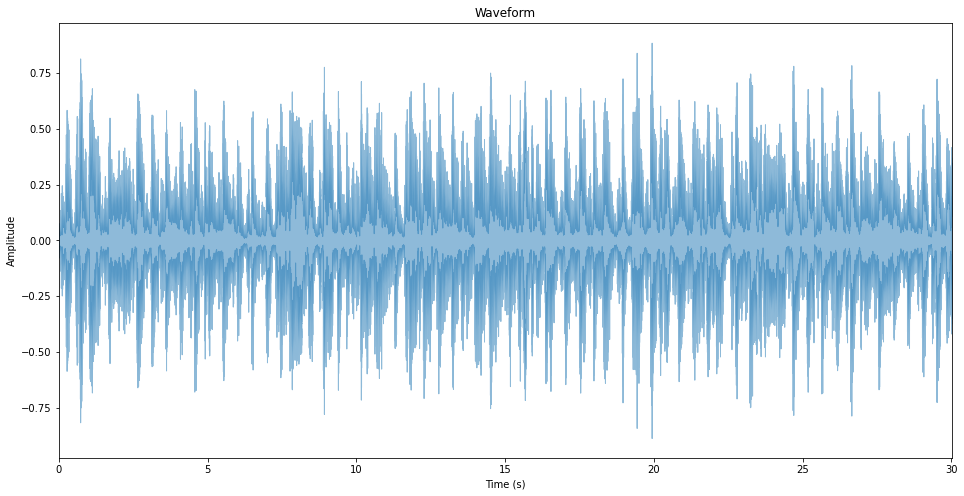

In [ ]:
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [ ]:
#Load data

In [ ]:
metadata=pd.read_csv(file_path + '/features_30_sec.csv')
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
#     print(audio)
#     print(sample_rate)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
from tqdm import tqdm
#Iterate through every audio file and extract features using Mel-Frequency Cepstral Coefficients (MFCC)
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    try:
        class_labels=row["label"]
        file_name = os.path.join(os.path.abspath(file_path+'/genres'), class_labels+'/',str(row["filename"]))    
        data=features_extractor(file_name)
        extracted_features.append([data,class_labels])
        print([data,class_labels])
    except Exception as e:
        print(f"Error: {e}")
        continue

0it [00:00, ?it/s]

[array([-1.1357065e+02,  1.2157179e+02, -1.9168142e+01,  4.2366421e+01,
       -6.3646641e+00,  1.8623499e+01, -1.3704891e+01,  1.5343150e+01,
       -1.2274110e+01,  1.0976572e+01, -8.3265734e+00,  8.8037930e+00,
       -3.6723001e+00,  5.7479949e+00, -5.1628819e+00,  7.5273985e-01,
       -1.6902149e+00, -4.0897894e-01, -2.3035226e+00,  1.2212901e+00,
       -3.5343504e+00, -1.1414334e+00, -4.2830324e+00, -4.2261953e+00,
        9.1561663e-01,  9.1268736e-01, -5.7613473e+00, -3.9327433e+00,
        1.5108240e+00,  2.6988823e+00,  5.6574712e+00, -3.2662375e+00,
       -2.0303418e-01, -3.0002940e+00,  4.4772325e+00, -4.7590593e-01,
        6.0092382e+00, -5.8892559e-02, -3.4585075e+00, -1.8423905e+00],
      dtype=float32), 'blues']


2it [00:01,  1.51it/s]

[array([-2.07501694e+02,  1.23991264e+02,  8.95512676e+00,  3.58776512e+01,
        2.90731955e+00,  2.15104656e+01, -8.56043625e+00,  2.33706856e+01,
       -1.00996609e+01,  1.19004974e+01, -5.55563927e+00,  5.37632751e+00,
       -2.23176026e+00,  4.22014046e+00, -6.01214838e+00,  9.27997470e-01,
       -7.31124759e-01,  2.95073122e-01, -2.83518225e-01,  5.31215608e-01,
       -4.09579563e+00, -1.23911321e+00, -2.84973049e+00, -4.35027933e+00,
        3.27261043e+00,  1.21984029e+00, -1.16229961e-02, -6.80699646e-02,
        3.97746158e+00, -4.55879927e-01,  8.36269319e-01, -3.74130583e+00,
       -4.10121965e+00, -2.45321107e+00,  5.83458614e+00,  3.54492307e+00,
        4.89655304e+00, -4.14923519e-01, -1.99414766e+00, -4.61869210e-01],
      dtype=float32), 'blues']


3it [00:02,  1.23it/s]

[array([-90.722595  , 140.4463    , -29.09389   ,  31.684334  ,
       -13.984504  ,  25.764742  , -13.664875  ,  11.639934  ,
       -11.783642  ,   9.7187605 , -13.133803  ,   5.791199  ,
        -8.907628  ,  -1.0770003 ,  -9.229274  ,   2.4516892 ,
        -7.7290926 ,  -1.816407  ,  -3.4397204 ,  -2.2312589 ,
        -4.0509806 ,  -0.5722491 ,  -2.018496  ,  -5.387675  ,
        -5.1373224 ,  -7.8074117 ,  -1.173293  ,  -0.21124008,
         1.3916391 ,  -3.0024896 ,  -1.370161  ,  -4.7413645 ,
        -0.3755833 ,   0.48872375,   0.44240212,  -4.162791  ,
        -4.8152256 ,  -6.7030134 ,  -4.424409  ,  -0.984266  ],
      dtype=float32), 'blues']


4it [00:03,  1.23it/s]

[array([-1.9954420e+02,  1.5009091e+02,  5.6626782e+00,  2.6859079e+01,
        1.7713993e+00,  1.4234031e+01, -4.8320065e+00,  9.2864952e+00,
       -7.5918651e-01,  8.1376066e+00, -3.2006531e+00,  6.0793190e+00,
       -2.4801738e+00, -1.0793047e+00, -2.8707886e+00,  7.8087342e-01,
       -3.3195965e+00,  6.3696527e-01, -6.1912119e-01, -3.4074485e+00,
       -1.4970697e+00, -5.2235756e-02, -1.8603777e+00, -4.7084198e+00,
       -3.9223969e+00, -6.6467791e+00, -2.8964515e+00, -3.2252204e+00,
       -2.6941061e-01, -3.8179739e+00, -2.8214357e+00, -4.2062025e+00,
       -2.6985621e+00, -3.8442168e+00, -2.5233011e+00, -4.9369516e+00,
       -5.9572277e+00, -6.6164398e+00, -6.3938894e+00, -1.4933108e+00],
      dtype=float32), 'blues']


5it [00:03,  1.22it/s]

[array([-160.3377    ,  126.219635  ,  -35.58781   ,   22.148071  ,
        -32.478603  ,   10.852294  ,  -23.352331  ,    0.49843347,
        -11.793437  ,    1.207255  ,  -13.088418  ,   -2.813867  ,
         -6.9333854 ,   -7.5527253 ,   -9.164666  ,   -4.5205755 ,
         -5.454034  ,   -0.91687363,   -4.404826  ,  -11.703234  ,
         -5.8642216 ,   -0.7217301 ,    0.9566587 ,   -1.2203951 ,
          4.5827346 ,    0.3044132 ,   -1.2786332 ,   -4.4877853 ,
         -0.4135779 ,    0.28119835,    8.484922  ,    3.649189  ,
         -3.0081556 ,   -6.113422  ,   -6.9540753 ,   -4.0677557 ,
         -1.1352577 ,   -0.49206373,   -4.787804  ,   -3.220562  ],
      dtype=float32), 'blues']


6it [00:04,  1.21it/s]

[array([-177.77425   ,  118.20548   ,  -17.56588   ,   30.762402  ,
        -21.747839  ,   11.920993  ,  -20.730993  ,    3.1865778 ,
         -8.586039  ,   -0.93285215,  -11.772434  ,   -2.4058323 ,
         -9.343665  ,   -9.93621   ,   -3.9039948 ,   -5.57659   ,
         -1.8382629 ,   -2.7837994 ,   -3.047909  ,   -8.109991  ,
         -2.465662  ,   -1.7036507 ,   -4.2729554 ,   -4.636161  ,
         -2.3236728 ,    0.9319669 ,    4.3806806 ,    5.1951404 ,
          5.693446  ,    2.5333834 ,    2.6176963 ,   -4.353386  ,
         -6.8071375 ,   -2.9147482 ,   -1.0599779 ,    1.9064912 ,
          1.0119578 ,   -3.1175177 ,   -5.301414  ,   -5.257538  ],
      dtype=float32), 'blues']


7it [00:06,  1.01it/s]

[array([-1.9005237e+02,  1.3028908e+02, -3.6369534e+01,  3.3029034e+01,
        1.1108783e+01, -6.0558373e-01, -2.0871855e+01,  2.7302471e-01,
       -6.4861403e+00, -5.5167675e+00, -7.8397517e+00, -3.1285918e+00,
       -6.5961971e+00, -9.9503784e+00, -6.5351772e+00, -1.0068051e+01,
       -1.0913176e+01, -6.9713359e+00, -3.4365046e+00, -6.4834657e+00,
       -7.1047974e+00, -7.1287365e+00, -5.2754745e+00, -4.5933504e+00,
       -3.2495267e+00, -2.9047568e+00,  1.4271905e+00,  2.9252844e+00,
        2.1189985e+00, -1.4824533e+00, -6.3052964e-01,  2.9668508e+00,
        2.6102350e+00,  1.7943573e+00, -1.9848074e+00, -5.1649461e+00,
       -2.3721545e+00,  1.4012761e-01,  3.7050166e+00,  5.2630396e+00],
      dtype=float32), 'blues']


8it [00:07,  1.06it/s]

[array([-1.7934714e+02,  1.3646901e+02, -2.6673138e+01,  3.9984249e+01,
        5.3044162e+00,  1.0928612e+01, -2.0564827e+01,  8.5111570e+00,
       -1.1357249e+01, -3.4683466e+00, -8.4199371e+00, -6.9497151e+00,
       -3.5391388e+00, -8.0416174e+00, -8.9606752e+00, -8.4260836e+00,
       -1.0568936e+01, -1.0784514e+01, -4.6906776e+00, -8.6307220e+00,
       -1.1013797e+01, -1.0376945e+01, -1.8438765e+00, -1.4459867e+00,
       -3.1266701e+00, -1.1854743e+00, -3.6148348e+00, -3.2507496e+00,
       -6.3321155e-01,  8.9516181e-01,  4.0213332e+00,  2.7058246e+00,
       -1.6618651e-01, -2.5322361e+00, -3.4610734e+00, -2.8821368e+00,
        7.3907393e-01, -1.9437397e+00, -4.8700829e+00, -3.2314491e+00],
      dtype=float32), 'blues']


9it [00:07,  1.12it/s]

[array([-121.363945  ,  122.50667   ,  -14.738195  ,   46.131065  ,
         -8.181879  ,   20.182962  ,  -19.173378  ,   23.039139  ,
        -11.838223  ,   21.16      ,   -6.718366  ,    6.9925423 ,
        -12.730596  ,    5.0613246 ,   -5.183214  ,   -1.4525597 ,
         -7.0418243 ,    2.6952481 ,    3.4123054 ,   -2.7156928 ,
         -4.2726674 ,   -0.62447643,   -4.2901144 ,  -13.372914  ,
         -8.269034  ,   -2.099667  ,   10.554864  ,    2.9243531 ,
         -1.0369885 ,   -0.7559747 ,   -0.5047297 ,   -1.4073936 ,
         -1.8838404 ,   -1.8144683 ,    2.364486  ,   -4.303112  ,
         -3.883335  ,   -5.0931625 ,    0.511093  ,    1.1874621 ],
      dtype=float32), 'blues']


10it [00:08,  1.06it/s]

[array([-2.1323999e+02,  1.1516560e+02, -1.1693431e+01,  3.9014275e+01,
       -2.0341278e+01,  1.3077605e+01, -9.1735191e+00,  9.0114470e+00,
       -1.4100634e+01,  4.2659411e+00, -6.0461674e+00,  3.7822070e+00,
        2.2179934e-01, -5.1093993e+00, -4.1023037e-01, -1.1799209e+00,
       -1.9168046e+00, -2.2926607e+00,  2.8819671e+00, -4.2352037e+00,
        1.5931658e+00,  2.4699435e+00, -8.9720756e-01,  1.8631402e+00,
        5.0338187e+00,  7.6986718e-01,  5.6372914e+00,  4.4305289e-01,
       -9.0433466e-01, -2.2045176e+00, -1.8930662e+00, -3.4595373e+00,
       -9.7002214e-01,  1.5499120e+00,  3.1887579e+00,  4.5500097e+00,
        1.9009490e+00, -6.8595338e-01, -2.7420201e+00, -5.7768196e-02],
      dtype=float32), 'blues']


11it [00:09,  1.02it/s]

[array([-1.7379250e+02,  1.3718671e+02, -2.3724047e+01,  2.6978430e+01,
       -1.6657692e+01,  4.1808796e+00, -1.2559928e+01,  5.8321824e+00,
       -2.8743179e+00, -1.1974204e+00, -1.9548342e+00,  1.8015001e+00,
       -2.9896472e+00, -1.8666563e+00, -7.9274273e-01, -3.0159667e+00,
       -4.4005361e-01, -1.9945511e+00, -7.4847013e-01, -4.9913139e+00,
       -1.8136595e+00,  8.1929034e-01,  2.5037024e+00, -1.6443889e+00,
       -3.3393703e+00, -1.4141123e-01,  4.4894781e+00,  8.8552561e+00,
        9.3239098e+00,  1.2914513e+00, -1.8151451e+00, -6.4791598e+00,
       -3.8782952e+00,  1.8042898e+00, -3.1973109e+00, -5.8477077e+00,
       -6.7168422e+00, -1.4377153e+00,  3.2779963e+00,  1.2284577e+00],
      dtype=float32), 'blues']


12it [00:10,  1.02it/s]

[array([-287.92374   ,  124.01875   ,    5.4698925 ,   33.65741   ,
          1.0954974 ,   14.705335  ,   -4.8770084 ,    8.670525  ,
          0.7854052 ,    6.579527  ,   -4.874974  ,   -3.1782238 ,
         -5.5361576 ,   -6.7844357 ,   -2.6481562 ,   -2.9945593 ,
         -3.3868182 ,   -1.8526473 ,    1.8399631 ,   -4.8908033 ,
         -5.5281525 ,   -3.605406  ,   -2.0592928 ,   -6.5065527 ,
         -6.86502   ,   -2.7807496 ,    1.6434312 ,   -1.8775437 ,
         -4.67544   ,   -3.3327744 ,   -2.2499895 ,   -1.9189669 ,
         -1.8698107 ,   -1.3514427 ,   -2.9227092 ,   -2.6834028 ,
         -1.2941717 ,   -1.4060979 ,   -1.289762  ,    0.81432503],
      dtype=float32), 'blues']


13it [00:12,  1.02s/it]

[array([-2.07223312e+02,  1.32830551e+02, -1.54288435e+01,  6.09709320e+01,
        7.29872167e-01,  1.24376469e+01,  1.18279946e+00, -1.54662323e+00,
       -1.78794346e+01,  8.35272884e+00, -2.45816088e+00, -6.03384793e-01,
        3.85960847e-01,  2.59954643e+00, -5.17926693e+00, -9.52347946e+00,
       -9.24283504e+00, -2.85502768e+00, -1.42716193e+00, -5.93197823e+00,
        7.76808119e+00,  4.09435320e+00,  4.06212282e+00,  3.65478015e+00,
        6.00881624e+00,  4.26997423e-01,  2.04441404e+00,  1.42176819e+00,
        6.49934196e+00,  9.65503407e+00,  6.68256950e+00,  1.88668936e-01,
       -2.35578084e+00, -1.06479049e+00, -2.56694287e-01,  4.12803221e+00,
        7.89323151e-01,  5.34309208e-01,  9.43140984e-01,  3.30255246e+00],
      dtype=float32), 'blues']


14it [00:13,  1.02s/it]

[array([-2.0982616e+02,  1.2446322e+02,  1.0342454e+01,  4.7010914e+01,
        6.5081253e+00,  1.5410518e+01, -2.0051074e+00,  6.7065659e+00,
       -2.1557632e+01,  1.0718407e+01, -5.5236883e+00, -2.1998053e+00,
       -3.0348644e+00,  8.6445370e+00, -3.0372086e-01, -6.3794857e-01,
       -2.9384267e+00, -1.7045164e+00, -1.7681890e+00, -7.7621808e+00,
        3.4260879e+00,  3.5877056e+00,  2.8076086e+00, -6.3525087e-01,
        3.5658631e+00, -5.5298767e+00,  7.4642128e-01,  5.1622491e+00,
        8.5283375e+00,  5.9573936e+00,  7.4411950e+00,  1.6483715e+00,
       -5.4105318e-01,  2.1706488e+00,  3.7483141e+00,  2.5625677e+00,
        3.8547242e-01, -9.5554098e-02, -1.5327759e+00,  1.3126879e+00],
      dtype=float32), 'blues']


15it [00:13,  1.04it/s]

[array([-3.0565472e+02,  1.1308634e+02,  1.2114428e+01,  4.5033710e+01,
        1.7762825e+01,  1.4573329e+01,  4.1594296e+00,  2.1354468e-01,
       -7.0269947e+00,  1.3641991e+01,  8.9291744e+00,  1.3030064e+00,
        5.9612513e+00,  8.5492229e+00,  1.1246064e+00,  6.0269326e-01,
        5.4862957e-02, -3.7222650e+00, -9.9496955e-01, -1.8002892e+00,
        4.9605427e+00,  4.3417487e+00,  3.4141109e+00,  1.2726028e+00,
        2.8678496e+00,  2.2244740e+00,  3.4629087e+00,  6.0233331e+00,
        7.7591314e+00,  9.7972422e+00,  8.9557867e+00,  3.7969275e+00,
       -1.9296474e+00, -6.8630350e-01,  1.9487042e+00,  2.8455567e+00,
       -5.6412168e-02, -7.9005617e-01, -2.3230612e+00,  1.6240187e+00],
      dtype=float32), 'blues']


16it [00:14,  1.00s/it]

[array([-2.38515533e+02,  1.20110176e+02, -4.22935867e+00,  4.22906990e+01,
        5.92856312e+00,  1.39172678e+01,  5.35786772e+00,  1.89555728e+00,
       -1.69366779e+01,  1.23506212e+01,  3.94598007e+00, -1.39358473e+00,
        1.92852449e-02,  3.58839655e+00, -4.50091028e+00, -5.54055786e+00,
       -6.88746929e+00, -4.82325125e+00,  1.74736679e+00, -1.88219690e+00,
        6.88839531e+00,  5.30332136e+00,  5.53447819e+00,  5.38600624e-01,
        1.84092355e+00, -8.87517259e-02,  4.23254728e+00,  4.34822798e+00,
        5.97133112e+00,  6.78532982e+00,  4.52164125e+00,  1.38909113e+00,
       -5.09517528e-02, -6.14423096e-01, -2.34152913e+00,  1.89844298e+00,
       -5.73880553e-01, -1.72114086e+00, -1.41681194e+00,  2.16331005e+00],
      dtype=float32), 'blues']


17it [00:16,  1.06s/it]

[array([-2.3375909e+02,  1.2067514e+02, -3.1748059e+00,  3.9518482e+01,
        3.8183367e+00,  1.8837143e+01, -3.6778173e+00,  4.4331384e+00,
       -1.4965527e+01,  1.7578217e+01,  1.8418720e+00,  2.5494220e+00,
       -1.2331676e+00,  8.4394855e+00, -2.0189792e-01, -3.8945017e+00,
       -4.4568501e+00,  9.5541263e-03,  1.2930309e+00, -2.0980818e+00,
        6.7946162e+00,  5.8709365e-01,  1.6409920e+00, -7.3261356e-01,
        3.0721371e+00, -1.9971942e+00,  3.6417692e+00,  3.6163175e+00,
        3.6264343e+00,  6.7278779e-01,  5.3909564e+00,  8.2860937e+00,
        8.5683651e+00,  5.5512457e+00,  6.4954543e-01, -2.0132771e+00,
       -7.9255319e-01,  3.9959035e+00,  4.9677417e-01, -8.9782053e-01],
      dtype=float32), 'blues']


18it [00:17,  1.07s/it]

[array([-2.45699371e+02,  1.40491089e+02, -2.78975415e+00,  6.04314346e+01,
        1.89190521e+01,  9.82960892e+00,  3.55914593e+00,  5.15371621e-01,
       -1.63876820e+01,  6.62750912e+00,  7.25921440e+00, -4.01442719e+00,
        1.60212100e+00,  5.89500952e+00, -3.02146959e+00, -4.77366877e+00,
       -3.03098917e+00, -1.99408782e+00, -4.67536151e-02, -3.97122836e+00,
       -3.98852229e-01,  1.97763062e+00,  4.74038571e-01, -1.81608653e+00,
        2.80046296e+00,  6.28573298e-01,  1.41031325e+00,  4.82725859e+00,
        3.62905955e+00,  2.67615581e+00,  4.79399347e+00,  6.65367699e+00,
        7.74262047e+00,  6.78624535e+00,  3.39807510e-01, -1.79703438e+00,
        1.33334771e-01,  2.41151619e+00,  2.55514622e+00,  1.06290385e-01],
      dtype=float32), 'blues']


19it [00:18,  1.10s/it]

[array([-2.5249301e+02,  1.0493711e+02,  1.5332313e+01,  4.2666969e+01,
        6.7830582e+00,  2.1605682e+01, -1.2978410e+00,  5.6754079e+00,
       -1.6632635e+01,  1.2173101e+01, -1.9472849e+00,  1.9508444e+00,
       -8.9031911e-01,  7.7705235e+00,  2.3802431e+00,  1.7754054e+00,
        1.3253622e+00,  3.6095116e+00,  4.9076910e+00, -2.6554596e+00,
        4.1012783e+00,  2.2103174e+00,  2.5480444e+00, -1.6280845e+00,
        2.8751330e+00, -3.0612421e+00,  2.4248847e-01,  5.6098515e-01,
        4.8059945e+00,  3.6606224e+00,  3.5414381e+00,  7.4331218e-01,
        1.6083263e+00,  3.3471856e+00,  2.3891969e+00,  3.2222946e+00,
        6.1803121e-02, -1.4265122e+00, -5.6409013e-01,  2.4648631e+00],
      dtype=float32), 'blues']


20it [00:19,  1.07s/it]

[array([-2.36656754e+02,  1.38409256e+02, -4.91291046e+00,  4.76291771e+01,
        5.18420076e+00,  8.87661457e+00,  5.13814926e-01, -3.80467391e+00,
       -1.49888706e+01,  1.04170685e+01, -3.33637953e-01,  7.75984764e-01,
        1.77731848e+00,  4.23298740e+00, -4.67841566e-01, -6.10521460e+00,
       -5.39051914e+00, -1.34121311e+00, -3.72301888e+00, -4.36477757e+00,
        4.54402971e+00,  7.05881938e-02,  5.43611717e+00,  3.70618200e+00,
        1.95932722e+00,  3.45638454e-01,  4.96582365e+00,  2.37496042e+00,
        4.35049921e-01,  1.82190728e+00,  5.91640139e+00,  1.08367910e+01,
        8.70119476e+00,  5.56098175e+00,  2.37146902e+00, -4.21663612e-01,
       -2.16183019e+00,  1.49657142e+00, -9.58452761e-01, -1.88438153e+00],
      dtype=float32), 'blues']


21it [00:20,  1.04s/it]

[array([-2.3035765e+02,  1.2707833e+02,  7.1234465e+00,  3.9774899e+01,
        1.9210494e+00,  1.7411779e+01, -5.6194148e+00,  8.2493944e+00,
       -1.8116888e+01,  1.3835064e+01, -3.7699320e+00,  2.5720189e+00,
       -4.3183455e+00,  6.8063755e+00, -6.1671023e+00, -6.1987495e+00,
       -4.5001836e+00, -1.8223381e+00, -5.1710010e-01,  1.5099174e+00,
        9.0000391e+00,  4.4225059e+00,  6.2146850e+00, -1.6331213e+00,
       -3.9735538e-01, -3.0077531e+00,  1.5851177e+00,  1.6708866e-01,
        4.9918470e+00,  5.6192160e-01,  1.4659952e+00,  3.0875192e+00,
        6.6835356e+00,  6.4851732e+00,  4.5197039e+00, -7.8888381e-01,
       -2.2728353e+00, -4.2153957e-01, -2.6123817e+00, -8.5500991e-01],
      dtype=float32), 'blues']


22it [00:21,  1.02it/s]

[array([-2.6472256e+02,  1.3886844e+02,  1.1194063e+01,  4.8504261e+01,
        1.4930757e+01,  2.0580284e+01,  3.2070086e+00,  1.2489558e+00,
       -1.5846457e+01,  1.5978459e+01,  3.3691330e+00, -1.5108064e+00,
        1.9059253e+00,  6.3283801e+00, -9.9339169e-01, -2.4194524e+00,
       -3.6802151e+00,  4.9150068e-01,  5.0414538e+00, -7.7684981e-01,
        5.0245137e+00, -1.4002956e-01, -1.5777619e+00, -1.0408795e+00,
        3.0555956e+00, -1.9839041e+00,  2.4286387e+00,  2.3256025e+00,
        1.0080207e-01,  2.0204912e-01,  1.6859071e+00,  1.7373956e+00,
        1.0078113e+00,  6.3149929e-01,  1.9171027e+00,  2.6800344e+00,
       -4.5819592e-01,  3.3324656e+00,  3.3957806e+00,  1.1255281e+00],
      dtype=float32), 'blues']


23it [00:22,  1.02it/s]

[array([-2.3395625e+02,  1.3614571e+02,  3.3244109e+00,  4.8928532e+01,
        8.7154436e+00,  1.3966022e+01,  5.3665967e+00,  3.9953962e-01,
       -1.3469852e+01,  1.6877718e+01,  5.1480913e+00, -2.2498209e+00,
        3.9479077e+00,  5.3164883e+00,  8.1055897e-01, -1.1070811e+00,
       -4.5564799e+00, -2.4307845e+00,  3.3248355e+00, -6.0244739e-01,
        7.0795269e+00,  3.0555873e+00,  5.7480049e-01,  6.0772502e-01,
        2.7884116e+00, -1.4407849e+00,  2.0447803e+00,  5.6002140e+00,
        2.9287560e+00,  2.1099510e+00,  2.5311520e+00, -4.5024639e-01,
       -2.2335346e+00,  1.1352563e-01, -4.6509913e-01, -1.3963138e-01,
       -2.9951474e-01,  5.0505857e+00,  5.3180881e+00,  1.6433839e+00],
      dtype=float32), 'blues']


24it [00:23,  1.02s/it]

[array([-2.2722534e+02,  1.3778807e+02, -1.4499568e+01,  6.3560928e+01,
        5.6176682e+00,  1.1958149e+01,  1.9079686e+00, -1.8893869e+00,
       -7.6042166e+00, -2.4732885e+00, -2.8910103e+00, -9.4333925e+00,
       -1.0929217e+01,  3.5694757e+00,  4.1498008e+00,  8.8809080e-02,
       -2.9859648e+00, -1.3861687e+00,  7.5413780e+00, -3.0357230e+00,
       -5.8653193e+00, -3.2500937e+00,  8.4367710e-01,  3.7335305e+00,
        3.7076159e+00,  1.7598604e+00, -1.9653127e-01, -4.3061481e+00,
        2.8554162e-01,  1.4625518e+00,  3.9146955e+00,  7.1973548e+00,
        4.6471529e+00, -2.0960657e-01, -7.1945620e+00, -7.1143160e+00,
       -2.1526811e+00,  7.3055190e-01, -2.2955039e+00, -3.8639178e+00],
      dtype=float32), 'blues']


25it [00:24,  1.02s/it]

[array([-2.74365814e+02,  1.30411255e+02, -6.35128593e+00,  7.04029922e+01,
        1.32697277e+01,  9.47377586e+00,  7.73532963e+00, -1.23496640e+00,
       -5.72389960e-01, -2.30335474e+00,  3.77351594e+00,  7.56124556e-02,
       -9.38971639e-01,  2.29622555e+00,  4.29411745e+00, -1.66121435e+00,
       -1.04394245e+01, -6.79310322e+00, -1.06577778e+00, -1.58388686e+00,
       -1.17548823e+00, -1.26530862e+00,  2.48722863e+00,  3.05154777e+00,
        1.34643185e+00,  1.88680315e+00, -6.07644677e-01, -1.58645105e+00,
        5.50718117e+00,  8.93865871e+00,  7.52621078e+00,  5.85081005e+00,
        2.16407371e+00, -3.35215688e+00, -7.33001757e+00, -4.63797855e+00,
       -1.12173760e+00, -9.44868803e-01, -4.85678005e+00, -5.74108124e+00],
      dtype=float32), 'blues']


26it [00:25,  1.03s/it]

[array([-2.4928456e+02,  1.3100468e+02,  6.7143518e-01,  6.6703941e+01,
        1.7914803e+01,  4.6216865e+00,  6.6131053e+00,  1.2425213e+00,
        1.4125673e+00, -1.5898086e+00, -9.8192149e-01, -3.5757904e+00,
       -2.9269555e+00,  4.6006751e+00,  7.4806061e+00, -1.8753190e-01,
       -2.8234689e+00, -2.6753805e+00,  7.4061370e-01, -5.3098303e-01,
       -3.0192397e+00,  9.6256036e-01,  1.4375728e+00,  1.6047270e+00,
        2.9458194e+00,  1.3414502e+00, -2.5162700e-01,  1.2966304e-01,
        4.1791835e+00,  6.5274343e+00,  2.5534282e+00, -1.4898288e+00,
       -1.5851443e+00, -4.0815935e+00, -5.6703644e+00, -2.2952890e+00,
       -6.8428689e-01, -1.5153507e+00, -4.7824507e+00, -1.8148440e+00],
      dtype=float32), 'blues']


27it [00:26,  1.01s/it]

[array([-2.8484839e+02,  1.0874955e+02,  9.1296825e+00,  5.1251316e+01,
        1.8123716e+01,  7.6327777e+00,  8.7753744e+00,  2.3653817e+00,
        1.9260958e-02,  2.2369275e+00,  4.1906290e+00, -3.3045809e+00,
        1.6140482e+00,  2.6918643e+00,  3.3761284e+00,  3.2927859e+00,
       -4.5244832e+00,  4.9672052e-01,  5.9219751e+00,  3.2145398e+00,
        1.8808361e+00,  1.3706437e+00,  2.4260037e+00,  6.5658909e-01,
       -1.7998978e+00, -1.4171937e+00, -1.3226286e+00, -1.8684524e+00,
       -2.5344679e+00, -2.2605941e+00, -1.1940320e+00,  4.6545386e-01,
        1.5931068e-01, -3.2951372e+00, -4.2269416e+00, -2.2466936e+00,
        1.0756390e+00,  1.6730641e-01, -4.9201412e+00, -2.5045116e+00],
      dtype=float32), 'blues']


28it [00:27,  1.01it/s]

[array([-2.2816710e+02,  1.3033966e+02, -2.3310709e+01,  7.0200218e+01,
        1.1293262e+00,  7.5891142e+00,  9.0339583e-01,  1.9944433e+00,
       -6.1588445e+00, -9.3807173e+00, -2.5635748e+00, -4.5218477e+00,
       -2.6998639e-01,  1.7045113e-01, -1.5287304e+00,  1.4676870e+00,
       -6.9808435e+00, -8.3244858e+00,  4.2408886e+00,  9.9173743e-01,
        2.6256442e+00,  1.5590283e+00,  1.1548826e-01, -2.6870136e+00,
       -2.3504996e+00, -3.0284086e-01, -1.4708824e+00, -2.6281369e-01,
       -1.4988989e-01, -3.9441161e+00, -3.1003458e+00, -4.2622519e+00,
       -6.7172289e+00, -5.1744337e+00, -7.4866810e+00, -6.5614486e+00,
       -5.5010366e+00, -4.5501866e+00, -3.5536392e+00,  2.6797173e+00],
      dtype=float32), 'blues']


29it [00:28,  1.05s/it]

[array([-2.4896225e+02,  1.3903177e+02, -1.6240025e+01,  5.7116196e+01,
        2.0192362e+01,  1.0160373e+01,  4.5760756e+00,  3.3792436e-01,
       -7.8628249e+00, -3.4702461e+00, -2.6488249e+00, -2.8426704e+00,
       -8.9477479e-01, -2.4133797e+00,  2.5705974e+00, -5.8710008e+00,
       -1.2412888e+01, -7.3020020e+00, -9.2358530e-01, -2.6985795e+00,
       -3.0210736e+00, -2.4184446e+00, -8.1289786e-01,  1.1930338e+00,
        7.3030573e-01, -5.7243782e-01, -3.1689947e+00, -2.4015038e+00,
        2.0953262e+00,  4.7718687e+00,  7.2283154e+00,  5.9407206e+00,
        5.5198050e-01, -4.4920921e+00, -6.7390571e+00, -3.3138618e+00,
       -2.1691540e-01, -7.7103478e-01, -4.7385554e+00, -4.4306545e+00],
      dtype=float32), 'blues']


30it [00:29,  1.06s/it]

[array([-233.7151   ,  101.19902  ,   17.6509   ,   23.740637 ,
          2.0798852,   25.938902 ,  -16.969044 ,   15.079569 ,
        -22.277378 ,    4.3853855,  -23.19758  ,   -6.0366454,
         -5.0570984,    1.0690374,   -5.7785144,   -8.310135 ,
        -11.384392 ,   -6.7234993,  -10.013582 ,  -14.02613  ,
        -13.942523 ,  -12.277751 ,  -15.626785 ,  -17.248375 ,
         -7.6384363,  -11.212484 ,   -7.3381066,  -12.705812 ,
         -6.598111 ,   -7.4222684,   -6.4979205,   -3.3915102,
         -1.7098559,   -6.9435663,   -3.5856748,   -3.7500205,
         -6.6092362,   -0.3580895,   -1.0118594,   -4.3408   ],
      dtype=float32), 'blues']


31it [00:30,  1.10s/it]

[array([-206.93811   ,  117.79184   ,   23.264992  ,   28.300047  ,
         -1.1022832 ,   18.867184  ,  -21.971611  ,   17.848024  ,
        -25.590239  ,    2.1351042 ,  -17.777296  ,   -8.0105915 ,
        -17.620142  ,   -8.120075  ,   -8.628885  ,  -15.540495  ,
        -15.332041  ,   -9.656509  ,  -10.089768  ,  -17.82688   ,
         -6.5217185 ,   -6.5632505 ,  -12.746626  ,  -12.196257  ,
         -9.006934  ,  -12.410428  ,   -5.7758307 ,  -11.532708  ,
         -6.6002574 ,   -7.0867004 ,  -11.971159  ,  -12.420842  ,
        -10.968392  ,  -10.987482  ,   -8.694291  ,   -3.1636317 ,
         -3.4813743 ,   -4.73417   ,   -0.53882164,    1.4660628 ],
      dtype=float32), 'blues']


32it [00:31,  1.11s/it]

[array([-221.84349   ,  110.852425  ,   18.63755   ,   30.92843   ,
          3.2962282 ,   22.589956  ,  -20.406555  ,   12.122969  ,
        -26.330458  ,   -4.354131  ,  -26.383854  ,  -13.032196  ,
        -12.655037  ,   -1.8158433 ,   -7.2590013 ,   -6.6609855 ,
        -14.688092  ,  -11.713449  ,  -11.024652  ,  -13.389859  ,
        -15.687353  ,  -15.297077  ,  -13.744896  ,  -16.1583    ,
         -5.241371  ,  -11.314184  ,   -9.463752  ,  -14.03728   ,
         -6.3209925 ,   -2.1984239 ,    1.1610914 ,    0.34592178,
         -4.7406607 ,   -4.6595664 ,   -2.2146785 ,   -5.0331693 ,
         -7.113197  ,   -2.4235377 ,   -5.589431  ,   -9.19005   ],
      dtype=float32), 'blues']


33it [00:32,  1.11s/it]

[array([-288.7151    ,  105.926346  ,   18.81995   ,   23.674461  ,
          5.700168  ,   25.559086  ,  -13.450494  ,   12.429512  ,
        -11.961186  ,    1.5895078 ,  -15.62307   ,   -6.638756  ,
        -11.685788  ,   -2.935766  ,   -7.378426  ,  -15.693846  ,
        -10.9572935 ,  -10.879779  ,  -18.501955  ,  -19.117844  ,
         -8.739581  ,  -10.32939   ,  -15.000546  ,  -17.334787  ,
        -11.2772455 ,   -6.727226  ,   -3.6883905 ,   -5.663416  ,
         -4.6059856 ,   -8.288458  ,   -6.5997734 ,   -9.463993  ,
         -9.745772  ,  -10.616712  ,   -8.312833  ,   -3.0589383 ,
          0.80336577,   -1.6759797 ,   -3.3686717 ,   -3.9771116 ],
      dtype=float32), 'blues']


34it [00:33,  1.03s/it]

[array([-238.9512   ,  108.70544  ,   34.145847 ,   30.21115  ,
         -0.5025822,   27.292957 ,  -21.399483 ,   14.171863 ,
        -24.51231  ,   -1.8842657,  -28.0575   ,  -11.255747 ,
        -16.464361 ,   -7.640693 ,  -12.784872 ,  -15.3524685,
        -13.7459   ,   -7.4084854,  -10.078316 ,  -13.2909355,
         -8.908535 ,  -11.162222 ,  -14.163763 ,  -15.467539 ,
         -8.648906 ,   -8.816934 ,   -1.4052635,   -9.855535 ,
         -6.2606177,   -8.968915 ,   -8.779425 ,   -8.088298 ,
         -6.115186 ,   -7.821425 ,   -7.543896 ,   -8.014962 ,
         -5.8996873,   -1.0554755,    2.2259994,    3.7194085],
      dtype=float32), 'blues']


35it [00:34,  1.03s/it]

[array([-217.15489  ,  105.78446  ,   15.606509 ,   25.259819 ,
         -1.4457654,   30.199512 ,  -17.717384 ,   17.318798 ,
        -27.218798 ,    4.3366585,  -20.061998 ,  -10.700786 ,
        -14.232641 ,   -5.156592 ,   -3.4814634,   -6.1893525,
        -15.322095 ,   -6.8323135,   -9.825188 ,  -13.940664 ,
        -13.6905   ,  -15.1302185,  -11.586877 ,  -13.272661 ,
         -4.784347 ,   -6.963738 ,   -5.5667167,  -13.961292 ,
        -11.704015 ,   -6.3972774,   -5.9955783,   -5.1998715,
         -3.7462516,   -6.617163 ,   -2.292391 ,   -3.0250082,
         -6.7122426,   -3.8038983,   -0.4946419,   -4.5861173],
      dtype=float32), 'blues']


36it [00:36,  1.13s/it]

[array([-1.7177327e+02,  1.2029358e+02,  1.5340433e+01,  2.1107595e+01,
       -5.3850079e+00,  2.4195364e+01, -2.4137547e+01,  1.8544752e+01,
       -2.2348501e+01,  1.3194951e+00, -2.0763226e+01, -4.9818878e+00,
       -1.7108088e+01, -7.8793058e+00, -1.5300168e+01, -9.3436804e+00,
       -8.9115915e+00, -8.5120115e+00, -1.4329959e+01, -1.9929636e+01,
       -1.4492692e+01, -4.4271321e+00, -6.3315105e+00, -1.3971746e+01,
       -1.5095488e+01, -1.8507765e+01, -9.7579050e+00, -7.2231760e+00,
        2.7544273e-02,  4.3914061e+00, -7.3592234e-01, -7.5985966e+00,
       -6.3927956e+00, -6.6397672e+00, -7.5403872e+00, -7.3335962e+00,
       -5.2472563e+00, -6.4855108e+00, -6.3412423e+00, -8.9977627e+00],
      dtype=float32), 'blues']


37it [00:37,  1.09s/it]

[array([-2.00199295e+02,  1.16363083e+02,  1.80473709e+01,  2.52635746e+01,
        3.10054451e-01,  2.41772518e+01, -2.22235146e+01,  1.11835337e+01,
       -2.68462639e+01, -7.63738060e+00, -2.48560963e+01, -1.20122681e+01,
       -1.70159760e+01, -8.11306953e+00, -1.19537678e+01, -1.26218128e+01,
       -1.41932020e+01, -8.20775890e+00, -1.50150061e+01, -1.03068495e+01,
       -1.04074612e+01, -1.28484268e+01, -1.18259954e+01, -1.75944595e+01,
       -9.03292656e+00, -8.07093430e+00, -2.97961444e-01, -6.72805357e+00,
       -3.24916840e+00, -4.52052879e+00, -3.51435232e+00, -7.06671429e+00,
       -2.24790215e+00, -8.15232182e+00, -1.13226290e+01, -6.84679365e+00,
       -6.48235369e+00, -1.59837008e-01,  6.32257891e+00,  2.98081827e+00],
      dtype=float32), 'blues']


38it [00:38,  1.06s/it]

[array([-3.28560699e+02,  1.02728516e+02,  1.98365841e+01,  2.67060127e+01,
        7.14540911e+00,  2.27279816e+01, -6.95172691e+00,  1.28169832e+01,
       -1.07279129e+01, -4.24694121e-01, -1.23787956e+01, -8.89833641e+00,
       -9.20845699e+00, -9.08953285e+00, -8.99487400e+00, -7.65788364e+00,
       -7.21129227e+00, -9.39714622e+00, -4.47566938e+00, -3.67943525e+00,
       -1.06097364e+00, -2.60653210e+00, -1.15397205e+01, -1.90342541e+01,
       -1.37037430e+01, -4.63402367e+00, -2.00047851e-01, -7.18766260e+00,
       -8.89836121e+00, -1.12316313e+01, -7.78849888e+00, -2.96247435e+00,
       -6.14504099e+00, -1.12810860e+01, -1.12499857e+01, -8.96549606e+00,
       -8.10247040e+00, -3.83098531e+00,  7.52874231e+00,  1.09625454e+01],
      dtype=float32), 'blues']


39it [00:39,  1.14s/it]

[array([-192.65746   ,  111.15712   ,   21.361006  ,   26.399405  ,
         -0.64434767,   23.491514  ,  -25.469894  ,   16.923105  ,
        -16.97565   ,    5.7756433 ,  -25.738422  ,   -5.051984  ,
        -17.62749   ,   -7.916775  ,  -15.155122  ,  -12.356138  ,
        -17.234728  ,   -7.7786775 ,  -13.030936  ,  -17.93117   ,
         -8.503987  ,   -4.938128  ,  -11.497551  ,  -10.165958  ,
         -8.144572  ,  -17.351372  ,   -5.1209536 ,   -9.573272  ,
          1.0116816 ,    5.3726172 ,    3.40246   ,   -2.8671877 ,
         -3.4095302 ,   -6.1914597 ,   -3.8067796 ,   -4.612408  ,
         -5.0289087 ,   -6.756326  ,   -6.643218  ,  -10.260662  ],
      dtype=float32), 'blues']


40it [00:40,  1.06s/it]

[array([-3.01730499e+02,  1.11542877e+02,  2.19002285e+01,  1.61511211e+01,
        8.20067310e+00,  2.20843735e+01, -8.59767246e+00,  1.48877478e+00,
       -1.70714016e+01, -8.33458519e+00, -1.70083599e+01, -1.05737705e+01,
       -1.56795759e+01, -1.25944891e+01, -1.22565689e+01, -1.45603170e+01,
       -1.01002359e+01, -5.78584719e+00, -7.76840305e+00, -7.18064356e+00,
       -6.52255821e+00, -6.22401142e+00, -1.23942299e+01, -1.63377533e+01,
       -1.14831743e+01, -1.27385588e+01, -3.47350597e+00, -6.52918196e+00,
       -7.45283556e+00, -7.57202005e+00, -8.21732426e+00, -9.29619694e+00,
       -4.61900520e+00, -7.65984201e+00, -1.13947439e+01, -7.41039562e+00,
       -8.52858829e+00,  1.06566772e-01,  6.27426338e+00,  3.91931844e+00],
      dtype=float32), 'blues']


41it [00:41,  1.11s/it]

[array([-110.24799   ,   90.702934  ,   -2.5257561 ,   74.05794   ,
        -11.753322  ,   39.207737  ,  -13.1605625 ,   20.542093  ,
        -17.153088  ,   12.812633  ,  -21.430073  ,    5.952004  ,
         -8.023324  ,    4.2323313 ,  -16.481607  ,    6.5447087 ,
         -5.692046  ,   -3.643349  ,   -4.8527536 ,    1.8532262 ,
         -5.485406  ,   -4.68459   ,   -0.96971864,    1.8332899 ,
          2.8946161 ,    0.6037606 ,   -2.708549  ,   -3.0014112 ,
         -2.9557502 ,   -4.851186  ,   -0.7766896 ,   -2.2710645 ,
          0.8973958 ,    1.6767    ,    0.50881964,   -1.888949  ,
          3.0057719 ,   -2.1686902 ,   -2.848751  ,   -5.2348404 ],
      dtype=float32), 'blues']


42it [00:42,  1.03s/it]

[array([-107.170265  ,   88.48819   ,   -4.169412  ,   55.47772   ,
         -8.013871  ,   38.41516   ,   -6.4100246 ,   28.572668  ,
        -19.821608  ,   13.238088  ,  -19.2531    ,   12.072361  ,
         -4.578394  ,    3.786518  ,  -16.986383  ,   11.620651  ,
         -7.359709  ,   -3.666061  ,   -7.1765766 ,    1.9754492 ,
         -1.8388226 ,   -0.73143935,    3.1628733 ,    4.2971907 ,
         -1.1942059 ,   -3.9124734 ,  -10.623955  ,   -3.9280262 ,
         -2.186258  ,   -0.38376528,   -0.75651723,   -5.419683  ,
         -1.6403986 ,    0.9071142 ,    1.4766383 ,   -3.953636  ,
          0.5665935 ,   -1.9409127 ,   -2.0546644 ,   -4.9957986 ],
      dtype=float32), 'blues']


43it [00:43,  1.01it/s]

[array([-1.59551651e+02,  6.97976227e+01, -4.39899158e+00,  7.68465805e+01,
        3.91882682e+00,  4.51731720e+01, -4.85500574e+00,  3.22048264e+01,
       -9.79601479e+00,  7.81265163e+00, -2.18211060e+01,  9.69098759e+00,
       -2.58771300e+00,  3.30557871e+00, -1.49688787e+01,  1.02354813e+01,
       -4.07841253e+00, -5.85013723e+00, -2.47792649e+00,  6.64669895e+00,
        3.70026922e+00, -1.02549095e+01, -6.68452644e+00, -5.44871187e+00,
       -2.36505127e+00, -1.80831599e+00, -1.60335588e+00, -1.65940773e+00,
       -6.11968803e+00, -4.08770370e+00,  3.00086689e+00, -7.92369652e+00,
       -6.08403301e+00, -2.70544100e+00, -2.32813644e+00, -5.57629967e+00,
        4.69968081e+00, -7.94495046e-02, -3.12139297e+00, -1.30471814e+00],
      dtype=float32), 'blues']


44it [00:44,  1.06s/it]

[array([-1.09105995e+02,  1.00608772e+02, -8.65653419e+00,  4.73504143e+01,
       -6.55829763e+00,  3.96076355e+01, -8.51561928e+00,  2.95655460e+01,
       -1.65855350e+01,  1.31639080e+01, -2.42092533e+01,  6.57656288e+00,
       -8.64717770e+00,  4.92741632e+00, -1.54344912e+01,  1.53379965e+00,
       -6.74896622e+00,  1.41134679e+00, -3.96947193e+00,  3.28383255e+00,
        3.30081955e-02, -2.81483173e-01, -1.13065398e+00, -2.14291048e+00,
       -2.79487514e+00, -1.37597430e+00, -6.01475573e+00, -2.61698580e+00,
        1.70654726e+00, -2.38427234e+00, -7.85742879e-01,  1.53978240e+00,
       -1.57344186e+00, -4.33318472e+00, -5.05356431e-01, -1.94295609e+00,
        1.96320787e-01, -1.96639073e+00, -7.43967593e-01, -1.77145982e+00],
      dtype=float32), 'blues']


45it [00:45,  1.00it/s]

[array([-1.0951259e+02,  8.6921364e+01, -8.5941906e+00,  6.4489532e+01,
       -6.3015084e+00,  4.3643490e+01, -8.2908325e+00,  2.8545784e+01,
       -1.4082675e+01,  8.1286306e+00, -2.1488085e+01,  1.1088339e+01,
       -5.0916853e+00,  3.9764972e+00, -1.2861214e+01,  1.2336756e+01,
        2.0516923e-02, -7.4309385e-01, -5.1309590e+00,  3.2979383e+00,
       -5.4621053e-01, -6.3258367e+00, -2.9048438e+00, -7.8400469e-01,
       -3.9422793e+00, -3.0854552e+00, -6.9439883e+00, -4.2110939e+00,
       -5.2416134e+00, -6.5591890e-01,  3.2486064e+00, -4.4399838e+00,
       -2.2362869e+00,  3.2031009e-01, -1.2134947e+00, -5.2313004e+00,
        3.1937332e+00, -1.5839969e+00, -3.5624089e+00, -5.2572589e+00],
      dtype=float32), 'blues']


46it [00:46,  1.04it/s]

[array([-1.6321677e+02,  8.9778847e+01,  1.2976252e+01,  8.0702301e+01,
        3.6653790e+00,  3.9738739e+01, -5.4067349e+00,  2.6493734e+01,
       -1.3169928e+01,  2.7048783e+00, -2.0550138e+01,  6.0148230e+00,
       -2.9036598e+00, -4.2832905e-01, -1.7539125e+01,  4.1640191e+00,
       -5.9871960e+00, -7.8641725e+00, -8.5699091e+00,  1.8542717e+00,
       -1.1172191e+00, -7.0172448e+00, -3.7937415e+00, -6.2607708e+00,
       -2.5787790e+00, -5.9172359e+00, -6.9617333e+00, -5.9130392e+00,
       -2.9947078e+00, -5.0589395e+00,  3.2427676e+00, -3.7749262e+00,
       -6.7496924e+00, -1.6764821e+00, -1.5070875e+00, -4.2591662e+00,
        1.3171837e-01, -2.8104463e+00, -3.2892313e+00, -7.2842512e+00],
      dtype=float32), 'blues']


47it [00:47,  1.08s/it]

[array([-1.8257378e+02,  9.0667564e+01,  1.4124545e+01,  6.7549232e+01,
        2.6786995e+00,  3.8429825e+01, -8.4107141e+00,  2.4129551e+01,
       -1.3789952e+01,  4.8330898e+00, -1.6685228e+01,  5.8176017e+00,
       -5.1466966e+00,  1.9426666e-01, -1.4485502e+01,  6.8640895e+00,
       -4.4397974e+00, -2.9864416e+00, -4.8144922e+00,  5.4059744e+00,
       -1.1524585e+00, -4.6494775e+00, -4.4043360e+00, -1.5562735e+00,
       -9.6468516e-02, -7.1591121e-01, -3.4021909e+00, -3.9988949e+00,
       -4.2036152e+00, -5.0920386e+00,  3.0850902e+00, -2.9002717e+00,
       -2.2625043e+00,  2.4878912e-01, -3.1733716e-01, -1.2840768e+00,
        2.5204866e+00, -5.2020860e-01, -1.7837296e+00, -2.6887295e+00],
      dtype=float32), 'blues']


48it [00:48,  1.11s/it]

[array([-1.49940277e+02,  9.36508865e+01,  6.35507011e+00,  7.15034714e+01,
       -8.12153149e+00,  3.61911621e+01, -9.77533627e+00,  1.76478424e+01,
       -2.11075191e+01, -1.39681756e-01, -2.22019100e+01,  5.42194653e+00,
       -7.45857954e+00, -4.33286285e+00, -1.23994055e+01,  9.62123299e+00,
       -5.01701975e+00, -3.70616961e+00,  2.34443569e+00,  4.16064739e+00,
        2.02862644e+00, -6.77611256e+00,  1.96675003e+00,  1.98949909e+00,
       -2.08600593e+00, -9.15401697e-01, -4.96125031e+00, -5.88505507e+00,
       -7.44852686e+00, -6.85636759e+00, -8.05128932e-01, -1.52778387e+00,
        2.93954039e+00, -3.58097768e+00, -1.69595313e+00, -3.37074327e+00,
        1.12542450e+00, -2.21895504e+00, -4.42340422e+00, -5.32091999e+00],
      dtype=float32), 'blues']


49it [00:49,  1.03s/it]

[array([-106.355354  ,  102.656296  ,  -20.146088  ,   59.348873  ,
         -9.948382  ,   33.68739   ,  -14.171321  ,   23.521473  ,
        -13.313561  ,   15.990457  ,  -18.923529  ,    7.813086  ,
         -7.7854447 ,    4.0380297 ,  -11.343647  ,    2.060206  ,
         -5.7312684 ,    0.47028273,   -1.9038106 ,   -3.1316316 ,
         -7.873941  ,   -2.8327613 ,    3.516765  ,    0.89329225,
          1.44876   ,   -3.430855  ,   -8.368603  ,   -4.696055  ,
          0.6169194 ,   -0.9287712 ,   -1.6829822 ,   -4.908658  ,
         -1.7283925 ,   -4.2546124 ,    0.9989091 ,   -2.1316721 ,
          2.1167617 ,   -2.3388238 ,   -1.894335  ,   -5.882461  ],
      dtype=float32), 'blues']


50it [00:50,  1.01it/s]

[array([-2.5601666e+02,  1.1085586e+02,  2.1525787e+01,  6.7541901e+01,
        4.3060117e+00,  4.3086628e+01, -4.4948859e+00,  1.0416363e+01,
       -8.6945515e+00,  1.6574184e+00, -2.0587049e+01, -2.4518573e+00,
       -7.1194587e+00, -1.1165335e+01, -1.2611130e+01,  2.7265158e+00,
       -8.9515038e+00, -7.9397025e+00, -2.3386130e+00, -7.0586550e-01,
        1.5464129e+00, -5.9387736e+00,  4.4933429e-01, -6.9210970e-01,
        1.9498359e-01,  1.3120074e+00, -3.9450941e+00, -4.8749108e+00,
       -6.1942792e-01, -1.1723154e+00, -1.0692188e+00, -5.3130674e+00,
       -6.0286134e-01, -4.2006559e+00, -6.2191772e+00, -4.9620695e+00,
       -1.2751511e+00, -2.6601613e+00, -4.9432154e+00, -2.9677429e+00],
      dtype=float32), 'blues']


51it [00:51,  1.01s/it]

[array([-8.29997177e+01,  1.07085808e+02, -2.53354397e+01,  5.71045113e+01,
        8.55036899e-02,  3.46825829e+01, -1.10551224e+01,  2.05431690e+01,
       -1.11944790e+01,  1.48196058e+01, -1.02333355e+01,  1.25460196e+01,
       -9.75373363e+00,  2.56436872e+00, -6.28951168e+00,  2.99533224e+00,
       -8.71519184e+00, -3.31206083e-01, -2.98263240e+00,  7.02881217e-01,
       -7.32863069e-01,  6.89009237e+00,  2.31964183e+00, -1.49367988e+00,
       -1.03853178e+00, -3.98953056e+00,  2.05320978e+00,  8.89227927e-01,
       -3.29695821e-01, -1.87145329e+00,  2.13782132e-01, -3.16532254e+00,
       -1.38988006e+00, -2.57516956e+00,  2.76127267e+00, -9.43726599e-01,
       -2.97257036e-01, -6.69119930e+00, -1.92307436e+00, -4.33455735e-01],
      dtype=float32), 'blues']


52it [00:52,  1.04it/s]

[array([-55.607544  , 114.93162   , -37.031944  ,  64.8895    ,
        -7.1417155 ,  15.23794   , -16.232676  ,  18.631575  ,
        -9.752267  ,  21.454283  ,  -5.648911  ,  12.788085  ,
       -16.530478  ,   3.7929175 ,  -7.900902  ,   8.470493  ,
        -4.071422  ,   3.2033138 ,  -5.1845965 ,  -1.2799007 ,
         0.47859406,   3.4296489 ,  -1.1244508 ,   0.2932032 ,
        -0.32945153,  -4.638394  ,   1.4747657 ,  -1.7450451 ,
        -3.1476026 ,  -1.4840614 ,  -2.518114  ,  -5.925191  ,
         1.77447   ,  -2.1755996 ,   2.8783813 ,  -3.38873   ,
        -2.2898228 ,  -5.0938125 ,  -2.6555905 ,  -3.7385032 ],
      dtype=float32), 'blues']


53it [00:53,  1.10it/s]

[array([-2.25230133e+02,  1.17626884e+02, -1.45393734e+01,  6.47960358e+01,
        1.29086609e+01,  1.90374203e+01,  1.06661701e+01,  9.88666153e+00,
       -2.39664292e+00,  1.16850901e+01,  1.54150677e+00,  3.06581378e+00,
       -7.62712383e+00, -8.95481968e+00, -4.34934282e+00, -6.27207756e-02,
       -2.55891466e+00, -3.44550180e+00, -3.87072206e+00,  1.31471932e+00,
        3.71275091e+00, -3.57210660e+00, -4.83460236e+00, -1.13205385e+00,
       -1.53084731e+00, -4.66619253e-01,  9.41693592e+00,  3.21930885e+00,
       -3.41987872e+00, -3.12976408e+00, -5.94382906e+00, -5.98247719e+00,
       -3.34383678e+00, -2.35694981e+00,  3.32442784e+00,  3.29597688e+00,
       -1.36116302e+00, -2.81249237e+00, -3.46124935e+00, -3.46387768e+00],
      dtype=float32), 'blues']


54it [00:54,  1.06it/s]

[array([-7.66979218e+01,  1.05738205e+02, -4.31721535e+01,  6.09542732e+01,
       -8.75720787e+00,  2.12241440e+01, -1.28557644e+01,  1.85962524e+01,
       -1.13960466e+01,  1.45384674e+01, -6.04813480e+00,  1.27227259e+01,
       -9.36522484e+00,  1.34889758e+00, -3.61127639e+00,  6.99153805e+00,
       -4.05743027e+00, -2.74337083e-01, -3.69864178e+00, -5.00587285e-01,
        1.68085396e-01,  6.58244193e-01,  3.61644804e-01,  4.25060654e+00,
        3.98310041e+00,  1.16536152e+00,  6.20878935e+00, -7.34613478e-01,
       -1.40160167e+00,  9.24203038e-01, -2.94347692e+00, -6.22930479e+00,
       -2.69473940e-01, -3.34898904e-02,  3.70756435e+00,  1.82479307e-01,
       -2.30600667e+00, -2.41304374e+00,  5.26962221e-01, -2.44484377e+00],
      dtype=float32), 'blues']


55it [00:55,  1.06it/s]

[array([-57.9196    , 108.99029   , -36.207565  ,  64.04553   ,
         1.4388394 ,  26.311611  , -17.47779   ,  20.42527   ,
        -9.540508  ,  18.169731  ,  -6.060152  ,  13.864052  ,
       -11.291089  ,   4.665493  ,  -6.3944345 ,   3.2181194 ,
        -8.08371   ,  -1.7249703 ,  -5.4291754 ,  -2.5794437 ,
        -2.2151225 ,   3.0990572 ,   0.48208493,   2.4248755 ,
         0.7926019 ,  -1.7256352 ,   1.6839911 ,  -3.6276705 ,
        -4.770493  ,  -3.968518  ,  -2.2095077 ,  -4.5626416 ,
         0.386201  ,  -1.4803115 ,   1.9936433 ,  -0.8211956 ,
        -0.435256  ,  -2.5718813 ,  -0.75049263,  -2.6649034 ],
      dtype=float32), 'blues']


56it [00:56,  1.08it/s]

[array([-98.74344   , 104.79365   , -35.09825   ,  60.701813  ,
        -2.833249  ,  22.234495  ,  -7.831171  ,  19.03585   ,
       -11.573603  ,  17.018518  ,  -5.3761516 ,  12.200969  ,
        -9.956365  ,   0.35334733,  -4.268688  ,   6.1336985 ,
        -4.822604  ,   1.500582  ,  -1.4938405 ,   3.509201  ,
         3.2791696 ,   1.5391861 ,  -1.9698259 ,   0.549415  ,
        -0.9276425 ,  -1.7166129 ,   7.6515236 ,   1.8123863 ,
        -0.6645436 ,   0.5890143 ,  -0.16175471,  -4.581807  ,
        -0.8115291 ,  -2.9030838 ,   3.199892  ,   0.37477395,
        -0.6874654 ,  -3.5536814 ,  -0.8999499 ,  -2.5614078 ],
      dtype=float32), 'blues']


57it [00:56,  1.11it/s]

[array([-1.45280975e+02,  1.02806641e+02, -1.25294313e+01,  5.70058861e+01,
        2.26286936e+00,  2.65854359e+01, -4.28853750e+00,  1.73285236e+01,
       -7.99343538e+00,  1.52294989e+01, -6.93469954e+00,  7.45876837e+00,
       -1.04684515e+01, -2.35956597e+00, -6.78585196e+00,  2.66831756e+00,
       -4.77040005e+00, -9.52051878e-01,  2.25848965e-02, -2.00456190e+00,
       -4.22876567e-01,  2.74575663e+00, -1.63171494e+00, -2.82571220e+00,
       -2.03813505e+00, -5.59863997e+00,  4.90213060e+00,  2.42348939e-01,
       -3.57173467e+00, -1.01756108e+00, -3.25479817e+00, -3.39447880e+00,
       -1.86410153e+00, -2.25648093e+00,  2.00406313e-02, -3.35610127e+00,
       -3.31145167e+00, -7.01362562e+00, -6.39036238e-01, -4.22435617e+00],
      dtype=float32), 'blues']


58it [00:58,  1.03it/s]

[array([-92.70346   , 115.31911   , -35.06798   ,  57.877247  ,
         1.8523946 ,  26.612562  , -14.53698   ,  22.13024   ,
        -8.20334   ,  11.0209    ,  -5.647607  ,   7.2775116 ,
       -10.205894  ,   1.3295714 ,  -4.1035075 ,   0.9756063 ,
        -6.5549684 ,  -0.6890784 ,  -2.1272218 ,  -1.5083673 ,
        -1.5518909 ,   1.3033884 ,  -0.46421903,  -3.1302814 ,
        -1.5370011 ,  -4.5026054 ,   1.9906777 ,  -2.796142  ,
        -2.8593996 ,  -2.384261  ,  -1.0453093 ,  -3.6965432 ,
         0.20581055,  -1.784429  ,  -0.1835897 ,  -1.8274902 ,
        -1.3874214 ,  -1.9160134 ,   0.37361735,  -1.1944252 ],
      dtype=float32), 'blues']


59it [00:58,  1.08it/s]

[array([-95.41721   , 105.22088   , -26.941366  ,  60.809006  ,
        -4.836374  ,  21.53419   , -13.5091915 ,  12.124086  ,
       -20.229076  ,  12.14219   ,  -5.2252398 ,  10.261721  ,
        -9.443687  ,   3.877393  , -10.177439  ,   3.584853  ,
        -3.1131558 ,   0.19068572,   0.8431237 ,  -3.417073  ,
        -4.0013237 ,   6.358499  ,   4.5706463 ,   2.3180943 ,
         5.7023735 ,  -0.13774554,   3.370705  ,   0.22392888,
        -0.4000602 ,   0.36826834,  -1.0684569 ,  -4.687578  ,
        -0.83244365,  -0.6506999 ,   0.9181432 ,  -2.2189026 ,
        -1.4165913 ,  -2.1394746 ,   0.5723077 ,  -3.2164297 ],
      dtype=float32), 'blues']


60it [00:59,  1.08it/s]

[array([-8.62371521e+01,  9.19612732e+01, -2.34174461e+01,  6.82624817e+01,
       -3.88773656e+00,  2.27471695e+01, -9.89986229e+00,  1.68900661e+01,
       -1.13918619e+01,  1.84314880e+01, -7.01170349e+00,  1.07619705e+01,
       -1.19461393e+01,  9.90866601e-01, -5.92792416e+00,  5.31979084e+00,
       -6.13527107e+00,  1.94959772e+00, -5.09371376e+00, -6.71630561e-01,
       -5.01325309e-01,  1.06954622e+00, -8.54067922e-01,  1.92163837e+00,
        3.24894333e+00, -2.13062477e+00,  8.22153664e+00,  3.78400564e-01,
       -4.35938787e+00,  6.38654307e-02, -2.28729153e+00, -4.31975603e+00,
       -2.59691119e+00, -2.35816288e+00,  4.29895401e+00,  9.13637504e-02,
        7.72607148e-01, -4.02997875e+00,  1.47570312e+00, -4.18020058e+00],
      dtype=float32), 'blues']


61it [01:01,  1.04s/it]

[array([-6.7733070e+01,  1.1170729e+02, -3.4638653e+01,  6.1314373e+01,
        5.2635200e-02,  3.0556971e+01, -1.2687903e+01,  2.1154879e+01,
       -1.3119317e+01,  1.6277117e+01, -6.3270841e+00,  1.2300595e+01,
       -1.2468253e+01,  1.6736463e+00, -5.1377039e+00,  4.6437206e+00,
       -6.9105921e+00,  1.0412093e+00, -4.7271786e+00, -6.6212696e-01,
       -7.7945942e-01,  3.7323754e+00, -1.0071613e+00,  1.7720201e+00,
       -5.9681410e-01, -4.4870849e+00,  3.0306168e+00, -1.0569084e+00,
       -4.1418433e+00, -2.0767179e+00, -3.1389914e-02, -4.2544870e+00,
       -1.5249149e+00, -2.3350875e+00,  2.8105173e+00, -1.2014170e+00,
       -1.4432251e+00, -3.5598090e+00,  1.2151095e+00, -2.8289213e+00],
      dtype=float32), 'blues']


62it [01:01,  1.02it/s]

[array([-82.505005  ,  94.15339   , -27.101465  ,  75.66222   ,
       -27.51367   ,  35.57133   , -20.290781  ,  25.110947  ,
       -15.360645  ,  11.344384  , -13.393383  ,   8.13859   ,
        -8.497068  ,   8.291397  , -10.344198  ,  -3.4679124 ,
        -5.226763  ,  -2.5885463 ,  -8.359233  ,  -6.98389   ,
        -0.20121266,  -6.1364527 ,  -1.2389598 ,  -1.286818  ,
        -2.655626  ,  -2.2063742 ,  -0.83802223,  -4.1617446 ,
        -0.8330086 ,  -3.462394  ,  -1.9424287 ,  -8.439575  ,
        -1.1507308 ,  -0.23969705,  -0.3316925 ,  -1.5814939 ,
         0.13037287,  -5.8019133 ,  -6.1936827 ,   1.50468   ],
      dtype=float32), 'blues']


63it [01:02,  1.07it/s]

[array([-144.89153   ,   95.71116   ,  -21.605843  ,   49.61889   ,
        -29.869568  ,   29.345917  ,  -18.841982  ,   17.888395  ,
         -9.6631565 ,    5.5082035 ,   -9.547621  ,    6.3534265 ,
        -21.079596  ,    2.4575613 ,   -9.535299  ,   -1.4167384 ,
         -9.31276   ,    5.1513157 ,   -8.104987  ,   -2.4379585 ,
          2.0085177 ,   -7.906648  ,   -5.0724783 ,   -6.206796  ,
         -4.4820333 ,   -6.115878  ,   -3.7523837 ,   -5.3576717 ,
         -3.2660642 ,   -9.635152  ,   -2.9546368 ,   -6.3843436 ,
         -0.17694998,   -5.363507  ,   -4.98635   ,   -4.671098  ,
         -2.0965483 ,   -5.7669196 ,   -3.97446   ,    1.6038681 ],
      dtype=float32), 'blues']


64it [01:03,  1.04it/s]

[array([-129.12653   ,   72.0825    ,   -7.7535663 ,   49.242702  ,
        -32.715286  ,   21.595114  ,  -27.360632  ,   14.991587  ,
        -10.249059  ,   12.41981   ,  -17.025764  ,    7.111831  ,
        -18.006039  ,    2.918357  ,  -14.474679  ,    4.0654206 ,
        -14.521494  ,    7.2534523 ,   -8.207305  ,   -2.0070472 ,
         -3.774729  ,   -4.1247597 ,   -6.27623   ,    0.18539658,
         -2.9740179 ,   -1.9366386 ,   -3.9624457 ,   -4.655244  ,
          0.9890606 ,   -8.420363  ,   -2.0474055 ,   -2.8853767 ,
         -3.088722  ,   -2.1048226 ,   -2.716362  ,   -4.231415  ,
         -5.4748483 ,   -1.8580401 ,    0.3728948 ,   -0.5452292 ],
      dtype=float32), 'blues']


65it [01:05,  1.03s/it]

[array([-85.108765  ,  88.799706  , -16.312859  ,  59.226772  ,
       -35.976448  ,  14.38884   , -22.2948    ,   9.65423   ,
       -14.81846   ,  11.175134  , -14.799716  ,   8.47294   ,
       -19.585276  ,   6.4127846 , -13.775701  ,   6.1138253 ,
       -13.147978  ,   3.931494  ,  -7.61243   ,   3.7523923 ,
        -3.0069175 ,  -0.41956076,  -6.1507125 ,   3.9814484 ,
        -1.4057155 ,  -1.0013598 ,  -3.5951283 ,   2.5890284 ,
         0.21161492,  -6.3684835 ,   0.500379  ,  -3.6127734 ,
        -6.857545  ,  -6.690514  ,  -6.614229  ,  -2.3585632 ,
        -3.9631557 ,   1.8722744 ,   3.899389  ,   1.3388559 ],
      dtype=float32), 'blues']


66it [01:06,  1.07s/it]

[array([-118.32657   ,   74.870224  ,  -19.865347  ,   46.95243   ,
        -32.546906  ,   23.825304  ,  -26.34998   ,   17.683983  ,
        -13.814811  ,   11.937553  ,  -17.884918  ,    7.5342603 ,
        -22.892633  ,    4.7668357 ,  -12.79071   ,    5.609002  ,
        -14.722139  ,    6.6853604 ,   -9.167726  ,   -2.2377431 ,
         -3.9861794 ,   -6.2610116 ,   -4.021302  ,    0.8388822 ,
         -2.0086093 ,    2.9080026 ,    0.60267556,    0.24356042,
          1.8242271 ,   -3.4844997 ,   -5.136471  ,   -6.9483314 ,
         -2.7045572 ,   -1.2615145 ,   -5.489902  ,   -4.470102  ,
         -2.7388465 ,    0.19468789,   -0.69325525,   -5.069315  ],
      dtype=float32), 'blues']


67it [01:07,  1.20s/it]

[array([-1.1657126e+02,  9.7417091e+01, -1.3875514e+01,  4.8960178e+01,
       -2.2583496e+01,  2.7748411e+01, -2.0233152e+01,  1.8630678e+01,
       -1.4630755e+01,  8.4749613e+00, -1.6633268e+01,  1.1013935e+01,
       -1.3859323e+01,  9.7284794e+00, -5.1017423e+00,  2.6333237e+00,
       -9.8732576e+00,  6.1503301e+00, -7.6876860e+00, -4.8349080e+00,
       -3.0164423e+00, -4.6572018e+00, -3.9262578e+00, -1.4096233e+00,
       -8.7265188e-01,  8.2836367e-02,  8.7932974e-01, -4.3968740e+00,
       -1.9188813e+00, -1.6581630e+00, -1.4165936e+00, -6.0173650e+00,
       -5.7254715e+00, -2.7039158e+00, -2.5170305e+00, -3.2517622e+00,
       -2.6607039e+00, -5.0955615e+00, -6.0530305e+00, -4.9861269e+00],
      dtype=float32), 'blues']


68it [01:08,  1.12s/it]

[array([-9.54267960e+01,  1.01383377e+02, -2.06668549e+01,  4.86668205e+01,
       -3.02402477e+01,  2.08040867e+01, -1.82857628e+01,  1.41328907e+01,
       -1.27929783e+01,  1.34366751e+01, -1.40669746e+01,  7.72664547e+00,
       -1.92103996e+01,  2.85389781e+00, -9.81537151e+00,  6.90978909e+00,
       -1.12933044e+01,  8.94184875e+00, -2.95105696e+00, -9.73030210e-01,
       -2.67015386e+00, -1.82310438e+00, -5.12115097e+00,  7.53767639e-02,
        1.23718284e-01, -1.49858713e+00, -3.68330741e+00, -5.85733366e+00,
       -1.51016784e+00, -7.19050741e+00, -2.59973788e+00, -4.54713917e+00,
       -2.38417888e+00, -1.35385025e+00,  6.46124303e-01,  1.08143651e+00,
       -4.28487509e-01, -3.44693017e+00, -5.53682709e+00, -5.07033396e+00],
      dtype=float32), 'blues']


69it [01:09,  1.07s/it]

[array([-113.175255  ,   88.7322    ,   -8.929574  ,   49.483227  ,
        -34.589897  ,   15.860617  ,  -17.742317  ,   14.715835  ,
        -11.19793   ,   15.369883  ,  -15.075742  ,    8.753591  ,
        -18.628752  ,    5.463403  ,   -9.274706  ,    8.016563  ,
         -9.543595  ,    5.868115  ,   -4.403294  ,    3.624051  ,
         -4.8723736 ,   -0.1991251 ,   -6.3435855 ,    1.750465  ,
         -2.5443058 ,   -3.5604804 ,   -2.4399393 ,   -0.36298767,
         -1.503664  ,   -6.1850405 ,   -0.5046553 ,    1.6487178 ,
         -6.259403  ,   -3.8525605 ,   -6.7896576 ,   -4.905445  ,
         -2.6287763 ,   -3.1552815 ,    7.569326  ,    2.3160758 ],
      dtype=float32), 'blues']


70it [01:10,  1.03s/it]

[array([-1.2144898e+02,  9.6080544e+01, -1.9589842e+01,  4.8030224e+01,
       -3.8775303e+01,  2.4759705e+01, -3.2930431e+01,  8.0969772e+00,
       -1.7808060e+01,  6.1149201e+00, -1.9983772e+01,  6.8023176e+00,
       -1.9326960e+01, -1.1432737e-01, -1.2254405e+01, -4.9280047e+00,
       -1.0414240e+01, -2.0437806e+00, -1.7626904e+00, -3.9624534e+00,
       -4.6240864e+00, -8.9102058e+00, -7.4823298e+00,  1.7669915e+00,
       -7.0852828e-01, -3.7401078e+00, -2.8619442e+00, -3.2409618e+00,
        3.5999703e+00, -4.6514854e+00, -6.7225981e-01, -6.9703178e+00,
        1.0140617e+00, -1.0546584e+00,  1.8544741e-01, -4.3399164e-01,
        5.3322321e-01,  1.4157007e+00, -2.6573119e+00,  6.0714047e-02],
      dtype=float32), 'blues']


71it [01:11,  1.04s/it]

[array([-1.3301598e+02,  1.0573445e+02, -2.2149998e+01,  4.1831104e+01,
       -2.6984575e+01,  1.9115875e+01, -2.6562515e+01,  1.9230762e+01,
       -1.5338012e+01,  6.9865093e+00, -1.0808672e+01,  6.7964158e+00,
       -1.1725245e+01,  4.3938971e+00, -6.0277824e+00,  1.9619956e+00,
       -1.2309116e+01,  3.2563548e+00, -8.8046379e+00, -3.3718672e+00,
       -2.2568264e+00, -4.4468670e+00, -4.0214362e+00, -7.5989113e+00,
       -2.8457907e-01, -2.7321174e+00,  2.9238920e+00,  3.2215473e-01,
        1.2221575e-01, -3.3931763e+00, -6.7849529e-01, -4.4957833e+00,
       -4.5505157e+00, -6.7264652e+00, -4.4633651e+00, -6.3919544e+00,
       -2.5685477e+00, -5.5919784e-01,  1.3201573e+00, -1.9614378e+00],
      dtype=float32), 'blues']


72it [01:12,  1.08s/it]

[array([-89.35489  ,  93.80039  , -14.56005  ,  54.38864  , -33.50299  ,
        19.423904 , -19.761011 ,  13.031586 , -13.861511 ,  14.615304 ,
       -14.968037 ,  10.597504 , -18.02217  ,   6.6553187, -10.208496 ,
         6.537729 , -10.848482 ,   3.3217015,  -6.1866097,   3.0052185,
        -4.686722 ,  -1.6329283,  -8.33859  ,   1.7035079,  -1.5687088,
        -2.8375144,  -4.682242 ,   0.902546 ,  -1.6979945,  -6.3456516,
         1.339498 ,  -2.8010387,  -5.840801 ,  -5.7849555,  -6.5291457,
        -3.3241825,  -3.8314724,   1.2646277,   4.493691 ,   1.511377 ],
      dtype=float32), 'blues']


73it [01:13,  1.03s/it]

[array([-1.18685226e+02,  8.76120377e+01,  6.56146097e+00,  4.50977516e+01,
       -3.88903503e+01,  2.08271255e+01, -2.68443127e+01,  1.38026514e+01,
       -1.72249889e+01,  5.10333443e+00, -1.57033882e+01,  3.98486066e+00,
       -2.75231285e+01,  3.05747509e+00, -1.59492941e+01,  1.08665094e+01,
       -1.26464252e+01,  2.81497693e+00, -1.33406925e+01, -4.36855555e+00,
       -3.20114732e+00, -1.40185070e+00, -9.46580696e+00,  6.45009804e+00,
       -3.58827019e+00,  9.91892722e-03, -5.08362865e+00, -1.91932714e+00,
        1.69016540e+00, -4.19466352e+00,  4.49391317e+00, -3.63443184e+00,
       -4.53939724e+00,  2.08599520e+00,  2.59067178e-01, -3.05650949e+00,
       -6.39245892e+00, -1.82040715e+00, -4.49509001e+00, -1.09140139e+01],
      dtype=float32), 'blues']


74it [01:14,  1.04s/it]

[array([-30.098188  , 103.73253   , -19.73797   ,  56.415596  ,
       -12.698808  ,  20.18955   , -17.337538  ,  16.289864  ,
       -18.441038  ,   8.919274  , -11.649422  ,  11.2163925 ,
        -8.838418  ,   9.09342   ,  -3.5793562 ,   4.3699646 ,
        -2.825943  ,   4.7218423 ,   0.49064684,   1.4716672 ,
        -0.76784325,   6.092979  ,  -2.0010412 ,   4.1345096 ,
         1.0320703 ,  -1.8099461 ,  -0.7291461 ,  -2.5156076 ,
        -0.29172784,   0.9480209 ,  -1.283051  ,   0.8156542 ,
        -1.7651073 ,   0.42505231,   1.5484731 ,  -2.7203605 ,
        -0.9748131 ,  -0.6881202 ,   0.77302855,  -5.5923657 ],
      dtype=float32), 'blues']


75it [01:15,  1.01it/s]

[array([-55.976925  ,  87.84771   ,  -1.6107054 ,  41.19909   ,
        -5.6179037 ,  27.789429  , -23.989286  ,  21.777727  ,
       -18.419083  ,  12.323681  , -13.71248   ,  11.851964  ,
        -3.971119  ,   7.099814  ,  -4.4678864 ,   5.1170144 ,
        -6.6431236 ,   5.867205  ,  -3.704879  ,  -1.9614248 ,
        -6.141713  ,   2.9514198 ,  -2.6160767 ,   1.310495  ,
        -0.32503718,  -1.7389374 ,  -3.0921297 ,  -3.057217  ,
        -2.2491057 ,   1.9874946 ,  -2.1334326 ,   0.5128252 ,
        -0.09629569,  -0.46532902,  -0.13117748,  -1.389179  ,
         0.7883166 ,   0.41260073,  -2.582312  ,  -7.645686  ],
      dtype=float32), 'blues']


76it [01:16,  1.05s/it]

[array([-86.47736   ,  92.698875  , -15.3258505 ,  54.053932  ,
         0.89536065,  31.571152  , -14.60364   ,  23.317848  ,
       -14.964167  ,  15.332833  ,  -7.043209  ,  12.178524  ,
        -6.0861163 ,   7.0280614 ,  -5.8006306 ,   7.4283266 ,
        -6.0767937 ,   3.3958118 ,  -4.281493  ,   1.2262888 ,
        -2.4664898 ,   2.6560597 ,  -4.171844  ,  -1.1459144 ,
        -0.10095394,   0.8014364 ,   1.7242303 ,   0.1283462 ,
        -3.1357036 ,  -1.3887179 ,  -1.5172911 ,   1.5419527 ,
         1.803158  ,   0.6105468 ,  -2.9340935 ,  -6.5366373 ,
         0.32015958,  -1.368652  ,   0.9733004 ,  -3.791042  ],
      dtype=float32), 'blues']


77it [01:18,  1.11s/it]

[array([-5.2697250e+01,  7.4433365e+01, -1.8696766e+01,  5.6312378e+01,
       -3.9390392e+00,  3.1985342e+01, -1.6466190e+01,  2.2403120e+01,
       -1.2257939e+01,  2.7212437e+01, -9.2489462e+00,  7.7854042e+00,
       -1.0568447e+01,  6.9437051e+00, -9.1262655e+00,  1.3016836e+01,
       -9.8571119e+00,  3.6898384e+00, -4.9384751e+00,  4.4217305e+00,
        1.0203001e+00,  7.3316174e+00, -6.4253521e+00, -6.6850698e-01,
        2.1759572e+00, -1.3881488e-01, -4.6749020e+00, -3.2955086e+00,
       -3.9342659e+00,  3.8268175e+00,  1.1315038e+00,  5.8973998e-01,
       -8.9279079e+00, -2.6158238e-02, -1.6555696e+00, -1.1918256e+00,
        5.7011980e-01, -4.5855103e+00, -1.1243533e+00, -3.5696270e+00],
      dtype=float32), 'blues']


78it [01:19,  1.07s/it]

[array([-28.951168  , 104.517815  , -30.971535  ,  38.15845   ,
        -8.001604  ,  30.886063  , -20.604153  ,  25.816149  ,
       -12.962702  ,  16.93776   , -12.270351  ,  10.782378  ,
       -10.55727   ,   6.877261  , -10.293695  ,   6.957575  ,
       -10.259581  ,   0.7047024 ,  -5.999726  ,   1.3507861 ,
        -3.8950598 ,   1.5574088 ,  -5.858866  ,  -1.41405   ,
        -0.44771597,  -3.6969364 ,  -0.7069098 ,  -1.2957689 ,
        -4.2735467 ,  -2.3367784 ,  -2.7389288 ,   0.9603467 ,
         0.44487143,  -2.493519  ,  -1.9492724 ,  -4.006177  ,
        -2.3227081 ,  -3.9179392 ,   1.2679403 ,  -1.1526234 ],
      dtype=float32), 'blues']


79it [01:19,  1.04s/it]

[array([-2.5103693e+00,  1.0125532e+02, -3.3922623e+01,  4.1525249e+01,
       -1.3803001e+01,  3.1917938e+01, -2.1868828e+01,  2.4465660e+01,
       -1.5869251e+01,  1.5800549e+01, -1.4362423e+01,  1.2509907e+01,
       -1.3368964e+01,  6.1174884e+00, -9.0564804e+00,  5.0431356e+00,
       -1.1329321e+01,  3.1696892e+00, -4.5706387e+00, -4.0379434e+00,
       -6.0269728e+00,  8.6577070e-01, -5.8723497e-01,  5.5334835e+00,
        2.5067255e+00, -9.5245099e-01, -3.6521375e+00, -5.4437799e+00,
       -2.0564227e+00,  3.8392162e-01, -3.1835651e+00, -1.4203231e+00,
        6.3553393e-02, -6.0642636e-01,  8.5298479e-01, -3.3059776e+00,
        8.9597571e-01, -3.8192620e+00, -6.0541658e+00, -1.0029553e+01],
      dtype=float32), 'blues']


80it [01:21,  1.08s/it]

[array([ -3.5548325 ,  92.92088   , -25.078386  ,  45.174667  ,
       -10.851961  ,  31.862457  , -18.039074  ,  28.624466  ,
       -10.219611  ,  14.666828  , -14.900479  ,  14.735523  ,
       -15.599457  ,   9.548924  , -14.786189  ,   2.0659883 ,
       -13.809603  ,   3.5670724 ,  -5.9622893 ,  -1.6469551 ,
        -5.8297715 ,   3.5896723 ,  -5.358949  ,   0.56661624,
        -1.5023636 ,  -3.475943  ,  -3.554771  ,  -4.081074  ,
        -1.6086646 ,   0.70675796,  -6.3180537 ,  -0.6232585 ,
        -1.9916818 ,  -0.11475975,   0.9966844 ,  -3.7525177 ,
        -1.4676751 ,  -1.0564831 ,   0.15786108,  -7.324132  ],
      dtype=float32), 'blues']


81it [01:22,  1.29s/it]

[array([-5.4683254e+01,  1.1947452e+02, -3.4855633e+01,  3.7535534e+01,
       -1.5873323e+01,  2.2069040e+01, -1.4651430e+01,  1.8519676e+01,
       -9.6339436e+00,  1.1256524e+01, -1.1721510e+01,  1.1538056e+01,
       -6.4248967e+00,  1.7949309e+00, -5.8772922e+00,  3.7208009e-01,
       -9.0685139e+00, -2.0302229e+00, -5.4182582e+00,  2.8646836e-02,
       -1.5069124e+00, -3.7680888e-01, -3.2326925e-01,  1.9609679e-01,
        5.4102492e-01, -4.3371983e+00, -1.0013458e+00, -8.9587468e-01,
       -1.6355828e+00, -5.6674228e+00, -4.4506717e+00, -4.7927570e+00,
        2.5366995e+00, -1.6085895e+00, -2.4193070e+00, -3.9878092e+00,
       -1.7452071e+00, -4.0363717e+00, -3.2170582e+00, -5.3703399e+00],
      dtype=float32), 'blues']


82it [01:24,  1.24s/it]

[array([-26.977493  , 107.32024   , -46.830658  ,  40.923653  ,
       -21.464111  ,  24.829718  , -18.930464  ,  15.269159  ,
       -15.049077  ,  12.265072  , -15.231662  ,  14.33676   ,
       -13.827368  ,   7.555096  ,  -6.1830916 ,   0.337898  ,
        -6.822725  ,   0.96780884,  -7.566149  ,   2.9202735 ,
        -3.8885615 ,  -3.8526886 ,  -3.2940571 ,   0.586997  ,
        -0.2453855 ,  -4.4581585 ,  -3.0909188 ,   1.5433258 ,
         2.0840282 ,  -0.7603714 ,  -0.7152775 , -10.09706   ,
        -3.7457385 ,  -1.1470797 ,   1.3809706 ,   1.6921198 ,
         1.9144344 ,  -5.3892555 ,  -6.484111  ,  -2.3490875 ],
      dtype=float32), 'blues']


83it [01:24,  1.15s/it]

[array([-29.326496  , 108.64619   , -25.548882  ,  38.452442  ,
       -18.309029  ,  21.78704   , -25.132904  ,  22.377872  ,
       -17.582579  ,  14.664047  , -12.076519  ,   5.4757824 ,
        -7.672954  ,   7.401953  , -11.304563  ,   7.2200356 ,
        -9.472966  ,   1.9336593 ,  -6.3272367 ,  -1.3042147 ,
        -6.588442  ,   4.8389454 ,   0.22310051,  -0.56251436,
        -0.66571313,  -1.1559275 ,  -1.396869  ,   0.799063  ,
        -2.866762  ,  -7.251573  ,   1.2684733 ,   0.7973916 ,
        -0.2753927 ,  -3.809617  ,  -3.7156465 ,  -3.9452693 ,
        -2.244705  ,  -1.8985678 ,   1.32068   ,  -4.2120657 ],
      dtype=float32), 'blues']


84it [01:25,  1.07s/it]

[array([-1.9850817e+01,  9.8888885e+01, -2.4476200e+01,  4.9585491e+01,
       -1.6199245e+01,  3.0198629e+01, -1.8027075e+01,  2.7558344e+01,
       -1.1408848e+01,  1.4873733e+01, -8.9187326e+00,  1.1671141e+01,
       -1.0894309e+01,  9.3094301e+00, -5.8402009e+00,  9.2512579e+00,
       -4.0493245e+00,  3.2565682e+00, -3.4655430e+00,  2.3794796e+00,
        2.1900380e+00,  1.7449257e+00, -3.1216652e+00, -4.9317746e+00,
       -2.3691006e+00, -9.6003395e-03,  1.5756013e+00, -2.5397663e+00,
       -2.4907775e+00, -1.1129869e+00,  4.7701325e+00, -1.0830784e+00,
       -3.7219546e+00, -5.2066979e+00, -3.0470166e-01, -7.3988712e-01,
        9.1780317e-01, -2.5624599e+00, -2.5345382e-01,  3.5478160e+00],
      dtype=float32), 'blues']


85it [01:26,  1.01it/s]

[array([-3.8974171e+01,  1.1206424e+02, -3.1822336e+01,  3.8236313e+01,
       -6.3248730e+00,  2.3323317e+01, -1.8773476e+01,  2.3934689e+01,
       -1.0934224e+01,  1.3240876e+01, -1.4373942e+01,  1.3325974e+01,
       -1.0919155e+01,  9.7882042e+00, -5.0289202e+00,  7.2140751e+00,
       -6.7402024e+00,  2.6569395e+00, -4.3846083e+00,  4.1282064e-01,
       -2.2245131e+00, -1.4922753e-01, -2.8102055e+00,  1.2436663e+00,
        2.9659775e-01, -4.7516003e+00, -1.0301319e+00, -1.9756509e-01,
        3.0512042e+00, -1.1009874e+00, -4.5941424e+00, -4.9690358e-02,
        1.1507094e+00,  7.6967400e-01,  8.2672787e-01, -3.4843478e+00,
       -2.2526283e+00, -1.4133414e+00,  3.9572331e-01, -7.4196591e+00],
      dtype=float32), 'blues']


86it [01:27,  1.06it/s]

[array([-1.80188171e+02,  1.31448959e+02,  5.90289354e-01,  4.31463318e+01,
        1.41393623e+01,  2.56250782e+01, -5.31124401e+00,  1.20266991e+01,
       -1.35406036e+01, -1.10339177e+00, -7.60592175e+00,  2.71688771e+00,
        7.82551825e-01,  1.99884856e+00, -6.09997034e+00,  3.47566152e+00,
       -8.32827950e+00,  3.21865559e+00, -9.24947262e-01, -2.24524331e+00,
       -4.89528990e+00, -5.23223162e+00, -3.56191134e+00, -4.34271288e+00,
        3.54753971e+00, -3.51704764e+00, -2.54261565e+00, -1.21165287e+00,
       -8.19033921e-01, -5.72815359e-01, -2.09094143e+00, -6.03506565e+00,
       -3.50235486e+00, -9.38697308e-02,  1.04357815e+00,  1.03108816e-01,
        1.50409043e+00, -4.86319828e+00, -8.33005047e+00, -6.15247536e+00],
      dtype=float32), 'blues']


87it [01:28,  1.00s/it]

[array([-2.1276222e+02,  1.3904973e+02,  9.4533710e+00,  3.5447536e+01,
        1.2706967e+01,  2.0415394e+01, -5.5783195e+00,  1.0880581e+01,
       -8.7355042e+00,  8.0583687e+00,  1.6820081e-01,  2.6465144e+00,
       -1.0293342e+00, -1.4101666e+00, -4.7076893e+00,  1.1358223e+00,
       -9.4661608e+00, -2.1848645e+00, -4.1016488e+00, -3.3491857e+00,
       -3.9310515e+00, -3.3393786e+00, -4.1723404e+00, -3.8152122e+00,
       -1.3643689e-01, -4.6415353e+00, -2.8243871e+00, -2.6001821e+00,
       -3.0423038e+00, -1.2614442e+00, -1.0682805e+00, -8.1131458e-01,
       -1.3825529e+00, -4.5457678e+00, -4.8332027e-01,  4.8637956e-01,
        4.7382796e-01, -1.6472034e+00, -1.5856293e+00, -2.6267786e+00],
      dtype=float32), 'blues']


88it [01:29,  1.02s/it]

[array([-155.55882   ,  125.645325  ,    1.6011218 ,   45.816345  ,
          0.92028594,   25.36058   ,  -10.786452  ,   15.5523    ,
        -11.912316  ,    1.2670236 ,   -6.6612606 ,   -0.7978538 ,
         -7.741701  ,    0.41506055,   -7.0244427 ,    3.9996464 ,
         -6.2525425 ,    0.96941465,    2.0269156 ,   -5.7370443 ,
          0.75211114,   -3.2394118 ,   -4.0243607 ,   -5.0654364 ,
         -3.2375047 ,   -6.357492  ,   -3.711585  ,   -4.952258  ,
         -2.8239224 ,   -3.207773  ,    1.2842628 ,   -1.725333  ,
         -1.8074514 ,   -1.142745  ,   -3.2213519 ,   -1.9992168 ,
         -2.6723194 ,   -2.5834436 ,   -0.40959406,   -3.797199  ],
      dtype=float32), 'blues']


89it [01:30,  1.01it/s]

[array([-1.9426636e+02,  1.5186951e+02, -1.2119416e+00,  3.9191311e+01,
        1.6586872e+01,  1.8250896e+01, -1.3981677e+00,  1.4875311e+01,
       -1.1621240e+01,  2.4475846e+00, -5.0824556e+00,  3.9396760e+00,
       -8.9767206e-01,  6.3913375e-01, -8.3569593e+00, -7.5220733e+00,
       -8.0536137e+00, -5.4166894e+00, -2.5342073e+00,  1.2586252e-01,
       -2.8186877e+00, -5.2573276e+00, -1.1193848e+00, -9.2043489e-01,
       -2.0557433e-01, -3.9904807e+00, -1.4150394e+00, -2.4110942e+00,
       -3.0479131e+00,  3.8025215e-01, -2.5273180e+00, -9.2961168e+00,
       -4.4406838e+00, -1.3948188e+00,  1.9138918e+00, -8.1986672e-01,
       -2.5402734e+00, -3.7364097e+00, -5.4336176e+00, -7.9211740e+00],
      dtype=float32), 'blues']


90it [01:31,  1.02it/s]

[array([-3.4696933e+02,  1.3927303e+02,  2.4147860e+01,  2.2209932e+01,
        1.8703974e+01,  1.1669042e+01,  9.0338125e+00,  6.9458580e+00,
       -2.0199184e+00,  5.4189277e+00,  1.6741570e+00, -2.3525531e+00,
        3.1986165e+00,  6.8374157e-01, -3.0975142e+00, -2.1031153e+00,
       -2.2083142e+00, -4.5811396e+00, -4.7372389e+00,  6.9204666e-02,
       -4.4509020e+00, -6.5849056e+00, -5.2398634e+00, -5.0596242e+00,
       -4.4584373e-01, -1.0987082e+00, -3.4462633e+00, -3.9125957e+00,
       -4.7819061e+00, -5.0231481e+00, -5.6465907e+00, -6.0345545e+00,
       -3.0488441e+00, -2.7523475e+00, -3.3169508e+00, -2.0117121e+00,
       -3.9707062e+00, -7.0880833e+00, -5.1671576e+00, -5.7513113e+00],
      dtype=float32), 'blues']


91it [01:32,  1.02it/s]

[array([-1.7757228e+02,  1.1538725e+02,  9.9798784e+00,  5.4034634e+01,
        7.6251240e+00,  2.8303383e+01, -9.0405273e+00,  2.0045630e+01,
       -1.5040256e+01,  6.2114000e+00, -5.6918030e+00,  1.3877163e+00,
       -5.8224025e+00,  5.0165563e+00, -7.4759501e-01,  5.0681143e+00,
       -5.0881195e+00, -2.8068993e+00,  2.4318237e+00, -5.3790631e+00,
       -1.6834034e+00, -5.4177886e-01, -3.6225982e+00, -6.5953450e+00,
       -5.3015051e+00, -3.7254910e+00, -6.6593766e+00, -3.4060721e+00,
       -3.2162955e+00, -4.0542727e+00, -4.6081614e+00, -3.1417022e+00,
       -1.9968200e+00, -2.5056183e+00, -5.6330651e-01, -1.4268429e+00,
        6.5961611e-01, -3.5027797e+00, -4.6698313e-02, -3.3444595e+00],
      dtype=float32), 'blues']


92it [01:33,  1.05it/s]

[array([-2.3627983e+02,  1.6168945e+02, -1.1508033e+00,  2.7263292e+01,
        9.5977001e+00,  2.0608740e+01,  2.3296180e-01,  1.3795558e+01,
       -5.0778902e-01,  1.0173831e+01, -4.4577918e+00,  5.5118370e+00,
       -3.7248230e+00, -8.9908153e-01, -4.9057169e+00, -2.8614957e+00,
       -3.7571576e+00, -3.3445981e+00, -2.4098625e+00, -3.7767007e+00,
       -1.4098144e+00, -3.7506607e-01, -2.5627413e+00, -4.6802673e+00,
       -4.3989196e+00, -5.3926287e+00, -4.3536296e+00, -3.8859923e+00,
       -3.8253000e+00, -4.3380055e+00, -6.0578470e+00, -7.4674983e+00,
       -5.1716632e-01, -1.1650125e+00, -4.3311710e+00, -4.2286124e+00,
       -4.3535223e+00, -5.2507396e+00, -3.6540039e+00, -4.0123930e+00],
      dtype=float32), 'blues']


93it [01:34,  1.03s/it]

[array([-332.4127    ,  128.06752   ,   28.91122   ,   41.81931   ,
         31.265142  ,   23.322647  ,    5.815549  ,    9.009306  ,
         -3.8758543 ,    3.7324314 ,   -0.8626901 ,   -0.43275908,
          1.5098416 ,   -1.5679253 ,   -0.83960545,    2.1581993 ,
         -3.9001837 ,   -4.195144  ,   -5.9234424 ,   -3.4314253 ,
         -2.0841062 ,   -1.4649398 ,   -4.1845584 ,   -6.6906962 ,
          0.67609423,   -2.6015282 ,   -2.893345  ,   -2.3215957 ,
         -1.4442844 ,   -1.4475498 ,   -4.2754364 ,   -6.0050416 ,
         -4.8783493 ,   -5.1494684 ,   -4.477743  ,   -1.5249773 ,
          1.2826724 ,   -0.6837888 ,   -1.9668602 ,   -0.71235025],
      dtype=float32), 'blues']


94it [01:35,  1.02it/s]

[array([-3.5043466e+02,  1.6953999e+02,  3.1811310e+01,  1.6683826e+01,
        2.8706919e+01,  1.9251598e+01,  7.8645682e+00,  1.0033661e+01,
        4.7315707e+00,  2.9131091e+00,  3.9220588e+00,  1.8254837e+00,
       -5.9688053e+00, -5.2581649e+00, -2.2838105e-01, -1.7814521e+00,
       -3.7166302e+00,  1.7809330e-01,  2.0660877e+00, -2.8941622e+00,
       -3.7104912e+00,  4.6066353e-01, -7.5262851e-01, -3.4268527e+00,
       -4.1956797e+00, -8.1998444e+00, -8.2255669e+00, -3.2905605e+00,
        6.2177944e-01,  1.1223353e+00, -5.2212615e+00, -5.3375077e+00,
        6.6296351e-01, -1.6189035e+00, -2.9562268e+00, -2.6622340e-01,
       -2.1622660e+00, -2.7193274e+00,  4.6959633e-01, -9.8062903e-01],
      dtype=float32), 'blues']


95it [01:36,  1.04it/s]

[array([-2.06263992e+02,  1.26616615e+02,  1.05992622e+01,  4.32179260e+01,
        1.25124245e+01,  1.94336548e+01,  3.63658786e-01,  1.27448463e+01,
       -4.56861544e+00,  4.05173540e+00, -4.40784073e+00,  3.65761852e+00,
       -1.44616401e+00, -1.69198859e+00, -7.16139650e+00,  1.17211306e+00,
       -6.22444677e+00,  6.02098405e-01, -1.60602462e+00, -5.32749593e-01,
       -8.70614052e-01, -6.53396463e+00, -1.10784225e+01, -7.63507700e+00,
        3.12965465e+00, -2.02744055e+00, -2.86365843e+00, -2.88087440e+00,
       -2.53562760e+00, -4.11292696e+00, -3.87337995e+00, -4.88869572e+00,
       -5.78778696e+00, -3.97705531e+00, -6.13492057e-02, -1.87362432e+00,
       -2.74077892e+00, -2.05059409e-01, -1.49354443e-01, -6.39801931e+00],
      dtype=float32), 'blues']


96it [01:37,  1.08it/s]

[array([-1.3055099e+02,  1.3995891e+02, -1.2859411e+00,  3.9319168e+01,
       -6.3400030e+00,  1.9773426e+01, -1.1211192e+01,  2.7243547e+01,
       -1.6549047e+01,  7.0358586e+00, -1.1956476e+00,  1.6025090e+00,
       -6.6392903e+00,  4.9517307e+00, -1.6352713e+00,  9.5336962e-01,
       -4.8466659e+00, -5.9674067e+00, -2.7893605e+00, -6.4888234e+00,
       -7.8431284e-01,  1.1592404e+00, -3.9183495e+00, -5.7666597e+00,
       -3.4388964e+00, -3.4059758e+00, -6.2862415e+00, -4.5085793e+00,
       -2.6297636e+00, -4.3823419e+00, -2.8970160e+00, -5.2452488e+00,
       -5.1760163e+00, -4.4217877e+00, -1.0633796e-01,  1.7250838e+00,
        2.7591915e+00, -4.0475595e-01, -1.1853502e+00, -7.9119902e+00],
      dtype=float32), 'blues']


97it [01:38,  1.12it/s]

[array([-3.14549194e+02,  1.39915344e+02,  1.19028378e+01,  3.01425457e+01,
       -7.54729652e+00,  1.49187860e+01, -2.70811820e+00,  6.73042774e+00,
       -6.36428404e+00,  2.81213117e+00, -1.17298431e+01,  2.08711410e+00,
       -1.14379225e+01, -9.49620438e+00, -1.51765423e+01, -9.33956623e+00,
       -5.68214226e+00,  1.56942415e+00,  8.89099717e-01, -7.95903587e+00,
       -7.32027531e-01, -6.45945132e-01, -2.88998866e+00, -7.69706917e+00,
       -1.51041734e+00, -3.46610427e+00, -4.73774529e+00, -3.23877978e+00,
       -3.98034072e+00, -5.62661171e+00, -8.98435497e+00, -6.68021917e+00,
       -2.97915530e+00, -1.30478263e+00, -1.76615819e-01, -3.20184946e+00,
       -5.68136168e+00, -4.90941954e+00, -8.86140108e-01,  9.34536979e-02],
      dtype=float32), 'blues']


98it [01:39,  1.10it/s]

[array([-1.4864040e+02,  1.4578191e+02, -9.3682327e+00,  4.8443390e+01,
        1.0560849e+01,  1.7998108e+01, -2.6285999e+00,  1.6948360e+01,
       -1.1505926e+01,  8.7160778e+00, -8.1732540e+00,  3.2157054e+00,
       -6.6475207e-01, -7.3451191e-01, -6.8172235e+00, -3.9394259e+00,
       -1.5740178e+01, -5.6208515e+00, -5.7876072e+00, -3.7584063e-02,
       -6.8828416e-01, -2.0561238e-01, -2.4811156e+00, -1.9171100e+00,
        1.3290151e+00, -2.7943063e+00,  1.8375143e+00, -4.7253028e-01,
       -3.0639753e+00, -3.4912529e+00, -5.2018113e+00, -8.7138224e+00,
       -3.0025644e+00, -3.2264123e+00, -1.1169122e+00, -3.6138771e+00,
       -3.1620209e+00, -3.1336429e+00, -2.0531831e+00, -5.2026644e+00],
      dtype=float32), 'blues']


99it [01:40,  1.07it/s]

[array([-90.64326   , 100.09118   , -23.929043  ,  52.593006  ,
       -20.921095  ,  31.491982  , -11.215682  ,  20.078363  ,
       -10.893812  ,  17.551392  , -14.089797  ,  12.984856  ,
       -11.429147  ,   2.9194195 , -12.0139675 ,   4.809922  ,
       -11.147454  ,   1.1592175 ,  -3.9128745 ,   3.2357695 ,
        -2.532509  ,  -1.3022475 ,  -5.8093605 ,  -2.6726325 ,
        -3.736632  ,  -3.012124  ,  -1.4047906 ,  -0.6230342 ,
         0.7870133 ,  -4.6908307 ,  -2.7177875 ,  -1.8205909 ,
        -1.0859668 ,  -1.136944  ,  -2.1138582 ,  -5.0758147 ,
        -1.8822013 ,  -0.94675434,  -1.5143678 ,  -4.7152205 ],
      dtype=float32), 'blues']


100it [01:40,  1.08it/s]

[array([-177.2296    ,  136.23885   ,  -26.89892   ,   36.37726   ,
        -18.750824  ,   20.904533  ,   -1.7669029 ,    3.008138  ,
         -5.599135  ,    5.6431494 ,   -8.105226  ,    5.6506796 ,
        -10.783147  ,   -2.4200435 ,   -6.9393377 ,   -2.5173802 ,
         -5.208159  ,   -3.4111605 ,   -3.2577195 ,   -2.6912606 ,
          1.0692152 ,   -1.5993148 ,   -0.43996888,   -2.0521    ,
         -1.0937897 ,   -3.9059157 ,   -1.4534999 ,   -0.8608801 ,
          2.402274  ,   -0.19444682,   -1.1143717 ,   -2.5964677 ,
         -4.4845314 ,   -2.7818584 ,   -0.8231992 ,   -4.0285506 ,
         -1.8279139 ,   -0.7102592 ,   -1.3905706 ,   -4.0642247 ],
      dtype=float32), 'blues']


101it [01:41,  1.07it/s]

[array([-2.6819553e+02,  1.3569197e+02, -3.4051403e+01,  2.5615515e+01,
       -1.2977585e+01,  1.7902988e+01, -9.9903488e+00,  5.6307025e+00,
       -1.4142573e+01,  7.4903030e+00, -3.9693322e+00,  8.2585735e+00,
       -1.3353267e+00, -3.6505163e-01,  1.0393412e+00,  3.7913842e+00,
       -3.2078311e-01,  1.7729853e+00,  8.8923377e-01, -8.4202534e-01,
       -2.3087556e+00,  1.6774954e-01,  4.2183442e+00,  6.9622838e-01,
       -1.0857674e+00, -3.4671383e+00,  3.2546456e+00, -4.1347303e+00,
       -1.1387728e+00,  2.3851283e+00,  3.7798860e+00, -3.8901453e+00,
       -3.3207026e+00, -1.2545277e+00,  4.1186099e+00,  5.9935200e-01,
       -1.8138249e+00, -1.0350472e+00, -1.4708922e+00, -3.8238471e+00],
      dtype=float32), 'classical']


102it [01:42,  1.09it/s]

[array([-324.06116   ,  133.59457   ,  -25.044693  ,   24.552649  ,
        -11.947024  ,   17.667559  ,   -5.5243363 ,    1.7110506 ,
        -10.577142  ,   -0.84982955,   -7.8081026 ,    3.5253549 ,
          5.048823  ,    1.3674799 ,    3.010916  ,   -3.1286888 ,
         -4.2898464 ,    0.59100986,    2.8776314 ,    0.37328008,
         -1.2162956 ,    0.7643822 ,    2.2113092 ,    1.0557392 ,
          5.3410735 ,    2.5263903 ,    3.4239867 ,   -1.238795  ,
          6.6427307 ,   11.3566265 ,   -0.99202794,  -11.717466  ,
         -6.2221994 ,    4.2331758 ,    7.011513  ,    5.074305  ,
          2.5239112 ,   -5.4074984 ,   -6.1677957 ,    0.76346475],
      dtype=float32), 'classical']


103it [01:43,  1.14it/s]

[array([-2.35253723e+02,  1.41109985e+02, -3.46707344e+01,  3.09666119e+01,
       -1.63800201e+01,  2.31108284e+01, -1.10301485e+01,  7.63868237e+00,
       -1.90119419e+01,  4.21942854e+00, -1.18276005e+01,  8.91182613e+00,
       -1.43163776e+00,  4.28813028e+00,  1.47519183e+00,  3.17156124e+00,
       -1.30943263e+00,  2.94517779e+00, -1.65502703e+00, -2.89619303e+00,
       -3.53981018e+00,  8.12284291e-01,  2.99422407e+00,  3.66475999e-01,
        1.31483960e+00, -2.93169093e+00,  3.65812230e+00, -8.83949578e-01,
       -2.33500019e-01, -3.30541444e+00,  1.63487971e+00, -1.67364573e+00,
       -1.22826433e+00, -3.12726045e+00,  3.43903124e-01, -1.80020916e+00,
       -2.70368719e+00, -6.03177166e+00, -4.19397211e+00,  1.01944721e+00],
      dtype=float32), 'classical']


104it [01:44,  1.17it/s]

[array([-3.26861084e+02,  1.27402405e+02, -3.06068974e+01,  3.74581718e+01,
       -5.30083275e+00,  2.08199635e+01, -1.77482367e+00, -4.61347532e+00,
       -4.04466915e+00,  5.22409010e+00, -6.53076768e-01,  2.79403067e+00,
        7.23535252e+00,  3.97565365e+00, -2.38783598e+00,  1.49958456e+00,
        5.97388685e-01, -5.95683694e-01,  2.34125853e+00,  2.64053488e+00,
        4.55053854e+00, -3.04049194e-01, -1.58457386e+00,  1.82124183e-01,
        1.19338429e+00, -3.70716117e-02,  2.09141707e+00,  3.58063668e-01,
        1.03291607e+00, -2.67072701e+00, -6.66230726e+00, -2.44978237e+00,
        2.09928107e+00,  2.48080388e-01,  1.41718537e-01,  1.45176661e+00,
       -2.92362118e+00, -3.13457155e+00,  4.89981222e+00, -4.25998777e-01],
      dtype=float32), 'classical']


105it [01:45,  1.20it/s]

[array([-259.91513  ,  118.950165 ,  -35.617493 ,   31.963696 ,
        -16.525824 ,   10.616533 ,  -15.653919 ,    7.4171176,
         -5.822312 ,    8.268572 ,  -17.982002 ,   -1.1855326,
         -6.3557725,    2.7489889,   -2.5851943,    4.4033284,
         -4.1252985,   -4.7877703,   -4.7740693,   -4.603728 ,
          6.5880857,    4.7663274,    3.6744218,    0.371434 ,
          3.2838116,    4.296852 ,    9.097979 ,    6.102888 ,
          3.959143 ,   -5.26543  ,    2.307886 ,    8.144089 ,
          3.5392773,   -2.5018713,   -1.9731457,   -2.7130654,
         -1.5819161,   -2.8116212,    2.3032136,    4.219073 ],
      dtype=float32), 'classical']


106it [01:46,  1.13it/s]

[array([-2.6429303e+02,  1.3817522e+02, -3.0083683e+01,  3.7823177e+01,
       -7.1711769e+00,  6.7608471e+00, -1.1793606e+01,  4.7053142e+00,
       -9.8149576e+00,  5.8504062e+00, -9.5599461e+00,  2.6793332e+00,
       -4.7825885e+00, -1.4096683e+00, -2.0939720e+00,  2.9748514e+00,
        3.3587773e+00,  4.8134193e+00,  1.7581114e+00, -1.8308477e+00,
        2.2969706e-02,  2.9178050e+00,  3.5698254e+00,  5.8916390e-02,
       -1.2099731e+00, -2.5546763e+00, -6.1128592e-01, -2.2362463e+00,
        8.7787855e-01, -3.0900383e+00, -1.3515778e+00,  8.1270504e-01,
        6.7979088e+00,  1.3389745e+00,  1.1322857e+00, -7.7618045e-01,
       -4.0839572e+00, -4.6601181e+00,  1.1057285e+00,  1.2223642e+00],
      dtype=float32), 'classical']


107it [01:47,  1.14it/s]

[array([-2.9577457e+02,  1.3453883e+02, -2.2429554e+01,  4.0744118e+01,
       -5.8752742e+00,  9.2556057e+00, -1.1864521e+01,  6.2861400e+00,
       -8.8563023e+00,  4.3938951e+00, -9.3721905e+00,  4.0628929e+00,
        1.6453910e+00,  5.1355071e+00,  5.4291534e+00,  2.2682073e+00,
       -1.8295351e+00, -2.9274583e+00,  1.3953824e-01,  3.2019546e+00,
        3.6320920e+00, -3.3344359e+00, -2.8295302e+00, -1.8754551e-02,
        3.4377496e+00, -1.0569940e+00,  3.2731891e+00,  4.7069368e+00,
        3.1871934e+00, -7.0672145e+00, -7.5279632e+00,  4.6106458e-01,
        3.9489214e+00, -2.2584403e+00,  5.3823173e-01,  5.7520026e-01,
       -1.7831178e+00, -1.3451669e+00,  5.1566930e+00,  8.5157547e+00],
      dtype=float32), 'classical']


108it [01:47,  1.12it/s]

[array([-2.8674188e+02,  1.3593320e+02, -2.4439381e+01,  3.6645374e+01,
       -6.2309318e+00,  6.9499235e+00, -8.1590033e+00,  3.8317866e+00,
       -4.3918586e+00,  6.4254656e+00, -4.1249995e+00,  1.5406855e+00,
       -4.3406792e+00, -3.0239851e+00, -1.1628968e-02,  5.6361456e+00,
        3.4318497e+00,  2.8294871e+00,  1.1040423e+00, -2.9290757e-01,
        2.2059808e+00,  3.8718355e+00,  4.9559398e+00, -2.4612108e-02,
       -1.1846324e+00, -5.4408045e+00, -3.1242106e+00, -4.1667399e+00,
        2.9018524e+00,  4.5068784e+00,  8.1936371e-01, -2.1718395e-01,
        1.2771587e+00,  1.1864422e-01,  1.8280616e+00, -2.5444934e-01,
       -1.2210342e+00, -5.8206553e+00, -6.6511521e+00, -9.8386133e-01],
      dtype=float32), 'classical']


109it [01:48,  1.11it/s]

[array([-2.92060364e+02,  1.27762566e+02, -2.98942013e+01,  3.74215775e+01,
       -9.55017090e+00,  5.11137962e+00, -1.38127871e+01,  7.02845383e+00,
       -7.02575397e+00,  6.49670982e+00, -9.90227699e+00,  4.70631218e+00,
        3.69217038e-01,  1.46270227e+00,  3.40743423e+00,  6.07848167e+00,
        9.59206402e-01, -7.60934412e-01, -2.11045861e+00,  7.54722953e-01,
        1.54572368e+00, -2.36527896e+00, -2.44644195e-01, -2.06699419e+00,
        1.09194911e+00,  7.43513525e-01,  3.91737294e+00,  4.78106648e-01,
        2.15435600e+00,  1.61008346e+00,  4.40317965e+00,  2.70835710e+00,
       -1.07149208e+00, -4.11767197e+00, -2.26942372e+00, -2.74794292e+00,
       -1.96872115e+00,  1.99015588e-01,  2.18408346e+00, -1.23262584e+00],
      dtype=float32), 'classical']


110it [01:49,  1.10it/s]

[array([-3.5610590e+02,  1.3981267e+02, -6.2785773e+00,  4.3177387e+01,
       -8.8517876e+00,  1.1047903e+01, -8.3751421e+00,  4.4196401e+00,
       -8.2844286e+00,  8.6762648e+00, -8.1350212e+00,  3.4287343e+00,
       -1.4394305e+00, -4.2297459e-01, -1.7279862e+00, -2.8991935e-01,
       -6.6084260e-01,  1.1603196e+00, -6.1851078e-01, -2.5403342e-01,
        1.6745396e+00,  1.6760173e+00,  3.7493508e+00,  2.5653980e+00,
        4.3180747e+00, -1.5782830e+00, -2.7938943e+00, -2.3382630e+00,
        5.7142305e+00,  1.8469119e+00, -2.2752316e+00, -5.7352912e-01,
        3.3950934e+00, -5.1732117e-01,  5.8215415e-01, -9.7509462e-01,
       -1.8985028e+00, -1.2422463e+00,  2.7738054e+00, -4.4247961e+00],
      dtype=float32), 'classical']


111it [01:50,  1.13it/s]

[array([-3.1499789e+02,  1.2871463e+02, -2.8922728e+01,  3.0834257e+01,
       -8.9910135e+00,  7.9901762e+00, -9.8508902e+00,  1.4329244e+00,
       -8.9790478e+00,  6.0665369e+00, -3.3029556e+00,  7.6131134e+00,
        3.8017585e+00,  2.9248405e+00,  1.8226644e+00,  5.1878490e+00,
        1.0755733e+00,  1.4325032e-01, -4.5362687e+00, -2.3208249e+00,
        4.4196143e+00,  7.9025054e+00,  7.7966638e+00, -5.8355498e-01,
       -1.4488168e+00, -1.0603445e+00,  2.5996692e+00, -3.8982940e+00,
        2.8129289e+00,  8.3866911e+00,  2.9752069e+00, -4.4668355e+00,
       -4.2264810e+00, -3.7239330e+00, -1.8181955e+00, -1.9960417e+00,
       -7.4008143e-01, -6.1653548e-01,  4.0710455e-01, -4.9008617e-01],
      dtype=float32), 'classical']


112it [01:51,  1.05it/s]

[array([-3.8531955e+02,  1.7719078e+02, -9.3191347e+00,  2.4381721e+01,
        5.8182621e+00, -4.5686860e+00, -6.3493857e+00, -6.9729509e+00,
       -4.1343827e+00,  3.8622360e+00, -3.3556685e-01, -9.2474669e-01,
       -3.6460736e+00, -2.0907283e+00,  3.6484756e+00,  7.1114314e-01,
       -1.2347900e+00, -7.3901576e-01,  2.8186464e+00,  1.5470496e+00,
       -2.3098834e+00, -5.1945276e+00, -1.6479983e+00,  1.8539860e+00,
        5.1904597e+00,  7.6491880e+00,  6.0672350e+00,  4.6309929e+00,
        2.7948070e+00, -4.8374043e+00, -6.1149387e+00,  2.1424100e+00,
        1.0915144e-02, -5.2582326e+00, -3.7895222e+00, -2.0550451e+00,
        1.0372438e+00, -2.4474533e-01, -2.2073345e+00,  4.1795192e+00],
      dtype=float32), 'classical']


113it [01:52,  1.04it/s]

[array([-3.6271930e+02,  1.4392416e+02, -1.9001179e+01,  3.0640106e+01,
        1.0393186e+00,  2.5387108e-01, -7.9749017e+00, -3.8637400e+00,
       -8.9130793e+00,  3.2661591e+00, -4.4282780e+00,  3.6454787e+00,
        4.9232769e+00,  3.2562819e+00,  6.3595176e+00,  6.0787811e+00,
        3.8432028e+00, -2.5998309e-01,  1.1669886e+00,  1.8058419e+00,
        7.7826548e+00, -5.7460093e-01, -4.2146230e+00, -4.3804440e+00,
        5.8299214e-01,  5.0183358e+00,  6.6026320e+00,  6.3668962e+00,
        1.5638089e+00, -3.0129962e+00,  2.9118547e+00,  7.2255445e+00,
        8.1848359e-01, -3.8128707e+00, -7.1630249e+00, -4.4839506e+00,
        5.6749809e-01,  2.7606177e+00,  6.3753285e+00,  7.9951019e+00],
      dtype=float32), 'classical']


114it [01:53,  1.10it/s]

[array([-3.4310764e+02,  1.4012019e+02, -2.0924883e+01,  3.2324379e+01,
       -3.6848626e+00,  2.9390779e+00, -1.0673026e+01,  3.1007662e-01,
       -5.7997837e+00,  7.6849651e+00, -3.6724331e+00,  2.5573289e+00,
       -3.4927509e+00, -2.2368474e+00, -8.2425189e-01,  8.8200986e-01,
        4.6646437e-01,  9.3828088e-01,  1.8676288e+00, -6.3467556e-01,
       -1.5869809e+00, -4.9199753e+00,  1.0929594e+00,  2.4038279e+00,
        1.3182105e+00,  1.5207278e+00,  2.2607353e+00,  2.7504376e-01,
        1.1202265e+00, -2.2404809e+00, -4.7105374e+00, -5.7563701e+00,
       -1.7787701e+00,  3.6509397e+00,  2.1623826e+00,  7.3398870e-01,
        3.8717577e+00,  4.1481461e-02, -4.4072366e+00, -2.2951968e+00],
      dtype=float32), 'classical']


115it [01:55,  1.24s/it]

[array([-3.2459885e+02,  1.4782327e+02, -3.1917374e+01,  2.7392124e+01,
       -4.4891810e+00, -4.1733136e+00, -1.2580123e+01, -5.1482210e+00,
       -7.7331667e+00,  8.2686955e-01, -8.1884470e+00, -8.4069079e-01,
        9.9332684e-01,  3.6642778e+00,  6.2187943e+00,  4.7259579e+00,
       -2.5019504e-02, -2.3285937e+00,  2.2291934e+00, -5.6239134e-01,
       -2.9598949e+00, -6.0267401e+00,  2.1707683e+00,  6.8439488e+00,
        7.6627212e+00,  6.9984365e+00,  4.4421816e+00,  4.0905871e+00,
        5.5326061e+00, -9.0539193e-01, -6.9768615e+00, -3.9127567e+00,
        5.9616383e-02,  1.9042667e+00,  1.1905229e+00,  2.4856886e-01,
       -1.8761237e+00, -3.7210510e+00, -1.8263003e-01,  4.5562026e-01],
      dtype=float32), 'classical']


116it [01:56,  1.13s/it]

[array([-4.4953583e+02,  1.2497042e+02, -1.9860033e+01,  2.7523102e+01,
       -5.7642245e+00,  2.1967969e+00, -6.5861950e+00,  1.0584364e+01,
        3.3469877e+00,  1.4380151e+01,  1.9804755e+00,  5.2539544e+00,
        4.4196591e+00,  5.0549679e+00,  7.1677227e+00,  6.1861353e+00,
        7.1614404e+00,  3.8408346e+00,  2.5994320e+00,  4.9333129e+00,
        1.3262616e+01,  7.0321631e+00,  5.4001913e+00,  9.7127068e-01,
       -1.6554774e-01,  1.0681137e+00,  2.8490348e+00,  5.8499894e+00,
        9.2458248e+00,  2.5054667e+00, -6.7233081e+00, -6.4131757e-03,
        7.3697495e+00,  6.3934770e+00,  2.4945130e+00, -2.5898249e+00,
       -2.6598337e+00,  1.6107516e+00,  1.9760327e+00, -2.1382966e+00],
      dtype=float32), 'classical']


117it [01:57,  1.09s/it]

[array([-4.8258624e+02,  1.5487569e+02, -5.0460858e+00,  2.9736521e+01,
       -1.8723478e+00,  8.2196188e+00, -4.7819748e+00,  9.6482000e+00,
       -3.3444355e+00,  4.5445910e+00, -1.0096141e+01, -6.5602458e-01,
       -2.4551151e+00, -1.6506380e-01,  1.8638194e+00,  3.4826069e+00,
        3.3882217e+00,  1.1157249e+00,  1.2768743e+00, -6.6182816e-01,
       -5.9591384e+00, -8.7841539e+00,  2.8920732e+00,  5.2427087e+00,
        7.3278651e+00,  5.9542084e+00,  4.1972566e+00,  9.7591335e-01,
        3.5241935e+00,  1.6505600e+00, -4.2860818e+00, -4.1319780e+00,
       -4.9167562e-01,  2.0604131e+00,  2.2895136e+00, -1.3972225e+00,
       -2.9389000e+00, -5.0501213e+00, -6.7935556e-01, -1.0899560e+00],
      dtype=float32), 'classical']


118it [01:58,  1.09s/it]

[array([-3.1158725e+02,  1.4871187e+02, -3.3466099e+01,  1.0318862e+01,
       -1.2851102e+01,  1.2147986e+00, -1.2890239e+01,  7.9919642e-01,
       -9.7183981e+00,  2.0351257e+00, -5.1171269e+00,  6.7262688e+00,
        4.6005206e+00,  3.7768896e+00,  1.2835262e+00,  1.2427970e+00,
       -9.7337149e-02,  1.5012473e+00,  3.8025233e-01, -3.0073116e+00,
        6.4186615e-01,  1.9759902e+00,  4.4069023e+00,  4.1355571e-01,
        6.0872549e-01, -1.2129068e+00,  6.3725567e-01,  1.9368151e+00,
       -1.9227662e+00, -3.7065806e+00,  5.0409088e+00,  6.1724586e+00,
       -1.3684818e-01, -3.2517512e+00, -5.2343478e+00, -6.0201106e+00,
       -1.0749227e+00,  3.4185963e+00,  4.0518422e+00,  1.2864417e+00],
      dtype=float32), 'classical']


119it [01:59,  1.01s/it]

[array([-4.05607391e+02,  1.45724350e+02, -8.56799901e-01,  2.30619888e+01,
        9.21399784e+00, -2.63998199e+00, -5.74457550e+00, -2.06818366e+00,
       -6.29087985e-01,  6.74562836e+00,  2.78369093e+00,  2.44386530e+00,
        5.08652878e+00,  2.39273238e+00,  1.86451519e+00,  2.49943590e+00,
        1.52725816e+00, -2.26483774e+00, -1.43600178e+00,  2.62420392e+00,
        4.40011740e+00, -1.34691346e+00, -4.64336395e+00, -5.86040354e+00,
       -3.74829793e+00,  9.24699605e-02,  3.35025996e-01,  2.60153198e+00,
        4.59849501e+00, -2.35427570e+00,  1.14246619e+00,  1.12380905e+01,
        3.55766106e+00, -3.84334898e+00, -4.02644444e+00,  4.03671980e-01,
        5.48857498e+00, -5.09196818e-01, -3.00308347e+00,  5.05153751e+00],
      dtype=float32), 'classical']


120it [02:00,  1.10s/it]

[array([-4.7578644e+02,  1.4149750e+02, -8.4780931e+00,  3.4008007e+01,
        5.2543157e-01,  6.0504527e+00, -8.4403176e-03,  9.5392456e+00,
        2.1636667e+00,  7.1029119e+00, -8.0584564e+00, -1.1179648e-01,
        7.6855791e-01,  3.8655188e+00,  5.3246274e+00,  4.6714368e+00,
        6.8586092e+00,  5.3886461e+00,  1.0648662e+00, -6.4877434e+00,
        1.0488573e+00,  6.1860042e+00,  1.1849151e+01,  8.5963945e+00,
        3.8878057e+00, -9.7461128e-01, -1.1649994e+00,  4.0117699e-01,
        4.6161399e+00,  1.6253680e+00, -6.2241611e+00, -3.9785142e+00,
        4.3760595e+00,  8.3982515e+00,  4.3001361e+00,  1.6112328e-01,
       -3.5988829e+00, -1.3066907e+00, -7.9778886e-01, -5.5776739e+00],
      dtype=float32), 'classical']


121it [02:01,  1.05s/it]

[array([-3.0088730e+02,  1.6113882e+02, -2.4239801e+01,  2.7949198e+01,
       -2.8393195e+00,  2.3620005e+00, -1.1241930e+01,  2.0784742e-01,
       -6.8125558e+00,  6.0847764e+00, -8.1308689e+00, -1.8218759e+00,
       -4.1138430e+00, -2.0505219e+00, -1.5962065e+00,  6.4548898e-01,
        1.4499483e+00, -2.2788106e-01, -1.2954090e+00, -7.0975137e+00,
       -2.0179005e+00,  2.5659614e+00,  6.1077819e+00, -1.3223038e+00,
       -3.6477540e+00, -1.5512531e-01, -1.9457792e+00, -4.6373916e+00,
        2.7477260e+00,  5.3507380e+00,  1.5829997e+00, -2.2421126e+00,
       -2.9787638e+00, -1.4274046e+00,  3.1228663e-02, -1.5772558e+00,
       -2.0822124e+00, -4.2233596e+00, -4.7774692e+00, -2.0739850e-01],
      dtype=float32), 'classical']


122it [02:02,  1.02it/s]

[array([-2.7816617e+02,  1.4791154e+02, -3.1566017e+01,  2.0365543e+01,
       -9.5771742e+00, -6.2371511e+00, -1.3598540e+01, -6.6139215e-01,
       -7.2646203e+00,  1.0141224e+00, -1.1751263e+01, -9.7136396e-01,
       -2.2172370e+00, -5.7837665e-01,  1.8662411e+00,  5.1384716e+00,
        2.6318662e+00,  8.1786996e-01, -1.6497762e+00, -9.9226736e-02,
        7.9231009e+00,  5.6505623e+00,  1.1714591e+00, -1.2215102e+00,
        1.1612083e+00,  1.6008779e+00,  1.3622917e+00,  7.1855247e-01,
        1.4339126e+00,  3.5423045e+00,  4.5289440e+00, -1.0515293e+00,
       -3.3469009e+00, -3.8126738e+00, -3.1972280e+00, -2.0678349e+00,
        1.1316470e-01,  1.9457533e+00,  2.7001677e+00,  2.8454099e+00],
      dtype=float32), 'classical']


123it [02:03,  1.05it/s]

[array([-2.7879739e+02,  1.6002933e+02, -2.8409237e+01,  2.3029352e+01,
       -2.7001295e+00,  3.0024619e+00, -1.1302443e+01, -5.2039415e-01,
       -1.1356126e+01,  3.1751230e+00, -5.0798512e+00,  4.3481326e+00,
       -4.0805421e+00, -1.5747584e-01, -1.6724985e+00,  1.6318208e+00,
        1.0082411e+00, -7.6674175e-01, -3.8372259e+00, -3.5435171e+00,
        4.4806447e+00,  4.4953690e+00,  1.1334063e+00, -4.6448541e+00,
       -4.3526206e+00, -2.9746268e+00, -2.6141444e-01, -2.2358940e+00,
       -1.3674424e+00, -1.7366555e-01,  5.1218534e+00, -9.3543017e-01,
       -4.7144947e+00, -7.0918550e+00, -5.0386539e+00, -2.5934789e+00,
       -1.1754727e+00,  2.5266302e+00,  3.2930028e+00, -1.2939167e+00],
      dtype=float32), 'classical']


124it [02:04,  1.10it/s]

[array([-4.06850677e+02,  1.63108536e+02, -2.40382409e+00,  3.24176407e+01,
        7.95008421e+00,  9.62694263e+00, -5.45104027e+00,  9.50073147e+00,
       -3.06044054e+00,  1.01935425e+01, -1.03524065e+01, -5.39532804e+00,
       -8.04937840e+00, -2.07938743e+00,  3.84594649e-01,  3.41226602e+00,
        3.50127792e+00,  7.38173914e+00,  6.43440342e+00,  1.89755663e-01,
        4.69348001e+00,  4.61461639e+00,  5.74226999e+00, -1.17180891e-01,
        8.45127165e-01,  4.69099313e-01,  1.48418806e-02, -3.92106271e+00,
        9.16998029e-01, -9.96561050e-02, -5.08673906e+00,  8.55317414e-01,
        7.01946878e+00, -8.11988711e-01, -1.41303170e+00, -2.95364231e-01,
       -4.28928614e+00, -4.24611807e+00, -3.38336015e+00, -3.31364721e-01],
      dtype=float32), 'classical']


125it [02:04,  1.11it/s]

[array([-2.23138733e+02,  1.63247253e+02, -3.44070587e+01,  2.41675415e+01,
       -1.02896128e+01,  3.22327209e+00, -1.28685532e+01,  7.97753215e-01,
       -1.42680855e+01,  1.66812623e+00, -1.01410141e+01,  2.35141024e-01,
       -4.54720354e+00,  1.06333725e-01, -2.85906601e+00,  1.35802174e+00,
       -3.28218758e-01, -1.06056786e+00, -1.09588695e+00, -8.05093575e+00,
       -5.53774929e+00, -1.60626066e+00,  1.41247416e+00, -1.23611557e+00,
       -5.45994639e-01, -3.76335502e+00, -3.32149982e+00, -6.99621296e+00,
       -1.78130138e+00,  2.28477311e+00, -1.16001141e+00, -6.08490372e+00,
       -1.97012651e+00, -2.59067965e+00,  2.70331919e-01, -1.53135255e-01,
       -2.47562337e+00, -3.02698851e+00, -2.70028257e+00, -5.70418978e+00],
      dtype=float32), 'classical']


126it [02:05,  1.12it/s]

[array([-2.21280136e+02,  1.73329514e+02, -3.74568176e+01,  2.43634949e+01,
       -8.68472481e+00,  3.38944602e+00, -1.28464603e+01,  1.08354950e+00,
       -1.53267622e+01,  4.28580880e-01, -9.62472916e+00,  2.29236650e+00,
       -4.49074888e+00,  3.56813759e-01, -1.47760332e+00,  1.81586432e+00,
        2.26399362e-01, -9.72556293e-01, -4.92805958e-01, -6.25842047e+00,
       -2.67589688e+00, -3.60180712e+00, -1.04731905e+00, -3.68735790e+00,
       -1.88436007e+00, -3.50018740e+00, -1.93402576e+00, -5.55526686e+00,
       -5.23390591e-01,  1.75010502e+00, -1.98593616e+00, -4.74007845e+00,
       -1.21330070e+00, -9.34839368e-01,  1.33225346e+00, -1.14418544e-01,
       -1.64359617e+00, -3.12640929e+00, -2.13842168e-01, -8.06578398e-02],
      dtype=float32), 'classical']


127it [02:06,  1.15it/s]

[array([-3.1922369e+02,  1.4368585e+02, -3.1175631e+01,  1.0934251e+01,
       -5.5423832e+00, -4.2527189e+00, -8.9386044e+00, -5.5912857e+00,
       -8.0191231e+00,  2.3341167e+00, -4.4668512e+00, -3.2831419e-01,
        9.5582360e-01,  1.1393197e+00, -4.7240332e-01, -1.3109199e+00,
        1.4682594e-01,  1.4900678e+00,  3.6961033e+00,  3.0536337e+00,
        1.9508414e+00, -1.6490440e+00,  1.3584476e+00,  4.2016115e+00,
        3.9298718e+00,  3.5210829e+00,  2.7756104e+00,  3.3193526e+00,
        4.8537135e+00, -2.4333413e+00, -6.6812110e+00, -1.3646626e+00,
        3.1015003e+00,  4.1709771e+00,  2.8467345e+00,  9.1757202e-01,
        2.0270226e+00, -1.5607264e+00, -5.5471096e+00, -4.1266072e-01],
      dtype=float32), 'classical']


128it [02:07,  1.16it/s]

[array([-3.66235565e+02,  1.81623230e+02, -5.51850271e+00,  2.69954624e+01,
       -4.81745243e+00,  4.60511303e+00, -1.05303192e+01,  1.52195126e-01,
       -1.11317291e+01,  3.57449436e+00, -1.03356476e+01, -1.08590508e+00,
       -4.60279179e+00, -4.89942551e-01,  8.41977298e-01,  2.44828150e-01,
        2.12728763e+00,  7.02085733e-01,  1.02718985e+00, -3.06072783e+00,
       -8.32541645e-01, -3.40768719e+00,  1.34904593e-01, -2.87987781e+00,
       -1.67201996e+00, -5.45331001e-01, -5.59330523e-01, -1.42840075e+00,
       -7.00329959e-01,  2.08654475e+00,  1.00671873e+01,  1.00709095e+01,
        6.87774718e-01, -5.54401302e+00, -7.97871637e+00, -6.48260593e+00,
       -1.49996185e+00,  1.48490882e+00,  4.63511944e+00,  3.44169402e+00],
      dtype=float32), 'classical']


129it [02:08,  1.03it/s]

[array([-228.91307   ,  153.93263   ,  -30.707159  ,   20.792276  ,
         -6.10867   ,    1.1750282 ,  -10.78816   ,   -3.8675382 ,
        -11.601891  ,    0.868675  ,   -8.304292  ,   -0.71236885,
         -3.0771399 ,   -3.4100387 ,   -2.6244948 ,    0.7303011 ,
         -1.9465523 ,   -2.5133808 ,    1.562973  ,   -1.4720901 ,
         -5.159138  ,   -8.006153  ,   -0.7871543 ,    0.5885837 ,
          1.5974414 ,   -0.37060177,   -1.4021065 ,   -3.1319618 ,
          0.4659901 ,   -1.4716295 ,   -4.1785946 ,   -6.328959  ,
         -3.226036  ,    2.1399848 ,    1.7214684 ,    0.4741123 ,
         -1.9693716 ,   -2.4537163 ,   -2.771226  ,   -3.3736591 ],
      dtype=float32), 'classical']


130it [02:09,  1.01it/s]

[array([-2.9710602e+02,  1.3026212e+02, -3.0601587e+01,  2.7482674e+01,
       -7.0762534e+00,  1.9827834e+00, -1.1144334e+01,  4.7473025e+00,
       -8.7776718e+00,  5.4115105e+00, -5.3898783e+00,  4.4597793e+00,
        1.7396452e+00,  1.8957994e+00, -1.3089181e+00,  1.0875708e+00,
       -9.9816018e-01, -1.4737302e+00,  6.3047528e-01,  1.1533977e+00,
       -8.5309476e-01, -3.6796563e+00,  3.7414610e+00,  3.4839370e+00,
        4.4167604e+00,  2.8767459e+00,  2.4289322e+00,  2.9115874e-01,
       -5.0530159e-01, -4.0087228e+00, -6.4810044e-01, -6.8877470e-01,
       -1.8432621e+00, -1.9874291e-01, -1.7420830e+00, -2.3715625e+00,
        2.6515597e-01, -3.3624768e+00, -1.1364894e+00,  5.1934252e+00],
      dtype=float32), 'classical']


131it [02:10,  1.05it/s]

[array([-3.1577063e+02,  1.4967374e+02, -3.0544577e+01,  2.3211292e+01,
       -8.6831455e+00, -1.0098002e+01, -1.5730226e+01, -4.0417953e+00,
       -7.6469979e+00,  4.6990745e-02, -1.1139083e+01, -7.6679311e+00,
       -5.8670530e+00, -4.8532062e+00, -5.1410890e+00, -5.4215126e+00,
       -3.1769111e+00,  1.4589452e+00,  1.4675759e-01, -4.1648479e+00,
       -3.0640705e+00, -2.3596156e+00,  5.2743306e+00,  8.4066832e-01,
        3.8963673e+00,  8.2705593e+00,  9.1368431e-01, -2.1512184e+00,
       -1.3234621e-01,  2.1363668e+00,  2.7160251e+00, -2.3782922e-01,
        2.0110221e+00,  2.9787567e+00,  2.0177789e+00,  1.3322262e+00,
       -7.5981408e-02, -1.2171685e+00,  2.9064670e+00,  4.5574245e+00],
      dtype=float32), 'classical']


132it [02:11,  1.13it/s]

[array([-3.7404013e+02,  1.7247733e+02,  6.4304066e+00,  2.0101820e+01,
        5.9235954e+00,  1.5700654e+00, -6.7008033e+00, -1.2017301e+00,
       -2.7616704e-01,  3.2039142e-01, -6.5447884e+00, -7.3096967e+00,
       -7.3318071e+00, -1.0218973e+01, -6.1400971e+00, -2.4273617e+00,
       -2.6733167e+00, -2.2876554e+00, -1.1639211e+00, -3.8167815e+00,
       -6.4935970e+00, -6.6474752e+00, -8.7116396e-01, -8.9627904e-01,
       -1.8412282e-01,  1.0882081e+00,  4.2184308e-01,  1.6200875e+00,
       -1.8848453e+00, -3.7857518e+00, -2.1724050e+00, -1.9610778e+00,
       -8.7081015e-01, -1.6325302e+00, -2.8563948e+00, -1.8342683e+00,
       -4.3605110e-01, -2.1339803e+00, -3.6827767e-01,  4.3450565e+00],
      dtype=float32), 'classical']


133it [02:12,  1.11it/s]

[array([-4.9858624e+02,  1.7752615e+02,  1.1203656e+01,  2.7644447e+01,
       -2.8289657e+00,  5.1014328e+00, -6.5982332e+00, -1.0580013e+00,
       -4.1484466e+00, -3.0514250e+00, -9.9108315e+00, -8.5718651e+00,
       -9.1897449e+00, -1.1929776e+01, -9.1855240e+00, -1.0897033e+01,
       -8.8523979e+00, -3.9197478e+00, -2.3840821e+00, -2.3066583e+00,
        1.6449568e+00, -4.7427621e+00, -1.0914887e+00, -3.4265630e+00,
       -2.4083056e+00,  2.6689255e+00, -2.7238243e+00, -1.8444114e+00,
       -3.7736621e+00, -3.8328979e+00,  6.2045329e-03, -9.0129960e-01,
       -2.9075978e+00, -6.6006079e+00, -5.0191545e+00, -1.4731827e+00,
       -2.1592350e+00, -3.0394711e+00,  5.9269392e-01,  3.1032736e+00],
      dtype=float32), 'classical']


134it [02:13,  1.12it/s]

[array([-4.2905142e+02,  1.2077974e+02, -1.7062956e+00,  1.7947567e+01,
        7.7460108e+00, -2.0536449e+00, -3.9377563e+00, -2.5318341e+00,
       -5.8941948e-01, -8.1036657e-01, -9.0588427e+00, -3.6803613e+00,
       -9.7295856e-01, -4.9998302e+00, -3.8019254e+00, -2.4010813e+00,
       -1.8919698e+00, -3.0765969e-01,  3.4116142e+00,  3.1344850e+00,
       -2.8573856e-01, -4.9191937e+00, -1.4486209e+00,  6.7144156e-01,
        3.6131370e+00,  5.2022300e+00,  4.0922027e+00,  4.9402256e+00,
       -4.0711589e+00, -8.9164534e+00, -1.2420970e+00,  3.3761227e+00,
        8.2559079e-01, -2.5738325e+00, -4.3693414e+00, -1.7551023e+00,
        1.0513810e+00, -2.0251975e+00,  4.7023487e-01,  8.8289061e+00],
      dtype=float32), 'classical']


135it [02:14,  1.05it/s]

[array([-3.09247345e+02,  1.38669754e+02, -2.97141571e+01,  3.36229172e+01,
       -3.58400524e-01,  5.22252083e+00, -6.32270670e+00,  3.27114296e+00,
       -6.69936514e+00, -6.90091252e-01, -1.32378187e+01, -8.52912807e+00,
       -9.66293621e+00, -4.29061365e+00,  2.63376951e-01,  1.03209937e+00,
        1.90131354e+00,  3.71420622e+00,  2.55171561e+00, -4.94402647e+00,
       -2.23341799e+00,  2.16437101e+00, -2.70554900e+00, -6.83493614e+00,
        4.48975849e+00,  1.98807240e+00,  1.36746812e+00,  7.77983332e+00,
       -1.36797738e+00, -1.79592335e+00,  1.18116360e+01,  2.64439631e+00,
       -7.63904047e+00, -7.85560417e+00, -5.17774487e+00, -4.17151833e+00,
       -1.65759814e+00, -7.30409086e-01,  6.27744484e+00,  1.13837595e+01],
      dtype=float32), 'classical']


136it [02:15,  1.09it/s]

[array([-319.69293   ,  166.0107    ,  -11.939931  ,   27.277546  ,
          7.825563  ,    1.7427207 ,   -7.855804  ,   -2.3967836 ,
         -2.898454  ,   -2.5164223 ,  -11.373651  ,   -4.6123676 ,
         -4.490787  ,   -7.4394674 ,   -5.582533  ,   -1.8753818 ,
         -1.2871526 ,   -1.4339163 ,   -0.49898538,   -4.0919285 ,
         -6.938546  ,   -2.9941583 ,   -0.4463863 ,   -3.5605748 ,
          1.5635331 ,    2.5646663 ,   -2.0048838 ,   -0.53615606,
         -3.8901956 ,   -8.144451  ,    1.3542904 ,    5.6530614 ,
          0.35873184,   -3.7923002 ,   -2.594626  ,   -2.7838497 ,
         -3.242618  ,   -0.38878652,    0.5749606 ,    0.8059072 ],
      dtype=float32), 'classical']


137it [02:16,  1.07it/s]

[array([-4.19295624e+02,  1.27414009e+02, -3.79459262e+00,  2.31944351e+01,
       -4.31573009e+00,  4.05063534e+00, -8.19541550e+00, -7.60879326e+00,
       -7.06922436e+00, -2.91535425e+00, -7.40739346e+00, -5.42996025e+00,
       -9.09216595e+00, -1.06030073e+01, -5.73202753e+00, -3.95500213e-01,
        7.01522398e+00,  5.58725882e+00, -3.46751714e+00, -5.17366934e+00,
        1.22001529e+00,  4.42021179e+00,  7.51107836e+00,  4.74154568e+00,
        3.99249411e+00,  1.08269595e-01, -2.18178988e+00,  7.69470990e-01,
       -1.58505177e+00, -2.17641330e+00, -3.61452675e+00, -2.80238414e+00,
       -1.43337265e-01, -2.05151129e+00,  8.82458091e-01, -4.19033670e+00,
       -7.74558449e+00, -1.57954967e+00, -4.36375046e+00, -8.86972332e+00],
      dtype=float32), 'classical']


138it [02:17,  1.02s/it]

[array([-2.7540060e+02,  1.2533233e+02, -4.1022804e+01,  2.4588667e+01,
       -4.7485323e+00, -4.2675138e+00, -1.4983232e+01, -5.0469756e+00,
       -4.9882970e+00,  2.4668000e+00, -1.0883784e+01, -8.0203018e+00,
       -5.1558771e+00, -4.6151423e+00,  7.1387190e-01,  6.5083404e+00,
        5.9062529e+00,  2.6826520e+00, -2.0455124e+00, -8.0626440e+00,
       -5.1042128e+00,  3.0197809e+00,  5.6032205e+00,  9.8984182e-01,
        2.3776276e+00,  5.2764134e+00,  1.8776449e+00,  1.2927022e+00,
       -1.5532582e+00, -3.0764468e+00,  9.3198290e+00,  8.8803225e+00,
       -4.6592686e-01, -5.8059530e+00, -3.3524220e+00, -5.5889797e+00,
       -5.7939734e+00,  1.0392432e-01,  1.8067733e+00, -6.0328422e+00],
      dtype=float32), 'classical']


139it [02:18,  1.04it/s]

[array([-2.75975342e+02,  1.46346649e+02, -3.65854378e+01,  2.41990757e+01,
       -2.53178740e+00, -2.16128421e+00, -1.32958813e+01, -6.52029991e+00,
       -9.40167427e+00, -3.11775279e+00, -1.15404444e+01, -4.19528055e+00,
       -1.68635535e+00, -1.53828454e+00, -3.21368241e+00, -1.76918840e+00,
       -2.23852944e+00, -3.53203011e+00, -2.99442053e+00, -3.29707813e+00,
       -1.44659913e+00,  1.84297359e+00,  8.29435444e+00,  6.16541815e+00,
        7.64446497e+00,  4.36684132e+00,  9.12957251e-01,  3.36163855e+00,
        2.14602733e+00, -5.97988904e-01,  3.22607660e+00,  3.92924571e+00,
       -8.25559795e-01, -4.13658428e+00, -2.65391022e-01, -1.18912995e-01,
       -1.82554936e+00, -2.00207162e+00, -5.25187111e+00, -3.62225533e+00],
      dtype=float32), 'classical']


140it [02:19,  1.04it/s]

[array([-4.0949994e+02,  1.1679665e+02, -1.6184029e+01,  1.1690950e+01,
        7.1094716e-01,  5.9916253e+00, -4.2529855e+00,  4.9947500e-01,
        4.3155760e-01,  1.2591692e+01, -1.1124175e+00, -1.1502250e+00,
        4.9588184e+00,  1.7653803e+00, -3.9033592e+00,  3.4973884e+00,
        2.8013725e+00,  3.1065204e+00,  6.5367073e-01, -2.5586316e-01,
        5.9974055e+00,  7.1816688e+00,  6.6801095e+00,  1.6874676e+00,
        2.0222681e+00,  8.7946248e-01,  5.1758528e+00,  6.2309704e+00,
       -8.2601410e-01, -3.2278714e+00,  1.3743800e+00, -3.0167236e+00,
       -2.3988228e+00, -8.9748293e-01,  6.9598061e-01, -5.0252831e-01,
       -6.6870040e-01, -2.7827609e+00, -6.1935592e+00,  3.4602268e+00],
      dtype=float32), 'classical']


141it [02:19,  1.07it/s]

[array([-3.5873285e+02,  1.2908659e+02, -3.0382151e+01,  1.9877754e+01,
       -1.0365020e+01, -6.5208167e-01, -1.0599553e+01,  1.5455327e+00,
       -3.9653010e+00,  1.8692716e+00, -8.8407545e+00, -7.1705003e+00,
       -8.2112017e+00, -5.9415393e+00, -1.1563608e-01,  4.2813997e+00,
        8.9647589e+00,  1.2798844e+01,  1.4694926e+01,  1.1523016e+01,
        7.7917881e+00,  1.7533144e-01,  1.6014736e+00,  4.9578995e-01,
        7.8910313e+00,  6.4537210e+00,  3.4764275e-01, -4.0571570e-01,
       -4.8694301e+00, -4.0853426e-01,  4.2248349e+00, -1.3634782e+00,
       -3.3170946e+00,  1.5120111e+00,  5.4906507e+00,  9.8238581e-01,
       -3.0270817e+00,  3.2824652e+00,  8.8538675e+00,  1.0035561e+00],
      dtype=float32), 'classical']


142it [02:20,  1.09it/s]

[array([-3.6848959e+02,  1.2426804e+02, -3.1569784e+01,  1.7594841e+01,
        2.3217776e+00, -5.9499421e+00, -1.1803567e+01, -5.5249557e+00,
       -5.3942466e+00, -1.3068023e+00, -8.4288034e+00, -3.6204925e+00,
        2.2089229e+00, -5.7314891e-02,  2.2986095e-01,  2.5185404e+00,
        3.0938871e+00,  4.8381605e+00,  6.2282639e+00,  8.7335205e+00,
        1.4507114e+01,  1.3108804e+01,  1.1113573e+01,  7.8520083e+00,
        9.8340645e+00,  6.7664862e+00, -1.1768199e+00,  6.8283898e-01,
        2.1299920e+00, -1.3938992e+00, -9.8863226e-01,  1.7772750e+00,
       -1.0553232e+00, -3.6889017e+00, -2.0474517e+00, -4.8707843e+00,
       -2.3388898e+00,  3.3266640e+00, -1.4560318e+00, -5.6202340e-01],
      dtype=float32), 'classical']


143it [02:21,  1.14it/s]

[array([-1.6064612e+02,  1.6428023e+02, -4.8755341e+01,  1.6627675e+00,
       -7.6112161e+00, -2.6623006e+00, -1.1043172e+01, -6.9961557e+00,
       -8.0967455e+00,  1.2530884e+00, -5.3674569e+00, -4.1397777e+00,
       -5.4260411e+00, -1.6642479e+00, -3.0940027e+00, -1.2512343e+00,
       -6.0871491e+00, -1.0280548e+00, -4.1224771e+00, -1.5060436e+00,
       -3.7907290e+00,  2.9573600e+00, -2.7704268e+00, -1.7840785e+00,
       -1.1992506e+00,  1.0997155e+00, -4.3935373e-02,  5.2082019e+00,
       -1.1649166e-01, -6.0749698e+00,  8.2026899e-01,  1.1176794e+01,
        5.2819362e+00, -2.2085853e+00, -3.9147291e+00, -3.1790414e+00,
       -3.4383605e+00,  2.4855214e-01,  3.0369236e+00,  3.5118692e+00],
      dtype=float32), 'classical']


144it [02:22,  1.16it/s]

[array([-2.4963426e+02,  1.6159717e+02,  1.0159546e+01, -3.0664172e+00,
       -5.7807517e-01, -2.0630372e+00, -1.2196240e+01, -8.6140823e+00,
       -1.4639427e+01, -1.2050179e+01, -1.2299473e+01, -7.1626086e+00,
       -7.8783994e+00, -2.0840120e+00, -2.9102802e+00, -8.5998744e-01,
       -3.9747264e+00, -8.9009190e-01, -3.9940610e+00, -3.8909321e+00,
       -2.3853395e+00,  5.5994668e+00,  3.9884520e+00,  6.2582541e-01,
       -5.2258224e+00, -5.6865635e+00, -6.4217300e+00, -8.8177705e-01,
        3.9318986e+00,  5.7326541e+00,  4.4117279e-02, -2.4154110e+00,
       -1.2069566e+00,  4.2376513e+00,  2.7134187e+00, -4.1187903e-01,
       -1.8267171e+00, -2.9027865e+00, -6.6928391e+00, -5.0060868e+00],
      dtype=float32), 'classical']


145it [02:23,  1.15it/s]

[array([-4.02196014e+02,  1.54012802e+02, -1.52343054e+01,  1.53064289e+01,
       -3.07141924e+00, -3.16981649e+00, -9.76260948e+00, -1.73150711e+01,
       -1.23082428e+01, -7.91102505e+00, -7.10622263e+00, -2.99757957e-01,
        1.53147745e+00, -1.46133769e+00, -1.72616446e+00,  1.84842110e+00,
        5.03143358e+00, -7.57560432e-01, -1.39754653e-01, -2.85024214e+00,
        1.11503445e-01,  7.47869194e-01, -1.69789624e+00, -1.09903550e+00,
        4.34764147e-01,  1.46605825e+00,  1.96514058e+00,  1.63014710e-01,
        2.06130147e+00,  1.23468602e+00, -4.00640678e+00,  1.08073461e+00,
        3.79308128e+00,  3.04586697e+00,  2.96651483e-01,  7.30371118e-01,
       -1.05692267e+00,  2.17451644e+00,  6.90996504e+00, -3.31421304e+00],
      dtype=float32), 'classical']


146it [02:24,  1.08it/s]

[array([-1.7110518e+02,  1.5693057e+02, -2.1849819e+01,  5.3374166e+00,
       -4.0548692e+00, -3.7208259e+00, -8.9067850e+00, -4.9328876e+00,
       -7.9121981e+00, -5.3971791e+00, -9.3346548e+00, -6.6018448e+00,
       -7.7928891e+00, -1.3487051e+00, -3.5482395e+00, -2.8597074e+00,
       -3.8825579e+00,  2.9180321e-01, -3.4363787e+00, -9.2237502e-01,
       -1.2056435e+00,  1.8270493e+00,  7.7864093e-01, -7.8964865e-01,
       -5.0007982e+00, -2.9801450e+00, -4.4325747e+00, -1.9149549e+00,
       -5.5602175e-01, -2.2440493e+00, -3.3595896e+00, -2.1695003e-01,
       -1.9229597e+00, -2.1718280e+00, -4.1476598e+00, -3.4554546e+00,
       -3.3868375e+00, -1.1325604e+00,  2.6681954e-01,  1.5099290e-01],
      dtype=float32), 'classical']


147it [02:25,  1.09it/s]

[array([-85.28141   , 118.44719   , -31.481365  ,  20.28514   ,
        -4.4191337 ,   6.9127913 , -10.956019  ,  -1.6264211 ,
        -7.3651195 ,  -3.0169637 ,  -4.439848  ,  -1.4137578 ,
        -4.2535915 ,  -4.1699905 ,  -3.9743993 ,   0.2809984 ,
        -3.3943694 ,   1.6929934 ,  -3.6805484 ,  -3.4332619 ,
        -9.878632  ,  -0.7588547 ,  -0.36627716,   2.0454657 ,
        -3.7147403 ,  -6.557849  ,  -3.4561634 ,  -6.444961  ,
        -3.2236698 ,  -3.057428  ,   1.9376847 ,  -5.7096786 ,
        -1.5007174 ,  -3.6323664 ,  -1.9755002 ,   1.6197906 ,
        -1.0201724 ,  -3.4975832 ,  -6.9396772 ,  -6.2736807 ],
      dtype=float32), 'classical']


148it [02:26,  1.04it/s]

[array([-4.3685837e+02,  1.5413322e+02, -1.9903193e+01,  2.0182833e+01,
        3.1711946e+00,  4.6173033e-01, -6.5280666e+00, -4.6114545e+00,
       -1.0069053e+01, -6.1590662e+00, -4.5325961e+00, -2.7663760e+00,
       -5.2210755e+00, -7.3739681e+00, -6.9940138e+00, -3.2134612e+00,
       -3.7011984e-01,  2.2212012e+00,  2.5732648e+00,  4.4756145e+00,
        6.4891934e-02, -4.3925047e+00, -5.1155801e+00, -2.0729623e+00,
        2.2216930e+00,  2.4906509e+00,  6.4641685e+00,  7.7225876e+00,
        3.9883552e+00, -4.6168739e-01, -1.7908627e+00, -2.9703968e+00,
       -4.2354612e+00, -2.2866638e+00,  5.3032076e-01, -1.8424067e+00,
       -4.3854198e+00, -1.9121734e+00,  3.6615045e+00,  1.3311851e+00],
      dtype=float32), 'classical']


149it [02:27,  1.11it/s]

[array([-1.2405375e+02,  1.4861804e+02, -2.1558514e+01,  1.7411186e+01,
       -1.4364579e+00,  4.1257863e+00, -7.0229726e+00, -5.1292167e+00,
       -5.8419785e+00,  5.0067701e+00, -6.2188725e+00, -1.9009286e+00,
       -9.0084934e-01, -2.4160771e+00, -4.3223152e+00, -8.6572838e-01,
       -4.6954355e+00, -2.2478650e+00, -5.1658492e+00, -3.2249212e+00,
       -6.2714233e+00, -2.7367518e+00, -2.9996917e+00, -2.3549987e-02,
       -3.3969407e+00, -1.6085591e+00, -3.1853027e+00, -1.9570634e+00,
       -1.8297508e+00,  1.0478127e+00,  2.1717599e-01, -3.3303554e+00,
       -2.0465915e+00, -1.1010054e+00, -1.6864796e-01, -8.9999616e-01,
       -2.1392841e+00, -2.7330790e+00, -1.1362362e+00, -2.5231876e+00],
      dtype=float32), 'classical']


150it [02:27,  1.12it/s]

[array([-98.32329   ,  98.35693   , -20.49176   ,  18.818138  ,
        -2.0967207 ,   2.66357   ,  -7.309946  ,  -3.5869284 ,
        -7.986065  ,  -1.9163095 ,  -4.727487  ,   0.62707597,
        -2.591273  ,  -1.4705253 ,  -3.1706498 ,   0.6576264 ,
        -4.8163743 ,  -2.217761  ,  -3.80898   ,   0.23378904,
        -3.704411  ,  -5.138907  ,  -6.875027  ,  -3.2058256 ,
        -2.8187141 ,  -1.3145628 ,  -2.4768236 ,   2.6081402 ,
         0.11400984,  -5.428867  ,  -8.5416765 ,  -2.2524655 ,
         0.6036411 ,  -1.0362536 ,  -2.5786846 ,  -1.1315737 ,
        -1.8301349 ,   0.35279396,  -0.5628564 ,  -1.07643   ],
      dtype=float32), 'classical']


151it [02:28,  1.11it/s]

[array([-4.4952783e+02,  1.5151984e+02, -1.2761743e+01,  4.4265839e+01,
        6.2363420e+00,  4.0531883e+00, -1.4831684e+00, -1.6189016e+00,
       -2.4894292e+00, -4.2912784e+00, -9.6674242e+00, -1.3484271e+00,
        1.3589485e-01,  3.7161579e+00,  5.2871828e+00,  1.2154149e+00,
       -2.2874463e+00, -4.1098404e+00, -1.8113507e+00,  1.2297552e+00,
       -1.9242873e+00, -9.7337275e+00, -6.6672001e+00,  7.1689731e-01,
        5.3372617e+00,  4.9828873e+00,  1.9684060e+00,  2.4434173e+00,
       -1.0551406e+00, -3.1405725e+00, -2.1011052e+00, -3.7093408e+00,
       -4.9409986e+00, -4.1535025e+00, -2.1616216e+00, -1.3424102e+00,
       -6.2189233e-01,  1.8009194e+00,  1.2716178e+00, -7.8434472e+00],
      dtype=float32), 'classical']


152it [02:29,  1.03it/s]

[array([-2.3024455e+02,  1.1915129e+02, -1.0509989e+00,  2.8387917e+01,
        1.0008710e+01,  1.6128838e+01,  4.7917490e+00,  6.1909075e+00,
        9.4735670e-01,  5.9125714e+00, -1.1782744e+00,  3.5739596e+00,
       -2.1003575e+00, -9.0536660e-01, -1.8504144e+00, -1.8976643e-03,
       -2.7967000e+00,  2.3362036e+00, -1.4409000e+00,  2.7399418e+00,
        1.3201839e-01,  3.2215581e+00,  4.9745154e-01,  8.4606177e-01,
       -2.9687319e+00, -2.2722239e+00, -4.3411007e+00, -2.3880849e+00,
       -3.2945235e+00, -1.5204914e+00, -3.1809177e+00, -2.9472411e+00,
       -2.2323661e+00,  2.6089740e-01, -1.2857738e+00, -5.2396476e-01,
       -2.0155013e-01, -1.7229582e-01, -2.0995688e+00, -1.7363884e+00],
      dtype=float32), 'classical']


153it [02:30,  1.05it/s]

[array([-1.86631973e+02,  8.66453705e+01, -1.57275515e+01,  1.47368355e+01,
       -2.20474100e+00,  6.25611544e+00, -8.92064154e-01,  6.57025635e-01,
       -6.09241009e+00, -5.22396660e+00, -7.87956047e+00, -1.72693896e+00,
       -4.70425224e+00, -2.04931235e+00,  1.43256962e+00,  2.78658748e+00,
        3.31652117e+00,  3.11495686e+00, -4.41128254e+00, -5.03492403e+00,
        4.50907052e-01,  1.21684179e-01, -3.84460956e-01, -1.47999370e+00,
       -8.86749744e-01, -1.42605174e+00,  6.26969337e-01, -1.08557260e+00,
       -2.78604937e+00,  6.34413958e-01, -3.78213942e-01, -1.78292429e+00,
       -3.10490370e+00, -2.67691422e+00, -2.28111148e+00, -1.48812270e+00,
       -3.74623346e+00, -1.29267097e+00, -5.65023005e-01, -4.42882568e-01],
      dtype=float32), 'classical']


154it [02:31,  1.07it/s]

[array([-121.81434   ,  149.67271   ,  -42.84596   ,   24.488993  ,
         -5.412307  ,   10.667715  ,   -2.828142  ,    0.78715247,
         -6.3993955 ,    4.482999  ,   -1.2243857 ,    1.2597561 ,
         -1.1985428 ,   -2.4073656 ,   -1.7304833 ,    1.421269  ,
         -1.3676316 ,    0.9497947 ,   -5.565869  ,   -1.9297386 ,
         -4.299322  ,   -1.8902594 ,   -3.1636245 ,   -0.34478873,
         -2.9172742 ,   -1.5682325 ,   -5.6952415 ,   -7.1135097 ,
         -3.5673397 ,    1.3846346 ,   -3.1468246 ,   -5.732228  ,
         -3.4829097 ,    2.4145584 ,    3.8266046 ,    1.3264133 ,
         -0.7956102 ,   -1.8726548 ,   -5.666207  ,   -3.807616  ],
      dtype=float32), 'classical']


155it [02:32,  1.09it/s]

[array([-108.03529   ,  127.27288   ,  -44.952217  ,   31.24363   ,
          4.355783  ,   -4.9459376 ,  -15.877521  ,   14.630617  ,
         -7.7887444 ,   -1.2106035 ,    2.8315265 ,   17.271969  ,
         -4.0974774 ,    1.6662338 ,    0.66879386,    4.612272  ,
         -9.870931  ,   -3.2386677 ,   -3.097941  ,    1.8738685 ,
         -4.772194  ,    2.2948995 ,   -2.1228068 ,    0.4189546 ,
         -4.022544  ,    8.010434  ,    5.873038  ,    8.5491    ,
         -0.6831765 ,   -2.1945794 ,   -5.9807954 ,   -2.3831685 ,
         -3.7303238 ,    1.4718907 ,   -3.7296965 ,   -0.89315504,
         -2.9140782 ,    1.8823684 ,   -2.2915518 ,   -0.51534224],
      dtype=float32), 'classical']


156it [02:33,  1.08it/s]

[array([-4.8393851e+02,  1.4420747e+02,  1.3752326e+00,  8.0907736e+00,
        4.9307795e+00, -2.3149729e+00, -2.7471945e+00, -6.8433075e+00,
       -1.0153438e+01, -8.0642071e+00, -7.1456733e+00, -1.0553608e+01,
       -7.7828360e+00, -2.9536307e+00, -2.5852019e-01,  4.3081536e+00,
        5.3019586e+00,  1.8172975e-01, -4.5469465e+00, -1.8887097e+00,
        1.4077700e+00,  5.8945985e+00,  9.6308775e+00,  4.1557922e+00,
        1.4058560e+00,  8.9133042e-01,  3.2552741e+00,  4.6567793e+00,
        9.0870309e-01,  2.0390701e+00,  3.9743194e-01, -3.9857233e+00,
       -1.4589624e+00,  1.6397793e+00, -7.4769145e-01, -2.4807894e+00,
       -6.4198184e+00, -3.1201310e+00,  2.4566505e+00, -5.7812400e+00],
      dtype=float32), 'classical']


157it [02:34,  1.10it/s]

[array([-81.06882   , 129.05197   , -42.451614  ,  33.141125  ,
         5.6868286 ,  -6.5066295 ,  -2.272937  ,   7.403287  ,
       -18.709312  ,   2.4769473 ,   3.738561  ,   1.8881452 ,
       -10.070892  ,   0.9884054 ,  -3.5785937 ,  -6.169909  ,
        -8.033431  ,   3.778493  ,  -5.057116  ,  -0.87396836,
        -6.7443314 ,  -4.2264447 ,  -0.9854504 ,   3.806873  ,
        -1.4265615 ,   1.7659733 ,  -4.26864   ,  -1.0443223 ,
         3.6645546 ,  -1.9281496 ,  -8.687947  ,  -8.0399275 ,
        -4.1266103 ,   3.8867605 ,   6.834597  ,   3.9137256 ,
         1.515681  ,  -5.221416  , -11.328695  ,  -7.2977376 ],
      dtype=float32), 'classical']


158it [02:35,  1.10it/s]

[array([-3.6707956e+02,  1.1285552e+02, -1.8753593e+01,  1.0180060e+01,
       -1.6129135e+00,  3.7998869e+00,  9.2367047e-01,  5.0653157e+00,
       -5.3642001e+00, -9.5139141e+00, -8.4925632e+00, -1.7882502e+00,
        1.2849102e+00, -3.8796299e+00, -2.6461852e+00, -1.0653991e+00,
       -1.2799275e+00, -2.5025566e+00, -2.5702188e+00, -4.0659056e+00,
       -2.6654696e+00,  1.7148589e+00,  5.3080745e+00,  2.8736095e+00,
        6.8995035e-01, -3.8658971e-01,  5.4956365e-01, -1.8978242e+00,
       -1.7964442e+00,  9.1893929e-01,  5.0770645e+00,  4.0362811e+00,
        1.8748348e+00,  2.5853982e+00,  2.4751408e+00,  3.7736976e+00,
        2.2634189e+00,  2.6383709e-02, -3.2464689e-01, -3.1601958e+00],
      dtype=float32), 'classical']


159it [02:36,  1.12it/s]

[array([-3.49938843e+02,  1.61826813e+02, -3.37024021e+00,  1.41954517e+01,
        5.77165985e+00,  3.52603483e+00,  2.96403861e+00, -7.11363173e+00,
       -7.91461992e+00, -3.41503829e-01,  2.85911822e+00, -2.49021697e+00,
       -6.78176451e+00, -8.83083916e+00, -6.67237043e+00, -4.89629841e+00,
        1.14768848e-01,  4.25142384e+00,  5.07931042e+00,  2.60429764e+00,
        3.42331499e-01, -6.30417526e-01, -1.30963182e+00, -3.16637588e+00,
       -6.02248049e+00,  1.16323665e-01,  3.83363724e+00, -1.64933610e+00,
       -5.90737867e+00, -3.32709074e+00,  1.56233513e+00,  1.70495856e+00,
       -3.76780200e+00, -8.99770737e+00, -4.73244905e+00, -2.44377184e+00,
       -4.94580221e+00, -4.54447412e+00, -2.07957491e-01,  3.12438607e+00],
      dtype=float32), 'classical']


160it [02:37,  1.09it/s]

[array([-1.9719209e+02,  1.3740402e+02, -3.4155983e+01,  2.5362675e+01,
       -5.2771716e+00, -2.7751713e+00, -9.4982491e+00, -7.6089821e+00,
       -7.6527653e+00, -5.6661334e+00, -4.3799357e+00, -5.4246182e+00,
       -3.5348737e+00, -5.6587377e+00, -1.8899831e+00, -2.8802083e+00,
       -3.4831636e+00, -4.0298262e+00, -7.2979650e+00, -4.1881881e+00,
       -7.9333448e-01, -3.9162929e+00, -5.1461711e+00, -3.2735662e+00,
       -3.7122464e+00, -2.5063014e+00, -2.8199217e+00, -1.4171437e+00,
       -3.2644300e+00, -5.7693071e+00, -6.1700832e-02,  1.4538897e+00,
       -2.3360586e+00, -4.6304598e+00, -3.6853974e+00, -2.4872839e+00,
       -1.9468427e+00, -6.0152383e+00, -1.2790453e+00,  2.5679960e+00],
      dtype=float32), 'classical']


161it [02:38,  1.12it/s]

[array([-166.3935    ,  122.119415  ,  -32.1115    ,   16.683939  ,
         -5.3956738 ,   -2.486983  ,   -9.820252  ,   -4.901547  ,
         -6.964921  ,   -4.573856  ,   -6.6452804 ,   -5.491032  ,
         -5.3680086 ,   -4.9627757 ,   -2.7836566 ,   -3.1846383 ,
         -4.076644  ,   -3.5509346 ,   -4.6437936 ,   -1.1710165 ,
         -0.23632021,   -3.3140967 ,   -4.3147583 ,   -3.2681196 ,
         -2.3998418 ,   -1.1517599 ,   -1.8808705 ,   -0.3152835 ,
         -0.3034108 ,   -4.2369785 ,   -4.884344  ,   -1.670905  ,
         -1.2250516 ,   -3.5215304 ,   -3.6407104 ,   -2.3871255 ,
         -2.3754947 ,   -3.9318717 ,   -3.6631563 ,   -0.7137725 ],
      dtype=float32), 'classical']


162it [02:39,  1.09it/s]

[array([-274.35938   ,  148.37343   ,  -20.32382   ,   21.791872  ,
          7.950323  ,    3.7862215 ,   -2.2285376 ,   -6.084719  ,
         -5.6241565 ,   -6.6961584 ,   -5.912067  ,   -4.5887866 ,
         -1.5350868 ,   -3.0277436 ,   -4.6962147 ,   -7.7137647 ,
         -7.215487  ,   -5.4107447 ,   -5.2488    ,   -5.2658577 ,
         -5.548726  ,  -10.197488  ,   -7.6949954 ,   -4.6294413 ,
         -3.537364  ,   -3.601351  ,   -3.5248046 ,    0.749225  ,
          0.5858174 ,   -7.0579185 ,   -6.68637   ,    0.45082653,
          3.2807758 ,   -1.8353796 ,   -4.360253  ,   -4.382351  ,
         -3.7973018 ,   -1.4305743 ,    0.60389376,   -0.6728283 ],
      dtype=float32), 'classical']


163it [02:39,  1.08it/s]

[array([-3.0543152e+02,  1.3593765e+02, -1.1767094e+01,  1.8222666e+01,
        1.0368749e+01,  3.0049508e+00, -5.5947638e+00,  1.4868611e-01,
       -1.3512247e+00, -1.8729990e+00, -3.2113197e+00, -6.7462416e+00,
       -2.6940856e+00, -5.5968060e+00, -4.5311337e+00, -4.7915630e+00,
       -5.3662281e+00, -2.6233957e+00, -5.8335986e+00, -6.9248085e+00,
       -2.9564400e+00, -2.1493027e+00,  6.3643700e-01, -3.5911953e-01,
       -9.2637676e-01, -2.8979151e+00, -4.3795877e+00, -5.3391895e+00,
       -4.4262238e+00,  3.9899585e-01,  5.2256215e-01, -1.5559351e+00,
       -2.6468179e+00, -4.2094650e+00, -2.6936996e+00, -1.7733599e+00,
       -7.1722531e-01, -1.6373490e-01,  3.9334741e-01, -1.1905934e+00],
      dtype=float32), 'classical']


164it [02:40,  1.11it/s]

[array([-4.6592227e+02,  1.8020207e+02,  5.6682800e+01,  1.1031251e+01,
        5.8352232e+00,  7.3421168e-01, -3.9623837e+00, -5.8854160e+00,
       -8.4619827e+00, -9.7840128e+00, -7.6926017e+00, -3.2547340e+00,
       -1.8574462e+00, -4.0068436e+00, -4.1010098e+00, -2.4681933e+00,
       -2.3574042e+00, -2.9939930e+00, -3.2260265e+00, -1.7150749e+00,
        8.6401463e-01,  1.7820397e-01, -2.6108327e+00, -2.4541204e+00,
       -5.8118504e-01, -9.0383582e-02, -7.3808253e-01, -1.1231664e+00,
        9.3892246e-02,  5.8328760e-01, -1.8994083e+00, -4.2341514e+00,
       -5.4183755e+00, -6.4576535e+00, -5.6675177e+00, -2.4897339e+00,
        1.2138801e+00,  3.9514000e+00,  4.1137457e+00,  2.4632161e+00],
      dtype=float32), 'classical']


165it [02:41,  1.07it/s]

[array([-4.9872476e+02,  1.4569160e+02,  4.6536053e+01,  1.5265368e+01,
        3.0584960e+00, -8.3696616e-01, -5.2274528e+00, -6.2117000e+00,
       -3.8185885e+00,  7.8460529e-02,  2.7230508e+00,  2.2216530e+00,
        2.3647773e-01, -4.6623439e-01, -8.8135380e-01,  5.8305705e-01,
        3.2881365e+00,  2.3161139e+00, -2.5702498e+00, -4.8192139e+00,
       -2.5071635e+00,  9.8031986e-01,  2.9216874e+00,  5.1020581e-01,
       -2.7771475e+00, -9.8169321e-01,  2.2841635e+00,  7.9116903e-02,
       -6.1905870e+00, -8.5101900e+00, -7.5604415e-01,  9.5264311e+00,
        1.0149895e+01,  3.5583065e+00, -5.5059248e-01, -3.2883015e+00,
       -5.2026320e+00,  2.6818866e-01,  4.5872684e+00, -1.1288743e+00],
      dtype=float32), 'classical']


166it [02:42,  1.13it/s]

[array([-4.2161646e+02,  1.7284239e+02,  2.8052250e+01, -2.5625253e+00,
       -3.5845692e+00, -4.8655128e+00, -8.8935270e+00, -1.0703956e+01,
       -7.6810365e+00, -7.9558077e+00, -7.3246069e+00, -2.7090254e+00,
       -9.1454268e-01, -4.2206459e+00, -8.4375706e+00, -8.4129581e+00,
       -4.1372042e+00, -4.0443850e-01,  9.5413789e-02, -2.7791512e-01,
        3.0384386e+00,  6.8093143e+00,  8.8171186e+00,  9.0786419e+00,
        6.7208300e+00,  4.1970758e+00,  2.5693004e+00,  1.3317622e+00,
        2.6009686e+00,  4.5544691e+00,  7.5547671e-01, -4.8378353e+00,
       -4.0755100e+00,  1.4744905e-01,  1.4938086e+00,  1.0578755e+00,
        3.7174216e-01, -1.0477493e+00, -5.9790319e-01, -3.6015195e-01],
      dtype=float32), 'classical']


167it [02:43,  1.17it/s]

[array([-4.2917325e+02,  1.7517464e+02,  3.1858988e+01,  4.3019762e+00,
        1.0348897e+00, -5.7714791e+00, -9.4903307e+00, -1.1280267e+01,
       -1.0573995e+01, -8.6658211e+00, -6.3297715e+00, -1.6754116e+00,
        8.2593471e-01, -1.8233189e-01,  2.3008130e-02,  1.9849992e-01,
       -1.8526939e+00, -4.4159131e+00, -4.9651165e+00, -4.6127381e+00,
       -4.1179314e+00, -3.5848734e+00, -3.2413416e+00, -1.3986788e+00,
        7.2851904e-02,  1.1496699e+00,  2.7331684e+00,  3.8081565e+00,
        3.9484968e+00,  7.3688298e-01, -2.6971798e+00,  7.1354848e-01,
        5.8097615e+00,  5.3700123e+00,  3.8633535e+00,  3.1720524e+00,
       -3.7494454e-01, -4.4092536e+00, -3.8342760e+00, -1.0497378e+00],
      dtype=float32), 'classical']


168it [02:44,  1.14it/s]

[array([-4.1344171e+02,  1.4347870e+02,  3.1304401e+01,  1.4024495e+01,
        1.5122486e+00, -2.2945900e+00, -6.4661479e+00, -8.1014490e+00,
       -5.9298482e+00, -4.4744997e+00, -2.7983277e+00, -8.1409079e-01,
       -1.2142256e+00, -2.3837614e+00, -3.8034005e+00, -3.5139325e+00,
       -2.7050905e+00, -2.3846362e+00,  6.1435866e-01,  2.6556981e+00,
        1.3326609e+00, -1.7663404e+00, -2.6823728e+00,  3.5168010e-01,
        2.9875267e+00,  3.5994191e+00,  3.7467372e+00,  3.8682423e+00,
        1.9304953e+00, -4.4529862e+00, -6.1155043e+00, -2.8789303e+00,
       -1.8693275e+00, -7.9888290e-01, -8.7946969e-01, -1.6754867e+00,
       -9.0054411e-01, -8.0414283e-01,  9.6749514e-01,  4.8945103e+00],
      dtype=float32), 'classical']


169it [02:45,  1.01it/s]

[array([-2.3439540e+02,  1.3025943e+02, -3.9535858e+01,  1.9339275e+01,
       -6.7989082e+00, -5.1372628e+00, -3.7139502e+00, -4.0321889e+00,
       -5.0721989e+00, -1.3705568e+00, -7.7487736e+00, -4.3798819e+00,
        4.7186303e-01,  7.7920049e-01,  5.4572897e+00,  8.7729692e+00,
        7.0460663e+00,  2.4271679e+00, -2.2901187e+00, -2.4259968e-01,
        5.3121161e+00,  1.8482344e+00, -5.4182572e+00, -5.8308697e+00,
       -3.1150863e+00, -1.3407056e+00,  1.3750937e+00,  3.7241542e+00,
       -1.0094299e-01,  3.8669109e-01,  8.8126383e+00,  6.8357420e+00,
       -1.2361234e+00, -7.3167958e+00, -7.6465011e+00, -3.8410919e+00,
        9.7947049e-01,  6.0672793e+00,  7.7448583e+00,  3.2247686e+00],
      dtype=float32), 'classical']


170it [02:46,  1.05it/s]

[array([-3.2126346e+02,  1.3630853e+02, -2.8294582e+01,  3.1039001e+01,
        5.6677085e-01,  2.2700396e-01,  6.5895289e-01, -1.3173217e+00,
       -4.1371629e-02, -4.1935712e-01, -6.1845331e+00, -1.5657301e-01,
       -4.7661075e-01, -7.4931699e-01,  7.4770336e+00,  1.0980692e+01,
        7.8343482e+00,  4.3218579e+00,  2.9880805e+00,  5.8566251e+00,
        4.8040624e+00, -1.3168820e+00, -7.9253755e+00, -7.6654067e+00,
       -6.4548712e+00, -2.1978748e+00,  3.3920977e+00,  3.5115647e+00,
        2.5632153e+00,  1.3449478e+00,  8.0705137e+00,  7.3923011e+00,
       -1.0957630e+00, -7.6286278e+00, -6.0088654e+00, -1.7441218e+00,
        1.5277337e+00,  5.0430789e+00,  4.9313602e+00,  1.9643897e+00],
      dtype=float32), 'classical']


171it [02:47,  1.09it/s]

[array([-3.2112997e+02,  1.3460359e+02, -1.8255289e+01,  2.2196823e+01,
        4.2183101e-01, -3.7993877e+00,  4.8466715e-01, -1.1444715e+00,
       -1.8977860e+00, -1.0073331e-01, -2.7546027e+00,  5.8673704e-01,
        2.4947596e+00,  2.9975289e-01,  1.6746941e+00,  2.8845925e+00,
        2.0832732e+00,  1.1637598e+00, -2.3921611e+00, -3.4232268e+00,
       -1.8886366e+00, -7.1193480e-01,  5.6197166e-01,  2.2232194e+00,
        1.6806249e-01, -7.1794383e-02,  9.7349781e-01,  1.0069261e+00,
       -1.6752567e+00,  1.7500355e+00,  8.3477345e+00,  6.0368276e+00,
       -3.1580903e-02, -1.9713957e+00, -3.1782115e-01, -1.0577673e+00,
       -1.6968349e+00,  1.7963859e-01,  2.5329695e+00, -1.4879667e+00],
      dtype=float32), 'classical']


172it [02:48,  1.12it/s]

[array([-2.6967276e+02,  1.3644247e+02, -2.5029575e+01,  2.6401325e+01,
        6.7524022e-01, -5.3656454e+00, -1.1043055e+00, -1.4958302e+00,
       -1.7508981e-01, -3.8036423e+00, -9.2926865e+00, -3.1417675e+00,
        1.6498814e+00,  6.8261433e-01,  1.9166048e+00,  2.2455435e+00,
       -2.1306918e+00, -3.6786551e+00, -1.0773515e+00,  3.5402830e+00,
        1.7285435e+00, -3.2645364e+00, -4.6696830e+00, -1.9509542e+00,
        9.4629604e-01,  3.7517312e+00,  5.3826199e+00,  5.4202332e+00,
        1.9268122e+00, -1.1234571e+00,  1.1301802e+00,  8.8514304e-01,
        6.2448984e-01, -2.2803569e+00, -3.7543623e+00, -3.0477009e+00,
       -1.1444095e+00,  3.4470942e+00,  6.1776509e+00,  1.4928443e+00],
      dtype=float32), 'classical']


173it [02:48,  1.16it/s]

[array([-3.6081854e+02,  1.3898608e+02, -1.2936921e+01,  3.3786648e+01,
        7.5907063e+00, -1.7154349e+00,  1.0259284e+00,  4.0695481e+00,
        3.9372976e+00,  9.4411182e-01,  5.2031434e-01,  4.6870036e+00,
        3.3392887e+00, -2.2548234e+00, -1.8465105e+00,  2.2244432e+00,
        1.7860708e+00, -1.5169618e+00, -3.2566175e+00,  4.0009460e+00,
        7.3261666e+00,  3.2361386e+00, -3.4560409e-01,  1.2542523e+00,
        1.9354415e+00, -2.5314810e+00, -6.3743985e-01,  3.0660806e+00,
        2.8248641e+00,  6.5957494e+00,  1.0977639e+01,  3.2850904e+00,
       -4.2394514e+00, -2.8388779e+00, -3.4716966e+00, -3.6141975e+00,
        1.6902760e-01, -2.9104459e+00, -1.5991309e+00,  4.6571565e+00],
      dtype=float32), 'classical']


174it [02:49,  1.17it/s]

[array([-3.0684900e+02,  1.5285927e+02, -2.7601049e+01,  1.6330494e+01,
       -3.1415806e+00, -8.9331160e+00, -5.4366708e+00, -9.7786732e+00,
       -7.1066484e+00,  2.9862091e-01,  8.9426994e-01,  5.4444184e+00,
        8.2178783e+00,  4.1996665e+00,  2.0473371e+00,  3.0221822e+00,
       -3.9510095e-01, -2.8145618e+00, -2.9044530e+00,  1.3438877e+00,
        5.6540856e+00,  4.7602477e+00,  1.1938719e+00, -1.6661483e+00,
       -1.1748444e+00,  2.3480282e+00,  3.8492892e+00,  1.7859498e+00,
        1.2446867e-01,  4.4337168e+00,  6.5614352e+00, -9.6859705e-01,
       -5.5536695e+00, -7.0723429e+00, -5.3490949e+00, -2.4173176e+00,
       -2.0098448e-01,  4.4775481e+00,  6.8448000e+00,  4.8553863e+00],
      dtype=float32), 'classical']


175it [02:50,  1.12it/s]

[array([-2.8971091e+02,  1.4390210e+02, -2.6998798e+01,  2.4067926e+01,
       -1.1486260e+00, -6.2983942e+00, -2.7403703e+00, -3.5235448e+00,
       -3.0199845e+00, -3.1465478e+00, -7.2648425e+00, -1.6957294e+00,
        3.0778306e+00,  2.6872985e+00,  2.5270748e+00,  4.6106086e+00,
        2.3828955e+00, -1.2654610e+00, -3.5493443e+00, -2.8140497e+00,
        3.2120297e+00,  6.5041976e+00,  2.7461514e+00,  8.0891484e-01,
       -1.3674896e-02, -8.1706846e-01,  1.4600903e-01, -2.6949499e-02,
        7.7066708e-01,  6.9936118e+00,  8.3707647e+00, -1.0416886e+00,
       -4.1893125e+00, -4.1490841e+00, -4.5023298e+00, -2.4539323e+00,
       -1.8653489e+00,  7.5675935e-01,  1.3770225e+00, -1.0508795e+00],
      dtype=float32), 'classical']


176it [02:51,  1.09it/s]

[array([-4.1297043e+02,  1.3853778e+02, -1.9248440e+01,  3.4163418e+01,
        8.9723988e+00, -4.2915735e+00,  4.1621375e+00,  8.8062638e-01,
        3.0791404e+00,  1.0465957e-01, -4.0645447e+00,  3.7917085e+00,
        5.9261689e+00,  3.4929688e+00,  6.6177397e+00,  6.7356920e+00,
        2.4717319e+00, -1.8739491e+00, -6.0675129e-02,  2.7171450e+00,
       -1.3256266e+00, -4.6872306e+00, -3.7425380e+00, -1.9025484e+00,
        3.3521709e+00,  9.8564415e+00,  1.2016111e+01,  1.3938163e+01,
        6.5379162e+00, -4.5415692e+00, -4.0340118e+00,  3.8586001e+00,
        5.1161909e+00, -2.2800124e+00, -4.1267729e+00, -4.1163778e+00,
       -1.0092964e+00,  4.6396346e+00,  3.5451901e+00,  9.9887145e-01],
      dtype=float32), 'classical']


177it [02:52,  1.07it/s]

[array([-2.3872607e+02,  1.4973268e+02, -2.8862251e+01,  2.8271631e+01,
       -7.8364223e-01, -3.9316845e+00, -2.1489954e+00, -4.3468308e+00,
       -4.1871128e+00, -3.4336848e+00, -5.7549539e+00, -9.4638765e-02,
        2.5415089e+00,  6.8819034e-01,  6.0121518e-02,  1.6965597e+00,
        6.5776587e-01,  1.4775722e+00, -1.8361995e+00, -6.2583523e+00,
       -2.6671867e+00,  3.0155365e+00,  4.6706872e+00,  2.0527499e+00,
       -3.6605705e-02,  4.3860969e-01, -2.4833071e+00,  1.9026872e-02,
        3.2365654e+00,  3.2781270e-01, -4.1179299e+00,  7.2453570e-01,
        9.2922640e+00,  5.8586326e+00,  1.1793129e+00, -2.1934314e+00,
       -6.3528523e+00, -3.5980370e+00, -1.4214743e+00, -6.6387310e+00],
      dtype=float32), 'classical']


178it [02:53,  1.10it/s]

[array([-4.7795081e+02,  1.5536328e+02,  1.2765870e+01,  5.5263839e+00,
        2.4022272e+00, -1.0652609e+01, -1.6645296e+01, -1.2537703e+01,
       -1.1184162e+01, -9.3727989e+00, -3.2123311e+00, -2.7658501e+00,
       -6.4763813e+00, -8.3065119e+00, -7.0951376e+00, -7.4777694e+00,
       -5.3260374e+00,  1.2634200e+00,  1.8787371e+00, -1.6485885e+00,
        6.3701969e-01,  6.7676554e+00,  6.4341550e+00,  1.7226895e+00,
        3.4183747e-01,  3.4435666e-01, -8.6990535e-01, -3.2607913e+00,
       -3.0622330e+00, -1.6299434e+00, -1.2441731e-02,  3.7519724e+00,
        4.7770343e+00,  5.5682702e+00,  5.6067967e+00,  8.0712549e-02,
       -2.5987432e+00, -1.1906595e-01,  1.8725724e+00, -5.0100148e-01],
      dtype=float32), 'classical']


179it [02:54,  1.08it/s]

[array([-5.5212006e+02,  1.7335480e+02,  2.6352299e+01,  1.4116414e+01,
        7.2569199e+00, -7.0831060e+00, -5.8545814e+00, -1.0339326e+01,
       -1.1015790e+01, -9.1890965e+00, -8.8229103e+00, -4.9274731e+00,
       -3.6456513e+00, -4.2762876e+00, -3.4623804e+00, -4.8286309e+00,
       -5.6843438e+00, -6.5457315e+00, -8.1999540e+00, -6.4445634e+00,
       -3.1300645e+00,  3.8533306e-01,  1.4918362e+00,  2.1079202e-01,
       -1.7851595e+00, -4.3837752e+00, -2.7994213e+00, -5.5556005e-01,
       -1.5590556e+00, -2.4367046e+00, -1.1185988e+00,  2.5606916e+00,
        3.8696685e+00,  4.0359454e+00,  4.4530897e+00,  8.6003548e-01,
       -1.8938617e+00, -2.7431538e+00, -4.9661169e+00, -5.6148372e+00],
      dtype=float32), 'classical']


180it [02:55,  1.08it/s]

[array([-4.3764792e+02,  1.7098813e+02,  7.4274721e+00, -3.1004615e+00,
        8.0141556e-01, -1.1131899e+01, -1.2522612e+01, -6.8977742e+00,
       -5.8425732e+00, -8.4463224e+00, -8.4758606e+00, -8.3396568e+00,
       -7.3806133e+00, -6.7339859e+00, -6.0853014e+00, -7.0597529e+00,
       -6.6549888e+00, -4.2953019e+00, -4.4014516e+00, -4.9088974e+00,
       -1.6794819e+00,  4.8645296e+00,  6.6979165e+00,  3.6961117e+00,
       -1.4509362e+00, -3.9078598e+00, -1.8733962e+00, -4.5780027e-01,
        2.8092806e+00,  5.4808049e+00,  2.0434148e+00, -2.1183872e-01,
        2.6785153e-01,  2.0422096e+00,  3.0817981e+00,  8.0632246e-01,
       -5.5682957e-01, -1.9764488e+00, -3.4128258e+00, -9.8366362e-01],
      dtype=float32), 'classical']


181it [02:56,  1.05it/s]

[array([-5.4975677e+02,  1.5712164e+02,  6.5887728e+00,  3.4430164e+01,
        1.3269286e+01,  5.7342052e+00,  5.0474696e+00, -3.0118825e+00,
        2.0593336e+00,  3.0720882e+00,  2.0148003e+00,  3.2391562e+00,
        5.6690927e+00,  5.7054048e+00,  3.6409776e+00,  4.0959382e+00,
        4.3323112e+00,  3.3574612e+00,  2.6245084e+00,  1.6591144e+00,
        6.7706382e-01,  3.9774209e-01,  3.7209249e-01,  4.5427188e-01,
        3.6274094e-02, -1.0345649e+00, -1.3418373e+00, -8.6660928e-01,
       -6.6437662e-01, -1.5074229e+00, -2.0464418e+00, -4.7893897e-01,
       -2.5676098e-01, -4.1391826e-01, -2.3570974e-01,  6.8366170e-01,
       -2.4751931e-01, -8.6052865e-01, -1.5352042e+00, -2.4052041e+00],
      dtype=float32), 'classical']


182it [02:57,  1.07it/s]

[array([-3.7464365e+02,  1.5385194e+02, -2.1576778e+01,  2.0847729e+01,
        7.0074530e+00, -3.9447441e+00, -2.5182207e+00, -2.8123350e+00,
       -4.2948470e+00, -4.5090947e+00, -5.7586894e+00, -4.2590942e+00,
       -3.8445492e+00, -4.5800066e+00, -3.6321626e+00, -2.2865951e+00,
       -3.1247065e+00, -2.1333763e-01,  2.6322699e+00,  1.8168075e+00,
        2.7903712e+00,  1.9688932e+00,  3.0609310e+00,  8.0100554e-01,
        3.6625621e+00,  1.9363114e+00, -1.0619431e+00, -3.5764067e+00,
       -2.3808537e+00,  1.5511562e+00,  1.6243629e-01, -3.1516538e+00,
       -4.3179512e+00, -1.2208581e+00, -7.0026582e-01,  3.2711524e-01,
       -4.8090625e-01, -3.3179100e+00, -4.9241157e+00, -3.1351473e+00],
      dtype=float32), 'classical']


183it [02:58,  1.10it/s]

[array([-2.6396631e+02,  1.4213409e+02, -5.1386890e+01,  5.0243697e+00,
       -2.0273933e+01, -1.7125633e+01, -1.6070673e+01, -2.0307167e+01,
       -1.5036522e+01, -9.7351637e+00, -8.4056940e+00, -1.1790457e+01,
       -6.8885202e+00, -4.6036944e+00, -2.0446975e+00, -2.3720684e+00,
        9.6717179e-01,  3.0130045e+00,  1.3621138e+00,  5.5385442e+00,
        9.4195920e-01,  1.0093032e+00,  3.0439856e+00,  1.7703590e+00,
        2.1153183e+00,  2.0518896e-01, -4.9191278e-01, -2.9719836e-01,
        1.4607157e+00,  3.4806039e+00,  1.8397982e+00,  2.0043156e+00,
        1.5735060e+00,  2.6114187e+00,  3.1193552e+00,  3.4336512e+00,
        7.3022491e-01,  1.0437371e+00,  4.6189877e-01,  2.9897721e+00],
      dtype=float32), 'classical']


184it [02:59,  1.00s/it]

[array([-3.3883527e+02,  1.9021205e+02, -1.6310833e+01,  3.6976738e+00,
       -4.3751472e-01, -8.8909273e+00, -1.0380199e+01, -1.6367561e+01,
       -1.3282546e+01, -1.0782711e+01, -8.6367025e+00, -8.2782259e+00,
       -4.6254177e+00, -3.8015773e+00, -4.5466690e+00, -3.6605127e+00,
       -9.4601601e-01,  5.4338026e-01, -2.5749728e-01, -1.5533834e+00,
       -1.6132321e+00, -5.1483665e+00, -5.4803019e+00, -2.7983334e+00,
       -2.3813908e+00, -3.7691925e-02,  2.8488312e+00,  1.4450393e+00,
       -3.7418692e+00, -3.6213226e+00,  5.0732508e+00,  1.0003128e+01,
        1.0247676e+00, -8.1974373e+00, -5.4024034e+00, -2.3546762e+00,
       -2.8071537e+00,  2.2926300e+00,  9.5730267e+00,  5.9520483e+00],
      dtype=float32), 'classical']


185it [03:00,  1.08s/it]

[array([-3.6903561e+02,  1.7196292e+02, -2.7319443e+01,  6.0186644e+00,
       -1.4774379e-01, -1.0680950e+01, -1.1923371e+01, -1.0192580e+01,
       -1.1356763e+01, -1.0497932e+01, -8.3685408e+00, -9.7953558e+00,
       -5.0549626e+00, -5.0844116e+00, -3.0423617e+00, -1.7251724e+00,
       -1.8516259e+00, -2.2625375e+00, -1.2779155e+00, -4.4549924e-01,
       -3.0849409e+00, -5.2002254e+00, -4.6681147e+00, -1.3513935e+00,
        1.5755831e-01, -2.6309125e+00, -3.8085823e+00,  6.2035984e-01,
        5.3979645e+00,  4.2084413e+00, -1.1172162e-01, -8.9577520e-01,
        2.3546488e+00,  4.3621106e+00,  5.0594425e+00,  3.7831907e+00,
        2.3228748e+00,  3.7040100e-01, -5.8018746e+00, -5.9703121e+00],
      dtype=float32), 'classical']


186it [03:01,  1.02s/it]

[array([-2.46123749e+02,  1.49434738e+02, -4.19903755e+01,  1.16164007e+01,
       -1.02857275e+01, -4.01296329e+00, -7.13682365e+00, -1.01331234e+01,
       -9.41763401e+00, -7.16516876e+00, -3.15568709e+00, -5.64231253e+00,
       -2.58495545e+00, -4.52017736e+00, -6.15692520e+00, -4.96802568e+00,
       -3.35239148e+00, -3.35249257e+00, -6.74949229e-01,  2.25980237e-01,
       -2.92212200e+00, -3.38367128e+00, -2.27637574e-01,  1.14772409e-01,
       -1.66600978e+00, -2.07938242e+00, -1.52432263e+00, -2.53242588e+00,
       -9.46024179e-01,  2.57926440e+00,  5.57228625e-01,  7.90177584e-01,
        8.39269340e-01,  1.43428847e-01, -5.71436226e-01, -1.23161566e+00,
       -5.33970833e-01, -3.94032717e-01, -2.27650523e+00, -1.12857258e+00],
      dtype=float32), 'classical']


187it [03:02,  1.04it/s]

[array([-2.8349792e+02,  1.5958954e+02, -2.9536367e+01,  1.8541332e+01,
       -9.8674002e+00, -3.4277041e+00, -1.0990824e+01, -9.7830791e+00,
       -8.2971096e+00, -4.2483802e+00, -2.8697979e+00, -5.9775639e+00,
       -4.0240083e+00, -3.3468325e+00, -3.3943365e+00, -1.8657864e+00,
       -4.4682288e-01,  1.9036802e+00, -1.1908238e-01, -2.8040254e+00,
       -4.2573509e+00,  2.0335168e-01,  2.1567645e+00, -3.9103585e-01,
       -3.8268893e+00, -4.7506852e+00, -5.8336468e+00, -4.8109999e+00,
       -1.1392184e+00, -2.2598596e+00, -2.5921586e+00, -2.2497642e+00,
        2.4363651e+00,  2.0142421e-01, -2.8922309e-03, -1.9879686e+00,
       -3.2966518e+00, -4.8601975e+00, -4.5265827e+00, -3.8290620e+00],
      dtype=float32), 'classical']


188it [03:03,  1.04it/s]

[array([-3.9292291e+02,  1.9078293e+02, -1.3342518e+01,  8.2783957e+00,
        1.5497223e+00, -1.1070782e+01, -1.1240393e+01, -1.4006675e+01,
       -1.0618851e+01, -9.3847685e+00, -4.6195431e+00, -1.0070488e+01,
       -4.8193593e+00, -1.7464672e+00, -4.6623693e+00, -2.1096110e+00,
        1.0259192e+00,  1.3059833e+00, -1.5321834e-01, -1.4094827e+00,
       -4.4541883e+00, -9.1507845e+00, -4.7569618e+00, -7.9828866e-02,
        1.3522599e+00, -5.6007302e-01, -2.2297368e+00, -1.0959252e+00,
        2.6450078e+00,  1.8551387e+00, -4.1042957e+00, -1.3422059e+00,
        2.6149609e+00,  1.5231054e+00,  6.9976836e-01, -2.6747245e-01,
       -5.5172455e-01, -1.6748825e+00, -1.8454120e+00, -2.3703182e+00],
      dtype=float32), 'classical']


189it [03:04,  1.04it/s]

[array([-2.9960309e+02,  1.5727077e+02, -3.7331657e+01,  1.5771459e+01,
       -5.7440143e+00, -4.4560990e+00, -6.8125410e+00, -1.0729724e+01,
       -9.8764715e+00, -8.1531115e+00, -5.4232154e+00, -7.8350101e+00,
       -2.7311962e+00, -1.1106155e+00,  1.6447388e+00,  3.6385763e+00,
        3.0826008e+00,  1.0672835e-01, -7.9757035e-01, -2.7375240e+00,
       -6.9942555e+00, -5.8753333e+00, -2.3003631e+00, -4.0852204e-01,
       -1.1748734e+00, -1.9641978e+00, -1.0335814e+00,  4.8468691e-01,
       -1.8583015e-01, -4.6823621e+00, -3.9440308e+00,  2.5121436e-01,
        8.2184076e-01, -1.9193405e+00, -3.8858385e+00, -4.2446246e+00,
       -2.8935695e+00, -2.8904793e+00, -5.1355119e+00, -5.4904933e+00],
      dtype=float32), 'classical']


190it [03:05,  1.04it/s]

[array([-3.0190839e+02,  5.7538067e+01, -5.9134186e+01,  3.3547447e+01,
       -2.0903158e+01,  1.7730604e+01, -6.3573897e-01,  4.9011353e+01,
        1.9133009e+01,  2.7099264e+01, -1.7649591e+01, -2.9555517e-01,
       -3.7429621e+00,  1.8176504e+01,  9.9702015e+00,  1.1606802e+01,
        1.1280721e+01,  1.5388390e+01, -7.4068823e+00, -5.8490868e+00,
        5.0620241e+00,  1.2145696e+01,  3.7145255e+00, -2.8432145e+00,
        1.8624463e+00,  3.3137755e+00,  2.2946458e+00,  3.4732635e+00,
        4.5769467e+00, -1.1916475e+01, -5.5156698e+00,  1.7285372e+01,
        9.9193525e+00, -6.9107885e+00, -2.5909116e+00, -6.8083210e+00,
        4.5418277e+00, -1.1247207e+01, -1.0113458e+01,  1.2027306e+01],
      dtype=float32), 'classical']


191it [03:06,  1.05it/s]

[array([-326.3294   ,   85.930016 ,  -42.962498 ,   31.845888 ,
        -19.570034 ,    9.995522 ,  -16.445055 ,    9.990251 ,
         -8.603289 ,   25.507576 ,    6.5389256,   16.39754  ,
          3.4896808,    9.595541 ,    5.936186 ,    9.291604 ,
          9.9684515,    9.206622 ,    2.8060145,   -5.388985 ,
         -5.65358  ,    7.5878677,   14.829191 ,    3.3882043,
          8.148231 ,    7.9306927,    1.134411 ,    5.972052 ,
          2.1298976,   -2.9707532,    0.7599713,    8.3128395,
         14.384841 ,    0.8216649,   -1.1733764,   -7.684061 ,
         -7.9729824,   -2.5428224,    1.1418909,   -9.09675  ],
      dtype=float32), 'classical']


192it [03:07,  1.08it/s]

[array([-2.5122673e+02,  8.8745979e+01, -4.1787323e+01,  3.7920162e+01,
       -1.2033498e+01,  2.1634787e+01, -5.8625817e+00,  2.5715189e+01,
       -5.2118874e+00,  1.4296337e+01, -7.5542040e+00,  1.0476004e+01,
       -4.9166555e+00,  5.2821603e+00,  2.9745844e-01,  3.3272145e+00,
        1.2672571e+00,  4.7704778e+00, -2.0812545e+00,  1.1265100e+00,
       -1.9214067e+00, -1.5674175e+00,  2.5472672e+00, -5.5451474e+00,
        6.8461829e-01,  5.1608610e-01, -3.0337134e-01,  5.0553799e+00,
       -2.3765316e+00, -1.0318292e+01,  6.2551075e-01,  5.4868269e+00,
        5.6845164e+00, -5.9112430e-01, -6.7565963e-02, -4.1617451e+00,
       -1.5013481e+00,  5.4433495e-01,  6.9491887e+00,  3.4756753e+00],
      dtype=float32), 'classical']


193it [03:07,  1.12it/s]

[array([-2.9964804e+02,  1.0364812e+02, -2.7680246e+01,  5.1012074e+01,
        1.2305222e+01,  1.6478336e+01, -1.0935713e+01, -8.9514512e-01,
        3.8622859e+00,  1.2954364e+01, -1.2407248e+01,  2.4660830e+00,
        5.1903510e+00, -7.5375390e-01, -6.0510337e-01, -1.1803697e+00,
        5.9276991e+00,  9.8197527e+00, -2.6758249e+00, -3.0690188e+00,
        7.5317011e+00,  3.2341027e+00, -1.2460250e+00, -8.7485561e+00,
       -5.0434160e+00,  2.6799920e-01,  2.7884622e+00,  9.6898994e+00,
        4.1189904e+00, -4.6537185e+00,  5.2511497e+00,  5.3324924e+00,
        3.5546121e-01, -2.0512812e+00, -1.3111664e+00, -5.4174681e+00,
       -5.9291077e+00, -5.2989864e+00,  5.9619360e+00,  3.8868139e+00],
      dtype=float32), 'classical']


194it [03:08,  1.12it/s]

[array([-2.07386749e+02,  1.17604774e+02, -4.14135742e+01,  1.32486677e+01,
       -1.65546584e+00,  1.55253572e+01, -1.03328209e+01, -1.88278735e+00,
       -1.27602205e+01,  7.00240421e+00, -7.66792297e-01,  2.06120634e+00,
       -8.25526428e+00, -1.45154440e+00, -7.07213497e+00,  9.33314025e-01,
       -5.54966402e+00, -8.50570393e+00, -1.48226261e+00,  5.38184309e+00,
        3.56949878e+00, -6.56683922e+00, -2.09407640e+00, -7.22857761e+00,
        1.15633500e+00, -1.12669873e+00, -5.35059273e-01, -5.22211313e-01,
       -1.91871572e+00, -8.85004234e+00, -9.12938786e+00, -1.30402482e+00,
        2.37837315e+00, -4.57740164e+00, -5.12202494e-02,  1.30454683e+00,
        3.58864158e-01, -1.62843496e-01,  2.54897928e+00,  5.82823563e+00],
      dtype=float32), 'classical']


195it [03:09,  1.10it/s]

[array([-3.8583557e+02,  1.2866899e+02, -2.6718529e+01,  3.9470833e+01,
       -2.1588008e+00,  1.6757965e+01, -5.7192245e+00,  1.4718161e+01,
       -3.0884066e+00,  1.2293641e+01, -5.8892050e+00,  2.7892823e+00,
        3.6823151e+00,  1.0920685e+01,  1.0538041e+01,  9.9104042e+00,
        6.1033688e+00,  3.5228117e+00, -3.3272760e+00, -3.6764908e+00,
       -3.6271949e+00, -1.7093385e+00,  5.4870353e+00,  2.7195699e+00,
        3.3188879e+00,  5.0483233e-01, -3.3153313e-01, -3.6129224e+00,
       -2.9071774e+00,  3.7826760e+00,  5.0549245e-01, -9.0708427e+00,
       -3.1403046e+00, -1.6693068e+00,  2.5692253e+00,  1.2845765e+00,
       -4.5771939e-01,  3.9980802e-01,  1.5187305e+00, -9.2967100e+00],
      dtype=float32), 'classical']


196it [03:10,  1.08it/s]

[array([-422.53925  ,   89.84893  ,  -18.736324 ,   37.78149  ,
          5.9981837,    4.15573  ,   -1.9904107,   12.1250725,
          4.162503 ,   13.789372 ,    2.827352 ,    5.892104 ,
          6.119675 ,    8.145273 ,   12.356001 ,    7.0941434,
          2.4174497,    0.7796098,   -3.4150844,   -0.7396514,
          4.614083 ,    3.961171 ,    6.8027186,    5.9539824,
          6.344292 ,    4.67661  ,    3.8849273,    6.387144 ,
          5.4720526,    8.178839 ,    6.2769737,   -3.6672032,
         -5.207825 ,   -5.2186694,   -1.926742 ,   -1.4891564,
         -2.16585  ,   -4.461289 ,   -8.30241  ,   -2.8274853],
      dtype=float32), 'classical']


197it [03:11,  1.12it/s]

[array([-203.62495   ,  111.14586   ,  -51.550125  ,   39.457848  ,
        -10.566591  ,   11.895779  ,  -13.1620655 ,   15.12684   ,
         -7.278786  ,   13.377411  ,   -7.293883  ,    3.8445091 ,
         -3.7725613 ,    5.2925744 ,    4.1011    ,    6.639637  ,
          2.9888272 ,    3.5486114 ,   -3.3467355 ,   -3.6867938 ,
         -2.4970315 ,    0.78199863,    8.880099  ,    6.6582227 ,
          9.020853  ,    3.096869  ,   -1.1797975 ,   -4.1602097 ,
         -4.3494167 ,    1.0686427 ,    4.945072  ,   -6.8905253 ,
         -4.9892216 ,   -2.8232045 ,    2.1601355 ,    0.39399   ,
         -3.064234  ,   -4.961365  ,   -3.9447992 ,   -7.4083753 ],
      dtype=float32), 'classical']


198it [03:12,  1.13it/s]

[array([-2.8067957e+02,  1.2271281e+02, -1.4394847e+01,  2.6860964e+01,
        1.3476541e+00,  5.9955535e+00, -1.3109582e+01,  3.3747272e+00,
       -1.1556767e+01,  5.1831551e+00, -1.0440580e+00,  2.7510886e+00,
        5.4791115e-02,  1.3516467e+00,  1.5076041e+00, -2.2068291e+00,
        7.8717709e-01, -3.9613605e+00, -9.1481581e+00, -6.9350123e+00,
       -3.5656665e-02, -1.4385954e+00, -1.7851113e+00, -1.1349529e+00,
        4.0387259e+00,  3.6544895e+00,  7.1526700e-01,  4.7523952e+00,
       -2.8275260e-01, -6.6879826e+00,  4.6669955e+00,  1.3055568e+01,
        4.9134388e+00, -6.9660273e+00, -3.9965489e+00, -6.2167530e+00,
       -2.4390845e+00, -9.2059320e-01,  4.7516280e-01, -2.4308696e+00],
      dtype=float32), 'classical']


199it [03:13,  1.09it/s]

[array([-2.87584564e+02,  1.01764275e+02, -3.53542519e+01,  4.12877617e+01,
       -1.27331848e+01,  1.72787342e+01, -1.39672832e+01,  1.63039799e+01,
       -5.59136200e+00,  1.36579657e+01, -8.78626156e+00, -5.22137098e-02,
       -1.37569437e+01,  6.47361183e+00,  6.70430326e+00,  6.98166656e+00,
        7.02649164e+00,  8.37877369e+00, -5.61024380e+00,  1.37921989e+00,
        6.01770735e+00,  4.23826170e+00,  1.36360908e+00, -8.83912659e+00,
        3.41916251e+00,  6.34603277e-02,  1.76771969e-01,  4.63861704e+00,
       -5.63907528e+00, -5.12492990e+00,  1.30308332e+01,  8.07337475e+00,
       -3.44271374e+00, -1.15742378e+01, -4.80073309e+00, -4.84890985e+00,
        9.57432866e-01,  5.87266779e+00,  1.42358360e+01,  1.06675835e+01],
      dtype=float32), 'classical']


200it [03:14,  1.13it/s]

[array([-3.7866971e+02,  1.2648253e+02, -1.8821802e+01,  4.2892334e+01,
       -1.4304485e+01,  2.5352179e+01, -1.4636222e+01,  1.8699448e+01,
       -1.0180535e+01,  2.1116489e+01,  4.4446669e+00,  1.8222326e+01,
       -1.0287499e+01,  8.9440041e+00,  1.1994978e+00,  6.2862873e+00,
        2.5190606e+00,  4.3998222e+00,  1.7030966e+00,  9.9780455e+00,
       -1.9135395e-01, -3.7117286e+00,  1.7961016e+00,  2.9397136e-01,
        6.5321240e+00,  2.7996203e-01,  4.1978917e+00,  8.0021381e+00,
        2.6057951e+00, -5.9284668e+00, -4.8138080e+00, -5.3494916e+00,
        2.9626319e+00, -4.8021688e+00,  1.8333186e-01, -3.5767138e+00,
       -4.8563763e-01, -1.0319113e+00,  5.0970850e+00, -1.7649845e+00],
      dtype=float32), 'classical']


201it [03:14,  1.21it/s]

[array([-23.066956  ,  70.26166   ,   3.813589  ,  28.325657  ,
        13.753202  ,   5.7240305 ,   3.974629  ,   7.4734874 ,
         2.6288517 ,   8.4948845 ,  -2.315719  ,   2.0894814 ,
        -3.375139  ,   5.1380167 ,  -0.18845254,   0.37501317,
         0.6156615 ,   4.062637  ,   0.9094761 ,   4.095611  ,
        -3.142305  ,  -1.1980158 ,  -4.1766267 ,   0.73546094,
        -0.07737845,   3.3936565 ,  -2.1469426 ,  -0.12451897,
         1.3212618 ,   0.19680908,  -1.3453034 ,  -1.6306497 ,
        -4.9011436 ,  -0.60046494,  -0.7609673 ,  -0.5588257 ,
        -1.5190563 ,  -2.9408588 ,  -4.732495  ,  -4.305881  ],
      dtype=float32), 'country']


202it [03:15,  1.18it/s]

[array([-7.9393663 , 62.723667  , -1.4569314 , 28.112356  ,  9.966908  ,
        9.361912  ,  5.4119287 ,  9.822587  ,  3.0273342 ,  8.422302  ,
        0.31230393,  6.541569  ,  0.7364419 , -1.7736869 ,  0.8486102 ,
        2.9835587 , -2.7646768 ,  2.8242679 , -1.7387805 ,  0.9740666 ,
       -1.4370695 , -4.8225403 , -3.773555  , -1.1249851 , -3.7428415 ,
        0.1693225 , -0.3806267 , -2.1389973 , -1.4158267 , -0.9890512 ,
       -8.699017  , -7.0643306 , -5.5296993 , -2.264857  , -1.4111298 ,
       -3.2851632 , -1.9029316 , -1.9404749 , -3.2949033 , -1.1919222 ],
      dtype=float32), 'country']


203it [03:16,  1.05it/s]

[array([-1.2027033e+02,  7.9230972e+01,  5.2338481e+00,  3.4548264e+01,
        1.6508389e+01,  1.3130836e+01,  6.3471165e+00,  9.9624367e+00,
       -1.9985424e+00,  6.8095741e+00, -6.3517790e+00,  2.2743164e-01,
       -6.8130569e+00,  1.6172670e+00, -1.7863162e+00, -7.0059037e-01,
       -4.7728553e+00, -2.8639957e-01, -5.3571119e+00, -1.9654732e+00,
       -7.5649920e+00, -1.1036752e-01, -2.8287706e-01,  2.3101127e-01,
       -2.6310655e-01,  1.9855723e+00,  2.0578866e+00,  6.8404883e-01,
       -4.2905531e+00, -1.9416164e+00, -8.4575510e-01,  2.8427932e+00,
        1.4531599e+00, -2.4893141e+00, -6.6797881e+00, -3.6956716e+00,
       -3.9927983e+00, -2.8435211e+00, -3.8225777e+00, -4.1695914e+00],
      dtype=float32), 'country']


204it [03:17,  1.13it/s]

[array([-5.7736473e+01,  9.5770218e+01, -1.0117165e+01,  4.0980305e+01,
        1.3977518e+01, -9.8650950e-01, -1.8344277e-01,  7.4312186e+00,
       -3.6269543e+00,  9.5495377e+00, -2.9399424e+00,  2.4326687e+00,
        1.9963663e+00, -1.2855814e+00,  1.3564091e+00,  4.4210229e+00,
       -6.5259695e+00, -3.4700375e-02, -1.4140509e+00, -3.0788250e+00,
       -7.3269215e+00, -1.9074724e+00, -4.3354301e+00, -3.7097299e+00,
        6.0823321e-01, -3.1486545e+00, -2.5543425e+00,  1.7892513e-02,
       -2.9906552e+00, -2.3258348e+00, -4.1739259e+00,  5.5217099e-01,
        1.9132397e+00,  3.2833166e+00,  1.0168873e-02,  7.1765274e-01,
       -2.4939225e+00, -3.7123010e+00, -4.5218229e+00, -3.6863918e+00],
      dtype=float32), 'country']


205it [03:18,  1.14it/s]

[array([-2.0747871e+01,  6.2953930e+01,  2.3024313e+00,  3.0770090e+01,
        6.9713607e+00,  6.5029230e+00,  6.3198905e+00,  9.8673372e+00,
        3.4358168e+00,  9.3784657e+00, -4.0144452e-01,  7.5213604e+00,
       -9.8349369e-01,  4.0216312e+00, -6.5969706e-01, -6.1315224e-02,
       -1.6644108e-01,  2.4156076e-01, -5.4400129e+00,  1.8273586e+00,
       -5.7740140e-01, -3.7037870e-01, -5.2845268e+00, -6.0017066e+00,
       -7.9104209e+00, -3.3593144e+00, -3.0967358e-02,  5.4116702e+00,
        7.6773459e-01, -3.9194977e+00, -4.3719721e+00, -5.3919876e-01,
       -9.2560190e-01, -3.4257238e+00, -6.2092519e+00, -5.2023849e+00,
       -6.2979531e+00, -5.0865474e+00, -2.7816815e+00,  4.3860464e+00],
      dtype=float32), 'country']


206it [03:19,  1.16it/s]

[array([-24.65215   ,  62.44563   ,  -7.7637115 ,  28.437086  ,
        10.987078  ,   5.5455155 ,  -0.09318978,  13.748112  ,
         2.9067802 ,   9.913735  ,   0.8580753 ,   5.9601007 ,
        -1.2188036 ,   3.0631862 ,   0.9277204 ,   2.0494604 ,
         3.0040815 ,   2.9754426 ,  -0.17649363,   3.6561425 ,
        -1.13218   ,  -0.6474472 ,  -0.5713262 ,   2.2333543 ,
        -1.4262083 ,   0.49529696,  -2.4469712 ,  -0.69320196,
        -1.6983343 ,  -1.234384  ,  -3.2706869 ,  -3.74431   ,
        -2.018591  ,   0.94095224,  -0.069447  ,  -1.702959  ,
        -1.9769994 ,  -0.64986926,  -4.73359   ,  -3.0742621 ],
      dtype=float32), 'country']


207it [03:20,  1.20it/s]

[array([-23.165638  ,  71.15423   ,   1.5789665 ,  24.44464   ,
        16.317766  ,   4.5754943 ,  -3.8825653 ,  17.999477  ,
        -3.3434436 ,   2.4392495 ,   2.9162214 ,   0.8202898 ,
        -1.1060091 ,   0.11136653,  -3.3487964 ,   0.18865849,
        -1.2088988 ,  -1.5147737 ,  -2.7256312 ,  -2.1100187 ,
        -2.777362  ,  -1.1539283 ,  -5.401765  ,  -3.0630903 ,
        -4.009847  ,  -2.30002   ,  -6.045664  ,  -3.2866073 ,
        -4.4828134 ,   0.16156681,  -0.60991716,  -0.35252845,
        -5.492659  ,  -5.8669796 ,  -3.0444963 ,  -2.9694097 ,
        -0.8008504 ,   0.1492366 ,  -0.45230758,  -3.742606  ],
      dtype=float32), 'country']


208it [03:20,  1.27it/s]

[array([-20.775875  ,  64.90671   ,   6.7711463 ,  26.363337  ,
        11.670751  ,  13.185674  ,  -1.9849302 ,   8.5759735 ,
         0.47335798,   7.446062  ,  -0.40830055,   6.9537454 ,
         3.6621053 ,   2.0288293 ,   0.6481364 ,   4.383713  ,
        -2.8071322 ,   2.9762826 ,  -1.8350087 ,  -2.3656883 ,
        -2.216698  ,   0.5975339 ,  -1.2923263 ,  -0.08729005,
        -0.48565796,  -0.18295553,  -1.4234793 ,  -0.13105924,
        -6.83474   ,  -4.374464  ,  -4.729411  ,   1.6974216 ,
         2.4738607 ,  -2.8552277 ,  -3.0881462 ,  -4.980751  ,
        -4.715438  ,  -4.6864214 ,  -3.8251076 ,  -2.5489445 ],
      dtype=float32), 'country']


209it [03:21,  1.26it/s]

[array([-19.724722  ,  76.649055  ,  -4.8287544 ,  32.236176  ,
         7.710165  ,  17.19084   ,  -1.4884229 ,   9.151179  ,
         2.7563426 ,   9.14774   ,  -2.6514056 ,   7.5270033 ,
         0.39161953,   4.967707  ,   2.8346198 ,   1.8994771 ,
         2.4598029 ,   6.3936663 ,  -3.3517232 ,   6.310607  ,
         0.12387624,  -1.5165541 ,  -7.6112423 ,  -0.7207179 ,
        -4.945514  ,  -4.893153  ,  -1.2867613 ,   3.1829078 ,
        -2.5244656 ,  -4.5371118 ,  -5.677983  ,  -0.54479676,
         0.654095  ,  -3.4866319 ,  -5.5102196 ,  -6.0983834 ,
        -6.1503377 ,  -3.6719172 ,  -0.58569264,   3.0169363 ],
      dtype=float32), 'country']


210it [03:22,  1.30it/s]

[array([ 1.2180910e+01,  5.8995853e+01,  9.3947476e-01,  2.6743893e+01,
        9.2458735e+00,  3.5647116e+00,  1.5306731e+00,  8.6534424e+00,
        9.9956805e-01,  1.1648866e+01, -2.1961372e+00,  1.1930485e+00,
        4.8343527e-01,  4.4121075e+00, -1.8259804e-01,  3.0732603e+00,
       -1.1690915e+00,  4.5732965e+00,  8.8755518e-01,  1.2961231e+00,
       -3.0612574e+00, -7.2711831e-01, -5.4372444e+00,  1.1759076e+00,
       -1.2285063e-01, -1.3346369e+00, -2.7500603e+00, -1.3890860e+00,
       -3.1013565e+00, -2.5671625e+00, -5.2699509e+00, -5.3134170e+00,
       -1.9768118e+00,  2.4568303e+00,  2.2432251e+00,  7.0543814e-01,
        3.7564691e-02, -2.5383995e+00, -4.6376548e+00, -2.6347320e+00],
      dtype=float32), 'country']


211it [03:22,  1.33it/s]

[array([-1.9767450e+02,  1.0649849e+02, -4.4277887e+00,  3.7668652e+01,
       -8.6518526e-01, -9.6431452e-01, -3.4560351e+00, -5.0696470e-02,
       -9.3043642e+00, -5.1781907e+00, -4.2514009e+00, -3.5468421e+00,
       -1.3492188e+00, -7.1174746e+00, -1.6223830e+00, -2.4778657e+00,
       -5.0512857e+00,  2.9327434e-01,  1.0729195e+00, -1.6480374e+00,
       -2.8410738e+00, -2.9705083e+00, -4.7656169e+00, -2.9379702e+00,
       -1.7257121e+00, -3.1610961e+00, -6.7007238e-01, -2.7929165e+00,
       -4.8482113e+00, -2.9406073e+00, -2.1386280e+00, -3.2475748e+00,
        2.9458714e-01, -1.2123322e+00, -4.7712646e+00, -2.8175132e+00,
        1.0347985e-01,  7.0669788e-01,  8.4916508e-01,  9.1619200e-01],
      dtype=float32), 'country']


212it [03:23,  1.36it/s]

[array([-1.99030792e+02,  6.11356659e+01,  9.97710514e+00,  2.34876060e+01,
        1.02734585e+01,  1.00024017e-02,  8.02295876e+00,  1.12490010e+00,
       -4.89687395e+00,  9.48703098e+00, -6.35768080e+00,  3.87535119e+00,
        1.62411034e+00, -1.34607995e+00,  2.60835409e+00, -3.58841205e+00,
        1.96836483e+00,  2.53898239e+00,  1.04400802e+00, -9.70134139e-01,
       -5.12839127e+00, -3.61915541e+00, -6.45365000e-01, -4.52332211e+00,
       -9.67518139e+00, -6.58884406e-01, -1.94080544e+00, -9.43735600e-01,
        9.34363186e-01, -5.11704028e-01, -6.76200104e+00, -9.88123894e+00,
       -3.33613157e+00,  2.61411023e+00, -1.71725893e+00, -1.87992418e+00,
       -1.14075661e+00, -5.67639303e+00, -5.80547523e+00, -4.56004024e-01],
      dtype=float32), 'country']


213it [03:24,  1.35it/s]

[array([-1.4098521e+02,  1.2392885e+02, -2.5143306e+00,  2.7964352e+01,
       -6.7381300e-03,  1.2093120e+00, -1.1018566e+01, -1.3617688e+00,
       -7.0170979e+00, -6.1213422e+00, -5.1819119e+00, -2.1584427e+00,
       -4.6005363e+00, -2.3427148e+00, -1.1883960e+00, -3.9720399e+00,
       -4.2352209e+00, -7.8175573e+00, -1.6715848e+00, -1.0947435e+00,
       -2.9764352e+00, -2.6501567e+00, -2.9437883e+00, -4.6386876e+00,
       -3.3937376e+00,  5.8288509e-01,  5.8317173e-01, -2.9342494e+00,
       -2.8482287e+00, -6.1177530e+00, -6.6884413e+00, -4.0017290e+00,
       -2.8949568e+00, -2.9359043e+00, -2.8451033e+00, -1.7280379e-01,
       -1.4502435e+00, -8.9563316e-01,  1.1858841e+00,  1.4402366e+00],
      dtype=float32), 'country']


214it [03:25,  1.37it/s]

[array([-1.26175415e+02,  7.76636505e+01,  3.15907764e+00,  1.99475155e+01,
        1.08165903e+01,  7.30265021e-01,  5.22582150e+00, -4.97593820e-01,
       -9.99875665e-01,  5.39859867e+00, -3.72151685e+00, -3.49314904e+00,
       -5.33384037e+00,  2.93790907e-01, -2.01038504e+00,  8.42657506e-01,
        3.38041902e-01, -1.11599982e+00, -4.40159512e+00, -2.62102795e+00,
        4.14220691e-01,  3.32686901e+00,  9.68952417e-01, -3.69532609e+00,
       -4.27184534e+00, -2.33069348e+00, -5.07121503e-01, -3.22277117e+00,
       -5.79132891e+00, -3.13073754e+00,  3.84879017e+00,  4.93065405e+00,
       -2.32100701e+00, -5.57231569e+00, -4.58195877e+00, -3.91639781e+00,
       -3.27311945e+00, -1.66558480e+00,  1.94320735e-02, -2.91650701e+00],
      dtype=float32), 'country']


215it [03:25,  1.35it/s]

[array([-124.59646   ,   72.48767   ,   16.712915  ,   18.24833   ,
         12.227035  ,    8.098928  ,    7.9874234 ,   -0.5055949 ,
          2.3735728 ,   -0.56644636,   -5.5665464 ,    0.5460155 ,
         -5.0565944 ,   -1.1621432 ,   -3.58597   ,   -3.694686  ,
         -0.17942104,   -0.65324557,   -4.1430025 ,   -3.9878235 ,
         -3.6367989 ,   -3.1970983 ,    1.2072371 ,   -1.1986648 ,
         -1.8168981 ,   -1.5103507 ,   -1.2511047 ,   -3.4483418 ,
         -7.0633082 ,   -4.815404  ,    1.1949737 ,    0.8039311 ,
         -1.4293932 ,   -4.832436  ,   -3.9753995 ,   -1.6866775 ,
         -0.7238096 ,   -0.79759324,   -2.4445689 ,   -2.6004827 ],
      dtype=float32), 'country']


216it [03:26,  1.27it/s]

[array([-1.1620089e+02,  1.1178234e+02, -5.2597537e+00,  3.4007309e+01,
       -1.2467245e+01,  4.2436738e+00, -1.4405150e+01,  8.5015831e+00,
       -8.2047567e+00, -1.3313149e+00, -1.2548870e+01, -4.9997282e+00,
       -2.1419857e+00, -1.8358603e+00, -8.2647047e+00, -3.0119622e+00,
       -5.4752755e+00, -2.9562433e+00, -2.6405630e+00, -3.3859129e+00,
       -3.1030657e+00, -1.9467835e+00, -3.4896212e+00,  2.1652765e+00,
        6.4511001e-02, -6.0981154e+00, -1.4391093e+00, -3.1642582e+00,
       -3.0819168e+00,  1.3790010e+00, -4.8943233e+00, -4.3580775e+00,
       -2.4513156e+00, -2.6775234e+00, -3.0117085e+00, -6.2929816e+00,
       -4.9879489e+00, -4.7013631e+00, -4.9988098e+00, -2.7975218e+00],
      dtype=float32), 'country']


217it [03:27,  1.27it/s]

[array([-210.06398   ,  139.631     ,  -17.023397  ,   58.001118  ,
         -9.657642  ,   -1.9539263 ,  -17.99674   ,   -8.213705  ,
        -11.769783  ,   -7.8721557 ,    0.6281514 ,   -9.960134  ,
         -6.464698  ,   -3.8349874 ,  -12.042434  ,    0.32459655,
         -8.044663  ,   -6.8038187 ,   -1.8369522 ,   -5.926382  ,
         -9.751731  ,   -8.364621  ,   -3.7604058 ,   -2.1497748 ,
         -7.4651713 ,   -4.550067  ,   -7.4433866 ,   -5.0017014 ,
         -1.8944219 ,   -2.1493604 ,   -0.6230769 ,   -1.1747078 ,
         -5.80611   ,   -4.2565837 ,   -3.668201  ,   -3.6218395 ,
         -2.3633087 ,   -1.0604366 ,    1.0596855 ,   -0.27615952],
      dtype=float32), 'country']


218it [03:28,  1.28it/s]

[array([-1.71291306e+02,  1.37330841e+02,  7.95313263e+00,  2.85371838e+01,
        2.69238400e+00, -5.00581086e-01, -2.95442176e+00, -1.14634752e+00,
       -6.15360689e+00, -2.39993739e+00, -5.85693645e+00, -2.17543507e+00,
       -5.33976078e+00, -2.77781510e+00, -1.57023954e+00,  1.29443765e+00,
       -3.41223168e+00, -9.03543890e-01,  2.62118864e+00, -9.67270061e-02,
       -4.28517723e+00, -1.89962661e+00,  4.60063279e-01,  1.60469556e+00,
        2.94942594e+00,  2.95776706e-02, -3.48030710e+00, -2.72900462e+00,
       -2.28909039e+00, -2.09277779e-01,  1.85573137e+00, -1.58642387e+00,
       -3.19501495e+00,  1.05836734e-01,  1.44691086e+00,  2.08030176e+00,
        4.35951322e-01, -2.94173360e-01,  2.65420496e-01, -3.78391790e+00],
      dtype=float32), 'country']


219it [03:29,  1.24it/s]

[array([-131.12712   ,  102.98963   ,  -11.526986  ,   17.742388  ,
         16.95089   ,    4.4434385 ,    1.2984262 ,    3.4160073 ,
         -1.4998693 ,    1.6113948 ,   -7.9860497 ,   -0.82626176,
         -8.877859  ,   -3.8419404 ,   -4.492572  ,   -8.936218  ,
         -6.3832717 ,   -1.5165172 ,   -5.4032288 ,   -8.0423155 ,
         -1.7703279 ,   -5.5545626 ,   -4.6334047 ,   -0.74819285,
         -4.5451183 ,    1.1257881 ,   -2.1835544 ,   -0.722559  ,
         -1.8994597 ,   -4.7464004 ,    0.57904214,    2.0537484 ,
          0.1612744 ,   -4.0358253 ,   -6.996875  ,   -2.176366  ,
         -3.3266053 ,   -2.0915492 ,    3.4094946 ,    0.8900395 ],
      dtype=float32), 'country']


220it [03:30,  1.22it/s]

[array([-2.5608759e+02,  1.6309743e+02, -2.2872639e+01,  2.6922005e+01,
        1.5290812e+01, -3.5048001e+00,  4.2334285e+00, -7.8237212e-01,
       -9.4556713e+00,  1.7635607e+00, -4.4218688e+00, -3.6404755e+00,
       -4.2428470e+00, -8.1060429e+00, -2.3756990e+00, -5.1491189e+00,
       -1.1165236e+01, -2.4158700e+00, -5.4752988e-01, -4.7816315e+00,
       -8.1043887e-01, -4.0561657e+00, -9.6464272e+00, -3.4554331e+00,
       -1.8189409e+00, -3.8113599e+00, -1.4888245e-01,  4.4652593e-01,
       -4.2528739e+00, -4.8339701e+00, -4.9965539e+00,  4.2542730e-02,
        2.6603124e+00, -1.2553650e+00, -3.0762720e+00, -1.4454018e+00,
       -1.5987227e+00, -2.6198852e+00, -3.1977332e+00, -1.3493496e+00],
      dtype=float32), 'country']


221it [03:30,  1.26it/s]

[array([-161.30801   ,   74.79751   ,   22.436956  ,   46.04169   ,
          5.290788  ,   25.12513   ,   -0.5774128 ,   10.391387  ,
         -6.843632  ,    5.0558195 ,   -0.7791241 ,    1.4077685 ,
         -6.018043  ,   -4.001788  ,   -4.7860537 ,   -2.8695495 ,
         -5.0034294 ,   -3.6138787 ,   -7.572673  ,   -3.232307  ,
         -2.242741  ,   -5.208916  ,    1.3595732 ,   -0.43674144,
          0.6361202 ,    2.2503717 ,    1.484008  ,   -2.744724  ,
         -0.79368293,    3.6265852 ,    2.4501655 ,   -0.8621438 ,
         -6.891432  ,   -9.478492  ,   -7.7290034 ,   -6.901479  ,
         -6.264785  ,   -4.734361  ,   -4.3110123 ,   -2.3827355 ],
      dtype=float32), 'country']


222it [03:31,  1.19it/s]

[array([-2.0934209e+02,  1.6715727e+02, -2.0869276e+01,  3.6827717e+01,
        1.0269156e+01,  4.0104184e+00, -5.6748004e+00, -4.6227574e+00,
       -6.2463222e+00, -4.1730666e+00, -6.6827540e+00, -3.2489207e+00,
       -7.9694085e+00, -4.0584898e+00, -4.9880176e+00, -4.4986615e+00,
       -4.0048862e+00, -6.3950372e+00, -5.9075241e+00, -8.1785860e+00,
       -8.1729479e+00, -2.7930882e+00, -5.3239112e+00, -3.8782272e+00,
       -6.4385662e+00, -4.2024670e+00, -2.3120420e+00, -3.5529447e+00,
       -2.4984772e+00, -3.6909947e+00, -1.7036533e+00,  3.9077058e-01,
       -2.3175004e+00, -2.6913757e+00, -2.6249113e+00, -4.4650755e+00,
       -2.7211356e+00, -9.1659379e-01,  1.4690749e-01, -4.3279204e-01],
      dtype=float32), 'country']


223it [03:32,  1.07it/s]

[array([-1.9506059e+02,  1.1425720e+02,  5.4227259e-02,  3.8210243e+01,
        1.1287424e+01, -6.0410800e+00,  1.2271348e+00,  5.3552333e-03,
       -1.5414558e+01, -3.5711241e+00, -6.1285143e+00, -4.4870224e+00,
       -1.1679377e-01, -4.3940277e+00, -9.4274521e+00, -1.0716008e+01,
       -6.5436320e+00, -1.0044154e+01, -7.2603388e+00, -4.0161796e+00,
       -6.9956570e+00, -2.5625598e+00, -3.9786422e+00, -4.6408572e+00,
       -4.4858871e+00, -5.4766726e+00, -5.5578399e+00, -3.3782258e+00,
       -7.7972871e-01, -2.4656696e+00, -3.7679415e+00, -7.4415427e-01,
       -1.5603316e+00, -2.4810548e+00, -8.2236505e-01, -2.3122008e+00,
       -1.3508229e+00, -2.2691486e+00, -3.5644183e+00, -5.4063869e+00],
      dtype=float32), 'country']


224it [03:33,  1.11it/s]

[array([-3.53216125e+02,  1.10699394e+02,  3.28069000e+01,  2.42129459e+01,
        1.87759476e+01,  5.93118286e+00, -1.75595486e+00,  3.88639474e+00,
       -2.97590399e+00, -1.89765656e+00, -2.87080145e+00, -9.69433308e-01,
       -6.47786760e+00, -4.24444532e+00, -3.75814557e+00, -6.02199697e+00,
       -7.17822218e+00, -2.48694730e+00, -4.03285170e+00, -3.42506933e+00,
       -7.05679464e+00, -6.87457085e+00, -1.03432436e+01, -7.80629396e+00,
       -6.11273813e+00, -5.06161785e+00, -1.76566803e+00, -4.03933144e+00,
       -4.41378164e+00, -2.75707245e+00, -9.34138119e-01,  1.64767218e+00,
       -3.24075818e+00, -6.69813442e+00, -5.81204176e+00, -6.26483440e+00,
       -4.94581223e+00, -1.74017465e+00, -1.60098910e-01, -1.79085517e+00],
      dtype=float32), 'country']


225it [03:34,  1.14it/s]

[array([-2.00040115e+02,  1.09128273e+02, -5.53535128e+00,  4.81648102e+01,
        1.23182201e+00,  4.58937597e+00, -9.15533352e+00, -1.47180974e+00,
       -1.16622095e+01, -5.20004034e+00, -1.15460711e+01,  4.98512936e+00,
       -4.97843552e+00, -6.05197334e+00, -6.92180336e-01, -8.53099918e+00,
       -8.45558739e+00, -7.92238712e+00, -7.59403563e+00, -3.90801728e-01,
       -8.62554264e+00, -6.88281727e+00, -8.67763138e+00, -7.12160873e+00,
       -5.87713289e+00, -2.09684417e-01,  5.95003366e+00,  6.74698973e+00,
       -1.75447136e-01, -6.82262754e+00, -9.27724361e+00, -5.68924809e+00,
        4.81975377e-01,  2.71098948e+00, -2.43481658e-02, -2.85987282e+00,
       -3.31683588e+00,  8.26088250e-01,  8.75871181e-01, -1.37859058e+00],
      dtype=float32), 'country']


226it [03:35,  1.18it/s]

[array([-2.0063664e+02,  1.1972109e+02, -3.6015029e+00,  3.1948200e+01,
        9.9816170e+00,  1.5298753e+01,  6.4503962e-01,  2.3894067e-01,
       -4.4767632e+00, -2.3118443e+00, -5.2624364e+00, -2.4729142e+00,
       -6.0445995e+00, -7.9139650e-01, -4.6939945e+00, -1.1290634e+01,
       -8.8717299e+00, -8.0725613e+00, -3.1545575e+00,  3.3459285e-01,
       -2.8320141e+00, -3.2387574e+00, -3.9645183e+00, -4.1466646e+00,
       -5.2995653e+00, -4.0419893e+00, -4.9776193e-01, -5.2033663e-01,
       -3.8031256e+00, -3.6135161e+00, -4.1146436e+00, -2.3400438e+00,
        3.6418656e-01,  1.1731739e+00,  1.6090633e-01, -1.1395910e+00,
       -1.4368103e-01, -1.9987789e+00, -2.6215734e+00, -3.5683761e+00],
      dtype=float32), 'country']


227it [03:36,  1.18it/s]

[array([-194.29672   ,  151.8817    ,   -3.0466745 ,   29.485136  ,
          9.112081  ,    5.9774    ,    3.792093  ,    3.744473  ,
         -5.855948  ,    1.606153  ,   -3.7657828 ,    0.9466196 ,
          1.9692528 ,   -2.2320828 ,    3.3493176 ,    3.7503595 ,
         -1.1367505 ,    2.2248704 ,    3.368442  ,   -4.153503  ,
         -2.7540665 ,   -1.1191821 ,   -3.2224169 ,    0.7658722 ,
          1.2448555 ,    0.92569494,   -0.36132658,    0.47601894,
          1.6322408 ,    2.449525  ,   -2.4430358 ,   -4.013188  ,
          0.4610456 ,    1.0328821 ,   -1.4460266 ,   -2.4736395 ,
         -1.1347114 ,   -1.3071595 ,   -0.8867758 ,   -0.7771657 ],
      dtype=float32), 'country']


228it [03:36,  1.23it/s]

[array([-100.74245   ,  106.98485   ,  -27.161005  ,   29.106438  ,
          5.0435114 ,   -5.4201274 ,    3.2466242 ,   -5.1816344 ,
         -5.126184  ,   -0.8220014 ,   -3.837447  ,   -2.7021472 ,
         -6.6408253 ,   -4.663337  ,   -5.697468  ,   -5.994878  ,
        -10.224055  ,  -10.54027   ,   -5.73825   ,   -7.300998  ,
         -8.353623  ,   -5.7377577 ,   -4.4609327 ,   -7.394619  ,
         -7.031946  ,   -6.366133  ,   -7.8706064 ,   -5.0081577 ,
         -5.0109677 ,   -6.774484  ,   -0.6446504 ,    0.28826633,
         -1.8111205 ,   -2.7595618 ,   -6.2961817 ,   -5.918558  ,
         -2.7168977 ,   -3.9553711 ,   -1.5062377 ,   -1.7312629 ],
      dtype=float32), 'country']


229it [03:37,  1.23it/s]

[array([-1.6919781e+02,  1.3278766e+02, -1.3480438e+01,  3.1193621e+01,
        6.3406363e+00, -3.7561557e+00, -2.0563090e+00, -3.6230121e+00,
       -4.5611486e+00,  1.2814327e+00, -6.9731789e+00, -7.2531991e+00,
       -1.3991206e+00, -9.5146065e+00, -5.4217362e+00, -1.9078304e+00,
       -7.1629229e+00, -1.4237715e+00,  1.6201846e-01, -4.1067839e+00,
       -7.2102690e+00, -3.1598859e+00, -3.4648049e+00, -3.4139776e+00,
       -1.6223841e+00, -2.1181581e+00, -4.6404219e+00, -8.3454752e+00,
       -4.5470576e+00, -1.1490268e+00, -1.9899220e+00, -5.9981303e+00,
       -4.6413770e+00,  4.7156174e-02,  1.4089052e-01,  3.6890620e-01,
        3.6463210e-01, -1.5257289e-01, -1.1808615e+00, -3.6404257e+00],
      dtype=float32), 'country']


230it [03:38,  1.19it/s]

[array([-1.7122011e+02,  1.6050032e+02, -1.7812527e+01,  3.0494558e+01,
        7.5126810e+00, -8.2458162e+00, -5.6683931e+00,  1.3532820e-01,
       -8.8346233e+00, -2.6545768e+00,  7.0989352e-01, -3.7793071e+00,
       -6.5047665e+00,  3.7838881e+00, -5.4336181e+00, -3.0788779e+00,
       -6.2508907e+00, -1.9351032e+00, -8.4097654e-01, -1.4405432e+00,
       -5.0474519e-01, -2.7975299e+00,  2.4841638e-02, -4.0079775e+00,
       -8.9267576e-01,  8.7373853e-02, -2.6866283e+00, -5.6357493e+00,
       -3.4143522e+00, -4.1607871e+00, -3.7894020e+00,  4.7249076e-01,
       -4.2792878e-01, -5.1138301e+00, -2.6262002e+00, -6.6162813e-01,
       -2.0441780e+00,  1.3446523e+00,  1.0382481e+00,  1.1926650e+00],
      dtype=float32), 'country']


231it [03:39,  1.15it/s]

[array([-2.7708789e+02,  1.2825774e+02,  4.2430859e+01,  3.7696453e+01,
        1.2756253e+01,  9.5888090e+00, -5.9908314e+00, -7.5318618e+00,
       -8.0295458e+00, -4.9411321e+00, -6.5360475e+00, -3.6272440e+00,
       -7.2305579e+00, -7.4566584e+00, -1.5755218e+00,  1.3930436e+00,
        3.0759046e+00,  2.5095611e+00, -1.0545342e+00, -2.7496514e+00,
       -4.5542960e+00, -5.0485182e+00,  3.8758463e-01,  2.7108665e+00,
       -2.4378636e+00, -4.8720784e+00, -7.3103867e+00, -1.4436799e+01,
       -6.4019594e+00,  1.8832232e+00,  9.2699933e-01, -1.8594849e+00,
       -2.1775577e+00,  7.3883784e-01,  3.2201664e+00,  3.3358319e+00,
       -7.1108806e-01, -1.3827625e-01, -1.4185954e+00, -4.8720384e+00],
      dtype=float32), 'country']


232it [03:40,  1.05it/s]

[array([-130.46286   ,  104.11335   ,  -19.281246  ,   34.1444    ,
          5.4061375 ,   -2.1582382 ,   -0.71590585,   -2.896203  ,
         -5.449506  ,    4.081886  ,   -4.4693446 ,    3.525803  ,
          2.1470613 ,    0.19136873,    2.6791778 ,   -3.092187  ,
         -3.1886268 ,    1.6654873 ,   -0.69273126,   -4.375314  ,
         -0.624427  ,   -1.3033335 ,   -7.26027   ,   -0.36501083,
         -3.6496403 ,   -3.3523653 ,    4.699832  ,    4.1206336 ,
         -2.7325256 ,   -1.0837355 ,   -3.6989877 ,   -1.3201907 ,
         -2.123955  ,   -4.132163  ,   -3.3944635 ,   -1.8618642 ,
         -0.29214495,    0.36937407,   -2.5931299 ,   -1.8568162 ],
      dtype=float32), 'country']


233it [03:41,  1.01s/it]

[array([-2.3791400e+02,  9.7740662e+01,  6.4869933e+00,  4.5976341e+01,
        2.1479542e+00,  1.6222750e+01,  8.8059235e+00,  7.7627611e+00,
       -5.8812058e-01,  4.4848733e+00,  1.4505729e-01,  3.0194130e+00,
       -1.6621149e+00, -5.4087763e+00, -2.8187747e+00, -3.0531898e+00,
       -4.9563038e-01, -9.9405266e-02, -3.8502257e+00, -2.6645308e+00,
        6.3055687e-02, -5.7331581e+00, -2.1122355e+00, -1.8495429e+00,
       -2.9269176e+00, -4.1319818e+00,  1.5563741e+00,  4.0510690e-01,
       -3.2687843e+00, -5.6124201e+00, -1.9355240e+00, -5.0939479e+00,
       -6.5867267e+00, -2.4974396e+00, -2.2465625e+00, -4.8180790e+00,
       -6.6736546e+00, -7.5920051e-01, -3.3210962e+00, -3.5274234e+00],
      dtype=float32), 'country']


234it [03:42,  1.03it/s]

[array([-133.23608   ,   78.98071   ,   -5.65156   ,   35.543972  ,
         -7.5413985 ,    7.934288  ,    2.7345164 ,    0.40631816,
         -1.1370356 ,   -1.1069705 ,   -7.843486  ,   -1.1704897 ,
         -4.815073  ,   -3.1364079 ,   -5.03676   ,   -1.0875859 ,
         -0.96929425,   -2.4573104 ,    1.1620934 ,   -1.8429688 ,
         -2.6325383 ,   -1.9880768 ,   -8.593195  ,  -10.330251  ,
         -5.46822   ,   -5.346447  ,   -8.30179   ,   -1.3349322 ,
         -0.3143963 ,   -3.6905308 ,   -7.5003686 ,   -6.3830156 ,
         -3.2862241 ,    1.0425383 ,   -1.9480911 ,   -3.0139935 ,
         -2.1592987 ,   -3.355431  ,   -3.4767294 ,   -0.6826274 ],
      dtype=float32), 'country']


235it [03:43,  1.03it/s]

[array([-1.5384811e+02,  8.3661034e+01, -8.4234304e+00,  1.3954136e+01,
        1.3529383e+01,  3.7710297e+00,  3.0097897e+00,  6.3499279e+00,
        2.0748546e+00,  2.0659385e+00,  3.1616242e+00, -4.8812255e-01,
       -3.0204921e+00, -4.5200167e+00, -5.0407710e+00, -4.9221473e+00,
       -6.1287837e+00, -1.6768800e+00,  4.4515932e-01, -1.5519799e+00,
       -1.0669667e+00, -3.1863205e+00, -1.8331896e+00, -1.4080640e+00,
       -3.2408919e+00, -7.6339257e-01, -3.0379684e+00, -4.5722823e+00,
       -4.7734146e+00, -1.7913009e+00,  1.0208561e+00, -1.7869477e+00,
       -4.1575670e+00, -7.8651595e-01, -1.3186123e+00, -9.9569005e-01,
       -6.8392271e-01, -1.1005001e+00,  4.1357875e-01,  9.3038725e-03],
      dtype=float32), 'country']


236it [03:44,  1.01s/it]

[array([-1.2039206e+02,  9.5349274e+01, -6.0296073e+00,  2.5170462e+01,
        2.0964691e+01, -7.1186423e+00,  8.5566635e+00,  2.4321334e+00,
       -1.4665573e+01,  9.2784452e+00, -2.3632550e+00, -3.1523411e+00,
        6.1293149e-01, -4.4187636e+00, -7.4533167e+00, -4.4214311e-01,
       -3.5840003e+00, -5.0183148e+00, -2.5220847e+00, -4.7521338e+00,
       -4.2608600e+00, -1.7282802e+00, -4.8623848e+00, -3.4590743e+00,
       -3.6424882e+00, -5.5232353e+00, -3.9398489e+00, -1.4799240e+00,
        3.7878145e-02,  3.1557280e-01,  3.2287793e+00,  1.0903599e+00,
       -5.3759277e-01, -4.1868806e+00, -3.8130522e+00, -4.5707526e+00,
       -7.4477032e-02,  5.3608143e-01, -1.1351693e+00, -6.6632611e-01],
      dtype=float32), 'country']


237it [03:45,  1.02it/s]

[array([-3.3963330e+02,  9.7739441e+01, -9.7605333e+00,  5.0989826e+01,
        7.8268137e+00,  1.1730198e+01,  6.6436100e-01,  2.4793003e+00,
       -4.7829447e+00,  2.0958179e-01, -5.9715009e+00, -2.8880796e+00,
       -6.1571574e+00, -1.8506198e+00, -5.3562303e+00, -8.3120775e+00,
       -1.0716799e+01, -7.7205439e+00, -3.4257994e+00, -6.9536915e+00,
       -5.5869384e+00, -7.3400702e+00, -5.3913937e+00, -2.0383968e+00,
        1.0032844e-01, -1.9987899e+00, -4.8598804e+00, -6.1134033e+00,
       -6.9507427e+00, -8.2565813e+00, -7.2590566e+00, -1.4249015e+00,
        6.5747827e-01, -4.1389823e+00, -5.6503134e+00, -3.7765937e+00,
       -1.4382615e+00, -6.8432432e-01, -1.4374502e+00, -1.7950319e+00],
      dtype=float32), 'country']


238it [03:46,  1.04it/s]

[array([-1.7342148e+02,  1.0507219e+02,  1.1564540e+00,  2.4121643e+01,
        2.2136526e+01,  2.5450852e+00, -1.5870073e+00,  1.7259826e-01,
       -5.3256860e+00,  3.8139479e+00, -4.5301733e+00, -4.5846596e+00,
       -1.5610782e+00, -2.2569227e+00, -3.8489845e+00, -6.4570827e+00,
       -7.4619436e+00, -5.5304027e+00, -2.1940560e+00, -2.4563062e+00,
       -4.8421679e+00, -1.3916399e+00, -3.7059226e+00, -1.3309121e+00,
       -2.0646014e+00, -1.6738042e+00, -2.7498384e+00, -2.0487750e+00,
       -6.5793757e+00, -3.8633285e+00, -2.1050484e+00, -1.2339966e-01,
       -1.3269186e+00, -4.8222890e+00, -3.7811134e+00,  2.5667724e-01,
       -2.2341416e+00, -2.4037421e+00, -1.1685755e+00, -1.5460657e+00],
      dtype=float32), 'country']


239it [03:47,  1.04it/s]

[array([-118.04001   ,   74.17074   ,    8.2761    ,   15.462989  ,
          6.1694374 ,    8.44875   ,    4.1120095 ,    5.716955  ,
         -1.9725003 ,    3.1592588 ,    5.055857  ,   -1.1135933 ,
          2.4434435 ,   -1.4232382 ,   -4.7343016 ,   -6.3731556 ,
         -5.7467637 ,   -6.262014  ,   -4.509339  ,   -0.99491215,
         -1.3221267 ,   -4.4095817 ,   -3.088572  ,   -4.962516  ,
         -4.7326818 ,   -1.6523415 ,   -3.633903  ,   -1.8439428 ,
         -0.56353587,   -4.1944437 ,   -5.7435536 ,   -6.563731  ,
         -3.0321522 ,   -0.8265312 ,   -2.211272  ,   -2.5916862 ,
         -3.2933767 ,   -1.9618827 ,   -2.2587612 ,   -2.2453606 ],
      dtype=float32), 'country']


240it [03:48,  1.02it/s]

[array([-8.9673866e+01,  3.6285793e+01,  1.1468300e+01,  3.7499889e+01,
        9.1797266e+00,  3.7282460e+00,  2.8285379e+00,  6.8232613e+00,
        1.4698521e+00,  1.0100138e-01,  1.0324216e+00,  1.1742167e+00,
       -3.5637469e+00, -2.0879469e+00,  1.7138311e+00, -1.3643576e+00,
       -4.3755622e+00, -2.5962691e+00, -3.5301731e+00, -4.2298107e+00,
       -5.1811223e+00, -1.5170025e+00,  1.4547783e-01, -1.4697866e+00,
       -1.4165558e+00,  1.9825569e-01, -2.2290375e+00, -3.0686588e+00,
       -7.8696842e+00, -7.5908318e+00, -2.2910013e+00,  2.4936092e+00,
       -5.4880224e-02, -5.5097294e+00, -7.8811827e+00, -6.5956125e+00,
       -1.7935560e+00,  1.1347675e+00,  1.7097374e+00, -5.0225544e+00],
      dtype=float32), 'country']


241it [03:49,  1.01it/s]

[array([-102.849236  ,   85.32311   ,   -4.3276362 ,   30.580866  ,
          3.0132766 ,   -1.9456671 ,    4.448987  ,    3.4286501 ,
         -4.250027  ,   -1.7693272 ,   -3.972878  ,   -1.3631004 ,
         -3.766651  ,   -5.1736693 ,   -2.886176  ,   -0.26022622,
         -7.411522  ,   -4.0941787 ,   -3.446364  ,  -10.10667   ,
         -8.32778   ,   -3.1411002 ,   -2.0709689 ,   -2.2647827 ,
          1.5079151 ,   -4.2463245 ,   -5.1934357 ,   -2.2481606 ,
         -2.090648  ,   -2.8179893 ,   -0.95016   ,   -3.4705358 ,
         -2.3930566 ,    0.8078303 ,   -0.5145907 ,   -1.5165867 ,
         -4.287851  ,   -2.684619  ,   -0.6594334 ,   -1.5227153 ],
      dtype=float32), 'country']


242it [03:50,  1.01s/it]

[array([-111.59851   ,   82.244576  ,   13.052558  ,   31.938738  ,
         23.697248  ,   -0.52601904,   12.032517  ,    3.6558897 ,
         -5.7437925 ,    3.3428297 ,    1.4358401 ,    0.7777619 ,
          0.553316  ,   -1.1469747 ,   -1.7494326 ,    0.5588179 ,
         -2.3256145 ,   -4.6131115 ,   -0.61872727,   -4.9398994 ,
         -8.904222  ,   -2.2674103 ,   -2.527582  ,   -4.844831  ,
          0.11488435,   -3.8416314 ,   -5.5232024 ,   -4.167621  ,
         -4.492115  ,   -0.73956347,    2.279566  ,    3.9074056 ,
          0.6138754 ,   -1.5105182 ,   -5.360234  ,   -5.6349554 ,
         -3.8581364 ,   -4.6962624 ,   -1.4519023 ,   -2.8122885 ],
      dtype=float32), 'country']


243it [03:51,  1.00s/it]

[array([-101.26205   ,   84.109505  ,    7.773338  ,   30.37645   ,
         13.854876  ,   11.63109   ,   -0.11303383,   -4.9334574 ,
         -2.364732  ,   -1.9693561 ,   -8.188221  ,    2.8224428 ,
          0.5426248 ,   -6.7885838 ,   -4.3064723 ,   -4.568963  ,
         -9.833883  ,   -5.6823707 ,  -10.407794  ,   -7.5134454 ,
         -9.254996  ,   -6.600814  ,   -5.1501293 ,   -2.05295   ,
         -0.6229603 ,   -3.684494  ,   -1.7165262 ,   -2.8387208 ,
         -3.4498708 ,   -1.6548754 ,   -0.67273754,   -0.76976895,
         -2.8692234 ,   -4.6771727 ,   -5.4584694 ,   -3.9679744 ,
         -3.5652092 ,   -1.953929  ,   -0.14650528,   -2.8427985 ],
      dtype=float32), 'country']


244it [03:52,  1.03s/it]

[array([-1.0115571e+02,  8.5454903e+01, -1.9700146e+01,  2.0572496e+01,
        9.9939213e+00,  7.5991516e+00,  1.0103400e-01,  3.4056542e+00,
        5.6405105e-02,  1.5781506e+00, -1.4501144e+00, -1.2908274e+00,
        2.1361675e+00, -4.7885461e+00, -3.0970421e-01, -4.3662474e-01,
       -4.8903584e+00, -2.9841967e+00,  1.0916691e+00, -1.4558216e+00,
       -4.7616329e+00, -3.2468848e+00, -3.3088415e+00, -3.4070935e+00,
       -2.1046758e+00, -1.3845156e+00, -5.7132034e+00, -3.8288312e+00,
       -1.8831320e+00, -1.2457042e+00,  6.7550230e-01,  1.9686368e+00,
       -8.9680868e-01, -1.7442800e+00,  2.4256834e-01,  1.3658841e+00,
       -1.7354153e+00, -1.0836724e+00,  5.1795191e-01, -8.4342861e-01],
      dtype=float32), 'country']


245it [03:53,  1.01s/it]

[array([-1.6276453e+02,  1.1990302e+02, -2.9132335e+00,  2.0499269e+01,
        2.7806383e+01,  5.4810362e+00,  6.0429592e+00,  1.2031065e+00,
       -3.6892397e+00,  3.6722064e-01,  4.4300389e+00, -4.1517457e-01,
        2.4561377e+00,  2.1417401e+00, -1.6020828e+00,  3.6339302e+00,
       -3.4672043e+00, -2.5594056e+00,  5.6654816e+00, -3.6350429e+00,
        2.0574870e+00,  5.4480729e+00,  2.2692680e+00,  1.0765710e+00,
        2.1884148e+00, -2.1479990e+00, -3.4110391e+00, -3.2238693e+00,
       -3.3337411e-01, -1.6917287e+00, -2.6524899e+00, -3.4424539e+00,
        3.4312139e+00,  3.2461450e+00,  6.4925030e-02, -8.0874926e-01,
       -2.7480075e+00, -3.0130801e+00, -3.7404890e+00, -3.1611211e+00],
      dtype=float32), 'country']


246it [03:54,  1.01s/it]

[array([-61.216103  ,  71.24165   , -17.032085  ,  17.137465  ,
         5.0685806 ,  -4.209185  ,  -1.6854192 ,   1.1768574 ,
        -0.855876  ,   4.96584   ,  -1.7027196 ,   4.84398   ,
        -0.16224164,  -2.0772674 ,  -0.26513872,  -5.3198214 ,
         0.2388342 ,  -0.09225868,  -3.9422314 ,  -0.92422295,
        -1.5815492 ,   0.12442219,   3.0659902 ,  -1.2113194 ,
        -1.9953474 ,  -2.1652665 ,  -4.2462544 ,  -0.996731  ,
         0.13857393,  -1.041583  ,   0.43685755,   1.140828  ,
         3.74563   ,   4.6303167 ,  -0.18136556,  -2.9959567 ,
        -4.7869506 ,  -2.9583676 ,  -2.340826  ,  -2.6243088 ],
      dtype=float32), 'country']


247it [03:55,  1.06s/it]

[array([-126.87773   ,  103.50509   ,  -31.902203  ,   58.728973  ,
         -1.967504  ,   -3.1301227 ,   -2.9404738 ,    0.36032706,
         -3.0247145 ,   -0.8301779 ,    5.5917907 ,  -10.140564  ,
          0.72900903,   -1.6272764 ,  -10.056007  ,   -5.2185855 ,
         -9.047975  ,   -4.7380137 ,   -1.0362211 ,   -2.8388786 ,
         -6.7462325 ,   -1.5191257 ,   -4.5051117 ,   -0.5845883 ,
         -4.0089846 ,   -9.297227  ,   -6.784823  ,   -3.8359897 ,
         -4.350912  ,   -4.982507  ,   -1.0625768 ,   -2.9767256 ,
         -4.162356  ,   -3.1083045 ,   -3.4894266 ,   -2.4254713 ,
         -0.8421005 ,   -1.7870007 ,   -1.4545287 ,   -2.6307817 ],
      dtype=float32), 'country']


248it [03:57,  1.27s/it]

[array([-1.6550192e+02,  1.1791022e+02, -3.3610172e+01,  4.2596638e+01,
       -1.3797206e+00,  3.8337581e+00,  7.1690879e+00, -7.1723032e+00,
       -1.6477798e+00,  8.6183310e-01, -1.2509155e+01,  2.8863580e+00,
       -1.2361556e+01, -1.3166863e+00, -6.6319327e+00, -8.8654537e+00,
       -5.1228700e+00, -8.0809784e+00, -4.2613192e+00, -1.5344848e-01,
       -4.1293774e+00, -1.8290511e+00, -1.6427996e+00, -8.0975037e+00,
       -2.2225766e+00, -5.0321164e+00, -2.7531526e+00,  1.9710282e+00,
       -3.7186096e+00, -9.2015362e+00, -1.1015335e+01, -7.6165137e+00,
       -2.6053531e+00, -4.3113914e+00, -5.0963354e+00, -3.5036087e+00,
       -6.6600595e+00, -3.7231019e+00, -5.6147871e+00, -6.4332795e+00],
      dtype=float32), 'country']


249it [03:58,  1.16s/it]

[array([-148.96547   ,  107.24224   ,   11.193098  ,   26.7033    ,
         11.396148  ,   -3.8060021 ,   14.022877  ,   -5.8703732 ,
        -11.042552  ,    2.8018756 ,   -8.448976  ,    3.1826928 ,
         -0.7675942 ,  -12.400948  ,   -6.2903204 ,   -3.299856  ,
         -8.156587  ,   -6.5762744 ,   -3.674379  ,   -2.9683385 ,
         -6.4422665 ,   -1.6167829 ,   -4.81147   ,   -0.52720404,
         -3.8646014 ,   -2.7005806 ,   -0.67384756,   -2.1702735 ,
         -0.77405715,    1.1114206 ,   -0.64567906,   -3.2425601 ,
         -4.661818  ,   -5.2819934 ,   -4.375233  ,   -1.8303642 ,
         -1.9061918 ,    0.7159979 ,   -0.51943   ,   -1.1936872 ],
      dtype=float32), 'country']


250it [03:59,  1.10s/it]

[array([-1.1001209e+02,  1.3478108e+02, -2.4016031e+01,  1.9404249e+01,
       -4.4018173e+00, -4.8039231e+00, -7.8073664e+00, -4.0049183e-01,
       -5.4125686e+00, -2.9547389e+00,  7.8491467e-01, -4.7622619e+00,
       -1.7122769e-01, -1.6939750e+00, -2.4118402e+00, -1.9609214e+00,
       -6.9350052e+00, -4.0656257e+00, -1.9481063e+00, -5.7790413e+00,
       -4.5849400e+00, -4.1772900e+00, -3.0834277e+00, -2.3264010e+00,
       -2.8739085e+00, -3.0412259e+00, -4.4190712e+00,  4.6116900e-01,
        2.7316585e-01,  9.9170619e-01, -1.8905759e+00, -4.7818408e+00,
       -3.2969313e+00,  7.2655983e-02,  4.8101491e-01, -5.8741665e-01,
       -2.2731383e+00, -4.7861071e+00, -5.9801970e+00, -5.0676336e+00],
      dtype=float32), 'country']


251it [04:00,  1.07s/it]

[array([-1.4302405e+02,  1.2187051e+02, -1.3352005e+01,  4.7760128e+01,
       -1.2661846e+01,  2.3361862e+01, -1.1003620e+01,  1.8853807e+01,
       -1.3706390e+01,  1.5944213e+01, -1.1353545e+01,  1.0289694e+01,
       -6.0037026e+00,  2.7283385e+00, -9.2896528e+00,  4.5030689e+00,
       -8.3194761e+00,  4.5256352e+00, -6.0261183e+00, -2.3461111e+00,
       -6.2238398e+00, -1.1314468e+00, -1.1521124e+00,  1.0930629e+00,
        2.6120732e+00,  2.6298553e-01,  6.0050163e+00,  4.8493996e+00,
        3.9359665e-01, -1.3585094e+00, -1.9417390e+00, -3.1827968e-01,
        2.5147741e+00, -1.6285464e+00, -8.0163652e-01, -3.3798323e+00,
       -3.0554023e+00, -3.2734406e+00, -1.1408382e-01,  3.5710523e-03],
      dtype=float32), 'country']


252it [04:01,  1.03s/it]

[array([-2.04617020e+02,  1.21931770e+02, -1.77593117e+01,  4.63425674e+01,
       -1.80421472e+00,  1.70245647e+01, -1.47030010e+01,  1.46784010e+01,
       -1.93912067e+01,  1.09408092e+01, -1.34793959e+01,  1.19201422e+00,
       -6.21688986e+00, -1.68795180e+00, -8.69573212e+00, -2.50343680e+00,
       -1.13375845e+01,  1.90489918e-01, -7.29186392e+00, -7.49972725e+00,
       -2.19127893e+00, -9.83669090e+00, -9.06799793e+00, -1.33716478e+01,
       -8.11559868e+00, -1.03634691e+01, -3.89091492e+00, -1.84227180e+00,
       -1.55497205e+00, -2.90514898e+00, -2.08544755e+00, -1.88913167e+00,
        4.62660837e+00,  9.35790896e-01,  2.55030364e-01, -4.86819744e+00,
       -5.72585011e+00, -2.74053121e+00, -2.12273717e+00,  9.78354394e-01],
      dtype=float32), 'country']


253it [04:02,  1.03it/s]

[array([-2.6525833e+02,  1.3888660e+02,  6.1218348e+00,  4.7483467e+01,
       -2.3936751e+00,  2.1052336e+01,  4.0863285e+00,  1.7649061e+01,
       -1.2020082e+01,  1.5487891e+01, -1.1331730e+00,  7.8940616e+00,
        5.0445384e-01, -2.2415565e-01, -3.8642488e+00,  4.0546913e+00,
       -3.1005685e+00,  3.0072412e+00, -1.3893822e+00, -1.4928248e+00,
        1.4647940e+00, -4.9547660e-01, -5.6037784e+00, -4.1151900e+00,
        1.1619438e+00,  3.9430294e+00,  5.0211368e+00,  1.8360527e+00,
       -3.0056393e+00, -2.2570322e+00,  4.2026410e+00,  1.7232888e+00,
        1.6641476e+00, -2.9125037e+00, -2.9801059e+00, -3.8616755e+00,
       -9.8026192e-01,  2.4477036e+00,  4.1819859e+00,  3.6648798e+00],
      dtype=float32), 'country']


254it [04:03,  1.02s/it]

[array([-84.65404   , 100.96816   , -16.018267  ,  51.742966  ,
       -17.085175  ,  22.575304  , -20.293848  ,  18.912817  ,
       -19.483423  ,  15.338749  , -17.740656  ,   8.582939  ,
       -15.004148  ,   6.435093  , -10.280196  ,   3.2850633 ,
        -9.550981  ,   4.063068  ,  -5.586479  ,  -0.69880426,
        -7.8462787 ,   0.16799556,  -1.3524957 ,   1.3246691 ,
        -3.095964  ,  -3.8301558 ,  -3.4886732 ,  -4.9320116 ,
        -3.6687977 ,  -3.0310144 ,  -1.346498  ,  -1.0766032 ,
        -0.78642756,  -3.51939   ,  -0.23579983,  -2.7062721 ,
        -1.1676455 ,  -0.8744624 ,  -2.7927334 ,  -5.092573  ],
      dtype=float32), 'country']


255it [04:04,  1.05s/it]

[array([-1.7497488e+02,  1.1571714e+02,  5.1063819e+00,  5.8169567e+01,
       -3.3051181e+00,  2.9656002e+01, -1.0029460e+01,  1.9658976e+01,
       -1.6309059e+01,  1.3749796e+01, -8.8282309e+00,  7.2203813e+00,
       -8.8859158e+00,  4.7481837e+00, -1.1487016e+01,  9.1765928e-01,
       -8.1580553e+00,  1.1894042e+00, -7.9763818e+00, -5.6609874e+00,
       -1.9582231e+00, -2.3677373e-01, -2.7792332e-01, -1.8312591e-01,
        3.7760801e+00, -1.9913795e+00, -7.8144088e+00, -4.0848327e+00,
        1.7457352e+00,  4.3659811e+00,  5.0433296e-01, -5.1460109e+00,
        5.4942745e-01, -2.3175113e+00, -7.2435044e-02, -1.4212046e+00,
       -1.0317934e-01, -2.9533121e-01, -3.9866514e+00, -4.0063000e+00],
      dtype=float32), 'country']


256it [04:05,  1.02s/it]

[array([-8.2915054e+01,  1.2252370e+02, -1.6674044e+01,  4.0014263e+01,
       -1.5010115e+01,  2.1673382e+01, -1.8248838e+01,  1.8362101e+01,
       -1.7980946e+01,  1.6986195e+01, -1.6046740e+01,  8.5292788e+00,
       -8.7045593e+00,  1.0767619e+01, -4.6262312e+00,  7.2368355e+00,
       -7.5984206e+00,  5.3050461e+00, -5.5054855e+00, -1.8345919e-01,
       -2.3197212e+00,  1.2612188e+00, -3.5247025e+00, -2.2077887e+00,
       -1.9032754e+00, -5.5109825e+00, -1.6719824e+00, -5.5111263e-02,
       -2.3742509e+00, -4.1877313e+00, -2.3351889e+00, -1.8228270e+00,
        3.8497121e+00, -7.9171872e-01, -2.2162957e+00, -5.4354019e+00,
       -2.5281675e+00, -3.5583746e+00, -1.1470982e+00, -4.1465679e-01],
      dtype=float32), 'country']


257it [04:06,  1.05s/it]

[array([-164.75694   ,  123.4317    ,    4.233312  ,   48.796024  ,
         -5.13942   ,   22.838411  ,   -7.804436  ,   19.284979  ,
        -11.004726  ,   21.256414  ,   -9.736253  ,    5.1526647 ,
         -6.146174  ,    5.4143476 ,   -9.91747   ,    3.9034812 ,
         -7.33522   ,    1.3818475 ,   -8.840928  ,   -3.7276917 ,
          0.88662547,    0.7501853 ,   -3.43548   ,   -6.7570224 ,
         -4.073902  ,   -1.3216147 ,    1.5225899 ,   -3.611843  ,
         -7.0895743 ,    1.9808775 ,    9.464436  ,    4.779278  ,
         -1.3104411 ,   -9.360364  ,   -3.6292326 ,   -5.9049835 ,
         -2.4857504 ,    2.4831197 ,    6.6612134 ,    3.0967255 ],
      dtype=float32), 'country']


258it [04:07,  1.02s/it]

[array([-137.82297   ,  121.53432   ,  -13.277685  ,   43.326553  ,
        -10.697657  ,   17.857208  ,   -7.9370575 ,    9.101179  ,
        -19.78599   ,    9.439495  ,  -19.604364  ,    6.910544  ,
        -12.543537  ,   -0.7611491 ,   -9.152027  ,    1.4629011 ,
         -8.290868  ,   -3.744371  ,   -6.8703103 ,   -0.47761658,
         -8.599472  ,   -5.0693398 ,   -0.95908266,   -0.6677555 ,
          0.75862074,    0.5691403 ,   -1.6977675 ,   -5.270358  ,
         -7.211906  ,   -6.8427234 ,   -2.7540152 ,    1.191327  ,
          0.33170715,   -5.97494   ,   -4.4779296 ,   -3.8708732 ,
         -2.6903708 ,   -3.4412937 ,   -2.1935074 ,   -5.4840665 ],
      dtype=float32), 'country']


259it [04:08,  1.02it/s]

[array([-1.0128446e+02,  1.2042517e+02, -3.7208316e-01,  4.9020428e+01,
       -1.5882517e+01,  1.9860466e+01, -1.3064459e+01,  1.8568098e+01,
       -1.5707226e+01,  1.5235233e+01, -5.9160104e+00,  6.6327701e+00,
       -1.0354989e+01,  7.0789466e+00, -8.2082205e+00,  6.2017646e+00,
       -8.3749352e+00,  2.9266977e+00, -6.6428862e+00, -1.3191917e+00,
       -3.8492393e+00, -1.6217884e+00, -3.3724883e+00, -2.0696597e+00,
       -1.6438380e+00, -5.6338940e+00,  6.7695409e-01, -2.3309387e-02,
        2.5663178e+00,  2.8066208e+00,  8.7250137e-01, -3.8359852e+00,
       -5.2935653e+00, -5.7902832e+00, -1.9418926e+00, -2.4739833e+00,
        6.9922781e-01, -1.0235891e-01, -1.2895314e+00, -2.8811524e+00],
      dtype=float32), 'country']


260it [04:09,  1.06it/s]

[array([-1.85047424e+02,  1.20512627e+02,  2.97362232e+01,  5.63772469e+01,
       -3.03077769e+00,  2.22074261e+01, -1.03484297e+01,  2.00542431e+01,
       -1.36827316e+01,  9.17451668e+00, -6.42346430e+00,  3.29468989e+00,
       -8.73530293e+00,  5.01104355e+00, -9.21652603e+00,  3.78325343e+00,
       -1.01989183e+01,  5.90050030e+00, -4.41638136e+00,  1.58087814e+00,
        3.92110014e+00,  4.49424601e+00, -2.07981873e+00, -2.98562956e+00,
        2.81845331e-01, -1.11232815e+01, -6.02060366e+00, -3.11265063e+00,
       -1.14710844e+00, -1.13413990e-01,  3.67308438e-01, -4.38791037e+00,
        4.09685659e+00,  4.60144186e+00,  3.69388628e+00, -8.31807017e-01,
       -1.87625754e+00, -2.41824317e+00, -5.18377256e+00, -8.09294033e+00],
      dtype=float32), 'country']


261it [04:10,  1.05it/s]

[array([-178.4442    ,  130.1028    ,   12.084436  ,   47.03776   ,
          2.6194358 ,   24.088787  ,   -4.6134562 ,   22.771967  ,
        -10.922357  ,   13.527217  ,   -6.7975993 ,    8.72313   ,
         -6.0958557 ,    4.0779314 ,   -5.1514826 ,    7.857594  ,
         -5.2554946 ,    3.960803  ,   -3.1294596 ,   -4.378944  ,
         -3.081045  ,   -2.6315558 ,   -6.171867  ,   -8.273358  ,
          1.5353043 ,    0.9638902 ,    4.932772  ,    4.243325  ,
          2.8663182 ,    1.0729501 ,    4.4998283 ,   -0.34351492,
         -0.9228174 ,   -2.3849561 ,   -2.1863637 ,   -2.6687667 ,
         -1.8332759 ,    1.6577783 ,    2.931064  ,   -0.98294914],
      dtype=float32), 'country']


262it [04:11,  1.03s/it]

[array([-1.86316055e+02,  1.35882980e+02,  5.95344019e+00,  4.58323326e+01,
       -5.77574444e+00,  2.27719002e+01, -1.29978609e+01,  1.71308079e+01,
       -1.37694645e+01,  9.74205685e+00, -8.36824703e+00,  6.64596558e+00,
       -9.08850193e+00,  5.43977785e+00, -6.85779190e+00,  1.56618595e+00,
       -8.56614113e+00,  5.44795275e+00, -4.36836290e+00, -4.71273375e+00,
       -4.24809885e+00,  5.76668717e-02, -3.07494402e+00,  3.28008890e-01,
        4.23239756e+00, -4.39221954e+00, -4.59821987e+00, -6.00503826e+00,
       -4.80284452e-01,  8.64582777e-01,  2.88176298e+00, -1.14383888e+00,
       -1.08811367e+00,  1.51243556e+00,  7.06143737e-01, -3.84484768e+00,
       -5.69573355e+00, -7.14168215e+00, -5.92732048e+00, -8.37607670e+00],
      dtype=float32), 'country']


263it [04:12,  1.07s/it]

[array([-94.1149    , 109.195175  , -11.852443  ,  41.5753    ,
       -19.483414  ,  23.837046  , -19.92871   ,  20.37619   ,
       -17.292416  ,  16.566813  , -10.201798  ,   9.390317  ,
       -10.049055  ,   7.803445  , -15.084898  ,   3.2770295 ,
       -10.461436  ,   7.5386977 ,  -5.544529  ,   2.2292824 ,
        -3.1387796 ,  -0.7569801 ,  -3.5080752 ,  -0.19849339,
         1.8647578 ,  -5.2986636 ,  -1.8163643 ,  -4.9033413 ,
        -6.707165  ,  -6.054977  ,  -0.6139212 ,  -0.60444826,
        -0.14962766,  -3.443027  ,  -1.9652799 ,  -2.5913007 ,
        -1.3556659 ,  -4.161152  ,   0.781312  ,   1.0884727 ],
      dtype=float32), 'country']


264it [04:13,  1.01it/s]

[array([-185.44035   ,  118.47169   ,   17.843555  ,   48.874622  ,
         -2.1539905 ,   21.352633  ,   -8.989936  ,   20.51072   ,
        -11.418232  ,    9.269893  ,   -5.4576454 ,    5.765243  ,
         -2.9797592 ,    3.4419565 ,   -6.0728264 ,    1.2545652 ,
         -5.9479256 ,    7.0765324 ,   -2.1658766 ,    4.892678  ,
          5.562434  ,    1.3759418 ,    0.43611383,    2.0125675 ,
          7.778362  ,    1.3557229 ,   -0.31663093,   -2.4724104 ,
          1.8603044 ,    5.007711  ,    4.643022  ,   -6.0912523 ,
         -4.891881  ,   -4.757252  ,   -1.9715006 ,   -3.6040952 ,
         -3.4578576 ,   -0.89919543,   -0.8916258 ,   -0.25487676],
      dtype=float32), 'country']


265it [04:14,  1.02it/s]

[array([-2.17843674e+02,  1.28380829e+02, -7.48943758e+00,  3.92525482e+01,
       -2.51213408e+00,  1.81517963e+01, -1.51308517e+01,  1.67509518e+01,
       -1.52514229e+01,  4.87780952e+00, -6.49360275e+00,  2.89545751e+00,
       -1.14975624e+01, -1.16552226e-01, -1.06229191e+01,  2.25222683e+00,
       -9.16047955e+00,  6.86122990e+00,  6.23040819e+00,  3.37839580e+00,
        4.54776525e+00, -1.72363353e+00, -6.91710186e+00, -7.23426485e+00,
        5.21760368e+00, -1.11799610e+00,  3.47283185e-01, -1.42485094e+00,
       -5.47850037e+00, -8.15297127e+00, -6.35850370e-01, -2.93941593e+00,
        5.08910939e-02, -8.78614044e+00, -4.63208961e+00, -3.32298923e+00,
       -4.23413467e+00, -1.59562349e+00,  5.57389379e-01,  5.77422810e+00],
      dtype=float32), 'country']


266it [04:15,  1.06it/s]

[array([-250.86925   ,  163.11736   ,   -3.8817344 ,   30.154419  ,
          5.6010766 ,    7.49288   ,    4.0314164 ,   -2.128132  ,
         -5.473496  ,   -1.0658702 ,   -9.986025  ,    1.825143  ,
         -8.749192  ,   -7.052516  ,   -4.2202644 ,   -8.836386  ,
         -7.407489  ,   -3.2970226 ,   -5.139169  ,   -9.968661  ,
         -8.485808  ,   -9.4863    ,   -6.0497065 ,   -6.4300914 ,
         -2.5214612 ,   -3.9414802 ,   -1.9541953 ,   -1.9294734 ,
         -5.7964673 ,   -6.0793734 ,   -2.0370877 ,    0.91742295,
         -0.81468695,   -0.53142595,   -1.5026251 ,   -4.1742873 ,
         -2.7380219 ,   -2.6334343 ,   -4.9391565 ,   -4.474612  ],
      dtype=float32), 'country']


267it [04:16,  1.09it/s]

[array([-102.455505  ,  135.69048   ,  -46.890495  ,   32.750587  ,
        -11.162725  ,   23.480873  ,   -9.780842  ,   16.90674   ,
        -11.689441  ,   13.220639  ,   -7.1827054 ,    4.750383  ,
         -8.194963  ,    2.5939305 ,   -2.9964993 ,    6.796112  ,
         -2.0668578 ,    3.2852066 ,    0.27586228,   -4.2172027 ,
         -7.759199  ,   -7.0848727 ,   -5.130076  ,   -4.342226  ,
         -1.5713673 ,   -5.361273  ,   -4.463562  ,   -7.047188  ,
         -4.250403  ,   -0.9037661 ,    4.919999  ,   -0.6848345 ,
          2.1835697 ,   -1.0217006 ,   -2.7253015 ,   -3.5063608 ,
         -1.0680165 ,   -3.0154302 ,    0.16957131,   -2.2525215 ],
      dtype=float32), 'country']


268it [04:17,  1.00s/it]

[array([-328.82053  ,  167.05556  ,   13.084193 ,   28.80775  ,
         11.268695 ,   14.433701 ,   11.710446 ,    7.7783318,
        -11.7186775,    2.376457 ,   -8.347568 ,   -3.8414903,
         -6.715939 ,   -5.7677026,   -8.2460375,   -4.5398088,
         -1.0496143,   -4.5956554,   -2.86713  ,   -2.2309654,
         -1.5216423,   -3.5104847,   -3.9637372,   -3.2373953,
         -1.6067159,   -4.918496 ,   -2.9895167,   -2.5745416,
         -4.1431537,   -1.4046293,    1.5608282,   -1.6515205,
         -1.1868517,   -2.4220817,   -3.3029118,   -4.0877185,
         -4.9610844,   -4.0443087,   -2.965485 ,    1.7848597],
      dtype=float32), 'country']


269it [04:18,  1.09it/s]

[array([-2.2947057e+02,  1.5729836e+02, -1.6757730e+01,  3.1890934e+01,
       -1.0336948e-01,  1.6663404e+01,  1.3644867e+00,  1.2216907e+01,
       -3.8698242e+00,  6.8317118e+00, -4.2741084e+00,  1.3335258e+00,
       -5.9018798e+00, -4.0145373e+00, -5.2538457e+00, -4.5511508e+00,
       -6.8019247e+00, -4.4021668e+00, -4.1720319e+00, -6.3381691e+00,
       -5.2911882e+00, -6.9062891e+00, -4.6306777e+00, -3.3510631e-01,
       -1.5868064e+00, -4.8974891e+00, -6.3662372e+00, -8.4537725e+00,
       -4.2135525e+00, -4.1752681e-01,  3.5311990e+00, -3.2980042e+00,
       -5.6087103e+00, -4.4613752e+00, -8.4389858e-02, -7.1537161e-01,
        6.7171091e-01,  1.4977313e+00, -1.2046227e+00, -5.1242023e+00],
      dtype=float32), 'country']


270it [04:18,  1.13it/s]

[array([-217.09566   ,  136.18626   ,  -10.36036   ,   51.37657   ,
          2.6014087 ,   15.120926  ,   -0.66713077,   12.283902  ,
         -6.2308383 ,    7.7983317 ,   -5.4169974 ,    3.6144855 ,
         -2.7972293 ,   -0.33839655,   -0.5509606 ,    0.36735636,
         -2.2407913 ,   -2.492383  ,    4.185312  ,    0.3363037 ,
         -6.173588  ,   -8.4070015 ,   -1.1938275 ,   -1.3366089 ,
         -1.1455529 ,   -3.821538  ,   -3.5835955 ,   -8.082273  ,
         -3.3021214 ,    5.8721623 ,    1.0251131 ,  -10.820648  ,
         -3.2138731 ,    1.3775874 ,   -1.9132389 ,   -1.4924151 ,
         -0.5363082 ,   -1.8951375 ,   -4.3679786 ,   -6.5698366 ],
      dtype=float32), 'country']


271it [04:19,  1.17it/s]

[array([-9.9300232e+01,  1.1756453e+02, -2.9862644e+01,  4.0849350e+01,
       -1.5244988e+01,  2.7983278e+01, -1.1957686e+01,  1.3330234e+01,
       -1.1372654e+01,  1.0531586e+01, -8.7413578e+00,  8.4159689e+00,
       -6.8377728e+00,  4.3761745e-01, -5.3079500e+00,  1.6482562e+00,
       -7.3538089e+00,  5.1847547e-01, -1.4576787e+00, -5.9158130e+00,
        3.8790086e-01, -1.4206359e+00, -2.3165112e+00, -2.5121658e+00,
       -1.9193411e+00, -4.5308933e+00, -4.1566264e-02, -3.6180701e+00,
       -2.1638768e+00, -4.3740668e+00,  4.0680513e-01,  3.8694587e+00,
        3.7078273e+00, -1.5078012e+00, -3.6061735e+00, -3.5916548e+00,
       -2.2944481e+00, -4.1302123e+00, -3.0339506e+00, -2.0684950e+00],
      dtype=float32), 'country']


272it [04:20,  1.19it/s]

[array([-1.8583063e+02,  1.5527849e+02, -2.5014673e+01,  2.0561605e+01,
       -3.8407309e+00, -5.8062255e-01, -4.5706744e+00, -5.9036660e+00,
       -1.6528866e+01, -4.4314450e-01, -1.6295759e+01, -4.2083650e+00,
       -1.6804604e+01, -4.5429821e+00, -8.3593788e+00, -9.9764614e+00,
       -7.7606554e+00, -8.3447437e+00, -6.8437090e+00, -1.0193510e+01,
       -7.1886640e+00, -6.4083481e+00, -6.0870795e+00, -5.6021303e-02,
       -3.4163442e+00, -7.2329874e+00, -5.0442038e+00, -5.7669282e+00,
       -1.2373525e+00,  6.1004406e-01, -2.2458384e+00, -4.1596823e+00,
       -3.2007904e+00, -4.0108398e-01,  1.3687905e+00, -1.3684771e+00,
       -2.7708979e+00, -4.9499197e+00, -3.0572855e+00, -3.5262890e+00],
      dtype=float32), 'country']


273it [04:21,  1.20it/s]

[array([-96.21306   , 131.9257    , -26.34215   ,  35.9756    ,
       -22.810299  ,  14.49671   , -11.8467455 ,  11.812926  ,
       -21.224047  ,  11.553473  , -12.924739  ,   7.191204  ,
       -13.943577  ,   2.9514246 ,  -5.0255914 ,   1.5374326 ,
        -4.3905463 ,   2.550407  ,  -5.3632927 ,  -5.9747763 ,
        -9.437237  ,  -4.1787705 ,  -4.5282497 ,  -0.69663584,
         1.4843776 ,  -2.6897829 ,  -4.2841177 ,  -7.210093  ,
        -5.7779636 ,  -2.1242318 ,   1.149209  ,  -1.4603256 ,
        -2.9242396 ,  -6.6418004 ,  -3.4201646 ,  -2.5456262 ,
         3.844923  ,   2.9968996 ,   4.3995247 ,  -0.7141653 ],
      dtype=float32), 'country']


274it [04:22,  1.20it/s]

[array([-1.6697951e+02,  1.3245920e+02, -1.7290655e+01,  4.6919472e+01,
       -3.6244433e+00,  2.0921944e+01, -8.8197193e+00,  8.5212908e+00,
       -1.5130767e+01,  8.0982180e+00, -1.6942902e+01,  6.6550097e+00,
       -1.0937328e+01,  1.0918620e+00, -6.2893305e+00, -3.6328306e+00,
       -7.3762116e+00, -2.1715147e+00, -3.8374219e+00, -9.6660643e+00,
       -6.6142756e-01, -4.1315379e+00, -7.9008679e+00, -6.7717609e+00,
       -5.9454417e+00, -7.1967897e+00, -2.3192337e+00,  1.0352063e-01,
       -7.7977312e-01, -5.2569256e+00, -4.3014407e+00, -2.7942221e+00,
        2.5709438e+00,  8.2943267e-01, -1.8010969e+00, -4.8468647e+00,
       -4.5821085e+00, -7.3053565e+00, -2.7002692e+00, -8.8263243e-01],
      dtype=float32), 'country']


275it [04:22,  1.24it/s]

[array([-207.21536   ,  130.93448   ,  -18.50074   ,   33.30663   ,
         -3.925002  ,   15.375707  ,   -6.399255  ,    2.936305  ,
        -16.783957  ,    7.0897455 ,   -8.578888  ,    4.814069  ,
        -12.240508  ,   -1.0123887 ,   -4.5459814 ,   -6.07023   ,
         -5.531946  ,   -2.3655062 ,   -6.537549  ,   -5.90151   ,
         -6.941347  ,   -8.5924015 ,   -6.534502  ,   -5.0208864 ,
         -3.8316834 ,   -6.978389  ,   -0.5466985 ,   -1.7866828 ,
         -0.37161922,   -1.1076177 ,   -5.739801  ,   -7.4600873 ,
         -5.1640134 ,   -1.5207999 ,    2.661906  ,   -0.69097835,
         -1.8391576 ,   -5.392466  ,   -5.3336315 ,   -4.933726  ],
      dtype=float32), 'country']


276it [04:23,  1.27it/s]

[array([-60.884136 , 105.47566  , -16.891281 ,  40.70619  , -15.026492 ,
        36.024708 , -12.803594 ,  17.482777 , -16.734509 ,  11.757275 ,
       -10.129632 ,  13.192775 , -12.202502 ,   2.3455741, -12.190842 ,
         6.4322743,  -1.7839459,   6.333855 ,  -1.3270972,  -2.8020139,
        -8.596996 ,  -4.578803 ,  -4.3119864,  -1.1765089,  -5.3532524,
        -1.6064428,  -3.515028 ,  -7.3890224,  -3.4028597,  -4.6408243,
        -2.7953577,  -2.8921738,   2.128255 ,  -2.450664 ,  -4.162328 ,
        -5.1790805,  -1.5969917,   2.2237942,   1.2741492,  -6.712182 ],
      dtype=float32), 'country']


277it [04:24,  1.19it/s]

[array([-1.8402577e+02,  1.5984648e+02, -2.3118706e+01,  4.3006310e+01,
       -9.4494209e+00,  8.7945070e+00, -1.6215798e+00,  4.3255105e+00,
       -1.3346609e+01,  8.0885321e-01, -1.3964398e+01,  1.4381047e+00,
       -7.3715658e+00,  6.0263050e-01, -3.3798723e+00, -3.5918629e+00,
       -9.0662880e+00, -3.1684370e+00, -4.0628905e+00, -7.0512018e+00,
       -4.8238754e+00, -7.9685235e+00, -4.5580359e+00, -2.6282640e+00,
       -2.5372858e+00, -5.4953380e+00, -4.6349530e+00, -7.1019249e+00,
       -4.3490477e+00, -3.2734425e+00,  3.0826507e-02, -3.6966455e+00,
       -4.5832653e+00, -2.8206460e+00, -3.5954275e+00, -3.8011498e+00,
       -1.6189389e+00, -3.9668694e+00, -1.8229234e+00, -1.5865009e+00],
      dtype=float32), 'country']


278it [04:25,  1.15it/s]

[array([-1.18187065e+02,  1.52966843e+02, -4.65102654e+01,  3.11151028e+01,
       -1.72866917e+01,  6.26556826e+00, -3.67169833e+00,  1.30438423e+01,
       -1.31270542e+01,  1.56891680e+01, -1.30749531e+01,  5.70322180e+00,
       -1.06882238e+01,  1.01493478e+00, -6.70043039e+00,  2.59280324e+00,
       -9.80457973e+00,  1.52961895e-01, -3.45517445e+00, -7.41804266e+00,
        1.56291091e+00, -3.28281784e+00, -7.65463972e+00, -5.37532234e+00,
       -3.23958445e+00, -3.88326788e+00,  3.97141528e+00, -1.66347599e+00,
       -3.56812739e+00, -7.37252522e+00,  4.35587555e-01,  1.75129116e+00,
       -1.20892847e+00, -5.24449396e+00, -5.08883905e+00, -8.12383270e+00,
       -1.91895008e+00,  2.20075727e+00,  5.52215910e+00,  3.33048368e+00],
      dtype=float32), 'country']


279it [04:26,  1.11it/s]

[array([-3.0239554e+02,  1.5012311e+02, -3.7014346e+00,  2.6948479e+01,
       -2.5399536e-01,  1.3509344e+01,  7.2376161e+00,  4.2294593e+00,
        1.7686702e+00,  6.5685058e+00, -4.9920774e-01,  7.8973718e+00,
        1.3242469e+00,  4.7663483e-01,  9.4289593e-02, -3.2007334e+00,
       -1.8254657e+00,  8.7871689e-01,  5.8615142e-01, -3.1594546e+00,
       -4.8904424e+00, -2.8695772e+00, -9.2638057e-01, -2.2335718e+00,
       -5.6934512e-01, -3.3411345e+00, -2.7469921e+00, -1.7146307e+00,
       -3.5553834e-01, -1.9035337e+00,  1.1832599e-01,  1.1378131e+00,
       -1.6391197e+00, -1.0585759e+00, -3.7080421e+00, -3.1603446e+00,
       -1.9473171e+00, -3.9437377e+00, -3.9870193e+00, -1.2555639e+00],
      dtype=float32), 'country']


280it [04:27,  1.05it/s]

[array([-2.2903807e+02,  1.8035634e+02,  4.5263429e+00,  2.4161381e+01,
        1.0975038e+00,  4.0044537e+00, -5.9982781e+00,  1.8956491e+00,
       -1.3127577e+01,  1.9369718e-02, -1.3498177e+01,  1.5882683e+00,
       -1.3411388e+01, -5.6952996e+00, -7.5944371e+00, -9.8038702e+00,
       -3.7764540e+00, -4.8015661e+00, -4.7118092e+00, -2.9500494e+00,
       -1.7490463e+00, -3.4465930e+00, -6.1621280e+00,  1.2605369e-01,
       -2.9439621e-02, -2.6073697e+00, -7.5743055e-01, -3.7784989e+00,
       -4.6780910e+00, -4.6534724e+00, -2.7807949e+00, -7.0945084e-01,
        4.6277550e-01, -1.4195963e+00, -2.3412328e+00, -1.4653488e+00,
        5.1626384e-01, -2.9227803e+00, -2.6068063e+00, -3.2053776e+00],
      dtype=float32), 'country']


281it [04:28,  1.08it/s]

[array([-1.0099431e+02,  1.1163336e+02, -1.3153435e+01,  4.4621357e+01,
       -5.9508090e+00,  2.9347822e+01, -7.9518108e+00,  1.9593695e+01,
       -2.2441685e+01,  1.7266460e+01, -1.7820221e+01,  1.1411718e+01,
       -1.2460062e+01,  1.6453503e+00, -8.5226192e+00,  2.7252831e+00,
       -7.2915792e+00,  4.8808866e+00, -1.2040287e+00, -1.3010005e+00,
       -7.3623729e+00, -3.1237307e+00, -4.6556878e+00, -1.2128037e+00,
       -3.1363120e+00, -3.6648047e-01, -1.7548230e+00, -4.0126634e+00,
        2.5826693e-01, -7.1983534e-01, -1.3804997e+00, -5.4503975e+00,
       -3.0741043e+00,  8.2587743e-01,  3.4749262e+00, -1.7537737e+00,
       -7.4937008e-02, -1.5461396e+00,  2.1310921e-01, -3.9596655e+00],
      dtype=float32), 'country']


282it [04:29,  1.12it/s]

[array([-7.41264267e+01,  1.07600105e+02, -2.11796265e+01,  4.72144241e+01,
       -5.97744989e+00,  1.77876797e+01, -2.04073067e+01,  1.49685173e+01,
       -1.59630070e+01,  1.57408657e+01, -1.46526794e+01,  1.06776838e+01,
       -1.01319513e+01,  4.44637299e+00, -7.64586496e+00,  6.93289566e+00,
       -9.00978661e+00,  4.17219305e+00, -3.74963975e+00, -3.59050393e+00,
       -7.06577253e+00, -6.44173443e-01, -4.22508001e+00,  5.54516427e-02,
       -1.64212108e-01, -2.68556309e+00, -3.42559838e+00, -1.60740888e+00,
        6.66591465e-01, -8.67366493e-01,  3.07099390e+00,  2.31222677e+00,
        1.69183791e+00,  5.34553349e-01, -1.42695332e+00, -5.26824236e+00,
       -1.97083902e+00, -2.60947442e+00,  4.01017398e-01, -1.63952851e+00],
      dtype=float32), 'country']


283it [04:29,  1.21it/s]

[array([-6.85469360e+01,  1.01354210e+02, -1.69026337e+01,  5.15163727e+01,
       -1.02478561e+01,  2.00665112e+01, -2.17917423e+01,  1.55272322e+01,
       -1.87927303e+01,  1.63488369e+01, -1.78988533e+01,  1.21166525e+01,
       -1.31982327e+01,  3.88805032e+00, -8.87708473e+00,  5.02782011e+00,
       -9.82213306e+00,  6.53710699e+00, -4.50707293e+00, -1.80697525e+00,
       -5.59911251e+00,  7.94927180e-02, -6.65409660e+00, -1.00603557e+00,
       -1.60552728e+00,  1.79620713e-01, -1.88644421e+00, -1.25042498e+00,
       -2.30001020e+00, -4.26116800e+00, -4.92056179e+00, -4.43468332e+00,
       -3.16144042e-02,  6.55822814e-01,  1.94369042e+00, -5.44162273e-01,
        1.77758181e+00, -1.78583109e+00, -1.14659619e+00, -2.81831622e+00],
      dtype=float32), 'country']


284it [04:30,  1.24it/s]

[array([-148.5025    ,  141.27963   ,  -15.892202  ,   44.664406  ,
          0.9990852 ,   13.659057  ,  -13.239484  ,   12.647837  ,
        -11.701894  ,   12.156608  ,  -10.480562  ,    9.9120035 ,
         -5.066421  ,    1.3474505 ,   -0.5580983 ,    2.8626792 ,
         -8.0917425 ,    2.1117847 ,   -2.4860358 ,   -4.4346166 ,
          0.8831058 ,    2.7040257 ,   -2.0517735 ,   -2.6929822 ,
         -2.3999949 ,   -1.8914344 ,   -1.756205  ,    0.40502834,
          1.6619503 ,   -2.2726214 ,   -0.50959736,   -0.16419345,
          4.6970634 ,    1.0717263 ,    0.80813146,   -4.215627  ,
         -1.1872486 ,   -3.7450252 ,   -3.2748    ,   -1.7504785 ],
      dtype=float32), 'country']


285it [04:31,  1.27it/s]

[array([-80.20112   , 108.2086    , -23.832516  ,  52.631996  ,
        -6.4114456 ,  15.065777  , -17.652096  ,   9.721559  ,
       -16.17636   ,   8.915455  , -15.952365  ,   8.011226  ,
       -10.704574  ,   4.5668592 ,  -4.9643097 ,   3.989123  ,
        -9.808158  ,   2.6829665 ,  -8.187677  ,  -5.2357497 ,
        -4.476548  ,  -1.2965119 ,  -5.284491  ,  -0.9146339 ,
         0.73950726,  -1.8756006 ,  -2.8591917 ,  -2.632169  ,
        -1.437504  ,  -4.004557  ,  -1.7476704 ,  -5.419356  ,
        -0.6530257 ,  -0.28634924,   3.8541923 ,   0.804088  ,
         1.6032331 ,  -4.2014213 ,  -3.0368667 ,  -3.3896706 ],
      dtype=float32), 'country']


286it [04:32,  1.22it/s]

[array([-145.99527   ,  124.62667   ,  -17.91832   ,   49.24788   ,
         -0.15566118,   22.77977   ,   -7.1806126 ,   16.739628  ,
         -9.713184  ,   15.430893  ,   -7.62809   ,   10.920393  ,
         -3.4498408 ,    5.424254  ,   -4.9346137 ,    5.1143184 ,
         -8.047359  ,    2.6453922 ,   -1.8521844 ,   -3.4174137 ,
         -0.9566062 ,   -1.0770111 ,   -3.1853158 ,   -2.737372  ,
         -0.52821016,   -3.267597  ,   -1.3230824 ,   -1.0076362 ,
         -0.33210286,   -2.9095838 ,    4.276384  ,    1.4307746 ,
          0.17287785,   -2.7960815 ,   -2.1821384 ,   -5.5721674 ,
         -1.084376  ,   -1.6250725 ,   -0.63429356,   -2.4405036 ],
      dtype=float32), 'country']


287it [04:33,  1.26it/s]

[array([-1.22408005e+02,  1.11479034e+02, -1.36925182e+01,  5.38515511e+01,
       -2.66689825e+00,  1.96979256e+01, -1.41185255e+01,  1.37496042e+01,
       -1.40214939e+01,  1.46294651e+01, -1.39829245e+01,  9.23021603e+00,
       -1.05495872e+01,  3.01099133e+00, -8.30783272e+00,  5.08400726e+00,
       -9.63189983e+00,  4.32727480e+00, -5.67812777e+00, -1.65793502e+00,
       -3.01968813e+00,  1.44485700e+00, -5.24020767e+00, -1.62107766e-01,
       -6.82507157e-01, -4.10548019e+00, -2.91874981e+00, -1.13390231e+00,
        1.13065150e-02, -7.47627079e-01,  8.76965463e-01, -3.43477941e+00,
       -1.90482950e+00, -4.35749722e+00, -1.74378419e+00, -5.02160263e+00,
       -1.43088984e+00, -1.29053235e+00,  4.64140505e-01, -2.35123301e+00],
      dtype=float32), 'country']


288it [04:33,  1.22it/s]

[array([-170.80777   ,  124.75234   ,  -19.224127  ,   39.20479   ,
         -3.749623  ,   15.295649  ,  -12.963913  ,    8.524566  ,
        -11.824914  ,   11.323731  ,  -13.77238   ,    3.108307  ,
        -10.077926  ,    2.9007025 ,   -5.476939  ,    2.5371392 ,
         -9.191259  ,    1.0860659 ,   -3.5707705 ,   -6.707165  ,
         -4.1060414 ,   -5.517976  ,   -6.9962764 ,   -3.055937  ,
         -1.5764455 ,   -5.850486  ,   -3.3259346 ,   -1.301311  ,
          0.48936543,   -5.707361  ,   -4.794552  ,   -6.6783037 ,
          0.34870118,   -0.47438076,   -1.1683656 ,   -1.0356735 ,
          2.823839  ,   -1.7636253 ,   -5.1469774 ,   -4.4098587 ],
      dtype=float32), 'country']


289it [04:34,  1.25it/s]

[array([-1.2193229e+02,  1.2324042e+02, -8.4873667e+00,  5.1601891e+01,
       -8.1878141e-02,  2.0415293e+01, -1.1876684e+01,  1.6255732e+01,
       -1.1528151e+01,  1.1828814e+01, -8.0785341e+00,  9.1305923e+00,
       -8.6495657e+00,  5.5479922e+00, -5.7142835e+00,  3.9570346e+00,
       -5.4574313e+00,  4.9726291e+00, -3.0457745e+00, -3.3154168e+00,
       -1.7698731e+00,  4.8076642e-01, -3.1485796e+00, -2.0080342e+00,
        8.7925196e-01, -2.0657489e+00, -9.9692184e-01, -7.7548784e-01,
        8.4921831e-01, -4.2231364e+00,  3.7825489e-01,  2.1869342e-01,
        2.1999452e+00, -9.0258241e-01, -1.4375229e+00, -4.1491809e+00,
       -1.1957369e+00, -1.8377250e+00, -1.4087373e+00, -2.1083789e+00],
      dtype=float32), 'country']


290it [04:35,  1.20it/s]

[array([-2.0504756e+02,  1.4100269e+02, -8.9732647e+00,  3.6977928e+01,
        6.4291587e+00,  1.4879154e+01, -4.3157158e+00,  1.2230698e+01,
       -1.1440385e+01,  1.1854239e+01, -7.8940215e+00,  9.9133148e+00,
       -2.3496449e+00,  4.4932079e+00, -5.0040169e+00,  3.1499910e+00,
       -4.5272031e+00,  2.6537564e+00, -3.1132057e+00, -1.0711282e+01,
       -8.7851334e+00, -3.1899285e+00, -4.1804867e+00, -1.4321914e+00,
        6.5640306e-01, -3.5145637e-01,  6.7391062e-01, -3.4692934e+00,
       -3.2005911e+00, -9.2177314e-01,  4.8237333e+00,  3.1255826e-01,
        1.8092260e-01, -5.6311908e+00, -1.6519783e+00, -3.0443118e+00,
       -1.1926551e+00, -4.0308070e+00, -3.6631577e+00, -2.9455543e+00],
      dtype=float32), 'country']


291it [04:36,  1.22it/s]

[array([-91.63267   , 115.850784  , -30.20836   ,  52.293118  ,
        -5.0163894 ,  16.967228  , -15.659036  ,  13.549748  ,
       -12.75727   ,  15.972384  , -11.964477  ,  11.070456  ,
        -9.953345  ,   2.0991297 ,  -7.8199215 ,   5.044384  ,
        -7.286926  ,   3.0511475 ,  -4.434996  ,  -2.2309794 ,
        -1.54041   ,   0.19086125,  -2.1494536 ,  -2.1701007 ,
        -2.7029583 ,  -4.965972  ,  -1.7111992 ,  -1.3496946 ,
         2.4318645 ,  -2.142708  ,  -0.16788778,  -5.058626  ,
        -1.4882505 ,  -0.67981356,   0.8346825 ,  -1.6220914 ,
         0.3908604 ,   0.84834546,   2.3915782 ,   0.69583744],
      dtype=float32), 'country']


292it [04:37,  1.20it/s]

[array([-193.70384   ,  125.574196  ,  -20.938473  ,   46.350388  ,
         -2.6909137 ,   12.839847  ,   -6.6056113 ,   10.741081  ,
        -10.902266  ,    6.133662  ,   -9.4350605 ,    5.1700754 ,
         -3.6576488 ,    0.33445546,   -8.012644  ,    0.39654216,
         -6.5292635 ,    1.1794765 ,    0.7245643 ,   -5.2031183 ,
         -5.505916  ,    0.97217625,   -2.5936587 ,   -4.051975  ,
          0.67015   ,   -4.7302284 ,   -4.914255  ,   -3.7283971 ,
         -3.9007742 ,   -4.3198543 ,   -3.9624379 ,   -7.317231  ,
         -4.2356243 ,   -1.49055   ,    1.1615208 ,   -2.5901046 ,
         -2.7749088 ,   -0.7855784 ,    0.5680615 ,   -0.8141598 ],
      dtype=float32), 'country']


293it [04:38,  1.21it/s]

[array([-50.75182   ,  96.70516   , -24.317892  ,  66.08044   ,
       -14.691866  ,  24.385984  , -21.024286  ,  12.46228   ,
       -18.149168  ,  13.252157  , -12.808224  ,   9.793718  ,
       -11.343371  ,   4.9252253 ,  -7.8534975 ,   5.7445984 ,
       -10.296609  ,   3.7275383 ,  -3.235532  ,   0.38497388,
        -4.400938  ,   2.944901  ,  -1.1410872 ,  -0.6253242 ,
         0.78792626,  -1.1477724 ,  -5.697019  ,  -2.5644681 ,
         2.7387173 ,  -3.544934  ,  -2.3246565 ,  -3.0764372 ,
        -0.113255  ,  -0.31640795,   3.915595  ,   1.7765522 ,
         3.8362184 ,  -2.4358437 ,  -1.8429451 ,  -5.4248295 ],
      dtype=float32), 'country']


294it [04:38,  1.23it/s]

[array([-2.1358212e+02,  1.1722309e+02, -2.1872070e+01,  4.5651947e+01,
       -1.0289831e+01,  5.0556602e+00, -1.1914363e+01,  5.5757074e+00,
       -1.7804674e+01,  1.8622813e-01, -1.4172100e+01, -1.1578784e+00,
       -1.0305901e+01, -4.0697365e+00, -6.6420398e+00, -5.4253893e+00,
       -9.7196121e+00, -3.2099221e+00, -4.4590545e+00, -9.1601887e+00,
       -6.6829572e+00, -7.1208186e+00, -1.1587562e+01, -9.5692253e+00,
       -9.5606480e+00, -1.3279108e+01, -1.0575184e+01, -7.2653337e+00,
       -4.8036723e+00, -7.3956265e+00, -3.7868729e+00, -5.7511444e+00,
       -4.1859350e+00, -1.0043547e+00,  3.1647608e+00,  5.1594287e-01,
        1.7330863e+00, -3.1552553e+00, -5.2872281e+00, -8.2102938e+00],
      dtype=float32), 'country']


295it [04:39,  1.25it/s]

[array([-1.0430147e+02,  1.3642401e+02, -2.0968943e+01,  5.2842995e+01,
        2.0333517e+00,  2.0441078e+01, -1.1608103e+01,  1.7662178e+01,
       -1.5740550e+01,  1.1053031e+01, -1.1325995e+01,  3.6736581e+00,
       -6.4943628e+00,  4.3030091e-02, -2.0323775e+00,  2.1956415e+00,
       -7.1167707e+00,  1.8532388e+00,  1.6719619e+00, -1.4894066e+00,
       -3.4548032e+00, -1.5771723e+00, -5.5530419e+00, -5.2386613e+00,
       -3.1162355e+00, -3.6895845e+00,  1.0453802e-01, -1.9209296e+00,
       -5.2258271e-01, -6.6142335e+00, -3.9369068e+00, -2.6311331e+00,
        1.3374237e+00, -1.9577888e+00, -1.2247753e+00, -2.2828064e+00,
       -1.6727232e+00, -3.5754747e+00, -1.5512911e+00, -1.0732212e+00],
      dtype=float32), 'country']


296it [04:40,  1.28it/s]

[array([-1.2476745e+02,  1.2731472e+02, -2.3385271e+01,  4.7384247e+01,
        5.7285041e-01,  1.6016809e+01, -9.9854717e+00,  1.6203802e+01,
       -1.6741409e+01,  6.7925615e+00, -8.2000771e+00,  3.2057223e+00,
       -1.6037219e+00, -2.1470485e+00, -3.5311782e+00,  2.2198868e+00,
       -1.4101483e+00, -1.6850333e+00, -1.0316805e+00, -2.6269832e+00,
       -4.5554986e+00, -1.3453608e+00, -1.7172332e+00, -5.7866411e+00,
       -2.6568513e+00, -5.0387225e+00, -4.7466073e+00, -8.5539007e+00,
       -2.3217924e+00, -2.7609794e+00, -1.0130091e+00, -1.8212662e+00,
       -3.1325942e-01, -1.2427149e+00, -1.5792698e-01, -8.8116127e-01,
       -3.0941898e-02, -8.7225658e-01, -2.4991581e+00, -3.3283403e+00],
      dtype=float32), 'country']


297it [04:41,  1.32it/s]

[array([-6.9813240e+01,  1.2421116e+02, -3.2481983e+01,  4.7689655e+01,
        1.4027225e+00,  2.2611412e+01, -8.7441378e+00,  2.1426991e+01,
       -1.5670838e+01,  1.5738124e+01, -1.2439984e+01,  9.5705709e+00,
       -9.0430775e+00,  2.8969755e+00, -3.1819251e+00,  5.8353286e+00,
       -5.6091018e+00,  4.1679683e+00,  1.1414150e-01, -1.7345880e+00,
       -8.0419798e+00, -1.9872836e+00, -4.1754298e+00, -9.1971797e-01,
        9.8767871e-01, -2.3536649e+00, -8.1358900e+00, -5.4961805e+00,
        2.0085349e+00,  5.9383261e-01, -1.5453854e+00, -9.2372446e+00,
        1.1220103e-01,  3.0868356e+00,  5.4244218e+00,  2.5946491e+00,
        1.4390223e+00, -6.0077143e+00, -5.1204300e+00, -4.5967364e+00],
      dtype=float32), 'country']


298it [04:41,  1.30it/s]

[array([-1.48325943e+02,  1.26863159e+02, -1.95679932e+01,  5.28514519e+01,
        8.58825397e+00,  1.78797512e+01, -8.07877350e+00,  1.77784824e+01,
       -1.54989233e+01,  1.35075541e+01, -1.09543028e+01,  9.46172619e+00,
       -1.91773593e+00,  1.87233865e+00, -2.66587806e+00,  3.38641596e+00,
       -3.51100159e+00,  2.11577392e+00,  2.10000014e+00, -1.01300985e-01,
       -4.14052343e+00,  2.43921852e+00, -2.44534445e+00, -5.41563320e+00,
        1.13833499e+00, -1.35734081e+00,  6.03124127e-02, -4.84549904e+00,
       -3.02479410e+00, -4.69254494e+00, -3.09136696e-02, -1.45181343e-01,
        1.01090670e+00, -7.29758084e-01, -1.39394140e+00, -2.71077132e+00,
        2.67730862e-01, -7.35930562e-01,  8.96912336e-01,  8.79157662e-01],
      dtype=float32), 'country']


299it [04:42,  1.25it/s]

[array([-139.55894   ,  128.80774   ,  -20.222406  ,   49.419296  ,
         -2.1611488 ,   16.970991  ,   -8.320387  ,    9.811275  ,
        -20.12681   ,    2.4917712 ,  -11.236035  ,    3.7693121 ,
         -6.397823  ,   -3.3421352 ,   -2.8964465 ,    1.9815006 ,
         -4.1843605 ,    1.3862178 ,    2.4368868 ,   -3.615435  ,
         -3.8299766 ,   -3.2305367 ,   -5.4382935 ,   -3.353802  ,
         -2.864869  ,   -3.8746424 ,    3.1143878 ,   -1.0187161 ,
          1.5788945 ,   -2.836055  ,   -4.688664  ,   -6.040034  ,
          0.40259668,   -0.1984002 ,    1.3089713 ,   -1.8742741 ,
         -1.6494156 ,   -3.7808783 ,   -0.916313  ,    1.5415263 ],
      dtype=float32), 'country']


300it [04:43,  1.30it/s]

[array([-42.141018  , 106.256935  , -24.205154  ,  44.669403  ,
       -12.335083  ,  20.522795  , -16.045717  ,  18.485754  ,
       -18.775581  ,  15.510426  , -15.453374  ,   8.948847  ,
        -9.969912  ,   6.9285    ,  -8.801348  ,   4.5636826 ,
        -9.04154   ,   1.0623459 ,  -6.443358  ,  -0.98648983,
        -5.971053  ,   2.5574188 ,  -6.161181  ,  -2.5380986 ,
        -1.0871222 ,  -0.6630964 ,  -1.0497506 ,  -1.5191239 ,
        -1.5028296 ,  -2.2088585 ,  -1.7391644 ,  -7.910589  ,
        -5.168092  ,  -3.0680943 ,  -0.43831834,  -1.0826447 ,
         0.51425153,   0.13600275,   3.589374  ,  -1.3256315 ],
      dtype=float32), 'country']


301it [04:44,  1.34it/s]

[array([-111.0967    ,   94.02796   ,   12.417175  ,   16.64275   ,
          8.123975  ,   15.666401  ,   -1.4119718 ,    7.022716  ,
          0.97305274,   -1.4942188 ,   -3.08572   ,   -5.098383  ,
         -3.7134497 ,    0.22668454,   -2.1035185 ,   -1.8155713 ,
         -5.322057  ,    1.2394631 ,   -5.596891  ,   -3.5927186 ,
         -5.378745  ,   -1.518877  ,   -2.8262587 ,    0.98498017,
         -2.295024  ,    0.94019324,   -3.4648547 ,   -1.1618254 ,
         -3.3927286 ,   -1.5046077 ,   -2.9029171 ,   -3.3865848 ,
         -0.9524484 ,    0.29164082,    2.6827009 ,    5.0516815 ,
         -0.52711105,   -0.64403415,    0.71831745,    0.4974173 ],
      dtype=float32), 'disco']


302it [04:44,  1.30it/s]

[array([-28.996529  ,  51.860023  ,  -7.5677757 ,  21.508854  ,
         8.1424885 ,  18.112507  ,   6.885487  ,   6.562539  ,
         0.70928806,  11.163654  ,  -1.8102521 ,   1.6388948 ,
        -2.5885515 ,  -1.3734937 ,  -3.614005  ,   0.21583053,
        -0.39118195,   2.636313  ,  -3.3629985 ,  -0.08929599,
        -2.484917  ,   2.166705  ,  -1.3985875 ,  -0.745718  ,
        -7.977008  ,  -2.391466  ,  -0.5490634 ,   1.7141106 ,
        -2.9240077 ,  -5.1681867 ,  -1.9538721 ,   1.8427676 ,
        -2.126424  ,  -3.998749  ,  -5.110779  ,  -5.560882  ,
        -3.2661073 ,  -2.8449829 ,  -1.0552983 ,   0.993853  ],
      dtype=float32), 'disco']


303it [04:45,  1.31it/s]

[array([-53.13909   ,  57.17435   ,  21.162836  ,  11.30518   ,
        18.122616  ,   1.6669308 ,   0.35104898,   2.3306582 ,
        -5.102267  ,   2.7492874 ,   3.1521554 ,  -5.5143642 ,
        -3.1580532 ,  -0.5187849 ,  -2.6432729 ,  -1.9865407 ,
        -1.2333367 ,  -3.3626792 ,  -3.7351234 ,  -1.4498471 ,
        -0.6747846 ,  -5.243522  ,  -5.6381845 ,  -7.148743  ,
        -0.10197783,  -3.3251567 ,  -1.6365541 ,  -2.5934854 ,
        -1.742662  ,  -0.898991  ,  -0.22374299,  -5.933996  ,
        -5.4562707 ,  -4.2780333 ,  -5.253067  ,  -4.31343   ,
        -5.533781  ,  -3.642125  ,  -2.6882372 ,  -1.919201  ],
      dtype=float32), 'disco']


304it [04:46,  1.36it/s]

[array([-4.4427231e+01,  5.2308861e+01,  3.2418208e+00,  4.3953217e+01,
        1.2588358e+01,  2.4510374e+01,  4.9180803e+00,  1.5308396e+01,
        2.0442619e+00,  1.0394155e+01, -1.4653997e+00,  8.8323975e+00,
        4.1070491e-01,  4.6661801e+00, -1.8327873e+00,  2.9848659e+00,
       -2.0359886e+00, -3.3493857e+00, -4.1558495e+00, -3.5771260e-01,
       -3.5174630e+00,  2.7215319e-02, -2.3511059e+00, -1.7692618e+00,
       -3.1631896e+00, -2.2814364e+00, -3.4955304e+00,  1.0421495e+00,
       -1.7128814e+00, -1.0228486e+00, -1.2030534e+00,  1.2428150e+00,
       -5.0069606e-01, -8.9073938e-01, -3.6496999e+00, -4.1553788e+00,
       -4.0576372e+00, -8.9480907e-01,  2.5282998e+00, -2.1483634e+00],
      dtype=float32), 'disco']


305it [04:47,  1.17it/s]

[array([-8.3524353e+01,  6.4488609e+01,  5.6472383e+00,  2.7041247e+00,
        7.8757215e-01,  6.1665592e+00,  1.8875427e+00,  1.9781004e+00,
       -1.8109947e+00,  1.8594124e+00,  2.4581623e+00, -2.2353385e-01,
        2.9570415e+00, -3.3824437e+00, -8.6783099e-01,  4.7192521e-02,
       -1.5651662e+00,  5.6184101e-01,  3.0027741e-01, -2.7824757e+00,
       -8.3583754e-01, -1.3071457e+00, -2.5105755e+00, -5.6904775e-01,
       -2.6982336e+00, -1.4070035e+00,  1.6550699e+00,  3.0916865e+00,
        4.5730777e+00, -1.9852819e+00, -1.9693179e-01, -4.0625811e-01,
        5.7952327e-01, -1.5673037e+00, -3.2580638e-01, -4.1538525e-01,
       -2.9551561e+00, -4.7433531e-01, -4.7229940e-01, -1.4812671e+00],
      dtype=float32), 'disco']


306it [04:48,  1.24it/s]

[array([-2.4794346e+01,  7.3699776e+01, -1.1751137e+01,  2.8307116e+01,
        6.2895517e+00,  2.1921849e+00,  8.4197531e+00,  1.2201461e+01,
       -4.0567737e+00,  1.3505849e+01,  1.8663176e+00, -9.2723721e-01,
        5.2954918e-01,  2.4682264e+00, -3.8063002e+00, -9.0949202e-01,
       -9.9128222e-01, -3.4631002e+00, -9.5902532e-01,  9.4276629e-03,
       -1.1364447e+00,  2.4609794e-01, -2.9313221e+00, -1.0825610e+00,
       -2.8928766e+00, -1.6752923e+00, -3.9807644e-01, -9.9410790e-01,
       -4.3164444e+00, -4.3584304e+00, -2.8386886e+00, -1.1081852e-01,
       -1.0336299e+00, -1.8442641e+00, -3.3133979e+00, -2.5176160e+00,
       -3.2241769e+00, -2.9599400e+00, -2.2320600e+00, -1.0863352e+00],
      dtype=float32), 'disco']


307it [04:48,  1.25it/s]

[array([-14.543533  ,  65.19524   , -19.888025  ,  31.507599  ,
        -4.813732  ,  11.862863  ,   9.992636  ,   5.95998   ,
        -3.7954333 ,   9.389119  ,  -4.3807454 ,   3.3440948 ,
        -4.446671  ,  -1.271667  ,  -0.83688575,  -2.1939576 ,
        -4.7313743 ,  -2.6106617 ,  -7.465981  ,   0.23117635,
        -3.3407674 ,  -0.2586117 ,   3.5737157 ,   2.1182272 ,
        -1.786032  ,  -1.6300745 ,  -7.137822  ,  -2.4915292 ,
         0.964575  ,  -2.4870262 ,  -9.182896  ,  -2.4241006 ,
        -0.35589665,   1.6708859 ,  -2.275119  ,  -3.44449   ,
        -3.874173  ,  -2.77836   ,  -2.0592558 ,  -3.3394175 ],
      dtype=float32), 'disco']


308it [04:50,  1.04s/it]

[array([-53.397984  ,  56.168243  ,  -6.3377185 ,  31.60354   ,
         4.650695  ,  16.342302  ,   4.108255  ,   1.879274  ,
        -0.3830157 ,   2.5021162 ,  -0.5431439 ,   0.96205246,
         0.4904343 ,  -0.17256181,  -1.8130158 ,  -2.525263  ,
         0.8234752 ,  -0.33644617,   0.56160456,   2.7676914 ,
         1.4112275 ,   1.1763746 ,   0.7116782 ,  -1.9264413 ,
        -1.1672933 ,   1.5949737 ,  -0.5910291 ,  -0.7415319 ,
        -1.5139979 ,  -2.6499155 ,  -0.39503932,  -1.1891284 ,
        -3.8556561 ,  -6.8223963 ,  -5.697221  ,  -4.3139696 ,
        -4.4492292 ,  -1.6231632 ,  -1.812478  ,  -2.0663726 ],
      dtype=float32), 'disco']


309it [04:51,  1.06it/s]

[array([-3.25368500e+01,  6.50393219e+01, -2.67630997e+01,  3.02974186e+01,
        5.69683838e+00,  1.16638546e+01, -2.22349167e+00,  1.04245052e+01,
       -2.37087750e+00,  5.36994505e+00, -3.87637377e+00, -8.61713052e-01,
       -2.10004076e-01,  3.47398019e+00, -3.05001831e+00,  3.60353827e-01,
       -9.34530258e-01,  1.18293035e+00,  2.21510623e-02,  2.92843318e+00,
        3.44137371e-01,  6.35234833e-01, -2.26225734e+00, -1.13395762e+00,
       -2.77591872e+00, -3.79513651e-01, -2.85113382e+00, -3.63531399e+00,
       -4.19501781e+00, -1.36866140e+00,  1.11702430e+00, -1.39790785e+00,
       -4.95109653e+00, -1.20357096e-01, -5.67190766e-01,  7.29367495e-01,
       -6.86287105e-01,  1.36002553e+00,  7.91964948e-01, -7.09721506e-01],
      dtype=float32), 'disco']


310it [04:51,  1.14it/s]

[array([-68.895966  ,  63.11453   , -15.856375  ,  28.005142  ,
         8.177577  ,   7.328402  ,  -4.928695  ,   9.491631  ,
        -0.97325915,  -1.5965478 ,  -6.1844335 ,  -3.937838  ,
        -1.1677248 ,  -6.5395308 ,  -6.168842  ,  -5.038086  ,
        -4.4010987 ,  -5.3795643 ,  -1.6680163 ,  -0.8958844 ,
         1.2309422 ,   1.0301166 ,  -1.7320998 ,  -3.1454527 ,
        -0.8025248 ,  -2.6964095 ,  -1.816986  ,  -2.0817597 ,
        -0.69828737,  -2.2811449 ,  -4.969728  ,  -6.924419  ,
        -5.5075426 ,  -3.3318968 ,  -4.029941  ,  -6.748818  ,
        -4.2383432 ,  -0.82666886,  -1.7599053 ,  -3.190048  ],
      dtype=float32), 'disco']


311it [04:52,  1.22it/s]

[array([ -6.741961  ,  61.12743   , -16.67887   ,  27.439548  ,
         7.7315955 ,  16.011606  ,   4.645725  ,  11.44995   ,
         0.34965786,   9.844837  ,   3.1930845 ,   5.0341797 ,
        -1.8564599 ,   1.4827126 ,   0.9430884 ,  -0.43828094,
        -0.7291096 ,   4.4444876 ,  -1.8468834 ,  -0.6079324 ,
        -0.5970753 ,   1.4510757 ,  -0.84903735,   2.0806673 ,
        -0.46097726,  -1.7394944 ,  -1.6929216 ,   1.5897299 ,
        -1.0715947 ,  -1.1041402 ,  -1.4595056 ,   0.64343745,
        -1.0516654 ,  -0.14073211,  -3.5409393 ,  -1.4738616 ,
        -1.2040882 ,  -0.58746165,  -2.1378365 ,   0.8334657 ],
      dtype=float32), 'disco']


312it [04:53,  1.10it/s]

[array([-41.29047   ,  62.78995   ,   7.32552   ,  12.125385  ,
         6.3655076 ,   9.256826  ,   3.0646756 ,  13.852242  ,
         0.156727  ,   8.06884   ,  -2.6924903 ,  -7.219534  ,
        -3.2404904 ,  -1.9239669 ,   0.51744145,  -3.1848865 ,
        -5.542367  ,  -9.157989  , -10.66791   ,  -5.977643  ,
        -6.0146184 ,   1.286505  ,  -8.853303  ,  -4.415063  ,
        -5.8556657 ,  -5.463193  ,  -3.9845433 ,  -1.0022082 ,
        -1.8798003 ,  -6.1029787 ,  -3.5717056 ,  -2.574977  ,
         2.1273916 ,  -2.2653596 ,  -2.3754234 ,  -6.850171  ,
        -6.924538  ,  -3.1799352 ,  -4.880314  ,  -4.3630733 ],
      dtype=float32), 'disco']


313it [04:54,  1.04it/s]

[array([-5.7933544e+01,  6.8419128e+01, -1.5229960e+01,  2.3413601e+01,
        1.4886443e+01,  1.3217882e+01,  2.1852021e+00,  1.2799521e+01,
        5.4304101e-02,  1.2769552e+01,  1.4450002e-02,  3.3858511e+00,
        8.4701234e-01,  1.0500926e+00,  5.5553043e-01,  2.9854589e+00,
        2.8992279e+00,  4.0180182e+00,  5.2030998e-01,  1.9484714e+00,
       -1.4851501e+00,  2.7567112e+00,  1.1999973e+00,  2.1826582e+00,
        1.2606789e+00,  3.2762751e-01,  2.6805756e+00,  5.9022827e+00,
       -3.8933626e-01, -6.9292074e-01,  1.3548490e-01,  1.2194129e+00,
        2.1262763e+00,  2.9065013e+00, -1.4140972e+00, -1.2512068e+00,
       -7.5672132e-01,  9.6428454e-01,  1.6366458e+00,  1.1497231e+00],
      dtype=float32), 'disco']


314it [04:55,  1.06it/s]

[array([-4.0045956e+01,  5.6216267e+01,  2.3694830e+01,  3.1939436e+01,
        2.4525623e+00,  2.5685513e+00, -2.4853036e+00,  3.1026106e+00,
        1.8834162e+00,  3.3490376e+00, -7.1259605e-04, -1.5172743e+00,
       -2.4537697e+00, -5.0743437e+00, -3.6771395e+00, -7.8513322e+00,
       -3.0459442e+00, -2.7846649e+00, -7.4949126e+00, -3.6211920e+00,
       -1.8640629e+00,  9.1640174e-01,  1.2545255e+00, -1.6377341e+00,
       -4.9732394e+00, -4.1228461e+00, -3.1585381e+00, -1.1980973e+00,
        8.7739527e-02,  2.8050622e-01, -1.3399901e+00, -2.0016584e+00,
       -8.4981143e-01, -1.0428623e+00, -1.2599493e+00, -1.8197489e+00,
        6.8269992e-01,  1.0281004e+00, -1.4499463e+00, -2.8082602e+00],
      dtype=float32), 'disco']


315it [04:56,  1.06it/s]

[array([-23.899439  ,  61.2246    ,  -0.9578399 ,  25.333397  ,
         0.39232633,   6.0335965 ,   2.4903502 ,   6.1930246 ,
        -0.3279418 ,   9.698276  ,  -5.509934  ,   1.0603336 ,
        -2.4392185 ,  -0.5666569 ,  -1.5579768 ,  -0.8972914 ,
        -6.7342577 ,  -3.7094347 ,  -4.45973   ,  -0.77120477,
        -3.8874168 ,  -4.8983183 ,  -9.34536   ,  -6.029945  ,
        -6.3475323 ,  -5.806656  ,  -5.1506915 ,  -0.9614958 ,
        -4.2002563 ,  -3.5696084 ,  -1.445178  ,  -0.7589148 ,
        -3.6008062 ,  -5.824074  ,  -4.4044676 ,  -3.6566815 ,
        -4.227121  ,  -2.7087271 ,  -0.2894355 ,  -0.3976111 ],
      dtype=float32), 'disco']


316it [04:57,  1.14it/s]

[array([-4.6747044e+01,  1.0370501e+02,  2.2142029e+01,  9.2265911e+00,
        2.2443237e+00, -4.8046732e+00,  4.7994428e+00,  9.5558828e-01,
       -9.4107170e+00, -1.0700746e+00, -8.7198400e-01, -5.2762437e+00,
       -1.7570610e+00, -3.6551132e+00, -4.3210101e+00, -8.5681088e-02,
       -2.4989741e+00,  5.3737080e-01,  2.5190578e+00, -3.5439272e+00,
       -2.6537697e+00, -3.5121119e+00, -3.6480048e+00,  9.0606950e-02,
       -1.0332431e-01, -3.1734698e+00, -2.1567233e+00, -2.7619846e+00,
       -1.5193866e+00, -1.9550600e+00, -2.2010889e+00, -4.4455924e+00,
       -2.8558257e+00, -2.2425869e-01, -3.2260602e+00, -2.3705556e+00,
       -3.0590234e+00, -5.1628184e+00, -5.4990411e+00, -3.7102423e+00],
      dtype=float32), 'disco']


317it [04:58,  1.18it/s]

[array([-35.822617  ,  83.805534  ,  -2.9022396 ,  32.21156   ,
         9.14292   ,   4.1839204 ,   0.13907087,  11.092201  ,
        -2.8971179 ,   7.998059  ,   0.63171196,   3.6695678 ,
         3.7780898 ,   4.0573974 ,  -3.283599  ,   0.10194922,
        -3.8418798 ,  -0.49799684,  -3.4173274 ,  -0.7658111 ,
        -1.7865489 ,   2.740592  ,  -0.8189557 ,   0.10573635,
        -1.7858417 ,  -2.3371696 ,  -2.238339  ,  -1.935117  ,
        -2.7026207 ,  -0.14712964,  -0.36518005,  -0.2025356 ,
        -0.7959727 ,  -1.1270672 ,  -2.9288828 ,  -2.6827035 ,
        -3.1026917 ,  -1.2663095 ,  -1.2668717 ,  -2.4012895 ],
      dtype=float32), 'disco']


318it [04:59,  1.17it/s]

[array([-9.8161720e+01,  9.2400124e+01,  2.6566379e+00,  1.9368628e+01,
        3.5767448e+00, -1.7492285e+00, -1.7037683e+00, -3.1805611e+00,
       -9.1036167e+00, -4.0835686e+00, -5.1863270e+00, -5.4820361e+00,
       -4.2346816e+00, -3.7679951e+00, -1.7102257e+00, -5.5827136e+00,
       -4.6913090e+00, -2.7149432e+00, -1.8512951e+00, -3.1032028e+00,
       -2.5286617e+00, -1.7310897e+00, -1.4536673e+00, -2.0407210e-01,
       -1.2995899e+00, -3.1774938e+00, -3.2594635e+00, -1.1167775e+00,
       -1.6370924e-01,  1.0826470e-02, -4.7125301e+00, -5.8744712e+00,
       -3.7648320e+00, -2.0189180e+00, -1.5723746e+00, -2.4403095e+00,
       -2.1160436e+00, -1.7433376e+00, -3.4681678e+00, -4.1288128e+00],
      dtype=float32), 'disco']


319it [04:59,  1.20it/s]

[array([-7.3080666e+01,  7.1743561e+01,  1.2050658e+01,  1.4259799e+00,
        4.5330338e+00,  1.0859456e+01,  3.8705072e+00,  9.3731993e-01,
       -5.9805369e+00,  9.0439510e+00, -2.3718376e+00,  3.5550735e+00,
       -1.4401491e-01,  3.1386452e+00, -5.1765412e-02,  3.9516604e-01,
        1.1023955e+00,  1.5201072e+00,  2.2937436e+00,  1.9267271e+00,
       -2.4740944e+00, -3.4423561e+00, -9.1710585e-01, -1.7902347e+00,
       -1.1230625e+00, -1.2011888e+00, -3.4263599e+00, -2.1756024e+00,
       -2.6993058e+00, -2.1614323e+00, -1.7734760e+00,  1.3276982e-01,
       -2.9901373e+00, -4.2955913e-03, -2.9832244e-01, -2.3030682e+00,
       -3.0827770e+00, -2.1999912e+00, -3.6432266e+00, -4.9615617e+00],
      dtype=float32), 'disco']


320it [05:00,  1.18it/s]

[array([-9.5015457e+01,  1.0933993e+02, -3.0174461e+01,  1.6372013e+01,
        2.0042110e+01,  1.1961959e+01,  3.4946070e+00,  6.1797285e+00,
        5.2107387e+00,  8.6213236e+00,  3.2790315e-01,  3.7771294e-01,
        5.3311515e-01, -1.8017045e+00,  9.7842139e-01, -5.6668051e-02,
       -3.6677232e+00, -2.1417725e+00, -3.6515520e+00, -4.4041691e+00,
       -3.4448230e+00, -7.1777666e-01, -2.2143395e+00, -3.1894271e+00,
       -3.2476919e+00, -3.4644277e+00, -6.1023889e+00, -3.7712381e+00,
        5.4120198e-03,  1.7907318e+00, -6.8982285e-01, -3.5457809e+00,
       -4.8091278e+00, -2.6156406e+00, -2.9353762e+00, -1.9447840e+00,
       -2.2535672e+00, -3.1322136e+00, -4.8041945e+00, -3.6120222e+00],
      dtype=float32), 'disco']


321it [05:01,  1.18it/s]

[array([-104.11206   ,  105.87217   ,  -14.325321  ,   36.707123  ,
        -10.336207  ,   16.793823  ,   -6.814497  ,    8.132146  ,
         -4.4654417 ,    0.9764779 ,  -10.008007  ,    0.38178325,
         -1.7023792 ,    2.9702125 ,   -0.89624214,   -3.0610397 ,
         -4.454471  ,   -6.517132  ,   -8.449629  ,   -2.775557  ,
         -2.3609571 ,   -1.0571715 ,   -0.76614577,   -0.9792783 ,
         -3.481523  ,   -3.3901355 ,   -2.8716657 ,    0.1116983 ,
          1.3345704 ,    2.9007523 ,   -3.3430579 ,   -5.126259  ,
         -1.1604527 ,   -1.2993289 ,    1.3460711 ,   -0.8117888 ,
         -2.3273287 ,   -2.6801586 ,   -3.4862957 ,   -1.8015686 ],
      dtype=float32), 'disco']


322it [05:02,  1.22it/s]

[array([-115.042076  ,   70.4221    ,   31.227121  ,   11.165527  ,
         13.071171  ,    3.8847785 ,    1.8103958 ,    4.9750195 ,
         -1.037005  ,    3.9301383 ,   -1.2841069 ,   -0.68819934,
         -1.0692143 ,   -0.13310166,   -2.1552374 ,   -2.3191397 ,
         -6.380521  ,   -5.3048534 ,   -4.9928303 ,   -3.8499856 ,
         -2.0121021 ,   -3.9122767 ,   -1.2929841 ,   -0.6120424 ,
          2.4824727 ,   -0.83805454,    1.0148617 ,   -2.154318  ,
         -0.16173624,   -3.7152607 ,   -4.7582726 ,   -0.73689485,
         -1.1046154 ,   -1.2040632 ,   -0.5042475 ,   -2.1898978 ,
         -3.1288352 ,   -1.3949918 ,   -2.580887  ,   -3.1265638 ],
      dtype=float32), 'disco']


323it [05:03,  1.22it/s]

[array([-71.92822   ,  46.863697  ,  21.034687  ,  29.959738  ,
         9.510751  ,   2.4001265 ,   8.2445135 ,   2.5220788 ,
        -2.1479874 ,   0.45015383,  -0.22858356,  -1.5527982 ,
        -3.6147015 ,  -3.8169127 ,  -5.290579  ,  -2.9202867 ,
        -2.889933  ,  -1.7919189 ,  -0.71449226,  -0.98579246,
        -1.970706  ,  -3.071099  ,  -3.8886485 ,  -4.7646246 ,
        -1.5567677 ,  -2.5572991 ,  -6.837149  ,  -6.138415  ,
        -2.6942587 ,  -1.6009469 ,  -1.4538815 ,  -5.381401  ,
        -5.014726  ,  -2.0733082 ,  -0.69652385,   0.15585755,
        -0.1782591 ,  -1.43147   ,   0.53854203,  -3.2547846 ],
      dtype=float32), 'disco']


324it [05:04,  1.19it/s]

[array([-3.2141384e+01,  6.0043110e+01,  3.3760169e+00,  1.8979391e+01,
        4.3343554e+00,  6.9017339e-01, -2.0188446e+00,  1.3335378e+00,
       -4.6389990e+00,  3.7953234e+00, -6.7361574e+00, -4.8829861e+00,
       -2.3345220e+00, -1.6842225e+00, -3.4951489e+00, -2.6740205e+00,
        1.0040562e+00,  4.0129542e+00,  4.6957989e+00,  5.8424954e+00,
        2.7559035e+00,  2.7650371e+00,  3.6446226e+00,  2.5256355e+00,
        1.8145264e+00,  3.1659880e-01, -3.4664452e-01,  1.8326495e+00,
        1.8257946e+00, -1.4590286e+00, -1.9941911e+00, -2.2012548e+00,
       -1.2936406e+00,  2.5060922e-01, -1.2753908e-01, -1.9009517e+00,
        4.9777709e-02, -1.1910168e+00, -2.3153477e+00, -2.7257040e+00],
      dtype=float32), 'disco']


325it [05:04,  1.24it/s]

[array([-69.60469   ,  83.0852    , -16.600288  ,   0.11959817,
         7.4245605 ,   0.77001804,   1.3361762 ,   4.7021747 ,
        -1.4133261 ,   3.3238108 ,  -2.874508  ,  -8.19904   ,
        -5.7656546 ,  -0.25974402,  -3.2042058 ,  -1.8783047 ,
         4.0469813 ,   3.6555672 ,   1.9048916 ,   3.6180546 ,
        -0.9490005 ,  -2.8728347 ,  -7.102617  ,  -1.4413062 ,
        -2.2094092 ,  -2.1572323 ,  -2.4069018 ,  -3.8459818 ,
        -4.981914  ,  -4.069827  ,  -2.7408392 ,  -5.6986585 ,
        -4.6251245 ,  -4.832751  ,  -4.3406105 ,  -2.4885173 ,
        -3.841923  ,  -3.4650204 ,  -4.7751484 ,  -2.7584846 ],
      dtype=float32), 'disco']


326it [05:05,  1.28it/s]

[array([-124.13812   ,   90.15503   ,  -11.326765  ,   10.933904  ,
         -1.1476142 ,   -3.7609541 ,   -0.85937124,   -3.8346415 ,
         -3.7020185 ,   -0.25868738,   -5.817556  ,   -3.438944  ,
         -4.6311646 ,   -4.5604224 ,   -5.489603  ,   -5.1902394 ,
         -4.594845  ,   -1.8010633 ,   -1.3215203 ,   -1.9682508 ,
         -4.045191  ,   -4.53957   ,   -3.2741177 ,   -0.5234052 ,
          1.0725427 ,    2.5281773 ,    0.827102  ,   -1.3390445 ,
         -4.398033  ,   -6.1008534 ,   -3.7925162 ,   -0.4659134 ,
         -1.1833715 ,   -3.7364728 ,   -1.8849405 ,   -1.9287077 ,
         -0.34083518,    0.43161824,    0.14906882,   -0.93641806],
      dtype=float32), 'disco']


327it [05:06,  1.25it/s]

[array([-6.8018753e+01,  6.6348938e+01,  1.1856791e+01,  2.1979221e+01,
        9.7593346e+00,  6.6914167e+00,  1.5993632e+00,  3.8091695e+00,
        9.5013469e-01,  4.7700114e+00, -4.2097592e+00, -6.4964734e-02,
       -1.2371032e+00,  7.5456731e-02, -1.1339484e+00, -2.0654807e+00,
        2.5616038e+00,  1.3859659e+00,  2.1798165e+00,  2.2487326e+00,
        1.2878522e+00,  2.2075944e-01, -8.4434801e-01, -1.2121947e+00,
       -5.9063828e-01, -1.5982628e+00, -2.0981562e+00, -7.0271415e-01,
       -1.3115968e+00, -3.4670174e-01, -4.3301979e-01, -1.3298988e+00,
       -3.0412743e+00, -7.8933793e-01, -2.3118324e+00, -3.0507302e-01,
       -5.5075860e-01,  4.9063930e-01, -3.4292579e+00, -3.2684324e+00],
      dtype=float32), 'disco']


328it [05:07,  1.24it/s]

[array([-1.5579207e+02,  6.0578403e+01,  2.3198116e+01,  3.1210896e+01,
        2.5073206e+01,  1.6914068e+01,  9.4366875e+00,  8.4561024e+00,
        5.3268952e+00,  6.5565801e+00,  5.7686510e+00,  3.9193161e+00,
        7.5702138e+00,  2.1747639e+00,  4.4267545e+00,  4.3494010e+00,
       -1.1640710e-02,  8.9301413e-01, -4.8277840e-01, -4.7724051e+00,
       -4.0773025e+00, -8.4734434e-01, -3.7464626e+00, -1.6650243e+00,
       -3.6303154e-01, -1.2240951e+00, -3.1325884e+00, -4.1056019e-01,
       -2.0880344e+00, -1.2213925e-01, -7.5914735e-01, -9.2157423e-01,
        5.8252448e-01,  8.9524204e-01,  7.4007577e-01,  1.3437706e+00,
       -6.4796358e-01, -6.5883756e-01,  3.4535185e-02, -6.4052796e-01],
      dtype=float32), 'disco']


329it [05:07,  1.29it/s]

[array([-2.0470539e+01,  5.3685226e+01,  5.9860282e+00,  1.0143614e+01,
        1.7071463e+01,  9.5299978e+00,  4.6142950e+00,  6.3984857e+00,
       -3.3377036e-01,  1.7301813e+00,  3.6740260e+00, -7.7550477e-01,
       -5.8788238e+00,  2.3292956e+00,  3.6441222e-01,  2.7365439e+00,
       -5.3352910e-01, -1.2041613e+00,  2.5082883e-01, -1.2707088e+00,
       -3.9040809e+00, -2.9565771e+00, -1.7898886e+00, -2.0171783e+00,
       -8.9367789e-01, -3.5873132e+00, -3.2555103e+00, -3.7902284e+00,
       -1.1156031e+00, -4.1289847e-02, -9.1512346e-01, -3.2288234e+00,
       -1.9999998e+00, -1.6295332e+00, -2.3248823e+00, -2.1317680e+00,
       -1.0702579e+00, -2.7612500e+00, -3.9744341e+00, -4.6682658e+00],
      dtype=float32), 'disco']


330it [05:08,  1.31it/s]

[array([-5.8948895e+01,  6.8865372e+01, -8.4651384e+00,  3.6229227e+00,
        5.0786147e+00,  3.2680032e+00,  1.3515597e+01, -1.3778012e+00,
        1.6619353e+00,  3.7085092e+00, -3.7048085e+00, -3.2066181e-01,
       -2.8313160e+00, -8.7985573e+00, -4.4862633e+00, -6.4017692e+00,
        4.6194544e-01, -2.2698903e+00,  2.9837048e+00, -2.9095266e-02,
        4.8240215e-01, -2.2480066e+00, -3.4636097e+00, -4.3434429e+00,
       -2.7046046e+00, -2.0074654e+00, -7.2914190e+00, -1.7240872e+00,
       -5.5645370e+00, -4.2451859e+00, -6.3452415e+00, -4.0514593e+00,
       -2.9461455e+00, -3.1645458e+00, -2.5518527e+00, -2.9743805e+00,
       -2.0793419e+00, -1.7246954e-01, -9.4059640e-01, -6.0184669e-01],
      dtype=float32), 'disco']


331it [05:09,  1.26it/s]

[array([-40.71369   ,  63.950912  ,   4.9026446 ,  16.339071  ,
        12.110873  ,   9.339044  ,   4.542073  ,   5.188459  ,
        -0.5900864 ,  -0.08363457,   2.9502366 ,  -1.4827312 ,
        -1.76681   ,  -2.2777433 ,  -6.1221275 ,  -4.72145   ,
        -4.7412624 ,  -5.762606  ,  -4.028023  ,  -5.362844  ,
        -9.761204  ,  -4.821486  ,  -4.434587  ,  -3.6118217 ,
        -2.760288  ,  -3.479852  ,  -3.3927035 ,  -0.53117126,
        -1.7590976 ,  -3.6728902 ,  -4.048566  ,  -5.854477  ,
        -3.278843  ,  -4.0270634 ,  -0.54720294,  -1.0143181 ,
        -3.6387882 ,  -5.042624  ,  -0.95425504,  -0.50091475],
      dtype=float32), 'disco']


332it [05:10,  1.25it/s]

[array([-66.53787   ,  58.332245  ,  -8.166878  ,  15.470134  ,
         5.562298  ,   7.6851935 ,   4.067872  ,  -3.5916584 ,
        -1.3340572 ,   1.6063354 ,  -5.4849215 ,  -3.744691  ,
        -3.2479866 ,  -1.3403196 ,  -3.4429553 ,  -1.1913639 ,
        -4.3740826 ,  -3.6462944 ,  -2.083611  ,  -0.30783325,
        -3.8242679 ,  -3.0019948 ,  -1.7537031 ,   0.8238141 ,
         1.9716234 ,  -0.12726367,  -4.0585623 ,  -2.746092  ,
         2.4899268 ,   2.3156335 ,  -2.4253612 ,  -2.1241617 ,
        -2.6694374 ,  -1.0249308 ,  -0.5009365 ,   0.16176675,
         0.70013064,  -1.0947987 ,  -2.3023353 ,  -2.6501567 ],
      dtype=float32), 'disco']


333it [05:11,  1.19it/s]

[array([-1.23297844e+02,  8.69879990e+01, -2.25101414e+01,  6.94511604e+00,
        8.46402073e+00,  1.26450119e+01, -8.51946294e-01, -8.29922140e-01,
       -3.25598145e+00,  2.62636256e+00, -7.74425626e-01, -4.20110166e-01,
       -3.83773923e+00, -5.65145159e+00, -1.84030509e+00,  1.22950576e-01,
       -1.05499911e+00,  4.49627876e+00, -9.78957653e-01, -5.25692511e+00,
       -1.55051243e+00, -2.40787792e+00, -1.05479956e+00, -7.04333544e-01,
       -1.10797763e+00, -1.30769122e+00,  3.05909014e+00, -2.58518076e+00,
       -7.33563709e+00, -6.54422045e+00,  2.60941458e+00,  4.45207882e+00,
       -2.05110574e+00, -4.85914469e+00, -3.91841102e+00, -9.87465560e-01,
       -4.84698200e+00, -2.13384271e+00,  2.77753758e+00,  2.96865869e+00],
      dtype=float32), 'disco']


334it [05:12,  1.22it/s]

[array([-57.78725   ,  86.559814  , -11.819299  ,  38.767338  ,
         2.3642828 ,   8.827701  ,  -1.2815474 ,   9.920642  ,
        -1.6515294 ,   9.84506   ,   3.010072  ,   7.5055075 ,
         1.706142  ,   5.663954  ,  -0.69079125,   3.4501667 ,
         0.13710961,  -0.9481053 ,  -2.637515  ,   1.6439537 ,
         2.7156172 ,  -0.6118516 ,  -3.4577005 ,  -3.674705  ,
        -3.2490854 ,  -1.3655058 ,  -0.9281468 ,   2.361265  ,
        -4.299486  ,  -2.5848587 ,   4.040807  ,   3.7935998 ,
        -3.3245945 ,  -3.0449767 ,  -3.6535034 ,  -2.0791748 ,
        -0.1398584 ,  -1.3482558 ,   1.3390286 ,   4.38016   ],
      dtype=float32), 'disco']


335it [05:12,  1.24it/s]

[array([-65.73728   ,  52.81754   ,  16.57753   ,  12.564666  ,
         5.615615  ,   8.381713  ,  -0.6212921 ,  -0.6169185 ,
        -4.08178   ,   0.68237865,  -7.7812114 ,  -1.8877473 ,
        -7.2482004 ,  -5.269082  ,  -3.0466483 ,  -4.3490624 ,
        -2.5430973 ,   0.7262229 ,  -0.30856982,   2.931642  ,
        -3.6926215 ,  -2.080269  ,  -2.933191  ,  -3.6417873 ,
        -2.2353134 ,  -3.6067572 ,  -4.3870645 ,  -6.875654  ,
        -2.4142878 ,  -2.8089418 ,  -2.6268137 ,  -7.261574  ,
        -5.4213643 ,  -3.5227454 ,  -1.1980528 ,  -1.3352123 ,
         0.45066276,  -2.0337083 ,  -0.36330083,  -1.6596999 ],
      dtype=float32), 'disco']


336it [05:13,  1.21it/s]

[array([-51.75625   ,  55.674873  ,  11.394242  ,   7.4830647 ,
        12.001969  ,   6.2593207 ,   4.351068  ,   4.309931  ,
        -5.9392    ,   0.5639086 ,   3.5909505 ,  -2.3951561 ,
        -5.825573  ,  -4.527664  ,  -7.016761  ,  -4.261119  ,
        -1.7336328 ,  -2.142634  ,  -2.4910061 ,  -1.5428623 ,
        -3.573883  ,  -0.8526567 ,  -2.1638162 ,  -5.25258   ,
        -5.7334285 ,  -4.8727193 ,  -6.6349816 ,  -5.0386896 ,
         0.7903893 ,   0.43838716,  -3.3955674 ,  -5.4054294 ,
        -4.1219316 ,  -4.7671165 ,  -2.3723314 ,  -3.672304  ,
        -4.904096  ,  -4.639838  ,  -3.7478147 ,  -5.315084  ],
      dtype=float32), 'disco']


337it [05:14,  1.23it/s]

[array([-2.3528105e+01,  5.7339836e+01,  6.9995847e+00,  1.6544729e+01,
        5.5094442e+00,  1.1861256e+01,  1.6902220e+00,  5.4641109e+00,
        2.7528167e+00,  7.3399253e+00,  1.9629223e+00,  1.2683035e+00,
       -2.3431497e+00, -2.3224752e+00,  1.0983907e-01, -1.4747861e-01,
        2.2753143e+00,  1.5866369e+00, -1.8370482e+00, -2.4323509e+00,
       -2.7829239e+00, -3.6089590e+00, -3.5002394e+00,  2.1158099e-01,
       -2.2065754e+00, -1.6284981e+00, -6.7521441e-01,  3.0041665e-02,
       -2.9115899e+00, -2.0948141e+00,  1.2264457e+00,  2.1863295e-01,
       -2.7318306e+00, -3.3589864e+00, -2.3439217e+00, -2.0368676e+00,
       -1.8662213e+00, -1.2870944e+00, -1.3493150e-01,  3.9641467e-01],
      dtype=float32), 'disco']


338it [05:15,  1.27it/s]

[array([-26.540968  ,  52.054005  ,   4.17908   ,  12.8681    ,
        16.743418  ,  10.1220455 ,   4.475881  ,   6.3246536 ,
         1.1631846 ,   0.6498782 ,   4.6329284 ,   2.135936  ,
        -3.3656242 ,   1.6337868 ,  -1.8838909 ,  -1.0865017 ,
        -0.6747359 ,   2.392516  ,   4.171942  ,   2.8664565 ,
        -1.6796067 ,  -4.4229913 ,  -3.7937534 ,  -1.5793042 ,
         0.4252484 ,  -0.94304067,  -1.922953  ,  -2.6197855 ,
        -2.9408357 ,  -1.2029766 ,  -0.78550094,  -6.5710316 ,
        -4.879507  ,  -1.6023874 ,   0.5359355 ,   0.7431077 ,
         1.4899058 ,   1.8099121 ,   2.6644442 ,  -1.3988299 ],
      dtype=float32), 'disco']


339it [05:16,  1.20it/s]

[array([-77.40928   ,  52.196175  ,  -9.003092  ,  12.858372  ,
         8.561959  ,   2.8917155 ,   8.934339  ,   4.0104017 ,
        -7.3488426 ,  -2.2601588 ,   0.96073866,  -1.0447344 ,
        -3.765554  ,  -3.5322583 ,  -2.4331365 ,  -4.8858886 ,
        -1.854551  ,  -4.1734524 ,  -1.6650536 ,   3.506925  ,
        -1.1116757 ,  -1.2498146 ,  -5.367248  ,  -4.348806  ,
        -1.2402724 ,   1.0501002 ,   0.784392  ,   1.579139  ,
        -0.8957223 ,  -2.6050096 ,   0.6456246 ,   0.41402456,
        -1.2532889 ,  -1.9705456 ,  -2.1448817 ,  -0.22859703,
         1.5980769 ,   0.29444936,   2.0266435 ,   3.3148239 ],
      dtype=float32), 'disco']


340it [05:17,  1.15it/s]

[array([-1.07419846e+02,  9.10912247e+01, -8.38252354e+00,  3.43266945e+01,
       -1.92899489e+00,  3.78379488e+00,  1.05236883e+01,  5.57074690e+00,
        6.94512081e+00,  4.77147245e+00,  6.84717476e-01, -3.84545541e+00,
       -2.57535243e+00, -9.01851058e-01,  7.03914261e+00,  3.79234576e+00,
        3.33908248e+00,  5.19125557e+00,  2.87548399e+00,  3.18514276e+00,
       -6.98172301e-02,  1.01058340e+00, -9.75608587e-01,  2.36390209e+00,
        2.77949381e+00,  4.57496643e-01, -2.53945780e+00, -1.26206839e+00,
        7.96128809e-01, -3.57550454e+00, -6.53356266e+00, -8.43405664e-01,
        2.52453113e+00,  9.95354235e-01,  1.46126115e+00, -6.14414155e-01,
       -3.09642172e+00, -1.98958111e+00, -2.47107911e+00, -2.14437199e+00],
      dtype=float32), 'disco']


341it [05:17,  1.13it/s]

[array([-78.27702   ,  80.05519   ,  -9.142083  ,  25.457937  ,
        -3.383608  ,  16.80183   ,   7.2575555 ,   1.8109821 ,
         0.48798576,   6.3173075 ,   1.4957061 ,   2.1651056 ,
         0.6582738 ,  -3.3783584 ,  -0.91247755,   2.935873  ,
        -0.63474125,   5.868362  ,   1.8956498 ,  -0.6063381 ,
        -1.5224828 ,  -6.462694  ,  -4.832787  ,  -1.0799568 ,
        -0.83301866,  -1.0844212 ,  -2.5308185 ,  -4.0560045 ,
        -3.965001  ,  -2.5259893 ,  -0.42277583,  -2.9804983 ,
        -4.0450916 ,  -3.3155808 ,  -0.4722302 ,   0.23331437,
         0.97280693,   1.285515  ,  -2.1123824 ,  -3.148526  ],
      dtype=float32), 'disco']


342it [05:18,  1.12it/s]

[array([-121.98674   ,  116.83764   ,   28.313995  ,   24.710667  ,
         10.907014  ,   -1.8986319 ,   -1.4007252 ,   -0.9551913 ,
         -3.5466332 ,   -2.6150105 ,   -1.1202314 ,   -4.186802  ,
         -2.5443249 ,   -3.7719266 ,   -0.26496127,    3.2471926 ,
         -5.75964   ,    0.707102  ,    0.269818  ,   -2.2869048 ,
         -4.444379  ,   -3.5043292 ,   -3.9941082 ,   -4.823461  ,
         -2.1254206 ,   -1.0289689 ,   -4.4697046 ,   -6.327803  ,
         -4.545677  ,    0.25926897,    2.613631  ,   -2.0403821 ,
         -3.5763347 ,   -2.159494  ,   -2.3430662 ,   -1.096247  ,
         -0.9040057 ,    0.46933052,   -1.6701459 ,   -4.276099  ],
      dtype=float32), 'disco']


343it [05:19,  1.12it/s]

[array([-6.2305908e+01,  9.2055283e+01, -1.9735249e+01,  1.7631168e+01,
       -3.1934900e+00,  5.4134302e+00, -4.0123582e+00,  8.8814201e+00,
       -2.5060360e+00,  3.1576824e+00, -5.3289622e-01, -1.4959395e+00,
        1.2951083e+00,  8.9966500e-01, -1.5876549e+00, -5.3587265e+00,
       -1.3850508e+00,  1.9468946e+00,  5.4194516e-01, -3.3051181e+00,
       -5.7187018e+00, -6.1562238e+00, -3.6936245e+00,  1.0011243e+00,
       -4.1473088e-01, -2.2322738e+00, -2.8205512e+00, -4.7452426e+00,
        1.4241064e+00, -1.1307139e+00, -5.8318763e+00, -5.4335146e+00,
       -3.5435110e-02, -5.5484235e-01,  4.6008673e-01, -1.1213018e+00,
       -1.5626764e+00, -2.0520887e+00, -5.8970242e+00, -3.4986231e+00],
      dtype=float32), 'disco']


344it [05:20,  1.04it/s]

[array([-62.799202  ,  77.876724  ,   3.5501275 ,  26.02678   ,
         5.9411836 ,  11.304941  ,  11.12776   ,  -1.9641229 ,
         1.8354579 ,   9.1690445 ,   4.072074  ,   0.9988598 ,
         5.6143064 ,   0.6855328 ,  -0.13139458,   2.2058818 ,
        -1.8517513 ,  -6.817282  ,  -3.2000089 ,  -3.548629  ,
        -3.6109996 ,   1.672949  ,   2.2148654 ,  -0.16463475,
         0.4465753 ,  -0.21766227,  -2.3155816 ,   1.0741198 ,
        -0.7869954 ,  -1.8657184 ,  -2.3287327 ,  -0.15247545,
        -1.0022594 ,  -2.2593083 ,  -1.5724086 ,  -2.096495  ,
        -1.8784904 ,  -0.70692486,  -1.5748779 ,  -2.0035086 ],
      dtype=float32), 'disco']


345it [05:21,  1.11it/s]

[array([-7.1267502e+01,  9.7742195e+01, -1.8385057e+01,  8.5902891e+00,
        5.1920986e+00, -9.4353443e-01,  4.5482323e-01,  1.6197696e+00,
       -4.7874088e+00,  6.4720489e-02, -5.5171436e-01, -4.4559870e+00,
       -5.3189573e+00, -4.7829747e+00, -4.6001668e+00, -5.9755969e+00,
       -2.8968015e+00, -3.4325061e+00, -2.5650098e+00, -3.0412347e+00,
       -2.9637241e+00, -2.8190913e+00, -1.1083256e+00, -1.8901186e+00,
       -2.7670298e+00, -1.8195312e+00, -1.7465616e+00,  1.4965804e-01,
       -3.8032291e+00, -7.3023643e+00, -5.2930694e+00, -3.4735709e-01,
        1.0684429e+00,  3.1020775e-02, -1.3073796e+00, -3.0240514e+00,
       -3.5191405e+00, -4.3605528e+00, -3.7643502e+00, -1.7316874e+00],
      dtype=float32), 'disco']


346it [05:22,  1.17it/s]

[array([-8.1273376e+01,  1.0647810e+02, -9.5395880e+00,  1.7967941e+01,
        3.0111268e+00,  8.3017502e+00,  3.8891749e+00,  4.2496834e+00,
       -3.7419357e+00, -2.0738637e+00, -2.2084694e+00, -4.5915937e+00,
       -1.1644107e+00, -1.8789663e+00, -2.2717965e-01, -1.0456437e+00,
       -3.2841585e+00, -1.8697721e+00, -7.1339881e-01, -5.5177158e-01,
        1.2480544e+00,  1.8687875e+00, -1.0427221e+00,  2.4382455e+00,
        9.9178761e-01, -1.5566745e+00,  6.0917616e-01,  2.2128922e-01,
        3.5537933e-03,  6.4315510e-01, -3.0326064e+00, -3.1659236e+00,
       -2.1001592e+00, -9.8597401e-01,  2.3032303e+00,  1.4025941e+00,
       -1.5766162e-01, -1.0961972e+00, -2.6642687e+00, -3.2224908e+00],
      dtype=float32), 'disco']


347it [05:23,  1.13it/s]

[array([-125.68153   ,  101.78446   ,  -17.478098  ,   33.672756  ,
        -15.2363205 ,   23.703136  ,   -8.659071  ,   18.544027  ,
        -14.054307  ,   19.97024   ,  -15.139116  ,   12.969247  ,
        -14.306309  ,    3.0345733 ,   -7.0862064 ,    1.6252398 ,
         -3.8978477 ,    5.383634  ,    0.9656049 ,    2.690563  ,
         -4.6404643 ,   -1.9658067 ,   -4.7387223 ,    1.3323979 ,
         -0.591669  ,   -3.4625795 ,   -4.489923  ,   -5.285323  ,
         -1.9843754 ,   -4.0217214 ,   -5.329045  ,   -5.1556926 ,
         -3.6565409 ,   -1.4239745 ,    0.17884588,   -2.6818736 ,
          2.4225476 ,   -1.2828816 ,   -2.1798358 ,   -6.1368723 ],
      dtype=float32), 'disco']


348it [05:24,  1.17it/s]

[array([-2.80810120e+02,  1.20824875e+02, -3.76215630e+01,  2.87212143e+01,
       -1.07909384e+01, -6.39946747e+00, -1.38017273e+01, -4.07398748e+00,
       -1.48352547e+01,  4.80102730e+00, -2.01697731e+01, -5.09765720e+00,
       -6.78831625e+00, -6.39907551e+00, -1.74638486e+00, -4.11547041e+00,
        3.40432143e+00,  4.24828053e+00,  9.92358029e-01, -1.16156304e+00,
       -1.29687428e+00, -5.56059599e+00,  4.06446934e+00, -1.52607679e+00,
       -2.17880201e+00,  1.62725675e+00,  1.66800201e-01, -2.35367918e+00,
       -1.43185472e+00, -4.92891788e+00, -4.39368677e+00, -1.04795432e+00,
        1.15039718e+00,  9.04044986e-01, -2.15344977e+00, -2.03301859e+00,
       -7.79849768e-01,  1.79496193e+00, -4.40389603e-01, -2.40367198e+00],
      dtype=float32), 'disco']


349it [05:24,  1.23it/s]

[array([-104.97359   ,   80.19307   ,  -41.08146   ,   54.009342  ,
         -8.367721  ,   25.723835  ,  -12.46393   ,   28.715523  ,
        -15.017286  ,   15.618768  ,   -7.6220636 ,   12.43293   ,
         -7.3659596 ,    5.774616  ,   -9.626528  ,    3.996139  ,
         -7.3487287 ,    3.43887   ,   -3.5150313 ,   -2.8993824 ,
         -0.34952828,    1.7624162 ,   -2.9730055 ,   -6.0830846 ,
         -2.2566476 ,   -4.8808002 ,   -2.4136431 ,   -3.434364  ,
         -0.51175857,   -0.49671993,   -2.8756573 ,   -5.2472    ,
         -1.6469672 ,   -4.190476  ,   -2.062167  ,   -1.1705548 ,
          0.11010589,   -2.7590334 ,   -2.8177032 ,   -1.6506865 ],
      dtype=float32), 'disco']


350it [05:25,  1.23it/s]

[array([-4.51129646e+01,  9.86607590e+01, -2.46651115e+01,  4.04850616e+01,
       -1.80980396e+01,  2.61105537e+01, -1.26792145e+01,  1.39792938e+01,
       -1.54139328e+01,  1.61781082e+01, -1.43695984e+01,  8.14078140e+00,
       -1.19316406e+01,  5.37579536e+00, -7.67336416e+00,  3.67378879e+00,
       -6.80150461e+00,  1.48735988e+00, -5.79520941e+00, -2.50646019e+00,
       -7.60540247e+00, -2.50487971e+00, -3.37810040e+00, -5.28503001e-01,
       -4.63045180e-01,  6.06460333e-01, -2.38446414e-01, -1.46845475e-01,
        4.37196583e-01, -1.44786048e+00, -1.00483298e+00,  8.07240188e-01,
       -6.96346641e-01, -6.54885590e-01,  1.85152054e+00, -1.10177493e+00,
        3.48792300e-02, -5.14742279e+00, -3.09452724e+00,  2.86550134e-01],
      dtype=float32), 'disco']


351it [05:26,  1.23it/s]

[array([-45.785046  , 101.74594   , -32.090343  ,  34.2849    ,
       -17.537125  ,  32.316345  , -15.643784  ,  22.034702  ,
       -16.108906  ,  18.675684  , -13.076387  ,  16.48467   ,
        -9.9050865 ,  11.569876  ,  -7.744584  ,   6.1276827 ,
        -7.3680243 ,   3.5733063 ,  -6.619183  ,   2.843278  ,
        -3.3114858 ,   2.8800259 ,  -3.8227746 ,   0.51473653,
         1.4651248 ,  -2.2890863 ,  -5.5102882 ,   1.7838674 ,
         2.1357124 ,  -0.3598472 ,  -6.1179442 ,  -5.129354  ,
         4.1044803 ,   0.375003  ,   1.4150028 ,  -2.2989156 ,
        -5.0018716 ,  -2.0488055 ,   2.3234627 ,  -3.2380176 ],
      dtype=float32), 'disco']


352it [05:27,  1.26it/s]

[array([-7.72245712e+01,  8.93870697e+01, -3.42393913e+01,  3.87013092e+01,
       -2.22567024e+01,  3.12559433e+01, -1.63836365e+01,  2.23362541e+01,
       -1.60264130e+01,  1.92804070e+01, -1.32381315e+01,  1.67338486e+01,
       -1.03887434e+01,  1.13893318e+01, -8.54707909e+00,  5.72965717e+00,
       -8.34743023e+00,  3.05831981e+00, -7.58140135e+00,  2.25343204e+00,
       -4.26952839e+00,  2.18519163e+00, -4.72486496e+00, -8.58726427e-02,
        3.80950540e-01, -2.77080250e+00, -5.89856148e+00,  1.34082329e+00,
        1.49764872e+00, -9.15130258e-01, -6.48534393e+00, -5.50043106e+00,
        3.40448713e+00, -1.33992704e-02,  9.74640250e-01, -2.59940100e+00,
       -5.05715036e+00, -2.18476558e+00,  1.81038463e+00, -3.38447332e+00],
      dtype=float32), 'disco']


353it [05:28,  1.20it/s]

[array([-7.0502708e+01,  9.0517845e+01, -4.8066078e+01,  3.6687813e+01,
       -1.7691069e+01,  2.1595446e+01, -3.0198866e+01,  2.4046896e+01,
       -2.0459778e+01,  1.4487847e+01, -1.8499725e+01,  9.1289196e+00,
       -1.2056172e+01,  6.2742357e+00, -1.1553327e+01,  4.9158440e+00,
       -7.8778033e+00, -6.4149803e-01, -4.3648615e+00,  1.9518930e-01,
       -7.5222940e+00,  2.1120527e+00, -2.3340704e+00,  1.4929332e+00,
       -1.7621381e+00, -5.0505328e-01, -1.7405593e+00,  6.5994984e-01,
        2.2320380e+00,  4.8789671e-01,  1.2069018e+00, -3.9052708e+00,
       -5.7414895e-01, -1.7651497e+00, -4.4592389e-01, -3.9408597e-01,
       -3.8288236e-01, -2.0966563e+00,  2.3659360e-02, -2.0127547e+00],
      dtype=float32), 'disco']


354it [05:28,  1.26it/s]

[array([-1.0852074e+02,  6.9971680e+01,  1.4881100e+01,  4.5514580e+01,
       -5.3783441e+00,  4.1798561e+01, -1.3523435e+01,  3.2566433e+01,
       -2.0386806e+01,  2.3436888e+01, -1.2135613e+01,  1.8003036e+01,
       -9.0300999e+00,  7.0035257e+00, -4.7282319e+00,  2.3450191e+00,
        1.9827113e-01,  2.3450131e+00, -7.8420055e-01, -5.8940345e-01,
       -3.2137573e+00,  5.0361319e-03, -2.5406716e+00, -1.6284286e+00,
       -3.0583429e+00, -8.3872181e-01, -4.1837363e+00, -3.5331337e+00,
       -2.8396499e+00, -4.5905132e+00, -1.1146340e+00, -3.7621028e+00,
        7.9387414e-01, -3.2039127e+00,  8.0240864e-01, -2.1730592e+00,
       -3.0821216e-01, -2.9717877e+00, -1.7944191e+00, -2.3038566e+00],
      dtype=float32), 'disco']


355it [05:29,  1.27it/s]

[array([-2.2628775e+02,  7.8312477e+01,  7.7997026e+00,  5.3842186e+01,
       -1.1624554e+00,  1.1327862e+01, -7.8394980e+00,  2.4387064e+01,
       -1.4954783e+01,  1.8496824e+01, -1.9152174e+01,  6.1543188e+00,
       -1.0076930e+01,  5.3087378e+00, -1.1693403e+01,  3.3319776e+00,
       -1.1292126e+01,  1.3998883e+00, -1.0708814e+01, -4.3269658e+00,
       -8.9609680e+00,  2.1904829e+00, -2.2131355e-01, -1.1517087e+00,
       -3.9777772e+00, -1.2319058e+00, -4.2830458e+00,  2.1521480e+00,
       -6.2029487e-01, -6.7028055e+00, -2.3717802e+00, -3.0211377e-01,
        1.5162953e+00, -3.2053237e+00, -4.1845590e-01, -2.8797379e+00,
       -3.8211694e+00, -1.5136902e+00, -3.6374301e-01, -3.4262850e+00],
      dtype=float32), 'disco']


356it [05:30,  1.29it/s]

[array([-1.0307983e+02,  1.0752951e+02, -3.3575001e+01,  5.2807255e+01,
       -9.1437922e+00,  3.0343206e+01, -9.3343039e+00,  2.3032936e+01,
       -1.1883391e+01,  1.8171274e+01, -7.5346413e+00,  9.4040174e+00,
       -5.4270682e+00,  6.6428366e+00, -5.6208014e+00,  4.1462111e+00,
       -5.4743047e+00,  8.3793271e-01, -4.6560995e-02,  3.7448835e+00,
       -1.6193835e+00, -1.9971360e+00, -2.3618217e+00, -1.8237573e+00,
       -4.9378952e-01, -1.5232768e+00,  4.9891561e-01, -1.3140213e+00,
        1.1142891e-01, -1.4448436e+00,  6.7790233e-02, -1.8039489e+00,
       -7.6388317e-01, -1.6674708e+00, -3.8919663e-01, -9.3878376e-01,
       -4.0070140e-01, -1.2494992e+00,  7.5367194e-01, -1.7150686e+00],
      dtype=float32), 'disco']


357it [05:31,  1.25it/s]

[array([-1.82793594e+02,  1.24233696e+02, -1.00840769e+01,  4.16178741e+01,
       -7.39863253e+00,  2.69571609e+01, -1.23771973e+01,  1.98329563e+01,
       -1.60640373e+01,  1.62123375e+01, -1.02592239e+01,  3.14632344e+00,
       -8.98263931e+00,  2.16058874e+00, -6.11782551e+00,  3.90062618e+00,
       -3.70792389e+00,  4.94664812e+00, -1.23302579e+00,  2.53390479e+00,
        1.50514767e-01, -2.77387094e+00, -5.85749912e+00, -2.75097704e+00,
       -3.08625847e-01, -4.05327988e+00,  1.90660849e-01, -4.14398813e+00,
        4.37976241e-01,  1.17626023e+00, -3.79426599e+00, -5.43969297e+00,
        5.38116358e-02,  7.16444969e-01,  1.06372046e+00, -1.18636537e+00,
        2.08851027e+00,  2.24458411e-01,  4.41628575e-01, -1.58704627e+00],
      dtype=float32), 'disco']


358it [05:32,  1.25it/s]

[array([-143.20049   ,  122.61987   ,  -23.921741  ,   28.142975  ,
        -23.697573  ,   23.094667  ,  -17.91824   ,   18.744152  ,
        -18.64185   ,   18.358696  ,  -13.920318  ,    9.729601  ,
        -12.2386875 ,    4.946641  ,   -8.384057  ,    5.48363   ,
         -7.8665047 ,    3.9486802 ,   -5.719493  ,   -0.6357276 ,
         -2.3756166 ,   -1.7073001 ,   -0.62465835,   -0.5347027 ,
         -2.1012158 ,   -3.9774523 ,   -3.6180975 ,   -1.1530801 ,
         -1.9458224 ,   -4.707298  ,   -4.642194  ,   -3.0841937 ,
          3.4143922 ,    1.9448065 ,    2.5737183 ,   -2.18806   ,
         -3.0053966 ,   -5.0007744 ,   -1.0297954 ,   -2.1386783 ],
      dtype=float32), 'disco']


359it [05:32,  1.29it/s]

[array([-109.51821   ,  104.141045  ,  -16.224264  ,   45.355927  ,
        -10.191858  ,   25.551867  ,  -17.15926   ,   22.267576  ,
        -16.841637  ,   16.532175  ,  -12.07968   ,    8.671256  ,
         -8.845071  ,    5.2483053 ,   -9.291304  ,    3.4542918 ,
         -7.892807  ,    1.5237586 ,   -4.047081  ,   -0.11844979,
         -3.158352  ,    2.1908023 ,   -3.7434912 ,   -3.1679819 ,
         -1.384195  ,   -5.0607696 ,   -3.3546705 ,   -3.862432  ,
         -4.1122146 ,   -2.1796238 ,    2.7498062 ,   -0.39810887,
         -1.4171281 ,   -4.6899858 ,   -2.0767636 ,   -2.1350384 ,
         -1.6698667 ,   -3.1245732 ,    1.2189631 ,   -0.15674816],
      dtype=float32), 'disco']


360it [05:33,  1.29it/s]

[array([-109.04691   ,  106.840256  ,  -18.285694  ,   23.429874  ,
        -17.758781  ,   19.030062  ,  -13.616571  ,   18.695143  ,
        -18.368885  ,   18.40076   ,   -9.7181835 ,   11.86282   ,
         -5.561349  ,   12.891334  ,   -3.8273358 ,    8.687232  ,
         -7.0729513 ,    5.4286737 ,   -6.1967363 ,    2.3275204 ,
         -3.7509308 ,    3.2756655 ,   -0.65180326,    0.87443197,
          1.0091234 ,    1.4504836 ,   -0.8940753 ,   -1.5440465 ,
          0.33356637,    0.79184586,    1.0406933 ,   -1.2710049 ,
         -1.8844212 ,   -0.39363942,    0.8602693 ,    0.8723219 ,
          1.9008307 ,   -0.7702561 ,   -0.518991  ,   -2.5549579 ],
      dtype=float32), 'disco']


361it [05:34,  1.31it/s]

[array([-121.142204  ,  116.98904   ,  -22.792162  ,   45.1666    ,
         -4.230548  ,   30.262568  ,  -12.252501  ,   21.717125  ,
        -16.545311  ,   16.235872  ,  -10.661504  ,    7.3382707 ,
         -9.350055  ,    5.7919436 ,   -8.4207    ,    2.7592814 ,
         -8.095139  ,    0.37214082,   -3.2394123 ,    3.5872576 ,
         -4.189826  ,   -2.932823  ,   -4.1829844 ,   -3.2144575 ,
         -2.58141   ,   -2.3653967 ,   -1.9715067 ,   -1.9127173 ,
         -2.0272744 ,   -2.2626991 ,   -1.2897098 ,   -2.886389  ,
         -1.8840752 ,   -2.9002612 ,   -1.0462999 ,   -2.2730656 ,
         -0.649841  ,   -2.5145454 ,    0.2560443 ,   -2.2478032 ],
      dtype=float32), 'disco']


362it [05:35,  1.28it/s]

[array([-91.94893   ,  87.66056   ,  -2.090943  ,  34.277897  ,
       -18.11818   ,  19.351625  , -14.667263  ,  17.110292  ,
       -15.331928  ,  17.032206  , -13.537464  ,  11.832374  ,
        -9.822439  ,   9.101922  , -11.459384  ,  -1.0409319 ,
       -11.63058   ,   0.2836783 ,  -1.292196  ,   0.09949807,
        -5.957369  ,  -4.228124  ,  -2.035655  ,  -0.96253335,
        -1.1210284 ,  -0.8593834 ,  -1.1663945 ,   0.30185953,
        -1.3360319 ,  -3.3920567 ,  -3.2418966 ,  -3.8040123 ,
         0.24142165,  -0.9548571 ,  -1.3159449 ,  -0.67829096,
        -0.1933404 ,   0.55844915,   5.5735874 ,   0.7819099 ],
      dtype=float32), 'disco']


363it [05:35,  1.30it/s]

[array([-1.07947975e+02,  8.19392929e+01, -3.06308155e+01,  4.13334351e+01,
       -8.50254440e+00,  3.13538647e+01, -8.86075878e+00,  2.60368481e+01,
       -8.25455666e+00,  1.78997974e+01, -4.64447784e+00,  7.42838240e+00,
       -4.35104799e+00,  4.48641491e+00, -4.10116053e+00,  3.07174683e+00,
       -2.76010245e-01,  4.98871422e+00,  4.03019160e-01,  3.82756996e+00,
        3.80033708e+00,  2.05515146e-01,  7.44700372e-01, -1.48335886e+00,
       -7.02545568e-02, -4.76536417e+00,  3.17105353e-01, -3.77621698e+00,
       -3.39663416e-01, -5.58949769e-01,  4.68380630e-01, -2.90087366e+00,
       -4.00377214e-01, -5.29855609e-01,  5.05839765e-01, -3.19130468e+00,
        1.22884786e+00,  3.14736009e+00,  3.01458621e+00, -1.75469136e+00],
      dtype=float32), 'disco']


364it [05:36,  1.34it/s]

[array([-51.691673  ,  70.32148   ,  -3.898235  ,  49.7414    ,
         1.5946871 ,  35.70985   ,  -4.0958004 ,  24.787111  ,
        -9.709774  ,  22.044271  ,  -6.114087  ,  17.17874   ,
        -2.7802951 ,  11.957532  ,  -1.6255003 ,   6.927436  ,
        -2.9133384 ,   4.913145  ,  -0.49077466,   6.7313237 ,
         3.0852046 ,  -1.1616427 ,  -0.50816786,  -0.19595058,
        -2.8511906 ,   0.49926537,   0.8176986 ,  -0.4571729 ,
        -0.60552216,  -3.2396135 ,  -1.4336545 ,  -1.0028936 ,
         0.53312194,  -1.9118364 ,   1.194358  ,  -2.8573196 ,
        -1.6866661 ,  -1.8387109 ,   0.9170948 ,   0.8733749 ],
      dtype=float32), 'disco']


365it [05:37,  1.29it/s]

[array([-1.8910680e+02,  9.3950027e+01,  7.8500171e+00,  4.1904476e+01,
       -7.1162586e+00,  3.1882156e+01, -1.2598252e+01,  2.4212645e+01,
       -6.0738630e+00,  2.4543016e+01, -6.0234766e+00,  1.6763018e+01,
       -2.0328557e+00,  6.3249316e+00, -8.5505342e+00,  3.8181427e+00,
       -2.5867112e+00, -8.5357678e-01, -3.1038084e+00,  1.0207119e+01,
       -3.4847476e+00, -4.0464573e+00, -4.7820392e+00, -9.1803426e-01,
       -1.9868855e+00, -7.0908475e+00, -1.1737159e+00,  2.4944706e+00,
        4.6739301e-01, -7.6664524e+00, -3.0831389e+00, -4.5172963e+00,
       -4.1473913e+00, -3.9132514e+00, -2.1649036e+00, -3.6191037e+00,
        1.4355449e-01, -6.2258273e-01, -1.6770167e+00, -1.8579264e+00],
      dtype=float32), 'disco']


366it [05:38,  1.31it/s]

[array([-1.0625824e+02,  1.0563591e+02, -5.5153842e+00,  5.0073448e+01,
        1.2347685e+00,  3.6994591e+01, -9.6324215e+00,  2.3998070e+01,
       -8.6831350e+00,  1.4959825e+01, -2.5463939e+00,  9.7658319e+00,
       -9.2600065e-01,  3.8649044e+00, -1.5540742e+00,  3.5664592e+00,
        1.5350144e+00,  2.0950727e+00, -4.0017323e+00, -2.6224909e+00,
       -3.1010239e+00, -6.1254315e+00, -3.4069810e+00, -3.3898897e+00,
       -4.4183844e-01,  1.8506050e+00, -2.5160854e+00, -1.1816651e+00,
        2.1981758e-01, -1.4430971e+00,  1.9651930e+00, -5.4976025e+00,
       -1.7377610e+00, -2.4878259e+00,  8.4191960e-01, -5.7943627e-02,
        2.3374976e-01, -2.3408082e+00, -3.1762800e-01, -2.2817342e+00],
      dtype=float32), 'disco']


367it [05:38,  1.30it/s]

[array([-5.7558899e+01,  9.6711861e+01, -2.4461369e+01,  4.0004780e+01,
       -1.7292250e+01,  2.7835983e+01, -1.3292277e+01,  2.3202242e+01,
       -1.6526331e+01,  1.9435238e+01, -1.5479366e+01,  1.1837328e+01,
       -1.0571593e+01,  8.3785896e+00, -9.3723011e+00,  6.5415883e+00,
       -3.6920030e+00,  3.4028941e-01, -4.4001884e+00,  1.5716170e+00,
       -4.7429481e+00,  2.2186472e+00, -7.9823107e-01,  5.7217491e-01,
       -1.0409021e+00,  8.0643997e-02, -2.5948436e+00, -1.3902147e+00,
       -2.4099433e+00, -2.9381442e+00,  6.5395755e-01, -9.9612999e-01,
       -2.9160633e+00, -2.7468984e+00,  2.3384157e-01, -3.7188911e+00,
       -1.4317446e+00, -2.8969684e-01,  2.5535724e+00, -1.7288095e+00],
      dtype=float32), 'disco']


368it [05:39,  1.27it/s]

[array([-1.03757767e+02,  9.24667053e+01, -2.72141762e+01,  3.92304459e+01,
       -2.30386314e+01,  2.06353188e+01, -1.77679806e+01,  1.89574184e+01,
       -1.52108412e+01,  1.63902664e+01, -1.46602182e+01,  1.22445021e+01,
       -1.49826193e+01,  8.23127842e+00, -1.18970556e+01,  1.02492392e+00,
       -8.90482140e+00,  5.19175339e+00, -6.44187593e+00,  1.69872570e+00,
       -6.15261936e+00,  4.75999832e+00,  9.90869939e-01,  1.29081547e+00,
       -1.35090280e+00, -2.39021868e-01,  3.91598605e-02, -2.72596598e+00,
       -4.21546125e+00, -2.14273787e+00,  4.02454948e+00,  4.80768538e+00,
        3.51273090e-01, -4.10807514e+00, -2.01833200e+00, -3.67059851e+00,
       -2.57430601e+00, -7.37925649e-01, -1.07285716e-01, -1.69993138e+00],
      dtype=float32), 'disco']


369it [05:40,  1.18it/s]

[array([-93.296715  ,  77.856926  ,  -8.7859745 ,  42.058453  ,
       -11.248062  ,  24.23736   , -17.91122   ,  22.249287  ,
       -16.026693  ,  16.689247  , -15.664075  ,  15.411362  ,
       -18.109745  ,  10.215118  , -14.604677  ,   1.8486298 ,
       -11.085415  ,   1.1492116 , -10.552464  ,   5.1891246 ,
        -5.1901994 ,  -0.29552656,  -4.700927  ,   0.56237143,
        -3.4737582 ,  -0.12563191,  -2.3255026 ,  -1.998455  ,
        -2.711482  ,  -1.5446092 ,  -0.59585947,  -2.9811654 ,
        -3.7721977 ,  -3.388485  ,  -1.6857531 ,  -1.0064114 ,
         1.3881696 ,  -0.2397359 ,  -2.8566682 ,  -5.182367  ],
      dtype=float32), 'disco']


370it [05:41,  1.16it/s]

[array([-118.356224  ,  114.23262   ,   -6.763056  ,   37.388798  ,
        -17.425533  ,   28.372625  ,  -23.715977  ,    9.279241  ,
        -10.434197  ,   12.623583  ,   -5.1405616 ,   12.253618  ,
         -3.865334  ,    4.3719683 ,   -9.242658  ,    3.481373  ,
         -7.94579   ,    3.6666825 ,   -6.156417  ,    2.6968968 ,
         -3.4441168 ,    6.522646  ,   -2.5131505 ,   -1.283182  ,
         -4.991642  ,   -0.45362628,   -4.169251  ,    1.0814465 ,
         -1.035648  ,    1.4283327 ,   -5.2748346 ,   -2.9455373 ,
         -2.669649  ,   -1.348916  ,    0.60347897,   -3.6139293 ,
         -1.0510124 ,   -3.8323884 ,    2.2245417 ,    1.1015033 ],
      dtype=float32), 'disco']


371it [05:42,  1.16it/s]

[array([-8.1712608e+01,  9.7605568e+01, -2.7613003e+01,  3.6653828e+01,
       -1.7254906e+01,  3.0748144e+01, -1.5944995e+01,  2.0970097e+01,
       -1.6218170e+01,  1.7412441e+01, -1.3367426e+01,  1.5090777e+01,
       -1.0380490e+01,  1.0253179e+01, -8.3948412e+00,  4.7958469e+00,
       -7.9476385e+00,  2.2959268e+00, -7.1190190e+00,  1.7724367e+00,
       -3.8142431e+00,  1.6662568e+00, -4.2470713e+00, -2.8600144e-01,
        9.0128052e-01, -2.9916203e+00, -5.3660197e+00,  1.1810704e+00,
        1.8580642e+00, -8.0235541e-01, -5.8587651e+00, -5.2259064e+00,
        3.8571553e+00,  8.6549930e-02,  1.4549775e+00, -2.5439582e+00,
       -4.6660786e+00, -2.0505488e+00,  2.1188042e+00, -3.2092481e+00],
      dtype=float32), 'disco']


372it [05:43,  1.14it/s]

[array([-1.05484421e+02,  7.92549896e+01, -1.52058468e+01,  4.08143959e+01,
       -1.22526875e+01,  2.35427189e+01, -1.99472008e+01,  2.73101730e+01,
       -1.64980888e+01,  2.15276699e+01, -1.16750031e+01,  1.39901638e+01,
       -1.07688599e+01,  9.37444210e+00, -1.22200985e+01,  2.07039881e+00,
       -1.22272358e+01,  2.87297821e+00, -4.68442297e+00,  8.16966248e+00,
        2.51886415e+00,  6.30570602e+00, -8.67410079e-02, -4.28972578e+00,
       -6.62579775e+00, -3.30377579e+00, -2.26226163e+00, -1.35678947e+00,
       -1.91752577e+00,  3.18647474e-01,  5.87792337e-01,  1.80842268e+00,
       -9.75636184e-01, -3.79144454e+00, -4.15309811e+00, -4.90555143e+00,
       -3.35067892e+00, -2.75005126e+00,  2.60898948e+00,  4.75871801e-01],
      dtype=float32), 'disco']


373it [05:44,  1.16it/s]

[array([-128.39272   ,   67.272156  ,  -36.93485   ,   40.89587   ,
        -21.760494  ,   23.151737  ,  -13.259245  ,   13.090134  ,
        -14.014335  ,   17.79652   ,  -15.174751  ,   16.381437  ,
        -10.46213   ,   12.831918  ,   -9.227718  ,    4.3934507 ,
         -5.434207  ,    7.251544  ,   -2.6736815 ,    6.5790615 ,
         -1.0736083 ,    3.954287  ,    4.871804  ,    1.0945687 ,
          2.27379   ,    1.3913503 ,   -4.48007   ,   -4.434838  ,
         -3.4146166 ,    0.59800494,    3.745019  ,   -3.301009  ,
         -3.939714  ,   -2.4454632 ,    0.6910542 ,   -1.3642395 ,
         -2.1366782 ,   -2.3483157 ,   -1.6881794 ,   -2.186612  ],
      dtype=float32), 'disco']


374it [05:45,  1.20it/s]

[array([-95.22148   ,  82.23148   , -26.240187  ,  37.515526  ,
       -16.373232  ,  25.29083   , -21.8136    ,  21.809156  ,
       -20.075266  ,  16.30264   , -16.12745   ,  14.437364  ,
       -11.915865  ,   7.1692753 , -11.6739855 ,   5.0824895 ,
       -10.230156  ,   4.7956758 ,  -6.014397  ,  -0.23613662,
        -4.3418303 ,  -3.454575  ,  -2.2104673 ,  -5.4562945 ,
        -1.9146187 ,  -5.505883  ,  -4.055267  ,  -2.731394  ,
        -3.9959934 ,   2.215711  ,  -4.194221  ,  -2.1437004 ,
        -5.8382335 ,  -0.38344514,   0.7027834 ,  -0.6909597 ,
         2.0479808 ,  -3.119342  ,  -5.1170306 ,  -4.51236   ],
      dtype=float32), 'disco']


375it [05:45,  1.20it/s]

[array([-40.760666  ,  86.80616   , -26.937489  ,  34.95229   ,
       -20.04855   ,  21.662634  , -23.954844  ,  19.280344  ,
       -17.525032  ,  18.056566  , -16.020893  ,  12.442415  ,
       -13.884093  ,   6.015259  , -14.209774  ,  -0.8127109 ,
       -14.491743  ,  -1.226383  ,  -7.7011514 ,   4.314491  ,
         0.70296127,   4.69676   ,  -0.70233345,  -4.503062  ,
        -8.823175  ,  -5.2695284 ,  -3.7893388 ,  -2.9086468 ,
        -3.3506217 ,  -1.4728137 ,  -0.7447765 ,   0.7512365 ,
        -0.4957856 ,  -3.83854   ,  -3.796234  ,  -5.3936954 ,
        -3.8171055 ,  -5.1242766 ,   0.67616904,  -0.47462723],
      dtype=float32), 'disco']


376it [05:46,  1.12it/s]

[array([-91.6981    ,  86.31832   , -17.361315  ,  43.10182   ,
       -18.395044  ,  34.059593  , -18.394695  ,  26.840015  ,
       -13.566593  ,  20.214666  , -14.607202  ,  12.676192  ,
       -12.595117  ,   6.2055006 , -10.435945  ,   7.3584685 ,
        -8.058488  ,   7.1145167 ,  -2.4439125 ,  -0.10597211,
        -6.9430695 ,  -1.8628862 ,  -8.38476   ,  -0.65602034,
        -2.100255  ,  -1.5593514 ,  -2.9813406 ,  -2.7601645 ,
        -3.1138296 ,  -3.1325731 ,  -2.8699903 ,  -5.8628187 ,
        -1.4032757 ,  -2.8413954 ,  -2.2654276 ,  -0.71412754,
        -0.27031893,  -2.3972917 ,  -1.4009783 ,  -1.5957186 ],
      dtype=float32), 'disco']


377it [05:47,  1.10it/s]

[array([-9.5878845e+01,  1.0338253e+02, -3.6518204e+01,  2.7113348e+01,
       -2.2883318e+01,  9.9955864e+00, -2.4666695e+01,  1.5661058e+01,
       -2.0160555e+01,  1.8743191e+01, -1.8559433e+01,  9.8599415e+00,
       -1.5083536e+01,  3.9126275e+00, -1.1177152e+01,  5.1400417e-01,
       -5.4799147e+00,  3.1168318e+00, -7.9023099e+00,  2.9648042e+00,
        2.1621034e+00,  5.5394111e+00,  2.0618329e+00, -9.6757525e-01,
       -5.4932079e+00, -2.7266340e+00, -3.7784793e+00, -2.5711353e+00,
        3.5475727e-02, -5.1807833e+00, -5.3627868e+00, -9.2711592e-01,
        2.2939622e+00, -1.7123038e+00,  6.2118709e-01, -1.0364218e-01,
       -2.1231237e-01, -2.0377903e+00,  7.2268265e-01,  4.4899142e-01],
      dtype=float32), 'disco']


378it [05:48,  1.14it/s]

[array([-56.843742  ,  97.00343   , -17.867704  ,  44.93723   ,
        -6.934633  ,  23.806189  , -23.315088  ,  25.99818   ,
       -10.489775  ,  10.448196  , -15.22992   ,  10.036751  ,
        -9.168668  ,   3.7424643 ,  -9.382819  ,   3.4862251 ,
        -8.047241  ,   1.662757  ,  -6.017946  ,   4.418926  ,
        -5.6906996 ,  -4.164842  ,  -6.572699  ,  -8.905282  ,
        -4.2608886 ,  -7.6567273 ,  -2.876227  ,   1.8980213 ,
        -6.012818  ,  -8.944959  ,  -2.7780235 ,  -1.0041629 ,
         0.46590546,  -5.9590335 ,  -4.037655  ,  -5.1811543 ,
        -5.139673  ,  -3.0468047 ,   0.42793036,  -0.46076173],
      dtype=float32), 'disco']


379it [05:49,  1.09it/s]

[array([-1.82073425e+02,  1.03437645e+02, -1.81974010e+01,  3.12022400e+01,
       -1.25405312e+01,  1.88470783e+01, -1.28775787e+01,  1.93793888e+01,
       -1.77105713e+01,  1.85027733e+01, -1.43289967e+01,  1.15479355e+01,
       -1.16329556e+01,  5.60088491e+00, -8.04706764e+00,  2.70297378e-01,
       -8.09095478e+00,  2.72503352e+00, -3.29257894e+00,  3.51317501e+00,
        1.32471001e+00, -1.69055963e+00, -3.96997881e+00, -2.73293471e+00,
       -3.08577585e+00, -2.88578689e-01,  1.58538389e+00,  8.16656351e-01,
        4.36859429e-01, -3.97189641e+00, -1.19742608e+00, -1.52531624e+00,
       -1.03690660e+00, -5.69433451e+00, -3.44162154e+00, -2.17557025e+00,
       -1.85251892e-01, -1.78980857e-01,  4.55953121e+00,  4.23801374e+00],
      dtype=float32), 'disco']


380it [05:50,  1.07it/s]

[array([-154.60359   ,   97.934296  ,  -10.35341   ,   39.134136  ,
        -11.218115  ,   24.10825   ,  -11.855423  ,   24.201426  ,
        -13.45692   ,   20.558905  ,   -8.31884   ,    5.8857484 ,
         -9.688747  ,    3.9392476 ,   -8.824052  ,    3.3041644 ,
         -0.30845696,    7.5900187 ,    0.65116036,    0.801026  ,
         -2.041952  ,    2.50309   ,   -2.6741462 ,   -1.4884449 ,
         -1.5561177 ,   -2.008549  ,   -0.53000814,   -3.2100961 ,
         -3.3841214 ,   -5.51111   ,   -2.1234386 ,   -2.9019313 ,
         -0.4522828 ,   -2.964485  ,   -1.1606706 ,   -2.1183157 ,
         -1.7544696 ,   -0.86595416,   -0.31900904,   -2.7571747 ],
      dtype=float32), 'disco']


381it [05:51,  1.06it/s]

[array([-2.1936470e+02,  9.4683273e+01,  1.2111077e+01,  4.8874062e+01,
       -7.2172561e+00,  1.6649393e+01, -1.5094937e+01,  2.1722843e+01,
       -2.0005600e+01,  1.3250898e+01, -1.5704949e+01,  5.0658503e+00,
       -1.5284123e+01,  8.4865138e-02, -9.2129612e+00,  2.4429753e-01,
       -9.5576935e+00, -7.4892056e-01, -4.5408101e+00, -3.6832674e+00,
       -4.9992094e+00, -1.9473587e+00, -2.3196180e+00, -5.8575290e-01,
       -6.1682773e-01, -1.5112253e+00,  2.3070732e-01, -3.1725786e+00,
       -1.1468383e+00, -2.7616775e+00,  2.3591514e+00,  1.0546691e+00,
       -1.9835544e-01, -3.1303070e+00, -1.0096624e+00, -1.4956436e+00,
        3.3855603e+00,  1.7051670e-01,  2.1337850e+00, -8.1803441e-01],
      dtype=float32), 'disco']


382it [05:52,  1.04it/s]

[array([-1.9311084e+02,  8.9180611e+01, -1.9995096e+01,  3.8747463e+01,
       -2.7228854e+00,  1.7059841e+01, -7.9444704e+00,  1.6089016e+01,
       -1.6764036e+01,  7.7123256e+00, -1.5715413e+01,  9.0275326e+00,
       -1.1309407e+01,  3.9093401e+00, -8.2225857e+00,  3.0101523e+00,
       -6.8754020e+00, -7.1305311e-01, -6.4186196e+00, -5.6240118e-01,
       -1.0713496e+00,  2.9948373e+00, -3.9714856e+00, -2.3581946e+00,
       -4.8846393e+00, -4.2466226e+00, -2.2491958e+00, -3.3951371e+00,
       -5.3067517e-01, -8.7747316e+00, -5.6435304e+00,  3.1148753e+00,
        7.1218065e-03, -3.3833866e+00, -3.3228018e+00, -3.5689356e+00,
       -4.1442437e+00, -9.0368909e-01, -1.3618902e+00, -5.9281416e+00],
      dtype=float32), 'disco']


383it [05:53,  1.02it/s]

[array([-6.3564266e+01,  9.4476410e+01, -1.3447366e+01,  3.2769131e+01,
       -1.3747022e+01,  2.6784716e+01, -1.9414963e+01,  2.4663385e+01,
       -1.1683226e+01,  1.3740242e+01, -9.4601011e+00,  8.8466997e+00,
       -4.9936986e+00,  9.2283630e+00, -3.4801564e+00,  1.4991456e+00,
       -8.8874464e+00,  2.6267090e-01, -5.4604917e+00, -1.1232587e+00,
       -3.7882166e+00, -1.8583220e-01, -5.2386069e+00, -4.6541238e+00,
        2.5313990e+00,  1.5832324e+00,  5.4708022e-01,  1.6973937e+00,
       -9.4735986e-01, -7.9346619e+00, -5.0771141e+00,  1.8669620e-01,
        8.2428020e-01,  1.0426767e+00,  2.2846673e+00, -2.4284663e+00,
       -3.2699392e+00, -2.9417267e+00,  6.3864970e-01,  5.0744619e-03],
      dtype=float32), 'disco']


384it [05:54,  1.01it/s]

[array([-1.6743829e+02,  1.1250664e+02, -4.5819941e+00,  3.7098530e+01,
       -8.6173782e+00,  2.7820126e+01, -1.4707267e+01,  1.8518162e+01,
       -1.6479116e+01,  1.3755876e+01, -1.3326945e+01,  1.0207248e+01,
       -1.1572858e+01,  6.7452917e+00, -9.1946316e+00,  4.8953509e+00,
       -9.7164145e+00,  1.5203215e+00, -5.5689855e+00, -2.0624411e+00,
       -2.0479634e+00, -1.4530691e+00, -4.0503559e+00, -9.7468376e-01,
       -3.1506221e+00, -2.7925518e+00, -3.3032544e+00, -4.1155238e+00,
       -1.2275125e+00, -4.5833650e+00, -2.6728380e+00, -2.4908669e+00,
       -2.4694035e+00, -6.9554323e-01, -7.2220631e-02, -9.3024564e-01,
       -9.6359187e-01, -3.7646289e+00, -8.6496919e-01, -2.6193516e+00],
      dtype=float32), 'disco']


385it [05:55,  1.05it/s]

[array([-1.9717401e+02,  8.3358643e+01, -3.8594440e+01,  4.3691311e+01,
       -7.3173814e+00,  2.5640268e+01, -8.6762180e+00,  1.3382078e+01,
       -1.2168119e+01,  1.2159824e+01, -1.2058866e+01,  1.0616041e+01,
       -2.4146557e+00,  1.2021697e+01,  1.3857311e+00,  6.7830968e+00,
       -3.3747761e+00, -1.6541824e+00,  6.4501792e-02,  1.4058604e+00,
       -1.6115917e+00, -2.7517769e+00, -5.9693389e+00, -3.0306134e+00,
       -1.7210618e+00, -2.7745399e+00,  2.0360553e+00,  1.9120188e+00,
       -1.8567203e-01, -2.6818433e-01,  1.7699226e+00, -1.0359590e+00,
       -1.8695852e+00, -3.0628669e+00, -1.4981016e-02, -1.9156696e+00,
       -2.5119071e+00, -1.6346728e+00, -4.0171944e-02, -2.0030403e+00],
      dtype=float32), 'disco']


386it [05:56,  1.05it/s]

[array([-1.6682890e+02,  6.7677040e+01,  1.1212579e+01,  3.7440269e+01,
       -1.0935418e+01,  2.7395235e+01, -1.8938576e+01,  2.7295055e+01,
       -1.5848696e+01,  2.0540039e+01, -8.6181154e+00,  1.4181403e+01,
       -6.0461607e+00,  1.2007071e+01, -6.0761428e+00,  7.2749834e+00,
       -4.2313366e+00,  5.1264982e+00, -4.5276675e+00,  3.4578378e+00,
       -2.2634368e+00, -5.9556526e-01, -8.9084363e-01, -1.7390993e+00,
        1.4221142e-01, -1.5473399e+00,  4.2757421e+00,  7.4059993e-01,
        3.4699011e+00, -5.7245302e-01,  5.3066093e-01,  1.6083531e+00,
        1.0490470e+00,  1.7066242e-01,  8.8577068e-01, -1.3156036e+00,
       -2.6784122e-01, -1.1521493e+00,  1.2621481e+00,  7.4193805e-01],
      dtype=float32), 'disco']


387it [05:57,  1.03it/s]

[array([-9.5772934e+01,  1.2208123e+02, -2.9350683e+01,  5.0346951e+01,
       -1.1964955e+01,  2.8414885e+01, -7.0601649e+00,  1.1874757e+01,
       -8.6228743e+00,  1.1584835e+01, -1.8412130e+01,  6.8805537e+00,
       -1.1665753e+01,  2.6913419e+00, -5.7903624e+00,  6.5938622e-01,
       -7.2624369e+00,  1.7472963e+00, -6.1464624e+00, -3.7390969e+00,
       -1.3595147e+00, -1.2573932e+00, -1.2745725e+00, -9.2592871e-01,
       -2.7148495e+00, -5.3838806e+00, -1.8263232e+00, -1.7601346e+00,
        1.8746563e+00, -3.9691207e+00, -4.0296431e+00, -2.6562402e+00,
        2.2392385e+00, -8.4361233e-02, -4.6078038e+00, -6.9622378e+00,
       -3.0911868e+00, -4.8415720e-01, -4.0739554e-01, -3.4278262e+00],
      dtype=float32), 'disco']


388it [05:58,  1.07it/s]

[array([-100.23897   ,  110.00405   ,  -26.654066  ,   36.852192  ,
        -10.418628  ,   28.79528   ,  -14.855133  ,   21.3007    ,
        -19.693445  ,   18.520432  ,  -16.406742  ,    9.163948  ,
        -13.800949  ,    4.0001655 ,  -10.458104  ,    2.8547468 ,
         -4.3207016 ,    3.1707633 ,   -3.749718  ,    3.564951  ,
         -2.4795604 ,   -0.62406963,   -3.0522902 ,   -4.442871  ,
         -4.0398993 ,   -1.9092818 ,   -1.7639053 ,   -3.3743162 ,
         -2.169899  ,   -4.2790728 ,   -1.1485859 ,   -3.034433  ,
         -0.88407135,   -2.7321386 ,   -1.0461823 ,   -4.137347  ,
         -1.2783071 ,   -2.4479432 ,   -0.37380403,   -1.1141505 ],
      dtype=float32), 'disco']


389it [05:59,  1.10it/s]

[array([-9.7857079e+01,  1.0101633e+02, -4.0566475e+01,  5.1035149e+01,
       -1.1710502e+01,  2.5069912e+01, -1.4035232e+01,  1.7202606e+01,
       -9.6140156e+00,  1.6979128e+01, -7.1706748e+00,  1.1719602e+01,
       -5.7269688e+00,  6.2432861e+00, -6.0633068e+00,  4.6880913e+00,
       -6.2442904e+00, -9.8272514e-01, -2.7499750e+00,  6.3430333e-01,
       -3.9796097e+00, -7.2249789e+00, -4.1468620e+00, -4.3177342e+00,
       -5.8745913e-02, -2.1610894e+00, -3.9110932e-01, -2.2637959e+00,
       -2.3352826e+00, -4.3046837e+00, -3.5569324e+00, -1.6555250e+00,
       -8.0951196e-01, -2.2260025e+00, -2.9429415e-01, -2.5299935e+00,
        4.2203900e-01, -1.3402047e+00, -9.0760654e-01, -1.1483881e+00],
      dtype=float32), 'disco']


390it [06:00,  1.08it/s]

[array([-114.882385  ,  113.495285  ,  -29.836288  ,   42.624172  ,
        -10.318633  ,   26.99551   ,  -14.49591   ,   21.24673   ,
        -17.658216  ,   17.100063  ,  -13.485707  ,    8.601285  ,
        -11.413537  ,    6.222046  ,  -10.897925  ,    3.6617646 ,
        -10.320135  ,    0.57840425,   -4.155167  ,    3.4833155 ,
         -5.230925  ,   -2.13111   ,   -5.609369  ,   -2.4240916 ,
         -3.325225  ,   -1.8613508 ,   -2.263724  ,   -1.7242805 ,
         -2.131073  ,   -2.1330893 ,   -1.6573459 ,   -2.6366892 ,
         -2.1806364 ,   -2.3917549 ,   -1.60302   ,   -1.572217  ,
         -1.156584  ,   -1.9715762 ,    0.16817534,   -2.2479444 ],
      dtype=float32), 'disco']


391it [06:00,  1.10it/s]

[array([-1.2563773e+02,  8.8535866e+01, -1.6749247e+01,  4.2787518e+01,
       -9.9028997e+00,  2.9152266e+01, -1.9360279e+01,  2.0458952e+01,
       -1.6478580e+01,  1.5016832e+01, -8.7551432e+00,  1.2770604e+01,
       -7.7537150e+00,  7.0393195e+00, -8.5158482e+00,  3.2721491e+00,
       -6.4736986e+00,  5.7981882e+00, -3.4945462e+00, -6.0173843e-02,
       -6.2096205e+00,  5.8113091e-02,  4.8798141e-01, -7.2138853e-02,
       -1.8548504e+00, -1.4084316e+00, -4.5972652e+00, -3.8005819e+00,
       -2.9911537e+00, -5.3517145e-01, -7.7762365e-01, -3.5748954e+00,
       -2.5911541e+00, -3.4279678e+00,  1.4289486e+00,  9.1793172e-02,
        5.0548925e+00, -1.3785498e+00, -2.1094372e+00, -2.7081308e+00],
      dtype=float32), 'disco']


392it [06:01,  1.12it/s]

[array([-116.83858   ,   98.45073   ,  -18.999924  ,   44.831314  ,
          3.808516  ,   28.495922  ,   -1.0879167 ,   14.709352  ,
         -7.73764   ,    9.760474  ,  -10.109242  ,    6.3603487 ,
         -3.9229474 ,    7.898932  ,   -3.2151213 ,    0.13212119,
         -7.839593  ,   -1.7239223 ,   -2.4233077 ,   -0.7203422 ,
         -2.85588   ,   -4.199628  ,   -6.4256077 ,   -5.782158  ,
         -3.4735029 ,   -5.4513035 ,   -6.8028264 ,   -5.143966  ,
          0.34420788,   -1.2977964 ,   -5.382922  ,   -7.63922   ,
         -3.5107157 ,   -3.878842  ,    0.61424017,   -1.7974606 ,
         -3.2722178 ,   -2.8808153 ,   -5.2069006 ,   -6.1543894 ],
      dtype=float32), 'disco']


393it [06:02,  1.14it/s]

[array([-123.78594   ,   89.85279   ,   -1.845898  ,   51.164055  ,
        -16.249346  ,   28.269476  ,  -12.481654  ,   19.029718  ,
        -13.272455  ,   18.480104  ,  -13.77101   ,   12.864143  ,
         -8.75574   ,    8.249206  ,   -8.232504  ,    5.511913  ,
         -8.405037  ,    4.475614  ,    0.31576157,    1.828095  ,
         -9.060163  ,   -4.92724   ,   -6.0158534 ,   -3.3895397 ,
         -1.4091598 ,   -1.912154  ,   -2.6634703 ,   -2.3533247 ,
         -3.0060124 ,   -6.1689134 ,   -3.511034  ,    3.2225761 ,
          1.2868484 ,   -2.1929529 ,   -0.6325711 ,   -2.9789817 ,
          0.47392094,   -1.3787613 ,   -4.4158096 ,   -1.0873654 ],
      dtype=float32), 'disco']


394it [06:03,  1.15it/s]

[array([-86.030136  ,  87.55901   , -20.1725    ,  54.02267   ,
        -1.0532585 ,  19.558216  ,  -4.0808964 ,  21.041897  ,
       -19.554977  ,  12.393306  , -22.016195  ,   9.587433  ,
       -15.91617   ,   3.9831655 , -13.918277  ,   2.3917632 ,
        -7.735133  ,   3.4484904 ,  -4.1465554 ,   5.927776  ,
        -3.1364253 ,   2.2987442 ,  -2.0335042 ,  -1.8261696 ,
        -2.8803523 ,   2.0808916 ,   1.2613921 ,  -1.6578648 ,
        -5.440383  ,  -4.8562703 ,   3.853056  ,   3.0869462 ,
         0.50842226,  -7.207955  ,  -5.1801534 ,  -3.9422672 ,
        -1.7842444 ,  -4.425246  ,   1.0089167 ,   2.7088103 ],
      dtype=float32), 'disco']


395it [06:04,  1.17it/s]

[array([-129.99971   ,  102.53727   ,   -4.4576564 ,   50.0624    ,
        -15.540564  ,   32.137768  ,  -18.177595  ,   24.293785  ,
        -11.907437  ,   13.766549  ,  -12.893453  ,    7.2804055 ,
         -9.372044  ,    4.607173  ,   -9.580208  ,    4.2457266 ,
         -4.692925  ,   -0.44875777,   -6.8809257 ,    4.758743  ,
          0.41313097,   -5.316207  ,   -3.8659258 ,   -2.9982674 ,
         -6.0922623 ,   -1.4584231 ,   -3.967639  ,   -2.7848575 ,
          0.6367411 ,   -7.6351113 ,   -1.4896083 ,    1.4700453 ,
         -3.9967995 ,   -5.2308784 ,   -2.2039068 ,   -4.916029  ,
         -3.037774  ,   -5.855341  ,    1.2070595 ,   -2.6385434 ],
      dtype=float32), 'disco']


396it [06:05,  1.20it/s]

[array([-159.88991   ,   82.02949   ,  -16.842287  ,   52.510048  ,
         -4.497153  ,   22.842808  ,   -8.23145   ,   23.361395  ,
         -5.516664  ,   17.716848  ,  -15.372185  ,   10.811311  ,
        -13.516688  ,    1.7330106 ,   -6.5582495 ,    5.112254  ,
          0.34013093,    7.0062575 ,   -5.464714  ,    0.7944219 ,
         -6.663836  ,   -4.5658865 ,   -2.549324  ,    0.90526927,
         -1.5619549 ,   -2.286492  ,   -3.5243618 ,   -4.617193  ,
         -2.0292127 ,   -3.050929  ,   -3.5743644 ,   -2.8747547 ,
         -3.4780817 ,   -4.0403266 ,   -2.7892518 ,   -2.7647066 ,
         -0.373173  ,   -5.9226546 ,   -1.8266103 ,   -1.8728864 ],
      dtype=float32), 'disco']


397it [06:05,  1.21it/s]

[array([-133.81932   ,   93.49036   ,  -24.230862  ,   61.44729   ,
        -22.856272  ,   30.987028  ,  -14.966417  ,   20.23717   ,
         -9.300377  ,   15.792407  ,   -8.738843  ,   11.976369  ,
         -5.324511  ,    4.997527  ,   -0.6735896 ,    3.7286332 ,
          2.098823  ,    5.433709  ,    3.0840945 ,    2.4587088 ,
          0.7461198 ,   -0.35208237,   -0.5447646 ,    0.9248753 ,
          1.0510125 ,   -2.5211353 ,    5.9012833 ,   -1.3996333 ,
          1.8881319 ,   -4.5940304 ,   -5.4921613 ,   -2.9387248 ,
         -0.46467876,    0.9197304 ,    0.19484253,   -0.9748858 ,
         -1.6259419 ,   -4.302835  ,   -3.8141124 ,   -3.6461396 ],
      dtype=float32), 'disco']


398it [06:06,  1.17it/s]

[array([-116.92186   ,   75.74847   ,   -4.257497  ,   37.31089   ,
         -5.3450994 ,   31.408947  ,  -12.16338   ,   22.95018   ,
        -11.448234  ,   14.640309  ,  -13.067987  ,   13.41019   ,
        -13.23157   ,    8.262755  ,  -15.242319  ,    9.851818  ,
         -6.2212043 ,    8.014792  ,   -8.03693   ,    4.391324  ,
          0.9422079 ,    1.5671403 ,   -8.482606  ,   -2.080388  ,
         -6.4310675 ,   -0.66396344,   -0.8723237 ,    0.82333076,
          1.339476  ,    5.677718  ,    2.4730968 ,   -6.967661  ,
         -8.830785  ,   -4.661833  ,   -1.4385705 ,   -1.8481106 ,
          0.20547085,   -5.6968374 ,   -7.0728946 ,   -3.7711816 ],
      dtype=float32), 'disco']


399it [06:07,  1.14it/s]

[array([-91.57614   ,  99.45747   ,  -8.977487  ,  40.191685  ,
       -18.0318    ,  22.561184  , -21.962545  ,  15.788498  ,
       -25.661024  ,  17.653349  , -13.673561  ,  15.638736  ,
       -15.456167  ,   4.5223594 , -10.144856  ,   0.47792473,
       -10.156887  ,   4.7877254 ,  -6.897259  ,  -0.9934892 ,
        -4.4937787 ,  -1.4549694 ,  -4.539078  ,  -1.5945421 ,
        -5.1557    ,  -2.3021755 ,  -1.1674533 ,  -2.4316761 ,
        -3.0418663 ,  -3.5704768 ,  -6.3198    ,  -7.5634246 ,
        -3.4398012 ,  -4.2261186 ,  -1.8411006 ,  -1.189133  ,
        -0.4233642 ,  -2.769983  ,   0.22377579,  -1.9879538 ],
      dtype=float32), 'disco']


400it [06:08,  1.20it/s]

[array([-91.57614   ,  99.45747   ,  -8.977487  ,  40.191685  ,
       -18.0318    ,  22.561184  , -21.962545  ,  15.788498  ,
       -25.661024  ,  17.653349  , -13.673561  ,  15.638736  ,
       -15.456167  ,   4.5223594 , -10.144856  ,   0.47792473,
       -10.156887  ,   4.7877254 ,  -6.897259  ,  -0.9934892 ,
        -4.4937787 ,  -1.4549694 ,  -4.539078  ,  -1.5945421 ,
        -5.1557    ,  -2.3021755 ,  -1.1674533 ,  -2.4316761 ,
        -3.0418663 ,  -3.5704768 ,  -6.3198    ,  -7.5634246 ,
        -3.4398012 ,  -4.2261186 ,  -1.8411006 ,  -1.189133  ,
        -0.4233642 ,  -2.769983  ,   0.22377579,  -1.9879538 ],
      dtype=float32), 'disco']


401it [06:09,  1.23it/s]

[array([-8.08921967e+01,  8.47820816e+01, -3.15480289e+01,  3.39053192e+01,
       -1.98489189e+01,  2.35588837e+01, -2.21487579e+01,  2.00262260e+01,
       -1.67810345e+01,  1.92165146e+01, -1.31140451e+01,  1.14986544e+01,
       -1.07295685e+01,  1.05818615e+01, -8.42402077e+00,  7.32350826e+00,
       -5.37767458e+00,  7.69277477e+00, -5.55303526e+00,  1.51609242e+00,
       -4.64171028e+00,  2.82410550e+00, -2.19914198e+00,  1.84320426e+00,
        5.00779510e-01,  1.62132680e+00, -1.58880031e+00, -4.40770462e-02,
        5.82978904e-01,  1.30414927e+00,  3.44793439e-01,  1.42974770e+00,
        1.79014099e+00,  2.96015215e+00,  2.00647163e+00, -4.25226599e-01,
       -8.79967511e-01,  6.54363558e-02,  1.57340324e+00,  1.74438763e+00],
      dtype=float32), 'hiphop']


402it [06:10,  1.21it/s]

[array([-8.1181618e+01,  4.9589165e+01, -1.4550373e+01,  5.7958817e+01,
        6.8154984e+00,  2.7147305e+01, -6.8533025e+00,  3.1313271e+01,
       -1.0072725e+01,  2.0319712e+01, -2.5321403e+00,  1.2753151e+01,
        3.9865015e+00,  1.3241180e+01, -2.3674381e+00,  1.2258653e+01,
       -7.0462461e+00,  4.7352362e+00,  1.8672011e+00,  3.0805666e-02,
       -3.9488981e+00,  4.0953646e+00, -5.4838133e+00, -2.7110636e+00,
        1.3298583e+00,  2.6681941e+00,  5.8546295e+00,  2.0460234e+00,
        2.4376402e+00, -1.3688068e+00,  8.0907297e-01, -3.2745659e+00,
       -5.2852936e+00, -7.2612920e+00, -5.5690169e+00, -6.9928136e+00,
       -5.5458179e+00, -5.8109159e+00, -1.5461237e+00, -3.3069260e+00],
      dtype=float32), 'hiphop']


403it [06:11,  1.18it/s]

[array([-202.88124   ,  132.39772   ,   12.017181  ,   43.76177   ,
        -10.231245  ,   17.140818  ,  -13.562882  ,   15.066738  ,
        -16.262299  ,    9.440219  ,  -11.644846  ,    7.070107  ,
         -4.3322787 ,    0.8350359 ,   -5.610822  ,    1.2663581 ,
         -6.975131  ,    0.395021  ,   -2.4303236 ,   -2.9329624 ,
         -2.1279113 ,   -1.4493701 ,   -2.51465   ,   -2.6067305 ,
          0.5152417 ,   -4.2781425 ,   -0.79954   ,   -3.108705  ,
         -3.9447978 ,   -4.067006  ,   -3.068699  ,   -1.6382715 ,
          0.47592428,   -3.9966595 ,   -1.1257604 ,   -3.2263744 ,
         -2.085264  ,   -4.5973    ,   -2.2866201 ,   -3.036794  ],
      dtype=float32), 'hiphop']


404it [06:11,  1.14it/s]

[array([-4.0265057e+01,  8.0855316e+01, -2.5685282e+01,  3.8458202e+01,
       -1.1084553e+01,  2.4907534e+01, -7.3815279e+00,  2.6769888e+01,
       -5.3142724e+00,  1.6794779e+01, -3.5111516e+00,  8.4672174e+00,
       -5.6094575e+00,  1.2056668e+01, -1.8934673e+00,  1.0470063e+01,
        6.3712662e-01,  2.6157841e-01, -5.1020527e+00, -4.0165949e+00,
       -2.4592903e+00, -2.3315923e+00, -6.7709589e-01, -1.6405772e+00,
        1.9433790e+00, -5.4119933e-01, -1.4149104e-01, -1.1505504e+00,
        3.1776574e+00, -1.1387093e-02, -1.2000635e+00, -4.0661044e+00,
       -1.0717726e+00, -2.1060228e+00, -8.2255340e-01, -3.4193659e+00,
       -1.9584270e+00, -1.4903858e+00, -1.3181343e+00, -3.2465518e+00],
      dtype=float32), 'hiphop']


405it [06:12,  1.17it/s]

[array([-140.26134   ,   71.626     ,   -3.8268666 ,   39.024384  ,
          4.167652  ,   31.57911   ,   -3.9418828 ,   19.796907  ,
         -3.7396386 ,   16.041454  ,   -3.1904962 ,   11.844709  ,
         -1.2494702 ,    5.7635465 ,    1.2793392 ,    1.6699574 ,
         -0.82471675,    1.6364306 ,   -4.067124  ,    1.1236751 ,
          3.8056855 ,    5.20944   ,    0.96413124,    3.8721662 ,
          1.2571455 ,   -1.9045362 ,    0.6787383 ,   -1.0884604 ,
         -1.2402713 ,   -2.8107753 ,   -0.6532967 ,    1.1792661 ,
          2.4151297 ,    3.1250951 ,    1.026336  ,    1.490102  ,
          1.1909381 ,   -2.198289  ,   -3.1802344 ,   -0.5690251 ],
      dtype=float32), 'hiphop']


406it [06:13,  1.20it/s]

[array([-1.1688486e+01,  8.1971527e+01, -8.5249348e+00,  5.2788887e+01,
       -1.4709436e+01,  3.1976593e+01, -1.9689703e+01,  2.2876274e+01,
       -1.4718070e+01,  1.4514365e+01, -1.0100120e+01,  1.4009843e+01,
       -8.0837936e+00,  7.4392872e+00, -5.5044808e+00,  1.2851307e+01,
       -3.6968970e+00,  6.2406950e+00, -2.5785537e+00,  1.1755955e-01,
       -4.6888967e+00,  1.2858257e+00,  1.8085802e+00, -1.7864205e-01,
       -3.7871399e+00, -1.6700019e-01, -2.0341280e-01,  2.0738885e-01,
       -5.5060327e-01, -2.2713158e+00,  2.7092624e+00,  5.5538517e-01,
        4.8348956e-02, -3.3143845e+00, -4.6962976e-02, -2.0639057e+00,
       -2.4917510e+00, -3.5649118e+00,  9.8075074e-01, -1.2127637e+00],
      dtype=float32), 'hiphop']


407it [06:14,  1.23it/s]

[array([-59.578934  ,  63.90921   ,   3.4584134 ,  45.270702  ,
        -1.1458602 ,  28.271238  , -13.187001  ,  23.603943  ,
        -6.63226   ,  16.484814  ,  -7.269998  ,  14.494327  ,
        -5.7989316 ,   8.181651  ,  -6.8575335 ,   6.7396636 ,
        -4.4808335 ,   0.95436347,  -7.1289334 ,  -1.2653025 ,
        -3.600657  ,   1.3596973 ,  -0.11735395,   4.6475053 ,
        -0.2599131 ,   1.6817611 ,  -0.80166984,  -2.1436808 ,
         2.8634982 ,  -1.2061265 ,  -1.5157734 ,  -3.6283112 ,
        -1.336045  ,  -1.5045173 ,  -0.2594879 ,  -3.9020126 ,
        -1.2160751 ,  -2.8634448 ,  -1.6510885 ,  -3.9587872 ],
      dtype=float32), 'hiphop']


408it [06:15,  1.25it/s]

[array([-58.4905    , 103.08843   ,  -7.2525997 ,  44.899998  ,
        -8.6227    ,  12.375714  , -13.774522  ,  19.993824  ,
       -13.144332  ,  17.16127   ,  -3.9522972 ,  15.594055  ,
        -0.45735884,   6.9392266 ,  -6.0313797 ,   5.6438003 ,
        -3.1735253 ,   1.816087  ,  -2.5669348 ,   0.10895004,
         0.46186298,   3.0754962 ,   2.3281784 ,   0.28916323,
        -3.2901826 ,  -5.0751057 ,  -1.2129569 ,  -0.9776862 ,
         1.1207714 ,  -0.603116  ,   0.79997206,   3.226128  ,
         2.7018504 ,  -0.24795322,  -1.3631727 ,  -6.190561  ,
        -4.355576  ,  -0.4136235 ,   0.7570234 ,  -2.054701  ],
      dtype=float32), 'hiphop']


409it [06:16,  1.20it/s]

[array([-111.12618   ,   55.17323   ,  -18.431063  ,   47.194756  ,
        -24.79258   ,   22.54099   ,  -21.14256   ,   12.541088  ,
        -15.871923  ,   16.29066   ,  -12.565839  ,    9.623469  ,
        -12.131312  ,    4.858415  ,   -2.2070346 ,    6.8864417 ,
          0.47697318,   12.991805  ,    5.945653  ,    5.441084  ,
          1.2381463 ,    0.9890541 ,   -1.0272763 ,    0.49959448,
         -1.79971   ,   -2.6083975 ,   -2.3233235 ,   -1.899618  ,
         -1.2682235 ,   -3.9990351 ,   -2.634382  ,   -4.0663247 ,
         -0.17161456,   -1.7827951 ,    0.55359906,   -0.2200515 ,
          2.0128415 ,   -1.7831548 ,   -0.38708666,   -2.1568863 ],
      dtype=float32), 'hiphop']


410it [06:17,  1.12it/s]

[array([-9.49005051e+01,  9.42156219e+01, -2.53471398e+00,  4.95437279e+01,
       -6.60454416e+00,  3.32225685e+01, -7.62474489e+00,  2.09506969e+01,
       -8.86235523e+00,  1.67881584e+01, -5.25357103e+00,  1.07633505e+01,
       -3.47175217e+00,  7.29719830e+00, -3.45004201e+00,  3.84169722e+00,
       -3.25045776e+00,  1.79535997e+00,  7.72771612e-02,  3.98158360e+00,
        2.29090261e+00, -3.11758995e-01, -1.51321626e+00, -2.59525871e+00,
       -2.29284763e+00, -3.77780819e+00, -1.91673055e-01, -2.91074038e+00,
       -1.14497042e+00, -3.01757288e+00, -1.21048614e-01, -3.08052516e+00,
       -1.66372323e+00, -1.37148249e+00, -1.08836365e+00, -1.37972772e+00,
        4.65570182e-01, -4.02687728e-01,  1.76837087e-01, -2.96652436e-01],
      dtype=float32), 'hiphop']


411it [06:17,  1.12it/s]

[array([-67.43658   ,  94.851326  , -38.85619   ,  37.637466  ,
       -12.249471  ,  36.894043  , -12.642877  ,  18.297163  ,
        -8.846758  ,  17.98247   ,  -7.2742534 ,   9.713576  ,
        -8.738218  ,   4.5025363 ,  -7.597929  ,   0.21149012,
        -4.8804355 ,   4.8470764 ,  -1.9929895 ,  -0.736064  ,
        -4.1075172 ,  -1.7761993 ,  -1.963733  ,  -2.675907  ,
        -3.2274387 ,  -5.3114896 ,  -2.798597  ,  -3.826582  ,
        -0.52685535,  -2.2757275 ,  -2.0251672 ,  -3.2794824 ,
         1.4639862 ,  -1.349731  ,  -1.7658403 ,  -2.7484431 ,
        -2.0279138 ,  -4.119152  ,   0.37790254,  -3.9222927 ],
      dtype=float32), 'hiphop']


412it [06:18,  1.14it/s]

[array([-74.18609   , 104.59843   ,  -8.379662  ,  49.651127  ,
        -9.369984  ,  21.442776  , -16.329868  ,  18.780682  ,
       -13.06476   ,  18.46539   , -14.948746  ,   6.8818426 ,
       -15.326596  ,   4.778063  , -11.0975895 ,   4.7361107 ,
        -2.812528  ,   6.798242  ,  -5.8038015 ,  -3.7672374 ,
        -7.0561347 ,  -5.2961555 ,  -3.6228042 ,  -3.435979  ,
        -5.322946  ,  -5.936469  ,  -1.9608185 ,  -3.8898003 ,
        -4.1554456 ,  -7.14093   ,  -1.3862013 ,  -2.4795327 ,
        -0.23717728,  -3.056347  ,  -1.3122628 ,  -2.2348232 ,
        -1.3887714 ,  -3.8582609 ,  -1.3324648 ,  -1.5218438 ],
      dtype=float32), 'hiphop']


413it [06:19,  1.17it/s]

[array([-6.7033470e+01,  1.1240482e+02, -2.3642344e+01,  4.4277203e+01,
       -1.8866837e+01,  2.3874599e+01, -1.3403688e+01,  2.0146416e+01,
       -1.0646192e+01,  2.0621334e+01, -7.5054469e+00,  1.4425307e+01,
       -9.3894091e+00,  1.1290452e+01, -8.8675404e+00,  7.0820518e+00,
        4.4790906e-01,  9.3812885e+00, -8.9265585e-01, -5.7575488e-01,
        2.8554211e+00,  1.8912284e+00,  1.4372545e+00, -1.6277632e+00,
       -4.6143365e+00, -7.3045869e+00, -4.3510437e+00, -5.0446310e+00,
       -1.3599819e+00, -6.0318990e+00, -3.1009746e+00, -3.5814435e+00,
        4.1619699e-02, -2.8541915e+00,  2.0600338e-01, -1.4600428e+00,
       -1.1611862e+00, -2.4357071e+00, -3.1000900e+00, -6.4009433e+00],
      dtype=float32), 'hiphop']


414it [06:20,  1.18it/s]

[array([-129.31537  ,  141.70193  ,  -42.461655 ,   34.014687 ,
         -6.954816 ,    8.680236 ,  -11.364409 ,   15.924521 ,
         -9.010521 ,    6.6304674,   -8.335119 ,    7.555206 ,
         -5.4681644,    5.8705606,   -3.1387177,   -1.6849668,
         -8.800938 ,   -4.8492446,   -9.282306 ,    2.1216502,
          9.273175 ,   15.518515 ,    9.608361 ,    3.6335428,
         -1.8518351,   -6.6383243,   -1.8447858,    1.456468 ,
         -0.564254 ,   -2.0689988,   -4.7462153,   -1.7634187,
          1.3557932,   -1.0830688,   -1.8798205,   -2.8135116,
         -2.8384168,   -4.2057395,   -5.93991  ,   -3.9690816],
      dtype=float32), 'hiphop']


415it [06:21,  1.18it/s]

[array([-51.272865  ,  91.11835   , -33.767143  ,  69.93479   ,
       -12.928219  ,  23.178009  , -13.754598  ,  23.776512  ,
       -14.728826  ,  10.697195  , -13.464253  ,   6.077833  ,
       -14.718272  ,   1.6751022 ,  -7.2391696 ,   3.9655514 ,
        -2.6437469 ,   7.553514  ,  -0.13442367,  -0.73208416,
        -4.7823014 ,  -1.8351127 ,   0.55256695,   0.7334178 ,
        -0.37194398,  -1.3972726 ,  -0.90871143,  -1.0899221 ,
         0.80683994,  -4.3665643 ,  -4.2115803 ,  -3.0227902 ,
         0.15996683,  -1.5471649 ,   1.9375579 ,  -3.1036754 ,
        -1.598427  ,  -4.758529  ,  -2.8550289 ,  -1.2649863 ],
      dtype=float32), 'hiphop']


416it [06:22,  1.19it/s]

[array([-81.87314   ,  94.71358   , -16.213385  ,  40.538692  ,
       -12.242704  ,  28.192368  , -20.113129  ,  18.108166  ,
       -14.63543   ,  14.179695  ,  -7.2725453 ,  13.660454  ,
        -8.491543  ,   7.9001355 ,  -4.8288484 ,   5.106446  ,
        -5.8751464 ,   2.07642   ,  -5.6641073 ,  -1.3672072 ,
        -1.7038549 ,   1.38711   ,   2.361973  ,   0.4939145 ,
         2.5608165 ,   1.2946262 ,   5.1928287 ,   2.3088243 ,
         1.5960698 ,  -1.1788926 ,  -0.39991093,  -1.7788924 ,
        -0.16175978,  -1.6568757 ,  -1.6086197 ,  -4.510393  ,
        -0.19885164,  -2.862677  ,  -2.525123  ,  -4.2765775 ],
      dtype=float32), 'hiphop']


417it [06:23,  1.14it/s]

[array([-8.81161652e+01,  7.73824310e+01, -1.90742416e+01,  5.16070595e+01,
       -1.17553387e+01,  2.22428951e+01, -4.72678471e+00,  2.01279411e+01,
       -8.32261562e+00,  1.46210413e+01, -3.80042243e+00,  8.59377193e+00,
       -1.14619932e+01,  2.15375471e+00, -1.26841040e+01,  4.00232196e-01,
        9.80957389e-01,  1.05348015e+01,  7.63060093e+00,  4.39437056e+00,
       -9.77810979e-01, -2.59452486e+00, -4.68459368e+00, -1.93984509e+00,
        1.05113514e-01, -4.45518732e+00, -3.49907970e+00, -2.87927508e+00,
       -2.26347208e+00, -6.55004883e+00, -1.89613581e+00, -3.54744005e+00,
       -1.94688463e+00, -9.16254640e-01, -4.27507386e-02, -3.82065654e+00,
       -2.24661779e+00, -2.80817485e+00, -4.46940392e-01, -1.74688721e+00],
      dtype=float32), 'hiphop']


418it [06:23,  1.17it/s]

[array([-7.6776199e+01,  9.8379532e+01, -5.0335131e+00,  4.9344341e+01,
       -1.0278318e+01,  3.3285625e+01, -9.9640560e+00,  1.7598988e+01,
       -1.2227569e+01,  1.8652033e+01, -1.0971155e+01,  1.1506217e+01,
       -1.0480887e+01,  6.2505879e+00, -6.9712553e+00,  2.4951599e+00,
       -4.8871026e+00,  5.4658065e+00, -1.8224888e+00,  6.4346552e-01,
       -4.5387793e+00, -4.9407868e+00, -3.3201859e+00, -3.4576139e+00,
       -3.4271367e+00, -2.6106238e+00, -3.4765896e-01, -2.3279574e+00,
       -4.6680170e-01, -1.1459526e+00,  1.0008538e+00, -4.5043712e+00,
       -3.9355137e+00, -2.9142747e+00, -1.4828082e+00, -2.0522945e+00,
        7.8385538e-01, -2.5635676e+00, -4.6673011e-02, -2.2861550e+00],
      dtype=float32), 'hiphop']


419it [06:25,  1.04it/s]

[array([-1.13494644e+02,  6.84971237e+01, -1.57377901e+01,  5.63830490e+01,
       -8.18190384e+00,  2.70190449e+01, -1.23722916e+01,  2.06609116e+01,
       -1.26740742e+01,  1.54278069e+01, -1.10038643e+01,  1.40401859e+01,
       -1.25080900e+01,  7.40154934e+00, -1.33260765e+01, -2.40503773e-01,
       -1.20524330e+01,  3.81756473e+00, -2.67367697e+00,  5.63995981e+00,
        4.73044968e+00,  6.12186813e+00,  3.99830890e+00, -1.35997832e+00,
       -1.60381925e+00, -6.63574886e+00, -3.33437419e+00, -3.32503104e+00,
       -2.43210888e+00, -4.86425734e+00, -1.00320005e+00, -2.17199898e+00,
       -7.53365219e-01, -3.74023485e+00, -1.85974193e+00, -3.61121416e+00,
       -9.15289223e-02, -1.91610968e+00,  1.46019697e-01, -9.50961828e-01],
      dtype=float32), 'hiphop']


420it [06:25,  1.06it/s]

[array([-64.72916   ,  88.22243   , -10.356051  ,  41.79507   ,
        -2.555349  ,  22.913168  ,  -6.4910703 ,  16.629774  ,
        -5.801043  ,  13.0912075 ,  -6.915229  ,   3.0157185 ,
        -9.768563  ,   2.342324  ,  -7.0513015 ,   3.2008576 ,
         1.7237535 ,   6.078801  ,   0.3641478 ,  -3.0367873 ,
        -5.565068  ,  -6.726271  ,  -3.8414018 ,  -2.4185529 ,
        -1.7455467 ,  -7.3910985 ,  -2.4338946 ,  -3.4161365 ,
        -1.9162471 ,  -2.5906255 ,  -2.4543192 ,  -1.6438115 ,
         0.977378  ,  -2.269484  ,   0.17519617,  -1.7776552 ,
        -1.3204489 ,  -2.1086502 ,  -2.3139763 ,  -0.9807414 ],
      dtype=float32), 'hiphop']


421it [06:26,  1.08it/s]

[array([-1.22235016e+02,  5.05331879e+01, -2.78027534e+01,  6.65617905e+01,
       -6.59245682e+00,  3.20591469e+01, -8.23685265e+00,  2.24244041e+01,
       -6.94561768e+00,  2.10495224e+01, -6.17005873e+00,  1.36391172e+01,
       -3.08525324e+00,  8.70336628e+00, -2.90365934e+00,  3.69150925e+00,
        2.94468910e-01,  1.28842869e+01,  1.46564178e+01,  1.53696270e+01,
        1.30521193e+01,  8.74662399e+00,  3.99961257e+00,  3.74405909e+00,
        3.64525151e+00, -2.04579577e-01,  1.45422840e+00, -1.89128780e+00,
        8.90361786e-01, -3.09174657e+00,  1.12166747e-01, -3.30185676e+00,
       -1.31141222e+00, -2.50544167e+00,  2.56057680e-01,  1.33533323e+00,
        2.09453034e+00,  2.08695316e+00,  2.77798772e+00,  6.01239502e-01],
      dtype=float32), 'hiphop']


422it [06:27,  1.07it/s]

[array([-27.637453  ,  94.33495   , -20.572306  ,  49.879524  ,
       -14.68272   ,  23.85084   , -17.61611   ,  24.026115  ,
       -15.863156  ,  16.428047  , -10.626769  ,  13.883433  ,
       -10.460114  ,   8.199204  , -10.292945  ,   5.0122247 ,
        -5.7494855 ,  10.312733  ,   3.6330779 ,   9.203169  ,
         2.39889   ,   4.175423  ,  -4.625128  ,   1.1399925 ,
         0.19643572,   1.1650459 ,  -1.1980088 ,  -0.58785355,
        -1.6561908 ,  -2.2781003 ,  -2.799895  ,  -3.3364935 ,
        -1.1397848 ,  -2.1345344 ,  -0.7574401 ,  -0.33318308,
         1.8756125 ,  -1.8463781 ,   0.78707457,  -0.7076168 ],
      dtype=float32), 'hiphop']


423it [06:28,  1.10it/s]

[array([-100.60973   ,  110.21587   ,    1.0366617 ,   38.75179   ,
        -14.496215  ,   20.633465  ,  -18.031637  ,   12.568233  ,
        -14.121632  ,   15.092575  ,   -9.242668  ,   11.392888  ,
         -9.505772  ,    8.634793  ,   -7.096976  ,    2.990675  ,
         -4.5080605 ,    4.687868  ,   -4.113947  ,   -2.7818248 ,
         -2.314266  ,   -4.896453  ,   -2.8805547 ,   -1.7071593 ,
          0.34482682,   -2.6738434 ,   -1.866121  ,   -4.047805  ,
         -2.5687416 ,   -3.8094676 ,   -2.2015696 ,   -5.947561  ,
         -1.329243  ,   -2.8709056 ,   -1.6604204 ,   -2.1998606 ,
          0.9652412 ,    0.92964464,    1.3433864 ,    0.2875174 ],
      dtype=float32), 'hiphop']


424it [06:29,  1.12it/s]

[array([-4.4688637e+01,  1.0119187e+02, -2.6263515e+01,  5.2924534e+01,
       -1.1714711e+01,  2.6940998e+01, -1.3284929e+01,  2.0710659e+01,
       -1.7483000e+01,  1.1864129e+01, -1.0662629e+01,  8.3817282e+00,
       -1.5426527e+01,  4.8769631e+00, -1.0051804e+01,  4.5614009e+00,
       -1.9940737e+00,  7.9766994e+00,  1.2134705e+00,  1.3678586e+00,
       -5.0003896e+00, -5.0609529e-01, -2.5063450e+00, -2.7135320e-02,
       -1.5739064e+00, -4.4507389e+00, -3.6866283e+00, -5.0565948e+00,
       -2.0205576e+00, -2.3253057e+00, -1.6625410e+00, -4.6993690e+00,
       -3.3447266e+00, -1.8733156e+00,  8.6903548e-01, -2.0490685e+00,
        1.1593945e+00, -1.3749213e+00,  1.3053714e+00,  3.3679634e-01],
      dtype=float32), 'hiphop']


425it [06:30,  1.11it/s]

[array([-63.1532    ,  86.2713    , -37.94921   ,  39.547787  ,
       -16.495647  ,  21.091785  , -12.242182  ,  13.067927  ,
       -12.372987  ,  16.61737   ,  -3.980067  ,   8.83541   ,
        -6.315232  ,   5.686141  ,  -6.3108974 ,   2.301132  ,
        -0.85039616,   6.521791  ,   4.702802  ,   4.4194384 ,
         1.4945824 ,  -0.59102196,   1.0028143 ,  -0.68942916,
         1.2013099 ,  -5.04099   ,  -2.3999033 ,  -4.1362743 ,
        -0.969085  ,   0.54965305,   1.7862997 ,  -2.4183776 ,
        -1.1270573 ,  -0.8187729 ,   1.821387  ,  -0.5236026 ,
        -0.17802307,  -0.922129  ,   0.17496815,   0.7641393 ],
      dtype=float32), 'hiphop']


426it [06:31,  1.05it/s]

[array([-44.29864   ,  93.361244  , -22.289667  ,  48.8312    ,
       -13.886797  ,  34.3942    ,  -6.306775  ,  25.855     ,
       -12.327664  ,  20.415672  ,  -5.748307  ,  11.85304   ,
       -11.54567   ,  10.144553  ,  -3.947106  ,  10.598846  ,
         0.84321487,   9.206162  ,   1.7284813 ,  -0.22074358,
        -3.3515236 ,   1.486632  ,  -4.35346   ,  -0.86090434,
        -1.2708087 ,  -2.6405706 ,   1.0373619 ,   0.5871642 ,
         0.9893015 ,  -2.0288312 ,   2.118246  ,   0.9837729 ,
         3.191855  ,   3.492748  ,   2.4239728 ,   1.1636847 ,
         2.048979  ,  -1.156625  ,   0.101245  ,  -0.6897945 ],
      dtype=float32), 'hiphop']


427it [06:32,  1.09it/s]

[array([-102.87787   ,   30.646168  ,   20.856386  ,   45.67443   ,
          9.683949  ,    8.775243  ,    1.5613816 ,   12.38266   ,
          0.5563778 ,    5.1366954 ,   -2.7195404 ,    8.173221  ,
         -1.3245125 ,    3.3254178 ,    1.2378778 ,    3.2295496 ,
         -2.7137446 ,    5.749773  ,   -0.7239444 ,    2.6995988 ,
         -1.1339736 ,   -0.2814977 ,   -4.5992255 ,   -0.7592785 ,
         -4.143686  ,   -2.3409061 ,   -4.6105914 ,   -1.5356473 ,
         -2.3611968 ,    0.22041672,   -2.836748  ,   -0.10589282,
         -1.0817676 ,    2.8701365 ,    3.2267675 ,    1.3734124 ,
          1.3752601 ,    0.5642267 ,   -1.0266858 ,   -0.8163112 ],
      dtype=float32), 'hiphop']


428it [06:33,  1.13it/s]

[array([-109.31511   ,   76.73073   ,    2.7777312 ,   19.194767  ,
          0.5628694 ,    8.237966  ,   -8.042083  ,    6.0112634 ,
         -4.2800283 ,    3.6613653 ,   -1.5266078 ,    2.677487  ,
          2.2928267 ,    2.863116  ,   -5.224315  ,    5.366161  ,
         -6.1657925 ,    2.2486415 ,   -2.4543238 ,   -5.944055  ,
         -2.856709  ,   -2.189047  ,   -0.4510064 ,    3.909395  ,
          3.6123269 ,    3.6547902 ,    2.507573  ,    2.6243355 ,
         -0.11321708,    2.7391613 ,   -0.54552096,   -2.4063084 ,
         -2.0022352 ,   -2.2472854 ,    0.33634678,   -0.6858125 ,
         -1.5565023 ,   -3.3266394 ,   -3.7649598 ,   -0.52139425],
      dtype=float32), 'hiphop']


429it [06:34,  1.13it/s]

[array([-83.21358   ,  67.73672   ,   1.2458154 ,  29.656994  ,
        12.585478  ,   5.617261  ,   6.209291  ,   8.086646  ,
        -4.7635126 ,   7.6718397 ,  -1.1730845 ,   4.247157  ,
         1.9485745 ,   1.0362401 ,   2.3862474 ,   3.1063714 ,
        -8.060307  ,   1.6655577 ,  -1.6493778 ,  -3.2823868 ,
        -5.5373554 ,  -1.8414693 ,  -6.252475  ,   1.3888763 ,
         3.1925218 ,   6.19009   ,   9.269557  ,   7.143988  ,
         3.1507308 ,   3.4513156 ,   2.2085924 ,   3.4925838 ,
         3.7349498 ,   1.2674584 ,  -3.1781232 ,  -2.1525295 ,
        -1.1724293 ,  -0.52813554,  -2.09403   ,  -2.5679214 ],
      dtype=float32), 'hiphop']


430it [06:34,  1.14it/s]

[array([-7.2279709e+01,  5.7148945e+01,  5.8406882e+00,  2.5913950e+01,
        6.7066655e+00,  1.1400732e+01,  5.0523143e+00,  1.0026476e+01,
        9.3863708e-01,  8.5650206e+00, -1.7032915e+00,  6.0555229e+00,
        2.1671955e-01,  5.0424109e+00, -1.9039665e+00,  6.2094393e+00,
        2.1880275e-01,  4.1842999e+00,  2.9285586e-01,  5.9086037e+00,
        2.8752158e+00,  6.7281656e+00,  4.5135717e+00,  3.4964375e+00,
        1.4641489e+00,  3.3777938e+00, -1.1851774e+00,  7.5311399e-01,
       -8.7205797e-01,  7.2968453e-03, -3.3109105e+00,  1.8427444e+00,
        1.5479598e-02, -2.2233915e-01, -8.3837062e-01, -1.3880113e+00,
       -1.7732871e+00, -7.4165910e-01, -1.9725623e+00, -7.3856461e-01],
      dtype=float32), 'hiphop']


431it [06:35,  1.14it/s]

[array([-23.827808  ,  43.717373  ,  30.564379  ,  26.477234  ,
         4.3366423 ,  21.918467  ,   2.596013  ,   7.0052323 ,
        -1.4903383 ,   4.578647  ,   0.4158693 ,   2.468395  ,
        -4.0680947 ,  -2.0147996 ,  -3.5625997 ,  -0.12501869,
        -2.4743779 ,  -1.0336766 ,  -4.767419  ,  -2.6073425 ,
        -5.7656336 ,  -2.386068  ,  -4.687619  ,  -2.1757998 ,
        -4.832916  ,  -4.3316145 ,  -4.8185225 ,  -3.701079  ,
        -4.4427533 ,  -3.1082954 ,  -5.8121715 ,  -3.5752022 ,
        -5.2524056 ,  -2.9223096 ,  -3.0565107 ,  -2.441778  ,
        -2.5997646 ,  -1.4721208 ,  -3.1218011 ,  -2.9111161 ],
      dtype=float32), 'hiphop']


432it [06:36,  1.14it/s]

[array([-2.5081139e+01,  6.0824257e+01, -4.1871457e+00,  1.4850026e+01,
        6.7982750e+00,  6.1010456e+00,  1.5452723e+01,  3.7834568e+00,
        5.6567593e+00,  1.0245465e+01,  8.6281222e-01,  4.1863155e+00,
        9.2987788e-01,  3.2563508e+00,  2.1788469e-01,  2.6973293e+00,
        7.0305908e-01,  8.9356029e-01,  3.5878623e-01, -6.1338441e-03,
        2.5025821e-01,  3.8314488e+00, -1.0641903e+00,  4.1420186e-01,
       -3.4476175e+00, -2.3414197e+00, -3.6755812e+00, -9.8310393e-01,
       -5.7951897e-01,  3.2316771e+00,  3.6976209e+00,  3.0194087e+00,
       -1.0620139e+00, -3.3518302e-01, -1.7382873e+00, -5.3108042e-01,
       -2.2119277e+00,  1.3325024e-01, -4.8300803e-01,  1.7052378e-01],
      dtype=float32), 'hiphop']


433it [06:37,  1.14it/s]

[array([-148.07509   ,   90.56194   ,   -0.2812037 ,   28.852222  ,
         19.308287  ,   15.254983  ,    4.2898045 ,   15.523814  ,
          1.2728274 ,   11.129223  ,    8.848839  ,    6.315311  ,
          1.6291674 ,    1.426783  ,   -3.4101002 ,    1.1985675 ,
         -0.7188274 ,    0.786073  ,   -0.4499137 ,    1.7178501 ,
         -1.1270273 ,    0.44978407,   -3.2335026 ,    0.543784  ,
         -1.163707  ,   -0.6710455 ,   -2.1467454 ,   -1.0165567 ,
         -2.03994   ,   -1.5657542 ,   -2.3524902 ,    1.7476816 ,
         -0.45872018,   -0.7228599 ,   -2.7418282 ,   -2.0373776 ,
         -1.7347734 ,    0.7772883 ,    1.0327059 ,   -0.41228426],
      dtype=float32), 'hiphop']


434it [06:38,  1.09it/s]

[array([-31.728672  ,  59.69974   ,  -2.7435644 ,  33.421272  ,
        13.094007  ,   9.40829   ,  -1.7269431 ,  14.17113   ,
         3.0809405 ,   6.733622  ,   1.084988  ,   3.8195546 ,
         1.6547607 ,   1.2267872 ,  -1.4995968 ,  -0.14122657,
        -1.5453644 ,   1.8005387 ,   1.54879   ,  -2.3055544 ,
        -2.9587412 ,  -1.2323627 ,  -3.816887  ,  -1.2018788 ,
        -4.253293  ,  -0.8438393 ,  -4.0222287 ,  -0.9339671 ,
        -3.2275958 ,  -2.2625344 ,   0.3621662 ,  -2.5341234 ,
        -2.9239395 ,  -0.13261062,  -0.19472283,   0.638747  ,
         0.24524881,   0.65161663,  -0.6054447 ,  -0.7859101 ],
      dtype=float32), 'hiphop']


435it [06:39,  1.08it/s]

[array([ 5.676621  , 53.15765   , -9.095645  , 26.97749   ,  0.5890962 ,
       15.567915  ,  1.5953608 ,  7.681844  ,  4.976581  ,  8.550533  ,
        3.3473008 ,  8.511083  ,  1.0895913 ,  4.9085503 ,  0.8469498 ,
        3.3556395 , -2.901063  ,  2.7776685 , -1.7986841 , -0.2783577 ,
        0.5980445 ,  2.398174  , -0.5785825 ,  2.2126837 , -1.3613038 ,
        0.8495336 , -1.5152875 ,  0.6619547 , -0.7223001 ,  0.08075999,
       -1.9926324 , -1.8010014 , -1.788997  , -1.2211422 , -1.9692124 ,
       -0.96901864, -1.5635345 , -0.3726133 , -1.8812445 , -0.6073648 ],
      dtype=float32), 'hiphop']


436it [06:40,  1.11it/s]

[array([-1.0084201e+02,  6.4214050e+01,  1.2818649e+01,  2.6556627e+01,
        1.2665987e+01,  1.2182055e+01,  2.4039977e+00,  1.8503265e+01,
        1.5689861e+00,  1.2032715e+01, -1.5512861e+00,  6.7140093e+00,
        3.8788807e+00,  3.0778193e+00,  1.7556373e+00,  4.5613236e+00,
       -2.3749533e+00,  5.4494491e+00,  2.7903538e+00,  3.6543350e+00,
        2.5507092e-01,  5.2744617e+00, -1.7943686e+00, -1.1523900e+00,
       -1.5401001e+00,  3.9438464e-02, -1.1337945e+00,  1.7411005e+00,
        1.2221055e+00,  3.0912952e+00,  4.2156115e+00,  3.6222384e+00,
       -1.6915043e-01,  9.5896780e-02,  2.5099277e+00,  2.5528786e+00,
        2.9122198e+00,  2.2365544e+00,  1.4495316e+00,  6.2641811e-01],
      dtype=float32), 'hiphop']


437it [06:41,  1.16it/s]

[array([-2.18077362e+02,  4.08334503e+01, -1.43123045e+01,  3.39093170e+01,
        1.21566458e+01,  1.36072769e+01,  5.87416077e+00,  7.52113056e+00,
        5.38478565e+00,  1.05610142e+01,  4.75887012e+00,  6.44956350e+00,
        6.52891588e+00,  5.53182459e+00,  2.59790564e+00, -1.68056786e+00,
       -1.64172471e+00,  3.31774783e+00,  5.21631908e+00,  4.04005671e+00,
        5.60690689e+00,  9.22119904e+00,  7.86107874e+00,  6.34467173e+00,
        1.52009642e+00, -6.55876577e-01, -1.15033019e+00, -1.01821160e+00,
        3.14181894e-01, -2.32828572e-01, -2.42374346e-01, -1.56125784e+00,
       -4.25577074e-01,  7.48133659e-01, -2.89006978e-01, -1.11970842e-01,
       -2.03162599e+00, -1.48313487e+00, -2.29100299e+00, -3.26916122e+00],
      dtype=float32), 'hiphop']


438it [06:41,  1.16it/s]

[array([-9.5937340e+01,  3.0269945e+01,  2.6407275e+00,  1.2594944e+01,
       -1.1174015e+01, -2.2098005e+00, -3.6880307e+00, -7.6701851e+00,
       -5.3881698e+00, -7.3155779e-01, -4.0483751e+00, -3.0599372e+00,
       -4.9760261e+00, -3.2090769e+00, -4.2555141e+00, -2.6777313e+00,
       -3.5284247e+00, -4.1539687e-01, -2.9788156e+00,  2.3006947e+00,
        1.7236170e+00, -3.5528731e-01, -3.1892452e+00, -1.4420490e+00,
       -1.0780919e+00, -2.7281528e+00, -2.6124256e+00,  4.9946895e-01,
       -1.8292103e+00,  1.3014795e+00, -8.8597322e-01, -2.2143393e+00,
        5.4460269e-01,  1.1999139e+00,  8.8230824e-01,  2.5945036e+00,
       -3.6821596e-02,  2.8882211e-01, -2.2588975e+00, -3.2808115e+00],
      dtype=float32), 'hiphop']


439it [06:42,  1.15it/s]

[array([-6.1832630e+01,  7.2133415e+01, -1.6303717e+01,  2.7442839e+01,
        5.2086687e+00,  1.5001999e+00,  3.9482031e+00,  8.3346157e+00,
       -2.1282196e+00,  5.8383074e+00,  4.8041604e-02, -4.3496704e-01,
       -7.8485221e-01, -1.6234741e+00, -7.3876217e-02,  3.2378392e+00,
        6.9136065e-01,  1.0880153e+00, -1.1161922e+00, -3.2697272e+00,
       -1.0780214e+00, -1.3420498e+00, -1.1746099e+00, -2.3496741e-01,
       -2.9673772e+00, -2.9764175e+00, -1.9066769e+00, -1.0155002e+00,
        3.8089755e+00,  6.1905990e+00,  2.8971560e+00, -2.6759622e+00,
       -4.0779266e+00,  3.9640855e-02,  2.2227936e+00,  4.3790870e+00,
        2.6060367e+00,  3.1481782e-01, -1.9035374e+00, -1.6899270e+00],
      dtype=float32), 'hiphop']


440it [06:43,  1.11it/s]

[array([-1.2093680e+02,  7.7274689e+01,  2.9069134e+01,  1.0438458e+01,
        3.5655043e+00,  5.3649249e+00,  5.1949968e+00, -8.0414283e-01,
        1.3480943e+00,  2.3022010e+00,  3.0739174e+00,  1.1982564e+00,
       -6.7164361e-01, -4.9420104e+00, -6.3547306e-02, -4.4878025e+00,
       -2.2150488e+00, -1.3777491e+00, -3.0795455e+00, -7.3551106e+00,
        9.5023608e-01, -3.5693004e+00,  1.4301760e-01,  4.8487201e+00,
        7.5765714e-02,  4.9709525e+00, -2.4197583e+00,  3.9874616e+00,
        9.4633079e-01,  1.5926430e-02,  7.8030300e-01, -3.5317371e+00,
       -7.8482205e-01, -8.5293061e-01, -1.0652765e+00, -3.7133399e-01,
       -2.5866163e+00, -1.1238874e+00, -2.1165450e+00, -2.7133596e+00],
      dtype=float32), 'hiphop']


441it [06:44,  1.09it/s]

[array([-1.8298639e+02,  9.5957993e+01,  4.3951183e+01,  1.3522644e+01,
        5.9853735e+00, -3.0218420e+00,  3.0867760e+00, -9.8001394e+00,
       -3.7695260e+00,  5.3089938e+00, -1.0462525e+00,  7.5430751e+00,
        5.8548064e+00, -2.9736546e-01,  5.0053346e-01,  7.6349050e-01,
       -5.5286164e+00, -5.2293181e+00, -3.3058648e+00, -5.0858521e+00,
       -5.8760810e-01, -3.0397215e+00, -2.6861355e+00, -4.0753827e+00,
       -4.0688815e+00, -6.4241666e-01, -2.3013024e-01, -1.7653788e+00,
       -2.9026902e+00,  3.1739936e+00,  5.8552110e-01, -5.1437221e+00,
       -4.6102467e+00, -2.8581948e+00,  1.1100599e-01,  2.3273485e+00,
        5.9983820e-01,  5.9131420e-01,  1.9441085e+00, -3.3249209e+00],
      dtype=float32), 'hiphop']


442it [06:45,  1.00it/s]

[array([-7.7002876e+01,  6.8319992e+01, -6.4716870e-01,  3.0710213e+01,
        3.9510579e+00,  5.4953275e+00,  3.3877215e+00,  3.0474291e+00,
        5.6502066e+00,  4.7251096e+00,  4.2856369e+00,  3.4610188e+00,
        2.8880734e+00,  1.4370073e+00, -2.2971287e+00, -2.5650353e+00,
       -5.0150919e+00, -3.9641571e+00, -5.7218499e+00, -3.9238691e-02,
       -2.8974202e+00, -2.3221922e+00,  2.4956858e+00,  1.4497420e+00,
       -1.1697322e+00, -1.4757061e+00, -1.7746780e+00, -3.1576467e-01,
       -1.7302072e+00, -5.9058342e+00, -3.7035167e-01,  2.3892896e-01,
       -2.7676759e+00, -3.0108712e+00, -1.1760398e+00, -1.8033819e+00,
       -2.8664918e+00, -4.4937391e+00, -4.2083926e+00, -2.1146226e+00],
      dtype=float32), 'hiphop']


443it [06:46,  1.06it/s]

[array([-74.73235   ,  48.884243  ,   3.8220537 ,  36.29386   ,
        12.973279  ,  13.449458  ,   9.118987  ,  12.729068  ,
         2.4945939 ,  12.094112  ,   8.99433   ,   3.9096687 ,
         4.784868  ,   1.4927775 ,   3.0512273 ,   4.438499  ,
        -4.1817226 ,   2.846339  ,   2.761772  ,   2.7771573 ,
        -1.7868665 ,   1.2340584 ,  -2.5559638 ,   0.71697575,
        -0.91934335,  -0.4940655 ,  -4.7433505 ,  -2.3569791 ,
        -2.4043138 ,  -2.570704  ,  -3.1651692 ,  -3.1398678 ,
        -4.364282  ,  -5.578017  ,  -6.5051026 ,  -4.6852064 ,
        -5.615034  ,  -2.251058  ,  -2.6213267 ,  -3.521923  ],
      dtype=float32), 'hiphop']


444it [06:47,  1.14it/s]

[array([-154.78526   ,  113.06909   ,   -3.8363874 ,   18.290987  ,
         13.3323345 ,    8.436299  ,    8.842358  ,   11.336745  ,
          8.995743  ,   10.144478  ,    6.1995225 ,    9.773732  ,
          9.389557  ,    2.3379514 ,    2.9183419 ,    7.59698   ,
         -2.6494513 ,    0.9043799 ,    0.50360274,    0.8059659 ,
         -3.3869655 ,   -1.3865337 ,   -1.3118159 ,   -5.0718074 ,
         -5.3303533 ,   -6.780626  ,   -6.4608755 ,   -6.794904  ,
         -1.2544578 ,    6.3523865 ,   10.765048  ,   10.32809   ,
          4.746523  ,   -1.5583779 ,   -7.2890253 ,   -7.8038516 ,
         -3.5795143 ,    0.52277   ,    0.16446273,   -4.3127537 ],
      dtype=float32), 'hiphop']


445it [06:48,  1.16it/s]

[array([-2.6896155e+02,  7.9927292e+01, -1.6968584e+01,  1.9057878e+01,
        2.3423419e+00, -7.1059232e+00,  4.7700090e+00, -7.5988379e+00,
       -1.0013718e+01,  1.0815023e+01, -2.7723742e+00, -5.4796243e+00,
        2.2971401e+00, -6.8848553e+00,  3.9364967e-01, -1.9347286e+00,
       -8.5388651e+00, -3.2037547e+00, -4.3375258e+00, -1.4594700e+00,
        5.2976030e-01, -2.4824929e+00, -8.7530500e-01,  8.8036276e-02,
       -2.6424739e+00, -2.8602214e+00, -1.9869375e+00, -1.4477203e+00,
       -1.4219844e+00, -1.6699822e+00, -2.0467577e+00, -1.0072943e+00,
        1.1699330e+00, -4.8764899e-01, -1.7241557e+00, -7.2176069e-01,
       -4.3838941e-02, -1.7895904e+00, -9.7954363e-01, -6.7787029e-02],
      dtype=float32), 'hiphop']


446it [06:48,  1.24it/s]

[array([-1.2093680e+02,  7.7274689e+01,  2.9069134e+01,  1.0438458e+01,
        3.5655043e+00,  5.3649249e+00,  5.1949968e+00, -8.0414283e-01,
        1.3480943e+00,  2.3022010e+00,  3.0739174e+00,  1.1982564e+00,
       -6.7164361e-01, -4.9420104e+00, -6.3547306e-02, -4.4878025e+00,
       -2.2150488e+00, -1.3777491e+00, -3.0795455e+00, -7.3551106e+00,
        9.5023608e-01, -3.5693004e+00,  1.4301760e-01,  4.8487201e+00,
        7.5765714e-02,  4.9709525e+00, -2.4197583e+00,  3.9874616e+00,
        9.4633079e-01,  1.5926430e-02,  7.8030300e-01, -3.5317371e+00,
       -7.8482205e-01, -8.5293061e-01, -1.0652765e+00, -3.7133399e-01,
       -2.5866163e+00, -1.1238874e+00, -2.1165450e+00, -2.7133596e+00],
      dtype=float32), 'hiphop']


447it [06:49,  1.29it/s]

[array([-75.59873   ,  91.011505  ,   9.838455  ,  25.111803  ,
        11.791895  ,  10.170766  ,   0.12910044,   8.230044  ,
         1.6325169 ,   0.48769137,   1.8063891 ,   5.4915743 ,
         1.3103402 ,   1.1403404 ,  -1.189165  ,   0.3834672 ,
        -1.2000576 ,  -2.0412738 ,  -1.1936054 ,  -2.6352873 ,
        -3.2343872 ,  -2.0830724 ,  -2.163757  ,  -4.657882  ,
        -4.116641  ,  -3.2256978 ,  -2.7909815 ,  -0.7005853 ,
        -1.4652225 ,  -0.23605905,   0.35079122,   0.6920093 ,
        -1.4935205 ,  -2.3208048 ,  -2.2773502 ,  -2.2672257 ,
        -1.8887792 ,  -2.964204  ,  -0.63018304,  -0.33603433],
      dtype=float32), 'hiphop']


448it [06:50,  1.22it/s]

[array([-76.68158   ,  52.775764  ,  34.63284   ,  26.1993    ,
        16.671217  ,  11.364142  ,   5.8701153 ,   6.9172473 ,
         3.6781106 ,  -0.9573642 ,   3.8755226 ,   4.485323  ,
         0.6351285 ,   5.4284973 ,   4.1928573 ,   0.81368965,
         1.633864  ,   0.69328314,  -2.8081267 ,  -3.408793  ,
        -4.5204525 ,  -8.617909  ,  -5.9511724 ,  -4.984498  ,
        -3.018284  ,  -1.5987246 ,  -1.2639158 ,  -2.2028663 ,
        -2.6870344 ,  -5.112869  ,  -2.6486194 ,  -1.7150737 ,
        -0.13781632,   1.1722918 ,  -0.19044638,  -0.4279492 ,
        -1.3652536 ,  -0.81400335,  -1.5865315 ,   0.10379576],
      dtype=float32), 'hiphop']


449it [06:51,  1.24it/s]

[array([-8.7533318e+01,  7.9358261e+01,  2.5052896e+01,  4.5158218e+01,
        1.1181778e+01,  1.8173105e+01,  3.5156612e+00,  7.0026388e+00,
        1.2617055e+00,  2.3582466e+00, -1.7757611e+00, -6.9827898e-03,
       -2.7001812e+00, -4.8510468e-01, -5.2540994e+00, -3.8632832e+00,
       -2.5015075e+00, -4.6753402e+00, -4.9828677e+00, -4.4223952e+00,
       -7.0558958e+00, -5.7859244e+00, -4.8810549e+00, -5.0486717e+00,
       -3.6841629e+00, -3.4951270e+00, -3.4408941e+00, -1.5585597e+00,
       -3.2288616e+00, -2.0352035e+00, -1.2455782e+00, -2.4808044e+00,
       -1.9223049e-01, -6.7618318e-02, -1.6939978e-01, -7.2056711e-01,
       -2.0744953e-01, -1.5963763e+00, -1.9668626e+00, -1.1146860e+00],
      dtype=float32), 'hiphop']


450it [06:52,  1.26it/s]

[array([-4.4552258e+01,  4.1589851e+01,  2.9925812e+01,  5.1872299e+01,
        1.2871084e+01,  1.3714073e+01,  7.9562936e+00,  9.2907305e+00,
        8.3969584e+00,  1.9070053e+00,  1.1367104e+00,  4.5570483e+00,
        5.5218034e+00,  1.3217719e+00,  2.3546886e+00, -8.0787021e-01,
       -4.2569785e+00, -3.5704482e+00, -3.8291121e+00, -4.4321370e+00,
       -5.5115652e+00, -4.4460759e+00, -3.0847614e+00, -5.4247887e-03,
        7.1282899e-01, -4.0746588e-01,  2.8960166e+00, -4.2885855e-01,
       -3.5283067e+00,  3.9840984e-01, -3.7135394e+00, -4.8061204e+00,
       -1.5523248e+00, -2.3722107e+00, -5.2344346e+00, -4.3848996e+00,
       -1.7037624e+00, -3.1844616e+00, -3.5622745e+00, -5.8578558e+00],
      dtype=float32), 'hiphop']


451it [06:52,  1.27it/s]

[array([-1.14013184e+02,  1.10141655e+02,  1.78957634e+01,  3.79462128e+01,
        2.79907017e+01,  1.40950847e+00,  1.55582399e+01,  1.41677082e+00,
        7.35012150e+00, -3.32875800e+00,  8.26050282e+00, -1.83181003e-01,
        6.89857304e-01,  3.34723258e+00, -2.47352529e+00,  7.69996107e-01,
       -4.85483360e+00, -2.39365911e+00, -3.29235768e+00, -4.61006546e+00,
       -2.18160486e+00, -7.89124310e-01,  2.92517468e-02, -3.88767195e+00,
       -2.05162191e+00, -3.35950685e+00, -4.10217333e+00, -8.29187691e-01,
       -6.53858840e-01,  4.45523500e-01, -7.99790919e-01, -3.27077866e+00,
       -2.89236951e+00, -3.03473067e+00, -4.36025667e+00, -3.78502488e+00,
       -4.21054459e+00, -3.32957578e+00, -4.01027298e+00, -4.77506304e+00],
      dtype=float32), 'hiphop']


452it [06:53,  1.31it/s]

[array([-78.67943   ,  73.101036  ,  21.824219  ,  49.198906  ,
         3.10876   ,  18.319382  ,   1.8640833 ,   8.398194  ,
         1.4298859 ,   4.227637  ,  -1.3117939 ,   1.2578666 ,
        -3.0090847 ,   1.7958946 ,  -1.8486373 ,  -0.99843925,
        -1.9055412 ,  -2.640927  ,  -4.7972274 ,  -4.8756857 ,
        -3.0484822 ,  -3.0971382 ,  -0.73667145,  -2.3055048 ,
        -4.2422395 ,  -5.721484  ,  -5.4601846 ,  -4.4498715 ,
        -4.045695  ,  -1.0907447 ,  -2.529869  ,  -2.255188  ,
        -1.8126005 ,  -2.616176  ,  -3.84788   ,  -4.0939555 ,
        -2.0982988 ,  -1.9944501 ,  -2.3489437 ,  -2.4892788 ],
      dtype=float32), 'hiphop']


453it [06:54,  1.23it/s]

[array([-1.46488174e+02,  8.15662918e+01,  3.19694500e+01,  2.24421043e+01,
        5.07465363e+00,  1.36308155e+01,  6.48383856e+00,  8.40804005e+00,
        4.41911364e+00,  4.98887920e+00,  1.83571148e+00,  2.87154245e+00,
        4.53995609e+00,  3.85905099e+00,  1.33833313e+00,  1.21924531e+00,
        5.61398983e-01, -1.70565739e-01, -6.42979503e-01, -6.02198541e-02,
       -2.81563425e+00, -1.60225737e+00, -1.56058383e+00, -1.86767352e+00,
       -1.09248352e+00, -7.76138365e-01,  1.56157172e+00,  4.42899179e+00,
        3.62874341e+00,  3.48057866e+00,  3.81924987e+00,  8.25166225e-01,
       -1.80507386e+00, -9.65165138e-01, -1.35778999e+00, -1.65728986e+00,
       -9.41388965e-01, -2.36400747e+00, -2.17259932e+00, -2.48312306e+00],
      dtype=float32), 'hiphop']


454it [06:55,  1.21it/s]

[array([-1.4488972e+02,  6.6673363e+01,  4.4270252e+01,  2.2514738e+01,
        6.5082459e+00,  8.8492527e+00,  1.1889134e+01,  5.8386579e+00,
        3.0479162e+00,  6.4573622e+00,  3.5662706e+00,  2.5238268e+00,
        3.8313003e+00,  3.7220385e+00,  6.8257308e+00,  5.0682549e+00,
        4.7952187e-01,  1.0807694e+00,  1.9519618e+00, -7.7098876e-02,
        1.5099005e-01, -8.7221473e-01, -7.3576283e-01, -1.1200197e+00,
       -6.7998415e-01, -2.1416070e+00, -9.4512510e-01, -1.9806573e+00,
       -2.0164135e+00, -1.8017142e+00,  1.0616721e+00,  1.6881745e+00,
        1.9131664e+00,  2.3539813e+00, -1.6723992e-01, -9.9708003e-01,
       -7.6628131e-01, -2.6387482e+00, -2.6405690e+00, -1.1374762e+00],
      dtype=float32), 'hiphop']


455it [06:56,  1.25it/s]

[array([-1.0480199e+02,  6.4014046e+01,  2.8808458e+01,  1.0573614e+01,
        1.5186722e+01,  1.3067346e+01,  8.0225143e+00,  5.2427402e+00,
        6.7538133e+00,  5.1284041e+00,  4.4535036e+00,  4.4736629e+00,
        3.3575008e+00,  2.4275987e+00,  1.9113871e-01, -1.5198643e+00,
       -2.5619206e+00, -1.1909524e+00, -2.1970935e+00, -1.8828752e+00,
       -5.0784316e+00, -2.7203035e+00, -3.7000473e+00, -3.7065887e+00,
        1.1100368e+00,  5.0046782e+00,  4.8031416e+00,  6.0938215e+00,
        1.5960683e+00, -1.3125978e+00, -1.0317980e+00, -9.5030594e-01,
        1.0240855e+00,  6.1318946e-01, -2.1760976e+00, -6.4172544e-02,
       -8.9131236e-01, -5.4719126e-01,  1.7943711e+00, -2.6857433e-01],
      dtype=float32), 'hiphop']


456it [06:56,  1.27it/s]

[array([-1.61611496e+02,  1.04057205e+02, -1.08988972e+01,  4.37629013e+01,
        1.39714508e+01,  1.44514904e+01,  7.49647045e+00,  9.48076725e+00,
        6.42055178e+00,  6.98666811e+00,  1.35115004e+00,  4.44596052e+00,
       -2.93188071e+00, -3.21048808e+00,  4.12834138e-02,  4.15381575e+00,
       -6.43132019e+00, -4.95665121e+00, -4.20630074e+00, -2.26993656e+00,
       -3.93238306e+00, -3.98346782e+00, -5.36111736e+00,  7.15954155e-02,
       -4.37792152e-01, -3.28373170e+00, -9.39841926e-01,  1.56645274e+00,
       -3.70983171e+00, -8.90435791e+00, -1.48843229e+00,  9.90765691e-01,
       -1.65547168e+00,  3.57733727e+00,  4.27420712e+00, -3.17864752e+00,
       -6.71989822e+00, -7.31294632e-01,  9.77418244e-01, -5.26651382e+00],
      dtype=float32), 'hiphop']


457it [06:57,  1.24it/s]

[array([-101.04391   ,   72.40503   ,   -2.372118  ,   46.02699   ,
          5.533307  ,   24.220116  ,    3.5536923 ,   14.538428  ,
          5.6565084 ,   13.524948  ,    4.9651313 ,    9.908259  ,
          2.930361  ,   -3.0155709 ,   -1.2496989 ,    2.313654  ,
         -2.8119125 ,    1.7630517 ,    0.85690093,   -4.358317  ,
         -3.8400385 ,   -4.80692   ,   -2.409228  ,   -3.5882645 ,
         -5.5081    ,   -2.9725037 ,   -1.1827929 ,    1.3935243 ,
          0.33601218,   -2.4762268 ,   -6.3766747 ,   -7.891784  ,
         -3.9300184 ,   -1.2391096 ,   -1.2205168 ,   -1.3484336 ,
         -3.8885238 ,   -2.4800248 ,   -3.7337935 ,   -4.69966   ],
      dtype=float32), 'hiphop']


458it [06:58,  1.26it/s]

[array([-113.67067   ,   87.02968   ,   -0.6442506 ,   52.289883  ,
         19.381618  ,   19.687908  ,   15.395122  ,   13.7162485 ,
          6.9514937 ,    9.078025  ,    7.9764433 ,    4.4233017 ,
         -0.15444155,   -0.43766913,    0.22450784,   -0.833292  ,
         -2.178657  ,   -2.0002365 ,   -4.4496856 ,   -4.2985644 ,
          1.8737904 ,    4.302491  ,    1.5565953 ,   -1.7176018 ,
         -3.352958  ,   -3.4306376 ,   -4.352712  ,   -6.8050585 ,
         -2.3763251 ,   -2.5068197 ,   -5.474446  ,   -2.7183592 ,
         -3.2228465 ,   -3.5954757 ,   -3.7742283 ,   -3.52435   ,
         -3.0525951 ,   -2.6974397 ,   -3.0837162 ,   -2.9232388 ],
      dtype=float32), 'hiphop']


459it [06:59,  1.28it/s]

[array([-109.81406   ,   63.03426   ,  -13.83468   ,   43.033195  ,
          6.183147  ,   23.194887  ,    8.035428  ,   10.66757   ,
          0.9696157 ,    5.3447566 ,   -1.804572  ,   -1.4244316 ,
         -1.8717247 ,   -3.2015185 ,   -4.751097  ,   -3.8035836 ,
         -5.521132  ,   -3.17978   ,   -3.2540226 ,   -3.9286814 ,
         -5.5346437 ,   -3.735202  ,   -4.425399  ,   -3.394792  ,
         -0.8448601 ,   -1.895231  ,   -2.0689416 ,   -2.3347952 ,
         -2.3648963 ,   -2.214483  ,   -2.6722014 ,   -2.6748435 ,
         -4.8046927 ,   -3.9182663 ,   -4.3291354 ,   -3.3746548 ,
         -3.5625057 ,   -3.6256938 ,   -2.1256828 ,   -0.55849695],
      dtype=float32), 'hiphop']


460it [07:00,  1.20it/s]

[array([-1.3320667e+02,  9.3954941e+01, -2.2498772e+00,  5.0235905e+01,
        1.2498285e+01,  1.5044655e+01,  1.1496758e+01,  1.0252984e+01,
        7.9705882e+00,  1.0794733e+01,  1.9612240e+00,  5.1991019e+00,
        1.0642132e+00,  2.1735117e+00, -1.5124959e+00, -4.4980386e-01,
       -2.4640820e+00, -3.8694608e+00, -1.6956953e+00, -2.7536218e+00,
       -3.9037638e+00, -4.5306282e+00, -3.8300588e+00, -7.9529572e+00,
       -4.3030276e+00, -3.1515062e+00, -1.1245632e+00, -1.9180409e+00,
       -3.1449625e+00, -2.5064073e+00, -1.5911100e+00,  5.7527617e-02,
       -2.5984721e+00, -2.7566879e+00, -1.1194450e+00, -5.9933335e-01,
       -3.2440372e+00, -3.7056861e+00, -1.7144973e+00,  2.7968177e-01],
      dtype=float32), 'hiphop']


461it [07:00,  1.25it/s]

[array([-1.5355417e+02,  9.2816315e+01, -1.5873792e+01,  5.7956074e+01,
        8.5752735e+00,  1.8469152e+01,  1.3279618e+01,  1.1164600e+01,
        7.6187215e+00,  1.2967524e+01,  5.6628017e+00,  7.0223422e+00,
        2.8921154e+00,  1.6149311e+00,  1.3671781e-02,  3.0251651e+00,
       -2.3698035e-01, -1.3913308e+00, -2.3176634e+00, -1.3250563e+00,
       -2.7142177e+00, -1.4809613e+00, -1.5169435e+00, -1.2787199e+00,
       -7.4628240e-01,  1.0177529e-02, -1.5724623e+00, -3.0436902e+00,
       -3.8136187e+00, -2.8002160e+00, -3.3797057e+00, -4.3865395e-01,
        3.6528468e-01, -1.4913145e-01, -3.7058020e+00, -4.8948379e+00,
       -4.9777360e+00, -3.5229428e+00, -4.1695814e+00, -2.0582113e+00],
      dtype=float32), 'hiphop']


462it [07:01,  1.18it/s]

[array([-1.2727117e+02,  9.5798500e+01, -1.2794440e+01,  3.7944580e+01,
        2.0577822e+01,  2.3228035e+01,  8.2798634e+00,  9.6242189e+00,
        8.6641073e+00,  5.5068846e+00,  6.6652937e+00,  4.0230350e+00,
        1.7413076e+00,  7.1434152e-01, -4.2717388e-01,  2.2381828e+00,
       -1.6011702e+00, -1.2221650e+00, -2.2232203e+00, -7.4285674e-01,
        1.0998222e+00,  1.5785472e+00, -5.3459105e+00, -2.9519005e+00,
        6.0550916e-01, -5.2088028e-01,  1.1577159e+00, -1.7082319e+00,
        1.0594666e+00, -1.0419494e-01,  3.1598055e-01, -2.2090447e+00,
       -6.3628750e+00, -1.8550651e+00, -4.7229452e+00, -1.8424919e+00,
       -3.4247298e+00, -2.4508387e-01, -1.0777919e+00, -1.0674212e+00],
      dtype=float32), 'hiphop']


463it [07:02,  1.20it/s]

[array([-1.44106155e+02,  7.33640442e+01,  4.64612198e+00,  2.40129375e+01,
        1.29039841e+01,  1.40137787e+01,  8.62823391e+00,  6.89859819e+00,
       -1.23180950e+00, -8.58233213e-01,  1.15226710e+00,  2.58017826e+00,
       -1.11099291e+00,  3.13702226e+00, -4.23723316e+00, -4.62212861e-01,
        1.65640032e+00,  1.20788896e+00, -4.74729449e-01, -2.03140545e+00,
       -7.97721088e-01,  1.22854955e-01, -1.03130043e+00, -4.55857277e+00,
       -4.19910097e+00, -3.66317534e+00, -5.01136732e+00, -5.81447506e+00,
       -3.16277862e+00, -2.11508679e+00, -6.78288269e+00, -3.91853738e+00,
       -2.46792746e+00, -2.70835161e+00, -2.06666803e+00, -1.38748574e+00,
        2.14239550e+00,  1.12131524e+00,  1.23139751e+00,  1.41994476e+00],
      dtype=float32), 'hiphop']


464it [07:03,  1.23it/s]

[array([-9.8815933e+01,  7.1116104e+01, -1.0048816e+01,  3.1737240e+01,
        5.1514359e+00,  1.8796009e+00, -8.9029627e+00, -4.2603550e+00,
       -5.9633203e+00, -4.2634349e+00, -6.5726888e-01, -1.8578486e+00,
       -5.0734180e-01,  2.5790544e+00, -1.0616339e+00,  2.2029748e+00,
       -3.9466345e+00,  1.2005525e+00,  2.6915276e-01,  5.8932371e-02,
        3.2101536e-01,  3.5327697e-01, -3.4110200e-01, -2.8386822e+00,
       -1.3464161e+00, -1.1279055e+00, -1.2605509e+00, -3.9654419e-01,
        1.5125962e-01,  2.5499432e+00,  3.0542037e+00,  1.1998075e+00,
       -1.8723164e-01,  6.8597287e-01,  3.9575434e-01, -6.7081678e-01,
       -3.6421761e-01,  1.0127603e+00,  3.4417760e+00,  7.2046953e-01],
      dtype=float32), 'hiphop']


465it [07:04,  1.25it/s]

[array([-82.37301   ,  69.9523    ,  10.710237  ,  48.84868   ,
         4.6625977 ,  13.3010845 ,  -1.7999735 ,   5.133983  ,
        -1.079921  ,  -2.792596  ,  -2.5479689 ,   0.22446625,
        -3.1207848 ,   2.3097253 ,  -2.700792  ,  -0.775162  ,
         1.7367877 ,  -5.121251  ,  -5.695177  ,  -3.7976978 ,
        -5.2805643 ,  -5.3471675 ,  -4.3116803 ,  -5.9483085 ,
        -4.957629  ,  -6.312264  ,  -5.078248  ,  -3.60777   ,
        -3.6494255 ,  -1.7397186 ,   0.6883923 ,   2.8264499 ,
         5.553677  ,   3.6917503 ,  -0.17049779,  -0.41787675,
        -3.3205988 ,  -1.559138  ,  -0.24450226,  -0.587807  ],
      dtype=float32), 'hiphop']


466it [07:05,  1.20it/s]

[array([-140.11803  ,   77.091385 ,   42.077618 ,   31.246126 ,
         12.195729 ,   10.224203 ,    3.7406476,    8.299651 ,
         -1.5554105,   -1.7645643,    3.622677 ,    4.5941105,
         -2.5530117,    1.8487004,   -2.7633443,   -3.61864  ,
         -2.6344829,   -1.5191252,   -2.6456861,   -5.0816445,
         -3.3141415,   -3.0603895,   -4.767239 ,   -4.966031 ,
         -3.690517 ,   -5.681692 ,   -3.6573565,   -3.7211637,
         -5.185158 ,   -2.200375 ,   -2.68596  ,   -2.236581 ,
         -3.0649638,   -2.5916176,   -1.7568076,   -1.1979244,
         -2.4182837,   -1.4223241,    0.5293556,   -0.5613822],
      dtype=float32), 'hiphop']


467it [07:06,  1.18it/s]

[array([-111.993355  ,   89.102684  ,   13.176053  ,   36.384594  ,
         -3.2908163 ,    3.8773723 ,    0.5755707 ,    6.3432713 ,
         -2.184175  ,    2.968199  ,   -1.6400948 ,   -0.37648115,
         -3.4843473 ,    0.7736621 ,   -0.23225652,   -3.1916242 ,
         -3.7070203 ,   -3.9866812 ,   -3.0080724 ,   -2.451701  ,
         -2.0934296 ,   -0.729898  ,   -3.1888645 ,   -2.6570077 ,
         -1.7684531 ,   -3.033494  ,    0.66578406,   -1.3616409 ,
         -1.9434485 ,   -0.57548994,   -2.1248078 ,   -3.4645083 ,
         -3.9296153 ,   -3.5447807 ,   -1.4000632 ,   -0.97743416,
         -0.29060054,   -1.3722943 ,   -2.0252695 ,   -2.0100431 ],
      dtype=float32), 'hiphop']


468it [07:06,  1.15it/s]

[array([-74.63184   ,  58.728176  ,   9.918842  ,  21.561007  ,
        15.058775  ,   4.9325304 ,   2.2834604 ,   5.468     ,
         3.1232083 ,   0.6045644 ,   2.4660177 ,   4.2061033 ,
         3.4717689 ,   3.5983374 ,   2.7756233 ,   1.8867365 ,
        -1.6994646 ,  -1.1438295 ,  -1.3484297 ,  -4.01256   ,
        -6.574891  ,  -5.853208  ,  -3.8264616 ,  -0.78249055,
         1.8679798 ,   4.826165  ,   5.3749223 ,   1.4966612 ,
         1.7633041 ,  -1.5523874 ,  -1.8400288 ,  -2.2958868 ,
        -1.6974826 ,  -1.8004652 ,  -1.0088265 ,  -1.710402  ,
        -2.2888575 ,  -2.8744698 ,  -3.6355875 ,  -1.6207037 ],
      dtype=float32), 'hiphop']


469it [07:07,  1.22it/s]

[array([-6.6105896e+01,  7.4904633e+01,  2.0647409e+01,  3.9307278e+01,
        8.1638050e+00,  1.5139930e+01, -3.7566724e-01,  5.5729046e+00,
        1.4658872e+00, -6.4678329e-01, -1.5596681e+00,  1.4412636e+00,
       -2.4010673e+00, -2.1906736e+00, -4.3278222e+00, -4.4129834e+00,
       -5.1250367e+00, -4.2976899e+00, -6.3407507e+00, -5.0138197e+00,
       -6.2653556e+00, -5.0783539e+00, -3.1738729e+00, -3.1825795e+00,
       -1.7359010e+00, -2.7418854e+00, -3.3619375e+00, -3.2700756e-01,
       -2.8766878e+00, -1.5106866e+00, -3.5825261e-01, -2.9445825e+00,
       -7.7039737e-01,  1.2051399e-02,  2.4825590e-02, -1.0805072e+00,
       -1.5223247e+00, -2.4916425e+00, -2.7607834e+00, -1.3957015e+00],
      dtype=float32), 'hiphop']


470it [07:08,  1.24it/s]

[array([-59.32588   ,  36.275337  ,  39.86483   ,  49.987476  ,
        10.139262  ,  16.890987  ,   9.783788  ,   4.4418783 ,
         2.4439566 ,   1.7053633 ,   2.3698208 ,   3.9174235 ,
         3.1728446 ,   2.6314952 ,   3.2281063 ,   1.4769127 ,
        -0.6995845 ,  -3.1627138 ,  -2.0921679 ,  -2.3733935 ,
        -1.5656205 ,  -5.9723067 ,  -4.691592  ,  -3.8026178 ,
        -6.5446725 ,  -7.543614  ,  -1.4571121 ,  -3.935682  ,
        -4.52846   ,   2.0237656 ,  -0.12954663,  -1.7217906 ,
         1.0406288 ,   0.6181971 ,  -1.9454244 ,  -2.2219334 ,
        -0.55833656,  -1.6324878 ,  -2.621248  ,  -3.6527743 ],
      dtype=float32), 'hiphop']


471it [07:09,  1.27it/s]

[array([-8.1727043e+01,  8.2319534e+01,  5.3554405e+01,  2.5540966e+01,
        1.5734481e+01,  1.9200933e+01,  8.4229364e+00,  6.3877215e+00,
        2.0319366e-01,  1.2921917e-01,  1.2050279e+00,  1.5398580e+00,
       -7.2863585e-01,  1.3498405e+00, -3.9355516e-01, -3.1301200e+00,
       -4.9454126e-01, -7.4253178e-01, -3.7695217e+00, -2.5101025e+00,
       -4.4867721e+00, -4.7493420e+00, -5.6306496e+00, -5.1079316e+00,
       -2.8690984e+00, -3.8292496e+00, -5.0186129e+00, -7.9164630e-01,
       -2.0915926e+00, -2.3760495e+00,  5.9437715e-02, -4.0989971e+00,
       -5.5017275e-01,  3.0366561e+00,  3.3521676e-01,  1.4254844e+00,
        1.8787167e+00, -3.5515153e-01, -2.7305508e+00, -2.2382524e+00],
      dtype=float32), 'hiphop']


472it [07:10,  1.06it/s]

[array([-78.81977   ,  51.53003   ,  42.26774   ,  30.08856   ,
        20.084763  ,   6.9696894 ,   8.027858  ,   6.8817477 ,
        -4.623488  ,   3.6633556 ,   3.6346364 ,   4.333865  ,
         2.6057715 ,   0.7616831 ,  -9.158778  ,  -2.163452  ,
        -2.6792238 ,  -5.5299892 ,  -1.328599  ,  -2.4770715 ,
        -9.019118  ,  -2.5949693 ,   0.08319896,  -7.391202  ,
        -2.7411134 ,  -2.417101  ,  -7.3701816 ,  -1.2090601 ,
        -5.30501   ,  -5.6030617 ,  -1.2047732 ,  -9.553894  ,
        -2.3289564 ,  -4.4083376 ,  -2.3652585 ,  -6.3047013 ,
        -4.69566   ,  -3.2711086 ,  -8.733227  ,  -2.7736168 ],
      dtype=float32), 'hiphop']


473it [07:11,  1.06it/s]

[array([-1.18051056e+02,  1.02180382e+02,  2.07555580e+01,  3.70023994e+01,
        2.43881836e+01,  7.83281994e+00,  1.59447384e+01, -1.58825445e+00,
        6.77313375e+00, -7.60249913e-01,  8.58453560e+00,  1.48935068e+00,
       -4.21911621e+00,  3.00915194e+00,  9.98061717e-01, -9.89755750e-01,
       -5.46609354e+00, -1.29701018e+00, -4.24759388e+00, -5.02196836e+00,
       -1.09788108e+00,  1.38661790e+00, -1.52366877e-01, -3.28696370e+00,
        5.12720570e-02, -3.86275625e+00, -5.85962105e+00, -1.36585522e+00,
       -3.46611786e+00, -5.22022533e+00, -4.58129692e+00, -3.56047320e+00,
       -2.13223815e+00, -3.43997359e+00, -2.94970942e+00, -2.07496548e+00,
       -3.93812418e+00, -1.26164913e+00, -1.49414933e+00, -4.53494596e+00],
      dtype=float32), 'hiphop']


474it [07:12,  1.07it/s]

[array([-7.8181290e+01,  7.0185692e+01,  4.5900978e+01,  4.2075726e+01,
        1.5084789e+01,  1.0688773e+01, -6.9334471e-01, -6.0894424e-01,
        3.6912882e-01, -3.5866225e-01,  1.0923660e+00, -6.7253453e-01,
       -8.1353748e-01, -8.1750232e-01, -4.2477431e+00, -6.0829849e+00,
       -2.9575350e+00, -3.7037787e+00, -4.6041255e+00, -4.9798403e+00,
       -5.5171022e+00, -6.2347016e+00, -4.3142762e+00, -3.7222037e+00,
       -2.0718033e+00, -1.9779643e+00, -4.8380610e-01, -5.3220057e-01,
       -1.1288069e+00,  1.1146514e+00, -6.0437739e-02, -1.9787468e+00,
       -1.2350605e+00, -2.5012181e+00, -1.8344749e+00,  4.8508286e-01,
       -1.0505629e+00, -6.0815185e-02, -3.9397633e-01, -1.4318472e+00],
      dtype=float32), 'hiphop']


475it [07:13,  1.06it/s]

[array([-6.8873764e+01,  6.2403133e+01,  2.4278759e+01,  5.3774265e+01,
       -1.9418813e+00,  1.2818271e+01, -4.3560262e+00,  1.2355117e+01,
       -2.1795496e-01,  9.0605783e+00, -9.7661632e-01,  3.9344604e+00,
        1.9141303e+00,  2.2559314e+00, -2.5307617e+00, -3.5393231e+00,
       -2.9326966e+00, -3.6537516e+00, -3.4250951e+00, -3.7231803e+00,
       -3.8433154e+00, -2.0661933e+00, -2.1853073e+00, -2.9546793e+00,
        3.8125496e-02, -3.5663557e+00, -2.7272596e+00, -2.7962530e+00,
       -6.8971229e-01,  5.1164914e-02, -1.0268908e+00, -3.9853328e-01,
       -7.2306454e-01, -1.5393332e+00, -3.5201856e-01,  2.4980325e-01,
       -2.6118228e-01,  8.0245867e-02,  4.3348452e-01,  4.4096012e-02],
      dtype=float32), 'hiphop']


476it [07:14,  1.09it/s]

[array([-9.4525284e+01,  5.1680443e+01,  1.7540300e+01,  2.8929258e+01,
        2.0595160e+00,  3.7349727e+00, -1.8432075e+00,  4.3756533e+00,
        8.7747107e+00,  2.1317801e+00, -1.3839856e+00,  4.6826491e+00,
        4.0723600e+00,  1.1468119e-02,  2.1187243e-01, -4.3672231e-01,
       -4.1184483e+00, -1.1041247e+00, -1.2449411e-01, -2.7557726e+00,
       -3.9638977e+00, -4.4049335e+00, -1.3345034e+00, -5.4150829e+00,
       -3.0562367e+00, -4.6750360e+00, -2.0620058e+00,  8.5571006e-02,
       -1.4831002e+00,  6.4269990e-01,  5.9159046e-01,  4.4044724e-01,
        1.4631191e+00,  3.1883173e+00,  2.5369751e+00,  4.7995548e+00,
        1.3040546e+00,  2.0243402e+00,  2.1718536e-01, -8.6529893e-01],
      dtype=float32), 'hiphop']


477it [07:14,  1.12it/s]

[array([-111.34972   ,   89.94798   ,    4.4553275 ,   14.538814  ,
          9.924244  ,   -9.49294   ,    2.883218  ,   -0.17028672,
         -3.093303  ,    3.247295  ,   -1.5047528 ,    1.5773093 ,
          2.3991652 ,   -1.1625665 ,    0.8787035 ,    0.67478806,
         -5.1499343 ,    2.7226973 ,    2.3490872 ,   -0.24388455,
          0.28964397,    4.1693454 ,    1.7789791 ,    2.0681832 ,
          5.68144   ,    2.8670082 ,    2.1492925 ,    0.91983604,
         -0.69075066,    2.1558568 ,    0.35112044,   -3.840132  ,
         -4.141196  ,   -2.5847285 ,    0.22322771,    2.8679454 ,
          2.4997706 ,    3.6548102 ,    3.9960492 ,    4.396999  ],
      dtype=float32), 'hiphop']


478it [07:15,  1.16it/s]

[array([-25.808987  ,  70.88471   ,   9.561947  ,  17.496792  ,
        -1.6211721 ,  -0.53819335,   0.26280373,  -4.6319485 ,
        -0.5711361 ,  -3.0633574 ,  -2.4071171 ,   0.38231304,
        -2.1430442 ,  -0.3256647 ,  -2.3665535 ,   1.942055  ,
         1.3154852 ,  -1.2833536 ,  -2.01783   ,  -0.19128592,
        -2.3337636 ,  -1.3981845 ,  -0.5417031 ,  -3.5171938 ,
        -2.2467957 ,  -3.6608346 ,  -3.306613  ,  -0.8141037 ,
        -0.4761183 ,  -1.5388446 ,  -4.505725  ,  -1.4168882 ,
         1.1534557 ,   0.5065549 ,  -0.81325907,  -3.3244705 ,
        -3.4975536 ,  -1.8755538 ,  -1.8798507 ,  -2.88307   ],
      dtype=float32), 'hiphop']


479it [07:16,  1.20it/s]

[array([-111.34972   ,   89.94798   ,    4.4553275 ,   14.538814  ,
          9.924244  ,   -9.49294   ,    2.883218  ,   -0.17028672,
         -3.093303  ,    3.247295  ,   -1.5047528 ,    1.5773093 ,
          2.3991652 ,   -1.1625665 ,    0.8787035 ,    0.67478806,
         -5.1499343 ,    2.7226973 ,    2.3490872 ,   -0.24388455,
          0.28964397,    4.1693454 ,    1.7789791 ,    2.0681832 ,
          5.68144   ,    2.8670082 ,    2.1492925 ,    0.91983604,
         -0.69075066,    2.1558568 ,    0.35112044,   -3.840132  ,
         -4.141196  ,   -2.5847285 ,    0.22322771,    2.8679454 ,
          2.4997706 ,    3.6548102 ,    3.9960492 ,    4.396999  ],
      dtype=float32), 'hiphop']


480it [07:17,  1.18it/s]

[array([-79.68351   ,  62.314342  ,  -5.130024  ,  18.231998  ,
        12.873764  , -14.089768  ,   4.9094486 ,   1.6784332 ,
        -5.7690873 ,   0.8210001 ,  -3.798631  ,   2.0166645 ,
         3.4210458 ,  -2.8561668 ,   1.2726318 ,   1.746742  ,
        -2.2659547 ,  -1.0287507 ,  -4.6018667 ,  -2.8224785 ,
        -1.5226243 ,  -1.816157  ,  -0.41604224,   1.4771863 ,
        -2.5087838 ,  -2.0033464 ,  -0.16958226,  -0.7243744 ,
         1.9238787 ,   3.0208578 ,   3.3487008 ,   2.1125698 ,
         1.3190062 ,   0.8526249 ,   0.11649782,  -0.9654978 ,
        -1.3820449 ,  -0.44826555,  -1.2089947 ,  -1.8846828 ],
      dtype=float32), 'hiphop']


481it [07:18,  1.17it/s]

[array([-63.997112  ,  50.7882    ,   6.628527  ,  27.827555  ,
         6.6466746 ,   0.3034538 ,   2.8323934 ,   3.2266912 ,
         0.15854354,   0.6111365 ,   0.10150743,  -5.0557985 ,
         2.6706445 ,  -1.6373609 ,   3.1062553 ,   5.163289  ,
        -0.832116  ,   4.851249  ,   0.24205755,  -4.8651867 ,
        -3.668283  ,  -0.98415726,  -2.5183232 ,  -2.959519  ,
        -0.94835305,  -4.2443633 ,  -1.9820597 ,  -0.55662805,
        -1.756411  ,   1.3194413 ,   3.7876384 ,   5.390713  ,
         6.9140377 ,   4.8426766 ,   2.0139823 ,   1.2123568 ,
         0.43390396,  -0.85730106,   0.34105998,   1.2766135 ],
      dtype=float32), 'hiphop']


482it [07:19,  1.11it/s]

[array([-2.15964355e+02,  1.22528885e+02,  9.08284724e-01,  3.93405724e+01,
        9.27582169e+00,  2.60418663e+01, -4.04735565e+00,  1.82550659e+01,
       -6.52018833e+00,  1.39171457e+01, -3.07489181e+00,  8.88949013e+00,
       -4.34829378e+00,  4.69577026e+00, -1.10317059e-01,  9.17225182e-01,
       -1.92317104e+00, -1.77116454e+00,  1.16799343e+00, -4.01457691e+00,
        2.38013482e+00, -1.42075479e+00,  1.77788138e-02,  6.69364750e-01,
       -1.26626766e+00, -4.87090379e-01, -7.02095091e-01, -2.97288418e+00,
       -2.85449529e+00, -2.13252282e+00, -8.64168704e-01, -5.67854643e-01,
        1.01399529e+00, -5.03556252e-01,  1.57256186e+00, -1.57539654e+00,
        8.39028042e-03, -3.39745522e+00, -2.08878949e-01, -7.37352312e-01],
      dtype=float32), 'hiphop']


483it [07:20,  1.09it/s]

[array([-1.22758965e+02,  9.49986343e+01, -2.93628120e+01,  4.67706718e+01,
       -1.59868641e+01,  2.70964699e+01, -1.31153145e+01,  2.02379818e+01,
       -5.37562466e+00,  1.54507627e+01, -6.90759277e+00,  1.56353111e+01,
       -6.70071030e+00,  8.27516937e+00, -7.53707349e-01,  9.40428162e+00,
        1.25465357e+00,  1.66891551e+00,  4.90460873e-01,  1.62146950e+00,
       -6.47677231e+00,  5.34327805e-01, -2.02338958e+00, -2.35136056e+00,
        8.32902730e-01, -7.54712760e-01,  5.62066412e+00,  1.85713482e+00,
        3.22425508e+00,  2.29537654e+00,  8.12657475e-02, -2.71611190e+00,
       -3.48313510e-01, -1.04133046e+00,  1.51825404e+00, -2.08542377e-01,
        2.12746286e+00, -4.62296295e+00, -4.14827156e+00, -2.97623229e+00],
      dtype=float32), 'hiphop']


484it [07:21,  1.00s/it]

[array([-1.21972748e+02,  8.96217651e+01, -2.57911377e+01,  4.09633598e+01,
       -4.29248238e+00,  2.75675278e+01, -1.55695190e+01,  2.24062405e+01,
       -1.08406296e+01,  1.98134480e+01, -8.64547348e+00,  1.90867634e+01,
       -8.47562790e+00,  9.42641735e+00, -3.39892054e+00,  9.77020741e-01,
       -5.64283228e+00,  2.00520158e+00, -4.32412052e+00,  1.88213062e+00,
       -2.52944756e+00,  2.99234390e+00,  2.09876204e+00,  3.38504370e-03,
        5.36520624e+00, -1.46887079e-01, -6.96452218e-04,  2.61654377e-01,
       -1.16269894e-01, -8.57857108e-01,  1.54101980e+00, -1.08630526e+00,
        4.01763290e-01, -2.84679604e+00, -1.21567619e+00,  4.17783648e-01,
        1.30682766e-01, -2.76208687e+00, -1.15037727e+00, -2.08425331e+00],
      dtype=float32), 'hiphop']


485it [07:22,  1.01s/it]

[array([-2.14260437e+02,  1.00346497e+02, -3.34794655e+01,  4.72486343e+01,
       -8.95387077e+00,  1.29796696e+01, -1.73078995e+01,  1.10748482e+01,
       -1.17115068e+01,  8.79929543e+00, -7.83692217e+00,  6.26174164e+00,
       -1.03341855e-01,  4.88978863e+00,  1.20110118e+00,  3.78084517e+00,
        1.47093296e+00,  3.48395801e+00,  6.56346262e-01,  4.13859940e+00,
        1.87944460e+00,  1.74406648e+00,  2.36445260e+00, -8.55996460e-02,
        2.57741833e+00,  5.01804233e-01,  2.82054782e+00,  6.06066287e-01,
        2.60920930e+00, -1.00758791e+00,  2.77041268e+00, -1.00038934e+00,
        1.05622745e+00,  9.00316596e-01,  5.71035817e-02,  5.03088772e-01,
        7.13468134e-01, -6.83398783e-01,  1.31941319e+00,  2.92172253e-01],
      dtype=float32), 'hiphop']


486it [07:23,  1.04it/s]

[array([-1.1428502e+02,  8.0851990e+01, -1.8193130e+01,  5.0672691e+01,
       -1.4911636e+01,  2.9256876e+01, -2.0064274e+01,  1.8564346e+01,
       -1.7681545e+01,  1.6675499e+01, -1.1422699e+01,  1.6291649e+01,
       -4.4551353e+00,  1.0558349e+01, -4.0560112e+00,  9.1365318e+00,
       -2.8450835e+00,  6.2156546e-01, -2.0066648e+00,  5.5087960e-01,
       -8.8968706e-01,  5.7420034e+00,  2.4478416e+00,  3.3578713e+00,
        3.0505378e+00, -1.3030108e+00,  1.5182676e+00, -8.5100807e-02,
        2.1313686e+00, -8.0136120e-01,  1.9420165e+00, -2.8012598e+00,
       -1.0516020e+00,  3.1612945e-01, -2.2653262e-01, -2.2243152e+00,
       -2.6320562e+00, -1.5128477e+00,  6.3428545e-01, -3.9538598e+00],
      dtype=float32), 'hiphop']


487it [07:24,  1.03it/s]

[array([-1.9893521e+02,  9.2613861e+01, -1.9531054e+01,  3.9532722e+01,
       -6.4465272e-01,  3.3590385e+01, -6.4672832e+00,  2.7532307e+01,
       -2.3980141e+00,  1.5002975e+01, -2.9916289e+00,  1.4894032e+01,
       -3.3877029e+00,  9.2890100e+00,  8.3590901e-01,  8.2868595e+00,
       -5.8883905e-01, -1.6153889e+00,  1.2544276e+00,  3.0499575e+00,
       -3.0404801e+00, -2.2250669e+00,  1.1616569e+00,  7.3100507e-01,
        2.8722169e+00,  2.1221571e+00, -1.6782502e+00, -6.5893164e+00,
       -3.9248168e+00, -4.1043735e+00,  2.9457992e-01,  1.6786337e+00,
        2.1512661e+00, -2.3625643e+00, -1.8157922e+00, -6.7514229e+00,
       -3.0611823e+00, -2.1411591e+00,  2.5524194e+00,  2.4154510e-02],
      dtype=float32), 'hiphop']


488it [07:25,  1.02it/s]

[array([-168.2582    ,   70.93019   ,   -3.0505633 ,   54.821213  ,
        -12.121472  ,   30.506746  ,   -1.5390981 ,   28.83274   ,
         -8.939637  ,   18.759344  ,   -6.6049953 ,   14.598828  ,
         -3.5858462 ,   14.186181  ,   -3.9758155 ,    6.9277654 ,
         -4.177921  ,    5.8690643 ,   -1.5162973 ,    1.2854767 ,
         -2.138046  ,    2.020464  ,   -0.24841729,   -0.760761  ,
         -3.0724125 ,    0.5497417 ,   -0.90787816,   -2.9759068 ,
          2.2721057 ,   -0.3868294 ,   -1.1547545 ,   -1.8877846 ,
          1.1732746 ,   -1.6462613 ,    0.28109917,   -0.62826246,
         -1.6094781 ,   -3.942957  ,   -1.632933  ,   -3.3516774 ],
      dtype=float32), 'hiphop']


489it [07:26,  1.06it/s]

[array([-8.98740997e+01,  7.97621231e+01, -2.57310543e+01,  4.77343521e+01,
       -1.00150480e+01,  3.15502701e+01, -2.22029972e+01,  2.66360874e+01,
       -1.09679575e+01,  1.88267040e+01, -1.55450716e+01,  1.44183445e+01,
       -1.00319452e+01,  8.89484882e+00, -8.93696404e+00,  7.22800064e+00,
       -5.00268745e+00,  3.14264989e+00, -4.72430420e+00, -1.58160055e+00,
       -4.94680500e+00,  4.14773315e-01, -2.16547966e+00,  1.50959998e-01,
        2.10887003e+00, -1.89650869e+00, -1.58509016e-01,  5.89020252e-01,
        1.77382433e+00, -1.45611659e-01,  9.16187644e-01, -2.06997299e+00,
       -1.98489428e+00, -1.88848650e+00,  5.42536557e-01, -5.83020747e-01,
       -1.48141012e-02, -1.65571940e+00, -8.70859981e-01, -3.89938736e+00],
      dtype=float32), 'hiphop']


490it [07:27,  1.02s/it]

[array([-1.0310894e+02,  7.4085762e+01, -2.2439337e+01,  5.1579613e+01,
       -7.0730581e+00,  3.2655548e+01, -1.4975664e+01,  1.9621967e+01,
       -7.0546498e+00,  2.2253260e+01, -7.3104334e+00,  1.7612127e+01,
       -2.9117994e-02,  1.4706664e+01, -4.2308650e+00,  1.0655445e+01,
       -6.3222384e+00,  1.0397811e+00, -1.8156147e+00,  5.5581427e+00,
       -2.1196661e+00,  4.5610180e+00,  1.5984715e+00,  3.7387178e+00,
        5.3276820e+00,  4.3263645e+00,  4.6602597e+00,  4.5119786e+00,
        9.8496920e-01, -5.7431312e+00, -4.2574656e-01,  1.7432545e-01,
        2.8408356e+00, -8.9796317e-01, -2.9021890e+00, -2.8113055e+00,
        2.6183736e+00,  3.8881183e+00,  7.7311200e-04, -3.0521791e+00],
      dtype=float32), 'hiphop']


491it [07:28,  1.06s/it]

[array([-1.0948845e+02,  9.7372986e+01, -2.0622847e+01,  3.7363121e+01,
       -3.1089725e+00,  2.8598396e+01, -1.4160020e+01,  2.3839703e+01,
       -8.7296047e+00,  1.9891531e+01, -1.1281407e+01,  1.7932617e+01,
       -3.4677637e+00,  8.2306290e+00, -8.9411144e+00,  9.2660770e+00,
       -4.9823909e+00,  1.8441545e+00, -2.2397442e+00,  6.7028046e-01,
        3.5413989e-01,  5.1625943e+00,  2.0584087e+00,  2.1712482e+00,
        2.7138194e-01, -9.8429835e-01,  1.2030978e+00,  1.2181857e-01,
        8.8192940e-01,  7.7199727e-02,  2.5809619e-01, -1.5940911e+00,
        2.6529899e+00,  4.6879098e-01,  1.1313703e+00, -4.6723530e-01,
        1.2611777e+00, -1.3619961e+00,  1.3664708e+00, -1.4477741e+00],
      dtype=float32), 'hiphop']


492it [07:29,  1.07s/it]

[array([-1.0550631e+02,  7.6678864e+01, -2.4787670e+01,  5.5213455e+01,
       -8.2631788e+00,  2.8902855e+01, -1.5746756e+01,  2.6300936e+01,
       -8.4837303e+00,  2.0452776e+01, -8.1484737e+00,  1.3913884e+01,
       -6.5606709e+00,  9.8705826e+00, -4.8570261e+00,  5.8769050e+00,
       -1.9445459e+00,  3.9613709e+00, -3.6129546e+00, -2.2908800e+00,
       -9.1530927e-02, -4.3753943e-01, -1.1977360e+00, -3.1791472e-01,
       -8.9492005e-01, -3.3907285e+00, -2.4920201e+00, -2.9488308e+00,
       -3.8414147e+00, -3.1346893e+00,  3.8779283e-01, -4.2840824e+00,
        3.1483221e-01, -3.2784030e+00, -4.1487706e-01, -2.8473446e+00,
        2.9284975e-01, -1.4149557e+00,  1.6352533e+00, -2.7394266e+00],
      dtype=float32), 'hiphop']


493it [07:30,  1.03s/it]

[array([-1.4502240e+02,  8.4069481e+01,  1.0870802e+01,  4.3617870e+01,
        6.2947288e+00,  3.6134087e+01, -1.4657153e+01,  2.6806267e+01,
       -1.0331995e+01,  2.4703810e+01, -8.7146912e+00,  1.8791416e+01,
       -4.3989110e+00,  9.8775692e+00, -8.1307087e+00,  8.8187065e+00,
       -7.8771148e+00,  2.8769755e+00, -4.3436155e+00, -1.1208904e+00,
       -7.7555389e+00,  1.3931222e-01, -2.0575316e+00, -1.4665626e-01,
       -9.7916253e-02, -1.7925373e+00, -3.5496861e-01, -1.0684050e+00,
       -1.0840656e+00, -2.5520642e+00, -6.0474962e-01, -1.7873858e+00,
        4.4638801e-01,  4.5471013e-01, -4.7224033e-01, -9.8936987e-01,
       -2.3344529e+00, -1.6384016e+00, -6.8655497e-01, -3.1429939e+00],
      dtype=float32), 'hiphop']


494it [07:31,  1.05it/s]

[array([-1.91622116e+02,  4.13124962e+01,  5.00990057e+00,  6.54685059e+01,
       -4.31969023e+00,  4.26433678e+01, -1.22613201e+01,  2.38161945e+01,
       -4.26644087e+00,  1.60344162e+01, -5.09207678e+00,  1.64367809e+01,
       -9.36623096e+00,  6.67324877e+00, -2.72917914e+00, -4.44779694e-01,
       -7.41926908e+00,  4.57011509e+00, -6.97790861e+00,  2.47258878e+00,
       -1.41301978e+00,  6.20537138e+00, -6.25107884e-01, -1.24763584e+00,
        1.05930835e-01, -2.84152246e+00, -2.39585495e+00, -1.68178189e+00,
       -9.27242398e-01, -4.60268974e+00, -7.74325252e-01, -1.68298090e+00,
       -8.82438660e-01, -1.26591408e+00, -1.45465672e+00, -3.30203915e+00,
       -1.58456635e+00, -3.84835935e+00, -1.41273963e+00, -2.80410886e+00],
      dtype=float32), 'hiphop']


495it [07:32,  1.07it/s]

[array([-169.89024   ,   98.03752   ,  -11.32262   ,   38.256397  ,
          5.0768666 ,   25.408714  ,  -11.839296  ,   25.134598  ,
         -5.5407915 ,   19.21935   ,   -2.9138446 ,   18.212898  ,
          6.0938478 ,   13.965517  ,   -0.29499325,   12.498983  ,
          0.4166609 ,    1.6524763 ,    1.5151688 ,    2.803615  ,
         -1.1845468 ,   -2.3052156 ,   -1.1523902 ,   -4.826356  ,
         -0.65883875,   -2.251695  ,    2.9439807 ,    4.500565  ,
          6.491754  ,    4.000591  ,    3.3496761 ,    0.21259305,
          2.439576  ,    0.65476316,    1.7407528 ,   -0.3591909 ,
          1.9727529 ,   -0.7788786 ,    1.0443876 ,   -0.4905697 ],
      dtype=float32), 'hiphop']


496it [07:33,  1.01it/s]

[array([-92.6046    ,  77.3936    , -32.745255  ,  54.568737  ,
       -13.190123  ,  33.6467    , -12.060784  ,  28.014591  ,
       -11.94249   ,  18.825663  ,  -6.647936  ,  13.038724  ,
        -7.0030413 ,   7.0700226 ,  -4.5258365 ,   6.48873   ,
        -2.9695382 ,   3.7009518 ,  -5.4056    ,  -4.2110853 ,
        -3.706587  ,  -3.9800665 ,  -4.857679  ,  -2.397995  ,
        -1.7638592 ,  -2.7386248 ,   1.8395172 ,  -3.2736049 ,
         0.12194699,  -2.9301581 ,  -0.6630559 ,  -2.0717685 ,
         0.5226619 ,  -2.0354347 ,  -1.3080415 ,  -1.4988127 ,
        -0.47723055,  -1.9371027 ,   0.65861267,  -1.540476  ],
      dtype=float32), 'hiphop']


497it [07:34,  1.04it/s]

[array([-1.2815820e+02,  1.2453764e+02, -3.7171375e+01,  4.3883541e+01,
       -1.2751361e+01,  1.8993832e+01, -9.2699327e+00,  1.9771549e+01,
       -6.8736358e+00,  1.3463644e+01, -5.9664745e+00,  1.2313366e+01,
       -4.6376433e+00,  5.8248186e+00, -2.8618047e+00,  3.6819634e+00,
       -1.8732858e+00, -1.4913189e-01, -2.0536780e+00, -3.2245183e+00,
       -1.6991599e+00, -2.8568096e+00, -2.2475379e+00, -3.2992685e+00,
       -1.2938861e+00, -3.9850314e+00, -6.5255171e-01, -4.9221349e+00,
        1.0577067e-03, -2.1432326e+00,  1.3342061e+00, -4.8245606e-01,
        2.8672692e-01, -2.3948257e+00,  2.5699028e-01, -7.0698905e-01,
        1.5367996e+00, -9.0378487e-01, -2.0522821e+00, -1.1769555e+00],
      dtype=float32), 'hiphop']


498it [07:35,  1.10it/s]

[array([-1.1116287e+02,  8.0615501e+01, -8.8042927e-01,  5.0620407e+01,
       -1.3462736e+01,  3.5314022e+01, -1.4834364e+01,  2.1186935e+01,
       -1.3571441e+01,  1.9616308e+01, -1.1755930e+01,  1.6965014e+01,
       -9.3554649e+00,  8.6974154e+00, -9.8814287e+00,  5.8147416e+00,
       -9.1323309e+00,  8.7152576e-01, -5.9876842e+00, -3.1320080e-01,
       -1.9393102e+00,  6.0426068e+00,  8.8511926e-01,  2.4153888e+00,
        2.8014925e-01, -5.7512440e-02, -1.7277195e+00, -2.4426658e-01,
        2.2253511e+00, -1.9266611e+00, -2.5897183e+00, -3.1279807e+00,
        1.3849819e+00, -2.5879068e+00, -1.0375956e+00, -2.8881557e+00,
       -2.3870835e+00, -3.3726013e+00,  1.0013261e+00, -3.8053117e+00],
      dtype=float32), 'hiphop']


499it [07:35,  1.09it/s]

[array([-129.8209    ,   71.99824   ,  -23.265764  ,   63.211235  ,
         -6.867464  ,   34.38985   ,  -12.197354  ,   30.476763  ,
         -7.5884557 ,   20.586693  ,   -6.206893  ,   14.665266  ,
         -2.9439778 ,    9.039396  ,   -4.735542  ,    5.3772106 ,
         -2.4183736 ,    1.619183  ,   -5.9742274 ,   -0.82437867,
          4.2574396 ,    2.379459  ,   -0.3482651 ,   -0.75240856,
          1.1585207 ,   -2.6398811 ,    3.5435011 ,   -1.1591319 ,
          0.23294763,   -2.9713926 ,   -0.3430377 ,   -3.1218472 ,
         -0.18396437,   -1.6546341 ,   -3.6093202 ,   -3.8190384 ,
         -0.7709372 ,   -3.322354  ,   -2.706866  ,   -2.78463   ],
      dtype=float32), 'hiphop']


500it [07:37,  1.05it/s]

[array([-138.86057   ,  100.21756   ,  -31.45504   ,   32.4709    ,
         -2.7582245 ,   13.106354  ,  -14.511356  ,   13.958231  ,
        -15.179478  ,    8.195607  ,   -4.926458  ,    3.518245  ,
         -7.9861107 ,    0.8005638 ,   -2.9776204 ,   -0.7312737 ,
         -7.7279115 ,   -1.2295    ,   -6.5214067 ,   -5.3952765 ,
          0.45800525,    3.5682354 ,    7.501445  ,    8.382426  ,
         12.432067  ,    0.754125  ,   -2.8883653 ,   -6.3225513 ,
         -1.6212959 ,   -2.3440905 ,   -0.6309241 ,   -1.4843019 ,
         -3.567685  ,   -2.6016107 ,    1.428455  ,   -2.2549386 ,
         -1.9579027 ,   -3.489217  ,   -0.55197334,    0.6120305 ],
      dtype=float32), 'hiphop']


501it [07:37,  1.09it/s]

[array([-2.5207318e+02,  1.3790320e+02, -1.1130973e+01,  8.3651161e+00,
        7.3007268e-01,  1.5904325e+00, -3.7294295e+00, -4.1325154e+00,
       -5.4990702e+00, -2.6341670e+00, -3.5379992e+00, -3.1476901e+00,
       -1.8493624e+00, -1.0018798e+00, -2.5804286e+00, -1.9574202e+00,
       -1.5034336e+00,  2.2194861e-01, -1.9914851e+00, -3.3538260e+00,
       -1.5370739e+00,  3.2466426e-01,  1.0334663e+00, -1.7501116e-01,
       -1.6428788e+00, -1.2516278e+00, -4.7654754e-01, -4.5571020e-01,
       -2.5263834e-01, -3.0573835e+00, -2.6961596e+00,  5.5636752e-01,
        2.4768426e+00,  7.4745679e-01, -7.7923739e-01, -1.8941098e+00,
       -1.9212334e+00, -7.9835331e-01, -1.0637707e+00, -2.7575495e+00],
      dtype=float32), 'jazz']


502it [07:38,  1.11it/s]

[array([-3.4572153e+02,  1.4697284e+02, -5.2352834e-01,  2.2641024e+01,
        5.8104010e+00,  1.0366902e+01, -1.4916511e-01, -1.7146833e+00,
       -6.1151829e+00, -5.1925814e-01,  1.0352265e+00,  1.2212329e+00,
       -1.9301192e+00, -5.5461135e+00, -4.4051132e+00, -2.5890951e+00,
       -5.1859269e+00, -5.4207325e+00, -3.1130202e+00, -7.9819125e-01,
        1.9009171e+00,  6.6064602e-01, -2.0482416e+00, -2.3372521e+00,
       -1.3738680e+00, -9.9520260e-01,  5.3878826e-01, -4.2190388e-01,
       -2.2752359e+00, -4.2085295e+00, -3.2570078e+00, -1.9911780e+00,
       -4.4218287e+00, -4.5758786e+00, -4.6414280e+00, -2.7160816e+00,
       -1.3796489e+00,  8.6675262e-01,  3.1730907e+00,  3.5359342e+00],
      dtype=float32), 'jazz']


503it [07:39,  1.08it/s]

[array([-2.5695901e+02,  1.7535876e+02, -4.4822285e+01,  2.5650620e+01,
       -4.2557349e+00, -2.2276378e-01, -1.1312749e+01, -9.1891117e+00,
       -4.0953593e+00, -8.3082600e+00, -2.2548216e+01, -7.6085873e+00,
       -7.6512909e+00, -1.1743057e+01, -8.1697035e+00, -7.4975085e+00,
       -1.2292102e+01, -6.7653456e+00, -3.4969888e+00, -8.6453257e+00,
       -8.5215092e+00, -4.6141810e+00, -5.8266125e+00, -7.8256321e+00,
       -1.0791415e+00, -2.9156663e+00, -2.0528674e+00,  2.7140829e-01,
       -3.4215178e+00, -6.2353325e+00,  7.6753986e-01, -1.3701543e-01,
       -5.6476383e+00, -6.8004656e+00, -3.5600767e+00, -4.6009097e+00,
       -4.7557446e-01,  3.1916018e+00, -4.9890527e-01, -9.8875374e-01],
      dtype=float32), 'jazz']


504it [07:40,  1.08it/s]

[array([-2.9731961e+02,  1.9309740e+02,  1.0208952e+01, -1.6283805e+00,
        3.3884056e+00,  9.9865589e+00, -7.2446437e+00,  4.6848936e+00,
       -5.3833380e+00, -2.8617842e+00, -1.0222763e+01,  3.6989966e-01,
       -4.9645658e+00,  3.2373304e+00, -4.4731593e+00, -1.8917700e+00,
       -2.2716460e+00,  3.8829055e+00,  3.4347853e-01, -2.2217753e+00,
       -4.2952805e+00, -5.6345922e-01,  1.7310252e+00,  1.9982842e+00,
        1.2570815e+00, -1.7053837e+00, -2.9699996e+00, -6.6063676e+00,
       -3.2926998e+00,  4.4962782e-01, -1.6577545e-01, -4.3115110e+00,
       -5.2622519e+00, -5.7548790e+00, -2.3463640e+00, -1.1110592e+00,
        1.6108379e+00,  1.6931553e+00, -1.2214761e+00, -6.2687554e+00],
      dtype=float32), 'jazz']


505it [07:41,  1.07it/s]

[array([-270.26434   ,  137.61295   ,    5.6676173 ,   42.459003  ,
         -7.94635   ,    9.919731  ,   -6.7854657 ,    8.242964  ,
         -6.182401  ,    5.477772  ,   -5.427683  ,   -5.185214  ,
         -6.988831  ,   -3.238631  ,   -2.009715  ,    4.402397  ,
          1.9815925 ,    4.9768314 ,    6.57783   ,   -2.4256    ,
         -2.1955962 ,    1.4335626 ,    3.333071  ,    1.740312  ,
          3.3943818 ,   -2.5110075 ,   -4.525334  ,   -5.362091  ,
         -1.6144634 ,   -0.3961058 ,    1.7929833 ,   -5.264702  ,
         -6.221787  ,    1.3628831 ,    2.5934055 ,   -3.0883942 ,
         -5.9539    ,   -1.6313667 ,    0.83700424,   -7.251887  ],
      dtype=float32), 'jazz']


506it [07:42,  1.12it/s]

[array([-2.4623489e+02,  1.2019255e+02, -9.6561110e-01,  3.0689920e+01,
        1.8072486e-01,  2.3157375e+01,  4.4727769e-01,  9.1649313e+00,
       -5.5582780e-01,  5.7107892e+00, -3.7517209e+00,  4.2219925e+00,
       -2.7857408e-01,  7.4503760e+00,  7.1100545e-01,  7.0829124e+00,
        8.8877273e-01,  9.7915155e-01,  1.7293105e+00, -1.3561820e+00,
       -4.6289773e+00, -3.8111594e+00, -2.0199237e+00, -2.8587866e+00,
       -1.6863248e+00, -4.2044291e+00,  6.8002278e-01, -1.6421555e+00,
       -3.2339590e+00, -8.9809208e+00, -9.3287201e+00,  1.7330337e+00,
        3.8515871e+00, -8.9861840e-01, -4.4387431e+00, -5.0574436e+00,
       -6.2960238e+00, -7.6589041e+00,  2.6005197e-01,  1.6262579e+00],
      dtype=float32), 'jazz']


507it [07:43,  1.18it/s]

[array([-234.35919   ,  142.73465   ,  -14.274724  ,   51.95101   ,
         -8.182988  ,   12.759843  ,   -4.2694197 ,   12.074121  ,
        -13.695992  ,   -1.5666171 ,   -3.9689167 ,    4.9192405 ,
         -3.942622  ,    2.1876757 ,   -6.6727314 ,   -9.767032  ,
         -4.4747167 ,   -5.5437336 ,   -1.1649926 ,   -1.0990269 ,
          3.1521118 ,    2.0707567 ,    1.7644796 ,    1.6897503 ,
          0.31452492,   -3.5139475 ,   -4.185622  ,   -7.273898  ,
         -2.9320533 ,   -2.213147  ,   -4.6649694 ,   -8.37771   ,
         -7.8209167 ,   -3.757773  ,   -0.92110234,   -1.568865  ,
         -4.3939114 ,   -3.9318476 ,    1.2608281 ,   -0.77630603],
      dtype=float32), 'jazz']


508it [07:44,  1.13it/s]

[array([-2.9194379e+02,  1.3773483e+02,  2.6662526e+00,  3.5632282e+01,
       -1.2302241e+01,  1.5558950e+01, -6.7780747e+00, -2.8267107e+00,
       -3.7635381e+00, -3.4631281e+00, -1.7178488e+00,  1.0413821e+01,
        8.3117418e+00,  5.2097902e+00,  3.1522596e-01,  3.8701066e-01,
       -1.4656298e+00, -7.6034963e-01, -6.3410101e+00, -5.5111513e+00,
        2.5411456e+00,  3.2338045e+00, -1.7366275e+00, -3.2168727e+00,
        3.6003454e+00, -5.7777703e-01, -2.9697025e+00, -3.4335737e+00,
       -1.9396880e+00, -2.7408423e+00, -9.7090177e-02,  1.1013565e+00,
       -3.2759094e+00, -3.8568125e+00, -1.8973849e+00, -3.8252230e+00,
       -2.7085140e+00, -1.6717544e+00, -2.2013538e+00, -7.9326329e+00],
      dtype=float32), 'jazz']


509it [07:44,  1.14it/s]

[array([-189.94781   ,  134.41722   ,  -25.64155   ,   45.71974   ,
          8.195152  ,   21.436255  ,   -4.5728564 ,   14.384241  ,
        -12.655513  ,   10.276115  ,   -7.92992   ,   -1.1402013 ,
         -5.0447836 ,    2.4142563 ,   -5.010564  ,   -2.1567466 ,
         -4.238583  ,    1.8449762 ,   -0.44101715,   -4.770748  ,
         -1.2371243 ,   -3.9044864 ,   -1.9274459 ,   -4.6972976 ,
         -3.7868986 ,   -1.6354563 ,   -0.23659582,   -4.9471154 ,
         -5.478491  ,   -1.947891  ,   -3.1905408 ,   -5.5253716 ,
          1.3858645 ,   -2.8155158 ,   -5.659275  ,   -4.50267   ,
         -0.98849905,   -2.1216512 ,   -1.5774258 ,   -3.179285  ],
      dtype=float32), 'jazz']


510it [07:45,  1.12it/s]

[array([-2.9669009e+02,  1.7236591e+02,  1.6885542e+01,  1.8925909e+01,
        1.3705647e+00,  1.4395843e+01,  1.0138993e+00,  9.5159903e+00,
       -7.3999524e+00,  3.5145721e+00, -7.6495771e+00, -1.0913237e-01,
       -7.9321074e+00, -3.1882656e+00, -8.0810919e+00, -4.0665126e+00,
       -8.3561480e-01, -3.8711228e+00, -2.8217669e+00, -6.9242964e+00,
       -3.6433524e-01,  4.1297218e-01, -3.8841811e-01,  1.9549848e-01,
        2.1101332e+00,  1.3569442e+00,  2.5894558e+00, -1.6982764e+00,
       -2.8322966e+00, -2.6852434e+00, -6.0226667e-01,  1.8586087e+00,
       -2.7781596e+00, -2.7298708e+00, -2.5808971e+00, -3.8637042e+00,
       -1.8752648e+00, -2.3011477e+00, -4.0046368e+00, -4.9480104e+00],
      dtype=float32), 'jazz']


511it [07:46,  1.13it/s]

[array([-3.1874493e+02,  1.6266498e+02, -1.6497026e+01,  3.9138977e+01,
        3.1440584e+01,  1.5266574e+01, -6.8411291e-01,  5.8097835e+00,
       -8.6356859e+00, -4.0049634e+00,  1.3578957e+00,  5.4414280e-02,
       -3.1113951e+00, -1.5464634e+00, -1.5885949e+00, -4.8758407e+00,
       -4.2414317e+00, -1.2747115e+00, -7.4571556e-01, -4.4252543e+00,
       -3.1545279e+00, -3.8660614e+00, -1.4050747e+00, -3.2849622e+00,
       -2.2073455e+00, -2.5237994e+00, -2.5958874e+00, -4.2857533e+00,
       -4.1151819e+00, -1.2749944e+00, -5.5392313e+00, -3.7211597e+00,
       -2.1527917e+00, -3.3114405e+00,  8.9657527e-01,  1.5640295e+00,
       -1.2032268e+00, -1.3223238e+00, -5.6547017e+00, -8.3711929e+00],
      dtype=float32), 'jazz']


512it [07:47,  1.10it/s]

[array([-1.9250058e+02,  1.1318049e+02, -6.3345532e+00,  3.9571106e+01,
       -9.1643028e+00,  1.7202394e+01, -1.9082422e+01,  1.2191115e+01,
       -1.5467873e+01,  9.6753130e+00, -1.0940625e+01,  1.2932248e+01,
       -7.2650871e+00,  8.4838009e+00, -4.1602716e+00,  9.6823019e-01,
       -7.1390705e+00,  1.1716939e+00, -1.1813015e+00, -1.2992200e+00,
        2.7207861e+00,  2.5283153e+00, -3.8513982e+00,  3.8377094e-04,
        3.8332872e+00, -4.0450268e+00,  1.0513105e+00, -2.0065796e+00,
       -1.0735924e+00, -1.0230883e+00,  1.9010901e+00, -4.0282216e+00,
       -6.9346347e+00, -1.1056741e+00, -1.5062561e-02, -9.9791604e-01,
       -8.0114371e-01, -6.0683618e+00,  3.8637447e-01, -1.8902874e+00],
      dtype=float32), 'jazz']


513it [07:48,  1.12it/s]

[array([-2.5317459e+02,  1.2269451e+02, -5.6636825e+00,  4.0562672e+01,
       -5.8248005e+00,  1.8397047e+01, -1.6657261e+01,  1.4585358e+01,
       -1.5156009e+01,  8.2034702e+00, -1.3888677e+01,  8.2847462e+00,
       -7.3011127e+00,  5.4130239e+00, -6.3123159e+00,  2.7836609e+00,
       -4.2295856e+00,  5.3727645e-01, -1.4940404e+00, -2.5415955e+00,
       -3.3041570e-01, -2.8985913e+00, -6.0166187e+00, -3.0210106e+00,
        2.8509822e+00, -4.1308460e+00,  1.0692930e+00,  4.6509781e-01,
       -1.3408907e-01, -1.9170254e+00,  1.1652980e+00, -2.9036787e+00,
       -3.4471252e+00, -9.5795289e-02,  8.9485586e-02, -1.4584767e+00,
        5.5477604e-02, -5.7102456e+00, -1.5411874e+00, -2.0963235e+00],
      dtype=float32), 'jazz']


514it [07:49,  1.11it/s]

[array([-217.62346   ,  112.636284  ,   12.684657  ,   39.518635  ,
         -9.821474  ,   17.37468   ,  -12.360324  ,   20.702042  ,
        -18.302612  ,   16.349874  ,  -10.017829  ,    9.043352  ,
         -6.8748965 ,    7.3108015 ,   -4.776978  ,    8.562779  ,
         -2.7829149 ,    1.273962  ,   -0.34782657,    0.35969183,
         -3.1363375 ,    2.5465426 ,   -1.5195335 ,   -4.851668  ,
          5.6627226 ,   -2.9868352 ,   -2.3860016 ,    3.9526982 ,
         -3.8528185 ,   -4.048809  ,    3.3094249 ,   -2.0216696 ,
         -2.2152987 ,   -2.2960877 ,    0.78679276,   -2.8754275 ,
          0.81292164,   -3.1536376 ,   -0.8913159 ,   -2.5735164 ],
      dtype=float32), 'jazz']


515it [07:50,  1.13it/s]

[array([-3.5827698e+02,  1.3798109e+02, -1.0983364e+01,  2.0825016e+01,
        1.9816148e+00, -3.4276004e+00, -1.1525945e+01, -3.2584684e+00,
       -1.1018876e+01, -8.4271755e+00, -7.4644918e+00, -9.9409467e-01,
       -6.7101121e+00,  2.4046021e+00, -2.6349251e+00, -3.0082658e-01,
       -1.4245088e+00, -1.7008388e+00,  9.0456790e-01,  4.4205146e+00,
        7.1362400e+00,  1.5588056e+00, -1.4570991e+00,  1.9180787e+00,
        2.5583363e+00, -3.5196006e+00,  1.0058242e+00,  2.2185268e+00,
        2.8139954e+00, -1.7350036e+00, -5.7134991e+00, -1.4791387e+00,
       -1.9110429e+00, -4.2810264e+00, -3.2679293e+00, -3.2290969e+00,
       -3.1347334e+00, -3.1568930e+00, -3.8350093e-01,  2.8206947e+00],
      dtype=float32), 'jazz']


516it [07:51,  1.08it/s]

[array([-199.97598   ,  117.2346    ,  -12.375935  ,   39.111374  ,
         -6.351595  ,   16.52919   ,  -17.303377  ,   13.625557  ,
        -17.66364   ,   14.037739  ,  -10.203922  ,   12.183078  ,
         -6.708655  ,    7.7487645 ,   -8.08097   ,    2.6304147 ,
         -6.6495314 ,    4.8669553 ,    0.69827706,    0.46344236,
          0.7121313 ,    1.0241216 ,   -3.902334  ,    1.8843462 ,
          3.0275397 ,   -5.218295  ,    1.4794868 ,   -1.485834  ,
         -1.791195  ,   -5.0745854 ,    0.632178  ,   -0.58137953,
         -2.902971  ,    1.5069915 ,   -0.41428366,   -2.3404167 ,
         -0.3748499 ,   -4.905652  ,    0.28813824,   -3.0929453 ],
      dtype=float32), 'jazz']


517it [07:52,  1.07it/s]

[array([-2.59876740e+02,  1.23187164e+02, -6.39084244e+00,  3.75703354e+01,
       -2.97765613e+00,  1.30578947e+01, -1.40830374e+01,  5.31000662e+00,
       -1.19615488e+01,  3.52462697e+00, -9.63351631e+00,  5.33328724e+00,
       -7.84349918e+00,  3.25789523e+00, -5.53103864e-01,  2.88779187e+00,
       -2.76955161e-02,  2.09847450e+00,  1.10970938e+00,  2.93580556e+00,
        4.04496670e+00, -2.11104822e+00, -2.53792882e+00, -1.99924064e+00,
        3.68292236e+00,  1.25444829e-01,  2.77191758e+00, -2.27585626e+00,
        4.01972437e+00,  1.70308745e+00, -3.29390335e+00, -3.35269022e+00,
       -1.31017315e+00, -7.83163309e-01, -3.15917373e+00, -3.95774603e+00,
       -3.28906894e-01, -6.73822832e+00, -3.91004443e+00,  3.17720938e+00],
      dtype=float32), 'jazz']


518it [07:53,  1.07it/s]

[array([-2.33111511e+02,  1.05915092e+02, -2.66299152e+00,  3.74323463e+01,
       -8.16161919e+00,  1.57329855e+01, -1.50693598e+01,  8.36477375e+00,
       -1.63798904e+01,  8.64055634e+00, -9.36995602e+00,  7.10340214e+00,
       -5.98855877e+00,  1.99052405e+00, -5.73082972e+00, -9.40324306e-01,
       -6.90796423e+00, -3.76710844e+00, -1.62494671e+00, -2.43478131e+00,
        1.30939865e+00,  3.71675253e-01,  1.84996739e-01, -3.13357544e+00,
        1.96050060e+00, -2.69163942e+00,  2.21358538e+00,  2.07988167e+00,
        1.77327359e+00, -1.02602208e+00,  1.63122034e+00, -3.22712445e+00,
       -1.54704356e+00,  1.71972954e+00,  3.09658003e+00,  7.89251626e-01,
        1.35246694e+00, -2.92349195e+00, -1.67395723e+00, -2.89378214e+00],
      dtype=float32), 'jazz']


519it [07:54,  1.08it/s]

[array([-192.07294   ,  105.57014   ,  -26.020508  ,   40.166473  ,
         -6.6616087 ,   26.503607  ,  -10.378772  ,   18.473543  ,
        -14.0029125 ,   14.932205  ,  -12.696288  ,    9.580199  ,
         -5.197941  ,    7.8339615 ,   -3.8534806 ,   12.36653   ,
         -1.1102142 ,   -0.78424835,   -2.9842067 ,    0.3504553 ,
          1.355965  ,    2.7966332 ,   -9.312772  ,   -4.4785585 ,
         -0.48005426,   -1.3340284 ,    3.9516606 ,   -3.553371  ,
          6.8628645 ,    3.8309927 ,   -2.935633  ,   -0.8478005 ,
         -0.4416596 ,   -3.2854543 ,    0.38322118,   -0.22987393,
          0.47151315,   -3.0537193 ,   -0.33096048,   -2.2091045 ],
      dtype=float32), 'jazz']


520it [07:54,  1.14it/s]

[array([-2.6727881e+02,  1.2904967e+02, -1.4720129e+01,  4.1267487e+01,
       -1.0147073e+00,  2.2958132e+01, -8.1300001e+00,  1.1183092e+01,
       -9.0785627e+00,  1.1321144e+01, -5.5047393e+00,  1.3569754e+01,
       -1.1838812e+00,  1.8789871e+00, -2.7082243e+00,  3.2862349e+00,
       -1.5979512e+00,  2.5822115e-01, -6.1321032e-01,  4.5198808e+00,
        4.9473734e+00,  2.8446057e+00, -2.4059958e+00, -6.9472246e+00,
        3.3788857e-01, -4.9483528e+00, -2.5222082e+00, -5.4090810e+00,
       -2.8688993e+00, -2.6105080e+00, -2.0827959e+00, -2.5834365e+00,
       -9.3870115e-01, -5.8813705e+00, -2.3163710e+00, -5.2678137e+00,
       -1.2498469e+00, -1.1174462e+00, -1.8990719e+00, -1.1221520e+00],
      dtype=float32), 'jazz']


521it [07:55,  1.11it/s]

[array([-3.7673203e+02,  1.1915052e+02, -2.9521561e+00,  4.8510258e+01,
        1.3165588e+01,  2.1252401e+01,  1.9277668e-02,  8.0118027e+00,
       -3.9833167e-01,  2.3795331e+00, -2.8778996e-02,  9.0335244e-01,
        1.6668228e+00, -1.4485846e-01,  1.3359947e+00, -1.9391544e-01,
        1.9797179e+00,  2.7104313e+00,  1.7635125e+00,  4.6124309e-01,
       -9.6398944e-01, -1.5914460e+00, -3.6756954e+00, -3.8460214e+00,
       -3.5872395e+00, -2.6345201e+00, -2.4525855e+00, -2.5669656e+00,
       -2.7855570e+00, -4.6601677e+00, -6.7024970e-01,  9.3424743e-01,
        1.0306128e+00, -1.5895602e+00, -9.5762992e-01, -1.9764494e+00,
       -1.2296921e+00, -2.2234783e-02, -2.0242577e+00, -4.8074355e+00],
      dtype=float32), 'jazz']


522it [07:56,  1.28it/s]

[array([-174.67982   ,   75.89472   ,  -12.799035  ,   52.615902  ,
        -29.401138  ,   22.759752  ,  -22.362709  ,   18.626198  ,
        -24.71155   ,   21.167017  ,  -13.805634  ,   13.012531  ,
         -7.8625774 ,    8.019112  ,   -5.967343  ,    9.531877  ,
         -6.002379  ,    2.3475432 ,   -3.3523061 ,    2.5089347 ,
         -3.1928751 ,   -1.0127325 ,   -9.390649  ,   -0.29632634,
         -0.48363337,   -7.979778  ,   -6.061941  ,    2.04699   ,
         -3.4367492 ,   -5.2066474 ,    3.2789812 ,   -1.1565896 ,
         -6.7601757 ,   -4.6689754 ,   -1.8806751 ,   -4.60024   ,
         -1.2963686 ,   -1.1603627 ,   -2.197905  ,   -6.8086104 ],
      dtype=float32), 'jazz']


523it [07:57,  1.21it/s]

[array([-2.98757355e+02,  1.12056824e+02,  6.48709679e+00,  2.84050636e+01,
       -6.75392723e+00,  1.66598892e+01, -1.17995710e+01,  1.27523508e+01,
       -8.34520721e+00,  1.38840885e+01, -4.24234343e+00,  2.32341099e+00,
       -4.31973791e+00,  1.41560328e+00,  7.07298160e-01,  1.34571505e+01,
        9.40363216e+00,  6.91914940e+00,  7.88307905e+00, -1.77560282e+00,
       -1.46494567e+00,  3.58828402e+00,  6.87377155e-01, -2.43336916e+00,
        5.57258055e-02, -1.29516888e+01, -2.90161896e+00, -2.48254275e+00,
       -4.54675102e+00, -3.59610796e+00, -1.73499227e+00,  2.57756805e+00,
        1.62917331e-01, -2.52474666e+00, -1.25186935e-01, -3.10195088e+00,
       -2.26550126e+00, -6.77983475e+00, -3.58543682e+00, -8.16770971e-01],
      dtype=float32), 'jazz']


524it [07:58,  1.25it/s]

[array([-188.08232  ,   98.61334  ,  -11.285427 ,   47.21877  ,
        -20.336428 ,   18.78945  ,  -15.790519 ,   13.69087  ,
        -15.469746 ,   17.422108 ,    1.0043634,   18.286823 ,
          4.6396756,    9.828379 ,   -5.498952 ,    2.1299946,
         -6.247223 ,   -3.4184453,   -2.9941945,    2.2174094,
          3.3586311,   -0.8886956,   -4.2086115,    2.5404227,
          5.4581766,   -9.211139 ,   -4.114828 ,    0.9640473,
         -6.388119 ,   -9.600598 ,    2.5156438,    0.6165933,
         -5.3839984,   -8.210735 ,   -1.7176344,   -3.4315076,
         -0.5070892,   -0.6789973,   -1.7464942,   -5.6952953],
      dtype=float32), 'jazz']


525it [07:58,  1.24it/s]

[array([-202.58478   ,  105.84423   ,  -20.556301  ,   43.882862  ,
        -14.273112  ,   25.290838  ,  -15.587922  ,   15.316717  ,
        -13.287265  ,   12.272203  ,   -8.763045  ,   10.158108  ,
         -1.8582662 ,    6.1886616 ,    0.23188926,    8.043013  ,
         -3.1580389 ,   -0.46436065,   -3.5853348 ,    0.7137136 ,
          1.0905247 ,   -0.76224476,   -3.7931461 ,   -3.689444  ,
          2.2090366 ,   -6.681311  ,   -3.004491  ,    0.6275062 ,
          0.50022167,   -3.6676679 ,   -3.4687998 ,   -4.5609403 ,
         -1.0415906 ,   -1.4451754 ,   -0.6033787 ,   -3.266174  ,
         -1.9840345 ,   -3.6378827 ,   -4.0845733 ,   -3.334637  ],
      dtype=float32), 'jazz']


526it [07:59,  1.20it/s]

[array([-2.3763870e+02,  1.0831951e+02,  2.0313573e+00,  4.1765087e+01,
       -1.0455888e+01,  1.6944996e+01, -8.5909119e+00,  1.2800404e+01,
       -9.1110983e+00,  1.5943171e+01, -6.5256019e+00,  7.1721158e+00,
       -8.2558517e+00, -1.9890776e-01, -8.6924429e+00, -2.2479815e+00,
       -4.7303600e+00, -3.5107071e+00,  1.4599243e+00,  2.4120095e+00,
        1.8390299e+00, -5.8446074e+00, -8.2559958e+00, -3.2114296e+00,
        2.5301900e+00, -6.2215672e+00, -2.5473084e+00, -7.3499942e-01,
       -1.4544165e+00, -3.9527278e+00, -1.9631350e+00, -6.8673263e+00,
       -6.2709222e+00,  6.5170330e-01,  1.4590981e+00, -9.2526221e-01,
        6.1701399e-01,  1.0927919e+00,  2.3150256e+00, -6.7323132e+00],
      dtype=float32), 'jazz']


527it [08:00,  1.17it/s]

[array([-4.14035278e+02,  1.04864708e+02, -7.83993578e+00,  3.78524094e+01,
        1.76041067e-01,  2.34092140e+01, -7.30267715e+00,  5.75804234e+00,
       -1.05686510e+00,  8.49579430e+00, -5.50583601e+00,  8.66882920e-01,
       -1.46073854e+00,  7.72459936e+00,  1.23884583e+00,  6.02523708e+00,
        5.23875332e+00,  2.42504120e+00,  7.62019873e+00,  9.82622623e+00,
        1.40369148e+01,  8.38501263e+00,  3.40405130e+00, -3.06910849e+00,
       -2.22932911e+00, -3.99443674e+00,  1.05730265e-01, -3.43465304e+00,
       -8.69272995e+00, -1.12124243e+01, -1.09544647e+00,  2.31987667e+00,
       -4.02908325e+00, -8.46281624e+00, -5.94852448e+00, -3.79498315e+00,
       -2.83079028e+00, -2.37951651e-01,  2.45588446e+00,  2.72621727e+00],
      dtype=float32), 'jazz']


528it [08:01,  1.24it/s]

[array([-2.62060669e+02,  1.08989754e+02, -6.33793592e+00,  5.51664009e+01,
       -1.06591597e+01,  1.85191040e+01, -4.24462843e+00,  1.85448475e+01,
       -1.97028408e+01,  1.75734234e+01, -1.09770355e+01,  1.19274864e+01,
       -3.43239880e+00,  7.18309927e+00, -8.85880089e+00,  4.97193384e+00,
       -4.03415823e+00, -9.65939164e-02, -8.09871554e-01, -6.10764980e-01,
       -1.29088652e+00, -2.11803222e+00, -1.35859823e+00,  2.57910538e+00,
        4.60912752e+00, -5.79513597e+00, -6.63009501e+00, -4.67448997e+00,
       -5.85565031e-01, -4.26066303e+00, -4.46707010e+00, -4.52576017e+00,
       -2.95199108e+00, -2.72217894e+00,  1.16175628e+00, -2.49747014e+00,
       -5.35431266e-01, -3.56321597e+00,  2.61599302e-01, -5.80161810e+00],
      dtype=float32), 'jazz']


529it [08:02,  1.25it/s]

[array([-233.76523  ,  108.45362  ,  -10.682671 ,   38.70038  ,
        -10.768121 ,   14.159407 ,  -16.256104 ,   10.375397 ,
        -20.814    ,   10.080611 ,  -12.013499 ,    7.7676673,
        -12.031628 ,    3.3717198,   -6.3556767,    3.9894426,
         -1.2760606,   -3.8266778,   -6.226993 ,   -4.9469852,
         -3.4411662,   -3.81678  ,   -4.4037495,   -2.4112513,
          3.081549 ,   -9.931128 ,   -2.8139615,   -3.1565895,
          1.172871 ,   -3.8484757,   -3.2219675,   -1.3941897,
         -3.6548965,   -2.1987755,   -1.2829231,   -2.9680083,
         -3.8531153,   -6.3156934,   -1.1058353,   -4.033187 ],
      dtype=float32), 'jazz']


530it [08:02,  1.22it/s]

[array([-2.3292876e+02,  9.3822243e+01, -1.6178244e+01,  4.9586090e+01,
       -1.3944542e+01,  1.3493357e+01, -1.1825131e+01,  1.3293220e+01,
       -2.5817183e+01,  1.7375320e+01, -1.3314112e+01,  9.2839108e+00,
       -5.4866004e+00,  1.9240535e+00, -1.4402890e+01,  2.5908041e+00,
       -1.1479519e+01, -1.2363385e+00, -5.2045698e+00, -3.8738165e+00,
       -3.0411639e+00, -3.6668150e+00, -1.8351332e+00,  2.6905768e+00,
        3.2951205e+00, -3.6787996e+00, -2.6191258e+00,  1.4896058e+00,
       -3.0164793e-01, -3.9081359e+00, -2.5347703e+00, -2.4048388e+00,
       -2.4976614e+00, -1.6144323e+00,  1.7292930e+00,  4.3651089e-02,
        2.2641435e+00, -4.7714728e-01,  3.5888559e-01, -3.4429054e+00],
      dtype=float32), 'jazz']


531it [08:03,  1.23it/s]

[array([-3.1899994e+02,  1.1566469e+02, -2.3019875e+01,  5.2594223e+01,
       -1.2798246e+01,  1.4616499e+01, -8.2045088e+00,  2.9820862e-01,
       -2.3839806e+01,  1.0854394e+01, -9.5630894e+00,  7.4701791e+00,
       -4.2494373e+00,  2.9763355e+00, -4.4016685e+00, -1.0432361e+00,
       -5.3835959e+00, -5.5161653e+00, -6.9780216e+00, -1.7301304e+00,
        2.9395354e-01,  3.1292012e-01,  1.7145809e+00,  9.9448633e-01,
        4.3389211e+00, -3.2323966e+00, -1.7644576e+00, -3.3827252e+00,
       -4.6058664e+00, -8.3155270e+00,  7.1095610e-01,  1.9813075e+00,
       -1.9985963e+00, -3.3457017e+00, -3.5093534e-01, -3.3805315e+00,
       -1.7168984e+00, -9.7199982e-01, -4.7161342e-03, -6.7702918e+00],
      dtype=float32), 'jazz']


532it [08:04,  1.25it/s]

[array([-237.50237  ,  115.93069  ,  -15.409918 ,   47.103558 ,
        -13.505923 ,   18.193521 ,  -13.942015 ,   15.340446 ,
        -17.527187 ,   13.400241 ,   -6.2344465,    8.629509 ,
         -7.2383695,    4.782372 ,   -4.396645 ,    4.5066133,
         -4.2611194,    2.3123896,   -9.928868 ,   -4.3275776,
         -1.2813483,   -3.4656315,   -2.0898263,   -3.7846782,
         -1.2178184,   -7.3023486,   -5.2849016,   -2.8632028,
         -3.487324 ,   -2.5218542,    1.3584478,   -3.2862804,
         -2.9123433,   -2.2375033,    0.7704333,   -3.2816627,
          1.015689 ,   -1.610817 ,   -2.1692572,   -8.055931 ],
      dtype=float32), 'jazz']


533it [08:05,  1.24it/s]

[array([-3.05444885e+02,  1.21933464e+02,  2.60640764e+00,  3.69422417e+01,
       -8.55887890e+00,  1.79203606e+01, -9.26938057e+00,  1.05718269e+01,
       -9.92961884e+00,  2.32525420e+00, -1.26832323e+01,  3.11591208e-01,
       -8.62239552e+00,  2.59432173e+00, -6.97348022e+00, -2.91538525e+00,
       -4.64340687e+00, -3.24103618e+00, -4.44527912e+00, -3.95587945e+00,
       -1.97714615e+00, -4.84626579e+00, -3.85695028e+00, -6.04184484e+00,
        4.08285916e-01, -3.80051208e+00, -4.49066162e+00, -4.25383997e+00,
       -1.15313447e+00, -3.98603702e+00, -3.36109090e+00, -4.36602163e+00,
       -2.36262822e+00, -2.39066434e+00, -6.94866300e-01, -5.99853158e-01,
        2.36735597e-01, -1.03735292e+00, -1.99409187e+00, -3.02420664e+00],
      dtype=float32), 'jazz']


534it [08:06,  1.22it/s]

[array([-2.6182053e+02,  1.3955002e+02, -1.7106535e+01,  4.9890312e+01,
       -5.8597913e+00,  1.9839077e+01,  1.8652283e+00,  5.7070279e+00,
       -7.8273163e+00, -4.3314871e-01, -1.2523295e+00, -2.1962445e+00,
        4.4686294e+00, -3.2529652e-01,  1.0288375e-01, -2.8277460e-01,
        1.9868649e+00, -2.6355579e+00, -1.1535776e+00, -5.3722048e+00,
        3.9138028e-01,  2.9796073e+00,  2.9688060e+00, -2.4392013e-01,
        2.3217959e+00,  1.3743331e+00, -1.9530548e+00,  4.5067504e-01,
       -1.1034662e+00, -7.0920724e-01, -1.6185340e+00,  1.1145303e+00,
        8.9302146e-01, -1.3960687e+00, -3.0690234e+00, -3.1050315e+00,
       -1.0002017e+00,  3.4523967e-01, -1.2134474e-01, -2.7250071e+00],
      dtype=float32), 'jazz']


535it [08:07,  1.24it/s]

[array([-146.3341    ,  118.20205   ,  -34.68313   ,   58.77828   ,
        -14.961312  ,   34.305923  ,   -6.5831203 ,   13.893941  ,
        -14.636039  ,    9.191147  ,  -11.325637  ,    1.0963256 ,
         -5.4980283 ,   -0.16466974,   -2.1979206 ,   -2.7256818 ,
          1.1339812 ,   -5.59352   ,   -2.7634685 ,   -7.144936  ,
         -0.73091197,   -5.0313873 ,    0.3061345 ,   -7.441675  ,
         -4.526394  ,   -9.199739  ,   -2.857886  ,   -4.2461085 ,
         -4.639724  ,   -4.2340765 ,   -2.4691947 ,    0.43544105,
          3.0187275 ,    2.271411  ,   -1.7505374 ,   -0.8584243 ,
         -3.3578954 ,   -3.027832  ,   -1.1159512 ,    4.6603355 ],
      dtype=float32), 'jazz']


536it [08:07,  1.18it/s]

[array([-2.6189267e+02,  1.8253813e+02, -1.6891697e+01,  4.9850101e+01,
       -1.2053022e+00,  6.3242431e+00,  6.0128684e+00, -8.8993893e+00,
       -1.0305132e+01, -3.2101238e+00, -5.3585811e+00, -3.5506883e+00,
       -2.8933372e+00, -7.4699969e+00, -5.4048479e-01,  1.1253023e+00,
       -1.9743423e+00, -5.2192931e+00, -1.8666101e+00, -3.5034800e+00,
       -1.9486114e+00, -1.8390737e-01,  2.4479762e-01,  3.0943146e+00,
        5.0806823e+00,  1.5034971e+00,  2.4073792e+00,  6.9369092e+00,
        3.6480591e+00,  4.9160415e-01, -7.1885228e-01, -1.5132536e+00,
       -9.9857432e-01,  1.2914395e+00,  5.9187686e-01, -1.1966990e+00,
       -2.8879795e+00, -1.9434667e+00,  9.8108947e-01,  7.5658959e-01],
      dtype=float32), 'jazz']


537it [08:08,  1.15it/s]

[array([-1.96911392e+02,  1.52828690e+02, -3.68623314e+01,  4.17934265e+01,
       -8.67953205e+00,  4.39747095e+00, -1.15493126e+01,  1.41148579e+00,
       -1.47252893e+01,  4.66441989e-01, -1.01624155e+01, -6.92649937e+00,
       -6.24395990e+00, -3.71605849e+00, -4.56204367e+00, -6.40277576e+00,
       -2.88974881e+00, -4.85811234e+00, -5.88678122e+00, -9.12035370e+00,
       -1.92863715e+00, -3.71816349e+00,  1.77163208e+00,  1.01984298e+00,
        4.18069422e-01, -2.43254328e+00, -7.17563748e-01, -4.89665794e+00,
       -3.90218639e+00,  1.79007399e+00,  3.14096665e+00, -2.12659287e+00,
       -6.55087662e+00, -1.96979713e+00, -1.67354345e-02, -2.17277408e+00,
       -7.92278707e-01,  2.63759875e+00, -3.64352608e+00, -6.27474356e+00],
      dtype=float32), 'jazz']


538it [08:09,  1.15it/s]

[array([-198.48672   ,  140.7171    ,  -18.420883  ,   30.511253  ,
         -6.68979   ,   15.721617  ,   -0.72759527,    7.293123  ,
         -6.586989  ,    6.0657725 ,   -5.1217856 ,    3.455959  ,
         -2.8346827 ,    7.181352  ,   -0.3097058 ,   -2.029562  ,
          3.1291795 ,    0.8605504 ,    1.5229844 ,   -0.22505909,
          7.920971  ,    4.2800093 ,    2.6564233 ,   -3.2597256 ,
         -1.0875101 ,   -0.6788906 ,    0.3684065 ,   -5.3654337 ,
         -6.8481956 ,   -5.9559307 ,   -4.7775545 ,   -4.3007603 ,
         -4.60639   ,   -5.4456806 ,   -2.3755524 ,    0.38789546,
         -0.58060503,   -1.9292684 ,   -4.2672353 ,   -1.7398865 ],
      dtype=float32), 'jazz']


539it [08:10,  1.12it/s]

[array([-1.7957126e+02,  1.2431078e+02, -2.9727324e+01,  4.5350990e+01,
       -1.0183351e+01,  1.7756451e+01, -8.7994432e+00,  1.2740393e+01,
       -1.0742958e+01,  8.6038389e+00, -1.2388601e+01,  3.3815973e+00,
       -1.2022495e+01,  6.5141177e+00, -9.8641033e+00, -2.8124747e+00,
       -5.1197987e+00, -1.2036103e+00, -1.8785408e+00, -5.6306472e+00,
       -3.0886593e+00, -8.2274160e+00, -6.7379446e+00, -9.2609329e+00,
       -3.8776834e+00, -4.7496457e+00,  1.9762430e+00, -3.4365144e+00,
        1.7409765e+00, -2.6704116e+00, -2.1985655e+00, -4.8134503e+00,
       -9.7282909e-02, -2.0381987e+00, -1.8457167e+00, -1.4309705e+00,
        1.5652698e+00, -1.2101172e+00, -2.6329136e+00,  2.2657180e+00],
      dtype=float32), 'jazz']


540it [08:11,  1.16it/s]

[array([-2.3732207e+02,  1.4684085e+02, -2.4419361e+01,  6.4271339e+01,
       -1.0810474e+01,  3.2754412e+00, -1.3197528e+00,  2.6961732e+00,
        5.1424007e+00,  3.9442852e-01,  9.6344042e+00,  2.5086634e+00,
        3.1253276e+00,  7.7446074e+00, -1.5281178e+00,  1.7320493e+00,
        7.8171206e-01, -2.4450686e+00,  4.0195737e+00, -1.9912821e+00,
        2.8505328e+00,  2.0960898e+00, -1.7700082e+00,  1.1299087e+00,
       -1.8372196e+00, -4.8922868e+00, -5.7825106e-01,  1.2199068e-01,
       -3.3727922e+00, -4.6172204e+00, -1.8041390e+00,  2.0929419e-02,
       -1.8029500e+00, -1.7494552e+00, -1.9721621e+00, -2.5034347e+00,
       -2.0675294e+00, -1.2671266e+00, -6.0510576e-01, -6.2899870e-01],
      dtype=float32), 'jazz']


541it [08:12,  1.17it/s]

[array([-1.7978761e+02,  1.4777670e+02, -2.0473991e+01,  5.8618923e+01,
       -2.3796518e+01,  2.4591317e+00, -3.1922562e+00, -9.3253317e+00,
       -5.7572870e+00, -4.2839429e-01, -8.3553257e+00,  3.0898449e+00,
       -6.8534765e+00, -4.3903561e+00, -1.1717656e+00, -4.2656469e+00,
       -5.4991150e-01, -3.5829217e+00,  1.5008612e+00, -6.0244095e-01,
       -1.3557414e+00, -3.1286955e+00, -1.2781090e+00, -3.3021600e+00,
        2.8063753e+00,  1.4651991e+00,  2.1198580e+00,  2.3939044e+00,
        8.0929995e-01, -2.1766357e+00, -3.3014984e+00,  1.1109965e-01,
        8.5588038e-01,  1.1999196e+00, -5.0467825e-01, -1.9106002e+00,
       -3.2101610e+00, -8.8980091e-01, -7.7115709e-01, -1.7065709e+00],
      dtype=float32), 'jazz']


542it [08:13,  1.19it/s]

[array([-2.1630980e+02,  1.3501405e+02, -3.5479626e+01,  6.1602608e+01,
       -1.4553433e+01,  1.1037168e+01,  1.2135096e+00,  1.0953982e+01,
       -8.2937078e+00, -1.4459269e+00,  1.2098027e-01,  8.2719812e+00,
       -4.5797639e+00,  5.7482308e-01, -6.0973587e+00,  2.0019308e-01,
       -5.9791350e-01, -5.0456381e+00, -1.2514998e+00, -7.2172971e+00,
       -5.0076752e+00, -4.0952005e+00,  1.7006547e+00, -1.6093733e+00,
       -2.5441155e+00, -5.4110227e+00, -8.4013218e-01, -3.3747931e+00,
        1.5900416e+00,  1.5890121e+00, -3.5255575e+00, -5.1594696e+00,
       -7.9677039e-01, -1.6225274e-01, -1.4746428e+00, -3.6979253e+00,
       -2.4896142e+00, -1.8188235e+00, -2.9626138e+00, -2.7694867e+00],
      dtype=float32), 'jazz']


543it [08:13,  1.23it/s]

[array([-2.0682304e+02,  1.4183994e+02, -1.3786540e+01,  4.9328163e+01,
       -2.4796385e+01,  1.1786921e+01, -1.2778190e+01, -1.6565851e+01,
       -8.3777857e+00, -1.2238872e+00, -7.6567998e+00, -1.3779541e+00,
       -9.3494368e+00, -7.4996777e+00, -2.8642595e+00, -6.1551018e+00,
       -9.4157130e-01, -1.2913027e+00, -2.2330842e+00, -3.2741210e+00,
        4.1883165e-01, -3.4672191e+00,  1.1600518e+00,  4.3103829e-01,
       -9.7930205e-01, -3.8172891e+00,  8.9924377e-01, -1.4948949e-01,
        1.6765118e+00,  3.7423544e+00, -1.6844997e+00, -1.5122743e+00,
       -5.0264984e-01,  1.3290368e+00, -3.9781591e-01,  9.9581325e-01,
       -4.2843390e-01, -1.2731340e+00,  7.7702850e-02, -4.4098772e-02],
      dtype=float32), 'jazz']


544it [08:14,  1.22it/s]

[array([-1.7317636e+02,  1.1163435e+02, -3.5906727e+01,  4.5838833e+01,
       -1.1407395e+01,  1.9695490e+01, -8.0624514e+00,  1.7943745e+01,
       -8.9354715e+00,  1.4706586e+01, -1.0318376e+01,  4.6746130e+00,
       -1.1805905e+01,  3.2291474e+00, -7.9802208e+00,  9.6460663e-02,
       -3.5730429e+00, -4.3869781e-01, -2.1059935e+00, -4.8944845e+00,
       -4.4695425e+00, -4.8632765e+00,  1.3254626e-01, -6.6177619e-01,
       -3.8195074e-01, -4.6505556e+00, -1.7491260e+00, -3.9699857e+00,
       -3.0389609e+00, -6.1165056e+00, -4.1248231e+00, -2.6087484e+00,
        2.2730305e+00, -1.7247498e+00, -2.9679708e+00, -4.6494079e+00,
       -9.2985463e-01, -1.4025314e+00, -1.9664547e+00, -5.0746636e+00],
      dtype=float32), 'jazz']


545it [08:15,  1.20it/s]

[array([-247.04442   ,  168.02612   ,  -19.707693  ,   21.93689   ,
         -0.72763026,   15.072905  ,   -1.2399541 ,    4.73629   ,
         -2.0299423 ,    6.529896  ,   -1.3924552 ,    5.61015   ,
         -0.29335743,    5.661221  ,    3.210431  ,    1.8674006 ,
          7.0227222 ,    5.0489974 ,    2.4462774 ,   -0.90899616,
          1.8130285 ,    4.7257223 ,    5.4341903 ,    1.9305526 ,
          1.0024607 ,   -0.53022134,    0.85930157,   -0.90608895,
         -3.6511655 ,   -1.7575946 ,   -1.0326127 ,   -2.0382268 ,
         -2.473761  ,   -3.4568937 ,   -0.40536568,   -1.6169617 ,
         -1.9390073 ,   -3.3681006 ,   -4.1560674 ,   -3.1639676 ],
      dtype=float32), 'jazz']


546it [08:16,  1.19it/s]

[array([-231.299     ,  174.37901   ,  -19.723118  ,   47.348385  ,
         -1.9432786 ,    6.65707   ,   -1.0884839 ,   -5.5149307 ,
        -13.738748  ,   -3.7104537 ,   -6.3078814 ,   -1.5047746 ,
         -2.6242728 ,   -7.2709208 ,   -2.309302  ,    1.0290513 ,
         -1.1097074 ,   -8.5689    ,   -4.060764  ,   -3.9216099 ,
         -1.6007257 ,   -2.4801238 ,   -0.940399  ,   -0.6588217 ,
          0.9199311 ,   -1.9260523 ,    0.78576416,    6.4809995 ,
          3.4523716 ,   -1.4187155 ,   -2.4192169 ,    0.3186019 ,
          2.662066  ,    3.9504137 ,    1.0128975 ,    0.310657  ,
          0.7989497 ,    0.5031153 ,   -2.015257  ,   -3.107449  ],
      dtype=float32), 'jazz']


547it [08:17,  1.21it/s]

[array([-2.0418394e+02,  1.4760635e+02, -2.5214661e+01,  4.9340168e+01,
       -1.5659561e+01,  2.7003434e+00, -7.8406925e+00, -1.0643509e+01,
       -4.7937374e+00, -3.6701748e+00, -3.5133266e+00,  1.5603590e+00,
        1.4795507e+00, -2.7322659e+00, -2.9020947e-01, -2.2197351e+00,
        1.5189327e+00, -1.0556701e+00, -1.7779856e+00, -2.4721317e+00,
        1.0059545e+00, -5.4042625e-01, -1.9626650e+00, -2.4704127e+00,
       -2.7567782e+00, -2.3428221e+00, -4.9264965e+00, -5.1518717e+00,
       -1.2399907e+00, -2.0219171e+00, -5.2242599e+00, -3.3350282e+00,
       -1.9366224e+00,  1.7487687e-01, -1.6146106e+00, -2.9549062e+00,
       -3.2592762e+00, -2.7093570e+00, -1.2177535e+00, -3.2210555e+00],
      dtype=float32), 'jazz']


548it [08:18,  1.22it/s]

[array([-2.0176953e+02,  1.0930493e+02, -1.5516272e+01,  4.4276428e+01,
       -1.1048358e+01,  1.8844454e+01, -1.1311322e+01,  1.8402006e+01,
       -1.8911566e+01,  1.1215730e+01, -1.1906081e+01,  6.9607186e+00,
       -1.1653689e+01,  7.0824804e+00, -9.1177130e+00,  9.8848171e+00,
       -5.6609921e+00, -3.3242912e+00, -5.4480653e+00, -3.1340069e-01,
        8.1829208e-01,  6.1855259e+00, -6.1532269e+00, -2.7620115e+00,
        3.0423865e+00, -2.5288327e+00, -3.3230814e-01, -4.3494086e+00,
       -3.6621571e-01,  3.7828657e-01, -4.4117656e+00,  5.8899683e-01,
       -2.8590724e+00, -3.9556623e+00, -1.8630519e+00,  5.7761973e-01,
       -5.0768871e-02, -4.2234931e+00,  1.2596614e+00, -2.5699251e+00],
      dtype=float32), 'jazz']


549it [08:19,  1.13it/s]

[array([-204.7544    ,  117.431206  ,  -20.939768  ,   42.016037  ,
        -10.348181  ,   19.232334  ,  -11.634732  ,    7.984093  ,
        -20.270893  ,    8.783561  ,  -11.705146  ,    5.171061  ,
        -11.232645  ,    6.0723553 ,   -5.1388063 ,    7.819002  ,
         -1.203653  ,   -1.0704223 ,   -3.1596785 ,   -1.5393454 ,
          1.6530503 ,    2.1689558 ,   -5.3469586 ,   -5.559762  ,
          2.057405  ,   -1.6452184 ,   -0.71027184,   -2.179331  ,
          2.030179  ,   -0.670631  ,   -6.1151137 ,   -3.198948  ,
          0.66481435,   -1.7191223 ,   -1.9342973 ,    0.99926287,
         -0.34277815,   -5.3576574 ,   -1.6612288 ,   -3.6816213 ],
      dtype=float32), 'jazz']


550it [08:19,  1.17it/s]

[array([-1.6548442e+02,  8.7277733e+01,  2.4829330e+01,  2.8397118e+01,
       -2.7716126e+00, -1.3289483e+00, -1.4075455e+01, -4.7646499e+00,
       -1.9206526e+01, -6.0284501e-01, -1.1943277e+01, -8.3254776e+00,
       -8.2304363e+00, -4.2099765e-01, -6.4196143e+00, -1.5317898e+00,
        2.0179543e+00, -4.4597581e-01, -9.0518099e-01,  1.5429399e+00,
       -2.2413747e+00,  1.9355744e+00,  1.7406445e+00, -8.4482424e-02,
       -9.2904472e+00, -3.9269533e+00, -5.6020451e+00, -7.2712202e+00,
       -5.4154973e+00, -3.5746088e+00,  1.0411384e+00,  3.4904420e+00,
       -4.0100632e+00, -3.6021342e+00, -1.2594899e+00,  1.9938164e+00,
       -1.8039126e+00, -2.5150220e+00, -1.1431172e-01, -6.1168575e-01],
      dtype=float32), 'jazz']


551it [08:20,  1.19it/s]

[array([-54.857235  ,  77.318535  ,   8.344058  ,  31.68656   ,
        11.311711  ,  11.735365  ,   7.8781133 ,  13.474248  ,
        -2.2165105 ,   5.5890656 ,   1.5253973 ,   7.4210844 ,
        -0.92447597,   1.6018064 ,  -6.050883  ,   1.2102019 ,
         3.2255008 ,   2.9540985 ,   2.4420457 ,   1.9224557 ,
        -7.5876493 ,  -4.020769  ,  -2.0116053 ,   2.7646365 ,
         1.3773853 ,  -4.1310663 ,  -7.831953  ,   0.95849705,
        -3.8838398 ,  -3.364696  ,  -1.2450049 ,  -1.7480413 ,
        -8.155163  ,  -1.2450229 ,   1.277224  ,   1.8354859 ,
        -1.200958  ,  -1.2541572 ,  -5.5545106 ,  -4.306607  ],
      dtype=float32), 'jazz']


552it [08:21,  1.19it/s]

[array([-2.6092773e+02,  1.3855923e+02, -1.6339527e+01,  4.9155952e+01,
       -5.2593021e+00,  1.9349583e+01,  2.2046039e+00,  5.5511651e+00,
       -7.8797021e+00, -2.0858853e-01, -1.6205708e+00, -1.7244217e+00,
        3.9445429e+00,  2.2789489e-01, -4.3475470e-01,  2.2789453e-01,
        1.5162905e+00, -2.2390308e+00, -1.4543004e+00, -5.1622629e+00,
        3.0894008e-01,  2.9785726e+00,  3.0487194e+00, -3.9251983e-01,
        2.4920104e+00,  1.1266454e+00, -1.6839572e+00,  2.0926656e-01,
       -8.6759299e-01, -9.1594642e-01, -1.4369122e+00,  9.8020291e-01,
        9.8118067e-01, -1.4475051e+00, -3.0589440e+00, -3.0882385e+00,
       -1.0341877e+00,  4.0697104e-01, -2.3912629e-01, -2.6056890e+00],
      dtype=float32), 'jazz']


553it [08:22,  1.20it/s]

[array([-91.50291   ,  82.659454  ,  12.088584  ,  36.697582  ,
        -0.7664415 ,  13.452944  ,   5.64984   ,   9.665151  ,
        -3.7486281 ,   1.8064284 ,   1.4970065 ,   1.261608  ,
         0.8102231 ,   4.3926177 ,   0.5600365 ,   3.8550866 ,
        -0.30001804,   0.23112996,   1.7595326 ,   1.6651578 ,
        -6.653016  ,   0.6718976 ,  -2.9420476 ,  -0.982725  ,
        -0.2879357 ,  -4.592769  ,  -1.4464022 ,   0.5377039 ,
        -5.706434  ,  -2.11385   ,  -5.1549377 ,  -2.9217312 ,
        -1.1167754 ,  -1.8893367 ,  -0.30134404,  -2.6071265 ,
        -2.837573  ,  -3.3178782 ,  -2.5896318 ,  -1.5524073 ],
      dtype=float32), 'jazz']


554it [08:23,  1.19it/s]

[array([-1.41025375e+02,  1.10779579e+02, -2.75060577e+01,  5.19848175e+01,
       -8.67541313e+00,  2.86349030e+01, -1.60984719e+00,  9.67114258e+00,
       -1.11891460e+01,  6.52196169e+00, -9.41014099e+00, -1.11763395e-01,
       -4.93430996e+00, -1.62432820e-01, -2.67630935e+00, -1.86299217e+00,
       -1.90711021e-02, -4.24114990e+00, -4.22863817e+00, -5.64422274e+00,
       -2.20284009e+00, -3.64177275e+00, -9.59344268e-01, -6.32974291e+00,
       -5.46939898e+00, -8.43254662e+00, -3.45171118e+00, -3.82042170e+00,
       -4.90820408e+00, -4.10386848e+00, -2.48292828e+00,  3.50834846e-01,
        3.18394732e+00,  2.04642224e+00, -1.48692322e+00, -1.14468300e+00,
       -3.06021690e+00, -3.32361293e+00, -8.34869385e-01,  4.40182734e+00],
      dtype=float32), 'jazz']


555it [08:24,  1.13it/s]

[array([-1.11641365e+02,  1.21766388e+02, -3.12014174e+00,  2.09521446e+01,
        2.54380560e+00,  5.57656193e+00, -3.24417377e+00,  2.60703015e+00,
       -2.30182981e+00,  3.93025947e+00, -3.64029169e+00, -1.63651198e-01,
       -3.89005136e+00,  4.40806597e-01,  2.61314422e-01, -8.76080990e-01,
       -5.27327681e+00, -1.60597539e+00, -2.93223977e+00, -1.41892242e+00,
       -3.14345384e+00,  2.05147028e+00, -4.91099834e+00,  1.16471148e+00,
        1.18623233e+00, -1.96730927e-01, -1.78475094e+00,  2.48899624e-01,
       -3.76170850e+00, -4.94126129e+00, -2.53743005e+00,  1.08620894e+00,
       -4.49728775e+00, -1.00271177e+01, -9.06999397e+00, -3.11743045e+00,
       -4.28670309e-02,  6.00495100e-01,  1.11792934e+00, -7.45655477e-01],
      dtype=float32), 'jazz']


556it [08:25,  1.13it/s]

[array([-2.6039737e+02,  1.8065173e+02, -1.5385265e+01,  4.8571701e+01,
       -9.2246048e-02,  5.4351792e+00,  6.5924220e+00, -9.1656723e+00,
       -1.0289591e+01, -2.9855447e+00, -5.8149586e+00, -2.9293792e+00,
       -3.6206088e+00, -6.6752534e+00, -1.3526895e+00,  1.8931615e+00,
       -2.6747971e+00, -4.6014500e+00, -2.3773367e+00, -3.1154325e+00,
       -2.1962268e+00, -6.6911049e-02,  2.2717555e-01,  3.0191433e+00,
        5.2484350e+00,  1.2802145e+00,  2.6761441e+00,  6.6320167e+00,
        3.9492383e+00,  2.0968677e-01, -4.6372250e-01, -1.7290288e+00,
       -8.2662719e-01,  1.1663885e+00,  6.5738821e-01, -1.2161942e+00,
       -2.9022951e+00, -1.8868989e+00,  9.0560031e-01,  8.3075523e-01],
      dtype=float32), 'jazz']


557it [08:25,  1.12it/s]

[array([-37.888756  ,  65.09345   ,  14.328891  ,  21.3053    ,
         7.4966865 ,   6.3179746 ,   1.899446  ,   6.556881  ,
        -2.916607  ,   5.56405   ,   2.4387946 ,   2.9935365 ,
         0.5917786 ,   2.0113378 ,  -1.764214  ,   4.5210357 ,
         0.08407817,  -2.027351  ,  -3.8670518 ,  -2.114585  ,
        -6.2789807 ,  -2.0708873 , -11.059134  ,  -7.1469364 ,
        -1.6674416 ,  -3.7505047 ,  -8.39392   ,  -4.268215  ,
        -3.9778438 ,  -1.0073996 ,  -7.440024  ,  -1.0825022 ,
        -7.436795  ,  -5.7085743 ,  -5.613668  ,  -5.6713505 ,
        -1.4566467 ,  -5.3096457 ,  -1.6415918 ,   0.4325382 ],
      dtype=float32), 'jazz']


558it [08:26,  1.09it/s]

[array([-2.4803088e+02,  1.2595625e+02, -1.2608919e+01,  3.0273462e+01,
       -1.0752096e+00, -2.2263877e+00,  1.9285321e+00,  2.2940311e-01,
        2.7007546e+00, -4.3996596e+00, -6.4445739e+00, -6.4964085e+00,
       -3.9914885e+00,  2.3226781e+00,  3.4983590e-01, -4.0485873e+00,
       -1.4984519e+00, -3.5200717e+00, -6.1874967e+00, -7.3409629e+00,
       -3.8855474e+00, -3.3458757e+00,  1.4299464e+00,  4.2447028e+00,
        6.2007174e+00,  6.7649341e+00,  2.8885198e+00,  8.3666253e-01,
        2.2168965e+00, -4.0979335e-01, -3.2219055e+00, -1.8814945e+00,
        2.1992495e+00,  1.6694565e+00, -6.1443454e-01, -1.5862747e+00,
       -1.0864103e+00, -1.3729157e+00, -1.9845037e+00, -3.3305993e+00],
      dtype=float32), 'jazz']


559it [08:27,  1.05it/s]

[array([-190.61632   ,  144.05437   ,  -28.411     ,   33.816868  ,
         -1.2972028 ,   -2.2945633 ,   -5.6446376 ,   -3.6427038 ,
        -10.533876  ,   -2.848162  ,   -7.7079706 ,   -8.582156  ,
         -5.2980995 ,   -4.0293136 ,   -4.7827053 ,   -5.748657  ,
         -3.8723962 ,   -3.6498423 ,   -7.235662  ,   -7.696955  ,
         -3.3475578 ,   -2.3568184 ,    0.522476  ,    2.1153173 ,
         -0.51051056,   -1.6694334 ,   -1.3078338 ,   -4.4775863 ,
         -4.1719303 ,    1.9298514 ,    3.1291342 ,   -2.2119117 ,
         -6.3887196 ,   -2.1918914 ,    0.2390175 ,   -2.447865  ,
         -0.50910777,    2.3616934 ,   -3.378734  ,   -6.5160336 ],
      dtype=float32), 'jazz']


560it [08:28,  1.07it/s]

[array([-1.79770416e+02,  1.14687927e+02,  2.83916016e+01,  3.60706596e+01,
        1.11519861e+01,  1.27713375e+01,  3.79959130e+00,  8.48492432e+00,
       -5.34515493e-02,  5.39435434e+00,  1.01190317e+00,  2.67566085e+00,
       -3.73108268e+00, -3.27861696e-01, -8.28103364e-01,  2.48097682e+00,
        1.56615049e-01,  1.51913059e+00, -1.28632140e+00,  1.40792251e+00,
        1.66108072e+00,  1.51660812e+00, -9.19672549e-01,  2.26932645e+00,
        2.61716187e-01, -5.50286770e-01, -6.06361341e+00, -2.76118135e+00,
       -7.31152654e-01, -1.17293155e+00, -7.80375051e+00, -4.60212851e+00,
        1.85869902e-01,  4.27817851e-01,  4.20256555e-01, -1.27590561e+00,
       -3.42330813e+00, -1.13556910e+00, -4.96353674e+00, -4.37677097e+00],
      dtype=float32), 'jazz']


561it [08:29,  1.10it/s]

[array([-1.9042307e+02,  1.2954205e+02, -7.8455296e+00,  2.0726065e+01,
        2.2027946e+00,  7.7978568e+00,  6.1922832e+00,  1.3509511e+00,
       -1.5977309e+00,  2.0146251e+00, -1.9861774e+00,  1.1769091e+00,
       -1.3470838e+00,  6.4183283e+00, -2.0433834e-01, -1.5728742e+00,
        2.2384052e+00,  2.0401504e+00,  1.7726582e-01,  1.1860859e+00,
        6.5212002e+00,  5.6104202e+00,  1.4320081e+00, -2.1811638e+00,
       -1.9944453e+00,  4.3754417e-02, -1.7430583e-01, -5.0006528e+00,
       -7.0438495e+00, -5.9129291e+00, -4.7091622e+00, -4.4448128e+00,
       -4.4031377e+00, -5.7066665e+00, -2.0751767e+00,  6.8221159e-02,
       -2.6088738e-01, -2.2401636e+00, -3.9843965e+00, -1.9805386e+00],
      dtype=float32), 'jazz']


562it [08:30,  1.07it/s]

[array([-2.3783524e+01,  8.2977531e+01,  2.3325367e+00,  2.9473835e+01,
        6.6176348e+00,  6.4712939e+00, -7.1314627e-01,  6.2192426e+00,
       -3.3741493e+00,  5.6667328e+00, -3.5649586e-01,  3.1994803e+00,
       -2.2041626e-01,  3.7777475e-01, -1.5704080e+00,  1.4725147e+00,
       -5.3629036e+00, -6.9672845e-02, -1.1572465e+00, -4.2554010e-02,
       -2.9779208e+00, -3.1826718e+00, -5.3448033e+00,  8.5460782e-01,
       -3.5578046e+00, -2.4797292e+00, -2.4667184e+00, -1.2977427e+00,
       -4.9220533e+00, -4.1707611e+00, -6.8474680e-01, -2.9779668e+00,
       -4.7068958e+00, -8.7872303e-01, -5.6604042e+00, -1.5880731e+00,
       -2.4771519e+00,  1.4117653e+00,  4.1208363e-01, -4.1761700e-02],
      dtype=float32), 'jazz']


563it [08:31,  1.07it/s]

[array([-168.12302   ,  108.28653   ,  -14.164619  ,   30.451075  ,
          3.8777342 ,    4.671604  ,    3.1896064 ,    1.9185194 ,
         -1.1419351 ,    0.23442613,   -5.2540097 ,   -2.556931  ,
         -7.2299414 ,    2.7848935 ,   -7.1177    ,   -4.6768084 ,
         -4.0407114 ,   -1.6190149 ,   -2.0196161 ,   -5.0439754 ,
         -4.030122  ,   -7.03608   ,   -8.097907  ,   -7.8042965 ,
         -5.383498  ,   -3.2506409 ,    0.51714987,   -2.057468  ,
          0.45296535,   -1.4878032 ,   -3.2707615 ,   -3.866635  ,
         -0.9273981 ,   -1.3258371 ,   -2.4515536 ,   -0.9352516 ,
          1.1699865 ,   -0.9206392 ,   -2.8283732 ,    2.372701  ],
      dtype=float32), 'jazz']


564it [08:32,  1.12it/s]

[array([-50.56663   ,  85.052704  ,   3.5541444 ,  22.807993  ,
        -1.5852786 ,   6.117116  ,   2.355464  ,   3.6481335 ,
        -1.8734157 ,   4.3195443 ,   1.0411174 ,   0.8000355 ,
        -0.780822  ,   0.36341023,  -3.3955026 ,   1.4113445 ,
         0.41280046,   3.64442   ,  -1.3500758 ,   1.2259852 ,
         1.1605781 ,   3.3852801 ,   0.8847236 ,  -1.6867807 ,
        -1.0064183 ,  -0.75507075,  -3.3769069 ,  -0.92310375,
        -4.745731  ,  -2.3877177 ,  -2.4204068 ,  -1.7956028 ,
        -3.873985  ,  -3.9211025 ,  -4.16416   ,  -4.1501884 ,
        -3.1618593 ,  -1.5066363 ,  -2.3708878 ,  -2.1567385 ],
      dtype=float32), 'jazz']


565it [08:33,  1.14it/s]

[array([-6.95684967e+01,  1.26005775e+02, -5.15233469e+00,  3.07840080e+01,
        8.31467056e+00,  5.08999443e+00, -3.91170144e+00,  5.37987089e+00,
       -1.07856627e+01,  9.03311539e+00, -8.26383018e+00,  4.79473209e+00,
       -5.12715483e+00,  2.20979905e+00, -4.78237534e+00,  6.22268260e-01,
        3.00142393e-02,  1.23637009e+00,  4.03650904e+00,  5.09086275e+00,
       -4.19483614e+00,  1.68970895e+00, -6.38716888e+00, -1.42343450e+00,
        5.10621905e-01, -5.38093567e-01, -1.74770701e+00,  4.70497036e+00,
       -5.44698715e+00, -4.35451508e+00, -1.35264969e+00, -2.82275647e-01,
       -5.71141195e+00,  5.79878569e+00, -1.14942968e+00, -7.63384283e-01,
        6.75820529e-01, -2.76980090e+00, -1.75221288e+00, -2.67234731e+00],
      dtype=float32), 'jazz']


566it [08:34,  1.17it/s]

[array([-2.3576804e+02,  1.4479300e+02, -2.2586729e+01,  6.2568592e+01,
       -9.3117037e+00,  2.0413146e+00, -3.3443800e-01,  1.9954767e+00,
        5.5275984e+00,  3.0634013e-01,  9.4572964e+00,  2.8999722e+00,
        2.5643606e+00,  8.4408398e+00, -2.3214560e+00,  2.5683544e+00,
       -5.8281861e-02, -1.6265246e+00,  3.2606683e+00, -1.3092275e+00,
        2.2778184e+00,  2.5434284e+00, -2.1246378e+00,  1.3784096e+00,
       -1.9865965e+00, -4.8111343e+00, -5.9004605e-01,  6.6583924e-02,
       -3.2711279e+00, -4.7481375e+00, -1.6666162e+00, -1.1368891e-01,
       -1.6707549e+00, -1.8660560e+00, -1.8656192e+00, -2.5904486e+00,
       -1.9969199e+00, -1.3231548e+00, -5.7393003e-01, -6.4255279e-01],
      dtype=float32), 'jazz']


567it [08:34,  1.16it/s]

[array([-1.18420578e+02,  1.22299965e+02, -1.29552402e+01,  2.68439064e+01,
        4.37314558e+00,  6.90101385e+00, -6.81857204e+00, -3.91322047e-01,
       -8.27093506e+00, -5.01124191e+00, -4.35081625e+00,  3.21263641e-01,
       -4.54260254e+00,  2.83821988e+00, -5.16908979e+00,  5.33526516e+00,
       -1.23629248e+00,  3.58047128e+00, -5.13063371e-01,  3.26943606e-01,
       -6.81820735e-02,  1.58899164e+00,  7.64246285e-01, -3.82240638e-02,
       -1.91555560e+00,  1.27617180e+00, -2.95823145e+00, -1.27459753e+00,
       -1.48558235e+00,  5.67715883e-01, -4.85754442e+00, -4.72848845e+00,
       -3.76333594e+00, -2.23008680e+00, -1.86954582e+00,  4.46981132e-01,
       -1.03225422e+00, -6.07745387e-02, -8.61714005e-01, -4.90330219e+00],
      dtype=float32), 'jazz']


568it [08:35,  1.13it/s]

[array([-1.77289108e+02,  1.44355865e+02, -1.72796421e+01,  5.56990662e+01,
       -2.12464294e+01,  3.60008210e-01, -1.58798921e+00, -1.04141445e+01,
       -5.18556738e+00, -5.06122291e-01, -8.73398495e+00,  3.86323810e+00,
       -7.96210051e+00, -3.01343513e+00, -2.73932600e+00, -2.60328126e+00,
       -2.22338557e+00, -1.95243096e+00, -2.53405888e-02,  7.67390251e-01,
       -2.53342509e+00, -2.17330575e+00, -2.00488281e+00, -2.79458380e+00,
        2.50917339e+00,  1.56470275e+00,  2.19676089e+00,  2.16230917e+00,
        1.14835465e+00, -2.60005927e+00, -2.82374144e+00, -3.81299794e-01,
        1.35116327e+00,  7.23160744e-01, -7.72478506e-02, -2.29181576e+00,
       -2.89418387e+00, -1.13421810e+00, -5.88632166e-01, -1.82896674e+00],
      dtype=float32), 'jazz']


569it [08:36,  1.15it/s]

[array([-2.0445587e+02,  1.3861685e+02, -1.0798212e+01,  4.6562233e+01,
       -2.2315174e+01,  9.6791315e+00, -1.1097612e+01, -1.7796028e+01,
       -7.5825224e+00, -1.6122707e+00, -7.6603622e+00, -1.0230840e+00,
       -9.9817209e+00, -6.6606555e+00, -3.8583803e+00, -5.0747943e+00,
       -2.0351858e+00, -2.5589913e-01, -3.1773665e+00, -2.4398565e+00,
       -2.6117760e-01, -2.9575059e+00,  8.1033069e-01,  6.1910665e-01,
       -1.0228673e+00, -3.8911998e+00,  1.0765572e+00, -4.0480971e-01,
        1.9875449e+00,  3.3960996e+00, -1.3477786e+00, -1.8266683e+00,
       -2.0317334e-01,  1.0694612e+00, -1.9597863e-01,  8.5547537e-01,
       -3.5427260e-01, -1.2952821e+00,  5.1327355e-02,  8.5379593e-03],
      dtype=float32), 'jazz']


570it [08:37,  1.08it/s]

[array([-159.16353   ,   91.98929   ,  -16.739979  ,   27.382221  ,
          6.128926  ,    3.2511926 ,    7.1555285 ,    4.0335264 ,
          3.6071334 ,    3.5579116 ,   -0.56491053,   -3.7183385 ,
         -4.7292423 ,   -2.6044018 ,   -3.2993197 ,   -3.5367422 ,
         -0.8835068 ,   -2.3078897 ,   -0.949412  ,   -5.4529824 ,
         -4.397894  ,   -4.5593214 ,   -0.46709576,    0.16223003,
         -1.3644357 ,   -3.573837  ,   -2.8894763 ,   -2.8053155 ,
         -4.1950226 ,   -4.9911866 ,   -5.209217  ,   -1.5804616 ,
          1.3037429 ,   -0.8302843 ,   -3.7850509 ,   -3.9149714 ,
         -1.5732102 ,   -0.8570086 ,   -2.435571  ,   -4.682182  ],
      dtype=float32), 'jazz']


571it [08:38,  1.08it/s]

[array([-2.3800815e+02,  1.5591663e+02, -9.1956234e+00,  1.3170737e+01,
        6.5855145e+00,  8.8984728e+00,  4.0010195e+00,  2.7070367e-01,
        1.7672127e+00,  3.3573630e+00,  1.1744951e+00,  3.6113210e+00,
        1.1503392e+00,  4.8037653e+00,  3.4812195e+00,  2.0668690e+00,
        6.5383611e+00,  5.6577320e+00,  1.7955647e+00, -2.5696456e-01,
        1.1755233e+00,  5.3490205e+00,  4.8251605e+00,  2.5183084e+00,
        4.4539407e-01, -4.2170808e-02,  4.9533498e-01, -6.9700027e-01,
       -3.7464645e+00, -1.7203319e+00, -1.0303735e+00, -2.0776200e+00,
       -2.4352701e+00, -3.4584715e+00, -4.2981052e-01, -1.6049430e+00,
       -1.9261887e+00, -3.3956132e+00, -4.1141515e+00, -3.2325940e+00],
      dtype=float32), 'jazz']


572it [08:39,  1.06it/s]

[array([-2.2841830e+02,  1.7047240e+02, -1.6104668e+01,  4.3984489e+01,
        1.0998524e+00,  4.0123296e+00,  1.0950077e+00, -7.2033839e+00,
       -1.2534755e+01, -4.4260278e+00, -6.0713968e+00, -1.3284556e+00,
       -3.1476538e+00, -6.4729962e+00, -3.3037710e+00,  2.1495984e+00,
       -2.3033011e+00, -7.3645711e+00, -5.2072759e+00, -2.8683877e+00,
       -2.5395548e+00, -1.6778218e+00, -1.5662314e+00, -1.9615524e-01,
        5.9238410e-01, -1.7591295e+00,  7.4508905e-01,  6.4324141e+00,
        3.5943694e+00, -1.6180489e+00, -2.1791844e+00,  5.1076937e-02,
        2.9193895e+00,  3.6910799e+00,  1.2648402e+00,  9.7990692e-02,
        9.7674525e-01,  3.5918969e-01, -1.9002755e+00, -3.1849208e+00],
      dtype=float32), 'jazz']


573it [08:40,  1.10it/s]

[array([-2.0278819e+02,  1.4576976e+02, -2.3583513e+01,  4.7853329e+01,
       -1.4369945e+01,  1.6565239e+00, -7.0678668e+00, -1.1121252e+01,
       -4.6022358e+00, -3.6051660e+00, -3.7993145e+00,  2.0405142e+00,
        8.5041004e-01, -2.0264406e+00, -1.0405639e+00, -1.4517180e+00,
        7.8571963e-01, -4.0366808e-01, -2.3409472e+00, -2.0123568e+00,
        6.7690861e-01, -3.2917467e-01, -2.0783226e+00, -2.4630654e+00,
       -2.6683407e+00, -2.4919093e+00, -4.7379103e+00, -5.3735242e+00,
       -1.0061116e+00, -2.2511899e+00, -5.0129738e+00, -3.5082023e+00,
       -1.8012683e+00,  5.9304457e-02, -1.5353780e+00, -2.9927113e+00,
       -3.2494485e+00, -2.6853058e+00, -1.2605745e+00, -3.1721416e+00],
      dtype=float32), 'jazz']


574it [08:41,  1.13it/s]

[array([-84.02204   ,  63.09621   ,   5.6135736 ,  24.928371  ,
         6.190077  ,  -2.9116464 ,  -0.36553586,  -1.0756997 ,
        -4.2447104 ,  -2.319595  ,   1.5784742 ,   1.9404985 ,
         1.5413187 ,  -4.474723  ,  -5.3122644 ,  -3.0017462 ,
        -2.896127  ,  -3.3256087 ,   0.3178119 ,  -3.9707153 ,
        -6.9671397 ,  -4.652146  ,  -4.911869  ,  -4.9748707 ,
         1.0675429 ,   3.6003604 ,   5.737453  ,   0.75572   ,
        -6.303135  ,  -1.4559151 , -11.523931  ,  -2.501683  ,
         3.5701573 ,  -1.7748752 ,  -2.124537  ,  -6.322226  ,
        -1.2270854 ,  -1.031063  ,  -1.2792585 ,   0.74284035],
      dtype=float32), 'jazz']


575it [08:42,  1.11it/s]

[array([-149.18184   ,   79.0816    ,    2.028721  ,   27.620106  ,
          0.3151357 ,    1.7298068 ,   -3.6065457 ,   -0.152505  ,
         -5.0305247 ,    1.2452464 ,    1.149524  ,   -0.61243117,
          1.8234582 ,   -2.0553768 ,   -6.007814  ,   -4.928923  ,
         -3.9588861 ,   -3.5597067 ,   -0.8561365 ,   -2.1851864 ,
         -1.4334525 ,   -1.8794187 ,    5.564474  ,   -0.68696016,
         -3.7632523 ,   -0.31944695,   -5.890428  ,   -2.0803776 ,
         -0.9853897 ,   -0.4335776 ,   -6.8111777 ,   -6.7701144 ,
          0.4577176 ,   -1.7383673 ,   -0.16875379,    0.6209736 ,
         -3.4491313 ,   -3.3189209 ,   -7.832124  ,    1.3267353 ],
      dtype=float32), 'jazz']


576it [08:43,  1.12it/s]

[array([-78.16747   ,  63.23967   ,  -1.674718  ,  21.018936  ,
         4.4549336 ,  -3.600541  ,  -1.5584204 ,  -3.0727262 ,
        -6.0744286 ,  -1.953155  ,   1.7844472 ,  -1.205538  ,
         0.9507344 ,  -2.5636575 ,  -7.776575  ,  -5.9461904 ,
        -3.0216653 ,  -2.4634209 ,  -1.0342363 ,  -5.114806  ,
        -1.1952773 ,   1.169856  ,  -3.3290186 ,  -7.1172013 ,
        -0.45149758,   1.6974334 ,   2.561396  ,  -2.3271143 ,
       -10.208195  ,  -4.006585  ,  -8.680774  ,  -2.7945566 ,
         0.35839656,  -3.0536134 ,  -2.639274  ,  -4.7975802 ,
        -2.2019928 ,  -1.4849529 ,  -1.5886143 ,  -0.44892192],
      dtype=float32), 'jazz']


577it [08:43,  1.14it/s]

[array([-1.5432352e+02,  1.1069579e+02, -2.2306969e+01,  2.1169392e+01,
        4.2635150e+00,  4.7524495e+00, -4.0999856e+00, -1.0060593e+00,
       -6.4059267e+00, -9.2421589e+00, -3.6319227e+00, -5.5052533e+00,
        5.4740131e-01, -5.0019646e-01, -4.8023992e+00, -1.1205058e+01,
       -3.9271421e+00, -1.4579282e+00, -4.4031744e+00, -1.0596965e+01,
       -6.2774038e+00, -8.2889795e+00, -4.4661064e+00, -1.3218234e+00,
       -6.2215838e+00, -4.8590145e+00, -2.8748488e+00, -1.4752954e+00,
       -6.0427108e+00, -3.8215916e+00, -5.4337745e+00, -9.3563223e-01,
        1.1408395e+00, -5.4893088e-01, -2.1274590e+00, -2.2706470e+00,
       -3.0488734e+00, -4.7222047e+00, -3.7925677e+00, -4.9781084e-02],
      dtype=float32), 'jazz']


578it [08:44,  1.15it/s]

[array([-77.01704   ,  64.53251   ,  -2.8561845 ,  28.520582  ,
         4.6880703 ,  -2.8038085 ,  -5.9390044 ,   1.9096504 ,
        -5.1969795 ,  -2.318243  ,  -2.9398386 ,  -6.1550293 ,
        -0.75997066,  -4.476986  ,  -4.151544  ,   2.1326547 ,
         0.8494121 ,  -2.658703  ,  -3.3278306 ,  -8.307     ,
        -5.609613  ,  -1.0725005 ,  -3.7058198 ,  -7.5182896 ,
        -6.508209  ,  -5.780146  ,  -0.66657436,  -3.5944211 ,
        -7.383329  ,  -0.4871296 ,  -0.46578452,   0.29246792,
        -4.897487  ,  -7.6285987 ,  -3.8145082 ,  -4.682337  ,
        -4.620889  ,  -0.12524134,   0.86599493,  -1.1806285 ],
      dtype=float32), 'jazz']


579it [08:45,  1.12it/s]

[array([-1.4146692e+02,  7.0879112e+01, -5.2963310e-01,  3.3574066e+01,
        1.4310348e+00, -9.1622467e+00,  7.9413033e-01,  5.6587499e-01,
       -9.1729050e+00, -2.5652561e+00,  4.0633435e+00, -2.2322767e+00,
       -6.8758541e-01, -8.2931948e-01, -6.4784317e+00, -5.9840870e+00,
       -4.2266541e+00, -3.2267170e+00, -4.0746245e+00, -6.5698519e+00,
       -2.8633482e+00,  9.1159815e-01,  2.3517876e+00, -1.7505242e+00,
        4.2008236e-02, -1.6445047e+00, -4.1836710e+00, -5.6908399e-01,
       -7.6121421e+00, -3.3173537e+00, -2.9077640e+00, -2.8349247e+00,
        1.9609851e+00, -3.7062247e+00, -1.8930641e+00, -5.0859427e+00,
       -3.5781553e+00, -1.3511066e+00, -3.8299093e-01, -5.0555289e-01],
      dtype=float32), 'jazz']


580it [08:46,  1.11it/s]

[array([-1.6353035e+02,  6.5972443e+01,  5.3475509e+00,  4.1905540e+01,
        7.0316043e+00,  5.4996662e+00,  8.9247904e+00,  2.6793766e+00,
       -1.7565772e-01,  5.1695571e+00,  1.0489634e+01,  3.3396969e+00,
        3.8413811e+00,  2.5454941e+00,  5.6979885e+00, -1.0810319e+00,
       -1.7603607e+00, -5.1868858e+00, -5.6547751e+00, -9.7722731e+00,
       -7.1154323e+00, -3.8331707e+00, -2.4718671e+00, -1.1593220e-01,
       -5.1851377e+00, -7.0387530e+00, -2.1450086e+00, -3.2624340e+00,
       -5.7222924e+00, -1.5673498e+00, -1.2015233e+00,  1.3796942e+00,
       -3.5846717e+00, -2.9473424e+00, -2.7987506e+00, -7.2593260e+00,
       -2.2927456e+00,  7.6641101e-01,  3.3958569e+00, -2.5563951e+00],
      dtype=float32), 'jazz']


581it [08:47,  1.12it/s]

[array([-117.2374    ,   56.984413  ,   -2.10004   ,   35.612892  ,
          4.7054987 ,    3.896432  ,   11.594325  ,    6.0767975 ,
          0.5786886 ,    2.2735527 ,    2.703759  ,   -1.8503674 ,
          1.6781408 ,    0.39385357,    2.0588074 ,   -1.1904161 ,
         -1.0646938 ,   -6.278792  ,   -5.3851457 ,   -4.865998  ,
         -5.6603055 ,   -4.7516813 ,   -3.3756893 ,   -0.32697165,
         -2.950051  ,   -5.2412705 ,   -5.2824016 ,   -3.5904427 ,
         -5.81033   ,   -5.595984  ,   -1.39155   ,   -0.21607266,
         -2.7559555 ,   -5.3681684 ,   -4.096153  ,   -4.5350127 ,
         -1.2506819 ,    2.961098  ,    2.0386    ,   -1.5330907 ],
      dtype=float32), 'jazz']


582it [08:48,  1.07it/s]

[array([-2.2833415e+02,  6.7551155e+01,  3.7063145e+01,  2.1315367e+01,
        1.7055187e+01,  1.0133660e+01,  1.0784421e+01,  8.0173273e+00,
        2.0406041e+00,  2.7919030e-01,  2.4851708e+00,  3.8445778e+00,
        1.5859232e+00,  2.8453715e+00,  5.5653300e-02, -2.0711431e-01,
        2.2984941e+00,  3.2908080e+00,  4.0577331e+00, -1.8487382e-01,
       -2.6157978e-01, -3.2192707e+00,  9.2267579e-01,  3.3556290e+00,
        7.1032423e-01, -2.4778185e+00,  3.2097747e+00, -1.3881519e+00,
        5.5548143e-01, -1.0764068e+00, -3.4726019e+00, -4.0257311e+00,
       -3.6682689e+00,  6.4531958e-01, -2.4572058e+00, -2.1286523e+00,
       -3.2254647e-02, -6.7056888e-01, -2.8736773e+00, -1.4363526e+00],
      dtype=float32), 'jazz']


583it [08:49,  1.05it/s]

[array([-1.5833206e+02,  4.9620636e+01,  2.1609713e+01,  1.6522766e+01,
        1.1428734e+01,  6.2566028e+00,  5.6379614e+00, -1.8747187e-01,
       -2.3829846e-01, -1.9877529e+00,  2.0332983e+00,  2.6924505e+00,
       -1.4582584e+00, -1.7997934e+00, -1.8232406e+00, -3.3068862e+00,
       -1.5234382e+00, -1.1889809e+00, -2.9781005e+00, -1.8659580e+00,
        1.0324932e-01, -1.9716259e+00, -2.2471516e+00,  6.8547779e-01,
        1.7882986e-01, -2.4526443e+00, -3.2975359e+00, -3.9529550e+00,
       -3.7004445e+00, -3.4775617e+00, -2.3105116e+00, -4.0450668e+00,
       -2.5791249e+00, -1.0443591e+00, -1.4707330e+00, -1.3215885e+00,
       -2.7062128e+00,  1.7329659e-01, -1.2355143e+00, -3.5604933e-01],
      dtype=float32), 'jazz']


584it [08:50,  1.06it/s]

[array([-1.2594741e+02,  5.6632252e+01,  2.3471214e+01,  2.3711073e+01,
       -2.9732919e-01,  7.1557651e+00,  1.8181075e-01, -8.4029388e-01,
       -4.1537380e+00, -1.8898337e+00,  2.5247450e+00,  5.2117181e-01,
        9.2190230e-01,  4.3937288e-02,  2.9220247e+00,  1.3386275e-01,
        1.3242521e+00,  3.7189803e-01, -6.1322799e+00, -4.9458971e+00,
        3.2206473e+00,  2.3445947e+00, -2.0325470e+00, -1.5498453e+00,
       -3.4495497e+00, -4.8950477e+00, -2.3904671e-01,  4.5413412e-02,
       -2.1638577e+00, -3.4740207e+00, -5.7566671e+00, -6.3643727e+00,
       -4.7188053e+00, -3.8209825e+00, -5.4793863e+00, -5.2905889e+00,
       -2.0790510e+00,  5.0017107e-01, -2.7554183e+00, -3.2667172e+00],
      dtype=float32), 'jazz']


585it [08:51,  1.11it/s]

[array([-1.7801138e+02,  6.1930672e+01,  1.4841169e+00,  3.6043987e+01,
        7.5825305e+00,  5.1555810e+00, -9.0783226e-01,  2.9519968e+00,
        1.4494491e+00,  2.1397152e+00,  5.1753373e+00,  2.0277481e+00,
        5.2001488e-01,  6.5316033e+00,  2.6069007e+00,  4.8560114e+00,
        7.9355440e+00,  4.5339766e+00, -1.5993809e+00,  3.7340698e+00,
        2.8551333e+00, -3.7209778e+00, -2.2491193e+00,  3.3503931e+00,
        1.0467111e+00, -5.2884752e-01, -3.0980732e+00, -1.1059469e+00,
        8.0023915e-01, -2.6257722e+00, -3.2598393e+00, -7.7633131e-01,
       -2.2369723e+00, -2.7513130e+00, -7.1038598e-01, -9.9298429e-01,
       -1.1935936e+00,  1.8284962e-02, -2.3213298e+00, -7.3720703e+00],
      dtype=float32), 'jazz']


586it [08:52,  1.07it/s]

[array([-1.3187436e+02,  6.1608505e+01, -1.2673342e+01,  3.5082024e+01,
       -2.1371930e+00, -9.5541930e-01, -4.8395066e+00, -4.1069193e+00,
       -3.2717600e+00,  2.5085697e+00,  6.4019437e+00,  3.4119980e+00,
       -2.9023819e+00,  3.2274730e+00, -1.3391515e+00,  8.7679470e-01,
        3.6809299e+00,  6.4949179e-01, -3.5796970e-01,  6.3151712e+00,
        6.7614312e+00, -9.7868168e-01, -6.3316283e+00,  2.1199429e+00,
       -1.9724791e+00, -4.1541309e+00, -5.1562462e+00, -1.9650626e+00,
        7.1207201e-01, -1.4585233e+00, -3.1132181e+00, -3.6313801e+00,
       -5.8687358e+00, -3.4014778e+00, -2.1338673e+00, -1.4889773e+00,
       -3.3012178e+00, -8.8422142e-02,  4.8296928e+00, -1.3914689e+00],
      dtype=float32), 'jazz']


587it [08:53,  1.11it/s]

[array([-156.61806   ,   22.7647    ,   10.472749  ,   24.151217  ,
         10.134651  ,    2.9671566 ,    2.4885147 ,    0.48511404,
          2.6930642 ,    1.2340401 ,    3.3271413 ,   -7.8095965 ,
          1.1046866 ,    1.8795847 ,    2.3256133 ,    0.7149569 ,
          2.9829414 ,    1.0151231 ,    7.6084037 ,   -2.0605137 ,
          1.8228972 ,   -4.8728843 ,   -9.705069  ,    5.276712  ,
         -1.5237063 ,   -2.808896  ,   -4.34645   ,    0.72153825,
          6.28037   ,   -2.112307  ,  -10.139152  ,    1.1033995 ,
         -0.743989  ,   -1.6371682 ,    1.8379182 ,    3.629856  ,
         -3.806385  ,   -1.924125  ,    2.209718  ,   -4.2842193 ],
      dtype=float32), 'jazz']


588it [08:54,  1.12it/s]

[array([-3.4098096e+02,  8.9776741e+01,  4.4569427e+01,  2.8885937e+01,
        1.6333359e+01,  1.0615834e+01,  6.9958367e+00,  8.4377098e-01,
        6.0938091e+00,  7.1351132e+00,  5.4401093e+00,  2.7393162e+00,
        9.3645773e+00,  5.5826039e+00,  3.7809429e+00,  3.1573429e+00,
        2.8455988e-01, -1.3777934e+00, -1.5930344e+00, -1.9968486e+00,
       -2.5696609e+00, -1.2640810e+00, -1.2935841e+00, -3.5428433e+00,
       -5.6591640e+00, -4.8630314e+00, -1.9155855e+00, -5.4095669e+00,
       -5.6158385e+00, -6.4972484e-01, -4.6888752e+00, -4.7386961e+00,
       -2.9413861e-01, -9.5836753e-01, -2.9611990e+00, -3.3367336e+00,
       -5.8946681e+00, -6.2260580e+00, -3.3385501e+00, -1.6457876e+00],
      dtype=float32), 'jazz']


589it [08:54,  1.12it/s]

[array([-1.9250746e+02,  8.0970535e+01,  2.5695173e+01,  1.8540186e+01,
        1.4171231e+01,  1.2574198e+00,  4.0866141e+00, -1.4149084e+00,
        2.6673117e+00,  5.2453856e+00,  3.7235777e+00,  2.8951943e-01,
        7.3330140e+00,  8.8026083e-01, -1.2183340e+00, -1.3383138e+00,
        1.1578484e+00,  2.6749794e+00,  3.2233229e+00, -3.0096917e+00,
       -1.1641446e+00,  3.9972191e+00,  1.4202901e+00, -1.8499709e+00,
       -2.3576338e+00, -2.7148745e+00,  2.8338661e+00, -8.9875422e+00,
       -7.4445381e+00,  6.2958956e+00, -4.8112001e+00, -5.7932520e+00,
       -1.3635144e+00, -3.6839480e+00, -8.4215015e-02, -4.2559757e+00,
       -3.0174630e+00, -5.1996660e+00, -1.9180276e+00, -5.1587210e+00],
      dtype=float32), 'jazz']


590it [08:55,  1.12it/s]

[array([-3.2243069e+02,  9.0684189e+01,  2.7027721e+01,  3.7849365e+01,
        1.9693420e+01,  4.6131434e+00,  3.0715742e+00,  7.9781313e+00,
        1.9327788e+00,  2.0925820e+00,  4.4490144e-01,  4.8846908e+00,
        1.3051313e+01,  4.0196145e-01, -7.2264314e-01,  4.7209549e+00,
        1.2450087e+00, -3.7481031e+00,  1.6935766e+00,  3.9320156e-01,
        4.1835184e+00,  2.1964130e+00,  2.5177617e+00,  4.5158973e+00,
        5.9298228e-02,  2.4910743e+00, -1.1414666e+00, -2.2392914e+00,
       -1.6613609e-01, -4.8534460e+00, -6.1784434e+00, -4.0022969e+00,
       -4.8030767e+00, -2.8190534e+00, -4.0327868e+00, -5.5443382e+00,
       -7.2316151e+00, -6.2951069e+00, -2.4814816e+00, -4.6313252e+00],
      dtype=float32), 'jazz']


591it [08:56,  1.15it/s]

[array([-2.17629211e+02,  1.05631744e+02,  1.93163300e+01,  2.83538589e+01,
        8.65882206e+00,  1.47331595e-01,  6.37977839e+00, -2.52802467e+00,
       -1.29832106e+01, -1.11449795e+01, -6.15960264e+00, -7.74604368e+00,
        4.13542449e-01, -1.26240098e+00,  1.70614386e+00, -2.30687046e+00,
       -3.80831194e+00, -3.67695498e+00,  5.80355585e-01,  5.76808631e-01,
        2.06916070e+00,  7.04371274e-01, -6.40364707e-01, -6.35448456e-01,
       -9.53170896e-01,  3.38656807e+00,  3.63969564e+00,  4.48063672e-01,
       -3.23094726e+00, -3.18062639e+00, -7.46376336e-01, -1.76594520e+00,
       -6.07219362e+00, -6.08725452e+00, -2.57682037e+00, -3.60900164e+00,
       -3.83602357e+00, -4.24062252e+00, -1.35831118e+00, -5.69380403e-01],
      dtype=float32), 'jazz']


592it [08:57,  1.17it/s]

[array([-2.9933264e+02,  6.0760708e+01,  3.2089752e+01,  2.5693258e+01,
        7.4433365e+00, -1.2973520e+00,  1.8589113e+00,  5.2580485e+00,
       -5.5391951e+00, -3.0935762e+00,  3.6495054e+00, -2.3044400e+00,
        8.9783621e-01,  3.3332465e+00,  7.2524395e+00,  5.9243579e+00,
       -8.2567673e+00, -4.6797237e-01,  1.9890815e+00, -6.9960241e+00,
       -1.5341396e-03,  2.8686900e+00,  8.3456010e-01,  1.7786537e+00,
        1.6991214e+00,  4.3914833e+00, -1.6287740e+00, -2.3465769e+00,
       -5.4238600e-01, -2.3074224e+00,  8.4071720e-01,  2.6668179e+00,
       -6.5315008e+00, -4.3315210e+00, -2.6124983e+00, -2.3057337e+00,
        1.4615763e+00, -3.4359214e+00, -7.4400628e-01, -2.6310241e+00],
      dtype=float32), 'jazz']


593it [08:58,  1.17it/s]

[array([-2.9404205e+02,  8.4625092e+01,  3.9086716e+01,  2.8619717e+01,
        1.4118713e+01,  1.0194356e+00,  7.3415928e+00,  5.2052751e+00,
       -3.7385640e+00, -5.0431018e+00,  2.2185347e+00, -5.7358676e-01,
        4.2095695e+00,  1.1363816e-01,  8.4650701e-01, -2.1279573e+00,
       -4.5014057e+00, -1.0883911e+00,  7.2462401e+00, -2.6542905e-01,
       -1.6553853e+00,  4.5182943e+00,  6.1986361e+00,  2.7733183e+00,
        5.7538724e-01,  1.5842360e+00, -1.6803416e+00, -1.3423837e+00,
       -5.7537091e-01, -2.7524388e+00, -5.7913995e+00, -4.0593967e+00,
       -1.9278671e+00, -1.2203308e+00, -1.4092669e+00, -3.4466271e+00,
        1.8609539e+00, -4.5470314e+00, -6.3316388e+00,  3.6197219e+00],
      dtype=float32), 'jazz']


594it [08:59,  1.11it/s]

[array([-2.15344070e+02,  1.00933151e+02,  1.71047859e+01,  1.29817991e+01,
        1.60580654e+01,  4.76252174e+00,  4.56775951e+00, -3.13599563e+00,
       -4.15434933e+00, -2.29964757e+00, -4.92363548e+00, -3.34408188e+00,
       -1.42274737e+00, -5.02573252e+00, -6.72711074e-01,  1.34593713e+00,
        2.00022554e+00, -2.47875124e-01,  9.63551581e-01, -2.13708806e+00,
       -2.13452721e+00, -1.38946307e+00, -3.07159615e+00,  6.62746847e-01,
        3.95236015e-01, -5.90577936e+00, -4.43955719e-01, -2.01208313e-04,
       -1.24415845e-01, -5.41668463e+00, -5.98375893e+00, -6.85399234e-01,
        1.89606988e+00,  3.97776103e+00, -2.03472614e+00, -2.72961676e-01,
       -2.51050496e+00, -4.96970367e+00, -1.64033175e+00,  7.29476929e-01],
      dtype=float32), 'jazz']


595it [09:00,  1.07it/s]

[array([-3.6638559e+02,  1.3169502e+02,  1.6516376e+01,  3.6308556e+01,
        5.0775337e+00,  1.4666199e+01, -6.1553588e+00,  4.7081738e+00,
       -9.5903511e+00, -1.3121758e+00, -2.6869543e+00,  1.5721322e+00,
       -2.2699564e+00, -1.8014444e-01, -3.2506957e+00, -4.6883597e+00,
       -3.5665655e+00, -3.9578066e+00, -1.8223940e+00, -9.2469519e-01,
        7.3031907e+00,  6.5324435e+00,  1.5645643e+00, -1.0310044e+00,
        6.0449753e-02, -4.3089037e+00, -2.9741788e+00, -3.4520119e-01,
       -8.6279798e-01, -7.0592856e+00, -7.9937797e+00, -2.4715943e+00,
       -1.5737052e+00, -6.5729628e+00, -9.7976809e+00, -7.1612635e+00,
       -6.2512369e+00, -5.2926335e+00, -3.7523308e+00, -7.5950354e-01],
      dtype=float32), 'jazz']


596it [09:01,  1.10it/s]

[array([-2.1977029e+02,  1.0083650e+02, -1.4205061e+00,  4.1265625e+01,
       -9.4009584e-01,  2.3371677e+01, -1.1502771e+01,  2.0008198e+01,
       -1.5970747e+01,  1.3943515e+01, -7.9791741e+00,  5.7333250e+00,
       -6.8748536e+00,  6.1995993e+00, -5.8079486e+00,  9.5824873e-01,
       -5.1535301e+00,  3.0576077e+00,  2.0933251e+00,  9.5193231e-01,
        5.0301653e-01, -2.8219154e-01, -1.2850435e-01,  4.8442464e+00,
        4.1605547e-01, -2.5387454e+00, -2.0180912e+00, -4.2835655e+00,
       -2.7097225e-02, -1.0779281e+01, -3.8001883e+00, -9.1600504e+00,
       -8.4129441e-01, -1.3181790e+00, -4.6589017e+00, -6.6384530e+00,
       -2.8301175e+00, -1.3973106e+00, -3.8697002e+00, -5.8911633e+00],
      dtype=float32), 'jazz']


597it [09:02,  1.13it/s]

[array([-2.7726141e+02,  9.5776382e+01, -2.9373209e+00,  4.3907825e+01,
        1.9365461e+00,  2.2260120e+01, -6.1261120e+00,  2.2453049e+01,
       -1.2844950e+01,  1.0758666e+01, -7.5378399e+00,  3.5876606e+00,
       -5.0718622e+00,  6.7580452e+00,  3.6414695e+00,  6.7170377e+00,
        1.7788675e+00, -2.1241431e+00, -5.3697991e+00, -5.3300009e+00,
        3.2598562e+00,  5.1168137e+00, -2.2877658e-02, -6.9095836e+00,
       -8.0183983e+00, -6.5434995e+00,  2.1992588e+00, -5.4911427e+00,
       -9.0728171e-02,  9.2774487e+00,  7.4867830e+00, -3.9909194e+00,
       -8.8378859e+00, -2.2150683e+00, -1.3519932e+00, -5.5428586e+00,
       -2.9320455e+00, -2.2956564e+00, -6.3970666e+00, -9.9238052e+00],
      dtype=float32), 'jazz']


598it [09:02,  1.11it/s]

[array([-413.61993   ,  118.265686  ,   31.123323  ,   40.1447    ,
         13.122529  ,   13.936636  ,   -3.7045853 ,    4.748745  ,
         -9.875986  ,   -3.0734265 ,   -6.2766433 ,   -3.62253   ,
         -5.281048  ,    1.1193459 ,    2.8289526 ,    6.598024  ,
          7.966309  ,    5.0736985 ,    1.6167891 ,   -4.366201  ,
          0.7641157 ,    2.9888287 ,    3.497392  ,    1.0777243 ,
         -0.6812353 ,   -3.878983  ,   -1.6584499 ,   -1.7010021 ,
         -0.7272256 ,   -1.7171756 ,    0.4357017 ,    1.9621809 ,
          1.6156875 ,    1.8381968 ,   -0.80670625,   -2.4412496 ,
         -2.9634938 ,   -2.438344  ,   -1.6022584 ,   -2.7559536 ],
      dtype=float32), 'jazz']


599it [09:03,  1.07it/s]

[array([-222.9824    ,  102.862144  ,   -1.6518366 ,   45.216694  ,
         -6.746565  ,   25.353369  ,  -14.375471  ,   24.238426  ,
        -10.418005  ,   11.157499  ,   -9.13848   ,    6.635826  ,
         -7.827935  ,    9.368565  ,   -3.4314668 ,    2.677836  ,
         -6.207161  ,    0.8734013 ,   -3.3931181 ,   -0.37729016,
         -0.5018987 ,    2.1043072 ,   -1.0842755 ,    2.1832826 ,
          2.567829  ,   -1.3947098 ,    1.834169  ,   -4.8361764 ,
         -1.7360125 ,   -5.952293  ,   -0.84517235,   -1.1681362 ,
         -5.5015564 ,   -5.0310802 ,   -4.640585  ,   -4.8451843 ,
         -2.2413108 ,   -3.964602  ,    0.8954689 ,   -2.2746587 ],
      dtype=float32), 'jazz']


600it [09:04,  1.11it/s]

[array([-315.0259    ,  112.73626   ,    9.766944  ,   38.974827  ,
          3.9329598 ,   20.02737   ,   -7.2119856 ,   15.291823  ,
        -13.685927  ,   10.155849  ,   -4.8804755 ,    4.7048373 ,
         -2.706322  ,    3.8312352 ,    0.84835047,    3.3610313 ,
         -2.1012645 ,   -1.2391706 ,    1.7908189 ,   -2.2295616 ,
         -2.3263054 ,    1.3744121 ,   -2.4831364 ,    1.4047958 ,
          0.77959615,   -9.650432  ,   -0.79267174,   -4.0123687 ,
         -0.35705745,   -5.6357517 ,   -7.4898863 ,   -5.6302843 ,
         -1.170752  ,   -0.48653114,   -3.207969  ,   -3.8703578 ,
         -2.7128024 ,   -3.0149379 ,   -0.73809963,   -5.4930067 ],
      dtype=float32), 'jazz']


601it [09:05,  1.07it/s]

[array([-52.884026  ,  50.089535  , -11.489732  ,  46.322777  ,
         6.538486  ,  10.112269  ,   5.48486   ,   8.84923   ,
         5.9355917 ,   6.6283245 ,  -4.0324984 ,   9.778783  ,
        -3.1140618 ,   3.6563003 ,  -6.50012   ,   1.0839598 ,
        -4.4859877 ,   4.707357  ,  -2.7545793 ,   0.49985588,
        -9.292718  ,   2.02645   ,  -3.488299  ,   2.5048544 ,
        -4.657614  ,  -1.8981103 ,  -5.6848426 ,  -3.1841087 ,
        -4.8155446 ,   0.86037755,  -5.733621  ,  -0.40469196,
        -5.273206  ,   0.4651634 ,  -0.6073936 ,  -0.66032296,
        -2.42943   ,   1.9502478 ,  -4.049847  ,  -2.848999  ],
      dtype=float32), 'metal']


602it [09:07,  1.13s/it]

[array([-80.14116  ,  64.83789  , -15.453773 ,  46.844078 ,   7.920761 ,
        21.766235 ,  -2.1763363,  21.980255 ,  -7.708771 ,  11.143335 ,
        -4.284613 ,  11.440834 , -10.363935 ,  11.719746 ,  -7.097244 ,
         5.930047 ,  -9.028762 ,   5.506845 ,  -6.1948805,   3.1242409,
       -11.222542 ,   6.747507 ,  -7.8115506,   6.9112787,  -4.3981524,
         6.677983 ,  -7.911552 ,   1.6541811,  -4.771405 ,   3.7750998,
        -8.416929 ,   4.711781 ,  -6.847149 ,   1.6855748,  -3.9086628,
         3.354172 ,  -4.2175636,   3.2552717,  -2.5891097,   3.0510967],
      dtype=float32), 'metal']


603it [09:08,  1.03s/it]

[array([-62.17747   , 115.1643    , -42.77957   ,  54.294205  ,
       -24.864275  ,  20.128448  , -21.625408  ,  20.843506  ,
        -8.390746  ,  20.320782  , -10.730496  ,   9.661     ,
       -14.543566  ,   6.92619   ,  -7.478825  ,   5.970212  ,
        -3.4695249 ,   6.5702024 ,  -6.574109  ,   2.9629397 ,
        -0.5791554 ,  -0.5001062 ,  -4.445321  ,   2.409627  ,
        -1.5703776 ,  -1.1935662 ,  -1.6002855 ,  -2.936972  ,
        -0.61122763,  -2.0492077 ,   0.82411283,   0.509518  ,
        -0.13821305,  -3.156971  ,   1.8863494 ,  -0.27804717,
         1.4381218 ,   0.8347593 ,   1.1834674 ,  -1.5308727 ],
      dtype=float32), 'metal']


604it [09:08,  1.04it/s]

[array([-43.047215  ,  75.36411   , -47.820568  ,  53.02226   ,
       -12.3198595 ,  36.86349   ,  -8.280259  ,  28.385902  ,
       -14.520616  ,  22.090685  ,  -7.3419676 ,  15.969264  ,
       -13.1297245 ,  12.253832  , -10.444992  ,   5.9277463 ,
        -6.667662  ,   5.28271   ,  -2.3246639 ,   3.5796816 ,
        -5.6372404 ,   0.9868651 ,  -6.280103  ,  -1.6356995 ,
        -5.709211  ,  -2.2748575 ,  -1.3490238 ,  -0.29128188,
        -1.0808305 ,  -2.0764265 ,   0.5592078 ,   0.4609687 ,
        -0.74886405,  -1.380948  ,   0.5178225 ,  -4.5348597 ,
        -3.1113348 ,  -1.1193047 ,   0.15633872,   0.6561893 ],
      dtype=float32), 'metal']


605it [09:09,  1.06it/s]

[array([-107.10685   ,   47.654846  ,   -8.622631  ,   38.40586   ,
          8.468853  ,    9.543785  ,    1.0119042 ,   20.751595  ,
          0.71217984,   11.783198  ,    1.167448  ,   11.064706  ,
         -2.5375848 ,    7.5828395 ,   -4.1987095 ,    7.080202  ,
         -6.6233573 ,    4.5450044 ,   -4.2645783 ,    4.288738  ,
         -6.3464684 ,    1.1892923 ,   -5.458034  ,    3.9733055 ,
         -9.323038  ,    2.4400437 ,   -4.698178  ,    2.7001214 ,
         -3.9049346 ,    1.4813225 ,   -3.3089132 ,    4.807567  ,
         -4.6496787 ,    2.485118  ,   -2.908708  ,    0.4522486 ,
         -2.7606626 ,    3.5152164 ,   -1.3829411 ,    0.6936585 ],
      dtype=float32), 'metal']


606it [09:10,  1.08it/s]

[array([-7.9579117e+01,  9.3470665e+01, -2.7745306e+01,  6.4087952e+01,
       -1.8810165e+01,  2.3332848e+01, -1.0551627e+01,  1.3373515e+01,
       -1.7545561e+01,  1.6405354e+01, -1.0048683e+01,  8.9580297e+00,
       -1.6086330e+01,  4.2887783e+00, -1.4810643e+01,  2.6602185e-01,
       -8.2188787e+00,  3.4202938e+00, -3.7264068e+00, -2.4308555e+00,
       -5.9225340e+00, -6.3649321e+00, -6.2613177e+00, -2.0974669e+00,
       -2.6058943e+00, -2.0421484e+00, -2.6336234e+00, -2.6434698e+00,
        6.4820714e-02, -1.8884325e+00,  1.3274695e+00, -1.6389523e+00,
       -2.1020510e+00, -1.7206531e+00,  7.6240635e-01, -1.3285770e-01,
       -4.9473935e-01, -8.3688951e-01, -5.5680728e-01, -3.4125965e+00],
      dtype=float32), 'metal']


607it [09:11,  1.12it/s]

[array([-140.7294   ,   55.937737 ,  -12.313356 ,   44.344322 ,
        -10.599382 ,   10.875732 ,   -0.9493387,   22.253338 ,
         -9.38037  ,   15.242428 ,   -3.0619051,    9.060861 ,
         -8.804058 ,    8.732628 ,  -12.115644 ,    5.5567336,
        -12.473878 ,    6.3611984,   -3.8533554,    4.7224455,
         -8.334291 ,    6.010873 ,   -8.97345  ,    3.1767137,
        -11.843223 ,    1.7216969,   -5.213668 ,    4.219902 ,
         -6.776947 ,    4.0980563,   -3.2504985,    5.5511637,
         -6.411645 ,    1.1644939,   -5.1373954,    1.3908678,
         -5.1434436,    1.5154816,   -5.0473895,    1.5967658],
      dtype=float32), 'metal']


608it [09:12,  1.11it/s]

[array([-108.04986   ,   65.767876  ,  -20.838789  ,   47.557877  ,
          0.86943567,    8.991189  ,   -3.1999083 ,   20.971745  ,
        -10.341425  ,    7.869245  ,   -8.121668  ,   12.047483  ,
         -9.146291  ,    6.996933  ,   -8.745519  ,    5.778916  ,
        -12.35712   ,    3.445283  ,   -7.367136  ,    4.8679733 ,
        -13.34626   ,    1.5327709 ,  -12.392653  ,    2.1357074 ,
         -8.33265   ,    2.7233582 ,   -9.561789  ,    4.600245  ,
         -8.970646  ,   -2.1699498 ,   -6.099591  ,    3.7269795 ,
         -4.8505177 ,    1.9269459 ,   -4.221417  ,   -2.5035965 ,
         -6.454294  ,    2.9882836 ,   -3.4430711 ,   -1.0842078 ],
      dtype=float32), 'metal']


609it [09:13,  1.05it/s]

[array([-149.94891   ,   67.862785  ,   -6.6666336 ,   32.074837  ,
          6.094042  ,   12.236635  ,    9.147768  ,   10.189322  ,
          3.774291  ,   10.601158  ,    0.7705874 ,    7.719433  ,
         -1.1538492 ,   -3.2970057 ,   -7.531916  ,    0.42818418,
         -4.0035    ,    1.2633798 ,    1.4801906 ,    5.4847207 ,
         -5.203624  ,    0.7025159 ,   -6.513844  ,   -3.636524  ,
         -9.361765  ,   -4.447695  ,   -7.6848807 ,    0.910888  ,
         -4.7554297 ,   -2.6256258 ,   -5.5234237 ,   -1.8787937 ,
         -4.6312346 ,   -1.5061009 ,   -4.799675  ,   -3.8614626 ,
         -6.2951207 ,   -3.0638926 ,   -3.1987898 ,   -1.4714788 ],
      dtype=float32), 'metal']


610it [09:14,  1.06it/s]

[array([ 3.68608093e+00,  1.04759308e+02, -8.37994576e-01,  5.59254951e+01,
       -2.92375660e+01,  3.12514706e+01, -1.41901407e+01,  2.02256145e+01,
       -8.27461720e+00,  1.51826363e+01, -1.45968084e+01,  1.56651440e+01,
       -1.29936543e+01,  1.52849407e+01, -6.92541552e+00,  9.86537361e+00,
       -6.49988651e+00,  4.89944363e+00, -7.85288632e-01,  6.46111965e+00,
       -5.71665192e+00,  2.65325212e+00, -2.01809096e+00,  1.26081347e+00,
        9.88115966e-01,  1.45733166e+00, -2.96900082e+00,  3.36933881e-01,
       -1.11341643e+00,  1.00695264e+00, -3.23275375e+00, -2.06677151e+00,
       -3.36770797e+00, -4.56656694e+00, -8.92760515e-01, -2.21754241e+00,
       -2.17139673e+00, -1.66923189e+00, -9.52364132e-02, -1.05276585e-01],
      dtype=float32), 'metal']


611it [09:15,  1.07it/s]

[array([-58.702515  ,  70.530174  , -19.417685  ,  73.604416  ,
       -27.757425  ,  23.768656  , -17.9046    ,  21.227243  ,
       -16.953653  ,  16.132778  , -15.233861  ,  14.869462  ,
       -18.704552  ,  11.312295  , -14.640012  ,   4.3078723 ,
       -12.7245865 ,   1.1651096 ,  -8.0224285 ,   0.92191297,
       -10.370152  ,   1.1461159 ,  -7.2326937 ,  -0.54442286,
        -5.419028  ,  -1.0006932 ,  -4.7840953 ,  -2.3021593 ,
        -2.6314275 ,  -1.7465917 ,  -5.049402  ,  -0.77716535,
        -2.6601512 ,  -1.946478  ,  -2.0563707 ,  -1.7483369 ,
        -0.38634568,  -2.3747153 ,  -1.2340308 ,  -1.5760101 ],
      dtype=float32), 'metal']


612it [09:16,  1.12it/s]

[array([ 8.8292732e+00,  8.2813766e+01, -3.0561123e+01,  6.6701363e+01,
       -1.6352953e+01,  1.6554190e+01, -1.0741830e+01,  2.9528797e+01,
       -2.5085508e+01,  1.6808006e+01, -1.1381453e+01,  1.2773308e+01,
       -1.3338685e+01,  9.7834826e+00, -1.4251598e+01,  9.5929747e+00,
       -8.0279551e+00,  5.1705995e+00, -2.9495070e+00,  4.3931580e+00,
       -8.3759499e+00, -1.6404809e+00, -4.6612287e+00, -3.2124352e-01,
       -5.6088967e+00,  1.0224767e-01, -3.0935521e+00, -3.7209368e-01,
       -8.6780983e-01, -5.4239564e+00, -4.3142958e+00, -8.4149921e-03,
       -2.8875349e+00, -2.2163856e+00, -6.9990027e-01, -2.4951787e+00,
       -2.3849747e+00, -8.1475025e-01,  2.3290370e+00, -1.1116174e+00],
      dtype=float32), 'metal']


613it [09:17,  1.15it/s]

[array([-64.121765  ,  74.508484  , -45.966442  ,  65.87427   ,
       -14.652139  ,  23.854952  , -13.768396  ,  37.75227   ,
       -10.578367  ,  21.38805   ,  -9.330749  ,  17.911987  ,
       -10.7816    ,  11.354019  , -11.163309  ,   8.7069845 ,
        -8.962178  ,   3.222181  ,  -5.745465  ,   2.4101703 ,
        -4.9507685 ,  -2.1254716 ,  -3.3889482 ,   0.72960216,
        -9.099058  ,  -1.659406  ,  -2.1279964 ,  -0.92126304,
        -0.82376915,  -3.5046246 ,  -1.7707853 ,   0.7547515 ,
        -2.0154257 ,  -1.7005966 ,  -1.3523606 ,  -3.8457072 ,
        -1.2081178 ,  -1.3060302 ,  -0.35019574,  -1.5535487 ],
      dtype=float32), 'metal']


614it [09:18,  1.10it/s]

[array([-8.4867622e+01,  6.4653755e+01, -3.6336693e+01,  6.5380646e+01,
       -1.3876864e+01,  2.2866602e+01, -1.5565429e+01,  3.6297096e+01,
       -1.3670214e+01,  2.1264772e+01, -9.2498455e+00,  1.9172468e+01,
       -1.0606014e+01,  1.2319699e+01, -9.7908878e+00,  1.0555579e+01,
       -9.9058084e+00,  5.0538659e+00, -5.3466730e+00,  3.7974751e+00,
       -5.9201713e+00, -1.1883494e+00, -4.1554322e+00,  1.7676196e+00,
       -7.9398384e+00, -6.5636277e-01, -2.7670050e+00,  6.4861537e-03,
       -1.4207844e+00, -1.9701822e+00, -1.2973616e+00,  1.8795694e+00,
       -2.0236495e+00, -9.8312229e-01, -3.4144273e-01, -2.3360569e+00,
       -5.3711927e-01,  7.8833443e-01,  4.8889619e-01, -1.1554093e+00],
      dtype=float32), 'metal']


615it [09:18,  1.08it/s]

[array([-117.85634   ,   65.44216   ,  -51.4194    ,   74.09528   ,
        -13.757644  ,   25.735125  ,  -13.129907  ,   32.223404  ,
        -10.344037  ,   21.699944  ,   -7.7930694 ,   12.351002  ,
        -14.4438925 ,    5.7860293 ,  -13.263583  ,    4.567987  ,
        -11.385674  ,   -0.6657215 ,   -4.5660067 ,   -0.21836624,
         -7.022279  ,   -6.6927915 ,   -4.597472  ,   -2.0912971 ,
        -11.369555  ,   -6.366009  ,   -4.859152  ,   -2.8360279 ,
          0.76380706,   -3.4573493 ,   -4.0268254 ,   -4.1523733 ,
         -3.8784757 ,   -0.9411827 ,    0.12917113,   -3.836133  ,
         -1.5710547 ,   -2.6324809 ,   -0.15389328,   -1.6897273 ],
      dtype=float32), 'metal']


616it [09:19,  1.13it/s]

[array([-76.77145   ,  67.997734  , -11.244681  ,  76.37576   ,
       -17.467941  ,  25.336327  , -17.89357   ,  20.36639   ,
       -21.40998   ,  14.216508  , -15.7641535 ,  12.513737  ,
       -18.49928   ,  10.829579  , -13.696213  ,   4.8661547 ,
       -11.971836  ,   1.6431977 ,  -7.6366916 ,   2.2275448 ,
        -9.462163  ,   0.52907056,  -8.702935  ,  -2.1291404 ,
        -5.967321  ,  -1.5532478 ,  -4.5547314 ,  -3.1271343 ,
        -3.5329666 ,  -1.4235786 ,  -5.1352863 ,  -1.1126176 ,
        -3.300231  ,  -2.019156  ,  -2.6378345 ,  -2.0425107 ,
        -0.24719939,  -2.050247  ,  -1.3469018 ,  -0.8864627 ],
      dtype=float32), 'metal']


617it [09:20,  1.15it/s]

[array([ 26.711792  ,  79.78943   , -52.051777  ,  51.319473  ,
       -16.364473  ,  22.018957  , -17.458363  ,  30.918074  ,
       -15.993585  ,  16.132658  , -12.187926  ,  11.309333  ,
       -12.450724  ,   5.2051663 ,  -7.675635  ,  10.186432  ,
        -9.727253  ,  -1.6970927 ,  -7.613667  ,  -3.9322207 ,
        -8.953925  ,   2.092066  ,  -1.5472143 ,  -3.850382  ,
        -3.0213788 ,  -2.7596343 ,  -2.1561923 ,  -1.1342226 ,
        -1.5645536 ,  -0.49324262,  -0.5629078 ,   1.1869231 ,
        -2.1280448 ,  -4.9762816 ,  -0.50780404,  -3.8412373 ,
        -2.4585476 ,  -1.4398493 ,  -1.2725974 ,  -5.9078135 ],
      dtype=float32), 'metal']


618it [09:21,  1.11it/s]

[array([-7.5476974e+01,  8.1861275e+01, -2.2029686e+01,  6.9864853e+01,
       -1.1715491e+01,  2.5729837e+01, -1.8510498e+01,  2.7019390e+01,
       -1.4065856e+01,  2.2131277e+01, -1.2088317e+01,  1.4934558e+01,
       -1.3510133e+01,  5.8042083e+00, -1.0139254e+01,  6.7710614e+00,
       -1.0478262e+01,  4.3684087e+00, -5.4541092e+00,  2.9614544e+00,
       -7.6530509e+00,  1.1866072e+00, -5.9335628e+00, -8.7683845e-01,
       -3.4963944e+00, -1.8133682e+00, -3.4854383e+00,  1.4599082e+00,
       -4.5657884e-03,  8.7398219e-01, -8.9663106e-01, -3.1454307e-01,
       -6.0715240e-01,  1.8275101e-01, -1.9626956e-02, -2.6508275e-01,
       -9.0292448e-01, -2.0316997e+00, -1.5422682e-02, -1.8475792e+00],
      dtype=float32), 'metal']


619it [09:22,  1.19it/s]

[array([-7.63247147e+01,  1.23248238e+02, -8.98701935e+01,  7.64255981e+01,
       -2.12565613e+01,  2.23007774e+01, -1.36542845e+01,  1.46454649e+01,
       -6.31365347e+00,  9.90427589e+00, -3.92529488e+00,  5.39333057e+00,
       -2.48423505e+00,  5.02596092e+00, -2.98454714e+00,  5.09807825e+00,
       -4.39031410e+00, -1.28453863e+00,  3.08527780e+00,  1.73331171e-01,
       -2.26235890e+00,  5.51526129e-01,  1.96460319e+00, -1.91090477e+00,
       -1.26290524e+00, -3.26759100e+00, -1.87060863e-01, -8.48816335e-02,
        8.99908185e-01, -3.08340716e+00, -8.32479775e-01, -2.48530316e+00,
       -1.76312959e+00, -3.63316369e+00, -8.52135777e-01, -4.74815130e+00,
       -4.49475861e+00, -2.35596895e+00, -9.24194336e-01, -2.23923755e+00],
      dtype=float32), 'metal']


620it [09:23,  1.20it/s]

[array([-8.93101501e+01,  8.23572388e+01, -2.32525501e+01,  6.81154861e+01,
       -1.30745087e+01,  2.24487228e+01, -1.85191936e+01,  2.62296352e+01,
       -1.43486710e+01,  2.15033112e+01, -1.38760691e+01,  1.24792948e+01,
       -1.41130104e+01,  3.76035237e+00, -1.01017065e+01,  5.40487671e+00,
       -1.11122408e+01,  2.68119216e+00, -5.68851852e+00,  3.09475589e+00,
       -7.06533289e+00,  1.03329337e+00, -5.90923405e+00, -2.40644479e+00,
       -4.35604143e+00, -1.71233702e+00, -2.54421473e+00,  5.48742533e-01,
        8.13443780e-01,  6.89522596e-03, -1.50814331e+00,  2.19731256e-01,
       -1.71397722e+00,  1.48957163e-01, -1.60165384e-01, -8.67505074e-01,
       -7.48199642e-01, -1.87174666e+00,  1.15068406e-01, -1.31785119e+00],
      dtype=float32), 'metal']


621it [09:23,  1.19it/s]

[array([-74.96539   ,  81.184784  , -20.210077  ,  68.3102    ,
       -11.356796  ,  23.660812  , -19.833582  ,  24.198318  ,
       -13.164821  ,  22.288618  , -11.556545  ,  13.5570345 ,
       -15.054388  ,   3.3137345 , -10.502507  ,   5.089191  ,
       -10.67639   ,   3.8751547 ,  -4.94356   ,   3.2558987 ,
        -7.395338  ,   0.8628041 ,  -6.334902  ,  -2.1077206 ,
        -3.582883  ,  -1.715812  ,  -3.1678755 ,   0.31140953,
         0.9040077 ,   0.10891936,  -1.6008046 ,  -1.5187641 ,
        -0.68444246,  -0.57964844,  -0.45902535,  -0.74259603,
        -1.8255333 ,  -2.295074  ,  -0.08930786,  -1.9947162 ],
      dtype=float32), 'metal']


622it [09:24,  1.23it/s]

[array([-7.6264511e+01,  6.1772236e+01, -3.7133545e+01,  6.2455265e+01,
       -1.4841279e+01,  3.4573395e+01, -1.1499728e+01,  3.0969059e+01,
       -1.2281006e+01,  2.2320715e+01, -7.5117445e+00,  1.7853304e+01,
       -1.1129442e+01,  1.0235034e+01, -1.0801814e+01,  5.1624885e+00,
       -7.7222385e+00,  2.5868225e+00, -3.0892103e+00,  2.6597228e+00,
       -3.4560444e+00, -4.8870418e-02, -6.0879679e+00, -1.5591680e+00,
       -5.8901787e+00, -4.4719152e+00, -3.2271175e+00, -2.8544061e+00,
       -1.7001572e-01, -3.3329010e+00, -1.4854782e+00, -1.6500188e+00,
       -1.3752072e+00, -2.4767072e+00, -1.7213698e-01, -4.9017015e+00,
       -1.9842188e+00, -1.2466438e+00,  4.7303629e-01, -1.5645682e+00],
      dtype=float32), 'metal']


623it [09:25,  1.26it/s]

[array([-45.8007    , 108.00017   , -11.739301  ,  66.32607   ,
       -30.210121  ,   9.240031  , -25.782839  ,  21.872128  ,
       -17.935959  ,  10.276899  , -14.114393  ,  18.744991  ,
       -14.235914  ,  -2.229201  ,  -5.7851944 ,  -5.860574  ,
        -2.551166  ,   1.4822459 ,  -5.623169  ,  -2.820138  ,
        -7.005633  ,   0.96211374,  -3.06034   ,  -1.1879606 ,
        -4.0445957 ,  -7.017347  ,   0.49803385,  -4.4705095 ,
         2.0706735 ,  -2.9759512 ,   0.8594715 ,   2.6453657 ,
        -0.4407871 ,   0.17381616,  -1.7541438 ,  -2.4086275 ,
        -1.7488618 ,  -4.1215377 ,   2.0642083 ,  -3.0737677 ],
      dtype=float32), 'metal']


624it [09:26,  1.26it/s]

[array([-43.775345  ,  82.79747   , -29.634504  ,  70.4265    ,
       -21.615732  ,  31.163622  ,   2.0714064 ,  28.895235  ,
        -2.7019398 ,  19.904192  ,  -6.9399858 ,  19.143066  ,
        -7.37829   ,   7.891548  , -13.871825  ,   4.061863  ,
        -6.8751955 ,  -1.7822132 ,   1.458634  ,   4.5317664 ,
        -7.9538107 ,  -1.4725182 ,  -1.422299  ,  -1.0598726 ,
        -3.7913313 ,  -3.9580963 ,  -1.0977391 ,  -1.4112587 ,
         3.8227906 ,  -1.5119709 ,  -2.679606  ,  -0.5503129 ,
        -2.2384686 ,  -4.2971377 ,   1.0523728 ,  -4.1192555 ,
        -3.779923  ,  -1.6083515 ,  -1.0385629 ,  -0.79301965],
      dtype=float32), 'metal']


625it [09:27,  1.23it/s]

[array([-16.679     ,  94.11323   , -32.809006  ,  61.486805  ,
       -10.092522  ,  34.243397  , -11.965974  ,  28.199675  ,
       -15.330178  ,  19.327774  ,  -8.292203  ,  17.948532  ,
        -7.453794  ,  12.830243  ,  -6.201646  ,   6.3949876 ,
        -6.894128  ,   4.4704537 ,  -4.1707745 ,   4.219284  ,
        -3.426239  ,   1.2450658 ,  -3.0851383 ,  -1.4485701 ,
        -2.3102448 ,  -1.1644666 ,  -0.61764914,  -0.44013244,
         0.41646123,  -0.81472814,  -4.187161  ,  -4.0680447 ,
        -0.4145985 ,  -0.6071006 ,   2.8752463 ,   0.8167666 ,
         0.4763303 ,  -0.735567  ,  -1.3546476 ,   0.47040328],
      dtype=float32), 'metal']


626it [09:28,  1.10it/s]

[array([-1.20100121e+02,  9.13110504e+01, -3.88438148e+01,  7.50114899e+01,
       -3.81392741e+00,  2.26712608e+01, -8.12301254e+00,  2.36596279e+01,
       -1.46345711e+01,  1.33765259e+01, -9.41183472e+00,  1.37086658e+01,
       -9.32038689e+00,  3.59820580e+00, -1.18533945e+01,  1.03771198e+00,
       -1.07086411e+01, -3.24625087e+00, -3.47277713e+00, -4.58065939e+00,
       -1.13530216e+01, -3.58360028e+00, -3.82629490e+00, -4.53473234e+00,
       -5.02559853e+00, -7.79004812e+00, -4.45293188e+00, -4.76234531e+00,
       -3.05033326e+00, -4.88739204e+00, -4.09523296e+00, -1.97611845e+00,
       -3.36144388e-01, -2.39279914e+00,  7.71838203e-02, -8.53047550e-01,
       -2.21077785e-01, -3.38468862e+00, -2.50468278e+00, -1.92771626e+00],
      dtype=float32), 'metal']


627it [09:29,  1.11it/s]

[array([-61.511494  ,  71.77093   , -46.313286  ,  75.43179   ,
       -18.529436  ,  35.94542   , -12.688475  ,  28.385849  ,
        -9.3606415 ,  14.509379  ,  -4.273233  ,  11.873207  ,
       -16.035406  ,  12.114002  , -16.082115  ,   2.3708084 ,
        -8.119671  ,  -1.4398065 ,  -0.95138824,   0.81614745,
       -10.066296  ,  -0.61762065,  -7.797847  ,  -1.8173618 ,
        -4.938952  ,  -4.4062276 ,   2.0166144 ,  -2.6483083 ,
        -0.28597632,   1.5361156 ,   0.0953109 ,  -0.07706857,
         0.9040278 ,  -1.0745555 ,   2.104013  ,  -0.9920177 ,
        -2.503274  ,  -1.6217561 ,   1.2810415 ,  -1.0963976 ],
      dtype=float32), 'metal']


628it [09:29,  1.19it/s]

[array([-36.471138  ,  94.80392   , -36.598957  ,  54.997566  ,
        -8.219815  ,  29.669935  , -13.693941  ,  28.706339  ,
       -11.989297  ,  19.369326  , -15.658304  ,  13.93797   ,
       -11.961556  ,   7.534741  , -11.912489  ,   5.4818654 ,
        -9.260175  ,   6.180527  ,  -4.3136334 ,   1.8207347 ,
        -6.8580637 ,   0.76905173,  -3.179643  ,   0.8112043 ,
        -2.9723327 ,  -1.0490316 ,  -4.4686685 ,   0.713385  ,
         0.13760076,   0.53974414,   1.7438095 ,   1.1922088 ,
         0.70353436,  -1.938441  ,   1.3845481 ,  -0.7750994 ,
         0.4481067 ,  -1.8146393 ,   2.0189471 ,   0.9916735 ],
      dtype=float32), 'metal']


629it [09:30,  1.17it/s]

[array([-28.051645  ,  84.02332   , -43.71073   ,  47.97642   ,
       -22.455864  ,  19.914482  , -25.18958   ,  24.793425  ,
       -13.114464  ,  24.668413  , -16.413456  ,  17.555134  ,
       -15.41428   ,   8.637338  ,  -9.9424    ,   7.0642447 ,
        -9.482507  ,   8.430045  ,  -3.5315309 ,   2.629404  ,
        -7.902158  ,   3.803967  ,  -3.093684  ,  -1.0827017 ,
        -4.531814  ,   1.9723303 ,   0.12048208,   1.6688343 ,
        -1.3758883 ,  -0.9537145 ,  -0.8765793 ,   0.13308264,
        -0.94663477,  -3.8013372 ,  -5.463809  ,  -5.9941316 ,
        -3.1032956 ,   1.0003601 ,   1.246947  ,  -2.7515488 ],
      dtype=float32), 'metal']


630it [09:31,  1.22it/s]

[array([-1.0359989e+02,  7.3845482e+01, -1.6142157e+01,  5.3168266e+01,
       -2.5080454e+01,  3.3997044e+01, -1.3657200e+01,  2.5985947e+01,
       -1.8905123e+01,  1.8667660e+01, -1.2786475e+01,  9.5470819e+00,
       -1.6154066e+01,  8.7741747e+00, -1.2540708e+01,  5.3720241e+00,
       -8.1050348e+00,  6.6701922e+00, -4.5000658e+00,  2.9257665e+00,
       -6.2505131e+00,  2.5069949e-01, -6.9432492e+00, -2.3019543e+00,
       -2.3782530e+00, -2.0473244e+00, -1.9268616e+00, -8.4383160e-01,
       -3.4911134e+00, -2.0869567e+00,  3.8080320e-02, -3.2360487e+00,
       -9.2992806e-01, -3.8321755e+00, -1.9207636e+00, -2.9976749e+00,
        6.7236584e-01, -9.3140358e-01, -1.2109513e+00, -1.1071883e+00],
      dtype=float32), 'metal']


631it [09:32,  1.23it/s]

[array([-77.45718   , 130.93648   , -23.329062  ,  62.03897   ,
         0.8841663 ,  30.534163  ,  -8.763601  ,  19.453335  ,
        -2.2423646 ,  13.115852  ,  -3.307834  ,   8.944349  ,
        -8.969598  ,  -0.34060106,  -6.025494  ,  -0.38944483,
        -6.784811  ,  -4.3809037 ,   0.98412263,   3.9874103 ,
         3.2229364 ,  -1.1293317 ,  -2.231822  ,  -3.4967422 ,
        -1.5121298 ,  -1.7044764 ,   3.9872825 ,   0.4037688 ,
         0.5138213 ,  -2.958062  ,  -0.67507845,  -1.8432151 ,
        -2.1159525 ,  -4.117059  ,  -2.4768045 ,  -4.8440523 ,
        -2.0665774 ,  -4.2086525 ,  -3.5220284 ,   2.6071904 ],
      dtype=float32), 'metal']


632it [09:32,  1.26it/s]

[array([-1.2477860e+01,  9.1326683e+01, -2.3095583e+01,  5.0994503e+01,
       -1.2102985e+01,  3.0938545e+01, -1.5008555e+01,  2.3068439e+01,
       -1.4287132e+01,  2.3080971e+01, -1.7698715e+01,  1.3163323e+01,
       -1.5205885e+01,  3.9599409e+00, -9.0928040e+00,  5.5649085e+00,
       -9.8473692e+00,  5.6351805e+00, -7.0482278e+00,  1.4226009e+00,
       -4.3452368e+00, -4.0560983e-02, -1.0252221e+00,  1.0218551e+00,
       -1.1564898e+00, -1.3529943e+00, -3.4803827e+00, -1.8604952e+00,
       -3.1532183e+00, -1.2248122e+00, -1.6733816e+00, -1.6802194e+00,
        8.4890765e-01, -4.1359144e-01, -2.9936901e-01, -3.0785658e+00,
       -3.9253733e+00, -4.0435405e+00, -1.7746867e+00, -1.7544867e+00],
      dtype=float32), 'metal']


633it [09:33,  1.28it/s]

[array([-61.862156  ,  93.01878   , -39.95066   ,  56.148167  ,
       -19.6737    ,  23.396631  ,  -7.6465893 ,  17.7183    ,
       -19.325747  ,  17.790009  , -13.089518  ,  14.304478  ,
       -13.079074  ,   5.4549084 , -10.794851  ,   3.7340624 ,
       -10.741977  ,   1.2716311 ,  -4.617319  ,   0.33885327,
        -7.886482  ,  -3.809804  ,  -6.617319  ,  -3.5672452 ,
        -6.302809  ,  -4.83163   ,  -3.2274563 ,  -1.4886693 ,
        -1.9389678 ,  -1.7267656 ,  -2.0276852 ,  -0.50250775,
        -0.19609053,  -3.345899  ,   0.22926441,  -2.6455073 ,
        -1.863895  ,  -2.486529  ,  -2.5249417 ,  -1.561873  ],
      dtype=float32), 'metal']


634it [09:34,  1.21it/s]

[array([-35.669247  , 115.457726  , -40.65794   ,  75.386024  ,
       -12.57576   ,  21.851254  ,   1.7900579 ,  15.625015  ,
        -0.18791407,  10.254296  , -11.76921   ,  15.413077  ,
       -12.474472  ,   4.632254  ,  -2.4758039 ,  -1.6751344 ,
        -0.34266335,  -7.7708364 ,   0.99387175,  -4.18315   ,
       -10.085952  ,  -1.0973371 ,  -2.5221019 ,  -2.6990707 ,
        -1.8475256 ,  -3.734227  ,  -2.0160394 ,  -4.3680573 ,
        -2.6008213 ,  -3.6408916 ,  -5.283299  ,  -2.8618567 ,
        -0.40302208,  -2.008732  ,  -2.9565842 ,  -4.4250717 ,
        -2.5363474 ,  -3.211149  ,  -1.1862929 ,  -1.5598338 ],
      dtype=float32), 'metal']


635it [09:35,  1.21it/s]

[array([-1.04675392e+02,  8.77509460e+01, -3.32513123e+01,  4.84808769e+01,
       -2.89110165e+01,  2.25191383e+01, -2.49836464e+01,  2.05390072e+01,
       -1.20675001e+01,  1.82504826e+01, -1.51880665e+01,  1.03007326e+01,
       -1.38888226e+01,  1.02875128e+01, -4.69855165e+00,  9.93794823e+00,
       -5.62807703e+00,  4.79015446e+00, -1.16736412e+01,  2.96412778e+00,
       -6.92089677e-01,  8.64296734e-01, -6.68929291e+00, -1.78901458e+00,
       -4.25466585e+00, -1.33264437e-01, -1.50071359e+00,  6.59746468e-01,
        5.32162666e-01, -4.76698160e-01, -1.41259158e+00, -1.57472456e+00,
        8.48367810e-02, -6.93896472e-01,  1.46284127e+00, -7.35302448e-01,
       -1.51667619e+00, -2.38443661e+00, -1.36187017e+00, -7.19340086e-01],
      dtype=float32), 'metal']


636it [09:36,  1.21it/s]

[array([ 13.521513  ,  78.02088   , -32.99619   ,  55.545258  ,
        -9.967193  ,  35.406662  , -17.64198   ,  29.054089  ,
       -11.244331  ,  14.013155  , -10.087665  ,  16.531084  ,
        -8.481301  ,   5.918065  , -11.870101  ,   6.442079  ,
       -11.155208  ,  -0.19760956,  -2.1826534 ,   1.3931171 ,
        -8.634042  ,   0.61787415,  -4.882401  ,   0.4199868 ,
        -4.152579  ,  -3.7880225 ,  -1.6511592 ,  -1.6089541 ,
        -0.9080437 ,  -0.95623314,  -1.0041927 ,   2.0649967 ,
        -2.7859054 ,  -5.3572836 ,  -2.389715  ,  -4.9846716 ,
        -3.7632022 ,  -1.8652713 ,  -1.5480883 ,  -1.9507195 ],
      dtype=float32), 'metal']


637it [09:37,  1.24it/s]

[array([-71.25567   ,  82.35174   , -30.178684  ,  56.47988   ,
       -10.879721  ,  26.828506  , -15.818696  ,  25.34569   ,
       -15.637027  ,  17.771322  , -13.064862  ,  14.622526  ,
       -14.286724  ,   9.539718  , -10.380386  ,   8.100773  ,
        -7.4660735 ,   5.429294  ,  -4.4041734 ,   3.052142  ,
        -6.1640587 ,   0.4514329 ,  -3.508491  ,  -0.7789048 ,
        -5.0679016 ,  -1.4808562 ,  -5.452507  ,  -1.2439326 ,
        -0.78947836,  -2.1988997 ,  -0.61000824,  -0.6263144 ,
        -1.0438628 ,  -1.4445697 ,  -0.3178159 ,  -0.22197129,
        -1.529697  ,  -0.922868  ,  -0.3897439 ,  -0.41091982],
      dtype=float32), 'metal']


638it [09:37,  1.21it/s]

[array([-7.9054298e+01,  1.0682529e+02, -3.8750370e+01,  3.9862026e+01,
       -2.6758398e+01,  3.2477650e+01, -1.5028122e+01,  2.9708822e+01,
       -1.1373499e+01,  1.3774842e+01, -1.4504783e+01,  1.6166759e+01,
       -3.0738242e+00,  3.5686011e+00, -1.7277794e+01, -2.1238062e+00,
       -1.2570454e+01, -1.2383600e+00, -1.2059714e+00,  9.0358000e+00,
       -5.9553628e+00,  1.5313152e+00, -1.6942382e+00, -2.2788010e+00,
       -4.0370107e+00, -5.5942664e+00, -3.4867587e+00, -4.4086242e+00,
       -5.2267866e+00, -3.3134139e+00, -1.5018820e+00, -3.2401650e+00,
        1.7742213e+00, -2.8931372e-02, -1.1136642e+00, -3.2334316e+00,
       -1.0042355e+00, -4.7792683e+00, -4.5500321e+00, -6.3911204e+00],
      dtype=float32), 'metal']


639it [09:38,  1.22it/s]

[array([-122.09359   ,   62.307243  ,  -34.47747   ,   75.64955   ,
          6.2477536 ,   22.057995  ,  -10.969764  ,   23.250069  ,
        -12.301392  ,    5.6289544 ,   -7.0093384 ,    5.626247  ,
        -14.407463  ,   -0.46668273,  -11.293544  ,    2.137163  ,
         -7.7285933 ,   -2.711617  ,    0.85603285,   -5.311209  ,
         -5.617517  ,   -6.063548  ,   -6.837442  ,   -3.8459902 ,
         -4.190264  ,   -4.815942  ,   -4.2309184 ,   -3.7820318 ,
         -3.9376352 ,   -4.285604  ,   -0.8065312 ,   -2.7033446 ,
         -3.0649064 ,   -4.057994  ,   -2.6991625 ,   -3.9642015 ,
         -1.6653148 ,    0.49473304,    0.35118285,    0.26204544],
      dtype=float32), 'metal']


640it [09:39,  1.23it/s]

[array([-99.8922    , 102.19483   , -23.655687  ,  63.061825  ,
        -8.748607  ,  30.71489   ,  -9.633267  ,  14.163621  ,
         0.37418458,  13.223078  , -10.084262  ,   9.194865  ,
        -4.923094  ,   2.3126056 ,  -7.179346  ,  -1.0904695 ,
        -4.928505  ,   6.3225207 ,  -5.050535  ,  -9.2905    ,
        -3.472184  ,  -2.550731  ,  -3.675522  ,  -7.279552  ,
        -4.3823614 ,  -6.8305864 ,  -4.45612   ,  -4.3414707 ,
        -2.2614274 ,  -5.306788  ,  -6.4045787 ,  -5.5524354 ,
         4.0209723 ,  -2.098595  ,  -0.25519136,  -0.2803404 ,
        -6.0680513 ,  -7.599033  ,  -2.477003  ,  -3.3196714 ],
      dtype=float32), 'metal']


641it [09:40,  1.25it/s]

[array([-7.4083527e+01,  8.0068756e+01, -4.6953800e+01,  5.1010906e+01,
       -9.1249361e+00,  3.1770939e+01, -6.3789668e+00,  2.4855183e+01,
       -1.9134659e+01,  2.0784422e+01, -1.1671114e+01,  1.3841781e+01,
       -1.6467285e+01,  7.7464828e+00, -1.0606632e+01,  7.5000553e+00,
       -1.0356116e+01,  4.9837513e+00, -8.2155972e+00,  1.2316725e+00,
       -7.4707499e+00, -5.0605506e-01, -8.9027596e+00, -4.8711987e+00,
       -4.3541245e+00, -7.3159021e-01, -3.6481464e+00, -1.1825325e+00,
       -2.5485382e+00, -2.7342820e+00, -2.5717173e+00, -9.0320718e-01,
        7.2837345e-02, -2.1821601e+00, -2.9678702e-01, -1.2783086e+00,
        3.1862590e-01,  4.4502738e-01,  1.3353010e+00, -2.3989556e+00],
      dtype=float32), 'metal']


642it [09:41,  1.28it/s]

[array([-100.38412   ,  104.6881    ,  -57.24786   ,   56.568504  ,
         -5.5516973 ,   22.824835  ,   -6.1652656 ,   23.091785  ,
        -19.06533   ,   17.791447  ,  -13.77254   ,    9.958725  ,
        -14.852404  ,    0.3401107 ,   -7.3336234 ,    6.971109  ,
        -12.668804  ,   -0.55688494,  -11.754225  ,   -1.5408149 ,
         -7.614774  ,   -5.271627  ,   -7.3823714 ,   -4.042371  ,
         -5.486094  ,   -4.584451  ,   -3.6062331 ,   -1.2316144 ,
         -1.0297353 ,   -2.244324  ,   -0.9740756 ,    0.47952864,
          2.3535995 ,   -0.62855524,   -1.3098106 ,   -2.826451  ,
         -1.3898443 ,   -0.5291136 ,    0.95386696,   -2.0918782 ],
      dtype=float32), 'metal']


643it [09:41,  1.22it/s]

[array([-93.55592   ,  89.86496   , -55.884705  ,  51.637966  ,
        -5.574561  ,  28.790754  , -13.89674   ,  27.358028  ,
       -15.317933  ,  22.83704   , -12.410519  ,   9.704618  ,
       -19.73362   ,  -0.7760191 ,  -9.102023  ,  12.421031  ,
        -5.461904  ,   4.240802  , -10.869645  ,  -2.9426863 ,
        -8.7934065 ,  -1.8978027 ,  -4.6323643 ,  -1.9038396 ,
        -5.280145  ,  -6.7561016 ,  -4.0581636 ,  -2.4911983 ,
        -3.142436  ,  -3.3841856 ,  -0.95264447,   0.7280275 ,
         3.8336604 ,   2.1988738 ,  -0.40164384,  -3.5626416 ,
        -2.3567204 ,  -3.4414062 ,   1.3001474 ,  -0.5778144 ],
      dtype=float32), 'metal']


644it [09:42,  1.23it/s]

[array([-1.1085163e+02,  8.3161728e+01, -4.5251842e+01,  5.6573849e+01,
       -7.4815564e+00,  1.9966597e+01, -1.3375375e+01,  2.1205692e+01,
       -1.5699871e+01,  1.8084650e+01, -1.8102154e+01,  1.2929555e+01,
       -1.7236317e+01,  3.3083558e+00, -7.5672731e+00,  5.8603287e+00,
       -7.9145789e+00,  6.8300085e+00, -5.6594629e+00,  1.3422228e+00,
       -7.6208029e+00, -1.4532863e+00, -7.9894729e+00, -1.9615625e+00,
       -1.9149951e+00, -1.3276306e+00, -8.5570347e-01, -1.1219561e+00,
       -4.1755881e+00, -2.1881421e+00, -7.3897892e-01,  9.8184204e-01,
        1.1717887e+00, -1.8922725e+00, -9.9731040e-01,  2.7227032e-01,
        1.3141903e+00,  1.9277771e+00,  1.1207831e+00, -1.8074821e-03],
      dtype=float32), 'metal']


645it [09:43,  1.29it/s]

[array([-86.20791   ,  76.779915  , -42.375496  ,  54.001728  ,
        -8.341036  ,  29.413942  ,  -7.907388  ,  26.66767   ,
       -14.23571   ,  18.467077  , -17.957172  ,   9.872359  ,
       -19.031313  ,   6.4788523 ,  -8.351195  ,   4.8707976 ,
       -11.7848425 ,   1.6569107 , -10.601183  ,  -3.7774196 ,
       -12.155349  ,  -2.727243  ,  -8.447146  ,  -3.9771328 ,
        -7.080761  ,  -3.0448434 ,  -1.0862054 ,  -0.26791945,
        -3.2106311 ,  -1.9484206 ,  -1.2524744 ,  -1.1348687 ,
        -1.0577695 ,  -0.9305276 ,  -0.32903206,  -1.0500473 ,
        -0.70091045,  -2.1532938 ,  -1.0544348 ,   0.09965014],
      dtype=float32), 'metal']


646it [09:44,  1.32it/s]

[array([-135.43704   ,   93.335846  ,  -43.29352   ,   59.219753  ,
         -8.516697  ,   20.953949  ,   -6.527887  ,   21.897661  ,
        -18.971672  ,   17.045286  ,  -15.880414  ,   11.067681  ,
        -18.48113   ,   -0.8215112 ,   -5.6179333 ,    4.6611614 ,
         -8.739609  ,    2.1162498 ,   -8.5529175 ,    0.2181061 ,
         -3.781923  ,   -4.0223    ,   -6.3520308 ,   -3.9494643 ,
         -1.8146342 ,   -4.0529766 ,   -3.5138478 ,   -0.45416084,
          0.24531148,   -1.5905979 ,   -1.1822011 ,   -2.5037699 ,
          2.0675762 ,    1.1961037 ,    0.970454  ,   -2.869221  ,
         -2.7331598 ,   -2.161518  ,   -0.6247805 ,   -1.191362  ],
      dtype=float32), 'metal']


647it [09:45,  1.10it/s]

[array([  0.39372706,  79.70981   , -30.645882  ,  61.078655  ,
       -17.460142  ,  26.706055  , -21.25132   ,  22.362665  ,
       -13.020527  ,  17.879082  , -13.371535  ,  19.262093  ,
       -10.979284  ,  10.709867  ,  -9.4312525 ,   7.6686788 ,
        -8.689568  ,   3.1712153 ,  -6.8373523 ,   3.886338  ,
        -4.8849425 ,   4.098505  ,  -2.9410846 ,   0.53900266,
        -0.8399795 ,  -0.8813454 ,  -2.5659916 ,  -1.0866404 ,
        -1.8664732 ,  -0.9883422 ,  -1.9061091 ,  -2.8079507 ,
        -2.631959  ,  -4.341975  ,  -2.6296282 ,  -4.977451  ,
        -2.2648888 ,   0.25462374,  -2.1260495 ,  -2.244084  ],
      dtype=float32), 'metal']


648it [09:46,  1.13it/s]

[array([ -1.8818078 ,  72.67928   , -32.79029   ,  63.6036    ,
       -18.550764  ,  25.87162   , -13.852073  ,  18.07799   ,
       -11.944109  ,  19.6692    , -13.95314   ,  18.752407  ,
       -11.1851225 ,   7.9588046 , -10.283103  ,   5.315846  ,
        -9.027973  ,   4.3229365 ,  -5.636851  ,   8.737171  ,
        -5.1093683 ,   5.3265815 ,  -1.9505278 ,  -0.7471918 ,
        -0.50187427,  -1.3393062 ,  -3.802847  ,  -3.6062279 ,
        -6.71982   ,  -3.212489  ,  -1.3212328 ,   0.5710296 ,
        -2.591951  ,  -3.8184054 ,  -2.7712271 ,  -3.6924758 ,
        -2.2670777 ,  -0.2155075 ,  -1.1806365 ,  -3.3434784 ],
      dtype=float32), 'metal']


649it [09:47,  1.09it/s]

[array([ 9.6259174e+00,  7.6331024e+01, -3.1260973e+01,  5.6872505e+01,
       -2.0735949e+01,  2.7227886e+01, -1.6627785e+01,  1.9355600e+01,
       -1.3902421e+01,  1.9654564e+01, -1.6051170e+01,  1.7480591e+01,
       -1.2938000e+01,  1.1706330e+01, -1.1175488e+01,  5.4626226e+00,
       -8.5728102e+00,  4.1004710e+00, -4.4084430e+00,  8.8220387e+00,
       -5.2985473e+00,  2.0048103e+00,  1.5579590e-01,  1.2501620e+00,
       -9.8425257e-01, -6.4472431e-01, -2.0730410e+00, -1.2796220e+00,
       -5.4318171e+00, -3.5250163e+00, -4.4968892e-02,  5.4027432e-01,
       -1.5611278e-01, -4.3417349e+00, -1.8272034e+00, -2.9738839e+00,
       -1.0303538e+00, -1.1644698e+00, -5.8051431e-01, -3.7077179e+00],
      dtype=float32), 'metal']


650it [09:48,  1.09it/s]

[array([ 1.0046751e+01,  7.4125839e+01, -3.2239403e+01,  6.2773540e+01,
       -2.3328131e+01,  3.0035770e+01, -1.4879455e+01,  2.0162073e+01,
       -1.2150338e+01,  1.9191313e+01, -1.4975233e+01,  1.8804697e+01,
       -1.2281503e+01,  1.1290201e+01, -9.4842739e+00,  7.9207482e+00,
       -5.6244054e+00,  4.6517301e+00, -5.2903275e+00,  6.8344789e+00,
       -5.9210429e+00,  4.4185338e+00, -4.7215787e-01,  1.0708714e+00,
        1.2543928e-02,  7.7325702e-01, -1.2057589e+00, -5.9196031e-01,
       -2.9132764e+00, -2.8726859e+00,  2.5679538e-02,  1.5767039e-01,
       -1.9091622e+00, -4.1676817e+00, -2.5975678e+00, -4.7507772e+00,
       -3.3899083e+00, -1.3156023e+00, -5.6083000e-01, -3.6097157e+00],
      dtype=float32), 'metal']


651it [09:49,  1.09s/it]

[array([ 16.513374  ,  71.18853   , -22.35643   ,  60.28392   ,
       -18.55554   ,  27.631037  , -12.416349  ,  16.956556  ,
        -8.73503   ,  17.874517  , -13.471067  ,  18.929749  ,
       -11.029473  ,   9.917938  ,  -7.371505  ,   6.7373085 ,
        -5.9519734 ,   3.8274202 ,  -6.1853895 ,   7.173951  ,
        -6.0589995 ,   4.626907  ,   1.1916533 ,   1.5313861 ,
         1.1292444 ,   1.0891906 ,  -1.542171  ,  -0.14145604,
        -2.7001374 ,  -2.7730222 ,  -0.8408176 ,  -0.9882959 ,
        -3.0766475 ,  -3.68173   ,  -2.6410465 ,  -3.498552  ,
        -3.9815254 ,  -1.8979017 ,  -0.6682728 ,  -3.498531  ],
      dtype=float32), 'metal']


652it [09:50,  1.03s/it]

[array([  9.631225  ,  54.676414  , -21.032778  ,  60.16303   ,
       -21.079174  ,  32.137554  , -15.841163  ,  21.443657  ,
        -8.720701  ,  19.366074  , -12.374608  ,  19.749191  ,
       -10.801614  ,  12.308733  ,  -8.369479  ,   8.234062  ,
        -7.0881186 ,   4.3226495 ,  -7.337316  ,   6.025043  ,
        -6.407422  ,   4.2743597 ,   1.1026332 ,   1.0728903 ,
         0.5137721 ,   1.0240029 ,  -2.831023  ,  -0.12737362,
        -3.397495  ,  -2.7219281 ,  -1.2977636 ,  -2.122611  ,
        -3.252576  ,  -4.19915   ,  -1.2860495 ,  -2.38756   ,
        -3.3132677 ,  -1.3944806 ,  -0.4089024 ,  -3.574581  ],
      dtype=float32), 'metal']


653it [09:51,  1.04it/s]

[array([  4.065235  ,  83.25507   , -37.236874  ,  62.32442   ,
       -14.838737  ,  23.394331  , -10.456841  ,  16.783278  ,
        -7.942462  ,  16.281418  , -11.248371  ,  13.311286  ,
        -7.8104744 ,   6.418926  ,  -5.4724684 ,   4.6773505 ,
        -5.13569   ,   3.0206916 ,  -2.7705367 ,   3.8101594 ,
        -4.8549395 ,   1.9166025 ,  -0.88999546,  -0.4845358 ,
         0.3132141 ,  -2.6364942 ,  -0.21971263,  -0.18726496,
        -0.18268324,  -1.5420486 ,  -1.4696735 ,  -1.7552876 ,
        -2.362728  ,  -3.7597687 ,  -1.7355487 ,  -5.417487  ,
        -3.2017508 ,  -0.97584563,  -1.5819523 ,  -2.2843366 ],
      dtype=float32), 'metal']


654it [09:52,  1.09it/s]

[array([  4.94769   ,  75.061676  , -24.726624  ,  57.007034  ,
       -21.777935  ,  26.028248  , -12.553946  ,  17.433355  ,
       -10.230242  ,  18.59914   , -13.0131    ,  18.952019  ,
        -9.686113  ,  11.357921  ,  -7.2627187 ,   7.7236714 ,
        -5.390154  ,   3.4089146 ,  -6.927285  ,   6.545909  ,
        -6.0830646 ,   3.811982  ,   0.08298393,  -0.253869  ,
        -0.0844714 ,  -2.0324445 ,  -1.9086438 ,  -1.4078968 ,
        -2.0985398 ,  -2.2836528 ,  -0.47830853,  -1.895253  ,
        -3.1775656 ,  -5.3546605 ,  -3.394707  ,  -4.4582615 ,
        -3.9831421 ,  -1.7356335 ,  -1.0075219 ,  -3.3457088 ],
      dtype=float32), 'metal']


655it [09:53,  1.12it/s]

[array([ 1.1893790e+00,  6.6664894e+01, -2.3700926e+01,  6.0967072e+01,
       -1.8881384e+01,  2.9757807e+01, -1.7544136e+01,  2.1037218e+01,
       -1.1193465e+01,  1.8813503e+01, -1.3070274e+01,  1.9959867e+01,
       -1.0569752e+01,  1.0519442e+01, -9.3406944e+00,  8.4212646e+00,
       -6.6544805e+00,  5.0119753e+00, -6.4801660e+00,  7.6078901e+00,
       -5.7537150e+00,  6.2191353e+00,  1.4456500e-01,  1.2989730e+00,
       -6.1292607e-02,  3.6830595e-01, -2.9441569e+00,  5.7000097e-02,
       -2.9173717e+00, -1.9778737e+00, -1.6533641e+00, -1.6884543e+00,
       -8.5503429e-01, -2.1624084e+00, -1.0594852e+00, -3.0911555e+00,
       -2.7247179e+00, -8.9860189e-01, -1.6548848e+00, -4.6472964e+00],
      dtype=float32), 'metal']


656it [09:53,  1.13it/s]

[array([ 10.493659  ,  63.70229   , -28.410044  ,  62.597393  ,
       -19.588255  ,  28.817318  , -15.219563  ,  19.295324  ,
       -10.682764  ,  18.855425  , -12.6980295 ,  18.031559  ,
       -10.820113  ,  12.707217  ,  -6.1106076 ,   9.257951  ,
        -7.133974  ,   4.6463375 ,  -6.504512  ,   7.855341  ,
        -3.8379476 ,   3.2080796 ,  -1.4103485 ,   1.1796973 ,
        -0.9571926 ,  -0.6599681 ,  -0.5454414 ,   2.2622023 ,
         0.96013635,  -0.8887364 ,  -2.0049798 ,  -5.2541533 ,
        -4.4382143 ,  -2.992834  ,  -0.7359638 ,  -3.3223038 ,
        -3.764318  ,  -0.9108694 ,   0.98063606,  -1.3526182 ],
      dtype=float32), 'metal']


657it [09:54,  1.12it/s]

[array([ 1.1982243e+01,  6.9409904e+01, -2.3266180e+01,  6.0701012e+01,
       -2.0813530e+01,  2.5097755e+01, -1.6187588e+01,  1.5542733e+01,
       -1.0504573e+01,  1.8770704e+01, -1.3395439e+01,  1.7370619e+01,
       -1.1051234e+01,  1.0269800e+01, -8.7046919e+00,  8.1834373e+00,
       -4.9602547e+00,  5.4174957e+00, -5.4976640e+00,  9.0805817e+00,
       -4.3234339e+00,  5.1502299e+00,  8.5721058e-01,  1.3325418e+00,
       -2.1484753e-02,  3.8668752e-01,  3.1544381e-01,  2.4410026e+00,
       -2.4318757e-02, -1.4364616e+00, -1.0141166e+00, -1.8720183e+00,
       -1.8877872e+00, -1.5578916e+00, -4.8721869e-02, -1.7932280e+00,
       -2.3843536e+00,  4.5994663e-01,  4.0141580e-01, -2.4928679e+00],
      dtype=float32), 'metal']


658it [09:55,  1.13it/s]

[array([-2.4949142e+01,  7.7524353e+01, -3.0369211e+01,  6.8361176e+01,
       -6.5019517e+00,  2.4692862e+01, -9.8012514e+00,  1.9512812e+01,
       -1.1454039e+01,  1.8594217e+01, -1.4156014e+01,  1.4444586e+01,
       -5.9195580e+00,  9.0827894e+00, -7.6998019e+00,  5.8353157e+00,
       -6.6266699e+00,  2.2953517e+00, -7.4895749e+00,  5.7708802e+00,
       -6.3252506e+00,  6.2162298e-01,  6.3302094e-01,  1.2889441e+00,
        1.5207391e+00, -3.2236010e-01, -2.3171173e-02,  1.5980345e+00,
       -2.2122820e-01, -2.4147689e+00, -3.8664277e+00, -3.9288294e+00,
       -1.9132910e+00, -3.5427778e+00, -4.5714071e-01, -1.5370436e+00,
       -2.0654030e+00,  2.7602828e-01, -4.5284659e-01, -2.8378234e+00],
      dtype=float32), 'metal']


659it [09:56,  1.19it/s]

[array([-15.524081  ,  99.91709   , -37.429176  ,  45.791595  ,
       -20.603975  ,  25.475899  , -18.470533  ,  26.3445    ,
       -20.008743  ,  20.965143  , -13.496513  ,  10.816457  ,
       -15.384134  ,   3.5381389 ,  -7.5631742 ,   3.798285  ,
        -7.9826446 ,   6.8192573 ,  -1.9356205 ,   3.7738147 ,
        -4.476039  ,   0.4415506 ,  -5.260327  ,   2.0550537 ,
        -2.7800665 ,  -3.8700817 ,  -1.6968004 ,  -1.0144632 ,
        -3.379191  ,  -1.3638555 ,  -1.8342774 ,  -1.8522211 ,
        -1.0615834 ,  -2.545349  ,  -0.5628321 ,  -2.7715719 ,
        -0.16107917,  -2.1039212 ,  -1.1405972 ,  -3.8010554 ],
      dtype=float32), 'metal']


660it [09:57,  1.23it/s]

[array([-1.5587642e+01,  9.9135414e+01, -4.5623501e+01,  5.5008507e+01,
       -1.8014740e+01,  2.3891653e+01, -1.9597294e+01,  2.7336565e+01,
       -1.5095514e+01,  1.8794754e+01, -1.6145138e+01,  9.2084064e+00,
       -1.6216148e+01,  5.4423556e+00, -4.6497092e+00,  6.2787008e+00,
       -4.6988239e+00,  7.4492745e+00, -5.8830500e+00, -7.0339000e-01,
       -7.1504059e+00,  2.1059084e+00, -1.8798045e+00, -1.1306652e+00,
       -5.2923160e+00, -7.0584064e+00, -4.6610484e+00, -4.8190823e+00,
       -6.8061957e+00,  1.2791108e+00,  2.9888926e+00,  8.1517383e-02,
       -1.5442127e+00, -5.1404104e+00, -1.2276845e+00, -3.7388039e+00,
       -8.5767430e-01, -3.6641438e+00, -1.3848356e+00, -5.6629300e+00],
      dtype=float32), 'metal']


661it [09:57,  1.21it/s]

[array([-58.22716   , 105.84019   , -43.884415  ,  58.440044  ,
       -18.42331   ,  27.966845  , -17.959604  ,  21.040768  ,
       -15.545892  ,  13.387969  , -15.680117  ,   9.359065  ,
       -15.315594  ,   1.5323884 ,  -5.970526  ,   2.0518339 ,
        -6.8108597 ,   4.214549  ,  -3.4011972 ,   1.7621553 ,
        -4.723123  ,  -0.98610795,  -1.3130683 ,  -0.76618224,
        -1.611847  ,  -5.38081   ,  -1.2229542 ,  -2.386148  ,
        -3.5300899 ,   1.2118938 ,  -0.7378863 ,  -1.4618181 ,
        -1.4756395 ,  -3.605099  ,   0.851363  ,  -3.2793188 ,
        -0.7709563 ,  -2.7311018 ,  -1.3938199 ,  -3.7085052 ],
      dtype=float32), 'metal']


662it [09:58,  1.29it/s]

[array([-7.4083527e+01,  8.0068756e+01, -4.6953800e+01,  5.1010906e+01,
       -9.1249361e+00,  3.1770939e+01, -6.3789668e+00,  2.4855183e+01,
       -1.9134659e+01,  2.0784422e+01, -1.1671114e+01,  1.3841781e+01,
       -1.6467285e+01,  7.7464828e+00, -1.0606632e+01,  7.5000553e+00,
       -1.0356116e+01,  4.9837513e+00, -8.2155972e+00,  1.2316725e+00,
       -7.4707499e+00, -5.0605506e-01, -8.9027596e+00, -4.8711987e+00,
       -4.3541245e+00, -7.3159021e-01, -3.6481464e+00, -1.1825325e+00,
       -2.5485382e+00, -2.7342820e+00, -2.5717173e+00, -9.0320718e-01,
        7.2837345e-02, -2.1821601e+00, -2.9678702e-01, -1.2783086e+00,
        3.1862590e-01,  4.4502738e-01,  1.3353010e+00, -2.3989556e+00],
      dtype=float32), 'metal']


663it [09:59,  1.34it/s]

[array([-100.38412   ,  104.6881    ,  -57.24786   ,   56.568504  ,
         -5.5516973 ,   22.824835  ,   -6.1652656 ,   23.091785  ,
        -19.06533   ,   17.791447  ,  -13.77254   ,    9.958725  ,
        -14.852404  ,    0.3401107 ,   -7.3336234 ,    6.971109  ,
        -12.668804  ,   -0.55688494,  -11.754225  ,   -1.5408149 ,
         -7.614774  ,   -5.271627  ,   -7.3823714 ,   -4.042371  ,
         -5.486094  ,   -4.584451  ,   -3.6062331 ,   -1.2316144 ,
         -1.0297353 ,   -2.244324  ,   -0.9740756 ,    0.47952864,
          2.3535995 ,   -0.62855524,   -1.3098106 ,   -2.826451  ,
         -1.3898443 ,   -0.5291136 ,    0.95386696,   -2.0918782 ],
      dtype=float32), 'metal']


664it [10:00,  1.35it/s]

[array([-93.55592   ,  89.86496   , -55.884705  ,  51.637966  ,
        -5.574561  ,  28.790754  , -13.89674   ,  27.358028  ,
       -15.317933  ,  22.83704   , -12.410519  ,   9.704618  ,
       -19.73362   ,  -0.7760191 ,  -9.102023  ,  12.421031  ,
        -5.461904  ,   4.240802  , -10.869645  ,  -2.9426863 ,
        -8.7934065 ,  -1.8978027 ,  -4.6323643 ,  -1.9038396 ,
        -5.280145  ,  -6.7561016 ,  -4.0581636 ,  -2.4911983 ,
        -3.142436  ,  -3.3841856 ,  -0.95264447,   0.7280275 ,
         3.8336604 ,   2.1988738 ,  -0.40164384,  -3.5626416 ,
        -2.3567204 ,  -3.4414062 ,   1.3001474 ,  -0.5778144 ],
      dtype=float32), 'metal']


665it [10:00,  1.35it/s]

[array([-1.1085163e+02,  8.3161728e+01, -4.5251842e+01,  5.6573849e+01,
       -7.4815564e+00,  1.9966597e+01, -1.3375375e+01,  2.1205692e+01,
       -1.5699871e+01,  1.8084650e+01, -1.8102154e+01,  1.2929555e+01,
       -1.7236317e+01,  3.3083558e+00, -7.5672731e+00,  5.8603287e+00,
       -7.9145789e+00,  6.8300085e+00, -5.6594629e+00,  1.3422228e+00,
       -7.6208029e+00, -1.4532863e+00, -7.9894729e+00, -1.9615625e+00,
       -1.9149951e+00, -1.3276306e+00, -8.5570347e-01, -1.1219561e+00,
       -4.1755881e+00, -2.1881421e+00, -7.3897892e-01,  9.8184204e-01,
        1.1717887e+00, -1.8922725e+00, -9.9731040e-01,  2.7227032e-01,
        1.3141903e+00,  1.9277771e+00,  1.1207831e+00, -1.8074821e-03],
      dtype=float32), 'metal']


666it [10:01,  1.38it/s]

[array([-86.20791   ,  76.779915  , -42.375496  ,  54.001728  ,
        -8.341036  ,  29.413942  ,  -7.907388  ,  26.66767   ,
       -14.23571   ,  18.467077  , -17.957172  ,   9.872359  ,
       -19.031313  ,   6.4788523 ,  -8.351195  ,   4.8707976 ,
       -11.7848425 ,   1.6569107 , -10.601183  ,  -3.7774196 ,
       -12.155349  ,  -2.727243  ,  -8.447146  ,  -3.9771328 ,
        -7.080761  ,  -3.0448434 ,  -1.0862054 ,  -0.26791945,
        -3.2106311 ,  -1.9484206 ,  -1.2524744 ,  -1.1348687 ,
        -1.0577695 ,  -0.9305276 ,  -0.32903206,  -1.0500473 ,
        -0.70091045,  -2.1532938 ,  -1.0544348 ,   0.09965014],
      dtype=float32), 'metal']


667it [10:02,  1.39it/s]

[array([-135.43704   ,   93.335846  ,  -43.29352   ,   59.219753  ,
         -8.516697  ,   20.953949  ,   -6.527887  ,   21.897661  ,
        -18.971672  ,   17.045286  ,  -15.880414  ,   11.067681  ,
        -18.48113   ,   -0.8215112 ,   -5.6179333 ,    4.6611614 ,
         -8.739609  ,    2.1162498 ,   -8.5529175 ,    0.2181061 ,
         -3.781923  ,   -4.0223    ,   -6.3520308 ,   -3.9494643 ,
         -1.8146342 ,   -4.0529766 ,   -3.5138478 ,   -0.45416084,
          0.24531148,   -1.5905979 ,   -1.1822011 ,   -2.5037699 ,
          2.0675762 ,    1.1961037 ,    0.970454  ,   -2.869221  ,
         -2.7331598 ,   -2.161518  ,   -0.6247805 ,   -1.191362  ],
      dtype=float32), 'metal']


668it [10:02,  1.40it/s]

[array([-82.471466  ,  97.35742   , -34.38593   ,  71.42521   ,
        -3.3021014 ,  17.390717  ,  -9.032851  ,  16.027452  ,
       -19.01931   ,  12.088815  ,  -9.573921  ,  13.961496  ,
       -14.460366  ,   7.9621944 ,  -7.128287  ,   5.1731553 ,
        -7.2058697 ,   0.6696968 ,  -4.8315306 ,  -2.106511  ,
        -9.230491  ,  -0.24451986,  -2.9023542 ,  -1.3241352 ,
        -3.0911028 ,  -5.477557  ,  -2.4395566 ,  -4.0246873 ,
        -1.2746044 ,  -2.2933123 ,  -3.9002767 ,  -3.6508975 ,
        -0.55387443,  -2.7118745 ,  -1.9416385 ,  -3.5905914 ,
        -2.6264408 ,  -4.269231  ,  -2.6712797 ,  -2.7294545 ],
      dtype=float32), 'metal']


669it [10:03,  1.34it/s]

[array([-9.99023514e+01,  1.06374374e+02, -4.06689911e+01,  5.27195244e+01,
       -2.07393208e+01,  2.52787781e+01, -1.18268003e+01,  2.20885201e+01,
       -1.24768124e+01,  1.37690811e+01, -1.43850241e+01,  1.59697618e+01,
       -1.17203722e+01,  5.76917744e+00, -9.16256905e+00,  3.63373017e+00,
       -8.88887691e+00,  2.38445330e+00, -3.68547463e+00,  1.57980233e-01,
       -3.32950187e+00,  1.63154852e+00, -2.91424918e+00, -3.84122133e+00,
       -3.61535072e+00, -8.70165408e-01, -1.21810710e+00, -1.26955712e+00,
        6.34799851e-03, -3.03659797e+00,  9.71240103e-01, -9.33345377e-01,
        2.71767169e-01, -1.78083909e+00, -1.36220872e+00, -2.98064446e+00,
       -2.55548692e+00, -2.11973286e+00,  1.24529052e+00,  1.06310308e+00],
      dtype=float32), 'metal']


670it [10:04,  1.32it/s]

[array([-1.11650284e+02,  1.11157661e+02, -1.06581440e+01,  6.97052917e+01,
       -4.91210079e+00,  2.98432579e+01, -1.04052973e+01,  2.12654037e+01,
       -6.65460968e+00,  2.00960503e+01, -7.23129177e+00,  1.62436600e+01,
       -1.01295729e+01,  5.32881069e+00, -3.52186394e+00,  1.37231576e+00,
       -4.70858479e+00,  5.64486027e+00,  1.51383615e+00,  1.88239610e+00,
       -1.64202487e+00, -2.44966769e+00, -1.89610839e+00,  1.14838123e+00,
       -8.84049833e-01, -5.56032801e+00, -1.69197929e+00, -2.66115999e+00,
        2.31992912e+00, -1.84233308e+00,  6.72463536e-01, -1.20862710e+00,
        1.88847232e+00, -8.12913418e-01,  1.26991775e-02, -2.04224682e+00,
        1.09426701e+00, -2.17162204e+00, -1.48734200e+00, -2.91373348e+00],
      dtype=float32), 'metal']


671it [10:05,  1.30it/s]

[array([-197.20688  ,   74.13289  ,  -10.733117 ,   54.710526 ,
         -7.596105 ,   18.411207 ,  -18.880804 ,   11.593007 ,
        -14.562011 ,   18.416756 ,  -16.466646 ,   12.573151 ,
        -10.4669485,   12.354243 ,   -6.257492 ,   10.4892435,
         -7.0626917,    3.725564 ,   -3.2295535,    0.6607489,
         -7.0493703,    1.3528818,   -4.1331177,   -3.1708272,
         -4.4108152,   -3.8095663,   -1.9544388,   -1.522104 ,
         -3.0548542,   -3.480599 ,   -1.9062756,   -1.3558284,
          2.1382084,   -1.6190972,    0.8831701,   -2.0367603,
         -1.867666 ,   -3.899722 ,    0.8843692,    0.9413294],
      dtype=float32), 'metal']


672it [10:06,  1.25it/s]

[array([-78.593475  ,  80.88269   , -24.586641  ,  47.031548  ,
       -23.745148  ,  27.427143  , -17.416676  ,  22.277805  ,
       -13.531969  ,  21.571953  , -11.102302  ,  15.584212  ,
        -9.702315  ,  10.520992  ,  -8.836853  ,   6.218146  ,
        -4.763795  ,   4.5300446 ,  -3.424006  ,   3.1709037 ,
        -2.3894851 ,   0.5286697 ,  -2.2841647 ,   1.0601751 ,
        -1.578591  ,  -0.939945  ,  -0.7687495 ,  -2.521158  ,
        -3.2615337 ,  -2.8870983 ,  -2.0165465 ,  -2.001185  ,
        -0.6408183 ,  -2.3147132 ,  -0.9826491 ,  -3.3024595 ,
        -0.28502744,  -2.222162  ,  -0.2504207 ,  -2.2715921 ],
      dtype=float32), 'metal']


673it [10:07,  1.18it/s]

[array([-35.19103   ,  93.95524   , -35.18591   ,  62.80712   ,
       -11.7264805 ,  27.00907   , -10.755823  ,  24.082403  ,
       -13.042169  ,  13.61161   , -12.416936  ,  13.576593  ,
       -12.251752  ,   5.929149  , -11.981972  ,   3.3191075 ,
       -11.964552  ,  -1.3718922 ,  -2.4023225 ,  -2.6265252 ,
        -6.0823197 ,  -2.8801138 ,  -5.567719  ,   0.29417238,
        -4.991476  ,  -1.8008143 ,  -4.2920017 ,  -3.4923813 ,
        -1.8430344 ,  -2.49492   ,  -3.147979  ,  -3.5140307 ,
        -3.2984374 ,  -0.9617547 ,   0.57997155,  -1.6586688 ,
        -1.2499255 ,  -3.1341794 ,   0.3757117 ,  -2.5091925 ],
      dtype=float32), 'metal']


674it [10:07,  1.22it/s]

[array([  2.8363523 ,  77.06961   , -17.556448  ,  57.958393  ,
         0.7397463 ,  28.834904  ,  -7.863949  ,  27.61439   ,
       -13.545916  ,  17.287535  ,  -7.578128  ,  13.037583  ,
        -8.744357  ,   6.27356   ,  -8.746425  ,   5.63314   ,
       -10.7650385 ,   1.7300881 ,  -7.040919  ,  -1.5976275 ,
        -6.8760777 ,   2.3150868 ,  -0.7953285 ,   1.6394091 ,
        -6.3425074 ,  -5.9152203 ,  -4.4041414 ,  -1.9486147 ,
        -0.19892578,  -0.47239304,  -2.3666825 ,  -2.858776  ,
        -3.5267901 ,  -2.7057056 ,  -1.450964  ,  -2.4232295 ,
        -3.446058  ,  -1.8502218 ,  -1.5129853 ,  -4.064158  ],
      dtype=float32), 'metal']


675it [10:08,  1.25it/s]

[array([-201.14565   ,   76.780464  ,  -14.798183  ,   68.7393    ,
        -12.943648  ,   36.959747  ,  -10.978657  ,   23.694075  ,
        -12.26632   ,   16.672323  ,  -11.076511  ,   15.5674515 ,
        -11.191016  ,   10.570413  ,   -3.897109  ,    7.074737  ,
         -9.827815  ,    2.669974  ,   -8.988087  ,   -2.2166302 ,
         -6.5215855 ,   -1.0623206 ,   -1.3390734 ,    0.34313118,
         -4.828725  ,   -5.036939  ,   -5.1498694 ,   -2.00325   ,
         -2.9899516 ,   -3.6878421 ,   -1.2709278 ,   -2.1131423 ,
         -1.1093646 ,   -3.2085013 ,   -1.7243375 ,   -3.1877573 ,
         -2.6799402 ,   -2.107409  ,   -1.3168133 ,   -2.4068265 ],
      dtype=float32), 'metal']


676it [10:09,  1.25it/s]

[array([-4.0441967e+01,  1.0530112e+02, -1.4108836e+01,  5.4848850e+01,
       -1.1962867e+00,  2.0084091e+01, -1.1698799e+01,  2.2183941e+01,
       -1.0233622e+01,  1.4194193e+01, -6.9129386e+00,  1.3348496e+01,
       -9.2557898e+00,  6.9335084e+00, -4.4009972e+00,  7.8013401e+00,
       -7.6314154e+00,  6.5579164e-01, -3.9714468e+00,  4.0926127e-04,
       -8.7917633e+00, -2.4555409e+00, -2.4102032e+00, -2.7231731e+00,
       -3.5236018e+00, -5.9193954e+00, -8.8127893e-01,  2.3834355e+00,
        2.7724099e+00, -4.0384948e-01,  1.9426580e-01, -4.7910218e+00,
       -1.0192835e-01, -3.1499586e+00,  9.3444383e-01, -2.6975546e+00,
       -2.6012740e+00, -3.9936180e+00, -1.5828148e+00, -2.4128749e+00],
      dtype=float32), 'metal']


677it [10:10,  1.26it/s]

[array([-1.0084020e+02,  7.6134041e+01, -2.9543501e+01,  6.9716782e+01,
       -1.7335484e+01,  2.1397745e+01, -1.2915930e+01,  2.2006922e+01,
       -9.8398561e+00,  1.8426613e+01, -1.2042907e+01,  8.9844847e+00,
       -2.0867882e+01, -2.6850691e+00, -9.6313047e+00,  2.9329426e+00,
       -7.4991260e+00,  5.3176886e-01, -4.9674783e+00, -3.1773968e+00,
       -4.4126248e+00,  3.4520001e+00,  1.1452569e+00, -4.7487931e+00,
       -7.2997608e+00, -5.7353849e+00, -1.5085093e+00,  2.2631155e-02,
        3.3704063e-01, -2.3115830e+00,  9.7105652e-01, -1.4969889e+00,
        1.7500582e-01, -7.0356238e-01, -3.9483216e-01, -5.8658857e+00,
       -4.0955081e+00, -3.0354476e+00, -4.6380356e-01,  1.2694043e+00],
      dtype=float32), 'metal']


678it [10:10,  1.28it/s]

[array([-4.2010681e+01,  8.6989815e+01, -2.7530127e+01,  6.2618137e+01,
       -2.7000978e+01,  3.2335598e+01, -1.8953333e+01,  2.2130354e+01,
       -1.4319275e+01,  1.9503923e+01, -1.0961795e+01,  1.6759819e+01,
       -1.2376791e+01,  1.0512994e+01, -6.7104421e+00,  6.5103889e+00,
       -9.1981621e+00,  6.5666275e+00, -5.7797489e+00,  1.3330779e+00,
       -1.3013592e+00,  2.2265575e+00, -3.5788414e+00,  9.2571193e-01,
       -7.4541712e-01, -3.3465213e-01, -2.8437750e+00, -1.2743806e+00,
       -3.2403493e-01, -3.1201658e-01,  1.1694502e+00, -1.6438553e+00,
       -9.3911064e-01,  1.5188974e-02,  8.2218587e-01, -1.9276248e+00,
        4.4104034e-01, -2.3558497e+00, -1.9548501e+00, -9.8307520e-01],
      dtype=float32), 'metal']


679it [10:11,  1.18it/s]

[array([-1.6397855e+00,  7.3393372e+01, -1.5902726e+01,  5.5797817e+01,
       -1.8974473e+00,  3.4024055e+01, -8.3087721e+00,  3.2758251e+01,
       -9.7022562e+00,  2.0829285e+01, -9.0344172e+00,  1.3955179e+01,
       -9.5795174e+00,  4.9545870e+00, -6.6125016e+00,  6.4806876e+00,
       -6.4428940e+00,  2.2282243e+00, -3.0087690e+00,  1.9802343e+00,
       -6.2182951e+00, -3.2298332e-01, -2.8119287e+00, -1.4999430e+00,
       -4.7461271e+00, -2.5370626e+00, -2.9239750e+00, -2.3502648e+00,
        1.1420284e-03, -3.0160313e+00, -1.9062536e+00, -2.1207757e+00,
       -7.2911274e-01, -1.4176010e+00, -2.4329753e-01, -2.4508448e+00,
       -2.4801958e+00, -1.0676608e+00, -1.2067205e+00, -3.3214300e+00],
      dtype=float32), 'metal']


680it [10:12,  1.16it/s]

[array([-74.863525  ,  79.10015   , -40.88932   ,  54.715137  ,
        -9.671937  ,  37.261257  , -14.969294  ,  20.931622  ,
       -17.42204   ,  16.571136  , -11.09377   ,  15.462596  ,
       -11.12845   ,  10.466416  ,  -6.3770847 ,   5.546495  ,
        -7.2776494 ,   2.9200273 ,  -0.56593394,  -2.8474894 ,
        -6.2153106 ,  -2.2128656 ,  -5.4754286 ,  -5.7721295 ,
        -6.483286  ,  -7.3949103 ,  -3.858039  ,  -4.804122  ,
        -1.4758195 ,  -4.3825965 ,  -2.5172787 ,  -3.803815  ,
        -0.7454985 ,  -3.0334876 ,  -1.0993401 ,  -4.561208  ,
        -1.1992712 ,  -4.4221625 ,  -3.6966946 ,  -2.5048833 ],
      dtype=float32), 'metal']


681it [10:13,  1.13it/s]

[array([-73.486755 ,  74.668755 , -16.454739 ,  55.657314 ,  -7.7453976,
        36.549896 , -18.313873 ,  27.82958  , -11.931827 ,  20.074131 ,
       -11.367047 ,  14.72076  ,  -7.300177 ,   9.602846 ,  -6.75566  ,
         7.8935857,  -3.5817854,   2.6702406,  -5.1031046,   3.0376644,
        -1.7780027,   1.8308785,  -4.2478967,  -2.7995293,  -5.8845315,
        -3.9758046,  -1.7913659,  -1.6237644,  -1.2515879,  -1.7753615,
        -1.2832247,  -3.3752265,  -2.1384454,  -4.5412602,  -1.5589414,
        -3.217899 ,  -0.6862178,  -2.396007 ,  -1.0622928,  -2.555427 ],
      dtype=float32), 'metal']


682it [10:14,  1.19it/s]

[array([-1.9127592e+01,  1.1886358e+02, -5.2169125e+01,  4.2720196e+01,
       -2.1593628e+01,  2.7690351e+01, -1.4631335e+01,  2.7033512e+01,
       -1.7137455e+01,  1.8978868e+01, -1.0774913e+01,  9.3887882e+00,
       -4.6718431e+00,  1.0884794e+00, -5.0381794e+00,  4.0518360e+00,
       -6.4204793e+00,  1.9896100e+00, -5.5036979e+00,  4.5813060e-01,
       -6.2466993e+00, -1.2642952e+00, -4.4219127e+00, -2.6700795e+00,
       -4.7113075e+00, -5.8711214e+00, -1.8708948e+00, -2.7340910e+00,
       -7.6437062e-01, -4.4808111e+00, -1.4924823e-01, -4.6978073e+00,
       -1.5820355e+00, -2.9058170e+00, -2.9486992e+00, -2.4162037e+00,
        2.7316796e-02, -4.8335072e-01,  1.8012789e+00, -2.6426988e+00],
      dtype=float32), 'metal']


683it [10:15,  1.23it/s]

[array([-5.76366615e+01,  1.01433380e+02, -4.15015602e+01,  5.51284065e+01,
       -2.33516407e+01,  2.81564503e+01, -1.21398363e+01,  1.81519260e+01,
       -1.54336720e+01,  1.18930750e+01, -1.08097515e+01,  9.39839458e+00,
       -1.22816620e+01,  4.80939150e+00, -1.24056187e+01,  5.42598057e+00,
       -8.85310936e+00,  4.57738191e-02, -3.18774772e+00, -3.36803985e+00,
       -7.78071451e+00, -2.78968835e+00, -5.35024023e+00, -2.94638944e+00,
       -5.55121183e+00, -2.80311155e+00, -2.82117319e+00, -3.31447482e-01,
       -5.21924675e-01, -2.32439446e+00, -3.93342286e-01, -1.40489411e+00,
        1.20424974e+00,  5.95668852e-01,  8.22111249e-01, -3.28581333e+00,
       -1.22329295e+00,  3.51706240e-03, -1.61634788e-01, -5.57449162e-01],
      dtype=float32), 'metal']


684it [10:16,  1.20it/s]

[array([-29.342234  , 101.8961    , -29.12741   ,  69.75514   ,
       -16.18367   ,  19.458387  , -18.355364  ,  19.08445   ,
       -18.29457   ,  15.298701  ,  -8.258439  ,   2.502038  ,
       -14.805109  ,   4.6208625 , -12.249291  ,   5.274097  ,
       -10.692811  ,   6.4203587 ,  -6.414943  ,  -7.006527  ,
        -3.827728  ,  -2.844173  ,  -5.0645633 ,  -6.4728193 ,
        -5.8773813 ,  -5.3417363 ,  -4.5048947 ,  -2.7302644 ,
        -2.1163118 ,  -2.0110629 ,   2.7420573 ,  -3.906972  ,
        -3.8627462 ,  -5.808697  ,  -4.887825  ,  -2.9485197 ,
        -0.10867819,  -0.1079065 ,  -1.1239183 ,   0.24312574],
      dtype=float32), 'metal']


685it [10:16,  1.22it/s]

[array([  0.3017769 ,  94.19457   , -32.41298   ,  45.461372  ,
       -15.214054  ,  25.891441  , -12.403351  ,  19.627903  ,
        -6.8119426 ,  17.236004  , -12.992231  ,  13.689073  ,
        -8.692626  ,   6.8374367 ,  -8.356868  ,   4.9797544 ,
        -4.3368497 ,   4.7854266 ,  -4.1798472 ,   2.5518832 ,
        -1.3331364 ,   2.5646224 ,  -0.4362334 ,  -0.4857568 ,
        -2.4523966 ,  -1.1869451 ,  -1.1010262 ,  -3.9777565 ,
        -2.2819538 ,  -1.1025136 ,  -2.3286836 ,  -3.4585938 ,
        -2.513956  ,  -1.7639993 ,   0.13428617,  -2.70062   ,
        -1.1117676 ,  -1.4694605 ,  -0.65450436,  -3.4892986 ],
      dtype=float32), 'metal']


686it [10:17,  1.23it/s]

[array([-46.572124  ,  86.81028   , -34.788742  ,  49.903477  ,
       -18.17745   ,  28.732677  , -23.484133  ,  15.673083  ,
        -8.938903  ,  10.606464  , -18.190277  ,  12.443072  ,
       -13.559921  ,   4.6750145 , -11.686805  ,   5.3184695 ,
       -13.550355  ,   1.3749827 ,  -4.727264  ,  -3.1163583 ,
        -8.405786  ,  -1.3985895 ,  -8.489058  ,  -5.133719  ,
        -4.001506  ,  -3.1070359 ,  -3.9432333 ,  -4.7027593 ,
        -1.824838  ,  -2.879352  ,  -4.086415  ,  -4.59046   ,
        -4.494804  ,  -5.006376  ,  -0.80460227,  -2.4728596 ,
        -2.0936775 ,   0.1488473 ,   0.9245743 ,  -0.86975193],
      dtype=float32), 'metal']


687it [10:18,  1.24it/s]

[array([-9.6264870e+01,  9.0944290e+01, -3.2215126e+01,  5.4329231e+01,
       -2.3029579e+01,  2.7711843e+01, -1.6946333e+01,  2.1046560e+01,
       -1.8194618e+01,  2.2611996e+01, -9.0002823e+00,  1.4270717e+01,
       -1.0992927e+01,  1.0096873e+01, -1.1179633e+01,  5.7831450e+00,
       -9.8970404e+00,  4.4019270e+00, -6.9727898e+00,  1.2521318e+00,
       -5.3880215e+00,  1.9935375e-01, -2.9057240e+00, -8.5338694e-01,
       -3.7757962e+00, -1.5828956e+00, -2.7403064e+00, -1.8546058e-01,
        6.8773824e-01,  5.3416079e-01,  3.8873304e-02, -1.9956625e+00,
       -2.5158014e+00, -2.0711784e+00, -1.8866593e+00, -2.9270334e+00,
       -1.1290793e+00, -2.4093182e+00, -1.6508910e-01, -1.8480858e+00],
      dtype=float32), 'metal']


688it [10:19,  1.21it/s]

[array([ 22.877514  ,  60.810783  ,  -6.4004917 ,  53.16095   ,
       -13.248945  ,  27.904652  , -14.30879   ,  29.68211   ,
       -17.330797  ,  20.300774  ,  -9.739601  ,  17.126057  ,
        -8.249524  ,   8.697579  , -10.176301  ,   8.023182  ,
        -8.121326  ,   4.910113  ,  -2.4746974 ,   3.1926563 ,
        -6.304874  ,   2.0787327 ,  -3.6611612 ,  -1.1711315 ,
        -5.239184  ,  -1.6303964 ,  -4.7399526 ,   0.35255602,
        -3.47861   ,  -0.63130105,  -2.7924457 ,  -0.40740234,
        -1.2954787 ,  -1.4639215 ,  -1.3382967 ,  -3.327286  ,
        -2.3256514 ,  -1.7006419 ,  -0.7328441 ,  -0.8104353 ],
      dtype=float32), 'metal']


689it [10:20,  1.18it/s]

[array([-1.2963287e+02,  1.0404137e+02, -2.6992125e+01,  6.8261719e+01,
        2.4140425e+00,  2.2605284e+01, -1.2098685e+01,  1.7060778e+01,
       -5.6842489e+00,  1.3672846e+01, -2.8010755e+00,  5.3948612e+00,
       -2.9979491e+00,  2.9807615e+00, -5.8370414e+00,  3.9355862e+00,
       -6.0009089e+00, -1.9686356e+00,  2.3946102e+00, -3.8563354e+00,
       -3.8999174e+00, -1.9071696e+00, -9.9769002e-01, -6.1351805e+00,
       -4.6609211e+00, -3.9187248e+00, -4.6092248e+00, -1.9492663e+00,
       -1.3254591e+00, -3.7305555e+00, -1.4037652e+00, -5.3919911e-01,
        5.8451456e-01,  4.4591624e-01, -7.1417499e-01, -2.3125815e+00,
       -9.3612200e-01, -2.1137057e-02,  5.6604970e-01, -1.5384256e+00],
      dtype=float32), 'metal']


690it [10:21,  1.15it/s]

[array([-90.73607   , 128.06625   , -34.782047  ,  73.78156   ,
         4.333497  ,  28.110954  ,  -0.5374404 ,  17.345291  ,
         4.3883934 ,  12.31669   ,   2.278534  ,   5.689342  ,
        -6.749617  ,  -0.47302586,  -0.27831298,   5.876028  ,
        -3.9649367 ,  -1.3063031 ,   3.5119069 ,  -1.2549148 ,
        -5.8085966 ,  -6.602231  ,  -1.3676642 ,  -5.2523007 ,
        -4.7868814 ,  -5.0332913 ,  -1.8560501 ,  -3.3675818 ,
        -0.2842654 ,  -2.0604165 ,  -1.8036709 ,  -4.3711133 ,
        -0.890116  ,  -2.6640081 ,  -3.8118436 ,  -3.4545007 ,
        -4.618957  ,  -3.719639  ,  -3.46673   ,  -1.4422144 ],
      dtype=float32), 'metal']


691it [10:22,  1.19it/s]

[array([-93.50013   , 100.65209   , -23.3476    ,  52.5023    ,
        -7.752994  ,  39.60093   ,  -7.7737894 ,  26.735136  ,
       -12.485752  ,  11.751595  , -10.549672  ,  23.034859  ,
        -9.959189  ,   4.17125   , -12.796655  ,   1.7949102 ,
        -2.0256352 ,   1.9362854 ,  -9.062779  ,  -7.044909  ,
       -11.295937  ,  -3.8973012 ,  -0.60260385,  -1.085979  ,
        -3.0879676 ,  -4.625345  ,  -1.8870919 ,  -4.232078  ,
        -2.5596607 ,  -5.4527693 ,  -2.424442  ,  -1.360234  ,
        -3.422381  ,  -4.652577  ,   0.83136934,  -7.544041  ,
        -7.0638323 ,  -2.6659002 ,  -1.7041546 ,  -3.4542    ],
      dtype=float32), 'metal']


692it [10:22,  1.16it/s]

[array([-9.66126709e+01,  1.01737526e+02, -1.68491631e+01,  4.73057899e+01,
       -2.71021786e+01,  2.82943764e+01, -1.71936531e+01,  2.16516800e+01,
       -1.78997879e+01,  7.02961731e+00, -1.46117525e+01,  1.52360020e+01,
       -1.60156822e+01,  3.48194528e+00, -1.35196533e+01,  3.58441770e-01,
       -9.61482811e+00,  2.97467875e+00, -7.05891705e+00, -3.11421824e+00,
        8.79475355e-01,  1.27731037e+00, -3.33261251e+00,  2.38156259e-01,
       -1.56050980e-01, -3.20433116e+00, -2.14863586e+00,  4.90834713e-01,
       -2.10179806e+00, -6.84553385e+00, -2.12846920e-01,  8.64586473e-01,
        4.83041477e+00, -1.20624590e+00, -1.29539490e+00, -4.39638090e+00,
       -4.42022026e-01, -3.60099220e+00,  4.88263778e-02,  7.29482591e-01],
      dtype=float32), 'metal']


693it [10:23,  1.22it/s]

[array([-6.7878250e+01,  1.0895140e+02, -3.3834148e+01,  5.0505489e+01,
       -2.1366890e+01,  2.1506594e+01, -1.4869423e+01,  1.1635045e+01,
       -1.9261103e+01,  1.0539437e+01, -1.3918147e+01,  5.5596542e+00,
       -1.4440617e+01,  1.9896646e+00, -1.4657807e+01, -3.0274839e+00,
       -1.3954101e+01, -2.0764604e+00, -9.0488720e+00, -7.5362377e+00,
       -5.5137038e+00, -2.2844875e+00, -2.0057588e+00, -8.1163275e-01,
       -4.5277886e+00, -4.4619079e+00, -2.8309100e+00, -6.9583044e+00,
       -3.0158632e+00, -4.4244204e+00,  1.0079284e+00, -1.6330719e+00,
       -4.1698482e-02, -3.7392347e+00, -1.7852662e+00, -1.5980628e+00,
       -7.9107785e-01, -2.9434273e+00, -1.3144107e+00, -3.2686853e+00],
      dtype=float32), 'metal']


694it [10:24,  1.20it/s]

[array([-104.974236  ,   80.717896  ,  -28.533945  ,   66.81829   ,
        -20.708838  ,   29.131054  ,   -9.363499  ,   22.357738  ,
        -12.051945  ,   13.6024685 ,  -14.73764   ,   11.062687  ,
        -15.274256  ,    5.316471  ,  -14.498361  ,    4.7525287 ,
        -11.45805   ,   -0.1096916 ,   -6.5046487 ,   -2.6671493 ,
         -7.449719  ,   -2.7217927 ,   -5.5005493 ,   -1.0391895 ,
         -5.295777  ,    0.4275023 ,   -0.49477783,   -1.8687901 ,
          0.7058689 ,   -2.8699334 ,   -2.1166217 ,   -3.3251443 ,
         -1.2796007 ,   -0.29875925,    3.730573  ,   -0.6737734 ,
          0.56952107,   -1.6395125 ,    0.2630936 ,    0.22144867],
      dtype=float32), 'metal']


695it [10:25,  1.27it/s]

[array([-1.04675392e+02,  8.77509460e+01, -3.32513123e+01,  4.84808769e+01,
       -2.89110165e+01,  2.25191383e+01, -2.49836464e+01,  2.05390072e+01,
       -1.20675001e+01,  1.82504826e+01, -1.51880665e+01,  1.03007326e+01,
       -1.38888226e+01,  1.02875128e+01, -4.69855165e+00,  9.93794823e+00,
       -5.62807703e+00,  4.79015446e+00, -1.16736412e+01,  2.96412778e+00,
       -6.92089677e-01,  8.64296734e-01, -6.68929291e+00, -1.78901458e+00,
       -4.25466585e+00, -1.33264437e-01, -1.50071359e+00,  6.59746468e-01,
        5.32162666e-01, -4.76698160e-01, -1.41259158e+00, -1.57472456e+00,
        8.48367810e-02, -6.93896472e-01,  1.46284127e+00, -7.35302448e-01,
       -1.51667619e+00, -2.38443661e+00, -1.36187017e+00, -7.19340086e-01],
      dtype=float32), 'metal']


696it [10:26,  1.25it/s]

[array([-35.435493  ,  94.09586   , -24.216127  ,  43.31143   ,
       -16.380201  ,  29.51029   ,  -5.861135  ,  28.444473  ,
       -13.95936   ,  13.743106  ,  -9.195683  ,  15.589109  ,
        -8.493427  ,  11.399914  ,  -6.129584  ,   9.323952  ,
        -6.6081634 ,   3.4984608 ,  -3.2865837 ,   3.6551533 ,
        -2.050302  ,   1.5602146 ,  -2.125899  ,  -0.10477758,
        -1.6113057 ,  -1.8858404 ,  -0.13870907,  -3.0061028 ,
         0.14785746,  -2.8897905 ,  -0.6933187 ,  -2.2810168 ,
        -2.7872605 ,  -1.8529012 ,   0.7941854 ,  -2.5529273 ,
        -1.88794   ,  -0.68195105,   0.5265397 ,  -3.1473289 ],
      dtype=float32), 'metal']


697it [10:27,  1.15it/s]

[array([-51.581932  ,  86.16008   , -20.266434  ,  59.05468   ,
       -10.861511  ,  27.52395   , -11.249031  ,  23.933905  ,
       -11.554366  ,  13.288494  ,  -9.005917  ,  13.916431  ,
       -10.727798  ,   8.389641  ,  -7.104588  ,   8.217519  ,
        -6.182576  ,   3.7958214 ,  -1.9148486 ,   0.8961408 ,
        -5.9421515 ,  -1.266048  ,  -3.6977777 ,   0.289441  ,
        -2.66297   ,  -2.2040896 ,  -0.9823262 ,  -1.1887237 ,
         0.74281836,  -3.279042  ,  -1.1514853 ,  -1.8072631 ,
        -3.1155753 ,  -1.7542129 ,   0.17381349,  -3.3398    ,
        -1.8956298 ,  -1.493889  ,  -0.17104986,  -2.918356  ],
      dtype=float32), 'metal']


698it [10:27,  1.18it/s]

[array([-82.09659   ,  98.27715   , -16.516348  ,  68.43086   ,
         1.4337217 ,  29.85316   ,  -5.276234  ,  24.397755  ,
       -10.475321  ,  14.393988  ,  -7.8935843 ,  10.023253  ,
        -8.496158  ,   6.6732497 ,  -6.2886147 ,   4.440704  ,
        -7.260196  ,   2.317938  ,   4.240802  ,   1.1025068 ,
        -5.5142393 ,  -3.6302876 ,  -3.7020843 ,  -2.8720815 ,
        -2.776625  ,  -5.035641  ,   1.869995  ,   0.29143056,
         0.24418363,  -3.3361685 ,  -1.0805069 ,  -1.5810711 ,
        -1.8576881 ,  -2.4557397 ,   0.86499786,  -3.1385012 ,
        -2.547655  ,  -2.1769016 ,  -0.3688867 ,  -0.72598964],
      dtype=float32), 'metal']


699it [10:28,  1.15it/s]

[array([-9.5364510e+01,  9.2079681e+01, -2.8031654e+01,  5.2790451e+01,
       -3.0176439e+00,  2.5402498e+01, -6.1292963e+00,  2.0092642e+01,
       -1.0224361e+01,  1.2404398e+01, -8.2706108e+00,  1.1691971e+01,
       -9.2644796e+00,  2.8001499e+00, -4.4347091e+00,  5.5002227e+00,
       -6.2706938e+00,  3.8322759e+00, -4.1851363e-01,  4.6555233e+00,
       -7.7305188e+00, -7.4447589e+00, -1.4975203e+00, -2.4491985e+00,
       -2.9253519e+00, -4.3354053e+00, -1.0085974e+00, -1.1337063e+00,
        3.2538126e+00, -3.0779040e+00, -3.6989529e+00, -4.2582207e+00,
       -7.3309594e-01, -1.2214614e+00, -8.4171802e-02, -2.1576698e+00,
       -2.4852004e+00, -3.0795152e+00, -7.5531507e-01, -2.5716298e+00],
      dtype=float32), 'metal']


700it [10:29,  1.20it/s]

[array([-66.65435   ,  88.34214   , -27.53661   ,  53.17521   ,
        -9.175246  ,  27.960047  ,  -8.094719  ,  26.285156  ,
        -8.230619  ,  12.67547   ,  -7.1239486 ,  13.669852  ,
        -8.359406  ,   7.955897  ,  -6.2903786 ,   8.115943  ,
        -4.9625483 ,   6.166539  ,   0.38276163,   2.7009559 ,
        -2.9271648 ,  -1.1270019 ,  -2.9703276 ,  -0.9354095 ,
        -2.1513567 ,  -3.7659523 ,   1.5865906 ,  -1.2122632 ,
         1.8116997 ,  -3.5656464 ,  -0.2614889 ,  -1.4478028 ,
        -2.1057596 ,  -1.3624456 ,   0.7660484 ,  -2.3216877 ,
        -1.1666433 ,  -0.55154145,   0.91676337,  -1.9459685 ],
      dtype=float32), 'metal']


701it [10:30,  1.18it/s]

[array([-94.47744   ,  55.655704  ,  29.277384  ,  27.055038  ,
        20.058979  ,   1.1853249 ,  12.943341  ,  -0.79494566,
         8.872692  ,  -0.68162465,  -5.346006  ,   2.202066  ,
        -4.618989  ,  -0.9906858 ,  -1.4939493 ,   3.117158  ,
         2.514723  ,   4.111931  ,   9.181065  ,   4.741255  ,
         3.56449   ,   1.1046371 ,   3.2233257 ,   1.1397557 ,
         2.174976  ,  -0.45204827,  -0.7202495 ,  -1.6544815 ,
        -0.24710456,  -3.3478718 ,  -1.3193331 ,   0.28974572,
        -0.7578214 ,   0.8791876 ,  -1.1900878 ,   0.9508441 ,
        -0.20847452,  -0.29926702,  -1.4573995 ,   3.2266183 ],
      dtype=float32), 'pop']


702it [10:31,  1.20it/s]

[array([-5.91417503e+01,  4.52780762e+01,  3.68412666e+01,  1.56927595e+01,
        1.56674042e+01,  1.68237758e+00,  7.30910444e+00,  8.83147430e+00,
        5.85164928e+00,  8.01345062e+00, -2.25603080e+00,  1.91824591e+00,
       -9.17386711e-01,  3.60256806e-02,  9.15667564e-02, -8.40062618e-01,
        5.56653214e+00,  3.82295132e+00,  5.57616520e+00,  4.92708158e+00,
        2.35670710e+00,  1.60767210e+00,  1.42984235e+00,  6.60997927e-01,
       -1.26693118e+00, -9.71315727e-02,  3.94241214e-01, -7.08806157e-01,
       -3.97657365e-01, -1.16212499e+00, -2.79899383e+00, -9.81483757e-01,
        1.08260788e-01,  6.94112420e-01, -3.10337573e-01,  1.18135643e+00,
        3.89692217e-01,  5.66600971e-02, -3.91579837e-01,  5.93869209e-01],
      dtype=float32), 'pop']


703it [10:31,  1.22it/s]

[array([-59.565037  ,  62.96932   ,  31.133476  ,  16.929379  ,
         8.885163  ,  10.805136  ,  10.556962  ,   5.1640296 ,
         5.3862906 ,   6.145825  ,   2.265177  ,   4.245294  ,
         4.1195445 ,   5.728287  ,   5.066206  ,   5.670274  ,
         1.4151074 ,   2.8113117 ,  -1.4103392 ,  -3.3865504 ,
        -3.476758  ,  -3.131695  ,  -1.586047  ,   0.07892072,
        -0.84130484,  -0.5386775 ,  -1.2588521 ,  -2.6613452 ,
        -0.8755651 ,   2.2862422 ,   0.93961   ,  -1.0024434 ,
        -3.2071166 ,  -1.5044535 ,  -1.713999  ,   0.21646461,
        -0.26095563,  -2.231503  ,  -3.0198913 ,  -4.860578  ],
      dtype=float32), 'pop']


704it [10:32,  1.29it/s]

[array([-125.87837   ,  126.62882   ,  -23.190065  ,   36.250137  ,
         20.952168  ,   -1.1985384 ,   16.505041  ,   -3.6590693 ,
          6.5284843 ,    9.339898  ,   -6.404712  ,    3.8763602 ,
         -7.9539905 ,    2.0514648 ,   -2.3376725 ,   -1.4777244 ,
          4.753404  ,   -3.5100768 ,    4.90454   ,   -3.211655  ,
         -4.0016294 ,   -3.084181  ,   -1.7792025 ,    3.2864237 ,
          1.6332105 ,    0.35789004,   -6.4676623 ,   -2.8064437 ,
          1.2754185 ,   -1.3671771 ,   -6.932275  ,   -3.9277298 ,
          0.4359417 ,    3.3880258 ,    2.380488  ,    2.576834  ,
          1.5536581 ,   -1.4679488 ,   -5.2078953 ,   -3.2907856 ],
      dtype=float32), 'pop']


705it [10:33,  1.31it/s]

[array([-2.0897736e+01,  8.3238953e+01,  5.0461431e+00,  1.6362436e+01,
        9.4041262e+00, -5.6340611e-01,  4.0427628e+00,  6.2088089e+00,
        9.1229620e+00,  5.8690262e+00, -3.4980664e+00, -6.3325304e-01,
       -3.1704061e+00,  1.5488603e+00, -9.1681904e-01, -2.9598818e+00,
       -1.3294426e+00, -8.7423998e-01,  6.9199461e-01, -1.7748495e+00,
       -3.9794083e+00, -2.1361582e+00,  5.8480554e+00,  1.2586850e+00,
       -1.6636896e+00,  5.2948589e-03, -1.7436848e+00, -5.0819702e+00,
       -8.9762551e-01, -1.2811459e-02, -1.8540741e+00,  5.2504573e-02,
       -1.3177488e+00, -1.0642192e+00, -4.5674815e+00, -1.2436055e+00,
       -1.2603591e-01, -2.6685174e+00, -1.5203682e+00, -5.8631146e-01],
      dtype=float32), 'pop']


706it [10:34,  1.30it/s]

[array([-113.54023   ,   90.02792   ,   -5.5338435 ,   25.576977  ,
          2.6306355 ,    3.1822157 ,    1.1369237 ,    6.147237  ,
          2.81477   ,   -1.8445306 ,   -7.12113   ,   -3.443433  ,
         -5.923429  ,   -4.3513274 ,   -4.9489293 ,   -4.3747234 ,
         -3.3062139 ,   -5.429773  ,   -0.56691843,   -2.1693547 ,
         -4.286001  ,   -4.6696773 ,   -7.89438   ,   -3.137148  ,
         -0.3847178 ,    1.4101789 ,   -2.3578231 ,   -3.9912608 ,
          2.0062327 ,    2.1727948 ,   -5.829937  ,   -6.9334893 ,
         -6.631311  ,   -2.460516  ,    0.40512738,   -0.57082033,
          1.2436594 ,    0.8541428 ,   -1.4741358 ,   -2.991487  ],
      dtype=float32), 'pop']


707it [10:35,  1.19it/s]

[array([-1.69064316e+02,  9.46646271e+01,  2.44802151e+01,  2.73776188e+01,
        1.16300287e+01,  1.48984785e+01,  4.25113678e+00,  1.23794022e+01,
        1.07049417e+01,  5.12544489e+00, -3.41239661e-01,  1.25307107e+00,
       -4.14534378e+00, -3.10969305e+00,  3.04871410e-01, -3.55139112e+00,
       -2.80760360e+00, -5.76466656e+00, -5.21079493e+00, -8.42611790e-02,
        6.16891086e-01, -4.44904184e+00, -2.19849610e+00, -2.14795756e+00,
       -3.69862819e+00, -2.12787104e+00,  4.37735677e-01, -3.95645118e+00,
       -2.16272187e+00, -4.45695925e+00, -6.47144794e+00,  1.15052855e+00,
       -2.05148244e+00,  1.74829096e-01, -5.20550348e-02, -1.35986650e+00,
        1.46960711e+00, -2.39516759e+00, -2.36400223e+00,  5.42137563e-01],
      dtype=float32), 'pop']


708it [10:36,  1.16it/s]

[array([-2.2435223e+02,  1.0734815e+02, -1.5895303e+00,  1.3886003e+01,
        8.1200705e+00, -9.3687363e+00,  8.1174202e+00,  9.2887993e+00,
        9.0987797e+00,  6.0262465e+00, -6.6564841e+00,  2.0686100e+00,
        6.1853609e+00,  8.3142385e+00,  7.5669804e+00,  2.0594065e+00,
        4.5531850e+00,  1.2245353e+00, -1.6464039e+00, -3.7145147e+00,
       -6.8994894e+00, -4.8660077e-03,  8.1560202e+00,  5.1235652e+00,
        3.0218580e+00,  2.6638141e-02, -7.0142126e+00, -7.0525284e+00,
       -4.8389616e+00,  4.5418329e+00,  9.6979856e+00,  5.5917114e-01,
       -2.7611074e+00, -4.6099982e-01,  1.5668217e+00, -9.4760436e-01,
       -1.7534971e+00, -1.1138462e+00, -3.4241936e+00, -8.5491409e+00],
      dtype=float32), 'pop']


709it [10:37,  1.12it/s]

[array([-52.443996  ,  74.04553   ,  12.739833  ,  24.480341  ,
        21.084408  ,   1.90839   ,   6.8100696 ,   4.7379284 ,
         8.409786  ,   8.242817  ,  -2.2756495 ,  -1.2036893 ,
        -2.6922662 ,   0.2654161 ,  -1.047988  ,  -0.8320645 ,
        -1.240805  ,  -2.3307023 ,   3.8010569 ,   0.29732543,
        -5.206569  ,   0.09024622,   4.7928386 ,   0.20629136,
        -2.7212665 ,  -2.2469695 ,  -4.5925255 ,  -4.895186  ,
         0.24458472,  -3.345176  ,  -2.9580078 ,   1.0215076 ,
         3.3579323 ,   0.21862113,  -1.1732987 ,  -1.0387728 ,
        -3.964618  ,  -4.808719  ,   0.9332718 ,   3.291839  ],
      dtype=float32), 'pop']


710it [10:37,  1.17it/s]

[array([-35.249176  ,  61.25498   ,  14.055296  ,  28.668041  ,
         4.332964  ,  -1.3678036 ,  -0.79184574,   5.126027  ,
         5.354616  ,   1.2288203 ,  -7.2586946 ,  -0.516342  ,
         0.21383254,  -1.3000597 ,  -0.1078486 ,  -1.2475892 ,
        -2.5215535 ,   0.574995  ,   1.5694921 ,  -1.7231374 ,
        -1.0916858 ,  -1.4033164 ,  -2.0274088 ,  -1.0841357 ,
         1.6316348 ,   0.8689201 ,  -0.58005226,  -1.3229742 ,
        -1.0646956 ,   2.774284  ,  -1.7007564 ,  -2.666646  ,
         0.47544512,  -1.9245796 ,   0.58298844,  -2.11575   ,
        -3.9506643 ,  -0.3663178 ,   0.41282517,  -1.3763447 ],
      dtype=float32), 'pop']


711it [10:38,  1.21it/s]

[array([-111.1655    ,  103.18071   ,   10.894935  ,   34.354843  ,
         22.33091   ,   17.871664  ,    6.8113294 ,    6.3393755 ,
          5.4907284 ,    0.61105686,    0.32988846,    3.8280003 ,
          2.035029  ,   -5.521645  ,    1.1972564 ,    0.39960992,
          0.342512  ,    1.679975  ,   -4.060462  ,   -6.399621  ,
         -1.5730022 ,    0.5131228 ,   -0.4985501 ,   -2.803835  ,
         -1.659332  ,    0.13948667,   -0.17959942,   -5.206236  ,
         -7.78083   ,   -2.8919683 ,    1.7721486 ,    0.996297  ,
          1.066192  ,   -4.856626  ,   -6.484795  ,   -4.783462  ,
         -3.0048296 ,   -0.26146448,   -1.2013812 ,   -0.41510877],
      dtype=float32), 'pop']


712it [10:39,  1.19it/s]

[array([-240.64955   ,   97.1561    ,    0.42434266,   -0.25940654,
        -10.465863  ,  -15.743003  ,    1.392611  ,  -17.874725  ,
         -9.086841  ,   -8.755207  ,  -14.258834  ,   -5.5027637 ,
         -8.367818  ,   -9.312185  ,   -3.1657448 ,    1.7625467 ,
          1.5815393 ,    5.624929  ,    4.9630594 ,    3.711999  ,
         -1.9411592 ,   -4.290092  ,    4.0250854 ,   -0.82012594,
         -1.3611339 ,   -2.0043323 ,   -2.4221277 ,   -3.3090794 ,
         -2.0192714 ,    2.6291618 ,    8.994687  ,    4.27309   ,
          0.96599865,    2.53687   ,    3.150878  ,    1.209325  ,
          1.2366291 ,    4.4974885 ,    0.7213234 ,   -0.45302305],
      dtype=float32), 'pop']


713it [10:40,  1.14it/s]

[array([-50.788403  ,  80.22408   ,  -9.301154  ,  20.289772  ,
        12.097996  ,   6.7870073 ,   6.281122  ,   3.428861  ,
        -3.9579663 ,   2.5720706 ,  -5.704005  ,   0.48858935,
        -0.5763104 ,  -0.5888246 ,  -3.3983545 ,  -6.7994    ,
        -5.5219417 ,  -1.6238003 ,  -1.6078333 ,  -1.5082372 ,
         2.1037233 ,  -1.6390893 ,  -2.4778235 ,  -2.6723871 ,
        -3.613515  ,  -2.2506661 ,   0.6738047 ,  -2.596265  ,
        -4.665147  ,  -2.2018757 ,  -2.136786  ,  -3.4802186 ,
        -3.5951028 ,  -4.307231  ,  -4.336862  ,  -3.5233767 ,
        -1.093793  ,   0.1236697 ,  -0.5796953 ,   1.4395653 ],
      dtype=float32), 'pop']


714it [10:41,  1.12it/s]

[array([-1.61589188e+02,  8.55736389e+01,  5.32779694e+01,  3.22002411e+01,
        2.71744308e+01,  1.13243122e+01,  7.90642977e+00,  8.77112293e+00,
        1.25419223e+00,  1.31921253e+01,  7.23095238e-02,  4.82885313e+00,
        3.09475613e+00,  2.34803700e+00,  3.68412614e+00, -2.87249899e+00,
       -2.61744761e+00, -3.15309381e+00, -1.19133568e+00, -1.47946548e+00,
       -4.03792572e+00, -2.45681381e+00, -6.61573887e-01,  3.11199427e-01,
        2.24675179e+00,  1.60242403e+00,  4.76032734e+00,  1.15241736e-01,
        8.14382732e-02, -1.84834170e+00,  2.67052084e-01,  1.25861406e+00,
       -1.16231799e-01, -5.40641689e+00, -4.01944351e+00, -4.52846813e+00,
       -2.55190802e+00, -1.28108227e+00, -7.64928758e-01,  8.94237995e-01],
      dtype=float32), 'pop']


715it [10:42,  1.05it/s]

[array([-135.29893   ,  107.82219   ,  -13.4442835 ,   19.043407  ,
          8.816503  ,   12.483909  ,    1.0159924 ,   11.324101  ,
          2.5571115 ,    1.2326486 ,   -6.38334   ,    5.8730135 ,
          2.8893626 ,    1.0237156 ,   -1.7739532 ,   -0.50301194,
         -1.0797513 ,   -0.16800332,   -0.9004582 ,   -2.1380596 ,
         -3.9474552 ,   -2.0415914 ,    0.21921206,   -2.0345736 ,
         -1.078734  ,   -2.0599012 ,   -0.16762067,    0.28484875,
         -1.0729332 ,   -0.65035915,   -0.72749734,   -1.4554704 ,
         -1.8873473 ,    0.7800618 ,   -1.0483762 ,   -2.1123126 ,
         -1.9684603 ,   -2.3388014 ,   -3.0637763 ,   -2.9407942 ],
      dtype=float32), 'pop']


716it [10:43,  1.03it/s]

[array([-4.5747959e+01,  6.5264450e+01,  1.2931639e+01,  1.4512701e+01,
        7.0187774e+00,  4.4110694e+00,  6.6007047e+00,  3.2877891e+00,
        7.7316151e+00,  4.0529113e+00,  3.6590884e+00,  2.5999825e+00,
        4.0489235e+00,  2.3967259e+00,  1.7857302e+00, -2.3710299e+00,
       -1.3440931e+00, -2.8764887e+00, -8.4310943e-01, -2.5950139e+00,
       -2.9066191e+00, -1.8897150e+00, -3.3518755e-01,  2.1803269e+00,
        1.1714927e+00,  1.1628116e+00,  5.9096748e-01,  1.9109058e+00,
        1.1013086e+00, -1.6631917e+00, -5.1514654e+00, -6.9568319e+00,
       -3.2044668e+00, -5.3767234e-01, -1.6046931e+00, -1.0579389e+00,
       -5.6779528e-01, -4.1282231e-01,  6.0786955e-02, -1.0391579e+00],
      dtype=float32), 'pop']


717it [10:44,  1.08it/s]

[array([-97.009735  ,  51.83801   ,  18.75264   ,  20.487225  ,
         5.6105995 ,   3.5819368 ,   5.581754  ,   0.7418771 ,
         7.333603  ,   1.651344  ,  -2.7005897 ,  -0.43658707,
        -1.0813433 ,  -3.448561  ,  -2.4735408 ,  -3.3012428 ,
        -2.233257  ,  -2.655443  ,  -2.747158  ,   0.30041754,
         0.12245978,   2.4981601 ,   1.1479281 ,   1.5231341 ,
         0.23865458,  -1.2978199 ,  -1.4082085 ,  -1.9034561 ,
         0.23105933,   2.7317142 ,  -2.2027051 ,  -7.241825  ,
        -4.104068  ,  -1.1521325 ,  -2.65819   ,  -2.2161636 ,
        -3.5472069 ,  -2.6047976 ,  -1.2899448 ,  -2.9302268 ],
      dtype=float32), 'pop']


718it [10:45,  1.00s/it]

[array([-5.3052574e+01,  7.8305420e+01,  2.2615368e+00,  1.8828896e+01,
        3.8749275e+00,  2.5153015e+00, -3.8064132e+00,  6.8088021e+00,
       -8.1798702e-01,  8.7527065e+00, -4.8018918e+00, -2.1523380e+00,
        1.2919239e+00, -1.7465558e+00, -1.9440029e+00, -1.5926337e+00,
        2.6267865e+00,  2.4238975e+00,  4.0187230e+00,  3.9070022e+00,
        5.4638594e-01,  2.1246330e-01,  6.1201090e-01,  3.6047009e-01,
        1.4774494e+00,  2.5989509e+00, -8.5861385e-01, -2.2815678e+00,
        4.7949305e-01, -3.1062099e-01, -3.2482970e+00, -2.2013652e+00,
       -1.6058451e+00,  3.8322195e-02, -2.9842560e+00, -1.6142894e+00,
       -2.5174248e-01,  8.6806095e-01,  4.3355411e-01, -1.0615586e+00],
      dtype=float32), 'pop']


719it [10:46,  1.02s/it]

[array([-48.928135  ,  62.62801   ,  34.24166   ,  12.326886  ,
        16.562141  ,   8.6092615 ,   8.763157  ,   5.252517  ,
         6.796359  ,   9.0620775 ,  -4.0816045 ,  -0.7419593 ,
        -0.38008663,  -0.48012355,   0.64826775,   1.7186295 ,
         1.3623148 ,   1.922331  ,   3.8606877 ,   1.6178461 ,
         0.39892206,   3.7115881 ,   4.038094  ,   3.8899083 ,
         1.9559667 ,   0.35412046,   1.2925171 ,   3.6247523 ,
         3.363953  ,  -0.11668429,  -1.8953711 ,   1.5364708 ,
         6.0300694 ,   5.799449  ,   1.2670535 ,   0.45180592,
        -2.6424525 ,  -1.2119542 ,  -2.1016452 ,  -0.25841954],
      dtype=float32), 'pop']


720it [10:47,  1.02s/it]

[array([-25.065798  ,  70.80749   ,   2.9264858 ,   7.521717  ,
         1.446749  ,   2.8525903 ,   1.9139163 ,  -6.8184524 ,
         0.3029468 ,  -1.9394537 ,  -6.6499057 ,  -0.2511246 ,
        -0.75991744,  -4.2531734 ,  -2.4343379 ,  -5.6741486 ,
        -1.567706  ,   0.66958934,   1.6903058 ,   0.78629625,
         0.6044561 ,  -0.20451261,   2.9674172 ,   3.3270423 ,
         5.0418687 ,   2.4499035 ,  -0.7465357 ,   0.39879775,
         4.638582  ,   1.4076883 ,  -7.145966  ,  -4.8555984 ,
         0.51961887,   1.7002988 ,   1.2930634 ,   0.37984088,
        -0.91118467,  -1.0356456 ,  -2.0807393 ,  -1.8129792 ],
      dtype=float32), 'pop']


721it [10:48,  1.04it/s]

[array([13.483977  , 58.23102   , -2.1779795 ,  5.023176  ,  8.06162   ,
       -0.49680483,  4.08989   ,  2.248066  ,  4.302699  ,  3.6035352 ,
       -0.496724  ,  2.4147913 ,  1.8871078 ,  2.176241  ,  1.9456553 ,
       -0.16865508, -0.6164241 ,  0.7547881 ,  0.7341188 ,  2.0082004 ,
        2.2392552 , -1.2561431 ,  0.57626665,  1.7894126 ,  1.0038763 ,
       -0.7444317 , -2.6959383 , -2.3157518 ,  0.48475608, -2.806874  ,
       -4.9233227 , -1.6053071 , -1.0581683 , -1.0854777 , -1.6783592 ,
        0.27511594, -2.8163772 , -2.999616  , -0.18182684, -0.14816284],
      dtype=float32), 'pop']


722it [10:49,  1.05s/it]

[array([-23.229206  ,  53.789577  ,  -0.6408651 ,  14.757179  ,
         4.8776298 ,   6.734759  ,   4.8598366 ,   4.9565425 ,
         4.267816  ,   3.1149964 ,   2.547918  ,   2.9858458 ,
         4.6397843 ,   2.859853  ,   2.1822965 ,   1.0698212 ,
        -0.4670293 ,   0.38970456,  -1.1708839 ,   0.55259   ,
         2.219988  ,  -0.257678  ,  -0.20688982,   0.46371368,
        -0.15009336,   0.2417502 ,  -0.5757706 ,   0.28358245,
         1.0838531 ,  -2.7189972 ,  -3.7593434 ,  -0.13591567,
        -0.80674654,   0.20774989,  -1.0070947 ,  -1.1055983 ,
        -1.7343042 ,  -2.8391907 ,  -0.304105  ,  -0.4256336 ],
      dtype=float32), 'pop']


723it [10:50,  1.04s/it]

[array([-45.687145  ,  65.26285   ,  12.925771  ,  14.527603  ,
         7.038735  ,   4.4007516 ,   6.626701  ,   3.3014643 ,
         7.731818  ,   4.063942  ,   3.6690183 ,   2.6065001 ,
         4.0474334 ,   2.3807728 ,   1.7746123 ,  -2.3979795 ,
        -1.3484783 ,  -2.8771665 ,  -0.8472807 ,  -2.5974033 ,
        -2.9038544 ,  -1.8877037 ,  -0.35096112,   2.164278  ,
         1.1806655 ,   1.1656063 ,   0.60617924,   1.8951224 ,
         1.0744929 ,  -1.662576  ,  -5.132659  ,  -6.9536123 ,
        -3.218827  ,  -0.5471177 ,  -1.6060656 ,  -1.0701617 ,
        -0.5599732 ,  -0.41704416,   0.07880392,  -1.0032469 ],
      dtype=float32), 'pop']


724it [10:51,  1.00s/it]

[array([-4.4237701e+01,  5.1353153e+01,  2.4982998e+01,  1.2159593e+01,
        1.0874250e+01,  7.6137638e+00,  8.2137833e+00, -7.5998926e-01,
        5.9525023e+00,  4.7567701e+00, -2.5075417e+00,  1.3244724e+00,
       -1.9575486e+00, -4.5601061e-01,  2.3696290e-01, -2.0018799e+00,
       -1.9666241e+00, -1.0354764e+00,  5.2143812e-01, -3.7760970e-01,
       -1.7654564e+00,  4.8992869e-02,  1.2640479e+00,  1.9886234e+00,
        7.7318329e-01,  1.6395546e+00,  1.5788568e+00,  1.5560896e+00,
        5.0999987e-01, -1.8060223e+00, -4.1860137e+00, -8.2753342e-01,
       -2.3367076e-01,  4.2976657e-01, -1.4862827e+00, -2.6132076e+00,
       -1.4693834e+00, -1.2312301e-01,  4.3644759e-01, -1.2068803e+00],
      dtype=float32), 'pop']


725it [10:52,  1.02it/s]

[array([-40.849762  ,  61.542164  ,   9.869021  ,  10.097552  ,
         8.453919  ,   5.3744864 ,   8.387451  ,   3.5232909 ,
         8.251686  ,   5.87945   ,  -0.09426899,  -0.55641085,
         0.55852664,  -1.9814056 ,   1.9104637 ,   0.07979903,
        -1.2640868 ,   1.2358854 ,   1.4984683 ,   0.9479772 ,
         0.91408646,  -0.8912754 ,   0.6348846 ,  -0.6306733 ,
        -1.1232396 ,  -1.7840354 ,  -0.26443058,   1.225591  ,
        -0.27509943,  -3.1133409 ,  -1.623436  ,   1.813355  ,
         1.5815318 ,  -0.3949161 ,  -2.1267307 ,  -2.9422083 ,
        -2.0175354 ,  -2.071734  ,  -2.3351912 ,  -2.6791546 ],
      dtype=float32), 'pop']


726it [10:53,  1.01it/s]

[array([-1.0677868e+02,  8.1041344e+01,  4.7816895e+01,  1.3655078e+01,
        1.3015090e+01,  6.8721752e+00,  7.5914927e+00, -2.6334574e+00,
       -2.5083919e+00,  1.8694513e+00, -5.1371808e+00, -2.7405779e+00,
       -3.6673977e+00, -7.8825421e+00, -4.7985983e+00, -6.3692069e+00,
       -7.3857851e+00, -4.7348833e+00, -1.3157074e-01, -2.3228502e+00,
       -4.8443356e+00, -2.8381617e+00, -2.6943288e+00,  1.9759176e-02,
       -1.1976697e+00,  2.0437667e-01, -4.8694840e-01, -7.7815133e-01,
       -1.1675943e+00, -1.5684712e+00, -3.8629315e+00, -5.5768805e+00,
       -1.8200096e+00,  2.3136642e+00,  1.3292075e+00,  5.4999918e-01,
       -8.7120837e-01, -1.8562082e+00, -4.5493827e+00, -3.2652190e+00],
      dtype=float32), 'pop']


727it [10:54,  1.03it/s]

[array([-7.3322212e+01,  9.7488853e+01,  1.6858400e+01, -5.8701694e-01,
        7.1885209e+00,  4.8741565e+00,  7.5974673e-01, -5.5469747e+00,
        1.0016084e+00,  4.9359088e+00, -5.8225250e+00, -4.9180102e+00,
       -2.5516754e-02, -3.0373604e+00, -1.4912385e-01, -2.3775244e+00,
        7.2895265e-01,  6.9581664e-01,  1.9762006e+00,  8.0472344e-01,
       -4.2473211e+00, -4.2548876e+00, -1.5979066e+00, -1.2929247e-01,
        2.1631079e+00,  1.5302262e+00,  7.7878624e-01,  3.3937235e+00,
       -7.6018460e-02, -4.8438120e+00, -7.2428021e+00, -3.4316134e+00,
        2.4713135e+00,  3.0029435e+00, -5.6078887e-01, -1.3052503e+00,
       -2.4754870e+00, -1.3134526e+00, -5.8060461e-01, -1.5376700e+00],
      dtype=float32), 'pop']


728it [10:55,  1.02it/s]

[array([-75.31011   ,  83.35233   ,  10.692239  ,  14.464298  ,
        14.244169  ,   7.3926115 ,   5.275317  ,  -0.39453653,
         5.7297053 ,   3.3680375 ,  -2.5240674 ,  -4.2162633 ,
        -1.8392584 ,  -5.900947  ,  -1.2692763 ,  -3.7702641 ,
        -2.8591714 ,  -0.9342392 ,  -1.1155206 ,  -2.7062466 ,
        -4.127549  ,  -0.5670415 ,   2.5076368 ,   1.8601369 ,
         2.0169725 ,   2.5910695 ,  -1.2571893 ,  -4.4235435 ,
        -2.6738684 ,   0.88901985,   1.2570086 ,  -2.893291  ,
        -4.583421  ,  -2.5209649 ,  -0.8248794 ,   0.3946521 ,
        -0.557606  ,  -2.2436864 ,  -0.31096318,  -2.1905725 ],
      dtype=float32), 'pop']


729it [10:56,  1.02it/s]

[array([-4.5586212e+01,  7.4727798e+01,  1.5975804e+01,  1.4799963e+01,
        8.9989052e+00,  8.2021523e+00,  5.6821547e+00,  5.2494340e+00,
        5.3902011e+00,  2.4408495e+00,  7.8304332e-01,  1.1816107e+00,
       -2.3547249e+00, -2.9458652e+00, -2.5979431e+00, -2.7023482e+00,
       -1.5111941e+00,  1.5563502e+00,  1.6120822e+00, -5.4429858e-03,
       -8.9811009e-01, -5.8669674e-01,  2.1755345e+00,  1.9729168e+00,
       -8.6935741e-01, -3.2245655e+00, -5.5320401e+00, -1.2052721e+00,
        5.6687564e-01, -3.5790113e-01, -4.5051184e+00, -6.5472398e+00,
       -2.9068851e-01,  3.1909847e+00,  1.1973975e+00, -1.4314207e-01,
       -1.8129067e+00, -2.0416040e+00, -1.6233354e+00, -3.8868139e+00],
      dtype=float32), 'pop']


730it [10:57,  1.02it/s]

[array([-4.0472404e+01,  7.3489212e+01,  2.2623188e+01,  1.2353543e+01,
        1.4864768e+01,  8.9376841e+00,  5.2972260e+00,  9.0179300e+00,
        2.0864224e+00,  4.2930775e+00, -3.1432829e+00,  1.8466548e+00,
        2.0350444e+00,  1.3920134e+00,  4.1234789e+00, -3.4366351e-01,
       -7.5036210e-01,  1.1531495e+00,  7.3949277e-01, -4.6517167e-02,
       -8.4627563e-01,  1.0752242e+00,  2.3250000e+00,  4.4177604e+00,
        1.9495997e+00,  2.3638997e+00,  2.7121525e+00, -1.1445006e-02,
       -2.8278747e+00, -4.9400191e+00, -9.3788356e-01,  2.4399176e+00,
        1.4964790e+00,  3.1606771e-02, -2.7964337e+00, -2.0945611e+00,
       -2.3629909e+00, -3.5784757e+00, -3.3985817e+00, -2.5918899e+00],
      dtype=float32), 'pop']


731it [10:58,  1.02s/it]

[array([-18.115849  ,  72.2822    ,  -4.8904805 ,  -0.37865672,
         1.6858674 ,  -0.9250498 ,  -1.3303344 ,  -0.34385198,
         0.6519969 ,  -0.18630715,  -1.2250085 ,  -1.0495667 ,
         2.5267584 ,   1.2430048 ,   1.7460995 ,  -3.443541  ,
         0.3958155 ,  -0.8567124 ,   0.9255052 ,   1.6623131 ,
        -1.2883754 ,  -0.30711094,   1.5882369 ,   4.423493  ,
         3.440098  ,   1.1250879 ,   0.9189638 ,  -1.3582708 ,
        -1.524066  ,  -3.2610254 ,   1.3033681 ,   1.2955548 ,
         0.5736079 ,  -2.449211  ,  -2.1643171 ,  -0.43198034,
         0.8233895 ,   0.8743061 ,  -0.45809174,  -0.6296298 ],
      dtype=float32), 'pop']


732it [10:59,  1.01it/s]

[array([-1.8793585e+01,  7.1325020e+01, -3.7600765e+00, -1.3984599e+00,
        7.0963210e-01, -1.0619028e+00, -1.0568855e+00, -2.4691889e-01,
        6.3035381e-01,  4.3281874e-01, -1.5021383e+00, -1.0759680e+00,
        2.4199400e+00,  1.2465541e+00,  9.6737587e-01, -3.5907111e+00,
        8.8849628e-01, -5.0633901e-01,  7.0622563e-01,  1.6655203e+00,
       -1.5113581e+00, -4.7419247e-01,  1.4846522e+00,  4.2256289e+00,
        3.2336285e+00,  9.2538720e-01,  1.1232115e+00, -9.3884629e-01,
       -1.5388902e+00, -3.6076474e+00,  9.6380866e-01,  1.5041851e+00,
        2.8448400e-01, -2.6472619e+00, -2.0676882e+00, -2.8692802e-02,
        7.6018411e-01,  2.5262615e-01, -5.8888453e-01, -2.6955500e-01],
      dtype=float32), 'pop']


733it [11:00,  1.02s/it]

[array([-1.1311221e+02,  4.1596046e+01,  2.1518061e+01,  1.1100334e+01,
        1.7437881e+01,  6.1094266e-01,  3.0286968e+00,  8.6026952e-02,
        3.4537454e+00,  2.8980488e-01,  6.2005627e-01,  1.2606359e+00,
        2.9002023e+00, -7.7693677e-01,  2.1887159e-01, -1.4046763e+00,
       -7.5594687e-01, -8.6482775e-01, -1.5374831e+00,  1.0743002e+00,
        5.3999490e-01,  4.2111048e-01,  2.2509117e+00,  2.9013546e+00,
        1.8029814e+00, -4.2435691e-01,  4.0419170e-01,  3.6702734e-01,
        2.2100551e-01, -3.3531096e+00, -3.2585032e+00, -5.7676023e-01,
        1.6977011e+00,  6.7479181e-01, -1.1064129e+00, -1.0215030e+00,
       -1.4160624e-01, -5.1731765e-01, -1.5321910e+00, -2.5575905e+00],
      dtype=float32), 'pop']


734it [11:01,  1.06s/it]

[array([-6.8928207e+01,  7.3759949e+01, -1.2472088e+01,  9.5492630e+00,
       -3.7814230e-02,  1.2726262e+01,  3.1620443e+00, -7.2349645e-02,
        2.5348403e+00,  2.8828864e+00, -1.6711936e+00, -3.0158863e+00,
        1.6182940e+00,  1.0943087e+00,  9.3941921e-01, -4.0888068e-01,
       -1.2358233e+00, -7.5478590e-01, -1.7025235e+00, -1.0387559e+00,
       -1.2172266e+00, -3.0935657e+00, -2.1332011e+00, -8.5802853e-01,
       -1.1960019e+00, -1.2691132e+00,  1.5910392e+00,  1.4866911e+00,
        5.8975209e-02, -3.1816905e+00, -4.3526874e+00, -2.0402045e+00,
       -4.8022953e-01, -1.0179015e+00, -9.7483456e-01, -1.2403582e+00,
       -1.7872965e+00, -8.2325917e-01,  1.7747040e-01,  1.5359371e+00],
      dtype=float32), 'pop']


735it [11:02,  1.02s/it]

[array([-5.95546379e+01,  7.72915573e+01,  2.63952293e+01,  3.18354201e+00,
        6.75601482e+00, -4.32526842e-02, -6.14236116e-01, -6.82992101e-01,
        4.14198971e+00, -4.36698288e-01, -4.53781986e+00, -3.56042004e+00,
       -2.19491315e+00, -3.55618811e+00,  2.57455438e-01, -4.67468309e+00,
       -4.58821106e+00, -3.73410416e+00, -1.38276625e+00, -8.43866706e-01,
       -1.24998584e-01,  1.41070795e+00, -7.73622513e-01, -1.84357154e+00,
       -3.14454985e+00, -3.33141804e+00, -1.67011487e+00, -3.74960947e+00,
       -1.98818421e+00,  4.44980383e-01,  2.15780234e+00, -7.64513612e-01,
       -2.61355591e+00, -4.48726511e+00, -3.95865273e+00, -3.41684461e+00,
       -2.71666217e+00, -9.26042199e-01, -2.35237613e-01,  4.80617106e-01],
      dtype=float32), 'pop']


736it [11:03,  1.00it/s]

[array([ 2.43729153e+01,  6.89633408e+01, -4.22551918e+00, -1.04220390e+00,
        5.24432325e+00,  2.99289775e+00,  4.33486414e+00,  4.27699423e+00,
        6.42698812e+00,  3.62921596e+00,  1.04399286e-01, -1.89282615e-02,
        2.06019926e+00,  1.54630029e+00,  3.99318910e+00,  2.81658292e+00,
        2.19923091e+00,  1.57319331e+00, -4.63572264e-01,  5.26554704e-01,
        1.31184590e+00,  2.24076509e+00,  1.60020828e+00,  2.64265609e+00,
        5.42506337e-01, -1.21381235e+00, -2.27069378e+00, -3.53367269e-01,
        2.69915652e+00, -8.96458209e-01, -3.78758526e+00, -2.34134078e+00,
       -3.14548492e-01,  7.54348814e-01, -1.16696084e+00, -1.47345400e+00,
       -1.72287071e+00, -3.14530873e+00, -3.21033335e+00, -2.19634652e+00],
      dtype=float32), 'pop']


737it [11:04,  1.00it/s]

[array([-44.11748   ,  76.17883   ,  22.909042  ,  16.796818  ,
        22.9961    ,   3.2791753 ,   6.908599  ,   0.09671599,
         6.498071  ,   6.5438704 ,   0.85682994,   2.7228599 ,
         4.5157905 ,   2.8585756 ,   1.3264712 ,   1.8045099 ,
         0.38069776,  -1.1091206 ,  -0.4265166 ,   1.564365  ,
         0.10298243,   1.6523091 ,   1.8260124 ,   2.090881  ,
        -1.1039062 ,   0.49055943,  -1.0722275 ,   2.1655016 ,
         0.57723314,  -1.1235765 ,  -1.4280459 ,  -0.7828384 ,
        -1.3308816 ,   0.56887025,  -3.062392  ,  -1.8802557 ,
        -1.1392778 ,  -2.9293163 ,  -0.9436919 ,   0.5793719 ],
      dtype=float32), 'pop']


738it [11:05,  1.01it/s]

[array([ 4.7881393e+00,  6.4441330e+01, -2.4582794e+00,  1.0431462e+01,
        3.2531412e+00,  7.8387284e+00,  3.1081436e+00,  1.4071447e+00,
        6.7479172e+00,  4.8855791e+00,  3.2800288e+00,  1.7580042e+00,
        3.3460886e+00,  2.3552847e+00,  1.4314163e+00, -6.0337424e-01,
       -2.1777701e+00, -1.6005603e+00, -6.1625266e-01, -4.0485888e+00,
       -2.8960938e+00, -1.7599289e+00, -2.4783564e+00,  7.5034052e-01,
        1.6081852e-01,  6.5431774e-01, -3.4548569e-01,  1.0571808e+00,
       -3.3128873e-02, -2.6754501e+00, -3.2589371e+00, -4.8741012e+00,
       -2.1309035e+00, -1.0467936e+00, -1.5461365e+00, -7.2764379e-01,
       -1.5988250e+00, -9.8053539e-01, -1.1047282e-01, -2.2989624e+00],
      dtype=float32), 'pop']


739it [11:06,  1.02it/s]

[array([-1.5726635e+01,  5.9260071e+01, -1.5902097e+00,  1.2556887e+01,
        8.7419519e+00,  3.9735649e+00,  2.0511065e+00,  4.2168088e+00,
        4.9769611e+00,  2.9008920e+00,  2.3292844e+00,  1.9794788e+00,
        1.7142122e+00, -1.5425473e+00, -5.9998274e-01,  3.0277902e-01,
        5.2583697e-03,  2.7650216e+00,  2.2929873e+00,  5.1602792e-02,
       -3.1135388e-02,  1.6707525e-01,  5.8957469e-01, -7.3431760e-02,
       -1.0389326e+00, -1.6137782e+00, -2.6221809e+00, -2.1375239e+00,
       -5.6835275e+00, -6.5282593e+00, -2.2208757e+00, -4.2316782e-01,
       -2.5757668e+00, -4.7171731e+00, -4.1930218e+00, -3.8633609e+00,
       -3.1767492e+00, -1.9836968e+00, -3.4579747e+00, -4.3092275e+00],
      dtype=float32), 'pop']


740it [11:07,  1.03s/it]

[array([-1.9409107e+01,  5.1929512e+01,  3.6985146e+01,  1.3086936e+01,
        1.4584457e+01,  3.2075090e+00,  1.5301484e+01, -7.8119808e-01,
        7.2381792e+00,  1.0400901e+01, -3.8307968e-01,  6.2239871e+00,
       -1.1855580e+00, -2.1230981e+00, -1.5743271e+00, -7.6645124e-01,
        2.2979146e-02,  2.8423283e+00,  8.2824922e-01,  1.8612156e+00,
        4.9366593e-01,  4.8182532e-01,  5.1229482e+00,  1.8205260e+00,
       -2.0321879e+00, -2.9163152e-01, -3.3931117e+00,  3.7673364e+00,
        3.1700504e+00, -1.5127581e+00, -3.4262972e+00, -2.4351597e+00,
        1.2554859e+00,  3.2046371e+00,  1.3344950e-02, -1.1397053e+00,
       -3.1288977e+00, -5.8608971e+00, -4.4861584e+00,  2.9572299e-01],
      dtype=float32), 'pop']


741it [11:08,  1.10s/it]

[array([-7.6883049e+01,  1.1330499e+02, -6.2291064e+00,  1.9935266e+01,
        1.5112640e+01, -3.2879813e+00,  4.7902946e+00,  1.0196859e+00,
        2.2849317e+00, -1.3178897e-02, -3.7608850e+00,  4.2561398e+00,
        2.2989943e+00, -2.9153390e+00,  4.5169830e+00,  3.4140716e+00,
       -5.4895532e-01, -5.6848323e-01,  6.4394128e-01, -1.9997280e+00,
       -2.5955098e+00, -6.4375132e-01,  3.9310212e+00, -3.3521810e-01,
       -3.2192304e+00, -3.3987229e+00, -2.0454786e+00, -2.3070350e+00,
       -2.7476499e+00,  6.4843068e+00,  2.5662444e+00, -4.7400622e+00,
       -4.9215760e+00, -2.5208423e+00, -3.7052991e+00, -4.7451591e+00,
       -3.3399155e+00, -1.6384950e+00, -2.2531438e+00, -3.4651930e+00],
      dtype=float32), 'pop']


742it [11:09,  1.07s/it]

[array([-204.68138   ,  101.63787   ,   26.389652  ,    9.186355  ,
         10.463385  ,    5.108141  ,   -9.463628  ,    9.313551  ,
        -12.47907   ,   -2.4745028 ,    6.225538  ,   -9.486675  ,
         -2.536929  ,   -9.031041  ,  -10.179989  ,   -4.046949  ,
         -7.7647996 ,   -5.13672   ,   -1.8267775 ,   -4.4279656 ,
         -6.551359  ,    0.22614087,    0.8903102 ,    2.5551903 ,
         -1.1566795 ,    2.0924268 ,    1.075053  ,   -6.2799325 ,
         -1.2472469 ,    2.4467077 ,    2.0271723 ,   -0.94791836,
         -4.3278627 ,   -8.034088  ,   -4.892233  ,    0.9777025 ,
         -2.7537067 ,   -3.4371128 ,   -1.620511  ,    0.5185317 ],
      dtype=float32), 'pop']


743it [11:11,  1.10s/it]

[array([-3.7038231e+01,  6.8895424e+01,  1.0493158e+01,  2.3943460e+01,
        1.5353756e+01,  3.5586784e+00,  1.1687370e+01,  2.9273410e+00,
        2.5528691e+00,  4.7530036e+00, -1.5891330e+00,  2.5687215e+00,
       -1.0105560e+00, -1.6475184e+00,  5.1394200e-01, -2.8262599e+00,
       -3.4340510e+00, -4.1138015e+00, -4.2177835e+00,  1.0922741e+00,
        8.9429110e-01,  1.1827990e+00,  4.8729916e+00,  9.4522256e-01,
       -1.9016023e+00, -2.2621222e+00, -3.3264604e+00,  2.9733968e-01,
        4.8040172e-01, -3.5555465e+00, -4.0981183e+00,  1.0920539e+00,
        3.7707570e+00,  2.9678068e-01, -3.4904103e+00, -3.4206839e+00,
       -9.1376066e-01, -2.7704863e-02, -2.1369669e+00, -4.1550603e+00],
      dtype=float32), 'pop']


744it [11:12,  1.09s/it]

[array([-50.80667   ,  68.044304  ,  12.075758  ,  36.3284    ,
         8.669477  ,  19.500984  ,  10.71294   ,  12.308707  ,
         1.659589  ,  10.1599    ,   4.832467  ,   1.6977762 ,
         2.7273598 ,   3.1581156 ,   2.4569821 ,   1.4184043 ,
         1.0692976 ,   1.9062784 ,   2.2703881 ,   2.4212995 ,
         1.7546299 ,  -1.6020062 ,  -0.53311324,   0.65039325,
         2.478207  ,   2.3892374 ,  -0.6964249 ,  -3.5521257 ,
        -2.4499497 ,   1.3439202 ,   0.44859514,  -1.3775529 ,
        -3.1514497 ,  -2.0142164 ,  -2.0125978 ,  -0.93949354,
         0.7734142 ,   1.0372367 ,  -0.10399158,  -1.1762981 ],
      dtype=float32), 'pop']


745it [11:13,  1.08s/it]

[array([-47.936375  ,  54.141388  ,  -3.96272   ,  21.493723  ,
        13.904776  ,   5.9981894 ,  13.76064   ,   1.0694609 ,
         6.737544  ,   6.231211  ,   1.6250786 ,   0.46091583,
         2.4176025 ,  -5.583     ,   0.3154572 ,  -0.996237  ,
         0.6445974 ,   1.2586504 ,   2.0728958 ,   3.0325058 ,
         1.3667426 ,  -3.409278  ,   1.436489  ,   0.92326194,
        -1.3654397 ,  -1.7568679 ,  -4.2614226 ,  -2.401109  ,
         2.1048024 ,  -2.5289197 ,  -4.91365   ,  -3.9385386 ,
        -2.1759982 ,  -0.8462555 ,  -0.9490543 ,  -3.083573  ,
        -3.6124709 ,  -2.63372   ,  -4.642296  ,  -5.1555166 ],
      dtype=float32), 'pop']


746it [11:14,  1.04s/it]

[array([-71.57173   ,  81.10321   ,  16.353794  ,   8.941003  ,
        13.819501  ,  -0.76383376,  12.504104  ,  -0.65850085,
         3.0308812 ,   3.0585425 ,  -3.2252877 ,  -1.3258916 ,
        -0.6514244 ,  -3.9898107 ,  -0.9378344 ,   1.9209793 ,
         3.5306718 ,   5.9981623 ,   6.0977354 ,   2.5819628 ,
         0.7096681 ,  -0.69668967,  -1.5639074 ,  -0.4978387 ,
        -2.0228858 ,  -2.866919  ,  -2.8307781 ,  -1.1993197 ,
        -0.8962356 ,  -3.7430265 ,  -0.51923454,   0.157926  ,
        -0.6589346 ,  -0.61932796,  -1.7636713 ,  -1.8653443 ,
        -0.9688674 ,  -3.3705194 ,  -6.830933  ,  -1.3807821 ],
      dtype=float32), 'pop']


747it [11:15,  1.02s/it]

[array([-72.09475   ,  81.27792   ,  16.711998  ,   8.698407  ,
        14.179035  ,  -1.045824  ,  12.842933  ,  -0.5242657 ,
         3.1475346 ,   3.1621442 ,  -3.4684641 ,  -1.1346495 ,
        -0.6837553 ,  -4.0011187 ,  -1.084849  ,   1.7942836 ,
         3.5010896 ,   5.9240093 ,   6.343758  ,   2.43633   ,
         0.53118837,  -0.68241763,  -1.5925823 ,  -0.503983  ,
        -2.2050495 ,  -2.9123933 ,  -2.9518495 ,  -1.2251682 ,
        -0.66508305,  -3.8586643 ,  -0.44505033,   0.11706628,
        -0.72830445,  -0.40636206,  -1.9524903 ,  -1.7920115 ,
        -0.865636  ,  -3.551708  ,  -6.897166  ,  -1.5555162 ],
      dtype=float32), 'pop']


748it [11:15,  1.01it/s]

[array([-4.4996277e+01,  6.9734795e+01,  1.1883739e+01,  8.1784611e+00,
        1.2600216e+01,  7.7534533e+00,  1.1300781e+01,  2.4968840e-01,
        9.6664915e+00,  2.8123527e+00,  3.8519144e+00, -8.5109395e-01,
        2.0996153e+00,  1.1252791e+00,  9.1150552e-03,  7.5172299e-01,
       -1.4721568e+00,  3.6673374e+00,  4.4625325e+00,  4.2004051e+00,
       -2.2203531e+00, -2.4870119e+00,  1.5330049e+00,  2.5470424e+00,
       -1.9446334e-01,  4.3936095e-01, -1.0624988e+00, -8.8748640e-01,
        1.3333514e+00,  3.0719063e-01, -2.1437540e+00, -3.0771525e+00,
        1.0951461e+00,  1.8019512e+00,  1.8839127e+00,  1.7493290e+00,
        3.4388609e+00,  2.5304093e+00, -1.1036552e+00, -3.4624889e+00],
      dtype=float32), 'pop']


749it [11:16,  1.03it/s]

[array([-52.599743  ,  47.773426  ,  13.46385   ,   2.2293468 ,
        13.268142  ,   9.149079  ,  14.451733  ,   0.865446  ,
         9.461862  ,   7.0000815 ,  -0.69001174,   1.7371689 ,
         8.50292   ,   6.9330425 ,   3.1745124 ,   2.2436588 ,
        -0.91169626,   2.0398335 ,   2.2872214 ,   3.4654562 ,
        -0.50184333,   1.3219712 ,   0.37364718,   3.598046  ,
         1.6723645 ,   4.0122795 ,  -0.26460576,   1.1156021 ,
        -0.36929244,   0.78196496,  -0.93515855,  -0.5888274 ,
        -3.4881616 ,   0.10540172,   1.4978751 ,   2.4581404 ,
         1.090954  ,   1.3474885 ,   1.0912178 ,   1.6038638 ],
      dtype=float32), 'pop']


750it [11:17,  1.03it/s]

[array([-1.70868469e+02,  1.05891762e+02,  3.10734730e+01,  2.22498341e+01,
        1.28145075e+01, -5.15697145e+00,  1.12408752e+01, -2.09842849e+00,
       -1.51422128e-01,  5.07978058e+00, -1.15486107e+01, -3.61523128e+00,
        1.38710964e+00, -6.62463617e+00, -2.43424201e+00, -7.36713409e+00,
       -2.55826473e+00, -1.71130157e+00, -6.14271688e+00,  5.06987286e+00,
       -5.15723288e-01, -2.00281453e+00,  2.58875036e+00, -1.65245330e+00,
        1.80327535e+00,  1.82920933e+00,  1.36714089e+00, -3.37089705e+00,
       -1.14552081e+00,  2.83971834e+00,  2.15272999e+00,  2.00431988e-01,
       -4.42004204e+00, -2.16790867e+00,  6.81222498e-01,  2.00831866e+00,
        3.12644458e+00,  2.83660364e+00,  2.63362026e+00, -1.89468026e+00],
      dtype=float32), 'pop']


751it [11:18,  1.01s/it]

[array([-78.11387   ,  65.96904   ,  24.553762  ,  25.633915  ,
        13.826998  ,   3.6030073 ,  16.214087  ,   0.5780159 ,
         3.3107889 ,   4.157593  ,   2.7169743 ,   3.6499043 ,
         1.3993973 ,   2.0182595 ,  -1.8018252 ,  -3.956239  ,
        -0.9676696 ,  -1.0275695 ,  -0.47643742,  -0.75426924,
        -2.2359452 ,  -3.2552483 ,  -2.6561446 ,  -1.4832724 ,
        -0.12873414,   2.5233133 ,   3.2875862 ,  -0.73551774,
         1.0681059 ,  -0.21315053,   1.8598236 ,  -0.37577948,
        -1.5360504 ,  -0.208092  ,  -3.0555975 ,  -1.7079686 ,
        -1.5923469 ,  -0.18363053,  -1.480484  ,  -1.8700069 ],
      dtype=float32), 'pop']


752it [11:19,  1.05it/s]

[array([-14.141164  ,  44.353638  ,  12.703159  ,  10.149205  ,
        11.267977  ,   3.966174  ,  12.502354  ,  -2.1675072 ,
        10.717336  ,   2.2971394 ,   5.0468907 ,  -0.86535466,
         3.805714  ,   1.6716647 ,   1.5063812 ,  -0.18837455,
        -1.0183231 ,   4.7855196 ,   4.8596325 ,   3.0518715 ,
        -2.1846507 ,  -0.09427246,   2.4088185 ,   2.4952526 ,
         0.45297602,   0.27011153,  -1.6800096 ,  -0.33193874,
        -0.24367058,  -1.7089071 ,  -3.0745764 ,  -1.824914  ,
         1.5779296 ,   1.5808722 ,   1.3534185 ,   0.9433874 ,
         2.329611  ,   0.6232031 ,  -2.2585013 ,  -2.2308059 ],
      dtype=float32), 'pop']


753it [11:20,  1.06it/s]

[array([-39.87544   ,  35.55577   ,   8.913807  ,  15.082417  ,
        15.224397  ,  10.571601  ,  21.82734   ,  10.018299  ,
        13.978945  ,  16.571827  ,   1.4751025 ,   3.2706172 ,
         0.07601558,   0.9580846 ,   7.636227  ,   7.627824  ,
         9.392906  ,   6.579085  ,   1.1782807 ,  -0.6427559 ,
        -1.9157101 ,   0.6723078 ,   4.976737  ,   0.04895874,
        -4.8755126 ,  -3.3507462 ,  -0.21974248,   0.7415929 ,
         0.93638426,   0.13240263,  -0.78749454,  -1.6065086 ,
        -4.226552  ,  -4.518857  ,  -1.5742308 ,   0.26630053,
        -4.086193  ,  -5.0026813 ,  -3.0843923 ,  -2.612012  ],
      dtype=float32), 'pop']


754it [11:21,  1.11it/s]

[array([-1.4593207e+02,  6.2594265e+01, -2.3045019e+01, -1.8727547e+01,
       -1.4724405e+01, -2.8415911e+01,  3.1832185e+00, -2.4915823e+01,
       -1.3636753e+01, -4.6180634e+00, -2.4382339e+01, -1.5796446e+01,
       -1.7469194e+01, -1.1696007e+01, -8.2593460e+00, -1.3839117e+01,
       -9.8754120e+00, -1.1963694e+01, -5.0274949e+00, -2.8975444e+00,
        1.0240359e-01, -2.8784955e+00, -3.1077709e+00, -1.5229049e+00,
        8.4484927e-02,  5.6128983e+00, -9.0295571e-01,  1.6166432e+00,
        6.3002639e+00,  2.0995913e+00, -3.7975328e+00,  9.3092716e-01,
       -1.9482720e+00,  1.3888532e+00,  7.7304178e-01,  7.2990578e-01,
        1.4498284e+00,  1.4186500e+00,  3.1110318e+00,  1.2212696e+00],
      dtype=float32), 'pop']


755it [11:22,  1.00it/s]

[array([-4.6830406e+01,  5.5894100e+01,  2.6079170e+01,  1.6543621e+01,
        7.0948005e+00, -3.3518062e+00,  9.2541800e+00, -8.4595054e-01,
        8.3143654e+00,  7.1198530e+00, -5.3814191e-01,  1.7627631e+00,
       -1.8249755e+00,  5.2224250e+00, -3.0862377e+00, -8.5316104e-01,
       -3.8612027e+00, -2.3419178e+00, -2.3782837e-01,  2.2097182e+00,
        3.2593095e+00,  1.6364684e+00,  3.0829079e+00,  3.2693620e+00,
        1.5139998e+00,  5.3802738e+00,  3.8801312e+00,  4.7212228e-01,
        3.2798207e+00, -5.3258691e+00, -4.7982688e+00, -3.7641001e+00,
       -5.4073904e-02,  2.2076695e+00, -4.7211662e-02,  5.5401349e-01,
       -2.1033254e+00,  3.6678696e-01, -3.3341423e-01, -4.5458908e+00],
      dtype=float32), 'pop']


756it [11:23,  1.01s/it]

[array([-56.10267   ,  36.45065   ,  11.994296  ,  -6.3989344 ,
         3.7917302 ,   5.2937694 ,   3.404269  ,   4.2762866 ,
         8.005705  ,   5.865316  ,   1.5860167 ,   4.848071  ,
         0.498843  ,   2.51861   ,   0.28190103,  -2.5954485 ,
        -1.4262125 ,  -1.8700479 ,  -5.4035325 ,  -4.32302   ,
        -1.8625509 ,  -0.90264267,   4.9182873 ,   6.8271203 ,
         7.1860166 ,   7.9671125 ,   4.025045  ,   3.0748868 ,
         4.7639613 ,   3.020834  ,  -1.3884952 ,   2.145157  ,
         1.0220654 ,  -0.2993446 ,  -0.54157484,  -1.1833721 ,
        -1.5168095 ,  -2.6477282 ,  -4.2232404 ,  -4.5299387 ],
      dtype=float32), 'pop']


757it [11:24,  1.04it/s]

[array([-80.40716   ,  35.954792  ,  20.420223  ,  26.353737  ,
        17.40709   ,   4.593058  ,  13.513165  ,   3.6309514 ,
         7.3243155 ,   5.4793434 ,   3.9687414 ,   5.336398  ,
         3.5561557 ,   0.5232366 ,   0.1903212 ,  -1.1246712 ,
         3.526669  ,   1.4443053 ,   0.4811014 ,  -1.7919582 ,
        -3.020893  ,   2.5442142 ,   6.6853876 ,   3.7883506 ,
         1.5828184 ,   1.8884746 ,  -0.45708895,   0.3843016 ,
         2.2949352 ,  -2.7118664 ,  -1.4003438 ,   4.4111266 ,
         7.5936747 ,   6.513497  ,   2.725865  ,   0.48494524,
        -3.0410397 ,  -3.4881375 ,   0.60535055,  -0.56340045],
      dtype=float32), 'pop']


758it [11:25,  1.03it/s]

[array([-39.594803  ,  33.942165  ,   9.592607  ,  16.668636  ,
        14.908292  ,  11.182398  ,  21.471529  ,   9.876923  ,
        14.739197  ,  15.635722  ,   2.0572963 ,   2.5914    ,
         0.3665365 ,   1.6373968 ,   6.9197035 ,   8.23674   ,
         9.367362  ,   6.9617786 ,   1.4938647 ,  -1.1270946 ,
        -1.6263815 ,   0.7580866 ,   5.366406  ,   0.25030512,
        -5.229353  ,  -3.6348658 ,  -0.43074474,   0.8171752 ,
         0.8329585 ,   0.6093887 ,  -0.48228744,  -1.5815381 ,
        -4.3035316 ,  -5.158821  ,  -1.8054756 ,   0.21073787,
        -3.9706733 ,  -4.709773  ,  -3.7625577 ,  -2.8554482 ],
      dtype=float32), 'pop']


759it [11:26,  1.07it/s]

[array([-8.7705589e+01,  6.4363136e+01, -1.2968312e+01,  1.6037050e+01,
        4.9319202e-01,  4.0383333e-01,  4.4325366e+00, -2.7222946e+00,
       -3.1124324e-01, -4.9151570e-02, -5.9330239e+00, -4.2669988e+00,
       -3.5060754e+00, -4.6225805e+00, -4.0909052e+00, -3.3201768e+00,
        2.1802971e-01,  2.7073331e+00,  2.4826066e+00,  2.1704555e-01,
       -5.1916647e+00, -5.1254039e+00,  3.1208408e-01,  4.3984270e+00,
        3.2699165e+00,  3.9960001e+00,  1.0695829e+00, -3.0022492e+00,
       -4.7700868e+00, -2.3083541e+00,  1.1652662e+00, -2.5652420e-02,
       -3.2553568e+00, -1.9091684e+00, -9.1719353e-01, -8.9710039e-01,
       -7.6133657e-01, -1.0487522e+00,  7.0994884e-01, -2.7400784e+00],
      dtype=float32), 'pop']


760it [11:27,  1.02it/s]

[array([-77.92107   ,  32.33073   ,  20.09834   ,  27.609423  ,
        16.277742  ,   5.3326817 ,  13.490632  ,   3.4950402 ,
         7.330965  ,   5.2607555 ,   4.012108  ,   5.288136  ,
         3.7704644 ,   0.7965304 ,   0.40356916,  -0.7220896 ,
         3.0531833 ,   1.4074014 ,   0.5513321 ,  -1.893941  ,
        -2.664564  ,   2.7084496 ,   6.491666  ,   4.148953  ,
         1.7705575 ,   1.7228494 ,  -0.1954367 ,   0.50226796,
         1.9755312 ,  -2.545023  ,  -1.504327  ,   4.328295  ,
         7.9045515 ,   6.624806  ,   3.1484094 ,   0.32254744,
        -3.1845741 ,  -3.3235462 ,   0.3401845 ,  -0.62318355],
      dtype=float32), 'pop']


761it [11:28,  1.09it/s]

[array([-4.6830406e+01,  5.5894100e+01,  2.6079170e+01,  1.6543621e+01,
        7.0948005e+00, -3.3518062e+00,  9.2541800e+00, -8.4595054e-01,
        8.3143654e+00,  7.1198530e+00, -5.3814191e-01,  1.7627631e+00,
       -1.8249755e+00,  5.2224250e+00, -3.0862377e+00, -8.5316104e-01,
       -3.8612027e+00, -2.3419178e+00, -2.3782837e-01,  2.2097182e+00,
        3.2593095e+00,  1.6364684e+00,  3.0829079e+00,  3.2693620e+00,
        1.5139998e+00,  5.3802738e+00,  3.8801312e+00,  4.7212228e-01,
        3.2798207e+00, -5.3258691e+00, -4.7982688e+00, -3.7641001e+00,
       -5.4073904e-02,  2.2076695e+00, -4.7211662e-02,  5.5401349e-01,
       -2.1033254e+00,  3.6678696e-01, -3.3341423e-01, -4.5458908e+00],
      dtype=float32), 'pop']


762it [11:29,  1.11it/s]

[array([-6.5118782e+01,  6.5451965e+01,  4.1088395e+00,  3.2741226e+01,
        1.6913300e+01, -5.8193769e+00,  1.4964212e+01, -2.4165532e-01,
        9.0318832e+00,  8.4351749e+00, -6.5764503e+00, -4.4802771e+00,
       -2.6353624e+00,  3.4533851e+00,  1.6002144e+00, -6.9255912e-01,
        3.2028244e+00,  1.0446287e+00, -1.1656737e+00, -4.7206702e+00,
       -6.8424516e-03,  7.8077346e-01,  3.4636557e+00,  4.6449747e+00,
        2.8864253e+00,  5.9438653e+00,  3.9495149e+00,  1.9291524e+00,
        4.2437186e+00,  5.0881987e+00,  1.6164360e+00,  1.7020493e+00,
        6.1791497e-01,  2.4270105e+00,  2.6671226e+00,  8.6196318e-02,
       -9.2189169e-01, -1.4296651e+00,  5.4407388e-01, -1.4604148e+00],
      dtype=float32), 'pop']


763it [11:30,  1.11it/s]

[array([ -6.92905   ,  68.903244  ,   3.781283  ,  28.216852  ,
         2.2877188 ,  13.611768  ,   1.0292426 ,   6.0031285 ,
         2.7587242 ,  15.039585  ,  -8.761984  ,   0.7983436 ,
        -7.220492  ,   2.9302135 ,   0.55680394,  11.36394   ,
        11.482946  ,  14.184083  ,  -0.92600197,   0.80407584,
       -10.708844  ,  -3.0118003 ,  -5.3648925 ,  -3.2026663 ,
        -9.668579  ,  -5.2530603 , -12.0722685 ,   0.6926037 ,
         0.4408129 ,   0.29979488,  -5.447609  ,   2.9791496 ,
         6.345985  ,  10.071672  ,   2.8209488 ,   5.480912  ,
        -0.5992965 ,  -1.0057561 ,  -9.023531  ,   1.117927  ],
      dtype=float32), 'pop']


764it [11:31,  1.09it/s]

[array([-1.25938820e+02,  1.17329414e+02, -6.54025003e-02,  1.02177458e+01,
        4.49507189e+00,  2.18133855e+00, -3.63860869e+00,  3.38103080e+00,
        1.73632741e+00,  4.55535221e+00,  8.43298614e-01,  2.43061471e+00,
       -3.10629725e+00, -2.83808255e+00, -6.11798525e+00, -5.26181746e+00,
       -1.80309975e+00, -3.19996643e+00,  1.28602171e+00,  5.81174564e+00,
        3.98585153e+00, -1.71425259e+00, -3.77299261e+00, -4.18334913e+00,
       -2.59711933e+00, -2.47544482e-01, -1.88667130e+00, -2.47713685e+00,
       -2.63323736e+00, -3.05496836e+00, -4.14986944e+00, -6.07773924e+00,
       -3.94739699e+00, -2.94253802e+00, -3.68840027e+00, -3.96832258e-01,
       -9.13033038e-02, -1.13224006e+00, -1.27950180e+00, -1.20831072e+00],
      dtype=float32), 'pop']


765it [11:32,  1.07it/s]

[array([-88.338905  ,  34.353153  , -11.274898  ,   2.1903648 ,
        -4.858825  ,  -6.1607943 ,   0.31796494,   2.4478483 ,
        -8.157174  ,   5.6406484 ,  -9.396882  ,  -7.3545    ,
        -3.9462185 ,   2.3758273 ,   1.2483577 ,  10.822509  ,
         9.378994  ,   5.29007   ,  -2.933682  ,  -5.574459  ,
        -7.281153  ,  -0.69457525,   2.4790468 ,  -3.3598633 ,
        -2.595622  ,  -2.5985005 ,  -3.3485641 ,   0.75943875,
        -1.2447102 ,  -1.9185116 ,  -0.8491562 ,   1.4031084 ,
         2.3247998 ,  -0.49995694,  -1.8605866 ,  -1.7993264 ,
        -0.29657573,  -2.4283519 ,  -1.1313202 ,  -1.4345402 ],
      dtype=float32), 'pop']


766it [11:32,  1.11it/s]

[array([-1.11547386e+02,  8.55590820e+01,  3.52641106e+00,  1.63718319e+01,
        2.21108031e+00,  5.97393751e+00, -5.04132509e+00, -3.96141267e+00,
       -9.92007777e-02,  1.56800425e+00, -5.79081774e+00, -5.08846855e+00,
       -2.17983976e-01, -4.40695429e+00, -7.74957240e-01,  1.55977654e+00,
        3.65188241e-01,  5.81385255e-01, -6.89960718e-01, -1.80849898e+00,
       -2.67768550e+00, -3.26960111e+00, -3.78132057e+00, -5.40175533e+00,
        6.82966635e-02, -5.67570782e+00, -4.08381367e+00, -1.96274471e+00,
       -4.00233746e+00, -3.48184854e-01, -1.64541793e+00, -8.13524246e-01,
       -1.25526977e+00,  1.26982427e+00,  2.20240378e+00,  5.14939427e-01,
       -1.02802086e+00,  1.08365715e+00,  4.16426152e-01, -1.89147770e+00],
      dtype=float32), 'pop']


767it [11:33,  1.11it/s]

[array([-6.3524071e+01,  7.9027435e+01,  4.2748554e+01,  1.6095837e+01,
        1.5270491e+01,  1.0789083e+01,  1.3312766e+01,  3.6875427e+00,
        4.9280953e+00,  1.0667138e+01, -1.8382769e-02,  3.4725094e+00,
        3.4161177e+00, -2.4447265e+00,  8.5745692e-01, -5.1143966e+00,
       -4.2905741e+00, -1.5667025e+00, -6.3697293e-02,  2.6566999e+00,
        5.2662702e+00,  1.8598568e+00,  1.7532129e+00,  3.2212398e+00,
        1.6890453e-02,  1.1468686e+00,  3.2751780e+00, -2.6585555e+00,
       -1.7875861e+00, -1.8936557e+00,  2.4259454e-01,  7.8754693e-01,
       -2.4902174e+00, -2.8889723e+00, -1.8918073e+00, -1.2293757e+00,
       -1.5957325e+00, -2.1410809e+00,  6.9495879e-02,  2.4604442e+00],
      dtype=float32), 'pop']


768it [11:34,  1.16it/s]

[array([-52.556366  ,  37.495197  ,  14.077944  ,  18.169975  ,
        16.77432   ,   5.951345  ,   6.4214935 ,   2.7004206 ,
        -0.4320297 ,   3.2393038 ,  -3.933267  ,   1.6230882 ,
         0.3083094 ,  -0.146744  ,  -0.5117891 ,  -1.5639133 ,
         2.0680957 ,   1.2297956 ,   4.591485  ,   1.6233983 ,
         0.2722383 ,   2.7841105 ,   1.431472  ,   2.2486968 ,
         2.1727893 ,   2.0986214 ,  -1.8182747 ,   0.2903036 ,
        -0.5938238 ,   0.39659724,  -2.8200057 ,  -2.3978453 ,
        -0.32001412,   1.9767642 ,  -1.411228  ,   0.5235894 ,
         0.36333022,  -3.1260188 ,  -2.87693   ,  -1.1580685 ],
      dtype=float32), 'pop']


769it [11:35,  1.17it/s]

[array([-29.24582   ,  53.877224  ,  -1.6984023 ,  15.49033   ,
         1.0909442 ,   0.53738236,   4.9013367 ,  -3.220336  ,
        -1.6943257 ,   2.2263434 ,  -7.136985  ,  -5.9945207 ,
        -2.9834962 ,  -3.8001118 ,  -4.891996  ,  -6.7250943 ,
        -0.42256287,  -4.0224714 ,   4.378649  ,   4.4619675 ,
         5.8972874 ,   3.7870617 ,   3.131054  ,  -1.1880398 ,
         0.18636736,  -0.12599927,  -2.0717316 ,  -0.5296058 ,
        -0.63770866,  -0.4060896 ,  -0.51733816,  -3.8211598 ,
        -5.737748  ,  -0.75645745,   1.356814  ,  -0.09994441,
         0.96537423,   2.2933395 ,   1.3823832 ,  -0.23596859],
      dtype=float32), 'pop']


770it [11:36,  1.11it/s]

[array([-3.0252960e+01,  8.8465515e+01, -6.5660915e+00,  3.2796692e+01,
        8.5079985e+00,  8.3892422e+00,  2.0514665e+00,  6.8644528e+00,
        3.5818005e+00,  2.7229862e+00,  1.2912871e+00,  3.2902818e+00,
        1.5652784e+00,  2.3726609e+00,  2.5283000e+00,  1.1022961e+00,
       -1.5731239e+00, -2.5794849e-01,  1.2178662e-01,  4.2662168e-01,
        4.7608358e-01,  1.5103675e-02, -2.3899882e+00, -6.6654259e-01,
       -2.7249763e+00, -1.2393839e+00, -1.6811754e+00, -5.7757044e-01,
       -6.7133141e-01, -1.6258829e+00, -3.3726356e+00, -1.4742652e+00,
       -2.6269734e+00, -2.5509188e+00, -1.5001582e+00, -1.7870380e+00,
       -2.4201632e+00, -1.0103407e+00, -1.1770513e+00,  2.4613101e+00],
      dtype=float32), 'pop']


771it [11:37,  1.12it/s]

[array([-91.87763   ,  56.672115  ,  13.821817  ,  15.063358  ,
         0.9059742 ,  -4.069386  ,  -0.22521713,   0.5573232 ,
        -4.6027446 ,  -2.6176047 ,  -2.75471   ,  -3.0893493 ,
         1.7991705 ,  -0.9610248 ,   1.3851805 ,   0.9077108 ,
         1.061643  ,   0.90522546,   3.2993696 ,   0.22754553,
        -1.0561908 ,   0.8302491 ,   2.3505247 ,   3.8094473 ,
         3.393387  ,   2.964788  ,   3.242027  ,   1.8572978 ,
        -1.0377371 ,   2.2753108 ,   4.4181924 ,   3.8451715 ,
         2.8389466 ,   3.6079898 ,   3.3581538 ,   2.3674862 ,
         1.9256253 ,   0.847039  ,  -0.09609051,   1.2230033 ],
      dtype=float32), 'pop']


772it [11:38,  1.16it/s]

[array([-52.556366  ,  37.495197  ,  14.077944  ,  18.169975  ,
        16.77432   ,   5.951345  ,   6.4214935 ,   2.7004206 ,
        -0.4320297 ,   3.2393038 ,  -3.933267  ,   1.6230882 ,
         0.3083094 ,  -0.146744  ,  -0.5117891 ,  -1.5639133 ,
         2.0680957 ,   1.2297956 ,   4.591485  ,   1.6233983 ,
         0.2722383 ,   2.7841105 ,   1.431472  ,   2.2486968 ,
         2.1727893 ,   2.0986214 ,  -1.8182747 ,   0.2903036 ,
        -0.5938238 ,   0.39659724,  -2.8200057 ,  -2.3978453 ,
        -0.32001412,   1.9767642 ,  -1.411228  ,   0.5235894 ,
         0.36333022,  -3.1260188 ,  -2.87693   ,  -1.1580685 ],
      dtype=float32), 'pop']


773it [11:38,  1.18it/s]

[array([  9.613276  ,  88.861855  , -20.309454  ,   5.121938  ,
        -2.9060028 ,  -0.17131223,   0.3364731 ,   1.6108251 ,
        -2.2684178 ,  -0.9532886 ,  -6.211016  ,  -2.966556  ,
        -1.8078746 ,  -0.32546028,  -1.34631   ,  -1.6735103 ,
        -0.19069937,   1.7140447 ,  -0.12529734,  -3.898667  ,
        -3.5591874 ,  -2.719148  ,  -1.1212856 ,  -1.42411   ,
        -2.397445  ,  -1.6667963 ,  -2.4601269 ,  -2.187502  ,
        -2.2674253 ,  -3.7265081 ,  -4.916718  ,  -3.8928568 ,
        -3.3085823 ,  -4.186777  ,  -2.4746892 ,  -3.5189455 ,
        -3.5726938 ,  -3.445835  ,  -2.4331975 ,  -0.6741894 ],
      dtype=float32), 'pop']


774it [11:39,  1.15it/s]

[array([-8.5382166e+00,  5.4288803e+01,  2.0965050e+01,  1.3109704e+01,
        9.7269373e+00,  6.0212259e+00,  1.0725290e+01,  6.0994072e+00,
        6.9315904e-01,  5.0006957e+00, -3.4494898e+00,  8.7796384e-01,
       -1.9318744e+00, -2.7826471e+00, -2.6675231e+00, -3.3132741e+00,
        1.7076825e+00, -1.5455697e-01,  4.8509474e+00,  2.9123030e+00,
        2.9976842e+00,  2.5389655e+00,  2.2570214e+00, -6.2047446e-01,
        2.8466947e+00,  3.7821321e+00, -8.1117070e-01,  1.8194424e-02,
       -1.9460468e+00, -1.4138357e-01,  1.9492313e+00, -9.8706996e-01,
       -1.7745346e+00, -8.7209362e-01,  1.3289313e-01,  8.9243877e-01,
        1.4320632e+00,  3.2061136e+00,  4.0137437e-01, -1.4075128e+00],
      dtype=float32), 'pop']


775it [11:40,  1.13it/s]

[array([-93.55615   ,  59.692272  ,  32.11875   ,  13.111079  ,
        13.273323  ,  -6.8759303 ,   2.323124  ,  -7.897263  ,
         2.2823572 ,   4.4835987 ,  -4.046753  ,   2.6728723 ,
        -3.0834904 ,  -5.7426543 ,  -1.5182899 ,  -1.2000958 ,
        -3.0556777 ,  -1.0912031 ,   2.3878047 ,   4.7468257 ,
         1.7312522 ,   1.100798  ,   2.7948592 ,  -0.1228421 ,
         1.3488625 ,   0.09720922,  -0.14985001,  -1.0847143 ,
         0.16541   ,   0.7269226 ,   0.53876776,  -4.288152  ,
        -5.1790576 ,  -2.1456854 ,   0.81491005,   1.1803348 ,
        -1.0484788 ,  -1.4546783 ,  -0.1306244 ,  -0.41792372],
      dtype=float32), 'pop']


776it [11:41,  1.11it/s]

[array([-68.853226  ,  40.464878  ,  25.379042  ,  35.77374   ,
        13.394774  ,   2.8413062 ,  12.763274  ,   4.4923973 ,
         3.3528082 ,  10.028461  ,  -2.3824117 ,   2.9897673 ,
        -1.7984614 ,  -3.393254  ,  -1.5512497 ,  -1.6653417 ,
        -3.517957  ,   1.3858632 ,   2.0409362 ,   1.5157344 ,
        -0.24035592,  -0.6516194 ,   3.0513685 ,   2.6158462 ,
        -0.16031155,   1.1556048 ,  -2.357369  ,  -2.2917001 ,
        -0.87823397,   0.5667756 ,  -0.19205526,  -5.1390715 ,
        -4.4953904 ,  -2.6880329 ,   0.88199085,   0.71459275,
         0.12475073,   1.8368559 ,   1.6733955 ,  -0.45043576],
      dtype=float32), 'pop']


777it [11:42,  1.13it/s]

[array([-3.8242363e+01,  4.7842907e+01,  2.0063591e+01,  2.3825260e+01,
        1.9779797e+01,  1.3644572e+01,  1.4683596e+01,  4.5534601e+00,
        7.7006207e+00,  8.9462147e+00,  5.4298081e+00,  1.1667351e+00,
        1.0909894e+00,  4.3919582e+00,  4.5879550e+00,  2.5406520e+00,
       -2.5674894e-01,  4.6252680e+00,  3.0187194e+00, -1.3008823e+00,
       -4.8885579e+00, -4.3962803e+00, -3.3735890e+00, -1.3163701e+00,
        4.4931469e+00,  4.2200966e+00,  2.5680754e+00,  2.8977511e+00,
       -4.7108378e-02,  1.4810467e+00,  4.4852672e+00,  2.9544590e+00,
       -1.5129193e+00, -4.1356087e+00, -3.1158512e+00, -1.0073624e+00,
       -1.1071249e+00,  2.3376534e+00,  1.8086429e+00, -9.2514902e-01],
      dtype=float32), 'pop']


778it [11:43,  1.11it/s]

[array([-34.16489   ,  40.395576  ,  17.487513  ,  13.417416  ,
        13.253479  ,   7.45461   ,  18.185043  ,   2.7261565 ,
         4.3575253 ,   5.8329287 ,  -1.1368766 ,   3.1180742 ,
         2.421972  ,  -2.0759194 ,  -1.2671839 ,   0.15490109,
         2.322006  ,   4.309858  ,   2.1335516 ,   2.9509437 ,
        -0.3740595 ,  -1.8971834 ,   1.1088927 ,  -2.5205047 ,
        -1.2360193 ,   1.1154089 ,  -1.3552603 ,  -1.5993801 ,
        -2.2823455 ,  -2.5904102 ,  -1.3857214 ,  -0.3583416 ,
        -1.6414667 ,   0.35535517,   0.60754836,   2.003736  ,
         0.9686769 ,   1.1016536 ,   2.6723802 ,   0.8729329 ],
      dtype=float32), 'pop']


779it [11:44,  1.09it/s]

[array([-4.2758705e+01,  6.2833984e+01,  4.7707863e+00,  2.4053329e+01,
        9.6514616e+00, -1.8745971e+00,  9.2831182e+00, -2.9625649e+00,
        3.1921473e+00,  5.9309649e+00, -4.7680502e+00,  3.0293450e+00,
       -1.2465426e+00, -3.5179067e+00, -3.1882671e-01, -1.4434295e+00,
       -1.8653316e+00, -1.9046273e-02, -7.2725481e-01, -9.8609883e-01,
       -4.0996650e-01, -6.3259518e-01,  5.0430592e-02, -1.7891608e-01,
        7.9022455e-01, -1.0681649e+00, -2.0258446e+00, -9.0529174e-01,
       -6.9754666e-01, -1.0491683e+00, -7.9963166e-01, -2.5727877e-01,
       -2.1093163e-01,  1.7910622e+00,  1.3183154e+00,  1.7448349e-01,
       -2.1409709e+00, -8.7116760e-01, -1.6658782e+00, -1.9511409e+00],
      dtype=float32), 'pop']


780it [11:45,  1.09it/s]

[array([-2.7328589e+02,  1.0315787e+02,  8.7073345e+00,  3.1720751e+01,
        1.2513807e+01,  3.4985430e+00,  3.9342463e+00, -1.4623442e-01,
       -3.9050491e+00,  3.2356594e+00, -6.3649225e+00, -1.5369518e+00,
       -3.2182262e+00, -6.7739797e+00, -3.8116231e+00, -6.2356906e+00,
       -5.6167750e+00, -4.0200415e+00, -2.3955622e+00, -3.0820732e+00,
       -4.7919769e+00, -1.9569569e+00, -3.1403105e+00, -3.7025537e+00,
       -1.1782476e+00, -3.8256076e-01, -9.5711827e-01,  1.4907763e+00,
       -1.3890277e-01, -2.9494381e+00, -6.2837825e+00, -7.6863809e+00,
       -5.9787445e+00, -4.1797175e+00, -4.2566686e+00, -2.5614359e+00,
       -2.8909492e+00, -1.9940685e+00, -1.9399339e+00, -3.6323249e+00],
      dtype=float32), 'pop']


781it [11:46,  1.10it/s]

[array([-4.4953270e+01,  6.9771996e+01,  1.1840608e+01,  8.1228247e+00,
        1.2643742e+01,  7.8147817e+00,  1.1333863e+01,  1.8649292e-01,
        9.6527510e+00,  2.8368294e+00,  3.8442719e+00, -8.5767233e-01,
        2.1284654e+00,  1.0871420e+00, -6.5554403e-02,  6.6353214e-01,
       -1.4793299e+00,  3.7234900e+00,  4.5458541e+00,  4.2682328e+00,
       -2.2617099e+00, -2.6214511e+00,  1.4535563e+00,  2.5609131e+00,
       -1.7935702e-01,  4.4999638e-01, -1.1269490e+00, -9.0123594e-01,
        1.3261144e+00,  2.4431604e-01, -2.1864336e+00, -3.0722768e+00,
        1.1523800e+00,  1.8220190e+00,  1.9128958e+00,  1.7623358e+00,
        3.4046023e+00,  2.4787929e+00, -1.0837686e+00, -3.4359050e+00],
      dtype=float32), 'pop']


782it [11:47,  1.11it/s]

[array([-137.71698   ,  100.26535   ,   14.408304  ,   15.416763  ,
          2.325148  ,   -1.0627027 ,   -2.1023855 ,   -1.6848333 ,
         -5.312329  ,   -1.7823851 ,    1.7386376 ,   -6.183144  ,
         -3.0338614 ,   -9.781332  ,   -6.662709  ,   -3.966679  ,
        -10.180495  ,   -2.960999  ,   -3.5729039 ,   -0.6479434 ,
         -2.819034  ,    0.74779385,   -2.1165373 ,   -3.871873  ,
         -0.6431269 ,   -0.6479448 ,   -2.714817  ,   -2.0110843 ,
         -5.1722083 ,   -2.1797717 ,   -4.9867954 ,    0.97146696,
          0.15231708,   -0.20782216,   -0.65594155,   -0.85897076,
         -2.2959433 ,    2.3712835 ,    0.88237953,    3.6145852 ],
      dtype=float32), 'pop']


783it [11:48,  1.07it/s]

[array([-61.994236  ,  64.2042    ,  29.872099  ,  23.26564   ,
        16.268896  ,   7.449303  ,   8.870664  ,   6.4179764 ,
         7.4146214 ,   3.0254865 ,   1.473858  ,   2.9803443 ,
         1.8553776 ,   0.52341586,  -0.3394597 ,   0.8094711 ,
         1.2935449 ,   1.1774015 ,   0.8540133 ,   0.10449587,
        -0.33025864,  -1.800964  ,  -1.9443066 ,  -2.7230864 ,
        -3.6005266 ,  -3.002843  ,  -3.332687  ,  -3.1832252 ,
         0.71446216,   0.61452377,  -0.15249282,  -3.4499876 ,
        -2.0285912 ,  -4.092977  ,  -3.0163934 ,  -3.5133684 ,
        -3.772567  ,  -3.3446043 ,  -4.188387  ,  -1.917687  ],
      dtype=float32), 'pop']


784it [11:48,  1.11it/s]

[array([-1.04421501e+02,  8.68612823e+01,  2.87506618e+01,  2.66152477e+01,
        8.90565968e+00,  5.66819763e+00,  7.75511932e+00,  4.55964446e-01,
        6.62196445e+00,  6.56926870e+00,  3.81264567e-01,  2.15485406e+00,
       -1.11585297e-02, -3.55753869e-01,  1.31708336e+00,  1.32064438e+00,
        1.94072330e+00,  1.22704148e+00, -1.18905455e-01,  8.45922709e-01,
       -1.29016411e+00,  1.90864772e-01,  2.62046385e+00,  3.07271123e+00,
       -1.94559538e+00, -1.24351203e+00, -2.10543036e+00, -1.79574583e-02,
       -1.34261265e-01, -2.86587834e+00, -3.30972552e+00, -1.52942860e+00,
        6.43411040e-01,  1.71494365e+00, -1.20142174e+00, -1.16983390e+00,
       -1.41419041e+00, -1.17709160e+00, -2.28096080e+00, -5.44057083e+00],
      dtype=float32), 'pop']


785it [11:49,  1.13it/s]

[array([-1.12444885e+02,  5.97441559e+01,  1.44930725e+01,  1.91686840e+01,
        1.51294680e+01, -3.21571636e+00,  6.09943247e+00, -6.69128466e+00,
        1.46707404e+00, -1.15686107e+00, -1.21507585e+00, -7.49188185e-01,
        1.88765645e+00, -6.87018514e-01, -2.29531479e+00, -3.49681354e+00,
       -3.89971614e+00, -3.39944577e+00, -2.42799258e+00, -2.07866812e+00,
       -2.21703339e+00, -3.87563205e+00,  1.65875447e+00,  4.11316395e+00,
        3.81802130e+00,  4.41673279e+00, -1.70174944e+00,  4.05189432e-02,
        3.99965405e-01,  2.00606751e+00, -1.03119183e+00, -2.43419155e-01,
       -9.02090371e-01,  2.92883682e+00,  2.05076933e+00,  1.20889616e+00,
       -2.91729599e-01, -2.86568236e+00, -1.37558186e+00, -2.96497631e+00],
      dtype=float32), 'pop']


786it [11:50,  1.16it/s]

[array([-81.69946   ,  78.60007   , -17.252462  ,  24.490988  ,
         8.399164  ,   2.1430738 ,   5.523109  ,   1.9554687 ,
         8.806305  ,  -0.12622419,   0.5011937 ,   4.6568975 ,
         2.410807  ,   5.5142174 ,   0.6338683 ,  -1.7804122 ,
         2.3241587 ,   7.858955  ,   5.028922  ,  -3.3136828 ,
        -7.9204173 ,   0.11449846,   4.546958  ,   2.0249836 ,
        -1.9529424 ,  -0.42994586,  -3.064351  ,  -2.2737927 ,
        -4.9585614 ,  -0.6351394 ,   1.6532644 ,  -3.2050595 ,
        -5.3813467 ,   0.97920007,   0.22127555,   1.7209913 ,
         0.82221377,  -5.895585  ,  -5.9097357 ,  -2.253138  ],
      dtype=float32), 'pop']


787it [11:51,  1.14it/s]

[array([-5.0414528e+01,  5.6432220e+01,  1.2570804e+01,  1.1272077e+01,
       -2.7397473e+00,  1.3645120e+00,  4.5454874e+00, -9.5930827e-01,
        2.2955964e+00,  2.7451103e+00, -1.9702518e+00,  2.6032660e+00,
       -4.0162930e+00,  6.8073016e-01, -1.4046426e+00,  3.3248932e+00,
        3.0317411e+00,  2.6323566e+00,  2.0757196e+00,  1.3581866e+00,
       -1.4276613e+00, -6.3552326e-01,  2.1249650e+00, -5.5511214e-02,
        1.0819858e+00, -1.8611503e+00, -3.4011843e+00, -1.2331798e+00,
        2.3059707e+00,  8.5792547e-01,  5.0414574e-01, -2.6826286e+00,
        2.1258160e-01,  1.3294863e+00,  8.5302430e-01,  2.3203199e+00,
       -1.4823822e+00, -2.8876612e-01, -1.6663979e+00, -2.8865736e+00],
      dtype=float32), 'pop']


788it [11:52,  1.15it/s]

[array([-46.996872  ,  55.773853  ,  27.640202  ,  19.188765  ,
        15.184655  ,   3.1779926 ,   5.621518  ,   1.6042507 ,
         4.138135  ,   1.6238724 ,  -1.5765473 ,  -2.9980497 ,
        -7.6294065 ,  -3.8432915 ,  -8.112898  ,  -3.370121  ,
        -2.2649112 ,   4.5055184 ,   1.439704  ,  -0.38441396,
        -6.5233107 ,  -7.29115   ,  -1.9919369 ,   3.4119923 ,
         6.879867  ,   0.306481  ,  -7.929698  ,  -9.154291  ,
        -3.439623  ,   1.3565722 ,  -2.1938415 ,  -7.6392555 ,
        -6.3787484 ,   0.9567069 ,   2.8558547 ,   2.7002692 ,
        -0.7523653 ,  -3.4521613 ,  -6.1896663 ,  -4.676435  ],
      dtype=float32), 'pop']


789it [11:53,  1.17it/s]

[array([-4.2823963e+01,  5.4888191e+01,  1.7041540e+01,  1.9794298e+01,
        6.8631859e+00,  2.7732067e+00,  1.1824328e+01,  1.2092769e+00,
        7.9441428e+00,  1.1310865e+00, -4.0794420e+00,  1.2389296e-01,
       -4.2401614e+00, -4.4536724e+00, -2.5129340e+00, -2.8927100e+00,
        6.0731971e-01,  8.8602465e-01,  2.3128803e+00,  1.9277774e+00,
        7.0360339e-01,  1.6787058e+00,  1.2430897e+00, -9.0914136e-01,
        1.4705034e+00, -3.8701817e-01, -9.3312776e-01, -1.8867214e+00,
       -2.2135735e+00,  1.7636068e-02,  4.3278381e-01, -1.1726565e+00,
       -1.4697582e+00, -2.5687385e+00, -2.4709377e-01, -5.6382173e-01,
       -2.9043892e-01, -4.7033933e-01, -8.3515865e-01,  1.1759285e+00],
      dtype=float32), 'pop']


790it [11:54,  1.10it/s]

[array([-4.7715034e+01,  5.5567909e+01,  1.9238754e+01,  2.4484848e+01,
        4.0519333e+00,  1.5477623e+00,  6.9508290e+00, -1.0489764e+00,
        3.0859787e+00,  1.7827890e+00, -3.0502334e+00,  1.9347304e+00,
       -4.6737885e+00, -2.5109329e+00, -8.5775191e-01, -2.2815955e+00,
       -1.6818113e+00, -3.2243712e+00,  2.6228535e+00,  1.8967441e+00,
        4.2375156e-01,  3.8268912e+00,  4.4245658e+00, -3.6756571e-02,
        2.7075956e+00,  1.9548317e+00, -3.7392156e+00, -3.0542216e+00,
       -2.5508678e+00,  4.9157858e-01,  1.5086236e+00, -8.1347156e-01,
       -2.7958181e+00, -2.1575511e+00,  9.1338682e-01,  1.9149392e+00,
        1.5954467e+00,  1.6372772e+00,  1.7952120e+00,  5.3285164e-01],
      dtype=float32), 'pop']


791it [11:55,  1.10it/s]

[array([-44.714558  ,  55.050488  ,  27.163013  ,  19.509436  ,
        14.692773  ,   3.1902213 ,   5.497242  ,   1.4277165 ,
         4.497019  ,   1.376466  ,  -1.651968  ,  -3.5230482 ,
        -7.915641  ,  -3.532647  ,  -8.196501  ,  -3.3976195 ,
        -2.6546369 ,   4.2969317 ,   1.359484  ,  -0.1723495 ,
        -6.4215074 ,  -7.6344743 ,  -2.0060003 ,   3.3027623 ,
         6.7169013 ,   0.37027955,  -8.268633  ,  -9.173772  ,
        -3.551615  ,   1.253449  ,  -2.2765863 ,  -7.7966046 ,
        -6.3840685 ,   0.7706639 ,   2.8297458 ,   2.695561  ,
        -0.8726281 ,  -3.495409  ,  -6.374598  ,  -4.710158  ],
      dtype=float32), 'pop']


792it [11:55,  1.15it/s]

[array([-8.4099474e+00,  4.2045341e+01,  8.2570801e+00,  1.7971825e+01,
        1.4048518e+01,  7.3555565e+00,  5.7208543e+00, -1.8969972e+00,
        4.6100192e+00,  2.0836771e+00, -1.0589646e+00, -6.5148509e-01,
       -2.4346180e+00, -1.4775243e+00, -3.7624307e+00, -1.6570911e+00,
       -2.3675728e+00,  5.7115123e-02, -9.7578937e-01, -2.5953314e+00,
       -1.5535740e+00, -1.2039545e+00,  9.8952800e-01, -1.5574775e-02,
        2.0054104e+00,  4.9844414e-01, -1.6624039e+00, -1.7092725e+00,
       -2.0994978e+00, -2.3547812e+00, -3.5981033e+00, -5.4255481e+00,
       -3.6576231e+00, -2.0629115e+00, -1.7180228e+00, -1.1144743e+00,
       -1.0022362e+00, -9.6483910e-01, -2.2486501e+00, -3.3692577e+00],
      dtype=float32), 'pop']


793it [11:56,  1.17it/s]

[array([-25.98363   ,  60.921257  ,   5.9892225 ,  17.734785  ,
         5.1109667 ,  10.423497  ,   2.47509   ,   4.931051  ,
         8.135924  ,   3.8587987 ,  -0.18099014,   7.254121  ,
         4.970825  ,   0.94575083,  -2.2928116 ,   1.565366  ,
         0.22874777,   1.931508  ,   2.3764534 ,   5.43133   ,
        -2.1144707 ,  -1.8485469 ,   0.5149545 ,  -0.13372642,
         1.0069627 ,  -0.60516095,  -0.5460354 ,   0.9137275 ,
         0.7675576 ,  -2.8357089 ,  -3.2016244 ,  -4.349648  ,
        -2.6365578 ,  -0.23900437,  -2.021943  ,  -2.6300988 ,
        -2.4902503 ,  -1.4223025 ,  -2.0712214 ,  -1.686074  ],
      dtype=float32), 'pop']


794it [11:57,  1.18it/s]

[array([-20.197502  ,  57.757637  ,  16.798876  ,  18.264359  ,
         8.969555  ,  14.907032  ,   2.6759799 ,   3.7541702 ,
         1.1093912 ,   1.8421334 ,  -5.9835763 ,  -3.6081223 ,
        -3.6524975 ,   0.908163  ,  -0.47699356,  -0.41430753,
        -4.6309767 ,   1.9587855 ,   1.5689732 ,   0.54510975,
        -1.5024378 ,  -5.1150007 ,   2.296229  ,  -0.4735333 ,
         3.172017  ,  -0.51221573,  -3.6698787 ,  -2.4506469 ,
        -4.1076913 ,  -5.5700655 ,  -8.171405  ,  -3.8206856 ,
        -1.9848969 ,  -1.1320105 ,  -2.5427847 ,  -3.4887216 ,
        -2.5508206 ,  -2.6790717 ,  -1.5830469 ,  -0.2568335 ],
      dtype=float32), 'pop']


795it [11:58,  1.20it/s]

[array([-4.2197929e+01,  8.2160019e+01, -2.2324538e+00,  1.9915092e+01,
        1.3868116e+01,  8.6378103e-01,  7.9262795e+00, -7.1172422e-01,
        6.8691678e+00, -1.9082469e+00, -4.6973753e+00, -3.1786482e+00,
       -2.9437010e+00,  3.5991735e+00, -6.8858139e-02,  1.5991547e+00,
        8.5947865e-01, -1.2400231e+00,  2.5315964e+00,  7.8237414e-01,
        4.2508188e-01, -1.3219415e+00,  1.2161390e+00,  1.4108758e+00,
       -4.2230615e-01, -1.9891132e+00, -7.9362077e-01,  6.6439396e-01,
        9.3114763e-01, -1.4170964e+00,  1.0294423e+00,  5.1074946e-01,
        1.3828944e+00, -1.4661574e-01, -2.0435963e+00,  1.1566592e-01,
       -3.2131641e+00, -3.2529764e+00, -3.7265599e+00, -1.5950496e+00],
      dtype=float32), 'pop']


796it [11:59,  1.16it/s]

[array([-36.625267  ,  73.05996   ,  39.158207  ,  20.333044  ,
        12.51073   ,   2.1546597 ,  11.729038  ,  -2.4213943 ,
         6.641529  ,   3.165004  ,  -5.399322  ,  -3.150937  ,
        -5.771765  ,  -7.671663  ,  -7.6017838 ,  -6.8456736 ,
        -6.113605  ,  -1.572338  ,   2.1332114 ,  -1.549705  ,
        -2.848102  ,  -2.3116598 ,   2.567542  ,   1.2856377 ,
         1.7819003 ,   1.4523969 ,   0.78012234,   0.6561283 ,
        -2.2386258 ,  -4.584149  ,  -3.2516491 ,   0.3257194 ,
         0.32503244,   0.07804659,  -2.757803  ,   0.6403104 ,
        -1.4186158 ,  -2.4426177 ,  -1.1178375 ,   1.1297101 ],
      dtype=float32), 'pop']


797it [12:00,  1.11it/s]

[array([-59.02925   ,  60.98595   ,  27.73971   ,  23.84554   ,
        12.294417  ,   7.3816767 ,  12.328515  ,   7.153815  ,
        13.42538   ,   2.5030174 ,  -1.9612687 ,  -2.402599  ,
        -4.512378  ,   3.4695818 ,   2.041405  ,   3.72387   ,
         2.4906275 ,   1.2688144 ,   3.1089754 ,   1.636918  ,
         3.4769616 ,   2.6873271 ,  -1.744992  ,  -4.0713315 ,
        -4.11239   ,  -3.0225632 ,  -1.8267666 ,  -4.014079  ,
        -2.9391057 ,   3.2589772 ,   3.2430127 ,  -5.437547  ,
        -8.646517  ,  -8.508183  ,  -5.8716846 ,  -0.96406084,
        -0.10940922,   3.0718222 ,   0.7634335 ,  -5.3829117 ],
      dtype=float32), 'pop']


798it [12:01,  1.11it/s]

[array([-1.25479385e+02,  5.12245750e+01,  3.84986534e+01,  1.44875593e+01,
        1.62361584e+01,  4.63613033e+00,  1.23100967e+01,  1.17418456e+00,
        1.73269129e+00,  9.77337646e+00, -2.82079959e+00,  2.07987428e+00,
        8.55315030e-01, -4.92909998e-01,  1.35185158e+00, -8.48935366e-01,
        4.99801457e-01,  4.14651775e+00,  1.75321364e+00,  8.22799492e+00,
        3.94472647e+00,  3.12387252e+00,  5.58167028e+00,  5.26993227e+00,
        2.64535046e+00,  2.87592983e+00,  5.34839667e-02, -1.53528535e+00,
       -1.50281775e+00, -1.37091446e+00, -3.31324115e-02, -5.66906214e-01,
       -3.63920629e-01,  1.27444315e+00, -3.93013626e-01, -4.58710313e-01,
       -5.80027580e-01, -1.26037538e+00, -1.76693726e+00,  4.40482378e-01],
      dtype=float32), 'pop']


799it [12:01,  1.13it/s]

[array([-26.876703  ,  46.743748  ,   8.672207  ,   8.579907  ,
         6.0910196 ,  12.443404  ,   6.9745593 ,   2.4972494 ,
         1.1506491 ,   7.2590165 ,  -3.1301374 ,   1.2660366 ,
         3.836027  ,   4.6822395 ,   1.7099525 ,  -0.9769405 ,
        -1.2943456 ,  -2.674836  ,  -1.2681279 ,  -2.486447  ,
        -4.3044505 ,   0.24274875,   1.0423015 ,   0.48867905,
        -1.3894774 ,   0.5965354 ,  -1.1804487 ,   1.2808322 ,
         0.6669141 ,  -1.8691323 ,  -3.3779955 ,   0.9147112 ,
         3.4270139 ,   1.2347723 ,  -1.4764284 ,  -3.04211   ,
        -4.3536725 ,  -2.295476  ,  -0.9473284 ,  -1.685706  ],
      dtype=float32), 'pop']


800it [12:03,  1.05it/s]

[array([-119.32968   ,   85.96291   ,   33.875805  ,    9.989419  ,
         17.69614   ,    0.5026873 ,    9.569973  ,   -5.315299  ,
          4.177596  ,    8.121187  ,   -7.9898343 ,    1.5657498 ,
         -2.9321826 ,   -1.6033918 ,   -0.18903372,   -2.4304798 ,
          1.2025256 ,    5.840445  ,    1.6096956 ,    7.5767717 ,
          2.2332957 ,    2.1160772 ,    0.6100249 ,   -0.35790336,
         -2.0878856 ,    4.089275  ,    0.9243798 ,    3.6667807 ,
          1.8384749 ,   -1.4724416 ,   -0.18840188,   -1.3671534 ,
          1.185239  ,    1.9614617 ,   -1.7599775 ,   -0.6431122 ,
         -0.94660693,   -0.52139014,   -1.1128912 ,   -0.15677331],
      dtype=float32), 'pop']


801it [12:03,  1.12it/s]

[array([-159.4546    ,  104.85886   ,  -10.334901  ,   34.6566    ,
         -4.9783587 ,   26.813482  ,  -21.93644   ,   23.436377  ,
        -14.019638  ,   19.58107   ,   -8.303448  ,    9.723005  ,
        -10.084415  ,    1.4182439 ,   -6.494252  ,    1.0744863 ,
         -9.199858  ,    3.2866664 ,   -0.7597917 ,    3.7616637 ,
          3.3014278 ,    3.0619004 ,   -2.1940882 ,    0.9169293 ,
          0.9091213 ,    2.282171  ,    1.7622452 ,   -0.39736092,
         -0.9266215 ,   -1.7858375 ,    6.5344787 ,    2.095375  ,
         -0.7710265 ,   -3.9326825 ,   -3.6474595 ,   -1.795923  ,
          1.1396601 ,   -1.340521  ,   -0.7638145 ,   -1.4133878 ],
      dtype=float32), 'reggae']


802it [12:04,  1.18it/s]

[array([-1.90903381e+02,  1.27411255e+02, -3.78171682e+00,  2.66995182e+01,
       -1.28173809e+01,  2.39177818e+01, -8.21868992e+00,  9.95449352e+00,
       -1.22256479e+01,  1.34447746e+01, -7.06359386e+00,  1.63629198e+00,
       -1.45256977e+01, -3.23343515e+00, -1.04472036e+01, -3.50311351e+00,
       -9.74448490e+00, -3.91673732e+00, -7.65185118e+00, -3.54943395e+00,
       -8.47014999e+00, -8.38681602e+00, -3.52263951e+00, -6.40414143e+00,
       -1.37199473e+00,  4.02366489e-01, -1.19663894e+00, -1.18232393e+00,
       -3.63974953e+00, -1.03629131e+01, -2.79063988e+00, -1.04665315e+00,
       -4.68545139e-01, -4.02950954e+00, -2.23621774e+00, -2.58187842e+00,
       -1.80941343e-01, -7.96015859e-01, -3.78660709e-01, -3.03192544e+00],
      dtype=float32), 'reggae']


803it [12:05,  1.14it/s]

[array([-1.8906543e+02,  1.1085826e+02,  3.0048873e+00,  4.8370605e+01,
       -6.4146676e+00,  2.0720901e+01, -1.2555557e+01,  1.5879529e+01,
       -1.3624746e+01,  9.4127417e+00, -8.0376053e+00,  8.0879326e+00,
       -1.0635764e+01, -2.5562525e+00, -4.7117219e+00, -1.0378505e+00,
       -3.2069881e+00,  2.6967509e+00, -3.9825125e+00,  2.8650260e+00,
       -4.4637938e+00, -4.3124204e+00, -2.2222741e+00,  9.9529468e-02,
       -2.4014394e+00, -3.8182392e+00, -8.7585551e-01, -3.4529245e+00,
        4.6891168e-01, -2.5077114e+00, -1.6227658e+00, -4.4492259e+00,
       -2.5707924e+00, -3.1299853e-01,  6.4415586e-01, -3.2739897e+00,
       -1.8606251e+00, -1.0944192e+00, -2.7860627e+00, -3.9376023e+00],
      dtype=float32), 'reggae']


804it [12:06,  1.16it/s]

[array([-201.1873    ,  104.14095   ,  -15.433325  ,   30.819801  ,
         14.269035  ,   31.42963   ,   -7.85811   ,   17.971575  ,
         -4.0517025 ,   16.944326  ,  -11.206172  ,   12.127295  ,
         -5.2819057 ,   -0.68675494,   -1.3835204 ,    3.9358315 ,
         -5.853744  ,    1.0404187 ,   -2.976455  ,   -1.3594596 ,
          0.78178966,    1.2878596 ,    3.865279  ,   -3.2566166 ,
         -0.7406598 ,   -1.0041276 ,    1.8337731 ,   -0.53548187,
         -4.3696322 ,   -1.9826205 ,    3.7609103 ,    3.4210725 ,
         -1.2767197 ,   -5.1628537 ,   -6.0784874 ,   -1.6558273 ,
         -4.0686736 ,   -1.2134221 ,    0.78044975,   -2.5284681 ],
      dtype=float32), 'reggae']


805it [12:07,  1.19it/s]

[array([-1.75551208e+02,  1.04886215e+02, -1.56808510e+01,  2.75236855e+01,
       -8.10869122e+00,  2.40196648e+01, -1.03199196e+01,  1.88581219e+01,
       -8.37698650e+00,  1.18539476e+01, -7.58098984e+00,  1.25636845e+01,
       -6.03272820e+00,  2.49777794e+00,  1.90004194e+00,  7.13463497e+00,
       -3.37010503e+00,  1.24416265e+01, -3.35183239e+00,  7.41722941e-01,
        1.88172042e+00, -1.26531136e+00,  1.65895727e-02,  1.67536473e+00,
        1.25312316e+00, -2.44633526e-01,  1.17703331e+00, -2.55992937e+00,
       -4.61652756e+00, -3.23425031e+00,  6.24589801e-01, -1.30349588e+00,
       -2.08229005e-01, -5.75902319e+00, -5.42609692e+00, -3.98574781e+00,
       -7.65748089e-03, -6.62045300e-01, -7.54412651e-01, -3.79630089e+00],
      dtype=float32), 'reggae']


806it [12:07,  1.21it/s]

[array([-1.7673993e+02,  1.1683321e+02, -2.1306896e+01,  3.8748920e+01,
       -5.4424362e+00,  2.6611658e+01, -8.1680107e+00,  1.5770069e+01,
       -1.0479753e+01,  1.1034121e+01, -1.0042136e+01,  9.9110889e+00,
       -3.2315578e+00,  2.8218226e+00, -2.5236766e+00, -1.4186887e+00,
       -9.8847246e+00,  3.0675428e+00, -2.7837396e-01,  1.9887563e+00,
        2.1285357e+00, -4.9882331e+00, -1.2328705e+00,  1.3831155e+00,
       -1.1536936e+00, -2.4848282e+00,  1.6782140e+00, -2.6042180e+00,
       -3.1155014e-01, -2.2629626e+00, -5.4508033e+00, -8.0026226e+00,
       -3.9000556e+00,  1.5795365e-01,  1.2853887e+00, -1.9382123e+00,
       -1.8467318e+00, -1.5209641e+00, -1.5068003e+00, -5.9080825e+00],
      dtype=float32), 'reggae']


807it [12:08,  1.14it/s]

[array([-2.0736992e+02,  1.3470654e+02, -9.0916357e+00,  3.8452320e+01,
        6.3151140e+00,  2.2596766e+01, -8.2994757e+00,  1.6291506e+01,
       -8.4690533e+00,  4.1365662e+00, -4.3496094e+00,  6.3452015e+00,
       -6.9078374e+00,  9.5480889e-01, -9.5024461e-01, -2.5394769e+00,
       -6.0934587e+00,  2.4846709e+00, -6.1719456e+00, -4.5759950e+00,
       -1.4595746e+00, -4.7452593e+00,  3.5635290e-01,  7.5280279e-02,
       -2.9880792e-01, -8.7621540e-01, -2.9782704e-01, -5.5633264e+00,
       -3.4380071e+00, -1.8301528e+00,  1.6561605e+00, -2.0909382e-01,
       -1.6848866e+00, -3.2081926e+00, -3.7595911e+00, -3.9201281e+00,
       -1.8318519e-01, -1.7810935e+00, -1.1924615e+00, -3.3386726e+00],
      dtype=float32), 'reggae']


808it [12:09,  1.18it/s]

[array([-192.23238   ,  116.50393   ,  -10.944519  ,   29.895706  ,
         -0.6606049 ,   21.446615  ,  -11.871785  ,   18.647598  ,
        -13.083756  ,   14.465288  ,   -7.384208  ,    4.8258553 ,
         -2.8082736 ,    3.1240525 ,   -1.616717  ,   -2.3874068 ,
         -6.525194  ,   -1.4149898 ,   -5.541775  ,   -2.5496016 ,
          1.2396723 ,   -0.39890087,    1.764684  ,   -1.5866308 ,
         -0.7837975 ,   -0.34318516,   -1.3295712 ,   -1.7313875 ,
         -2.416075  ,    2.8539805 ,    5.055245  ,   -0.5198092 ,
         -2.458514  ,   -8.181025  ,   -3.422399  ,   -2.200196  ,
         -1.3305508 ,   -2.9852052 ,   -1.5559121 ,   -0.4761693 ],
      dtype=float32), 'reggae']


809it [12:10,  1.20it/s]

[array([-194.51596   ,  118.60054   ,   -6.409203  ,   40.804306  ,
         -3.2866316 ,   25.466774  ,   -9.30566   ,   11.397345  ,
         -6.1549673 ,   15.34088   ,   -5.159609  ,    5.765298  ,
         -6.277685  ,    5.883498  ,   -2.7901456 ,    2.5835338 ,
         -4.7488413 ,    4.531832  ,   -3.1862109 ,   -0.3191876 ,
         -3.8195229 ,   -3.9863553 ,   -1.1032026 ,    0.49121216,
          0.889975  ,   -5.89836   ,   -0.70818806,   -3.596216  ,
         -4.3828535 ,    2.2394505 ,   -0.39039123,   -7.1963897 ,
         -3.5616322 ,   -1.8458483 ,   -0.4003874 ,    0.42220733,
          1.1688735 ,   -2.9962304 ,   -1.4366943 ,   -6.1084876 ],
      dtype=float32), 'reggae']


810it [12:11,  1.15it/s]

[array([-2.3253601e+02,  1.3123262e+02,  2.6794193e+00,  1.8380754e+01,
        1.1350812e+01,  2.2914648e+01, -1.0442412e+01,  1.6765694e+01,
       -1.5254583e+01,  1.5520480e+01, -8.3881798e+00,  8.0277987e+00,
       -3.7743075e+00,  3.1240792e+00, -1.4016612e+00,  3.2662890e+00,
       -4.0891132e+00,  2.9486842e+00,  3.9490309e-01,  1.3068840e-02,
        2.6994019e+00,  3.8785303e-01,  3.3335795e+00,  7.4042916e-02,
        5.2072797e+00, -7.7982411e-02,  4.4698019e+00,  3.0736210e+00,
        2.7774790e-01, -1.0795652e+00, -3.9491494e+00,  4.1144454e-01,
        1.9708927e+00,  2.5051994e+00, -7.5205708e-01, -4.4958940e-01,
       -1.2188216e+00,  9.6620768e-01, -1.7043191e+00, -2.3617196e+00],
      dtype=float32), 'reggae']


811it [12:12,  1.18it/s]

[array([-2.3363940e+02,  8.7541054e+01, -2.2235767e+01,  5.2070148e+01,
       -8.5670414e+00,  2.4976645e+01, -1.8237312e+01,  1.8819973e+00,
       -9.1340170e+00, -2.3206775e-01, -1.7060804e+01, -3.0266271e+00,
       -9.7883253e+00, -8.7933865e+00, -7.7212167e+00, -2.1908920e+00,
       -1.3639559e+01, -6.4911876e+00, -9.1440411e+00, -1.2712146e+01,
       -9.0848646e+00, -1.0828591e+01, -9.4604378e+00, -6.3776255e+00,
       -1.0847413e+01, -7.8117795e+00,  1.6513479e+00, -8.7837106e-01,
       -1.8892028e+00, -7.3698897e+00, -2.1768954e+00, -1.0501260e+01,
       -3.7585700e+00,  1.0293556e+00,  1.7792885e+00, -8.8753708e-02,
       -2.1297455e+00, -4.8353848e+00, -6.5164051e+00, -3.4157021e+00],
      dtype=float32), 'reggae']


812it [12:12,  1.24it/s]

[array([-1.9873442e+02,  1.0240149e+02, -9.9899473e+00,  3.0810209e+01,
       -3.2878284e+00,  2.0277969e+01, -5.6380744e+00,  2.8101500e+01,
       -1.1502245e+01,  1.8215191e+01, -7.3508821e+00,  1.2282849e+01,
       -4.3677006e+00,  1.1403196e+01, -3.4651263e+00,  2.0134549e+00,
       -6.9864550e+00,  1.1060058e+00, -1.5008171e+00,  1.9437108e+00,
        1.2127441e+00,  3.1098356e+00,  9.9026847e-01,  2.6965678e+00,
        2.9494789e+00,  1.7122905e+00,  2.1749694e+00,  4.0063843e-02,
        4.7725449e+00,  1.3283372e+00, -1.5518060e+00, -4.0909448e+00,
       -7.9026558e-02, -1.1348211e+00,  1.1325119e+00, -3.9972079e-01,
       -1.7104874e+00, -1.2872453e+00, -1.6339067e+00, -3.6400604e+00],
      dtype=float32), 'reggae']


813it [12:13,  1.22it/s]

[array([-191.16934   ,   96.33598   ,  -17.652023  ,   24.82992   ,
         -0.8712048 ,   26.333563  ,  -12.921887  ,   19.629574  ,
         -9.789677  ,   16.964962  ,   -8.585589  ,   11.415913  ,
         -8.2007675 ,    5.952975  ,   -1.8496033 ,    5.9643364 ,
         -8.073905  ,    3.3908806 ,   -2.6517668 ,   -0.80454034,
         -5.326939  ,   -1.5502536 ,   -3.9497473 ,    3.3590624 ,
         -1.405643  ,    1.0865412 ,    2.3795366 ,   -0.8920315 ,
         -1.1342604 ,   -6.2438664 ,   -0.74066603,    1.6875297 ,
          1.1444857 ,    1.2833306 ,   -1.2046512 ,   -3.9387257 ,
         -2.9518251 ,    1.3741677 ,    0.5048266 ,   -2.249004  ],
      dtype=float32), 'reggae']


814it [12:14,  1.17it/s]

[array([-2.0647737e+02,  1.2258880e+02, -5.6357306e-01,  2.9336166e+01,
        1.0247352e+01,  2.8214600e+01, -9.9098921e+00,  1.3360518e+01,
       -8.4423771e+00,  1.1280410e+01, -7.2826200e+00,  7.0695572e+00,
       -1.0345523e+01,  1.9414176e+00, -6.5377526e+00, -2.0254047e-01,
       -7.5612803e+00,  4.1265854e-01, -1.6556696e+00, -1.7322783e-01,
        3.6269991e+00, -2.3885529e+00,  1.1904117e+00,  3.0421977e+00,
        3.1088855e+00, -1.2267833e+00,  2.0084720e+00, -5.8135567e+00,
       -7.1635246e-01,  1.4377750e+00, -2.1398158e+00, -3.4460168e+00,
       -6.6373811e+00, -1.5473341e+00,  3.4906262e-01, -1.1616114e+00,
       -1.8214487e-01, -3.8251946e+00, -1.9857334e+00, -2.7314043e+00],
      dtype=float32), 'reggae']


815it [12:15,  1.19it/s]

[array([-2.09561020e+02,  1.05245094e+02,  2.58166194e+00,  3.48834343e+01,
        1.53290634e+01,  2.52114563e+01, -6.03575420e+00,  1.82550201e+01,
       -5.07091475e+00,  8.93105793e+00, -1.03109610e+00,  8.23160553e+00,
       -4.03740597e+00,  4.73971224e+00, -1.05439591e+00,  3.06632924e+00,
       -4.59012222e+00,  4.26104021e+00, -2.12787628e+00, -3.66556931e+00,
       -1.89103055e+00,  4.94615138e-02,  1.82610047e+00, -6.41555130e-01,
        6.70574605e-02,  9.15466726e-01,  6.35354424e+00,  3.46534801e+00,
       -2.40438819e-01, -6.51005030e-01,  2.44824100e+00,  5.03175211e+00,
        5.17597485e+00,  2.14355540e+00, -1.93619525e+00, -4.76294422e+00,
       -2.05817127e+00, -1.43092024e+00,  3.36782515e-01, -1.50986874e+00],
      dtype=float32), 'reggae']


816it [12:16,  1.20it/s]

[array([-1.5778786e+02,  1.0985054e+02,  8.4652500e+00,  4.1799889e+01,
        5.1209011e+00,  2.5755257e+01, -1.2953896e+01,  2.2061247e+01,
       -1.5509737e+01,  1.4366769e+01, -1.1919334e+01,  1.1596645e+01,
       -1.0623368e+01,  4.1298141e+00, -4.0439115e+00,  3.4640536e+00,
       -8.4014101e+00,  1.7827246e+00, -5.2369094e+00, -1.4571066e+00,
       -1.6321354e+00, -1.3469185e-01,  1.4200350e-02,  9.0769124e-01,
        3.7283003e-01, -3.0259552e+00, -2.1854246e+00, -3.7990630e+00,
       -2.9211128e-01, -9.1220719e-01,  9.4318682e-01, -4.3954759e+00,
       -2.5995734e+00, -3.5596232e+00, -5.7731706e-01,  1.6233507e+00,
        6.0210896e-01, -2.8764222e+00, -4.4605355e+00, -3.0851038e+00],
      dtype=float32), 'reggae']


817it [12:17,  1.18it/s]

[array([-76.06505   , 101.08292   , -11.60736   ,  46.235325  ,
       -11.189789  ,  31.384804  ,  -9.450622  ,  22.461994  ,
       -16.79247   ,  15.963855  ,  -9.504418  ,  11.795688  ,
        -7.8439736 ,   9.714247  ,  -7.2366214 ,   6.1724386 ,
        -8.602955  ,   8.078385  ,  -5.5901155 ,   3.7275422 ,
         3.6641037 ,   2.378433  ,   0.24480195,   2.2065554 ,
        -0.57516676,   4.1878095 ,   0.67526335,   1.668099  ,
        -1.8852186 ,   1.2136472 ,   3.441674  ,  -2.4691133 ,
        -2.5413747 ,  -2.8858244 ,  -0.9324705 ,  -1.8740959 ,
        -2.024391  ,  -4.757498  ,  -0.9670545 ,  -2.0824316 ],
      dtype=float32), 'reggae']


818it [12:18,  1.17it/s]

[array([-1.5482901e+02,  1.1001798e+02, -1.8426153e+01,  3.6617260e+01,
        5.5837196e-01,  3.1572144e+01, -1.0411386e+01,  1.8814072e+01,
       -7.1587787e+00,  1.3147525e+01, -5.2464466e+00,  8.8987265e+00,
       -6.7048063e+00,  6.0305648e+00, -2.7972186e+00,  3.6339152e+00,
       -2.2192023e+00,  5.3042603e+00, -6.5971866e+00, -2.9231682e+00,
        2.6671078e+00,  2.0106132e+00,  1.6197033e+00,  2.2025545e+00,
        2.8169494e+00,  3.6413111e-02,  3.8991811e+00,  2.7522051e-01,
       -5.3797716e-01,  1.9422017e+00,  2.9471853e+00, -2.1606553e+00,
       -1.2471611e+00, -4.6523447e+00, -5.9204262e-01, -3.7251744e-02,
        3.2002528e+00,  8.3205563e-01, -4.4160384e-01, -2.4169667e+00],
      dtype=float32), 'reggae']


819it [12:18,  1.19it/s]

[array([-1.7084277e+02,  1.0772285e+02, -1.7588563e+00,  4.6444073e+01,
       -1.8357091e-01,  2.4942398e+01, -1.0660902e+01,  1.8090780e+01,
       -1.0776379e+01,  1.1157840e+01, -7.2513151e+00,  6.2062283e+00,
       -6.4655809e+00,  2.0480554e+00, -2.4313388e+00,  2.5594656e+00,
       -4.0400681e+00,  7.9158866e-01, -3.7559378e+00, -1.6786796e+00,
        1.3522035e-01,  9.1287977e-01, -8.1657428e-01, -1.0482041e+00,
       -3.3590063e-01, -1.1918410e+00,  3.2276561e+00, -1.7001345e+00,
       -1.9882922e-03,  7.2005492e-01,  1.1266675e+00, -9.3105942e-01,
        1.2431644e+00, -1.1303881e+00, -1.6888200e+00, -4.7475672e+00,
       -3.4038017e+00, -1.9556621e+00,  1.0147015e+00, -9.3336582e-01],
      dtype=float32), 'reggae']


820it [12:19,  1.21it/s]

[array([-184.57799   ,  106.2077    ,    4.015715  ,   38.71304   ,
          8.409507  ,   30.455729  ,   -3.3420124 ,   20.307583  ,
         -1.5344261 ,   15.917467  ,   -6.514726  ,   13.190656  ,
         -1.7174906 ,    6.8540936 ,   -3.2296622 ,    1.8751122 ,
         -6.03577   ,    3.5220068 ,   -7.401606  ,   -1.7419271 ,
         -6.73157   ,   -6.0410943 ,   -3.5260553 ,   -1.4145724 ,
          1.4771694 ,    3.221855  ,    4.6150246 ,    1.6369687 ,
         -1.2080724 ,   -1.3833294 ,    2.6653636 ,   -1.0955757 ,
         -3.5741384 ,   -5.527988  ,   -6.866634  ,   -3.8515728 ,
         -1.0505582 ,   -0.25079194,    1.146941  ,   -5.79475   ],
      dtype=float32), 'reggae']


821it [12:20,  1.18it/s]

[array([-177.72803   ,  113.60727   ,    2.3423805 ,   35.809982  ,
          1.6219174 ,   34.692963  ,   -8.722159  ,   16.268509  ,
         -9.320133  ,   14.183676  ,   -2.0610719 ,   13.126956  ,
         -7.2490826 ,    3.5826695 ,   -0.57762897,    4.825434  ,
         -3.5809894 ,    3.7804382 ,   -4.299152  ,   -1.1199582 ,
          0.9985648 ,   -0.32122773,    2.3814692 ,    1.8253036 ,
          1.9836287 ,    0.6437714 ,    0.5601939 ,   -1.41398   ,
          1.2109447 ,   -0.4940168 ,   -1.880021  ,   -5.476055  ,
         -2.2899036 ,   -1.1525269 ,    3.3629947 ,   -1.4412472 ,
         -2.106567  ,   -7.5335937 ,   -6.7636538 ,   -4.3788314 ],
      dtype=float32), 'reggae']


822it [12:21,  1.32it/s]

[array([-8.8043640e+01,  1.0944106e+02, -2.5164240e+01,  4.0397404e+01,
       -8.7851229e+00,  2.4709360e+01, -1.1531088e+01,  1.8515858e+01,
       -8.2895927e+00,  1.7030796e+01, -8.4349747e+00,  9.8020649e+00,
       -1.2901081e+01,  1.5762494e+00, -1.0538810e+01, -4.2000198e-01,
       -7.8086934e+00,  3.4471507e+00, -4.9895782e+00,  6.0592543e-02,
        1.9512352e-01, -2.4446731e+00, -1.0023781e+00, -2.1214161e+00,
        3.9192581e-01, -3.6364639e-01, -3.0362800e-01, -9.1065323e-01,
        7.7214837e-01, -2.2693975e+00,  2.0170325e-02, -2.4292185e+00,
        1.1089647e+00,  8.8838655e-01,  2.7941494e+00,  1.1339171e+00,
        1.2116634e+00, -2.1925929e+00,  6.6037256e-01, -2.0767152e-02],
      dtype=float32), 'reggae']


823it [12:22,  1.29it/s]

[array([-91.42103   ,  98.79695   , -23.190111  ,  46.875427  ,
        -6.84712   ,  29.29524   ,  -9.956196  ,  25.666273  ,
       -10.204957  ,  19.627113  ,  -8.200931  ,  13.416366  ,
        -6.498541  ,  14.02642   ,   0.41321027,  12.5809965 ,
         0.3539931 ,  10.113239  ,  -0.4279782 ,   1.3009412 ,
         0.1854788 ,   3.4735444 ,   4.7801294 ,   4.281686  ,
         5.392526  ,   4.023168  ,   3.1791036 ,   1.2338835 ,
        -1.2698392 ,  -0.3788009 ,   3.7849576 ,   2.8960292 ,
         3.3742576 ,  -2.6564958 ,  -1.0321056 ,  -2.8429809 ,
         0.16874976,  -1.6625081 ,  -0.2707644 ,  -4.8554916 ],
      dtype=float32), 'reggae']


824it [12:22,  1.23it/s]

[array([-161.74875   ,   78.689835  ,  -19.243244  ,   55.117023  ,
         13.1923065 ,   30.964312  ,   -7.014379  ,   24.292631  ,
        -12.833889  ,   21.516275  ,  -13.52693   ,   12.778649  ,
         -7.45172   ,   12.767482  ,   -3.3385663 ,    9.143026  ,
         -7.7562323 ,    0.6317638 ,   -4.1220765 ,    0.4966193 ,
          0.45430917,    2.5348725 ,   -1.4255079 ,   -2.3236341 ,
         -2.8685188 ,   -2.0878148 ,   -4.883559  ,   -4.730844  ,
         -0.76692796,    1.2939049 ,    2.0850067 ,   -4.113576  ,
         -2.6459677 ,   -1.8600965 ,    1.4619377 ,    0.65253633,
          0.49848658,   -3.7254047 ,    1.204992  ,   -3.6296487 ],
      dtype=float32), 'reggae']


825it [12:23,  1.23it/s]

[array([-1.6917509e+02,  1.1045037e+02, -8.5450392e+00,  4.3888599e+01,
        3.1697246e-01,  2.6636770e+01, -1.4361242e+01,  1.3035166e+01,
       -1.1153996e+01,  8.1119652e+00, -7.6773167e+00,  1.0930495e+01,
       -8.1672869e+00,  2.8069232e+00, -6.4245849e+00,  1.0975531e+00,
       -4.2489095e+00,  4.3494368e+00, -3.4526880e+00,  1.2326281e+00,
        3.5406954e+00,  2.3074627e+00,  3.1326622e-01, -2.5943403e+00,
       -1.9372278e-01, -1.5725372e+00, -5.7832416e-02, -3.4945824e+00,
       -1.5182841e+00,  5.6512636e-01, -1.8470348e+00, -5.8707790e+00,
       -1.7676814e+00, -4.5357780e+00, -1.6668749e-01, -8.0859631e-01,
       -1.5733377e+00, -1.8884540e+00, -1.3154041e+00, -3.2691686e+00],
      dtype=float32), 'reggae']


826it [12:24,  1.23it/s]

[array([-1.7726883e+02,  1.1099807e+02, -1.5674949e+01,  3.6776924e+01,
        5.9576731e-02,  2.4460266e+01, -3.7647126e+00,  1.8416018e+01,
       -3.3584468e+00,  1.3794754e+01, -2.0930204e+00,  8.5981617e+00,
       -5.9453025e+00,  2.8965318e+00, -5.2701988e+00, -3.0590112e+00,
       -6.1880531e+00,  2.0573897e+00, -9.9130177e-01,  2.3045692e+00,
        4.6288381e+00,  1.4514312e+00,  1.4656985e+00, -7.8067946e-01,
       -6.8804419e-01, -4.9614005e+00, -6.4209098e-01, -2.6261766e+00,
       -3.6685028e+00, -8.0769567e+00, -5.1085391e+00, -2.8914771e+00,
        6.7079723e-01, -2.3031819e+00, -2.4882760e+00, -3.9263549e+00,
       -2.9352512e+00, -4.2833471e+00, -4.6680818e+00, -3.4717941e-01],
      dtype=float32), 'reggae']


827it [12:25,  1.19it/s]

[array([-1.7159338e+02,  9.9352196e+01, -8.2792273e+00,  4.9614044e+01,
        1.0838335e+00,  3.1124662e+01, -7.1425056e+00,  1.5892827e+01,
       -1.3666611e+00,  1.2748078e+01, -5.1919737e+00,  1.1809108e+01,
       -5.3284559e+00,  3.1732695e+00, -6.6867161e+00,  3.3523381e-02,
       -7.7254205e+00,  6.7008915e+00, -3.7667127e+00, -1.7855016e+00,
        3.5159075e+00,  1.5129625e+00, -6.4477795e-01,  2.4615192e+00,
        2.4111245e+00,  1.0597221e-01,  9.9761182e-01, -2.0151765e+00,
        3.1680819e-01,  2.0372388e+00, -3.7097257e-01, -8.1893969e+00,
       -6.5645180e+00, -4.3931894e+00, -1.7784358e+00, -3.4611158e+00,
       -1.3848416e+00, -2.5353925e+00, -1.2873826e+00, -2.9499772e-01],
      dtype=float32), 'reggae']


828it [12:26,  1.25it/s]

[array([-1.7749751e+02,  8.9961647e+01,  4.6106944e+00,  4.0152607e+01,
        1.7507805e-01,  2.3182161e+01, -9.9000158e+00,  1.2783165e+01,
       -7.3068829e+00,  1.8739922e+01, -5.7340131e+00,  6.1296721e+00,
       -9.9201880e+00,  2.8710201e-01, -8.2310429e+00,  3.8992085e+00,
       -6.8519425e+00,  2.1851230e+00, -2.3747396e+00,  1.8317384e+00,
        3.4423050e-02,  5.8990407e-01, -1.6851494e+00, -1.0254189e-01,
       -8.6490375e-01, -4.0610012e-01,  1.6974990e+00,  1.6636783e+00,
        2.6440470e+00, -4.6736026e+00, -5.2680383e+00, -3.8333032e+00,
       -5.2618581e-01, -2.7616067e+00, -2.9546947e+00, -4.3487496e+00,
       -2.5214267e+00, -1.3855513e+00, -3.2262397e+00, -2.7611666e+00],
      dtype=float32), 'reggae']


829it [12:27,  1.21it/s]

[array([-2.5620963e+02,  1.0423046e+02, -7.2736225e+00,  5.6284035e+01,
        1.1040129e+01,  2.7327316e+01,  5.8295102e+00,  1.7790504e+01,
       -1.2712584e+00,  1.4677932e+01, -3.4765549e+00,  1.0853968e+01,
       -2.4665740e+00,  1.5522971e+00, -3.7254131e+00, -1.3710303e+00,
       -4.1967311e+00,  1.4039482e+00, -2.6204425e-01, -1.5987514e+00,
       -1.7695588e+00, -2.0487599e+00, -3.3023186e+00, -6.6663766e-01,
       -1.2260402e+00, -4.5034132e+00, -2.7938278e+00, -1.9040314e+00,
       -9.2798871e-01, -1.9732351e+00, -1.0609584e+00, -2.9349713e+00,
       -2.8630104e+00, -2.2858572e+00, -4.8965433e-01, -9.4455326e-01,
       -1.0534905e+00, -8.3194828e-01,  1.3549232e+00, -2.3951605e-01],
      dtype=float32), 'reggae']


830it [12:28,  1.14it/s]

[array([-2.0205728e+02,  1.1110881e+02,  8.9182272e+00,  5.1830704e+01,
        1.2965419e+00,  3.0051830e+01, -4.5184097e+00,  2.2451742e+01,
       -7.1450720e+00,  1.1499220e+01, -4.7505689e+00,  1.0597324e+01,
       -2.6381235e+00,  9.0116920e+00, -4.3531933e+00, -4.2797491e-02,
       -4.3141108e+00,  6.5034139e-01, -3.7420607e+00, -6.1930799e+00,
       -3.3014867e+00, -5.8894472e+00, -6.3717079e+00, -3.7702129e+00,
       -4.0409083e+00, -2.5191064e+00, -4.2230482e+00, -8.8546914e-01,
       -2.2334800e+00, -1.4127188e+00, -3.0269387e-01, -2.6210291e+00,
       -1.0434005e+00, -3.0779736e+00, -2.1003907e+00, -3.5359478e+00,
       -2.2045593e+00, -4.2862434e+00, -1.0310714e+00, -1.5150756e+00],
      dtype=float32), 'reggae']


831it [12:29,  1.07it/s]

[array([-2.39272232e+02,  9.89597168e+01,  1.92196980e+01,  5.07844353e+01,
        2.83282232e+00,  3.22419014e+01, -1.50123632e+00,  1.67273178e+01,
       -7.45226240e+00,  1.67168198e+01,  1.50290453e+00,  1.60530720e+01,
        2.81253290e+00,  5.94326878e+00, -6.30094385e+00, -1.04608119e+00,
       -6.33412313e+00,  2.14925623e+00, -6.63587570e+00, -5.26561737e+00,
       -7.25339508e+00, -6.35520881e-03,  1.54103386e+00, -1.62057221e+00,
       -3.92764306e+00, -6.80692852e-01, -1.38100982e+00, -2.01864696e+00,
       -6.12323713e+00, -3.42236590e+00, -2.69159651e+00, -2.39634633e+00,
        8.14636648e-02, -3.66047978e+00, -1.58488274e+00,  8.31302106e-02,
        9.81969535e-01, -1.93549025e+00, -1.07748196e-01, -6.60551012e-01],
      dtype=float32), 'reggae']


832it [12:30,  1.06it/s]

[array([-2.2640240e+02,  1.0332618e+02,  1.2367960e-01,  4.3960121e+01,
        1.0618689e+01,  3.5185398e+01,  8.4258461e+00,  2.1138466e+01,
       -3.3031230e+00,  1.5532062e+01, -3.0154247e+00,  1.1099071e+01,
        1.7818538e+00,  1.0622604e+01, -5.7590261e+00, -9.8648369e-01,
       -4.1318650e+00,  6.5596920e-01, -3.7835207e+00, -5.7432419e-01,
       -2.5483329e+00, -2.6079834e+00, -5.0324488e+00, -1.9212115e+00,
       -1.8750324e+00, -2.3183658e+00, -6.6108936e-01,  7.2501427e-01,
       -3.9885576e+00, -6.8188448e+00, -7.8088779e+00, -4.8632488e+00,
        1.9277800e+00,  3.1266466e-01, -6.6907871e-01, -1.7235988e+00,
       -1.7836099e+00, -5.2500272e+00, -1.9151413e+00,  1.1819335e+00],
      dtype=float32), 'reggae']


833it [12:30,  1.11it/s]

[array([-2.43794907e+02,  1.23336296e+02, -1.55655165e+01,  3.88952255e+01,
        6.50129509e+00,  2.55197029e+01,  3.03917909e+00,  1.71863937e+01,
       -2.22447604e-01,  8.98239136e+00, -2.49280381e+00,  6.76781321e+00,
       -3.44831920e+00,  3.25777507e+00, -3.42448521e+00, -4.88603622e-01,
       -2.53499770e+00, -1.86088932e+00, -4.97813034e+00, -2.71816850e+00,
       -2.00609326e+00, -6.88223004e-01, -6.36868119e-01, -2.94564414e+00,
       -3.12646985e+00, -3.52406740e+00, -2.14636683e+00, -1.98459268e+00,
       -2.91432977e+00, -1.51425946e+00, -5.65071046e-01, -2.14267850e+00,
       -2.08743644e+00, -1.07014048e+00,  1.37453818e+00, -8.99728313e-02,
       -1.01860988e+00, -2.08376741e+00,  3.27853978e-01,  6.40305400e-01],
      dtype=float32), 'reggae']


834it [12:31,  1.08it/s]

[array([-2.4933311e+02,  1.1149543e+02,  1.1242324e+01,  4.1337040e+01,
       -2.8858619e+00,  3.4546383e+01,  4.2688909e-01,  2.2322777e+01,
       -9.9721498e+00,  1.0224924e+01, -2.7973475e+00,  8.7571507e+00,
       -1.4423594e+00,  2.2481804e+00, -3.9063051e+00, -1.8563524e+00,
       -8.3977747e-01, -9.4707000e-01, -3.1840625e+00, -4.3206453e+00,
       -2.8824430e+00, -3.0505080e+00, -2.3252425e+00, -3.9227662e+00,
       -4.5692854e+00, -2.9677112e+00, -4.4542832e+00, -5.0694805e-01,
       -5.4906445e+00, -2.0437560e+00, -2.1226780e+00, -2.5057616e+00,
        2.3075427e-01, -3.7833731e+00,  4.8820347e-01, -6.5710049e+00,
        3.6643845e-01,  4.6448779e-01, -1.2766380e+00, -3.2334325e+00],
      dtype=float32), 'reggae']


835it [12:32,  1.10it/s]

[array([-2.3891920e+02,  1.3233087e+02, -7.5442664e-02,  4.1219055e+01,
        2.4168174e+00,  1.9080687e+01,  7.9688649e+00,  1.9941566e+01,
       -6.2087524e-01,  1.1091235e+01, -1.7129136e+00,  9.9328308e+00,
        3.0214515e+00,  2.2054896e+00, -7.8508034e+00, -3.9787350e+00,
       -4.9111800e+00, -2.1462274e+00, -2.4135804e+00,  5.0332669e-02,
        8.1611794e-01, -1.3057742e+00, -5.4262261e+00, -4.3648038e+00,
       -3.2582097e+00, -2.1271849e+00, -1.8051537e+00, -4.0464628e-01,
       -3.1794348e+00, -3.3404484e+00, -6.6410403e+00, -4.6263490e+00,
        2.9461818e+00,  1.2286243e+00, -1.6133478e+00, -1.6900020e+00,
       -1.9784406e-02, -1.2696269e+00, -1.9758484e+00, -1.5447303e+00],
      dtype=float32), 'reggae']


836it [12:33,  1.15it/s]

[array([-2.23386597e+02,  1.14254135e+02, -4.42503881e+00,  4.02211494e+01,
       -5.08179855e+00,  2.46688423e+01,  7.13012695e-01,  1.70480957e+01,
       -2.35702562e+00,  1.11490154e+01, -3.08161807e+00,  6.12220812e+00,
       -5.68218708e+00,  3.50746274e+00, -5.48382044e+00,  2.33185925e-02,
       -4.83954048e+00, -7.06716299e-01, -3.63498473e+00, -2.79883194e+00,
       -1.93071687e+00, -2.63458371e+00, -3.67639828e+00, -8.09103370e-01,
       -1.05326974e+00, -1.76979423e+00, -1.90962172e+00, -2.22857690e+00,
       -1.77098417e+00, -2.72242475e+00, -3.74173594e+00, -5.64296770e+00,
       -2.89722872e+00, -1.31468534e+00,  1.43792403e+00, -6.24463320e-01,
       -1.09848475e+00, -1.88764870e+00, -2.79190749e-01, -7.26238370e-01],
      dtype=float32), 'reggae']


837it [12:34,  1.19it/s]

[array([-2.3664709e+02,  9.1687912e+01,  1.8822868e+00,  4.5477642e+01,
        1.2787271e+00,  3.2267735e+01,  9.0499392e+00,  1.9613440e+01,
       -5.0559368e+00,  1.0965200e+01, -4.0009389e+00,  7.5248356e+00,
       -3.3692756e-01,  5.8053417e+00, -1.8212872e+00,  5.3813782e+00,
        2.8634205e-01,  5.0148296e+00, -3.3473867e-01, -8.5582525e-01,
       -2.2142510e+00, -7.2595143e+00, -4.9669638e+00, -6.2007775e+00,
       -4.4649758e+00, -1.9988620e+00, -2.1526124e+00, -9.5619506e-01,
       -2.8426940e+00, -3.3917844e+00, -5.9303039e-01, -3.6716995e-01,
       -1.5126590e+00, -2.2862694e+00, -2.0826088e-01,  1.6342402e-01,
        4.2334512e-01,  2.5052044e+00,  1.5877467e+00, -3.9298778e+00],
      dtype=float32), 'reggae']


838it [12:35,  1.18it/s]

[array([-241.79405   ,   97.49485   ,   -3.0859551 ,   45.34561   ,
          3.8976529 ,   28.638872  ,    9.37334   ,   26.537998  ,
          5.108644  ,   12.787714  ,   -0.33099568,   11.781584  ,
          3.2535045 ,    9.947757  ,   -3.0467036 ,    1.8487597 ,
         -3.378154  ,    0.78437024,   -6.17902   ,   -2.9717193 ,
         -0.6460184 ,   -2.115802  ,   -3.1863425 ,   -0.29245397,
         -1.9517759 ,   -4.609855  ,   -3.2034795 ,   -1.9683169 ,
         -4.048263  ,   -2.5658262 ,   -0.26489535,   -3.1276119 ,
         -4.8302608 ,    0.35272664,    3.2783914 ,   -1.6148715 ,
         -3.325242  ,   -2.928755  ,   -0.5262348 ,   -2.945761  ],
      dtype=float32), 'reggae']


839it [12:35,  1.18it/s]

[array([-2.3999101e+02,  1.0875338e+02, -8.2241716e+00,  3.2197559e+01,
       -8.8070850e+00,  1.8650555e+01, -4.6631451e+00,  1.5531354e+01,
       -3.7125757e+00,  1.4520121e+01, -4.7973080e+00,  6.4038391e+00,
       -2.9425259e+00,  2.4288065e+00, -7.1086426e+00, -1.7373322e-01,
       -3.1448121e+00, -1.5504198e+00, -3.7284780e+00, -8.0855560e-01,
       -1.3211324e+00, -4.6350646e+00, -5.0160184e+00, -6.2316108e+00,
       -6.2267284e+00, -7.7562051e+00, -5.2333736e+00, -7.1078128e-01,
       -3.5890791e+00, -6.3543253e+00, -4.2761188e+00, -3.6141822e+00,
       -1.0633107e+00, -3.3815882e+00, -1.8729438e+00, -6.0721579e+00,
       -2.4014382e+00, -5.2264128e+00, -7.9371625e-01,  1.4999238e+00],
      dtype=float32), 'reggae']


840it [12:36,  1.17it/s]

[array([-3.0049753e+02,  9.9233139e+01,  5.3055599e+01,  4.3241730e+01,
        1.8891565e+01,  2.4828367e+01, -7.9626050e+00,  2.2160189e+01,
        1.7834964e+00,  2.4796719e+01,  8.4012642e+00,  2.0714306e+01,
        2.8090184e+00,  9.5559883e+00,  1.1145602e+00,  5.9021931e+00,
        1.1235291e+00,  4.1931472e+00, -2.2012649e+00, -2.0117269e+00,
       -5.4742126e+00,  1.2730693e+00, -5.4602109e-02, -8.4632468e-01,
       -7.0503289e-01, -4.3763528e+00, -2.4258404e+00, -5.1506743e+00,
       -6.0506067e+00, -5.0742135e+00,  2.0867946e+00, -1.3389310e+00,
        1.1494153e+00, -2.0418575e+00,  2.1287179e+00, -1.5277150e+00,
        9.0906000e-01, -1.8714080e+00, -8.2602024e-01, -1.4664069e+00],
      dtype=float32), 'reggae']


841it [12:37,  1.22it/s]

[array([-2.9611847e+02,  9.3172142e+01, -3.1413137e+01,  2.9504097e+01,
       -1.8939682e+01,  1.9510138e+00, -1.9488649e+01, -6.2314610e+00,
       -2.4005219e+01, -7.0842018e+00, -1.4191970e+01,  3.2768223e+00,
       -1.0590967e+01, -2.7995141e+00, -1.0801139e+01, -6.7058001e+00,
       -8.5034952e+00, -3.1219110e+00, -7.0499005e+00, -4.7547145e+00,
       -3.8548930e+00, -1.6232198e-01, -8.3699423e-01, -2.8154554e+00,
       -1.1095340e+00, -4.5294232e+00, -5.5355496e+00, -7.2065549e+00,
       -4.1837733e-02, -8.7595129e-01,  8.8506591e-01, -1.2130810e+00,
       -3.1184578e+00, -6.4878136e-01,  1.1666608e+00,  3.4062870e+00,
        5.4057555e+00,  4.5763512e+00,  3.2342424e+00, -3.0333235e+00],
      dtype=float32), 'reggae']


842it [12:38,  1.21it/s]

[array([-177.37172   ,   89.66282   ,    9.64188   ,   65.47754   ,
         -0.9968256 ,   15.536905  ,    8.025098  ,   16.352526  ,
          0.2706472 ,    2.636682  ,    2.8867602 ,    0.6451202 ,
          2.587453  ,    2.819706  ,   -0.45089984,    2.5312624 ,
         -1.4067285 ,   -1.6511708 ,    1.212168  ,   -1.8889774 ,
          1.0866293 ,   -0.87091917,   -1.9479579 ,   -1.734332  ,
         -3.9472735 ,   -3.8686564 ,   -1.1654679 ,   -4.326203  ,
          1.5745126 ,    3.432295  ,    3.0108871 ,   -0.660472  ,
         -3.2531302 ,   -4.8367624 ,   -4.6742735 ,   -3.1854725 ,
         -1.7010137 ,   -3.2369158 ,   -3.3386626 ,   -1.4716374 ],
      dtype=float32), 'reggae']


843it [12:39,  1.21it/s]

[array([-1.74845978e+02,  7.93382874e+01, -2.43092690e+01,  1.79741936e+01,
        2.44974594e+01,  1.57214842e+01,  7.46741533e+00,  4.22815037e+00,
        3.92504597e+00,  4.81035757e+00,  2.76910377e+00,  1.73020780e+00,
       -2.33670115e+00, -1.58810246e+00, -4.44989824e+00, -3.65755945e-01,
       -2.43323231e+00,  1.49334848e+00, -3.30251992e-01, -3.66310644e+00,
       -2.56365752e+00,  3.02714658e+00, -4.36898202e-01,  1.20545816e+00,
       -1.19409645e-02, -3.61416984e+00, -3.39023161e+00, -1.91079450e+00,
       -2.94818330e+00, -1.86859870e+00,  8.89487118e-02, -1.81444257e-01,
        3.01424891e-01,  1.34805411e-01,  5.35143912e-01,  8.21982682e-01,
        3.59044576e+00,  3.55367279e+00,  2.71406317e+00, -7.14156806e-01],
      dtype=float32), 'reggae']


844it [12:40,  1.20it/s]

[array([-164.59457   ,  142.70744   ,  -41.489227  ,   41.226192  ,
         16.171186  ,   -5.588592  ,    7.6330695 ,    5.6201997 ,
          0.8107262 ,  -10.478096  ,   -2.344436  ,   -0.49634734,
         -3.0657644 ,   -0.5939572 ,    1.1482642 ,    0.7353192 ,
          1.0475483 ,    1.9838737 ,    3.4971964 ,    5.303597  ,
          1.4740248 ,   -5.3400297 ,   -6.464197  ,   -1.4453027 ,
         -3.1031377 ,   -6.0324903 ,   -2.5512416 ,    1.825085  ,
         -3.3975515 ,  -10.259067  ,   -5.473857  ,    0.749812  ,
         -1.582881  ,   -3.7701488 ,   -5.490859  ,   -8.914213  ,
         -6.0908575 ,   -2.8102748 ,    1.654278  ,    3.7964425 ],
      dtype=float32), 'reggae']


845it [12:41,  1.14it/s]

[array([-104.12182   ,   83.90624   ,   18.854332  ,   28.914782  ,
         10.624934  ,    9.325369  ,    9.320548  ,    6.5245833 ,
          3.0000005 ,    2.4834116 ,    2.7958188 ,   -0.1975803 ,
          3.110141  ,   -2.2061286 ,   -1.7458664 ,   -1.5264513 ,
         -0.2652157 ,   -0.9314673 ,   -0.94918597,   -3.5282402 ,
         -3.947834  ,   -2.9244902 ,   -2.790954  ,   -1.8521113 ,
         -2.6235397 ,   -2.222607  ,   -4.9465365 ,   -1.875096  ,
         -4.397473  ,   -0.9570752 ,   -1.3864895 ,   -1.4484539 ,
         -0.26550263,    1.2815298 ,    3.0941298 ,   -1.3707886 ,
          0.5863233 ,    1.0179477 ,   -1.6984416 ,   -4.7614    ],
      dtype=float32), 'reggae']


846it [12:41,  1.13it/s]

[array([-120.30244   ,   16.411486  ,   25.025099  ,   37.238106  ,
          9.279242  ,   13.021599  ,    3.2258027 ,    5.973432  ,
          4.084741  ,    1.7192081 ,    1.9048557 ,    2.6762865 ,
          2.0168798 ,   -1.7191477 ,    2.1053438 ,    3.2442863 ,
         -2.0613604 ,    2.780347  ,    1.6165595 ,   -4.044804  ,
         -0.3271274 ,   -2.1627963 ,   -5.3878145 ,   -2.118837  ,
         -3.645354  ,   -3.940601  ,   -3.148402  ,   -3.2662427 ,
         -2.807652  ,    0.3817393 ,    1.6032993 ,    0.82251155,
         -2.1129048 ,   -5.703345  ,   -1.8881289 ,   -1.7676295 ,
         -0.80188185,    0.552907  ,    0.8845343 ,   -0.7997355 ],
      dtype=float32), 'reggae']


847it [12:42,  1.13it/s]

[array([-1.6901669e+02,  7.9517120e+01,  1.5224055e+01,  4.2748611e+01,
        7.6747284e+00,  1.7031721e+01, -5.9878840e+00,  5.3609616e-01,
        5.4426178e-02, -9.5618343e-01,  8.3015668e-01, -1.5881668e+00,
       -2.8959403e+00, -4.0352578e+00, -5.7650456e+00, -2.5763025e+00,
       -6.5127172e+00, -6.5871830e+00, -2.8485904e+00, -1.2036870e+00,
       -7.5997055e-01,  1.9866337e+00,  1.1826125e+00,  1.7235239e+00,
       -1.4444700e+00, -2.6590140e+00, -4.0637293e+00, -5.3739104e+00,
       -1.0816371e+00, -3.3862569e+00, -6.4440575e+00, -6.2044830e+00,
       -4.4895358e+00, -1.4138335e+00, -2.1105320e+00, -4.8737288e+00,
       -5.9697852e+00, -5.0560775e+00, -4.4849286e+00, -3.3880827e+00],
      dtype=float32), 'reggae']


848it [12:43,  1.18it/s]

[array([-1.4029030e+02,  6.9664490e+01, -9.9712906e+00,  5.2164635e+01,
        3.2395134e+00,  4.5635886e+00, -3.4906845e+00,  2.9232481e+00,
       -6.5615134e+00, -2.6554348e+00, -1.7326634e+00, -6.9407830e+00,
       -5.8332243e+00, -2.6942029e+00,  2.5413423e+00, -1.8110397e+00,
       -2.1565633e+00, -2.9438698e+00, -1.7929378e+00, -2.7130029e+00,
       -2.5481188e+00, -3.6417556e+00, -3.9039624e+00, -2.1883259e+00,
        1.9844131e+00,  4.2129350e+00,  7.1733254e-01,  2.3338952e+00,
       -2.2589364e+00, -3.6884389e+00, -4.2313600e+00, -1.8365707e+00,
       -2.2100949e+00, -4.5790575e-02,  2.1570559e+00, -1.0014154e+00,
        1.3014885e+00,  1.5765438e+00,  6.5937281e-01,  1.5663239e+00],
      dtype=float32), 'reggae']


849it [12:44,  1.21it/s]

[array([-123.6702   ,   66.22945  ,    8.166251 ,   49.74261  ,
          8.53298  ,   25.891525 ,   -5.3857017,   12.881204 ,
         -2.5626621,    6.796757 ,   -3.5737686,    7.6419005,
         -2.0511   ,    4.9222646,    3.671438 ,    4.1358123,
         -2.0535047,    6.7793202,   -2.8384755,   -2.375996 ,
         -5.889283 ,   -3.1422591,   -2.2905254,    2.4982493,
          0.1744161,    1.3842912,   -1.3548411,    1.1941684,
         -2.1162913,   -3.3355296,   -5.4427423,   -2.9794555,
          2.7421415,    2.6991224,    5.0390277,    1.0667852,
         -3.4836204,   -6.6697884,   -7.355733 ,   -1.997759 ],
      dtype=float32), 'reggae']


850it [12:45,  1.22it/s]

[array([-1.21489944e+02,  8.95858002e+01,  2.37903366e+01,  3.27855263e+01,
        8.86947250e+00, -2.60147786e+00,  6.63909197e+00,  1.78521776e+00,
       -2.93679285e+00, -3.09496474e+00, -6.95944309e-01, -5.42602873e+00,
       -6.54230785e+00, -4.70236683e+00, -3.28892231e+00, -6.45626068e+00,
       -6.64250660e+00, -4.40687323e+00, -3.16133833e+00, -3.98533654e+00,
       -4.24807692e+00, -4.73924780e+00, -5.09174633e+00, -5.33086300e+00,
       -5.86560154e+00, -2.12149334e+00,  1.02532566e+00,  9.82061446e-01,
       -3.17832232e+00, -7.48384190e+00, -5.44699812e+00, -3.24081135e+00,
        1.16068855e-01,  1.72150445e+00, -3.65622330e+00, -3.94347596e+00,
       -2.65248752e+00, -3.18274522e+00, -4.18934202e+00, -1.87580252e+00],
      dtype=float32), 'reggae']


851it [12:45,  1.26it/s]

[array([-1.04933464e+02,  6.64219208e+01, -2.30929947e+00,  2.46050606e+01,
        8.40530777e+00,  6.76418114e+00,  1.68012834e+00,  5.18253422e+00,
        1.04696381e+00,  2.19268346e+00,  2.95222116e+00,  4.57789516e+00,
        4.19766140e+00,  3.09288096e+00, -1.41905689e+00,  2.30286539e-01,
        1.08446288e+00, -2.33282471e+00, -2.89863539e+00, -2.19257307e+00,
       -1.73140681e+00, -1.04619265e+00, -4.66173500e-01,  1.09988713e+00,
        6.89605236e-01, -7.42731452e-01, -1.56914568e+00,  2.88590081e-02,
        3.10050297e+00,  1.47820878e+00, -2.57819939e+00, -5.17119169e+00,
       -3.84543800e+00, -1.62197781e+00, -2.74278671e-01, -7.47709394e-01,
       -2.84745240e+00, -3.31857729e+00, -3.34166551e+00, -1.58035076e+00],
      dtype=float32), 'reggae']


852it [12:46,  1.30it/s]

[array([-154.97037   ,   -1.4615422 ,   22.346052  ,   30.443342  ,
          2.093684  ,   28.623194  ,   17.0027    ,   13.4395485 ,
          8.497659  ,    6.5052567 ,    9.79015   ,   10.916587  ,
          2.1764443 ,    1.632129  ,    6.3421397 ,    6.9040174 ,
         -7.808254  ,    4.7116113 ,    3.4327328 ,    0.67967755,
          2.3747075 ,   -0.6386569 ,   -2.959141  ,    1.3131629 ,
         -0.6883444 ,   -0.55663097,    1.5563214 ,   -3.299815  ,
          1.3845522 ,    0.74568033,   -3.3921318 ,   -0.8334857 ,
         -1.8152803 ,    0.46975842,   -0.42944148,    1.3537345 ,
         -2.958379  ,    2.1780689 ,    0.9341111 ,   -2.3560107 ],
      dtype=float32), 'reggae']


853it [12:47,  1.29it/s]

[array([-8.5284035e+01,  6.0939976e+01,  3.4796627e+01,  1.9791687e+01,
        1.6711823e+01,  7.9517903e+00,  9.2964888e+00,  1.1353253e+01,
        1.3722411e+00, -8.3781160e-02,  6.4105830e+00,  3.6274137e+00,
        5.6600828e+00,  7.2005572e+00, -8.5099357e-01,  3.2466633e+00,
       -2.6966462e+00,  3.5601613e-01,  4.7458844e+00,  3.0303088e-01,
       -4.9228578e+00,  9.3332522e-02, -7.4902080e-02,  2.6371019e+00,
        9.0111417e-01,  2.1795750e+00, -2.1293198e-01, -3.7245154e+00,
       -3.5930967e+00, -9.5796674e-01, -7.2005135e-01, -3.3274484e+00,
       -3.6728401e+00, -3.9148405e+00, -9.4522935e-01,  1.4638451e+00,
        3.6381378e+00,  1.4433956e+00,  1.6304810e+00,  6.0258007e-01],
      dtype=float32), 'reggae']


854it [12:48,  1.24it/s]

[array([-2.5137070e+02,  1.0589967e+02,  2.1344466e+00,  3.2512024e+01,
        1.6537008e+01,  8.2805767e+00,  1.0363938e+01,  5.4908657e+00,
        8.7177294e-01,  8.3411856e+00, -6.3930070e-01,  9.8790102e+00,
       -1.8562008e+00,  4.4247770e+00,  1.8413470e+00,  4.2420802e+00,
       -2.0010316e-01,  2.2536030e+00,  9.5222926e-01,  1.3119128e+00,
        2.8768957e-01,  1.9838735e+00, -8.0787164e-01, -1.4604089e+00,
       -4.3153925e+00, -5.1430879e+00, -2.6720207e+00, -3.7695699e+00,
        4.1086563e-01,  9.4651669e-01,  6.2027013e-01, -7.2831959e-02,
       -1.3653256e+00, -2.8265309e+00, -3.2226162e+00, -6.3923424e-01,
       -1.2051231e+00, -1.1978227e+00, -2.6498752e+00, -1.1373976e+00],
      dtype=float32), 'reggae']


855it [12:49,  1.25it/s]

[array([-1.8220235e+02,  8.3476616e+01,  4.8968358e+00,  1.2707846e+01,
        3.0082264e+01,  1.7215109e+01,  6.1040616e+00,  7.6931190e+00,
        7.1432524e+00,  8.8792477e+00, -2.1418488e+00,  5.7274423e+00,
        1.4597899e+00, -4.9416585e+00,  2.9084573e+00,  2.1974249e+00,
       -3.2194936e+00,  7.6534110e-01, -1.6918917e+00, -6.3624197e-01,
        1.3644023e+00,  2.1890335e+00,  4.0426493e+00, -2.0863678e+00,
       -6.7193115e-01,  3.1532094e-01,  2.2475092e+00,  1.5751928e-01,
       -3.6014137e+00, -1.3429130e+00,  4.3543587e+00,  3.5247271e+00,
       -3.6383682e-01, -4.3007402e+00, -5.5181942e+00, -6.4017457e-01,
       -3.2302723e+00, -1.3672236e+00,  1.9992368e+00, -2.1035337e+00],
      dtype=float32), 'reggae']


856it [12:50,  1.16it/s]

[array([-1.3034050e+02,  8.4308571e+01,  2.9348583e+01,  2.3832710e+01,
        8.2713785e+00,  1.3860327e+01,  2.2296014e+00,  2.9293911e+00,
        2.5794442e+00,  9.6800968e-02,  2.3335180e+00,  2.7436357e+00,
        3.7504761e+00,  3.7895360e+00,  2.1364646e+00,  3.1391990e+00,
        1.6445106e-01,  2.3951571e+00, -4.1191120e+00, -1.7622523e+00,
        9.3833458e-01, -2.1803668e+00, -3.1661139e+00, -5.4112238e-01,
       -1.7795203e+00,  2.2821052e+00,  2.3458157e+00, -2.4457762e+00,
        1.5640094e+00, -1.2424883e+00, -4.1332359e+00, -3.9571536e+00,
       -2.7422979e+00,  1.4329196e+00, -1.1804127e+00, -1.0562826e+00,
       -1.8608010e+00, -1.8371356e+00, -2.4842741e+00, -7.7216601e-01],
      dtype=float32), 'reggae']


857it [12:50,  1.19it/s]

[array([-162.47736  ,   98.506935 ,   -1.6438144,   20.825224 ,
         12.04228  ,   11.752096 ,    6.091518 ,    4.96957  ,
          1.6865855,    3.0405064,   -0.8701565,    4.1169558,
          3.419449 ,   -1.40015  ,    2.275635 ,   -3.706876 ,
         -6.483101 ,    2.5902317,    1.4050131,    2.2335386,
          2.960133 ,   -4.1107216,   -0.7234764,    3.266531 ,
         -1.1383115,   -0.7209245,    1.4966673,   -1.2111497,
         -0.5065431,   -0.6686324,   -5.3157544,   -6.3212395,
         -3.6404219,    1.7962451,    1.2322302,   -0.6265782,
         -1.9259006,   -0.5423718,   -0.9197974,   -4.4351482],
      dtype=float32), 'reggae']


858it [12:51,  1.23it/s]

[array([-177.52011   ,   98.31111   ,   14.755117  ,   21.152811  ,
         14.985964  ,   10.221001  ,    4.956933  ,    0.84101593,
          4.855819  ,    6.8703866 ,    3.5444672 ,   -0.3519101 ,
          0.5710388 ,    1.3686818 ,    2.0101295 ,   -0.31492218,
         -1.372813  ,    2.9065158 ,   -0.9783118 ,   -0.52055955,
         -2.693976  ,   -3.1291971 ,   -0.8087123 ,    1.492974  ,
          0.9864127 ,   -4.659287  ,   -0.6626665 ,   -2.243504  ,
         -4.633682  ,    3.0700479 ,   -0.3872275 ,   -5.7861586 ,
         -3.3588357 ,   -0.57219917,   -0.59710217,    1.7100049 ,
          0.6764035 ,   -1.6677939 ,   -1.3938967 ,   -4.9414253 ],
      dtype=float32), 'reggae']


859it [12:52,  1.22it/s]

[array([-169.31366   ,   83.94983   ,   11.220507  ,   12.120055  ,
         21.05947   ,    9.506829  ,    0.93622756,    2.2094207 ,
          0.87792486,    1.6496502 ,   -0.41174114,    0.7374363 ,
         -4.7798867 ,   -1.7327149 ,   -2.0930526 ,   -1.411708  ,
         -4.6562605 ,   -0.19787966,    1.9688926 ,   -1.2549882 ,
          3.4109526 ,   -1.7598761 ,   -2.2059953 ,    1.8370209 ,
          1.2425752 ,   -0.9141503 ,    1.146382  ,   -5.1317225 ,
         -0.74072486,    2.4308238 ,   -2.835732  ,   -2.3151293 ,
         -6.54664   ,   -0.538359  ,    0.22154407,    0.24055773,
          1.0733582 ,   -1.9908057 ,   -2.3364747 ,   -2.4317641 ],
      dtype=float32), 'reggae']


860it [12:53,  1.16it/s]

[array([-9.3482254e+01,  8.0192734e+01, -3.1765151e-01,  1.5255078e+01,
        4.3506331e+00,  9.0576935e+00,  1.6818200e+00,  2.5508370e+00,
       -4.2987599e+00,  9.9544477e-01, -1.7042422e+00, -3.0092678e+00,
        2.2648425e+00, -2.0863931e+00,  3.2872862e-01, -4.3827252e+00,
       -4.0597878e+00, -3.1760676e+00, -5.4311557e+00, -2.1431112e+00,
        1.2113453e+00,  1.4784490e+00,  7.6804078e-01, -1.9585850e+00,
       -1.6927224e-01,  6.4076144e-01, -2.0544777e+00, -2.4090676e+00,
       -1.7926263e+00,  4.0341682e+00,  3.1315844e+00, -8.3521619e-02,
       -4.7441850e+00, -5.1888494e+00, -2.5496569e+00, -1.7802540e+00,
       -2.3776033e+00, -2.2894168e+00, -1.4015689e+00, -6.0802633e-01],
      dtype=float32), 'reggae']


861it [12:54,  1.15it/s]

[array([-301.45944   ,   77.23086   ,  -13.6123705 ,   39.30977   ,
          1.6104997 ,   16.893175  ,   -7.2590733 ,   -3.613347  ,
          1.1474179 ,   -3.2763233 ,   -8.434024  ,   -3.6002204 ,
         -2.613868  ,   -7.234851  ,   -2.4432552 ,    0.76214427,
         -8.961128  ,   -2.653682  ,   -5.493318  ,   -8.403137  ,
         -5.966041  ,   -6.1899996 ,   -6.7537923 ,   -1.6846999 ,
         -8.351819  ,   -3.6651402 ,    3.8852189 ,    3.307116  ,
          0.869967  ,   -2.9385278 ,    0.4204328 ,   -6.3890977 ,
         -1.7437791 ,    4.4217916 ,    4.2259626 ,    3.4566355 ,
          0.5374785 ,   -1.288672  ,   -3.6523452 ,   -0.45143342],
      dtype=float32), 'reggae']


862it [12:55,  1.18it/s]

[array([-74.05514   ,  57.991917  ,   9.140751  ,  29.259012  ,
        12.536972  ,  -0.18156925,   0.16388878,   1.371883  ,
        -5.086096  ,   1.3585657 ,   2.8528214 ,  -1.5554    ,
         0.88740623,   1.0362217 ,  -4.3327594 ,  -3.7490358 ,
        -3.6681318 ,  -1.0577669 ,  -4.1073484 ,  -4.13      ,
        -1.4198238 ,  -1.5567605 ,  -2.4254177 ,   0.11234604,
        -1.0231837 ,   0.79498124,  -1.8223865 ,  -3.262253  ,
        -8.683032  ,  -9.210384  ,  -2.579469  ,  -0.93351406,
        -1.0648309 ,  -4.806736  ,  -3.2582438 ,  -2.1840374 ,
         0.2139447 ,  -2.3953688 ,  -1.9463606 ,  -1.7780901 ],
      dtype=float32), 'reggae']


863it [12:55,  1.22it/s]

[array([-2.6575040e+02,  8.0629921e+01,  9.7628956e+00,  3.6671837e+01,
        2.7847427e+01,  1.2097127e+01,  1.5030740e+01,  1.5123104e+01,
        6.5584421e+00,  6.2768769e+00,  7.4649992e+00,  5.6444907e+00,
        4.3537455e+00,  3.0927076e+00,  2.4058084e+00,  2.1856523e+00,
        2.4868088e+00,  1.2768697e+00, -2.1976423e-01,  8.1284064e-01,
        3.9949715e-01, -9.0474635e-01, -1.8483764e+00, -9.2776704e-01,
        6.7068028e-01,  1.8430094e-01,  3.7087837e-01, -9.4351810e-01,
        5.7758248e-01,  3.1046134e-01, -1.9201945e+00, -5.2371874e+00,
       -6.4377999e+00, -3.0105677e+00,  4.1183871e-01,  1.7090844e+00,
        9.6339780e-01,  2.5381331e+00,  2.6115003e+00, -1.3615108e+00],
      dtype=float32), 'reggae']


864it [12:56,  1.22it/s]

[array([-1.68548386e+02,  1.09533798e+02, -2.06585903e+01,  3.89485741e+01,
        7.95976925e+00,  3.43954116e-01,  6.05551815e+00,  4.08673191e+00,
       -1.36862171e+00,  1.13137275e-01,  2.41301760e-01,  3.44363809e-01,
        5.29992771e+00,  3.68203068e+00,  2.85844564e+00,  4.48237181e+00,
        8.13142836e-01,  3.00457501e+00,  1.51834929e+00,  2.44921923e+00,
        1.08407700e+00,  1.16101098e+00,  7.35328555e-01, -1.26661289e+00,
        2.50109434e+00,  5.51903868e+00,  1.75834417e+00, -3.48205781e+00,
       -6.41200495e+00, -1.78145623e+00,  3.99225998e+00,  3.29726291e+00,
       -1.01732051e+00, -3.71204329e+00,  5.68211019e-01,  1.25386381e+00,
       -1.76178241e+00, -9.89735067e-01,  3.29734135e+00,  1.59494185e+00],
      dtype=float32), 'reggae']


865it [12:57,  1.14it/s]

[array([-7.0058136e+01,  5.4370975e+01,  1.5569382e+01,  1.9790176e+01,
        2.7015215e+01,  1.3236807e+01,  6.8486029e-01,  1.0065897e+01,
        6.6830649e+00, -3.0576184e-01,  2.9682732e+00,  6.0125842e+00,
        1.0904869e+00,  3.1692073e+00,  2.4553792e-01,  3.0418892e+00,
       -5.6019297e+00, -1.3089730e+00, -1.9614110e+00, -8.7194586e+00,
       -2.8014908e+00, -2.8387678e-01, -4.4788113e+00,  6.7304008e-02,
       -2.8937540e+00,  2.9073150e+00,  3.2068348e-01,  5.7000909e+00,
       -3.1368041e+00, -3.7956876e-01, -3.0421572e+00,  3.4169891e-01,
       -1.4531325e+00, -2.9409976e+00, -5.5837131e+00, -1.0655742e+00,
       -4.9848695e+00, -3.0936284e+00, -5.5151076e+00, -3.8169041e+00],
      dtype=float32), 'reggae']


866it [12:58,  1.14it/s]

[array([-6.6063065e+01,  9.7882072e+01, -1.8832134e+01,  2.6938536e+01,
        1.4007006e+01,  6.0089998e+00,  9.4423227e+00,  1.0566963e+01,
       -1.4506508e-01,  8.1240606e+00,  1.0530970e+01,  7.9966679e+00,
        3.8080115e+00,  4.0102353e+00,  2.7168691e+00,  4.2484146e-01,
       -4.1968684e+00,  1.0585044e-01,  1.4438888e-01, -3.1551206e+00,
       -2.0736303e+00, -3.2280579e+00, -6.4818397e+00, -3.2870214e+00,
       -3.1468091e+00,  1.0401192e+00,  4.3738465e+00,  2.2113109e+00,
        1.2224935e+00,  1.6585035e+00,  2.1530068e+00,  4.0311430e-02,
       -3.7857540e+00, -4.1747231e+00, -3.9313309e+00, -3.1676667e+00,
       -2.3205481e+00, -1.2383730e+00, -6.3301212e-01, -1.3366528e+00],
      dtype=float32), 'reggae']


867it [12:59,  1.11it/s]

[array([-1.47055557e+02,  1.20133255e+02, -2.16090736e+01,  3.96567154e+01,
        6.93224239e+00,  1.50896854e+01, -1.02398920e+00,  1.59461269e+01,
        2.53682399e+00,  4.49364901e+00,  4.24121181e-03,  4.32955027e+00,
        4.64044952e+00,  4.00361776e+00,  3.05100560e+00,  5.40344059e-01,
       -6.14456940e+00, -1.66415691e+00, -7.32854903e-01,  1.91954046e-01,
       -9.06946182e-01,  3.12047076e+00,  1.80087209e-01, -3.90512228e+00,
       -4.13853788e+00, -5.15127802e+00, -1.66587365e+00, -3.06442648e-01,
       -1.50518167e+00, -1.27308440e+00,  1.81184322e-01,  3.85553688e-01,
       -5.80597036e-02, -9.51862454e-01,  7.38213778e-01, -1.13991725e+00,
       -3.53503060e+00, -4.79274368e+00, -2.25082636e+00, -4.42048877e-01],
      dtype=float32), 'reggae']


868it [13:00,  1.16it/s]

[array([-1.3297755e+02,  1.1714356e+02, -2.8255315e+00,  2.2537390e+01,
        2.5921839e+01,  2.7844843e-01,  1.3535485e+01,  3.4085536e+00,
        4.5330753e+00,  5.4591894e-01, -6.6564105e-02,  5.1031804e+00,
       -1.6124608e-01,  1.2712297e+00,  3.0668733e+00,  1.3992589e+00,
       -5.4033566e-01,  1.4149331e-01, -1.0437427e+00, -2.9012552e-02,
       -1.0815305e+00, -2.0618649e-01, -7.9849309e-01, -4.2476883e+00,
       -2.9300721e+00, -2.1313004e+00, -5.1675158e+00, -2.4551558e+00,
       -2.2546082e+00,  1.1943074e+00,  3.5099001e+00,  2.3866646e+00,
        2.6434228e+00,  1.5583825e+00, -2.2559147e+00, -7.3712909e-01,
       -8.2599068e-01, -3.8948956e+00, -3.2685198e-02,  2.2654852e-02],
      dtype=float32), 'reggae']


869it [13:01,  1.22it/s]

[array([-1.9473465e+02,  8.3061218e+01, -7.6278776e-01,  3.2320480e+01,
        2.7942259e+00,  2.3182392e+01,  2.9927297e+00,  1.4241740e+01,
        8.5488367e+00,  1.0435962e+01,  7.0649824e+00,  8.8087330e+00,
        1.4133790e+00,  5.3996186e+00,  2.7473040e+00,  5.2500467e+00,
        1.6404417e+00,  5.1075679e-01,  1.1352805e+00, -1.5689356e+00,
       -3.7988577e+00, -1.5091144e+00,  9.4588824e-02,  2.3971815e+00,
        1.6328608e+00,  5.9594905e-01, -2.8266532e+00,  1.9291400e+00,
        7.9844493e-01, -6.4662260e-01, -1.8267511e+00, -4.4604793e+00,
       -1.2659044e+00,  1.4064358e-01, -2.3463668e-01,  1.4208632e+00,
       -2.4739850e+00, -5.8689384e+00, -6.3226714e+00, -5.3176994e+00],
      dtype=float32), 'reggae']


870it [13:01,  1.24it/s]

[array([-1.42825485e+02,  8.36407089e+01,  2.19395294e+01,  3.38686028e+01,
        4.64250612e+00,  4.17490005e+00,  1.95291448e+00,  2.18136406e+01,
       -5.95115471e+00,  5.03234863e-01,  1.74215603e+01, -1.14276705e+01,
        1.05450525e+01,  2.18589473e+00,  1.41111863e+00,  1.76192081e+00,
       -1.39538443e+00,  2.01696897e+00, -1.89882302e+00,  6.25714302e-01,
        3.77011347e+00, -9.41914618e-01,  8.34384859e-01, -2.08032918e+00,
       -2.49147439e+00, -4.47421837e+00, -1.42311466e+00, -3.72862053e+00,
       -3.58042598e-01,  5.27240801e+00,  1.91519690e+00,  8.90160426e-02,
       -4.18249702e+00, -5.40964508e+00, -4.88105392e+00, -2.87038183e+00,
       -1.61889970e+00, -2.43756652e+00, -3.64670086e+00, -5.78564227e-01],
      dtype=float32), 'reggae']


871it [13:02,  1.27it/s]

[array([-1.3673131e+02,  7.5612381e+01, -5.3248615e+00,  2.3456497e+01,
        7.7311206e-01,  1.2286208e+01,  4.4752440e+00,  5.1759877e+00,
       -5.2398942e-02,  9.0434875e+00,  4.8874807e+00,  2.3334122e+00,
        5.4963241e+00,  6.5968806e-01,  1.4760345e+00,  3.8427727e+00,
       -1.5894107e+00, -1.7106456e+00, -4.4383378e+00, -9.6980515e+00,
       -7.1476316e+00, -5.6405721e+00, -3.7841046e+00,  1.4472883e+00,
        2.1486909e+00, -1.7210649e+00, -7.2541313e+00, -4.5423884e+00,
       -4.8005977e+00, -2.2114089e+00, -2.7661808e+00, -7.2150054e+00,
       -8.6956005e+00, -7.3490219e+00, -7.4140650e-01,  2.4713769e+00,
       -6.8682384e-01, -5.8618169e+00, -9.1681709e+00, -7.3313603e+00],
      dtype=float32), 'reggae']


872it [13:03,  1.26it/s]

[array([-1.4179128e+02,  4.4115749e+01,  2.1728647e+01,  4.3323124e+01,
        2.1756081e+01,  1.1198306e+01,  3.5537155e+00,  1.5018743e+01,
       -1.7399637e+00,  6.4378867e+00,  6.9361458e+00,  7.3215026e-01,
        3.9722159e+00,  1.4803598e+00,  4.6681175e+00,  9.0209883e-01,
        2.2232366e+00,  3.3828983e+00, -2.6658900e+00,  5.1776314e-01,
       -1.9726980e+00, -5.5835552e+00, -5.6280251e+00, -2.0206864e+00,
       -1.6768286e+00, -9.4939655e-01, -1.5919291e+00, -9.4367224e-01,
       -4.1623845e+00, -2.1144249e+00,  8.0690932e-01,  7.7970254e-01,
       -6.2352777e-01, -3.5212579e+00, -4.2214985e+00, -6.3942289e+00,
       -2.3778644e+00,  7.8297056e-02, -2.9856513e+00, -4.9807930e+00],
      dtype=float32), 'reggae']


873it [13:04,  1.25it/s]

[array([-94.20941   ,  68.1333    ,   4.029281  ,   7.6293745 ,
        12.79709   ,  -3.193034  ,  -3.9125829 ,   3.821845  ,
        -6.1139255 ,  -0.3497744 ,   0.3320287 ,  -4.674929  ,
        -3.0047827 ,  -2.9575615 ,  -3.1939652 ,  -4.9221644 ,
        -5.005428  ,   1.3837559 ,  -2.1030285 ,  -2.102471  ,
        -1.4984018 ,  -1.7728642 ,  -2.2816918 ,  -2.5034873 ,
        -0.65306836,  -2.2475197 ,  -2.5787997 ,  -2.204741  ,
        -2.948103  ,   1.3119445 ,  -0.2048442 ,  -0.75851417,
        -0.6608902 ,   0.7495327 ,   1.213926  ,   1.8059835 ,
         2.6800857 ,   2.244116  ,   0.57016444,  -1.0236973 ],
      dtype=float32), 'reggae']


874it [13:04,  1.24it/s]

[array([-105.97008   ,   88.03435   ,   19.353218  ,   30.648142  ,
         10.009822  ,   18.02315   ,    3.6549728 ,    8.918613  ,
          5.8205295 ,    8.8787155 ,    5.6827703 ,   10.556988  ,
          5.887748  ,    6.1132298 ,    7.048052  ,    5.106947  ,
          4.466489  ,    2.1865904 ,    1.4028567 ,   -1.2546381 ,
          1.3553846 ,   -0.4763832 ,    0.94845027,    0.3957858 ,
         -2.0345075 ,   -1.8230586 ,   -1.9885169 ,    0.4531027 ,
          3.2106676 ,    6.3691907 ,    7.3939857 ,    4.9331117 ,
         -0.38378146,   -0.90099937,   -4.589681  ,   -4.5259767 ,
         -3.5503588 ,   -2.7152705 ,   -1.4825882 ,   -1.2275056 ],
      dtype=float32), 'reggae']


875it [13:06,  1.15it/s]

[array([-105.8979    ,   88.18377   ,   19.293041  ,   30.603642  ,
          9.997768  ,   17.92775   ,    3.6731982 ,    8.917613  ,
          5.8576007 ,    8.852504  ,    5.619667  ,   10.515201  ,
          5.924942  ,    6.105522  ,    7.059066  ,    5.0793915 ,
          4.47481   ,    2.166746  ,    1.4121614 ,   -1.2210689 ,
          1.3999186 ,   -0.46169052,    0.9049344 ,    0.39858496,
         -2.023645  ,   -1.8198607 ,   -1.9379195 ,    0.47793236,
          3.2115488 ,    6.375589  ,    7.387019  ,    4.8964243 ,
         -0.39635277,   -0.9136508 ,   -4.596353  ,   -4.539675  ,
         -3.5410602 ,   -2.707271  ,   -1.4910537 ,   -1.2184018 ],
      dtype=float32), 'reggae']


876it [13:06,  1.17it/s]

[array([-6.3773735e+01,  8.8247116e+01, -2.7589104e+01,  1.8602060e+01,
       -3.5912962e+00,  5.2007589e+00,  9.8756754e-01,  8.0439358e+00,
       -4.3992152e+00,  2.2729883e+00,  4.1518278e+00, -2.2046931e+00,
        1.0272971e+01,  1.8788111e+00,  6.2885714e+00,  4.6964045e+00,
       -7.7580481e+00,  4.5961623e+00, -1.5861208e+00,  6.2700337e-01,
       -6.4762120e+00, -1.9871401e+00, -1.2043089e+00, -2.8691547e+00,
        2.6599927e+00,  3.3050305e-01,  6.6030836e-01, -2.9161718e-01,
        1.1271040e+00,  1.4538567e+00,  3.7131616e-01, -9.7767937e-01,
       -7.9083401e-01,  3.0496715e-02,  1.0649695e+00,  1.3127156e+00,
        2.0931587e-01, -5.4699160e-02, -2.0549178e+00,  1.5551102e-01],
      dtype=float32), 'reggae']


877it [13:07,  1.16it/s]

[array([-1.0565565e+02,  7.6061005e+01,  1.9503725e+01,  3.6748367e+01,
        3.7691278e+00,  1.1682267e+01,  7.9178318e-02,  7.1040759e+00,
        7.6808295e+00,  1.0455650e+01,  9.8454863e-01, -2.1799805e+00,
       -1.5101478e+00,  2.6466477e+00,  2.1300302e+00,  1.4258405e+00,
        3.8427145e+00,  5.6791573e+00, -1.4798281e-01, -1.5344436e+00,
        2.6521850e+00,  4.5497456e+00,  3.9482880e+00,  2.5642066e+00,
       -2.7178481e+00, -2.4448564e+00,  1.7917968e+00,  4.0332236e+00,
        5.1786571e+00,  6.5456047e+00,  8.2217817e+00,  9.4805212e+00,
        6.2808242e+00,  3.1466169e+00, -3.4226183e-02, -2.7172849e+00,
       -3.6571994e+00, -1.2186291e+00,  3.0568907e-01,  1.8052084e+00],
      dtype=float32), 'reggae']


878it [13:08,  1.23it/s]

[array([-151.79495   ,  105.13181   ,   -6.177225  ,   47.958878  ,
         11.3437    ,   15.089311  ,   11.640217  ,    6.6213846 ,
          6.830205  ,    2.4127133 ,   -1.0261004 ,   -0.21477084,
         -0.64040405,   -4.028857  ,   -1.7200596 ,   -0.65943164,
         -6.973977  ,   -2.430766  ,   -1.1812309 ,   -3.8112738 ,
         -0.72386783,   -2.1376252 ,   -4.064383  ,   -1.3549259 ,
         -2.7329977 ,   -0.4171152 ,    1.7963398 ,    1.4242233 ,
          1.1156553 ,    0.44205526,   -1.0537312 ,   -1.7745163 ,
         -1.2296034 ,   -2.6933134 ,   -3.6658947 ,   -2.1325788 ,
         -0.17138675,   -0.5237845 ,   -1.9807798 ,   -3.2315636 ],
      dtype=float32), 'reggae']


879it [13:09,  1.22it/s]

[array([-1.7549596e+02,  7.8047119e+01, -2.5311892e+00,  5.2855919e+01,
        1.5850650e+01,  2.4752264e+01,  5.3013992e+00,  8.6675148e+00,
        6.6560621e+00,  9.8065624e+00, -3.3486936e+00,  4.1149430e+00,
        2.3601956e+00, -3.3549333e+00,  7.8741151e-01, -2.6205757e-01,
       -6.3307433e+00, -6.4627700e+00, -1.2587270e+00, -6.4548016e+00,
       -7.9485655e-01,  2.5739505e+00, -3.0113606e+00,  8.8408500e-02,
        2.7279580e+00, -5.9455204e-01, -1.3410983e+00,  3.7940927e-02,
        1.1465477e+00,  7.8831726e-01,  1.4238020e+00, -1.4981868e+00,
       -2.3973689e+00, -1.6406738e+00,  1.9940565e+00,  1.3293703e+00,
       -1.4473583e-01,  4.7796324e-01, -2.0945196e+00, -5.7694640e+00],
      dtype=float32), 'reggae']


880it [13:10,  1.20it/s]

[array([-1.5558315e+02,  5.7038113e+01, -3.5309746e+01,  3.3295895e+01,
       -1.4187591e+01,  2.5265320e+01,  2.5263436e+00,  4.2528009e+00,
        8.4907360e+00,  4.5747023e+00,  2.8324397e+00,  2.5824127e+00,
        2.8318624e+00,  3.6121981e+00, -2.8637991e+00, -7.4917164e+00,
        1.9892104e-01, -1.4493054e+00, -2.1708908e+00, -6.1944734e-02,
       -5.9236236e+00,  2.1610104e-01, -3.6276593e+00, -3.4256310e+00,
       -7.6247710e-01, -1.2356019e+00, -5.7550859e+00, -1.3269649e+00,
       -7.0801916e+00, -4.7774792e+00,  5.3832656e-01, -8.3369380e-01,
        3.5195570e+00,  2.7382269e-03, -6.1583505e+00, -2.3973610e+00,
       -4.5136147e+00, -4.4031453e+00, -1.4082831e+00, -6.7763090e+00],
      dtype=float32), 'reggae']


881it [13:10,  1.23it/s]

[array([-103.13667   ,   67.20503   ,    2.212647  ,   28.504496  ,
          4.172197  ,   11.874951  ,   14.244764  ,   14.292829  ,
          3.261752  ,   15.854269  ,    8.042967  ,    4.4690976 ,
          8.679431  ,    8.072271  ,    7.982206  ,    5.0166245 ,
          3.7284534 ,   -0.33410534,   -0.93909997,   -1.0834334 ,
          1.7345823 ,    0.6404728 ,   -1.5806338 ,    1.7271448 ,
         -0.5261945 ,   -1.2675387 ,    2.5015895 ,    3.2823606 ,
          4.1760764 ,    2.2859318 ,   -0.90128994,   -4.4296484 ,
         -4.462398  ,   -2.7425761 ,    0.8591541 ,    0.44869813,
         -0.47073045,   -3.3094616 ,   -1.3396068 ,    0.12344342],
      dtype=float32), 'reggae']


882it [13:11,  1.22it/s]

[array([-1.1570718e+02,  6.7075645e+01,  1.8735254e+00,  2.9089333e+01,
        4.0040960e+00,  1.2039477e+01,  1.4017004e+01,  1.4940317e+01,
        2.3135846e+00,  1.7086958e+01,  7.5974960e+00,  4.9989600e+00,
        8.5343485e+00,  8.2720928e+00,  7.8963356e+00,  5.8686028e+00,
        3.1140947e+00,  4.5927659e-02, -1.5506884e+00, -1.2787603e+00,
        1.0785021e+00,  5.2858144e-01, -1.7724500e+00,  1.8072369e+00,
       -2.6260045e-01, -1.3217399e+00,  2.6434267e+00,  3.5123200e+00,
        4.5221233e+00,  2.7308965e+00, -3.4135526e-01, -4.2621846e+00,
       -4.4051018e+00, -2.9313459e+00,  7.2847718e-01,  2.4141155e-01,
       -5.6810784e-01, -3.4452252e+00, -1.7394550e+00, -4.3408811e-02],
      dtype=float32), 'reggae']


883it [13:12,  1.27it/s]

[array([-1.1570718e+02,  6.7075645e+01,  1.8735254e+00,  2.9089333e+01,
        4.0040960e+00,  1.2039477e+01,  1.4017004e+01,  1.4940317e+01,
        2.3135846e+00,  1.7086958e+01,  7.5974960e+00,  4.9989600e+00,
        8.5343485e+00,  8.2720928e+00,  7.8963356e+00,  5.8686028e+00,
        3.1140947e+00,  4.5927659e-02, -1.5506884e+00, -1.2787603e+00,
        1.0785021e+00,  5.2858144e-01, -1.7724500e+00,  1.8072369e+00,
       -2.6260045e-01, -1.3217399e+00,  2.6434267e+00,  3.5123200e+00,
        4.5221233e+00,  2.7308965e+00, -3.4135526e-01, -4.2621846e+00,
       -4.4051018e+00, -2.9313459e+00,  7.2847718e-01,  2.4141155e-01,
       -5.6810784e-01, -3.4452252e+00, -1.7394550e+00, -4.3408811e-02],
      dtype=float32), 'reggae']


884it [13:13,  1.28it/s]

[array([-2.8581232e+02,  1.3870361e+02,  1.9844240e+01,  3.5236961e+01,
       -8.0271893e+00,  7.0856371e+00,  5.4034829e+00, -3.1911049e+00,
       -1.1556779e+00,  3.1936200e+00,  1.4858727e+00, -4.0545840e+00,
       -6.3348546e+00, -9.2661971e-01, -4.3699040e+00,  2.8776650e+00,
        1.2375897e+00,  1.9655807e+00,  7.9166049e-01, -4.2676806e+00,
       -2.4417145e+00, -3.1985776e+00, -1.2585040e+00,  4.0458713e+00,
        7.9499346e-01, -2.2760701e+00,  2.2052781e-01,  7.4381244e-01,
       -1.5285205e+00, -5.2058711e+00, -2.7315903e-01,  1.7719270e+00,
        4.5733875e-01, -6.1062031e+00, -8.3523445e+00, -1.7501248e+00,
       -3.5356607e+00, -6.9372302e-01,  4.5713730e+00,  3.5080261e+00],
      dtype=float32), 'reggae']


885it [13:13,  1.31it/s]

[array([-1.5092636e+02,  1.1180300e+02,  2.9273291e+00,  4.2733231e+01,
       -3.5899298e+00,  1.5156658e+01,  3.4394965e+00,  1.9296403e-01,
       -4.7146034e+00,  3.8546546e+00, -8.9109451e-01, -5.3585696e+00,
        6.8975598e-01, -1.2177814e+00, -5.0466800e+00, -5.0637178e+00,
       -8.5640888e+00, -7.9919143e+00, -5.3025365e+00, -1.4623712e+00,
       -4.2138112e-01, -2.0687408e+00,  5.4851180e-01,  1.5259213e+00,
        3.1275241e+00,  1.0426540e+00,  8.3529544e-01,  4.3625736e+00,
       -4.8477974e+00, -8.1369095e+00,  2.4773059e+00, -1.2605764e-01,
       -4.2029572e+00, -5.7734041e+00, -6.0729489e+00, -1.5869234e+00,
       -1.7305350e+00, -1.2837679e+00, -3.9463248e+00, -1.1126258e+00],
      dtype=float32), 'reggae']


886it [13:14,  1.23it/s]

[array([-1.7508768e+02,  1.1666507e+02, -5.5140747e+01,  5.9922413e+01,
        1.9667685e+00,  1.1043770e+00,  1.4590327e+01, -3.2197506e+00,
        2.7934747e+00,  5.7058887e+00, -1.8393661e+00,  7.8793874e+00,
        3.9376155e-01,  3.7213508e-02, -1.1662309e+00, -4.5111394e+00,
       -2.9468849e+00, -3.6807086e+00, -2.5063093e+00, -7.0526047e+00,
       -4.7353077e+00, -5.1471896e+00, -5.8548059e+00, -1.4097053e+00,
       -1.8302118e+00, -2.1309822e+00, -3.0705514e+00, -2.0156848e+00,
       -2.7215521e+00, -6.9179859e+00, -7.0747905e+00, -5.1138916e+00,
       -3.2256818e+00, -6.4399785e-01, -1.9110924e+00, -1.2724180e+00,
       -3.2055185e+00, -4.9623122e+00, -4.3905616e+00, -3.4750028e+00],
      dtype=float32), 'reggae']


887it [13:15,  1.19it/s]

[array([42.039433  , 37.371582  , -7.9461827 ,  4.528272  ,  8.987509  ,
        3.5445337 ,  3.1124957 ,  1.6373551 ,  6.286244  ,  1.839294  ,
       -0.56182516, -0.39398807,  1.6255053 ,  2.917417  ,  0.3830812 ,
       -2.3183782 , -4.13814   , -2.200352  , -3.338666  , -1.8535182 ,
       -0.8872939 ,  1.1123965 , -0.88734204, -3.2691813 , -1.400876  ,
       -2.3274775 ,  0.05383629,  0.1433763 ,  1.7557019 ,  3.0726027 ,
        2.8189788 ,  0.90658677,  1.5545626 ,  1.296013  , -0.27888295,
       -1.216607  ,  2.7588205 ,  1.8882166 , -1.1901517 , -5.0558033 ],
      dtype=float32), 'reggae']


888it [13:16,  1.23it/s]

[array([-110.190475  ,   48.530224  ,   29.649078  ,   18.42883   ,
         -0.4788635 ,    4.649607  ,   -2.266667  ,   -6.606981  ,
         -2.1688485 ,   -0.16158266,   -0.6826527 ,    0.54308194,
          1.9096065 ,   -1.0507752 ,    1.7288483 ,    0.82494634,
         -1.684177  ,    2.6568694 ,    3.0987923 ,    3.751805  ,
          5.0357523 ,    3.312858  ,    3.5369096 ,    7.0730453 ,
          3.7107887 ,    0.77683926,    4.405685  ,    8.026942  ,
          6.3414655 ,    3.04976   ,   -2.0709412 ,   -0.38964215,
          2.6781523 ,    4.764911  ,    1.214394  ,   -2.6417518 ,
         -1.8232547 ,   -0.48294622,   -3.5413764 ,   -5.5835495 ],
      dtype=float32), 'reggae']


889it [13:17,  1.23it/s]

[array([-7.5211067e+01,  4.4851070e+01,  1.0090386e+01,  1.1554942e+00,
        1.1521581e+00, -3.1285121e+00,  1.3360506e-01,  5.7856444e-02,
       -3.4586189e+00,  1.0377270e-01, -1.9272649e+00, -2.3091776e+00,
       -6.5567061e-02, -3.4851680e+00, -3.7858823e-01, -2.7247250e+00,
        2.5186253e+00, -9.8132902e-01,  3.6310496e+00, -2.6022103e+00,
        1.8102971e-01, -5.4671532e-01, -4.5182896e+00, -1.7941687e+00,
       -4.8031726e+00, -1.6502274e+00, -1.2270319e+00, -5.7489052e+00,
       -5.4634080e+00, -5.5054331e+00,  1.0777984e+00, -1.7952973e+00,
       -2.8028858e+00, -4.1632705e+00, -3.3096783e+00, -3.7764592e+00,
       -1.0686294e+00, -2.1094527e+00, -2.5614057e+00, -1.0327483e+00],
      dtype=float32), 'reggae']


890it [13:18,  1.23it/s]

[array([-1.9434181e+02,  1.5713377e+02, -1.4162339e+01,  4.4095146e+01,
        3.4730849e+00,  1.7465660e+01,  2.9691463e+00,  5.8393564e+00,
        3.0064335e+00,  1.0791516e+00,  2.5763316e+00,  7.9724801e-01,
        6.4433825e-01, -2.4927723e+00,  8.3742076e-01,  1.3904468e+00,
       -4.2767630e+00, -5.2831370e-01, -1.9652027e+00, -1.3413833e+00,
       -1.2716790e+00, -1.7554671e+00,  8.2040381e-01, -9.5691063e-02,
        2.8387411e+00,  8.1715417e-01, -8.2720661e-01, -7.5904649e-01,
       -2.2282796e+00, -3.5872524e+00, -5.5295391e+00, -6.0996687e-01,
        3.2840219e+00,  5.2036362e+00,  2.5381165e+00, -1.7435110e-01,
       -1.2971401e+00, -3.2707806e+00, -1.0384438e+00,  1.7004538e+00],
      dtype=float32), 'reggae']


891it [13:19,  1.18it/s]

[array([-127.27719   ,   65.996445  ,    4.438226  ,   30.037287  ,
         16.642424  ,   16.518154  ,   -6.402671  ,   15.292097  ,
          4.6071773 ,    5.0821195 ,    5.58195   ,   -0.78587365,
          6.0574427 ,    3.790388  ,   -2.180863  ,    1.9984987 ,
         -5.5726533 ,    7.7719316 ,   -1.5189961 ,    5.007198  ,
          0.5724443 ,    0.29704428,    1.4719472 ,   -0.8958305 ,
          6.514708  ,   -0.8625495 ,    1.4043574 ,    0.36442384,
         -0.50304335,   -2.7589924 ,   -4.7335258 ,   -4.761387  ,
         -3.3649907 ,    3.7439368 ,    1.666511  ,    0.29492125,
         -1.7355196 ,   -3.0975091 ,   -1.179021  ,   -2.1979833 ],
      dtype=float32), 'reggae']


892it [13:19,  1.20it/s]

[array([-1.59901520e+02,  9.28468781e+01, -2.87436733e+01,  3.14356689e+01,
       -6.62418413e+00,  1.26592932e+01,  8.62521052e-01,  1.09551792e+01,
       -2.08568335e+00,  3.66776752e+00,  3.56365132e+00,  3.27645063e-01,
        8.55552864e+00,  2.83792019e+00,  6.74114847e+00,  4.86322689e+00,
       -7.00940752e+00,  3.97740436e+00, -7.45822489e-01, -3.10180128e-01,
       -5.58033657e+00, -1.99887824e+00, -1.02983272e+00, -2.57591772e+00,
        2.92292213e+00,  6.02535009e-01,  5.64218640e-01,  6.02655590e-01,
        8.47220719e-01,  1.90606558e+00,  7.01806188e-01, -7.57431805e-01,
       -2.08988741e-01,  2.61459857e-01,  1.39716887e+00,  1.28257036e+00,
        6.11100078e-01, -1.20658524e-01, -1.12457716e+00,  3.24306749e-02],
      dtype=float32), 'reggae']


893it [13:20,  1.18it/s]

[array([-1.3812204e+02,  1.0148216e+02, -3.5343781e+01,  3.6139297e+01,
       -9.5108089e+00,  1.4766629e+01, -2.4059936e-01,  1.1524782e+01,
       -2.1052606e+00,  3.4101875e+00,  4.2062860e+00,  1.4254123e-01,
        9.0140467e+00,  2.7660539e+00,  6.2425895e+00,  5.7306528e+00,
       -7.9470482e+00,  5.2031984e+00, -1.4863479e+00,  4.6314728e-01,
       -5.8705711e+00, -2.1208928e+00, -3.5157844e-01, -3.4812074e+00,
        3.9778535e+00,  1.9589783e-05,  1.1865046e+00,  3.3338904e-01,
        1.0593984e+00,  1.9121460e+00,  7.5520521e-01, -6.2944651e-01,
       -3.8633314e-01,  5.1288444e-01,  1.2370634e+00,  1.4659097e+00,
        7.4523652e-01, -1.1384053e-01, -9.3474638e-01, -1.4603627e-01],
      dtype=float32), 'reggae']


894it [13:21,  1.18it/s]

[array([-1.47488770e+02,  1.13322845e+02, -6.31588507e+00,  9.10517788e+00,
        2.45586338e+01, -9.78589535e+00,  1.31575737e+01, -2.00298834e+00,
       -2.69987750e+00,  1.22189417e+01, -4.13098812e+00, -1.02199256e+00,
        1.96285403e+00,  1.47763348e+00,  8.97688884e-03, -2.99204159e+00,
       -3.57679725e+00, -3.88160253e+00, -4.96782839e-01, -3.06301284e+00,
       -6.54691267e+00, -1.13317740e+00, -2.38285732e+00, -3.36654401e+00,
       -1.99675310e+00,  2.73677737e-01,  8.38882983e-01, -3.20926166e+00,
        2.84554219e+00, -4.87850618e+00, -6.60983706e+00, -4.08598900e+00,
       -2.54372239e+00,  1.74619114e+00,  2.29922891e+00,  1.96530998e+00,
       -1.06042191e-01, -1.79006195e+00, -2.86793828e+00, -3.50675130e+00],
      dtype=float32), 'reggae']


895it [13:22,  1.20it/s]

[array([-97.74688   , 108.831245  , -24.91616   ,  21.304543  ,
        12.560809  ,   7.7725945 ,  -3.2837136 ,   3.5324554 ,
         0.69268525,   4.193992  ,  -9.666188  ,   4.2679224 ,
         2.4615846 ,  -6.629178  ,  -3.1593564 ,  -1.0963082 ,
        -4.825982  ,  -0.1177846 ,  -7.4312525 ,  -7.7035594 ,
        -8.002851  ,  -1.0570428 ,  -7.734467  ,  -2.5463712 ,
        -9.789593  ,  -5.900168  ,  -4.947438  ,  -1.6339889 ,
        -2.9907274 ,  -4.529724  ,  -4.99461   ,  -4.0400815 ,
         0.31691307,   1.5946015 ,  -0.7792712 ,  -6.292589  ,
        -5.1713877 ,  -6.156476  ,  -5.4421496 ,  -4.7449584 ],
      dtype=float32), 'reggae']


896it [13:23,  1.20it/s]

[array([-69.00836   ,  79.147644  ,  13.090506  ,  29.389803  ,
         0.28301826,   4.157034  ,  -0.43785125,   0.18406028,
         2.8089018 ,   0.60661185,  -2.8005455 ,  -0.5115621 ,
        -3.1768954 ,  -7.2172713 ,  -4.4101715 ,  -6.8048115 ,
        -9.389655  ,  -2.3438294 ,  -5.939578  ,  -7.361755  ,
        -3.7584515 ,  -1.5648842 ,   1.1630206 ,  -6.348209  ,
        -3.9882798 ,   1.2025096 ,  -2.968713  ,  -2.9301047 ,
        -3.7771401 ,  -3.6089933 ,  -3.3941343 ,   1.3661929 ,
        -0.5867127 ,  -5.5629425 ,  -2.8037162 ,  -4.8167434 ,
        -3.435488  ,  -3.7187288 ,  -3.9566627 ,  -1.4425333 ],
      dtype=float32), 'reggae']


897it [13:24,  1.22it/s]

[array([-166.9703    ,  116.667274  ,  -44.26408   ,   70.55627   ,
          2.3070655 ,   16.030579  ,   12.499926  ,    4.086876  ,
          5.3163548 ,    4.5117264 ,    7.3026843 ,    7.5875144 ,
          2.9117951 ,    1.4875745 ,    1.1319579 ,   -3.12966   ,
         -1.9621875 ,   -1.0040345 ,   -4.650795  ,   -4.9487424 ,
         -4.2572885 ,   -6.1373687 ,   -3.7204678 ,   -1.7952104 ,
         -2.7000668 ,   -1.4467776 ,   -2.299665  ,   -0.68783474,
         -3.368149  ,   -5.891715  ,   -4.3346195 ,   -1.7510735 ,
         -2.1821697 ,   -2.392181  ,   -2.6605341 ,   -1.2975527 ,
         -4.259419  ,   -4.627058  ,   -2.2167947 ,   -2.3410876 ],
      dtype=float32), 'reggae']


898it [13:24,  1.18it/s]

[array([-142.77971   ,  103.12829   ,  -15.233027  ,   38.27575   ,
        -13.0014925 ,    2.7559085 ,   -1.6653072 ,   -3.4382772 ,
         -4.4569297 ,   -9.2942    ,  -10.123964  ,   -2.1150649 ,
         -4.4576507 ,   -7.91007   ,   -3.7401257 ,    0.5146467 ,
         -5.0256963 ,    0.31158102,    1.5778792 ,    1.209419  ,
          1.0318308 ,    1.0513963 ,   -1.4800733 ,   -2.3511798 ,
         -2.4828706 ,   -0.20034842,    2.84125   ,    2.2725966 ,
         -0.55157137,   -3.0770464 ,    2.5873406 ,    7.299392  ,
         -0.6093071 ,   -2.0881243 ,   -4.092513  ,   -1.3323814 ,
         -1.426473  ,   -4.1568785 ,    1.8659613 ,    2.9256303 ],
      dtype=float32), 'reggae']


899it [13:25,  1.20it/s]

[array([-1.3457036e+02,  9.3526825e+01,  8.5148373e+00,  3.4874973e+01,
        3.2860935e+00,  1.5515309e+01,  4.9772334e+00,  8.5510855e+00,
       -1.3025379e+00,  2.7227693e+00,  5.0706382e+00,  1.1864220e+01,
        4.4216599e+00,  2.0672841e+00,  1.3203166e+00,  2.9553080e-01,
       -2.3404417e+00,  3.7832528e-01,  9.1216713e-01, -4.4255713e-01,
        1.2341706e+00, -1.1608272e+00, -2.6917183e+00, -1.7095935e+00,
        1.7064847e+00,  2.1481245e+00, -1.8820376e+00,  1.0338959e+00,
        1.3542058e+00, -2.5142250e+00, -8.7813969e+00, -4.8935699e+00,
       -2.8756032e-02,  1.5578532e+00, -3.9160091e-01, -9.6969908e-01,
       -1.6122155e-02, -2.0986559e+00, -1.3826878e+00, -1.4635005e+00],
      dtype=float32), 'reggae']


900it [13:26,  1.23it/s]

[array([-67.06287  ,  80.68954  , -43.871212 ,  57.72737  , -12.792742 ,
        33.58746  ,  -7.736654 ,  14.1202965,  -1.2341188,   7.4195065,
        -2.040987 ,   6.100952 ,  -6.632663 ,  -1.0046662,  -4.764126 ,
         1.0638727,   3.5041237,   4.5452724,  -1.290193 ,  -3.1474268,
        -4.5360675,  -0.447654 ,  -3.1326728,  -6.1600976, -10.700297 ,
        -6.0802145,  -0.3022957,  -3.2809932,  -8.7207155,  -6.993491 ,
         1.6748444,   4.8935766,  -2.4162295,  -6.6052775,  -5.6847653,
        -5.8162923,  -9.628022 ,  -4.4168973,   2.2580614,  -1.0819014],
      dtype=float32), 'reggae']


901it [13:27,  1.22it/s]

[array([-1.16604362e+02,  1.09250702e+02, -2.31651344e+01,  4.06887398e+01,
       -1.18884468e+01,  2.31580906e+01, -1.54111776e+01,  1.51284952e+01,
       -1.35307398e+01,  1.26946936e+01, -1.08737402e+01,  8.50145721e+00,
       -1.15815220e+01,  2.19919491e+00, -6.18431234e+00,  1.99284613e+00,
       -7.95480013e+00,  2.08888769e+00, -2.40047264e+00, -1.54583764e+00,
       -2.62950039e+00, -4.24494088e-01, -3.03066754e+00, -8.07371914e-01,
        1.07196614e-01, -2.70782542e+00, -1.16410267e+00, -6.56142759e+00,
        8.06209743e-01, -5.98608303e+00, -6.39728487e-01,  1.83372438e+00,
       -1.91001439e+00, -2.85627079e+00, -2.22906327e+00, -8.13088119e-02,
       -3.61306071e+00, -1.35417974e+00,  2.53220648e-01, -2.90502810e+00],
      dtype=float32), 'rock']


902it [13:28,  1.25it/s]

[array([-1.11223877e+02,  1.34128479e+02, -2.46520634e+01,  4.15244026e+01,
       -3.06212282e+00,  2.84653187e+01, -1.05844660e+01,  1.49141350e+01,
       -1.43919811e+01,  8.84038734e+00, -4.53418493e+00,  9.93485165e+00,
       -4.67330265e+00,  3.61529303e+00, -5.54978657e+00,  3.35866046e+00,
       -4.94900370e+00, -1.47870564e+00,  9.37573165e-02, -5.35548019e+00,
       -3.86097431e+00, -5.07502174e+00, -2.54817057e+00, -1.01854622e+00,
       -1.21298552e+00, -3.40454984e+00, -2.36013031e+00, -5.96232700e+00,
        1.43477380e+00, -5.21857929e+00, -2.54593992e+00, -2.89899445e+00,
       -3.97697568e+00, -2.78920746e+00, -1.15208365e-01, -2.13873410e+00,
       -1.12190485e+00, -1.57535195e+00, -4.74633604e-01, -3.58095579e-02],
      dtype=float32), 'rock']


903it [13:28,  1.29it/s]

[array([-1.2040323e+02,  1.1756333e+02, -2.7613575e+01,  4.2830257e+01,
       -6.7296109e+00,  2.1624241e+01, -1.2094098e+01,  1.7932444e+01,
       -1.0451455e+01,  1.2271442e+01, -6.5443945e+00,  1.3512891e+01,
       -2.4091861e+00,  6.6979303e+00, -3.1515474e+00,  5.4549880e+00,
       -2.2361844e+00,  1.0509149e+00, -1.6529503e+00, -4.0473308e-02,
       -2.0959332e+00,  7.1759313e-02,  3.3043447e-01,  2.2557645e+00,
        2.1419182e+00, -4.9714687e-01,  4.1147742e-01, -2.3876417e-01,
        1.7739613e+00, -2.3992248e+00,  1.1815683e+00,  3.4965548e-01,
        1.2847688e+00, -1.1929235e+00, -8.7732965e-01, -1.0632718e+00,
       -1.3531536e+00, -3.1233022e-01, -1.1197015e+00, -1.1712987e+00],
      dtype=float32), 'rock']


904it [13:29,  1.19it/s]

[array([-1.5654012e+02,  1.3071361e+02, -1.4661559e+00,  3.6217285e+01,
        3.6736375e-01,  3.1955133e+01, -6.1561626e-01,  2.0145870e+01,
       -1.1344087e+01,  1.3852134e+01, -3.7818546e+00,  1.1536494e+01,
       -3.2097268e+00,  5.0602937e+00, -1.7767233e+00,  3.5427361e+00,
       -2.4375637e+00, -7.2459745e-01, -1.4206228e+00,  6.5295053e-01,
       -4.1163116e+00, -3.4700739e+00, -1.5041776e+00, -1.2519892e-01,
        2.4388402e+00, -3.0568938e+00, -1.5443586e+00, -3.3762567e+00,
       -5.1538748e-01, -4.1942110e+00, -1.4096221e+00, -2.9697995e+00,
       -1.2713178e+00, -6.3831019e-01,  3.8993904e-01, -2.3255458e+00,
       -2.3211415e+00, -1.4568653e+00,  1.0971404e+00, -3.1401700e-01],
      dtype=float32), 'rock']


905it [13:30,  1.22it/s]

[array([-127.94887   ,  134.44508   ,    1.0183281 ,   54.449253  ,
         -0.45401052,   35.81971   ,  -10.859722  ,   16.391262  ,
        -10.03281   ,    6.590871  ,   -6.69505   ,   11.037278  ,
         -8.381531  ,    2.1022592 ,   -6.341282  ,    0.9903461 ,
         -5.316259  ,   -0.8457284 ,   -4.6557584 ,   -4.7896895 ,
         -3.6365378 ,   -6.1781254 ,   -5.654967  ,   -3.857339  ,
         -3.213284  ,   -6.0806065 ,   -2.8946056 ,   -4.6044583 ,
         -1.5531352 ,   -4.7680182 ,   -2.657532  ,   -2.4071414 ,
         -0.98900884,   -1.715818  ,    1.3844439 ,   -0.7148766 ,
          0.43575367,   -3.264232  ,   -2.4321003 ,   -3.6234887 ],
      dtype=float32), 'rock']


906it [13:31,  1.25it/s]

[array([-62.320366  , 153.77756   , -55.120445  ,  28.000353  ,
        -6.835791  ,  17.456442  , -22.604282  ,  18.13094   ,
       -12.575698  ,   4.4935403 ,  -8.38161   ,   7.2090597 ,
        -2.5195835 ,   4.8357177 ,  -6.2701836 ,  -0.7175833 ,
        -2.2724545 ,  -5.2424    ,  -5.2178884 ,  -6.273051  ,
        -2.3018575 ,  -7.9627357 ,  -5.2843695 ,  -2.087341  ,
        -4.104312  ,  -2.7060542 ,  -2.0465121 ,  -2.115822  ,
        -2.1974657 ,  -5.1884785 ,  -3.974553  ,  -4.0312653 ,
        -0.88765264,  -2.9710321 ,  -3.7493732 ,  -2.959121  ,
        -1.4105059 ,  -2.1011329 ,  -1.2987627 ,  -3.463461  ],
      dtype=float32), 'rock']


907it [13:32,  1.23it/s]

[array([-9.8358635e+01,  1.3656776e+02, -4.6696262e+01,  4.6458588e+01,
       -1.7120960e+01,  1.0532163e+01, -1.4555085e+01,  1.6543957e+01,
       -1.2294144e+01,  3.7012367e+00, -1.2640328e+01,  2.9430163e+00,
       -1.2501708e+01,  1.0497778e-01, -7.7597296e-01, -5.6928034e+00,
       -8.6265917e+00, -1.8932972e+00, -2.1970022e+00, -3.4007528e+00,
       -3.0322318e+00, -4.2417326e+00, -2.6780379e+00, -6.2078810e-01,
       -1.9477766e+00, -2.4083714e+00, -9.8986393e-01, -6.3137622e+00,
       -1.9988837e+00, -6.3475065e+00, -2.6366911e+00, -2.8939233e+00,
        1.7053598e+00, -4.3728075e+00, -1.8572572e+00, -1.6770285e+00,
       -5.0445595e+00, -2.8346057e+00, -1.6430033e+00, -3.3215239e+00],
      dtype=float32), 'rock']


908it [13:32,  1.27it/s]

[array([-1.4043687e+02,  1.4929367e+02, -1.0066175e+01,  3.8776760e+01,
        1.5533378e+00,  2.0108948e+01, -1.1329270e+01,  1.6278437e+01,
       -1.3238436e+01,  1.0177036e+01, -9.2484236e+00,  4.6952338e+00,
       -8.3693085e+00,  2.2745686e+00, -6.5033789e+00, -1.6295522e+00,
       -6.4941201e+00, -4.7143312e+00, -2.5698521e+00, -1.7882537e+00,
       -2.1754994e+00, -3.3054178e+00, -4.8155451e+00, -1.9695839e+00,
       -3.3870675e-02, -4.1410532e+00,  1.9458652e-01, -2.9823565e+00,
        4.8876244e-01, -6.5771627e+00, -2.4241529e+00, -2.6566808e+00,
       -4.1767769e+00, -2.0443685e+00, -3.5161128e+00, -5.4405665e+00,
       -1.1058887e+00,  8.9049858e-01,  3.4472344e+00,  6.2045455e+00],
      dtype=float32), 'rock']


909it [13:33,  1.28it/s]

[array([-1.49081755e+01,  1.38426834e+02, -4.18852654e+01,  2.20628223e+01,
       -1.86578007e+01,  3.19955921e+01, -2.03565598e+01,  1.56941748e+01,
       -1.73389740e+01,  1.48608646e+01, -8.89830589e+00,  1.22520609e+01,
       -5.81988144e+00,  9.96990490e+00, -3.16314363e+00,  1.97908509e+00,
       -6.91993570e+00,  3.12635207e+00, -2.98227000e+00, -6.67549276e+00,
       -5.63576937e+00, -5.23530865e+00, -5.61867905e+00, -4.51674604e+00,
       -1.88855875e+00, -2.86037278e+00, -2.03321075e+00, -1.36354673e+00,
       -3.39684868e+00, -6.68917084e+00, -3.04595137e+00, -1.71399856e+00,
        6.68599010e-01,  4.23098773e-01,  1.67980742e+00, -3.48555505e-01,
       -1.50709450e-01, -1.12299562e+00,  1.05488576e-01, -4.92044830e+00],
      dtype=float32), 'rock']


910it [13:34,  1.12it/s]

[array([-178.57799   ,  154.01588   ,   -4.9624496 ,   21.934084  ,
         -2.0543857 ,   23.67673   ,   -1.2855754 ,   11.557677  ,
         -6.0286045 ,    4.9412613 ,   -2.9380596 ,    5.409702  ,
         -4.12132   ,    2.985504  ,   -5.3194838 ,   -8.831205  ,
        -11.076914  ,   -3.2054653 ,    3.858559  ,    3.5549753 ,
          0.2970125 ,   -7.696422  ,  -10.775419  ,   -6.1339145 ,
         -2.0487864 ,   -5.5114484 ,   -1.6342916 ,   -4.3397994 ,
         -2.5570812 ,   -3.3799746 ,   -4.2458797 ,   -3.961414  ,
          0.4502546 ,   -0.90004474,   -3.4082754 ,   -5.1179867 ,
         -2.6050954 ,   -1.1901739 ,    1.1543893 ,   -1.436188  ],
      dtype=float32), 'rock']


911it [13:35,  1.19it/s]

[array([-108.91385   ,  114.95106   ,   -5.2113104 ,   46.188786  ,
         -9.133746  ,   20.515863  ,  -17.023136  ,   24.219799  ,
         -8.048905  ,   13.437288  ,  -18.375914  ,    8.582783  ,
        -11.399688  ,    1.8852862 ,  -10.55351   ,   -0.25683564,
        -11.796141  ,   -6.499556  ,   -4.3027053 ,   -2.7369103 ,
         -6.1597795 ,   -1.3733543 ,   -2.6432183 ,   -3.9517624 ,
         -1.329399  ,    0.5843613 ,   -2.2515502 ,   -1.1121103 ,
         -1.2308365 ,   -4.2888813 ,   -1.3432226 ,    0.84246397,
          1.5039722 ,   -2.6010392 ,   -3.1688833 ,   -3.3998628 ,
         -0.5565643 ,   -2.8700066 ,   -0.13407888,   -4.2331414 ],
      dtype=float32), 'rock']


912it [13:36,  1.24it/s]

[array([-1.69636398e+02,  1.19087006e+02,  7.17845249e+00,  5.34126320e+01,
        4.13223839e+00,  2.31241455e+01, -5.71069956e+00,  2.49799709e+01,
       -9.31857872e+00,  1.34715977e+01, -1.42677670e+01,  5.95258331e+00,
       -1.35918636e+01,  7.50749946e-01, -1.04545116e+01,  8.21218342e-02,
       -4.37057114e+00,  1.17375576e+00,  4.89495337e-01, -5.82922983e+00,
       -1.07162199e+01, -5.22207165e+00, -1.22645426e+00, -1.33183634e+00,
        6.34420455e-01, -2.63814330e+00, -1.77366030e+00, -3.76654196e+00,
       -1.49561977e+00, -1.23792732e+00, -1.43154189e-01,  9.54414546e-01,
        4.75005436e+00,  6.57638788e+00,  5.30980349e+00, -3.70005107e+00,
       -4.78542948e+00, -1.86654329e+00, -1.58774221e+00, -3.66044021e+00],
      dtype=float32), 'rock']


913it [13:36,  1.29it/s]

[array([-2.0457352e+02,  1.0697721e+02, -1.0207575e+01,  4.5588318e+01,
        3.0321739e+00,  2.4003119e+01, -7.5036750e+00,  2.0072660e+01,
       -5.1629758e+00,  8.7439880e+00, -1.0107703e+01,  4.3660622e+00,
       -6.9558878e+00,  4.7083664e+00, -8.2201462e+00, -8.1469554e-01,
       -9.6305790e+00, -7.3873305e+00, -9.4386768e+00, -3.1359420e+00,
       -2.4108315e+00, -1.5296953e+00, -3.4622586e+00, -2.6139288e+00,
        1.9644836e-01, -3.4348288e-01,  9.7484934e-01,  3.7624991e-01,
        2.0575960e+00, -6.0546911e-01,  2.0944881e+00,  2.3670566e+00,
        3.9943664e+00, -3.9887485e-01, -1.2982355e-01, -3.0906701e+00,
       -9.6742874e-01,  8.8784713e-01,  8.4978968e-01,  9.1289932e-01],
      dtype=float32), 'rock']


914it [13:37,  1.29it/s]

[array([-211.27948   ,   95.70349   ,   40.660313  ,   68.32311   ,
          5.322774  ,   30.941034  ,   -5.283858  ,   22.811829  ,
         -1.598539  ,   17.492416  ,  -11.498827  ,    8.727709  ,
        -10.444213  ,    5.703927  ,   -7.907339  ,    3.7158823 ,
         -6.6251965 ,   -1.2755089 ,    2.7861044 ,    6.2712965 ,
          1.1448005 ,    6.5064454 ,    5.399106  ,    0.6736155 ,
          0.82784015,    1.3993018 ,   -1.4081379 ,   -1.4169552 ,
          4.346607  ,    2.129101  ,    3.9204497 ,    3.7128925 ,
         -1.2751179 ,   -1.7028611 ,   -3.9803395 ,   -1.9532915 ,
          2.4287295 ,    0.75776106,    2.4196692 ,    1.38555   ],
      dtype=float32), 'rock']


915it [13:38,  1.30it/s]

[array([-256.34885   ,  103.1214    ,   -8.430392  ,   48.5988    ,
         -4.187839  ,   17.345722  ,   -6.6868405 ,   17.043678  ,
         -4.618224  ,    5.3208127 ,  -10.026878  ,    8.226202  ,
         -6.2075515 ,    3.4330332 ,   -3.6595223 ,    1.7026937 ,
         -5.4170513 ,   -3.2474403 ,   -3.8774912 ,   -1.03224   ,
         -4.3390007 ,   -1.800302  ,   -1.1360724 ,   -4.5604863 ,
         -3.2172756 ,   -2.800492  ,   -0.7437977 ,   -3.1987119 ,
          0.9608355 ,   -1.8795128 ,   -2.9258502 ,   -3.3899784 ,
         -0.32574525,    0.70512736,    3.5370104 ,    3.21962   ,
          4.486822  ,    0.41943175,   -0.5586667 ,   -1.397945  ],
      dtype=float32), 'rock']


916it [13:39,  1.25it/s]

[array([-1.74912491e+02,  9.09264297e+01, -1.87181091e+01,  4.16200256e+01,
       -8.87843037e+00,  9.08825207e+00, -1.24598637e+01,  1.31307850e+01,
       -9.68980217e+00,  4.34328651e+00, -1.34796896e+01,  6.74427891e+00,
       -1.03877325e+01,  7.14444685e+00, -5.78956938e+00,  8.01274240e-01,
       -8.13765049e+00, -5.71369028e+00, -3.35085702e+00, -4.17177886e-01,
        2.42349029e+00,  3.96449268e-01,  3.24672055e+00,  7.10292041e-01,
        4.58991241e+00,  2.25979495e+00,  1.47738147e+00, -1.20457661e+00,
        5.49221230e+00, -1.65939438e+00,  3.37370896e+00,  2.03528857e+00,
        1.66598654e+00,  3.28189194e-01, -1.17817247e+00, -9.04104769e-01,
        8.86437669e-02, -1.31127858e+00, -3.64922118e+00, -5.22882462e+00],
      dtype=float32), 'rock']


917it [13:40,  1.29it/s]

[array([-15.524081  ,  99.91709   , -37.429176  ,  45.791595  ,
       -20.603975  ,  25.475899  , -18.470533  ,  26.3445    ,
       -20.008743  ,  20.965143  , -13.496513  ,  10.816457  ,
       -15.384134  ,   3.5381389 ,  -7.5631742 ,   3.798285  ,
        -7.9826446 ,   6.8192573 ,  -1.9356205 ,   3.7738147 ,
        -4.476039  ,   0.4415506 ,  -5.260327  ,   2.0550537 ,
        -2.7800665 ,  -3.8700817 ,  -1.6968004 ,  -1.0144632 ,
        -3.379191  ,  -1.3638555 ,  -1.8342774 ,  -1.8522211 ,
        -1.0615834 ,  -2.545349  ,  -0.5628321 ,  -2.7715719 ,
        -0.16107917,  -2.1039212 ,  -1.1405972 ,  -3.8010554 ],
      dtype=float32), 'rock']


918it [13:40,  1.24it/s]

[array([-41.370514  , 105.39511   , -43.92925   ,  54.10839   ,
       -18.412672  ,  23.52289   , -17.610891  ,  20.660818  ,
       -18.455559  ,  17.474152  , -15.171714  ,  11.307512  ,
       -14.155025  ,   2.8250892 ,  -9.470647  ,   3.3382728 ,
        -8.199739  ,   3.6971047 ,  -3.673303  ,  -0.15938649,
        -5.635919  ,  -0.4076636 ,  -0.9707895 ,  -0.2569841 ,
        -1.2594115 ,  -4.565519  ,  -2.3210456 ,  -3.9035857 ,
        -3.9808536 ,  -1.2125195 ,   2.1101832 ,  -1.6586944 ,
        -2.8696399 ,  -3.6129942 ,   0.6380757 ,  -1.6652398 ,
        -1.1637146 ,  -2.6213179 ,  -2.4095302 ,  -4.891495  ],
      dtype=float32), 'rock']


919it [13:41,  1.25it/s]

[array([-6.7560188e+01,  1.0912597e+02, -3.2712238e+01,  4.5654110e+01,
       -1.1677257e+01,  2.7489498e+01, -1.6328823e+01,  2.2079599e+01,
       -1.5444430e+01,  1.9390316e+01, -1.1603704e+01,  1.1574816e+01,
       -1.0506814e+01,  4.4405851e+00, -7.0063415e+00,  5.0231028e+00,
       -6.7529054e+00,  3.8088467e+00, -2.6430824e+00, -7.0439622e-02,
       -3.3994386e+00, -5.0705630e-01, -3.5417876e+00, -3.1014202e+00,
       -1.9910421e+00, -3.5369787e+00, -1.1009029e+00, -2.1765165e+00,
       -1.4990762e+00, -1.1208923e+00,  2.3706858e-01, -1.7022921e+00,
       -4.6629187e-01, -1.8227245e+00,  1.4069489e-01, -2.9722922e+00,
       -1.1621324e+00, -2.1621485e+00, -1.1062615e+00, -3.6025112e+00],
      dtype=float32), 'rock']


920it [13:42,  1.24it/s]

[array([-84.14444   , 102.33152   , -41.339684  ,  47.025898  ,
       -16.934818  ,  26.223608  , -18.94004   ,  18.787836  ,
       -21.684877  ,  11.045763  , -19.228941  ,   5.2244706 ,
       -16.74998   ,   1.0920829 ,  -9.663457  ,   1.0935524 ,
        -7.528377  ,   3.243261  ,  -4.710637  ,  -0.3245947 ,
        -5.587038  ,  -3.034312  ,  -3.8501372 ,  -1.5003147 ,
        -4.869265  ,  -6.2824097 ,  -1.3808814 ,  -0.63633054,
        -4.0636063 ,  -2.3530579 ,  -0.57740456,  -2.3471775 ,
        -1.0258161 ,  -0.6297248 ,   0.998295  ,  -1.7533634 ,
         0.85300696,  -2.9400706 ,  -1.7732313 ,  -2.9556677 ],
      dtype=float32), 'rock']


921it [13:43,  1.16it/s]

[array([-56.91802   , 115.20155   , -30.42883   ,  37.18561   ,
       -21.979666  ,  21.861988  , -19.756681  ,  14.988837  ,
       -24.083414  ,  17.775673  , -17.280603  ,   6.7365274 ,
       -10.73528   ,   0.81098   , -10.165844  ,   3.686327  ,
        -8.5505    ,  -0.9122313 ,  -2.5247746 ,  -1.9659616 ,
        -3.7112176 ,   0.5449128 ,  -1.4196354 ,  -2.503433  ,
        -1.0656691 ,  -3.330929  ,  -2.653892  ,  -2.7310495 ,
        -0.70526814,  -2.0409763 ,  -0.14644152,  -3.71985   ,
        -1.6686747 ,  -4.011342  ,   0.15972011,  -2.8176692 ,
        -1.4062634 ,  -3.0645869 ,  -1.9608071 ,  -3.9169824 ],
      dtype=float32), 'rock']


922it [13:44,  1.14it/s]

[array([-5.5294136e+01,  1.1441451e+02, -3.4025349e+01,  3.7986053e+01,
       -2.2318174e+01,  1.8527521e+01, -1.8148191e+01,  1.3806434e+01,
       -2.7795074e+01,  1.8157400e+01, -1.4619770e+01,  6.5450587e+00,
       -8.2574997e+00, -2.2586515e+00, -1.1598119e+01,  2.4918122e+00,
       -1.0934321e+01,  7.0704627e-01, -6.7634362e-01, -6.6027202e-02,
        9.7090952e-02,  3.6504560e+00, -1.7944478e+00, -2.7562046e+00,
       -2.9056245e-01, -2.8004823e+00, -2.4310601e+00, -4.2009697e+00,
       -4.2591095e+00, -6.1340656e+00, -1.7110837e+00, -2.8920898e+00,
        5.6944156e-01, -2.6537755e+00, -2.6609373e-01, -2.1441536e+00,
        1.4220793e+00, -7.4099845e-01,  3.3868244e-01, -7.0950818e-01],
      dtype=float32), 'rock']


923it [13:45,  1.19it/s]

[array([-3.46044159e+01,  1.06494514e+02, -4.10620880e+01,  3.36654129e+01,
       -2.72304535e+01,  2.14052868e+01, -2.13113422e+01,  1.40142384e+01,
       -2.77741051e+01,  1.60539169e+01, -1.88168602e+01,  5.64385891e+00,
       -1.42957878e+01,  8.06476355e-01, -1.05355320e+01,  4.44065714e+00,
       -7.46409512e+00,  2.07063794e+00, -2.89758945e+00, -3.63278687e-01,
       -3.65025091e+00,  4.38630390e+00,  2.05252051e+00,  1.41807362e-01,
       -1.93100202e+00, -5.41138601e+00, -4.67170429e+00, -3.47614408e+00,
        1.01440692e+00,  3.05184275e-01, -3.88907790e-01, -4.59012461e+00,
       -1.47188032e+00, -2.21042585e+00,  8.17100704e-01, -3.56809402e+00,
        8.97818804e-02, -3.09790224e-01, -3.98605824e-01, -5.76643991e+00],
      dtype=float32), 'rock']


924it [13:46,  1.19it/s]

[array([-88.32022   , 105.42357   , -24.499752  ,  41.843143  ,
       -22.350811  ,  23.718287  , -19.778008  ,  15.135784  ,
       -27.0954    ,  13.849635  , -15.200919  ,   8.927236  ,
       -12.789691  ,  -1.1162225 , -10.041492  ,   1.7770388 ,
        -7.339207  ,   7.0902004 ,   0.5906116 ,   2.5020747 ,
        -2.1579502 ,   0.20155849,  -4.3399715 ,   0.5979242 ,
        -2.6790512 ,  -6.116746  ,  -2.7704659 ,  -2.8651233 ,
        -1.1052948 ,   0.6497576 ,  -0.910829  ,  -5.3321896 ,
        -2.7486186 ,  -3.0564413 ,   2.5154612 ,  -1.8753124 ,
        -1.5881503 ,  -4.470161  ,  -2.6573505 ,  -3.9426396 ],
      dtype=float32), 'rock']


925it [13:46,  1.19it/s]

[array([-5.2450714e+01,  9.9707001e+01, -4.7378662e+01,  4.7020615e+01,
       -2.1012163e+01,  2.2886744e+01, -1.8273773e+01,  1.3884708e+01,
       -2.3441792e+01,  1.3509797e+01, -1.8658991e+01,  5.7050271e+00,
       -1.2884092e+01,  1.1867000e+00, -1.2405954e+01,  3.8221046e-01,
       -9.1434402e+00,  1.5826389e+00, -4.1260085e+00,  3.0538180e-01,
       -2.0247998e+00,  7.1390219e-02, -3.1954839e+00,  9.0257305e-01,
        2.0318418e+00, -2.8173892e+00, -2.3885663e+00, -3.7922878e+00,
       -1.2198135e+00, -1.1453397e+00,  7.4581391e-01, -3.5756545e+00,
       -3.5908823e+00, -2.8425291e+00,  2.4579437e+00, -9.5460016e-01,
       -1.6838343e+00, -3.5558705e+00,  4.7303200e-01, -4.2580977e-01],
      dtype=float32), 'rock']


926it [13:47,  1.11it/s]

[array([-47.014435  ,  95.7666    , -43.91996   ,  52.068375  ,
       -22.546331  ,  20.86559   , -18.664673  ,  19.256176  ,
       -21.24274   ,  21.88429   , -19.212248  ,   9.447267  ,
       -12.58851   ,   3.8864362 ,  -8.493316  ,   6.269397  ,
        -9.121825  ,   2.6884792 ,  -2.444329  ,  -1.8837141 ,
        -5.0862803 ,   2.5765688 ,  -3.1003346 ,  -1.4416462 ,
        -1.9611784 ,  -5.6766896 ,  -2.0073547 ,  -0.7028529 ,
        -1.2178457 ,  -0.511333  ,  -0.13883694,  -3.2193584 ,
        -0.30777392,  -1.7355831 ,   0.38799086,  -4.014749  ,
        -1.4822016 ,  -2.5686076 ,  -0.57116073,  -4.038851  ],
      dtype=float32), 'rock']


927it [13:48,  1.11it/s]

[array([-5.89542961e+01,  1.06578827e+02, -3.18081322e+01,  4.79142799e+01,
       -1.74265957e+01,  2.77563419e+01, -1.40111990e+01,  2.24177437e+01,
       -2.05473442e+01,  1.95620613e+01, -1.45790825e+01,  1.01725197e+01,
       -1.09451036e+01,  4.52266645e+00, -9.72091198e+00,  4.61131620e+00,
       -1.01090527e+01,  1.45245004e+00, -2.99952030e+00, -6.23819888e-01,
       -5.90919876e+00,  3.38227212e-01, -2.58505917e+00,  1.65671885e+00,
        3.26370144e+00, -3.00040752e-01, -7.58488476e-01, -1.67273104e+00,
       -1.43602133e+00, -1.82234073e+00, -6.12957716e-01, -3.61694646e+00,
       -3.60591507e+00, -3.11418748e+00,  6.59705698e-01, -1.59473455e+00,
        5.30452728e-01, -1.29654121e+00,  1.75675508e-02, -5.64635515e-01],
      dtype=float32), 'rock']


928it [13:49,  1.18it/s]

[array([-123.32943   ,   74.88332   ,  -17.064665  ,   31.612314  ,
          2.5440168 ,   17.330688  ,   -3.8126938 ,    9.729454  ,
         -7.2345123 ,   11.266804  ,    0.37987214,    3.473368  ,
          1.668363  ,   -3.1594844 ,   -1.081949  ,    0.31769276,
         -5.9882374 ,   -0.32016966,   -2.339703  ,   -4.321177  ,
         -0.13402338,    2.0911307 ,   -6.281759  ,    0.65226585,
         -4.47915   ,   -4.778441  ,   -4.0832515 ,   -1.1046288 ,
         -2.1867895 ,    1.3143265 ,    1.9786893 ,   -4.094609  ,
         -3.381759  ,   -0.7223824 ,    0.29367897,    1.7091707 ,
         -0.86277306,    0.67933464,   -2.20667   ,   -1.1376156 ],
      dtype=float32), 'rock']


929it [13:50,  1.12it/s]

[array([-9.2613266e+01,  1.0184728e+02, -3.3503674e+01,  4.8735481e+01,
        1.2396888e+01,  2.0828033e+01,  8.6959991e+00,  9.2834558e+00,
        2.7715423e+00,  5.2405448e+00, -9.3355579e+00, -3.4862783e+00,
       -4.3645058e+00, -4.6530471e+00, -3.9692810e+00, -3.1272230e+00,
       -7.0042644e+00, -3.9484227e-01, -1.1395993e+00, -6.0024300e+00,
       -4.2333727e+00, -9.6578395e-01, -2.6382766e+00, -2.8822312e+00,
       -3.9202528e+00, -1.3777536e+00, -1.8998455e+00, -4.7165070e+00,
       -2.4629192e+00, -3.3403601e-02,  6.3904154e-01, -7.2207570e-01,
       -3.7387536e+00, -2.5130026e+00, -5.6372356e-01, -1.4828183e-01,
       -1.6971066e+00, -1.7410668e+00, -8.5877544e-01,  1.8831013e+00],
      dtype=float32), 'rock']


930it [13:51,  1.11it/s]

[array([-42.36763   ,  85.04696   ,  -7.3817625 ,  40.717876  ,
        -1.0101427 ,  18.923517  ,  -3.541921  ,   5.8733172 ,
        -5.019628  ,   4.245726  ,  -3.1763563 ,  -0.57963836,
        -0.5282159 ,   2.3447685 ,  -0.3677548 ,  -4.109806  ,
        -3.8579113 ,  -3.9115648 ,  -5.7832427 ,  -4.3329287 ,
        -2.678641  ,  -4.48754   ,  -3.485014  ,  -4.388727  ,
        -2.4928148 ,   0.67230535,  -0.6193067 ,  -1.9519317 ,
        -3.0859103 ,  -5.9791365 ,  -3.4495058 ,  -6.474703  ,
        -4.7802563 ,  -1.497439  ,  -2.0648017 ,  -1.1744659 ,
        -2.4319558 ,  -0.37917042,  -0.33106086,  -2.1180484 ],
      dtype=float32), 'rock']


931it [13:52,  1.10it/s]

[array([-131.391     ,   67.752045  ,   32.891808  ,   34.58958   ,
         -3.2909262 ,   21.88511   ,   -5.8118963 ,   10.232672  ,
         -7.052406  ,    2.2946088 ,   -4.372935  ,   -3.3151717 ,
         -6.280131  ,   -0.22300321,   -1.9581859 ,   -1.9033365 ,
         -0.88570577,    0.95062035,   -1.5463097 ,   -1.1734921 ,
         -2.0637066 ,   -5.8068323 ,   -6.2390895 ,   -4.626702  ,
         -3.4892163 ,   -2.761963  ,   -3.3951464 ,    0.15083128,
          0.527851  ,   -1.0817376 ,   -1.0764778 ,   -2.2036662 ,
         -5.2437387 ,   -3.7239122 ,   -4.029688  ,   -4.097447  ,
         -4.39043   ,   -4.6184897 ,   -1.2547497 ,    0.57003444],
      dtype=float32), 'rock']


932it [13:53,  1.16it/s]

[array([-89.06488   ,  81.37018   , -12.575956  ,  22.78082   ,
        -7.058201  ,  -0.4909479 ,   2.7523713 ,  -3.4433382 ,
        -7.7062445 ,  -0.8401436 ,  -4.8826632 ,  -2.6858659 ,
        -5.295065  ,  -4.599853  ,  -2.9735513 ,  -2.2117457 ,
        -3.5625439 ,  -1.0013711 ,  -0.4925252 ,  -0.96643776,
        -2.3222551 ,  -2.6663096 ,  -1.9537141 ,  -2.785762  ,
        -2.7555614 ,  -2.298598  ,  -2.6662161 ,  -1.1856799 ,
         1.1741987 ,  -1.5219556 ,  -3.4810798 ,  -2.266337  ,
         0.54281896,   1.8408341 ,   3.8026433 ,   2.0435035 ,
        -0.7273252 ,  -2.7967591 ,  -2.8826022 ,  -1.8093704 ],
      dtype=float32), 'rock']


933it [13:53,  1.21it/s]

[array([-26.373276  ,  85.877     , -17.215628  ,  35.313526  ,
         9.981065  ,  10.664373  ,   1.3970551 ,   4.5799007 ,
        -0.1146339 ,   2.1050096 ,   0.32508194,   5.394779  ,
        -1.00947   ,   0.3750896 ,  -1.6088729 ,  -2.4619913 ,
        -5.9525423 ,  -1.5894556 ,  -6.7535424 ,  -1.3546695 ,
        -2.044484  ,  -0.39424658,  -3.0926647 ,   1.0809413 ,
        -5.3130345 ,  -2.0677757 ,  -1.2157099 ,   0.9249726 ,
        -3.8102546 ,  -1.3798498 ,  -2.035469  ,   0.23876226,
         0.2712292 ,  -0.96577597,  -2.118245  ,  -0.47905764,
        -3.2318318 ,  -2.3798978 ,  -0.93294305,   2.7534037 ],
      dtype=float32), 'rock']


934it [13:54,  1.23it/s]

[array([-1.1902602e+02,  1.2891759e+02, -1.7843861e+01,  2.9189182e+01,
        2.7047346e+00,  8.0103655e+00, -7.0653653e+00,  3.8829587e+00,
       -1.5174133e+00, -3.9849110e+00, -7.0441236e+00, -2.8645406e+00,
       -4.1776419e+00, -1.8521994e+00, -2.9493785e+00, -2.2482924e+00,
       -5.6739074e-01, -9.7436748e-02, -2.7929492e+00, -2.6198809e+00,
       -3.5205002e+00, -4.4742160e+00, -3.8516228e+00, -4.1971869e+00,
       -2.5514441e+00, -9.4625849e-01, -1.7203128e+00, -1.4152792e-02,
       -1.0427238e+00, -4.5636458e+00, -2.6291134e+00,  8.9671570e-01,
       -2.0369193e-01, -2.0697660e+00, -4.1075263e+00, -3.7945447e+00,
       -1.3443661e+00, -8.8063073e-01, -1.9647659e+00, -1.2164704e+00],
      dtype=float32), 'rock']


935it [13:55,  1.24it/s]

[array([-28.01415   ,  65.6649    ,  -7.3184757 ,  33.75423   ,
        11.125958  ,  14.607217  ,   2.0953462 ,  10.010471  ,
        -0.22599564,  10.134689  ,  -2.8545554 ,   3.0994692 ,
        -1.664787  ,  -0.11211878,  -1.6690146 ,   1.8637666 ,
        -3.9507837 ,  -1.6526248 ,  -6.4568624 ,  -3.9608486 ,
        -4.1648664 ,  -5.264085  ,  -8.48816   ,  -5.17783   ,
        -4.955001  ,  -2.6498072 ,  -2.3799336 ,  -1.1308732 ,
        -4.2326665 ,  -6.3098645 ,  -1.5554813 ,   3.408625  ,
        -1.9319725 ,  -1.0722564 ,  -3.0842445 ,  -3.4907086 ,
        -4.4755745 ,  -1.6503029 ,   0.38560686,   4.4569597 ],
      dtype=float32), 'rock']


936it [13:56,  1.23it/s]

[array([-1.2399872e+02,  1.0950568e+02,  5.8723941e+00,  3.2912342e+01,
        1.0975380e+01,  1.1695227e+01,  1.2676063e+01,  1.2977777e+01,
        1.6438328e+00,  4.4970469e+00,  9.6723633e+00,  3.0577669e+00,
        3.5347810e+00,  7.3524058e-01,  1.7633308e+00, -6.8412495e-01,
       -3.1291846e-02, -1.0092920e+00, -5.5681849e+00, -8.4578687e-01,
        1.6352497e+00,  3.4385738e-01, -5.2979934e-01,  1.9741026e+00,
        8.9335757e-01, -3.1611463e-01,  1.7324907e+00,  1.4895160e+00,
        7.7955186e-01,  1.8628923e+00,  5.5943012e-01, -2.2328322e+00,
       -4.0569873e+00, -3.3209684e+00, -7.3698330e-01, -7.4661934e-01,
       -3.9121521e+00, -5.3348603e+00, -3.4818425e+00,  5.7446587e-01],
      dtype=float32), 'rock']


937it [13:57,  1.22it/s]

[array([ -0.40437245,  72.343056  , -13.062171  ,  23.92601   ,
        10.236517  ,  10.3207245 ,  -5.0202756 ,  14.341698  ,
        -0.69716233,   9.891172  ,   0.7274042 ,   5.227028  ,
        -4.096425  ,   0.29685667,  -0.31253242,  -1.2390634 ,
        -6.1560874 ,   1.0219036 ,  -3.3812668 ,   1.3316113 ,
        -0.22631079,   2.0507338 ,  -2.2432053 ,  -0.53678083,
        -6.277447  ,  -2.8691804 ,  -1.4054722 ,  -1.4426172 ,
        -6.447272  ,  -3.5245929 ,   0.18638325,   1.6661371 ,
        -2.5567734 ,  -1.894853  ,  -2.0432954 ,  -0.7756988 ,
        -2.0774066 ,  -3.4266992 ,  -2.3419592 ,   2.8042786 ],
      dtype=float32), 'rock']


938it [13:58,  1.17it/s]

[array([-71.10186   ,  79.46031   , -20.802479  ,  30.649809  ,
         5.5317793 ,   3.7048833 ,   4.704847  ,   7.271782  ,
        -5.4856997 ,   2.5045662 ,   0.84541535,  -0.5800406 ,
        -1.892581  ,  -4.79043   ,  -3.0421624 ,  -3.864816  ,
        -6.8957872 ,  -3.7739632 ,  -4.7946553 ,  -4.793741  ,
        -1.3638518 ,  -1.5983082 ,  -6.162382  ,  -6.294831  ,
        -4.4596806 ,  -3.891476  ,  -0.85044056,   1.1742424 ,
        -1.530656  ,  -3.526739  ,  -2.9899116 ,  -4.7017307 ,
        -2.0049024 ,  -2.3914492 ,  -2.7025428 ,  -1.3619696 ,
        -1.1550865 ,  -0.29744387,  -2.1500633 ,  -3.1069407 ],
      dtype=float32), 'rock']


939it [13:58,  1.16it/s]

[array([-1.5900696e+01,  6.7150520e+01, -2.0123926e+01,  1.5575632e+01,
        4.8012395e+00,  1.0826368e+01,  5.9569492e+00,  1.1796010e+01,
       -3.9812610e-01,  5.6531229e+00,  1.1358789e-01,  1.0963843e+00,
       -1.7399611e+00,  5.7072153e+00, -5.9202474e-01,  1.7249533e+00,
       -1.5762610e+00,  1.5818852e+00,  4.1477481e-01,  2.9363039e+00,
       -4.6649852e+00, -3.1875899e+00, -7.3813286e+00,  4.1701209e-02,
       -4.2513947e+00, -1.2914701e+00, -9.3178385e-01,  7.5685775e-01,
       -7.2777563e-01,  1.0738857e+00, -8.0935098e-02, -2.2040541e+00,
       -3.4044602e+00, -1.6230478e+00, -1.2662466e+00,  3.6192808e-01,
        5.8021992e-01,  1.6840522e+00, -2.2670982e+00,  4.7519574e-01],
      dtype=float32), 'rock']


940it [13:59,  1.11it/s]

[array([-5.0819714e+01,  8.6399033e+01, -1.4426875e+01,  1.2827900e+01,
        2.1692574e+01,  4.2360330e+00,  1.7399673e+00,  3.7044187e+00,
        4.6868339e+00, -1.8586658e+00, -1.1932456e+00, -1.7301507e-02,
       -4.1271787e+00, -5.7675796e+00, -1.0703106e+00,  2.2932882e+00,
       -1.5770720e+00, -3.8558464e+00, -6.1434779e+00, -5.3790812e+00,
       -2.3681533e+00,  1.0723060e+00, -4.5376167e+00, -3.3590579e+00,
        1.7046001e+00, -1.9006267e+00, -1.9360414e+00, -4.2079978e+00,
       -1.4447950e+00,  1.4759945e+00, -5.5236101e-01, -1.2055991e+00,
       -2.9522088e-01, -3.7620654e+00, -2.9073241e+00, -1.6149253e+00,
       -2.1454728e+00,  9.2847925e-01,  8.9162177e-01,  2.2920296e+00],
      dtype=float32), 'rock']


941it [14:00,  1.16it/s]

[array([-65.872505  ,  61.285213  ,  -1.9332399 ,  35.309937  ,
         9.310933  ,   7.55376   ,   3.4091964 ,   2.978386  ,
         4.6088257 ,   2.9129548 ,   1.7757071 ,  -0.39103493,
        -5.7580237 ,  -3.491275  ,  -3.6835    ,  -5.71788   ,
        -3.953057  ,  -3.0923443 ,  -2.7311833 ,  -0.9097857 ,
        -6.7988744 ,  -6.5689983 ,  -0.7757062 ,  -4.2657638 ,
        -6.4720793 ,  -4.4833665 ,  -5.6766806 ,  -2.5095084 ,
        -2.148695  ,  -4.1670685 ,  -4.5463567 ,  -2.965612  ,
         0.21165784,   0.73091555,  -1.3191928 ,  -1.1298097 ,
        -2.6210275 ,  -2.0297248 ,  -1.3299507 ,  -1.5409235 ],
      dtype=float32), 'rock']


942it [14:01,  1.16it/s]

[array([-35.365105  ,  73.69174   , -20.223358  ,  17.173336  ,
        14.942775  ,  10.210006  ,   7.599674  ,   1.5906625 ,
         4.178073  ,   0.7501522 ,  -0.38367745,  -1.3097781 ,
        -2.036995  ,   2.5302432 ,   3.6112957 ,  -3.5426254 ,
        -4.7947226 ,  -2.4971688 ,  -3.9729364 ,  -0.8262657 ,
         1.3685974 ,  -3.2820408 , -10.694208  ,  -6.778547  ,
         1.3851924 ,  -1.3151916 ,   1.7083238 ,   1.7507036 ,
         0.34669238,   1.5913947 ,  -3.0279334 ,  -0.6891559 ,
         2.1257827 ,  -1.2774215 ,  -3.7515433 ,  -2.1538372 ,
        -1.9560413 ,  -0.6330124 ,   0.18511748,  -1.4368817 ],
      dtype=float32), 'rock']


943it [14:02,  1.21it/s]

[array([-7.4157654e+01,  7.6731720e+01, -3.8050575e+00,  2.8031168e+01,
        8.1354313e+00,  6.0169544e+00,  4.3025465e+00,  5.0892532e-01,
        2.8486578e+00, -9.4215471e-01, -2.3508811e+00, -2.8195482e-01,
       -1.4550370e+00, -3.6079929e+00, -1.5248282e+00, -1.5141912e+00,
       -5.0219169e+00, -2.3970294e+00, -2.9789066e+00, -4.9516153e+00,
       -4.1448045e+00, -8.5344243e-01, -2.3929508e+00, -3.0367503e+00,
       -3.3503292e+00, -4.3199015e+00, -5.7842797e-01,  7.4318683e-01,
       -2.3600100e-01,  2.2070888e-01,  1.3248262e-01, -7.1639575e-02,
       -1.7999405e-01,  1.0037687e+00,  8.9255595e-01, -5.8031940e-01,
       -1.2855756e+00, -1.0082843e+00, -2.2833757e+00, -8.2837832e-01],
      dtype=float32), 'rock']


944it [14:03,  1.21it/s]

[array([-6.2103622e+01,  7.5874611e+01, -2.6726908e+01,  1.8281872e+01,
        2.4556720e+00,  5.8294821e+00,  1.1578977e+01,  1.2980379e-02,
        8.6944561e+00,  5.5119810e+00, -2.4890047e-01,  2.3993897e+00,
       -1.7433028e+00, -3.1710227e+00,  1.9983535e+00, -1.4140066e+00,
       -5.5274663e+00, -2.5263634e+00,  6.2338972e-01, -1.4016370e+00,
       -7.5118442e+00, -5.9200339e+00, -1.5339715e+00, -3.6779265e+00,
       -2.0385447e+00, -3.6609240e+00, -4.0376296e+00, -2.5241122e+00,
       -5.3801341e+00, -5.3246422e+00, -1.5041959e+00,  1.3785363e+00,
        1.3154948e+00, -4.4898787e-01, -4.7681528e-01, -2.2926376e+00,
       -3.7104726e+00,  3.2868603e-01,  1.8021770e+00, -9.5425469e-01],
      dtype=float32), 'rock']


945it [14:03,  1.24it/s]

[array([-1.1838879e+02,  1.3028026e+02, -3.0986407e+00,  1.5732693e+01,
        3.9477158e+00,  1.0670721e+01,  6.8390727e+00,  3.3911417e+00,
        7.6490968e-01, -2.5392611e+00, -3.1020350e+00, -2.8652253e+00,
       -1.6170181e+00, -1.9643421e-01,  7.3917907e-01,  2.0212586e+00,
        2.0773189e+00,  4.1522646e+00,  3.1551614e+00,  2.2568521e+00,
       -3.0292414e-02, -2.9612329e+00, -3.9858303e+00, -1.7172978e+00,
        1.3058069e+00,  1.1077201e+00, -1.6824949e+00, -2.3604620e+00,
       -3.4078097e+00, -5.7891645e+00, -3.2591636e+00,  7.2306126e-01,
        1.6539791e+00, -6.8645597e-01, -4.3815026e+00, -4.5564013e+00,
       -2.7308865e+00, -1.0794698e+00,  9.8711669e-01,  1.7397708e+00],
      dtype=float32), 'rock']


946it [14:04,  1.22it/s]

[array([-172.6683    ,  142.81161   ,  -55.807484  ,   79.355644  ,
         -1.8818437 ,    4.8084702 ,    0.23975356,  -11.508141  ,
         -0.26469937,   -9.361111  ,   -7.6628118 ,  -11.266018  ,
         -5.677098  ,  -11.290265  ,   -7.691379  ,   -4.2841115 ,
        -11.281557  ,   -7.8294816 ,   -7.7152348 ,   -8.141011  ,
         -8.163793  ,   -2.4411662 ,   -7.7467055 ,  -11.305671  ,
         -6.5087876 ,   -5.10143   ,   -4.3558836 ,   -3.5205803 ,
         -3.659018  ,   -2.082319  ,   -0.4055707 ,   -0.9968784 ,
         -0.56086916,   -4.303219  ,   -4.0747914 ,   -5.409718  ,
         -4.2799296 ,    3.5032732 ,    0.505029  ,    1.5387661 ],
      dtype=float32), 'rock']


947it [14:05,  1.17it/s]

[array([-8.3022293e+01,  9.1507393e+01, -1.3686455e+01,  1.6135134e+01,
        1.0327317e+01,  5.5327029e+00, -9.4517088e+00, -6.6182303e+00,
       -3.0314589e+00,  4.9369235e+00,  2.6419063e+00,  1.0506525e+00,
       -3.6723754e+00, -1.6090966e+00, -4.4340482e+00, -1.8641428e+00,
        2.0099199e+00, -1.0255951e+00, -3.1827109e+00, -2.2958162e+00,
       -6.6660218e+00, -7.6156712e+00, -1.9692961e+00,  1.0934762e+00,
       -2.7421699e+00, -2.7305672e+00, -2.4110131e+00, -2.0654225e+00,
       -8.8538094e+00, -1.0985198e+01, -2.1648297e+00,  1.5055629e+00,
        4.8038516e-02, -4.5951185e+00, -5.4059510e+00, -5.3917661e+00,
       -4.0900302e+00, -1.6631273e+00, -2.3047552e+00, -4.2073727e+00],
      dtype=float32), 'rock']


948it [14:06,  1.15it/s]

[array([-5.8280537e+01,  6.2515709e+01, -1.2653744e+01,  3.1946289e+01,
        8.1233292e+00,  2.2665763e+00,  3.9095321e+00,  1.4517310e+00,
       -2.7189593e+00,  1.1025566e+00, -4.5947111e-01, -2.3829937e+00,
        1.2368343e+00, -1.5003302e+00, -4.6519256e-01,  1.0460507e+00,
       -2.0672748e+00, -1.5083410e+00, -3.2055645e+00, -5.0506797e+00,
       -7.3705401e+00, -4.2939415e+00, -3.5441864e+00, -4.9881301e+00,
       -5.1536646e+00, -2.6378398e+00, -5.9473157e+00, -3.5607343e+00,
       -8.0384499e-01, -2.8233523e+00, -3.1347244e+00, -3.4283590e+00,
       -4.7156444e+00, -2.5123887e+00, -1.6212729e+00, -9.8792392e-01,
       -1.9186504e+00,  1.8057933e-02, -3.2061725e+00, -4.1990924e+00],
      dtype=float32), 'rock']


949it [14:07,  1.14it/s]

[array([-93.35513  , 137.51015  , -45.124195 ,  37.835117 ,  -9.4302435,
        12.607799 ,  -7.477382 ,   5.538481 ,  -3.7406754,  -2.0107381,
        -2.4532087,  -9.576945 ,  -3.1661537,  -5.5623426,  -7.4937024,
        -5.6803355,  -2.0123599,  -3.8777394,  -6.207239 ,  -8.089101 ,
        -8.036387 ,  -7.8819876,  -8.5972395,  -3.6515036,  -8.904782 ,
        -5.195629 ,  -2.3845315,  -5.669392 ,  -0.6231353,  -7.993304 ,
        -2.0741193,  -0.5861844,  -1.5598099,  -2.5248966,  -4.9697576,
        -3.292216 ,  -5.5306954,  -4.021761 ,  -6.5948467,  -2.9881618],
      dtype=float32), 'rock']


950it [14:08,  1.02it/s]

[array([-1.42385956e+02,  1.16143791e+02,  2.24193478e+00,  3.10636368e+01,
        6.18680429e+00,  1.18998632e-01,  3.18883479e-01,  7.79407692e+00,
        3.24381590e+00, -3.01730299e+00,  1.70791399e+00,  7.34863281e-01,
        1.44886881e-01, -4.42113113e+00, -4.46947861e+00,  5.11710942e-01,
        1.22049105e+00, -1.58802167e-01, -2.61328006e+00, -4.44703150e+00,
       -1.30119848e+00, -2.83399487e+00, -3.49541855e+00, -3.98203444e+00,
       -3.25452399e+00, -2.12539649e+00,  1.65396082e+00, -1.63487303e+00,
       -3.86656022e+00, -4.07666636e+00,  1.03701234e-01,  1.17782331e+00,
       -5.40372753e+00, -5.85663557e+00, -4.35412121e+00,  4.56938833e-01,
        1.27907062e+00,  4.19068694e-01,  2.62362003e+00,  1.20292556e+00],
      dtype=float32), 'rock']


951it [14:09,  1.09it/s]

[array([-1.44929214e+02,  1.18459854e+02,  2.05253220e+01,  2.85664883e+01,
        2.35690117e+00,  1.00687065e+01,  1.19150944e+01,  4.84836864e+00,
       -8.70610550e-02,  3.29427385e+00,  3.41510749e+00,  3.65512395e+00,
        5.36889076e+00,  2.25866246e+00,  1.86975527e+00,  8.67270470e-01,
       -1.18295169e+00,  8.14021885e-01,  1.81435835e+00,  1.79059386e+00,
        2.24962115e+00, -3.60573471e-01, -1.58216166e+00,  4.73575890e-01,
       -4.34677839e-01,  9.48030353e-01,  2.65323639e+00, -4.28939536e-02,
       -3.32950759e+00, -1.61237478e+00,  1.66142941e+00,  2.35394669e+00,
       -1.54315734e+00, -2.96211100e+00, -2.30414033e+00,  1.63985193e+00,
        3.47168493e+00,  1.89384019e+00, -1.88978815e+00, -1.85136843e+00],
      dtype=float32), 'rock']


952it [14:10,  1.16it/s]

[array([-66.25296   ,  66.77491   ,  25.188461  ,  26.302622  ,
         5.2950625 ,  10.453684  ,   2.4647646 ,   0.7481767 ,
        -0.37290096,   1.7278079 ,   3.2179854 ,   5.0401073 ,
        -1.9380591 ,  -3.0762954 ,   0.38062447,  -0.7770251 ,
         3.7182395 ,   2.400762  ,   0.19855511,  -1.7035627 ,
        -2.195386  ,   1.4674765 ,   0.88195574,   2.1880877 ,
         2.4319143 ,  -1.8479897 ,  -1.9385788 ,  -3.9695385 ,
        -4.9998755 ,  -5.755262  ,  -3.165547  ,   1.2323157 ,
         2.3939617 ,   3.3306658 ,   2.3115718 ,   1.7282    ,
        -0.23271511,  -0.8056249 ,  -0.8498879 ,  -1.2708626 ],
      dtype=float32), 'rock']


953it [14:11,  1.03it/s]

[array([-1.8119644e+02,  1.0343150e+02,  9.3936253e+00,  1.9079554e+01,
        1.3766515e+01, -5.1694971e-01,  4.3918757e+00, -7.6138463e+00,
       -8.1170139e+00, -1.3673517e-01, -5.1776552e+00, -6.3087654e+00,
       -5.4577508e+00, -5.9792562e+00, -1.1765354e+00, -2.6675262e+00,
       -5.1849108e+00, -5.2881894e+00, -5.7923150e+00, -3.7105010e+00,
       -1.6414613e+00, -2.1725287e+00, -3.3450525e+00, -6.1279219e-01,
       -3.4700611e+00, -5.3856921e+00, -2.1304662e+00,  2.3199127e+00,
        4.6283441e+00,  1.7882128e+00, -2.0279551e+00, -1.1500989e+00,
        1.3726736e+00,  6.0859094e+00,  7.8445764e+00,  4.0533605e+00,
       -1.6075763e-01, -1.8022552e+00, -1.1819508e+00,  8.1246787e-01],
      dtype=float32), 'rock']


954it [14:12,  1.10it/s]

[array([ 4.1136594e+00,  5.2607853e+01, -1.1054241e+01,  1.9703703e+01,
        1.1282637e+01,  7.0598602e+00,  5.0639420e+00,  4.5625849e+00,
        2.8086662e-02,  5.1574907e+00,  3.4070854e+00,  1.1723329e+00,
        5.8233857e-01,  1.2732158e+00,  7.1700072e-01, -8.0716074e-01,
       -3.0105832e+00, -1.7136580e+00, -1.6946292e+00, -1.2963585e+00,
        4.4200763e-01, -4.0972619e+00, -4.6250048e+00, -9.7608715e-01,
        1.1091388e+00,  1.9943759e+00,  4.2757764e+00,  3.2066207e+00,
       -5.7579339e-01, -5.0507169e+00, -2.1995556e+00, -2.7909322e+00,
       -1.8395672e+00, -2.8273921e+00, -4.3195381e+00, -3.1235266e+00,
       -3.0384674e+00, -9.3838084e-01,  2.8531380e+00,  4.7515374e-02],
      dtype=float32), 'rock']


955it [14:13,  1.04it/s]

[array([-156.25491  ,   75.626884 ,  -16.519718 ,   16.341255 ,
          5.8027725,    6.013739 ,   -4.1442533,   -3.7652   ,
         -6.169507 ,   -8.927266 ,   -4.0950375,   -2.1989925,
         -4.6445246,   -5.415281 ,   -4.6866436,   -7.0798   ,
         -3.8885348,    1.3814522,   -2.0033722,   -4.719516 ,
         -1.3819212,   -2.070757 ,   -3.1496265,   -2.7002535,
         -4.1940756,   -3.065848 ,   -1.6015632,    1.7108493,
          5.42651  ,   -2.0439076,   -9.731393 ,   -6.570225 ,
          1.8697172,    6.7806773,    2.9680896,   -2.1915991,
         -1.3693577,    2.2754445,   -1.4459429,   -6.3498073],
      dtype=float32), 'rock']


956it [14:14,  1.05s/it]

[array([-9.1877510e+01,  1.2996361e+02,  1.8399266e+00,  1.1621202e+01,
        3.2252414e+00, -1.9737918e+00, -2.2213593e+00, -8.5535425e-01,
       -4.3431444e+00, -3.5424528e+00, -1.5522988e+00, -5.4435676e-01,
        4.0221611e-01, -1.6455848e+00, -4.5720358e+00, -2.9695201e+00,
       -4.2871385e+00, -2.6742957e+00, -3.5484459e+00, -1.4400342e+00,
       -2.9072785e+00, -5.8913913e+00, -5.6452880e+00, -5.3476143e+00,
        9.5545791e-02, -2.7834117e+00,  4.3445840e+00, -3.6774027e+00,
       -2.3267059e+00, -6.2143474e+00, -3.2599847e+00, -2.2799052e-01,
       -2.0569115e+00,  1.0689142e+00, -2.7021298e+00, -1.8560163e+00,
       -3.6050005e+00,  2.6037965e+00,  2.0889020e-01, -8.5078573e-01],
      dtype=float32), 'rock']


957it [14:15,  1.07s/it]

[array([-7.846319  , 59.52974   ,  3.6470237 , 28.992725  ,  4.147532  ,
       10.272942  ,  2.554184  ,  7.595525  , -1.4041885 ,  2.9672053 ,
        4.057471  , -0.74767417,  1.0662553 , -3.0478482 , -1.0136526 ,
       -0.6937578 , -0.68163824,  1.5242509 , -0.45584184,  0.5050334 ,
        3.5901346 ,  0.75129783, -0.43135056,  0.2617596 , -4.8837647 ,
       -4.4174223 , -2.3858554 , -1.9653184 ,  1.4860357 , -1.7990034 ,
       -1.4855111 , -0.2283303 , -2.4298124 , -1.8896849 , -1.3293157 ,
       -2.3496993 , -0.73368436, -2.5926824 , -3.6524284 , -1.5092846 ],
      dtype=float32), 'rock']


958it [14:16,  1.04s/it]

[array([-58.556953 ,  64.908066 ,  15.930847 ,   5.4279184,   7.524634 ,
         9.887823 ,   1.5966023,   5.3547626,  -1.2384444,  -2.0374084,
         2.4421563,  -0.7227544,  -0.3107389,  -1.4809681,   3.2931595,
         3.6426733,  -2.5062728,  -1.1537489,  -2.3037524,  -2.2147772,
         0.4732646,  -4.1940746,  -3.0600781,  -2.4729993,  -1.872068 ,
         1.3146142,  -4.6676683,   2.3428102,  -2.3921144,   1.4054772,
        -4.984996 ,   2.896877 ,  -0.9461361,  -1.0569385,  -2.5075674,
        -1.9562675,  -2.519925 ,  -4.0882826,   1.2976435,   1.8321555],
      dtype=float32), 'rock']


959it [14:17,  1.00s/it]

[array([-1.4197598e+02,  9.6978729e+01,  2.3259325e+01,  1.0460342e+01,
        6.2951579e+00,  4.9608693e+00,  1.0645638e+00,  1.0972630e+00,
       -4.8501768e+00,  8.7089002e-01, -3.4576876e+00, -2.0098395e+00,
       -5.8995705e+00, -6.0292726e+00, -2.1094332e+00, -6.1661444e+00,
       -3.0629915e-01,  5.0885696e+00,  1.2827229e-01,  1.6784215e+00,
        6.1214238e-01, -3.0529318e+00, -9.4581550e-01,  4.0157142e+00,
        3.5833797e+00, -1.2654393e+00, -3.3303614e+00,  4.1525894e-01,
        7.6068062e-01, -7.5780231e-01, -5.8176327e+00, -6.3440952e+00,
       -1.1428953e+00,  2.4103873e+00,  2.0376127e+00, -3.3498916e-01,
       -3.6068165e-01, -1.6350832e+00, -1.7871654e+00, -2.7664592e+00],
      dtype=float32), 'rock']


960it [14:18,  1.04it/s]

[array([-219.1385    ,   94.37486   ,   42.79939   ,   16.122366  ,
          9.510043  ,   12.903564  ,    7.73483   ,    2.3992827 ,
         -1.0276506 ,   -1.9617953 ,   -1.9812367 ,    3.159211  ,
         -0.8843566 ,   -6.856638  ,   -5.0757823 ,   -4.0315323 ,
         -5.606118  ,   -4.9968843 ,   -2.5060608 ,   -4.285003  ,
         -1.7744318 ,    3.2479093 ,    1.6597948 ,    1.9478884 ,
          1.6065786 ,   -3.644171  ,   -5.1938157 ,   -3.609053  ,
         -0.31445614,    3.4505444 ,   -0.92917305,   -3.3496597 ,
         -3.2601066 ,   -2.0210192 ,    1.9219536 ,   -0.40516573,
         -2.5597544 ,   -3.7461097 ,   -3.3358319 ,   -0.7887404 ],
      dtype=float32), 'rock']


961it [14:19,  1.07it/s]

[array([-8.2662270e+01,  8.3518150e+01, -5.9647816e-01,  1.0499348e+01,
        1.0424860e+01,  7.0687270e+00,  5.0751472e+00,  7.4427262e-02,
       -2.0454000e-01, -9.2932451e-01, -9.5478289e-02, -1.7032334e+00,
       -1.0227442e+00,  1.7293407e-01,  2.3947542e+00, -4.4865826e-01,
        8.5409117e-01, -1.8566477e+00, -4.5144000e+00, -3.1999257e+00,
       -2.6257145e+00, -1.7224950e+00, -8.7551904e-01, -1.3148894e+00,
       -2.9342740e+00, -5.8752785e+00, -3.9985015e+00,  8.5349701e-02,
       -3.8723335e-01, -3.8839960e+00, -2.7284579e+00,  3.3064594e+00,
        3.6519034e+00, -1.0768667e+00, -2.9882405e+00, -3.1005619e+00,
       -5.2504387e+00, -2.9735258e+00,  1.2405750e+00,  7.3604614e-01],
      dtype=float32), 'rock']


962it [14:20,  1.10it/s]

[array([-193.72388  ,   98.46676  ,   44.088913 ,   23.789507 ,
         12.586642 ,    8.464341 ,    2.1726577,   -0.3584238,
         -8.178157 ,   -9.113446 ,   -5.23239  ,   -4.848256 ,
         -1.3783492,   -1.2735497,    3.210052 ,    3.686427 ,
          1.391332 ,    2.713639 ,    1.7002064,   -1.8049802,
         -1.225925 ,   -1.196508 ,   -2.5637755,   -2.6027207,
         -2.957689 ,   -3.6554234,   -3.618723 ,   -3.8758173,
         -1.7242517,   -2.2731664,   -2.4701438,    1.2918653,
         -0.9079012,   -1.8921509,   -3.6835907,   -6.114029 ,
         -4.215238 ,   -2.5715342,   -0.5268826,   -1.2696995],
      dtype=float32), 'rock']


963it [14:21,  1.08it/s]

[array([-212.31834   ,   65.74695   ,   45.239002  ,   19.758045  ,
         11.825958  ,    8.064456  ,    4.427167  ,    4.214716  ,
         -2.3213496 ,   -2.2002146 ,   -1.636821  ,   -4.667689  ,
         -3.7234    ,   -6.7731657 ,   -2.994112  ,   -6.512337  ,
        -10.918867  ,   -3.398632  ,   -1.2025081 ,   -3.103192  ,
          2.9364586 ,    4.1172366 ,    1.3145677 ,    4.787219  ,
         -5.211069  ,   -8.552163  ,   -3.492078  ,   -3.2310157 ,
         -2.418558  ,   -2.6905627 ,   -8.792175  ,   -3.5660737 ,
         -1.5828447 ,    1.9103534 ,   -0.7494142 ,   -3.7314687 ,
         -0.22742176,   -2.2543945 ,   -2.185771  ,   -3.5514705 ],
      dtype=float32), 'rock']


964it [14:22,  1.03it/s]

[array([-3.02800995e+02,  1.16257034e+02,  4.46725731e+01,  2.59548225e+01,
        1.87137146e+01,  7.56436110e+00,  7.33847046e+00,  4.03509188e+00,
       -4.18130684e+00,  8.76650929e-01,  9.49000835e-01,  2.81556726e+00,
        1.39973736e+00, -3.47709084e+00, -8.90626490e-01,  5.88553250e-01,
       -8.07881176e-01, -2.37479329e+00,  3.68028253e-01, -1.85739088e+00,
        9.14866254e-02,  9.48735606e-03, -8.69928932e+00, -3.04017305e+00,
       -6.65347636e-01, -5.24207771e-01, -1.65427649e+00, -1.02751195e-01,
       -2.56208158e+00, -6.37391567e+00, -3.46428108e+00, -1.03500676e+00,
        2.19963312e+00, -5.64818561e-01, -1.44327033e+00, -1.78150284e+00,
       -1.15205002e+00, -2.85590410e+00, -3.46766615e+00, -2.70614058e-01],
      dtype=float32), 'rock']


965it [14:23,  1.04it/s]

[array([-118.770134  ,  104.44131   ,  -29.190008  ,   42.11075   ,
        -13.301787  ,   29.067654  ,  -20.871038  ,   21.608065  ,
        -24.33491   ,   10.731156  ,  -15.102882  ,    5.9365973 ,
        -11.795083  ,   -0.9125736 ,  -11.019353  ,   -0.19894378,
         -6.90848   ,   -1.2982218 ,   -6.3225436 ,   -2.7033536 ,
         -2.4789457 ,   -6.361977  ,   -5.933268  ,   -4.5081396 ,
         -0.7588372 ,   -5.22498   ,   -7.066912  ,   -4.8790383 ,
         -2.8773205 ,   -5.6305027 ,    0.45972878,   -2.8337717 ,
         -2.4954967 ,   -2.7919836 ,    0.7811217 ,   -2.166601  ,
          2.629295  ,   -2.854437  ,   -0.48719952,   -0.6241023 ],
      dtype=float32), 'rock']


966it [14:23,  1.06it/s]

[array([-95.218414  , 103.80914   , -37.007137  ,  52.68181   ,
       -20.745136  ,  27.570621  , -17.521622  ,  24.801407  ,
       -11.290414  ,  16.63989   ,  -9.241016  ,  10.179928  ,
        -8.779464  ,   1.8355756 ,  -3.9495604 ,   2.1687586 ,
        -6.696205  ,   5.1003695 ,  -9.699679  ,  -3.9632106 ,
         0.17300059,   0.20719491,  -1.4462701 ,  -4.5391426 ,
        -0.7211492 ,  -5.7604365 ,  -3.4898884 ,   0.9588672 ,
        -1.17012   ,  -1.6461911 ,   3.9841976 ,  -3.6854427 ,
         0.82910895,   0.4820341 ,  -0.6841566 ,  -1.8801315 ,
         2.0740156 ,  -2.4247944 ,   2.89425   ,  -0.99485135],
      dtype=float32), 'rock']


967it [14:24,  1.05it/s]

[array([-2.4507426e+02,  9.5086739e+01, -2.1253006e+01,  4.5653305e+01,
       -3.5506203e+00,  1.4969260e+01, -2.0669945e+01,  1.9526764e+01,
       -2.1705147e+01,  7.3207564e+00, -9.2847109e+00,  8.0701315e-01,
       -1.3011667e+01,  5.5202309e-02, -8.2306709e+00,  1.0544749e+00,
       -8.0270882e+00, -3.9886776e-01, -4.3552136e+00, -4.2258101e+00,
       -6.0878787e+00, -5.5206723e+00, -7.7757745e+00, -3.2638988e+00,
        8.3633494e-01, -2.8445606e+00, -1.4190762e+00,  3.5311660e-01,
        1.4741372e+00,  2.2078158e-01,  1.9880675e+00, -2.4066436e+00,
        1.6595891e+00,  9.1834450e-01,  3.4781702e+00,  4.3801019e-01,
        1.4175726e+00,  9.5860106e-01,  2.4889278e+00,  1.3329935e+00],
      dtype=float32), 'rock']


968it [14:26,  1.01s/it]

[array([-1.2363532e+02,  9.4746094e+01, -9.5473309e+00,  5.3261261e+01,
       -1.3755654e+01,  1.7744606e+01, -1.9210249e+01,  2.5292116e+01,
       -1.8701067e+01,  1.5393393e+01, -1.2507928e+01,  9.3790493e+00,
       -1.1604131e+01,  6.6763300e-01, -6.9865742e+00,  3.3637228e+00,
       -7.1436081e+00,  5.1254249e-01, -8.7380762e+00, -1.4559470e+00,
       -6.5622630e+00, -3.9392622e+00, -3.9224970e+00, -3.0768518e+00,
       -2.0844204e+00, -3.8368282e+00, -1.8647971e+00, -2.3702042e+00,
       -1.3436178e+00, -1.9963641e-02, -2.6736670e+00, -4.7226257e+00,
       -1.5450177e+00, -3.4974623e+00,  8.3875448e-01,  2.0777455e-01,
       -3.4566271e-01, -3.9434025e-01,  3.2754689e-01, -7.1783733e-01],
      dtype=float32), 'rock']


969it [14:27,  1.00it/s]

[array([-121.094696  ,   91.73108   ,  -14.718756  ,   52.959843  ,
        -11.4110775 ,   31.01308   ,  -17.487843  ,   24.189875  ,
        -24.778719  ,   17.113903  ,  -15.878265  ,   10.379855  ,
         -8.6256695 ,    7.1476793 ,  -11.835874  ,    3.1692252 ,
        -10.361742  ,    1.5051159 ,  -10.361338  ,   -2.4803858 ,
         -6.0684505 ,    1.1811953 ,   -3.8118305 ,   -2.5105681 ,
         -5.5513396 ,   -5.455816  ,   -6.146736  ,   -0.6712994 ,
         -0.80274695,   -3.5822337 ,   -1.6503314 ,   -0.89267445,
         -0.3251569 ,   -2.7640204 ,   -2.390679  ,   -3.529121  ,
         -1.8157748 ,   -2.1502464 ,   -1.4234769 ,   -0.8474272 ],
      dtype=float32), 'rock']


970it [14:28,  1.00s/it]

[array([-203.32124   ,   85.39739   ,  -11.56963   ,   54.751812  ,
        -11.6019745 ,   20.566944  ,  -27.755733  ,   18.86531   ,
        -31.640574  ,   10.68763   ,  -11.921197  ,    4.1301107 ,
         -3.9905508 ,    1.7352226 ,   -7.9034247 ,    4.3014526 ,
        -11.238261  ,   -1.1915902 ,   -5.03179   ,   -2.3625562 ,
         -5.8870974 ,   -1.4224697 ,   -7.346955  ,   -9.426889  ,
         -3.7212925 ,   -3.1251593 ,   -2.8310254 ,    0.20987435,
         -1.3968384 ,   -1.984526  ,    1.5122273 ,    1.9224237 ,
         -0.47945735,    0.6357432 ,    3.1185575 ,   -0.30826727,
         -0.54930735,   -4.4963923 ,   -3.9854305 ,   -2.2487762 ],
      dtype=float32), 'rock']


971it [14:28,  1.03it/s]

[array([-2.0219051e+02,  7.5240433e+01, -1.4231188e+01,  6.6313705e+01,
       -8.2960596e+00,  2.4382715e+01, -1.6237528e+01,  1.7131716e+01,
       -2.1283480e+01,  3.9712136e+00, -1.9755735e+01,  4.8481342e-01,
       -4.5073180e+00, -5.3605847e+00, -8.9614267e+00, -3.7585761e-02,
       -8.0244846e+00, -5.1365769e-01, -6.7915373e+00, -8.4401569e+00,
       -8.4904079e+00, -5.1951175e+00,  1.3906958e+00,  1.1319137e+00,
       -3.9740624e+00, -5.8158569e+00, -2.8543773e+00, -5.2867398e+00,
       -1.1357069e+00,  6.1127257e-01,  6.2427258e+00,  7.8746533e-01,
       -4.2231064e+00, -4.5693188e+00, -3.5575595e-01, -4.4627771e+00,
       -5.7987456e+00, -4.7870321e+00, -8.4773839e-01,  2.5151212e+00],
      dtype=float32), 'rock']


972it [14:29,  1.06it/s]

[array([-79.77386   , 109.91621   , -17.12      ,  47.194107  ,
       -11.917439  ,  33.311535  , -11.698197  ,  23.627981  ,
       -13.662325  ,  18.438425  ,  -6.940276  ,  13.031335  ,
       -11.58579   ,   9.093845  ,  -5.953073  ,   4.91137   ,
        -8.713643  ,   3.7098541 ,  -5.102336  ,   2.6223865 ,
        -2.599874  ,   1.3318924 ,   1.5056816 ,   3.0317254 ,
         0.30380696,  -1.0349722 ,  -0.7982553 ,  -3.587266  ,
        -3.9740267 ,  -3.7934408 ,  -0.62721276,  -1.8370984 ,
        -1.8861619 ,  -2.9203339 ,   1.1043404 ,  -1.3701811 ,
        -1.2554939 ,  -1.8892034 ,   1.3294133 ,   1.6529679 ],
      dtype=float32), 'rock']


973it [14:30,  1.12it/s]

[array([-95.342224  , 112.45151   ,  -2.079154  ,  47.04607   ,
       -10.372159  ,  29.787361  , -15.109572  ,  20.193785  ,
       -12.669925  ,  16.498878  ,  -7.862703  ,  11.873174  ,
       -11.193713  ,   8.863517  ,  -4.9529076 ,   0.9272283 ,
        -6.1057577 ,   3.2460926 ,  -8.062712  ,   0.7365414 ,
        -4.027811  ,  -3.6200926 ,  -2.2648106 ,  -0.8359492 ,
        -3.9380877 ,  -3.9929144 ,  -4.3770814 ,  -4.5677686 ,
         0.8107944 ,  -0.49818036,  -0.29008496,  -2.96454   ,
        -0.19926637,   0.49449092,   0.17088012,  -0.8926281 ,
         1.2458467 ,  -2.2025604 ,  -0.8668178 ,  -2.941273  ],
      dtype=float32), 'rock']


974it [14:31,  1.14it/s]

[array([-6.1665348e+01,  1.0357051e+02, -1.6919374e+01,  4.9251160e+01,
       -1.4821530e+01,  3.1695236e+01, -1.7215969e+01,  2.4620584e+01,
       -1.4488049e+01,  1.8022091e+01, -1.1675249e+01,  1.1473425e+01,
       -9.8271246e+00,  8.8552847e+00, -8.5675392e+00,  4.4102941e+00,
       -8.2774677e+00,  1.5914102e+00, -7.0333738e+00, -8.2274336e-01,
       -3.7438064e+00, -1.0633149e+00, -3.1503167e+00, -1.4651195e+00,
       -3.3124976e+00,  7.4834988e-02, -4.4594929e-01, -2.7434042e+00,
       -1.2250540e+00, -1.2784586e+00, -2.6687398e+00, -4.2198091e+00,
        4.2107922e-01,  8.8622367e-01,  3.2886777e+00,  1.4180833e+00,
        2.9957762e+00, -3.0001240e+00, -1.3890020e+00, -2.4359214e+00],
      dtype=float32), 'rock']


975it [14:32,  1.17it/s]

[array([-8.33385315e+01,  1.03889610e+02, -1.39576263e+01,  5.68955536e+01,
       -1.44300394e+01,  3.21962433e+01, -1.41278152e+01,  1.91627579e+01,
       -9.33448410e+00,  1.31709795e+01, -1.17112141e+01,  8.41389370e+00,
       -9.38706303e+00,  1.02246714e+01, -4.20845938e+00,  5.62400818e+00,
       -6.38099480e+00,  1.79780638e+00, -5.57405329e+00, -4.45841849e-01,
       -6.05782175e+00, -4.64362478e+00, -4.14289474e+00, -2.62766504e+00,
       -3.64197850e+00, -3.04279566e+00, -4.90537612e-03, -1.51262844e+00,
        1.35244370e-01, -4.56511927e+00, -4.08012724e+00,  1.57632664e-01,
        2.76194334e+00, -1.13830799e-02,  4.53657836e-01, -4.83058548e+00,
       -2.85328007e+00, -3.31013227e+00, -2.70747542e+00, -2.79428458e+00],
      dtype=float32), 'rock']


976it [14:33,  1.21it/s]

[array([-113.62223   ,   94.929504  ,   -4.1125126 ,   51.767097  ,
        -13.76554   ,   34.33386   ,  -17.59124   ,   22.53288   ,
        -12.3931675 ,   17.193691  ,   -9.221488  ,    9.966312  ,
        -13.465614  ,    7.5801764 ,   -7.255154  ,    3.6369328 ,
         -8.45637   ,    0.38851944,   -9.238386  ,   -0.2881356 ,
         -4.8177524 ,   -2.424325  ,   -2.630422  ,   -0.63878655,
         -5.4101562 ,   -3.4075408 ,   -2.521636  ,   -0.5356072 ,
          0.9737529 ,   -0.44811237,   -0.2207035 ,   -1.3722621 ,
          0.20905098,   -0.21098152,   -0.48351598,   -3.7017765 ,
         -1.7759186 ,   -1.75732   ,   -0.19371401,   -1.8768257 ],
      dtype=float32), 'rock']


977it [14:33,  1.25it/s]

[array([-132.35986   ,  124.679306  ,   -9.6921835 ,   46.449776  ,
         -6.306235  ,   30.535896  ,  -11.143628  ,   20.407442  ,
        -11.217025  ,    9.374005  ,   -5.8293924 ,    7.8177543 ,
         -8.729966  ,    5.6145864 ,   -4.094544  ,   -0.63644755,
         -8.116253  ,   -0.67532635,   -7.607762  ,   -0.20863384,
          0.3375974 ,   -4.1391754 ,   -2.7520077 ,   -3.403947  ,
         -1.3717074 ,    1.5465736 ,    0.9080398 ,   -0.55872744,
         -0.3762926 ,   -1.1341138 ,    1.8869839 ,   -0.3315931 ,
          0.75772613,   -2.7226713 ,   -4.4193797 ,   -6.0325885 ,
         -0.70264906,   -1.3442748 ,   -0.80330575,   -1.5887191 ],
      dtype=float32), 'rock']


978it [14:34,  1.25it/s]

[array([-103.9262    ,  101.89702   ,  -10.333826  ,   43.66538   ,
        -11.502655  ,   26.9393    ,   -9.9895935 ,   25.012075  ,
        -14.2088995 ,   19.707005  ,  -10.527983  ,   12.671107  ,
        -12.682394  ,    6.8566804 ,   -6.0812902 ,    5.457023  ,
         -6.241045  ,   -1.4614778 ,   -8.24415   ,   -3.2770061 ,
         -3.5789108 ,   -0.89020383,   -5.1831336 ,   -2.2899704 ,
         -7.7171474 ,   -1.733724  ,   -5.5546756 ,   -0.10509276,
         -4.7709475 ,   -5.1851172 ,   -1.815482  ,    0.32755536,
          0.10747301,   -0.2322332 ,    0.14042826,   -1.5053707 ,
         -1.7593921 ,   -4.073352  ,   -2.3243272 ,   -1.1220984 ],
      dtype=float32), 'rock']


979it [14:35,  1.23it/s]

[array([-1.3103685e+02,  1.1095930e+02, -2.0900457e+00,  4.1794643e+01,
       -3.1813936e+00,  3.4660194e+01, -1.7584059e+01,  1.9866211e+01,
       -9.1301355e+00,  1.4881084e+01, -6.8314857e+00,  9.2003717e+00,
       -6.9585261e+00,  6.3182096e+00, -9.6193056e+00,  5.0852078e-01,
       -1.2770678e+01, -4.8983679e+00, -2.5207961e+00, -3.1299076e+00,
       -1.4634826e+00, -3.1497183e+00, -4.9349737e+00, -4.7081685e+00,
       -2.0949340e+00,  2.4924780e-01,  1.0818712e+00,  7.8968637e-02,
        4.3423119e-01, -2.6530514e+00, -1.5652570e+00, -2.9258816e+00,
        1.0553533e-01, -2.1613710e+00, -1.7455564e+00, -1.0966878e+00,
       -6.9057035e-01, -4.5870924e+00, -6.6220976e-02, -5.0072807e-01],
      dtype=float32), 'rock']


980it [14:36,  1.23it/s]

[array([-91.36003   , 112.10654   , -27.335478  ,  47.97822   ,
       -19.592463  ,  27.710073  , -18.547485  ,  17.426401  ,
       -13.158999  ,  14.412482  , -15.208943  ,  11.531827  ,
       -12.579558  ,   0.899074  , -10.446544  ,  -0.6211528 ,
       -13.479134  ,   3.3085291 ,  -3.7049572 ,   1.0854963 ,
        -2.7275581 ,  -1.8472956 ,  -2.256287  ,  -0.5064819 ,
        -1.6286842 ,  -1.8843055 ,  -2.6239927 ,  -4.18804   ,
        -0.83205676,  -2.4892209 ,  -1.2316976 ,  -5.84245   ,
        -3.390628  ,  -1.9805654 ,   2.5529146 ,   0.99937654,
         1.0617205 ,   0.1665379 ,   0.24138907,  -1.4711187 ],
      dtype=float32), 'rock']


981it [14:37,  1.23it/s]

[array([-8.7935242e+01,  9.3540939e+01, -2.3228315e+01,  4.8129379e+01,
       -2.1444286e+01,  2.7764524e+01, -2.0341324e+01,  1.8756783e+01,
       -1.5220048e+01,  1.6141911e+01, -2.1414989e+01,  1.0870142e+01,
       -1.2027434e+01,  5.1267219e+00, -7.3037720e+00,  4.6630192e+00,
       -1.0169024e+01,  5.5008550e+00, -4.3715706e+00,  3.1149688e-01,
        1.4243345e-01,  2.0057092e+00,  5.6729281e-01, -1.2313516e+00,
       -6.6913676e-01, -2.4665926e+00, -3.4613163e+00, -1.3828200e+00,
        2.0364339e+00,  6.2775977e-02, -1.3425756e+00, -3.6789012e+00,
       -1.4138011e+00, -1.4804984e+00,  1.5814925e+00, -4.9774077e-02,
       -5.8188957e-01, -2.4841871e+00, -2.0368986e+00, -2.6721594e+00],
      dtype=float32), 'rock']


982it [14:37,  1.21it/s]

[array([-1.21429237e+02,  8.95330505e+01, -3.34917870e+01,  4.19567451e+01,
       -2.59462318e+01,  2.30382786e+01, -2.02508812e+01,  1.43719063e+01,
       -1.63346729e+01,  1.70499496e+01, -1.69596844e+01,  9.14663410e+00,
       -1.01059408e+01,  4.20657206e+00, -9.35929489e+00,  1.61354768e+00,
       -1.05494614e+01,  1.07440853e+00, -1.64000988e+00,  7.53898907e+00,
       -1.53792846e+00,  3.19072199e+00,  1.12297155e-01, -4.03334427e+00,
       -2.50267720e+00, -5.49890637e-01, -1.67228627e+00, -4.02384377e+00,
       -5.82533598e+00, -3.35076237e+00, -1.60476029e+00, -6.32150221e+00,
       -4.21459579e+00, -3.16508460e+00, -5.42081118e-01, -2.45124435e+00,
       -2.57662010e+00, -2.70746589e+00,  2.40155649e+00, -1.39506435e+00],
      dtype=float32), 'rock']


983it [14:38,  1.20it/s]

[array([-9.5407455e+01,  7.8322205e+01, -2.6208145e+01,  4.4233753e+01,
       -2.2456995e+01,  2.9738495e+01, -2.1565365e+01,  2.3943619e+01,
       -1.6565268e+01,  2.0464260e+01, -1.9622135e+01,  1.3875713e+01,
       -1.2617701e+01,  6.2396517e+00, -7.6570792e+00,  7.3988123e+00,
       -9.4079161e+00,  9.6449194e+00, -3.7741218e+00,  1.0628563e+00,
       -1.4713246e+00, -1.7461506e+00, -3.7126396e+00, -3.2203174e-01,
       -1.0885694e+00, -6.1683100e-01, -2.9327888e+00,  6.1617516e-02,
       -2.0249915e+00, -3.6702282e+00, -3.8474498e+00, -1.7644902e+00,
       -1.5803893e-01, -2.6838996e+00, -1.7481915e+00, -3.4886665e+00,
       -3.5434747e+00, -1.2719784e+00, -6.1365139e-02, -5.1159555e-01],
      dtype=float32), 'rock']


984it [14:39,  1.21it/s]

[array([-1.19115982e+02,  1.07419685e+02, -1.09631977e+01,  5.85469246e+01,
       -1.29123106e+01,  2.68268433e+01, -1.76304531e+01,  1.93629646e+01,
       -1.55898829e+01,  1.35595274e+01, -1.66652622e+01,  1.18569374e+01,
       -1.21839590e+01,  5.23239946e+00, -6.16459656e+00,  4.24269629e+00,
       -8.03806973e+00,  3.52168608e+00, -7.68091917e+00, -1.34769547e+00,
       -6.72960091e+00, -1.13240337e+00, -3.02116537e+00, -1.78358638e+00,
        3.81865859e-01,  6.48983479e-01,  4.76926208e-01, -3.41754818e+00,
       -1.03497028e-01, -9.52367365e-01,  8.67902279e-01, -2.21560478e+00,
       -2.45983076e+00, -3.68810201e+00, -2.18020245e-01, -1.86244786e+00,
       -1.95218909e+00, -4.39864302e+00, -2.22535682e+00, -1.02268863e+00],
      dtype=float32), 'rock']


985it [14:40,  1.25it/s]

[array([-9.42382889e+01,  9.18872452e+01, -1.75978413e+01,  4.55284386e+01,
       -1.56963549e+01,  3.26381111e+01, -1.80092106e+01,  2.15704842e+01,
       -1.57225561e+01,  1.68039074e+01, -1.82895489e+01,  1.33377657e+01,
       -1.54578667e+01,  5.19956160e+00, -1.12202835e+01,  6.20474720e+00,
       -7.95412207e+00,  7.70986032e+00, -4.60205936e+00,  5.33221364e-01,
       -6.07437038e+00, -1.44016162e-01, -2.83047462e+00,  1.87238467e+00,
        5.61697423e-01, -6.46596670e-01, -3.11167622e+00, -6.67945743e-01,
        7.10206985e-01, -2.05929831e-01, -1.89967799e+00, -2.97098970e+00,
       -7.80420542e-01,  6.24719858e-01,  1.48054957e+00, -2.46021710e-02,
        1.83745468e+00,  2.30646551e-01, -1.95399809e+00, -5.67224932e+00],
      dtype=float32), 'rock']


986it [14:41,  1.25it/s]

[array([-1.8548325e+02,  9.8934868e+01, -3.6443684e+01,  4.4429768e+01,
       -1.7749233e+01,  2.1296841e+01, -2.0288939e+01,  1.3789440e+01,
       -1.5501606e+01,  1.1035818e+01, -1.6785044e+01,  2.3354714e+00,
       -1.2626744e+01,  1.6199861e-01, -4.4091387e+00, -2.4682486e+00,
       -8.9712133e+00,  6.8716216e+00, -6.6886263e+00, -1.2092587e+00,
       -8.7459195e-01, -7.0498371e-01, -5.4999666e+00, -4.1543565e+00,
        3.0550637e+00, -2.4099772e+00,  2.5756791e+00, -1.3569061e+00,
       -4.3550305e+00, -4.2216477e+00, -3.9897039e+00, -3.4986591e+00,
       -3.8605509e+00, -3.9600108e+00, -3.7058432e+00, -6.9276319e+00,
       -1.6935670e+00, -2.3043091e+00,  7.2834527e-01,  2.1809986e+00],
      dtype=float32), 'rock']


987it [14:41,  1.21it/s]

[array([-160.12549   ,   88.73069   ,  -35.47055   ,   47.49137   ,
        -12.599652  ,   17.294119  ,  -19.137306  ,   14.594136  ,
        -20.3738    ,   11.094916  ,  -11.138631  ,    7.693565  ,
         -9.857306  ,    6.9858537 ,  -10.131648  ,    3.068221  ,
         -7.95361   ,    0.6915637 ,   -4.9231915 ,   -2.6124709 ,
         -1.92823   ,   -0.4536567 ,   -3.9071753 ,   -0.34024003,
         -3.2957654 ,   -4.1632257 ,   -1.4837892 ,   -3.6364107 ,
         -2.2459807 ,   -2.8303356 ,    1.75373   ,   -1.8946923 ,
         -2.077617  ,   -2.6691437 ,   -2.5516758 ,   -2.7672656 ,
         -1.1376668 ,   -2.0806181 ,    0.31429896,   -2.7886581 ],
      dtype=float32), 'rock']


988it [14:42,  1.24it/s]

[array([-42.63793   , 102.98485   , -36.875816  ,  44.521515  ,
       -11.997718  ,  25.574942  , -22.665968  ,  28.34271   ,
       -19.271477  ,  21.480015  , -15.258054  ,  11.749435  ,
       -11.577686  ,   4.7801685 , -13.028477  ,   4.356228  ,
       -11.953029  ,   0.89821887,  -0.4709143 ,   1.2976053 ,
        -4.120452  ,  -1.2185378 ,  -3.7166178 ,  -0.74014515,
        -4.0701146 ,  -7.561604  ,  -5.045937  ,  -4.0935493 ,
         0.26050946,  -5.3341174 ,  -6.539928  ,  -4.3474345 ,
         1.3654983 ,   1.3053211 ,   3.515187  ,  -3.195839  ,
        -1.240408  ,  -2.6062343 ,  -4.4671497 ,  -2.296628  ],
      dtype=float32), 'rock']


989it [14:43,  1.20it/s]

[array([-117.9446    ,   84.051704  ,  -50.263206  ,   46.04821   ,
        -17.694723  ,   20.852648  ,  -21.631748  ,   16.669788  ,
        -12.948234  ,   12.832052  ,  -13.078577  ,   11.303331  ,
        -12.595673  ,    4.378657  ,  -12.067965  ,    0.67022306,
         -6.792089  ,    4.4586196 ,    0.24444585,    0.4444318 ,
         -2.1509974 ,    0.61953413,   -1.100951  ,   -2.3160021 ,
         -1.7648201 ,   -2.829538  ,   -2.5611813 ,   -3.557522  ,
         -2.501139  ,   -3.713241  ,    1.2506543 ,   -0.6869097 ,
         -0.84521514,   -2.8980315 ,   -1.2492954 ,   -3.045073  ,
         -1.6810673 ,   -2.9094331 ,   -0.13756262,   -0.64969605],
      dtype=float32), 'rock']


990it [14:44,  1.24it/s]

[array([-1.5628372e+02,  1.3079143e+02, -2.5243067e+01,  4.3490841e+01,
       -1.2144820e+01,  2.5385927e+01, -7.9452114e+00,  1.7611834e+01,
       -8.6256361e+00,  9.5634270e+00, -8.3616362e+00,  5.7625928e+00,
       -7.0440955e+00, -1.8950732e+00, -7.6809993e+00,  2.9990642e+00,
       -6.4346857e+00, -1.3104105e+00, -7.8378854e+00, -4.1571093e+00,
       -2.8645675e+00, -2.7259737e-01, -4.2074195e-01, -3.9554090e+00,
       -3.2959235e+00, -4.3514657e+00, -3.0321980e+00, -5.3606358e+00,
        2.6070120e+00,  9.1030204e-01, -2.6622188e+00, -6.3609476e+00,
       -3.2294772e+00, -6.4548016e-01, -6.9928631e-02,  9.9672621e-01,
        3.6012071e-01, -4.5455236e+00, -4.5462279e+00, -3.4439363e+00],
      dtype=float32), 'rock']


991it [14:45,  1.25it/s]

[array([-88.981575  ,  86.20825   , -24.397999  ,  47.08425   ,
       -33.652267  ,  29.450218  , -19.743584  ,  21.626024  ,
       -16.739435  ,   6.5276895 , -13.384119  ,   7.481564  ,
       -12.840421  ,   8.586321  ,  -7.887773  ,  11.493601  ,
         0.67687905,   9.795699  ,  -2.125449  ,   0.5903569 ,
        -2.2472699 ,  -7.6181087 ,  -5.462691  ,  -2.8494303 ,
         0.09848903,  -6.503681  ,   0.35177115,   2.2146122 ,
         0.8022555 ,   1.7989267 ,   2.2120912 ,  -2.1579165 ,
         0.2967589 ,  -3.902994  ,   0.99351585,  -2.529744  ,
        -0.87864834,  -1.9368252 ,   1.1888758 ,  -0.7935252 ],
      dtype=float32), 'rock']


992it [14:45,  1.28it/s]

[array([-74.27574   , 100.125725  , -47.363968  ,  49.617355  ,
       -18.413784  ,  24.616348  , -15.919292  ,  23.896038  ,
       -22.835342  ,  23.33242   , -16.944992  ,  14.934316  ,
       -11.496364  ,   4.2255306 , -13.626979  ,   4.4815993 ,
       -11.661918  ,   4.3263035 , -10.593507  ,  -0.84600174,
        -6.441344  ,  -1.9949914 ,  -4.0013876 ,   0.3806539 ,
        -3.5611987 ,  -2.9265025 ,  -5.2974944 ,  -0.9602764 ,
        -1.4557909 ,   0.57143974,  -1.3663318 ,  -0.9503216 ,
        -1.0958283 ,  -4.57455   ,  -3.0328043 ,  -6.9161925 ,
        -5.0294356 ,  -6.6141315 ,  -1.3085562 ,  -2.786519  ],
      dtype=float32), 'rock']


993it [14:46,  1.29it/s]

[array([-7.0078049e+01,  9.4173698e+01, -5.0334232e+01,  4.6961765e+01,
       -1.6110840e+01,  1.9991676e+01, -2.3955488e+01,  1.6349712e+01,
       -2.2183294e+01,  1.4428687e+01, -2.0089348e+01,  1.2140613e+01,
       -1.4777018e+01,  4.9023848e+00, -1.3630019e+01,  8.2444894e-01,
       -1.5053774e+01, -1.6061281e+00, -1.6089317e+01, -2.1861923e+00,
       -8.7881565e+00, -1.6414883e+00, -1.0103470e+01, -2.0087056e+00,
       -7.8312006e+00, -5.2245474e+00, -1.9298701e+00, -1.3297056e+00,
       -1.4380646e+00, -2.4863312e+00, -2.1341615e+00, -6.6414362e-01,
       -6.9170579e-02, -1.0334127e+00, -1.9442489e+00, -5.4166946e+00,
       -4.4531589e+00, -5.3402243e+00, -3.0671074e+00, -3.6391480e+00],
      dtype=float32), 'rock']


994it [14:47,  1.28it/s]

[array([-1.1475441e+02,  1.1928787e+02, -5.0736271e+01,  4.2612717e+01,
       -6.7004795e+00,  1.9695766e+01, -1.6883299e+01,  1.9384830e+01,
       -1.7405479e+01,  1.7298523e+01, -1.0864878e+01,  6.6548944e+00,
       -1.5763325e+01,  3.5411243e+00, -7.7641506e+00,  3.3758588e+00,
       -7.6900687e+00,  1.6089919e+00, -1.0703717e+01, -5.4291350e-01,
       -3.2455387e+00, -7.4049745e+00, -8.8796673e+00, -1.3783561e+00,
       -4.2739792e+00, -1.8757776e+00,  1.8147054e+00, -1.8352472e+00,
        3.5731394e+00,  6.1368567e-01, -3.6519213e+00, -8.5114956e+00,
       -3.7319095e+00, -4.3927169e+00,  1.4673841e+00,  2.1117287e+00,
        5.9018874e-01, -3.1119614e+00,  1.7585406e+00,  5.0284851e-02],
      dtype=float32), 'rock']


995it [14:48,  1.22it/s]

[array([-9.0209846e+01,  8.0066086e+01, -4.6360237e+01,  5.6053726e+01,
       -8.0834818e+00,  2.7479971e+01, -1.7327835e+01,  2.2960869e+01,
       -1.7593615e+01,  1.8408651e+01, -1.7429619e+01,  7.6587968e+00,
       -1.9291197e+01,  1.1898987e+00, -1.4477116e+01,  4.5146532e+00,
       -1.2762190e+01,  2.9997957e+00, -6.4085522e+00,  2.2548759e+00,
       -2.6940196e+00, -2.7242026e+00, -1.0784496e+01, -4.7307382e+00,
       -5.9285178e+00, -1.1774579e+00, -6.4711070e+00, -8.1284113e+00,
       -8.0350161e-01,  4.9124819e-01, -4.8942370e+00, -7.8780651e+00,
       -6.5912404e+00, -7.2602935e+00, -1.7496699e+00,  1.5728649e-01,
        5.1256247e+00,  5.7734289e+00,  4.6272125e-02, -5.2042046e+00],
      dtype=float32), 'rock']


996it [14:49,  1.17it/s]

[array([-153.64096  ,  109.86465  ,  -23.065697 ,   59.050137 ,
         -7.4758735,   19.726795 ,  -16.484838 ,   18.066439 ,
        -22.202003 ,   15.409105 ,  -12.372051 ,   12.348828 ,
        -12.297895 ,    5.777902 ,  -10.273881 ,    1.7898673,
        -13.289984 ,    2.4841452,   -6.7132654,   -1.1937871,
         -3.9574754,   -4.317051 ,   -6.2508483,    0.7212194,
         -4.338227 ,   -6.950669 ,   -5.7845354,   -8.63468  ,
         -5.663607 ,   -2.1962159,   -1.6491066,   -6.2455435,
         -3.4066148,   -2.2673347,    2.254267 ,   -0.6094104,
         -0.3444457,   -1.7367905,   -2.0047765,   -7.58262  ],
      dtype=float32), 'rock']


997it [14:50,  1.21it/s]

[array([-142.39203  ,  116.18963  ,  -32.147167 ,   49.117847 ,
         -8.373376 ,   22.882061 ,  -18.315985 ,   20.098146 ,
        -22.093319 ,   10.79882  ,  -12.979385 ,   14.080058 ,
        -16.392994 ,    4.1543956,   -4.364872 ,    3.7390196,
        -10.848309 ,    1.8812283,   -7.461491 ,   -2.7953386,
         -7.6784353,   -3.7872767,   -6.231989 ,    1.6123846,
         -1.7565818,   -2.8082092,   -2.4584017,  -10.967601 ,
         -6.2708178,   -7.8005548,    0.855816 ,    3.564468 ,
          2.536037 ,   -7.157818 ,   -7.5876307,   -6.4809523,
         -2.1107435,   -4.180438 ,   -1.8608495,   -3.1363955],
      dtype=float32), 'rock']


998it [14:50,  1.26it/s]

[array([-124.95227   ,  115.177155  ,  -47.97515   ,   52.814674  ,
        -13.48481   ,   21.742352  ,  -12.407492  ,   20.122042  ,
        -18.363756  ,   10.120382  ,  -16.037611  ,   10.474113  ,
        -17.94706   ,    1.2121272 ,  -11.519417  ,    1.8380895 ,
        -12.845291  ,    3.440978  ,  -12.58807   ,   -2.1063368 ,
         -6.942582  ,   -2.529781  ,   -2.7869542 ,   -0.16631311,
         -5.404921  ,   -6.479573  ,   -3.047574  ,   -5.260037  ,
          0.5518449 ,   -3.0214858 ,   -1.5679815 ,   -4.595529  ,
         -2.1247232 ,   -0.70834994,   -0.47391722,   -3.7255735 ,
          0.42401594,   -4.1913166 ,   -3.7817025 ,   -3.881426  ],
      dtype=float32), 'rock']


999it [14:51,  1.24it/s]

[array([-2.2500775e+02,  1.2364675e+02, -9.7241745e+00,  5.6605164e+01,
        1.0436499e+01,  2.0622280e+01, -1.0253696e+01,  1.5561657e+01,
       -8.2272902e+00,  1.2800150e+01, -9.0019751e+00,  7.6828432e+00,
       -1.0070732e+01, -2.5638613e-01, -5.2753692e+00, -2.8121772e+00,
       -4.4160504e+00,  1.5562074e+00, -5.0418968e+00, -3.5906444e+00,
       -2.7170117e+00, -6.2976327e+00, -6.2450309e+00, -3.7274697e+00,
       -1.8843623e+00, -5.7737517e+00, -2.0962362e+00, -2.3203757e+00,
       -2.3781571e+00, -6.1685739e+00, -1.0536463e+00, -1.6965132e+00,
       -2.2457020e-01, -1.1867158e+00,  1.6421917e-01, -2.0132363e+00,
       -5.4247856e-01, -1.4640325e+00, -4.5950505e-01, -1.2145886e+00],
      dtype=float32), 'rock']


1000it [14:52,  1.12it/s]

[array([-2.35161972e+02,  1.23870094e+02, -2.25383930e+01,  5.29397469e+01,
       -1.44466925e+00,  2.46410561e+01, -7.07381630e+00,  1.48800812e+01,
       -1.27699785e+01,  1.67125854e+01, -2.93696642e+00,  1.00764351e+01,
       -1.50246916e+01,  3.11693144e+00, -7.12328243e+00,  1.79410410e+00,
       -7.06977463e+00,  2.83460394e-02, -2.02578235e+00,  1.15523827e+00,
       -5.10550737e+00, -1.91693842e+00, -2.41428828e+00, -5.81547403e+00,
       -1.25457001e+01, -9.12173462e+00,  5.65102816e+00,  3.68471527e+00,
        3.15738583e+00, -8.80985069e+00, -7.85560322e+00, -4.75239325e+00,
       -3.38371933e-01, -8.23525047e+00, -4.73253727e+00, -6.67482185e+00,
       -5.75216961e+00, -5.95621014e+00, -5.25487804e+00,  1.78067636e+00],
      dtype=float32), 'rock']


In [ ]:
# converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-113.57065, 121.57179, -19.168142, 42.36642, ...",blues
1,"[-207.5017, 123.991264, 8.955127, 35.87765, 2....",blues
2,"[-90.722595, 140.4463, -29.09389, 31.684334, -...",blues
3,"[-199.5442, 150.09091, 5.6626782, 26.85908, 1....",blues
4,"[-160.3377, 126.219635, -35.58781, 22.148071, ...",blues


In [ ]:
extracted_features_df['class'].value_counts()

classical    100
reggae       100
pop          100
metal        100
blues        100
hiphop       100
disco        100
country      100
jazz         100
rock         100
Name: class, dtype: int64

In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
Y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X

array([[-1.13570648e+02,  1.21571793e+02, -1.91681423e+01, ...,
        -5.88925593e-02, -3.45850754e+00, -1.84239054e+00],
       [-2.07501694e+02,  1.23991264e+02,  8.95512676e+00, ...,
        -4.14923519e-01, -1.99414766e+00, -4.61869210e-01],
       [-9.07225952e+01,  1.40446304e+02, -2.90938892e+01, ...,
        -6.70301342e+00, -4.42440891e+00, -9.84265983e-01],
       ...,
       [-1.24952271e+02,  1.15177155e+02, -4.79751511e+01, ...,
        -4.19131660e+00, -3.78170252e+00, -3.88142610e+00],
       [-2.25007751e+02,  1.23646751e+02, -9.72417450e+00, ...,
        -1.46403253e+00, -4.59505051e-01, -1.21458864e+00],
       [-2.35161972e+02,  1.23870094e+02, -2.25383930e+01, ...,
        -5.95621014e+00, -5.25487804e+00,  1.78067636e+00]], dtype=float32)

In [ ]:
# Our dataset has 10 genres of music, each with around 100 samples
# There are 40 parameters in the features of each piece
X.shape

(1000, 40)

In [ ]:
labelencoder=LabelEncoder()
Y=to_categorical(labelencoder.fit_transform(Y))

In [ ]:
Y.shape

(1000, 10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(800, 40)
(200, 40)
(800, 10)
(200, 10)


In [ ]:
scaler  = preprocessing.StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(40,), activation="relu", kernel_initializer='he_normal'))
model.add(Dense(32, activation="relu", kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2624      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 5,034
Trainable params: 5,034
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=0.01))

In [ ]:
es = EarlyStopping(monitor='val_loss', 
                   patience=20, verbose=1,
                   restore_best_weights=True)

In [ ]:
model.fit(X_train, Y_train, epochs=1000, 
          callbacks=[es],
          batch_size=32, shuffle=True,  
          validation_split=0.2)

Epoch 1/1000
20/20 [==============================] - 1s 14ms/step - loss: 2.3737 - accuracy: 0.1781 - val_loss: 2.1126 - val_accuracy: 0.1937
Epoch 2/1000
20/20 [==============================] - 0s 3ms/step - loss: 2.1575 - accuracy: 0.1813 - val_loss: 2.0506 - val_accuracy: 0.2125
Epoch 3/1000
20/20 [==============================] - 0s 4ms/step - loss: 2.0994 - accuracy: 0.2016 - val_loss: 2.2190 - val_accuracy: 0.1562
Epoch 4/1000
20/20 [==============================] - 0s 4ms/step - loss: 2.2195 - accuracy: 0.1594 - val_loss: 2.4980 - val_accuracy: 0.1312
Epoch 5/1000
20/20 [==============================] - 0s 3ms/step - loss: 2.1560 - accuracy: 0.1609 - val_loss: 2.1993 - val_accuracy: 0.1813
Epoch 6/1000
20/20 [==============================] - 0s 4ms/step - loss: 2.0811 - accuracy: 0.1859 - val_loss: 2.1480 - val_accuracy: 0.1813
Epoch 7/1000
20/20 [==============================] - 0s 3ms/step - loss: 2.0963 - accuracy: 0.1688 - val_loss: 2.1985 - val_accuracy: 0.1187
Epoch

In [ ]:
print(model.evaluate(X_test,Y_test))

7/7 [==============================] - 0s 3ms/step - loss: 2.1693 - accuracy: 0.1800
[2.169255495071411, 0.18000000715255737]


In [ ]:
preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

preds_label = np.argmax(preds,axis=1)
conf = confusion_matrix(preds_label, np.argmax(Y_test,axis=1))

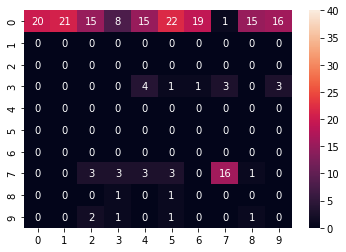

In [ ]:
sns.heatmap(conf, annot=True, fmt="d", vmax=40)